<a href="https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/overview_of_notebooks_keelingcurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: #269142; font-size: 2.6em; font-family:serif">Notebooks to create graphics that appear on the keelingcurve.ucsd.edu website</h1>

The Keeling curve is an atmospheric carbon dioxide concentration record from the Mauna Loa Observatory, Hawaii starting in 1958. The Keeling curve website presents a series of graphics of the Keeling curve at various time periods alongside Ice Core records going back 800K years and each of those plots can be generated one per notebook. 

<h2 style="font-size: 2em; background:#87bcf5; padding:0.2em">Overview</h2>

This notebook, a combination of text and python code, is an overview of background information, instructions, and an introduction to python code used to run notebooks that create graphics seen on the home page of the Keeling Curve website [keelingcurve.ucsd.edu](keelingcurve.ucsd.edu). The PDF (vector) formats of the graphics can be downloaded from [https://keelingcurve.ucsd.edu/pdf-downloads/](https://keelingcurve.ucsd.edu/pdf-downloads/).

The notebooks listed below are stored in the [Keeling Curve GitHub repository](https://github.com/sio-co2o2/keelingcurve_notebooks). The notebooks can be accessed either there or from the notebook links on this page. 

From the GitHub repository page, the file links can be clicked on and this will open up a preview of the notebook. Look for the Google Colab badge link at the top of each notebook. When this badge is clicked on, the notebook will open in [Google Colab](https://colab.research.google.com/) where it can be run to generate graphics seen on the home page of the Keeling Curve website. All the code in the notebook can be modified without affecting the original version. And any changes can be saved to the user's Google Drive or GitHub repository. The saved notebook can be opened again in Google Colab by clicking on the Google Colab badge link at the top of the notebook. 

Each notebook contains a series of functions written in python which are used to fetch the data, process it for plotting, and then run a plot command to be visualize the plots and enable them to be downloaded locally.  Data is "fetched", or downloaded for each notebook to generate the different plots. Mauna Loa Obeservatory, MLO, data is fetched from the Keeling Curve GitHub repository data folder and icecore data is fetched from the NCEI website. Some notebooks contain code to generate basic animations of the plots showing CO<sub>2</sub> concentration as a function of time. 

### MLO data from the most recent month is preliminary

Mauna Loa carbon dioxide data from the most recent month is preliminary and subject to subsequence updates to account for retrospective calibration and quality control. See [scrippsco2.ucsd.edu](scrippsco2.ucsd.edu) for data that has passed these routine quality checks and updates. The datasets are archived once a month on the [scrippsco2.ucsd.edu](scrippsco2.ucsd.edu) website and the Scripps CO2 Program [library archive](https://library.ucsd.edu/dc/collection/bb3381541w) database at UCSD.

### A sample of the plots that can be generated


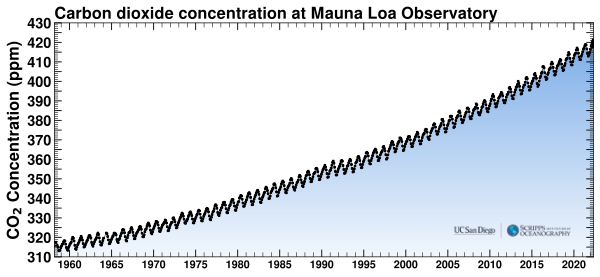
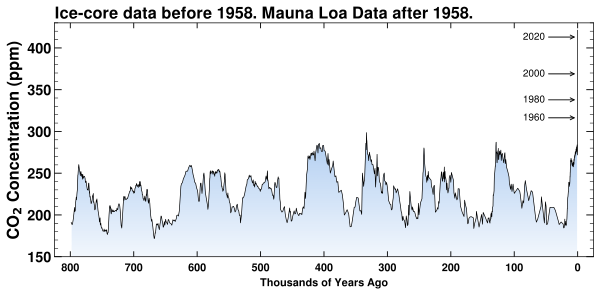

In [1]:
#@title
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import display
from base64 import b64decode
base64_data_mlo = "iVBORw0KGgoAAAANSUhEUgAAAlgAAAEVCAYAAAA8SJvzAAAACXBIWXMAAAn8AAAJ/AGqdR8rAAAAGXRFWHRTb2Z0d2FyZQB3d3cuaW5rc2NhcGUub3Jnm+48GgAAIABJREFUeJzsnXdYVEf3x7/bKEuVjoKIICJYkCoKMagIajSWqNhjR5PXN3YTjBpLbDEajSUae0ksib0FjRpFsAZFQUSKgFTpdSk7vz/2veMu7MIiWJLffJ5nn2fvnblnztwy99yZM2d4hBACBoPBYDAYDEaTwX/XCjAYDAaDwWD822AGFoPBYDAYDEYTwwwsBoPBYDAYjCaGGVgMBoPBYDAYTQwzsBgMBoPBYDCaGOG7VuBtUVJSgrCwMOTk5MDAwABeXl4wNjZuMvnFxcWIjY0FAHTu3Bl8/vtluxJCcP/+fQBAmzZtoK+vj4yMDGRnZ0NPTw+tWrVq0vKqqqoQExMDAHBwcICmpqbKvH///TekUilat26NZs2aNakejNcnMzMTWVlZ0NHRQevWrd+1Og2mrKwM0dHRdLtFixawsLCg23l5eUhISKDbtra2MDIyeqs6NpaSkhJahzZt2kBLS+sdawQUFRXh5s2byMvLg5GREby9vaGnp6eQp6qqCg8ePAAAtGvXDmKx+F2oymC8Wci/HKlUSpYuXUrEYjEBQH8aGhpkxowZRCKRNEk5YWFhVHZxcXGTyGxKqqqqqH4XL14khBAyd+5cAoD06tWryctLSUmh5UVHR9eZV1dXlwAgR48ebXI9/o3cv3+fhIaGktjY2CaT+eDBAxIaGqpwrRYuXEgAEF9f3yYrpymQSqUkNDSUhIaGktzcXJX5IiMjFZ75SZMmKaSvXLlSIf3QoUNvWvUm5/Lly1T/yMjId6qLRCIh8+bNI1paWgrnVVNTk8yZM0ehrc3Ozqbp9+/ff4daNy337t0joaGhJC4u7l2rwngPeL+6Wd4As2bNwqJFi1BaWgozMzP06NEDVlZWqKiowMaNGzF16tR3reI7w8TEBPb29rCysmpy2SKRCPb29rC3t4eGhkaTy///TEhICPz9/fHTTz81mcxly5bB398fP/zwA91nbGwMe3t7WFtbN1k5TUF1dTX8/f3h7++PyMhItY+7efOmwnZERERTq/b/FqlUiqFDh2LNmjUoLy+HlZUVevXqhZYtW0IikeC7777DwIEDIZVK37Wqb5R58+bB398fO3fufNeqMN4D/tVDhH///Td9YQQFBWH37t3Q0tICIQTz58/H2rVrsWfPHixYsABt27alx2VlZSE5ORlisRi2trbQ1tamaS9fvkRhYSF0dHRgbm6O58+fKzUg0tPTkZKSAjs7O5VDkdnZ2UhISICWlhacnZ0hFL66HBUVFUhNTQUA2NjYoKysDDExMTAzM4ONjY1a9S8oKEBsbGytoRGO4OBgjB49WumwQm5uLuLi4qCpqQknJyeFOqampqKiogJCoRAtW7YEAJSWliIjIwOAzHAzNTXFtWvXAABmZmYKsouLixEdHQ0LCwt6vDKqqqrw+PFj8Hg8ODg4qD38UVlZiejoaBBC0LZtW4Xrx0EIQWxsLAoKCmBhYVHrnObk5KCgoABisRgWFhZISkpCbm4u7O3toa+vr7RMeV2VlVldXY3Hjx9TveTrU11djefPnwOQDWVJpVI8fvwYRkZGsLW1BY/Hq7POWVlZKC4uhq6uLszMzJCQkED/A7L7KTExEYWFhWjRogWaN29e73mcOHEihg0bpnR4Nz8/H7GxsdDU1ES7du0U8jS2Lpz8xMRECIVC2NjYKD3nDUFbWxsxMTHIy8ujw9ARERHQ1tZGWVmZ0mMqKiqQkJCAoqIiWFlZwdLSkqZVVVUhOTkZAGBlZUWfj9zcXOTn50NbWxuWlpaorKxESkoKAFBjIzo6GqampkqH5SsrK5GUlIS8vDxYWlq+EeP22bNnyMnJgYmJCezs7JTmKS4uRlJSEioqKmBjY1OvO8Xu3btx6tQpAMCiRYuwePFi8Pl8SKVSrFq1CiEhITh//jx27Nih9KM2NzcXz549g5WVldJ7s7q6GsnJycjJyYGVlZXS9gyQtc8JCQmwsLCAtbW1wr2Wl5eHvLw8aGlpoXnz5njx4gWkUikqKysBAKampgpDmYmJiSCEwNjYGAYGBgAAiUSChIQElJSU1KmHMqqrqxETE4OSkhLY2NjUOjYzMxMlJSXQ19eHiYkJ4uLioKurS+9PCwsLhaFUTj8zMzPo6uqqrQfjLfIuu8/eNDNmzCAAiFgsJtnZ2QppEomEODs7k9atW5Nff/2VEEJITk4O6dOnj0L3toGBAdm4cSM9btq0aQQAGTx4MJk3bx7h8Xhk27ZtCkOEISEhhM/n06HIpUuXKpSdk5NDBg8eTPMAICYmJuTnn3+meaKiomjapk2b6DAaANK/f/96hzbXr19Pu+r5fD75+uuv1RoiLCwsJKNHjyYCgUDhHGzYsIHmWb16NQFAeDweuXv3LiGEkIkTJxIARF9fnyQnJ6scIty+fTvR0dGhx8+aNUvpEOHRo0eJmZkZlaGrq0tWrlxZ9wUnhOzdu5eYmJjQ47S1tWud/9DQUGJnZ6dwnb29vRWG3GbOnEkAkN69e5ORI0fSfGKxmOzZs0dB3q5du4iRkZFCnhUrVijkOX78OLGwsKB5dHR0yPLly2m6/JDJunXriLGxMd329fUlBQUFhBBCPD09iUgkIgCIlpYW6datGyGEkDFjxhAAZMyYMeSzzz4jAMjBgwcJIYTs37+fmJqaKtS3a9eu5MWLF4QQQj788EOioaFBh3NcXV0JIcqHCIuLi8n48eMV7g89PT2ydu3aBtdFGZWVlWTChAlEKBQqDDHNnDmTSKVSEh8fT5o1a6ZQ9rJly5TKkh8i/OCDDwgAcvbsWUIIIfHx8Qr7UWOIcPfu3Qr3Ead7eno6IYSQ1NRUuv/x48f0uHnz5hEAxN/fnxBCyJMnT2i+jRs3En19fbrdp08fUl5eTo89ceIEadGihUKZrq6udQ43NWSIMCIigjg7OyvI79SpU60hupCQEKKtrU3z8Pl8EhQUpKBrTTp16kT1lUqltdK7dOlCABBnZ2dCiOI9MnfuXIW2avLkyaSyspIee+3aNdKmTRsFvX18fMjTp09pnrKyslr3Zfv27cm9e/donsWLFxMApFu3bmTNmjVEIBCQpUuXUt1nz55N8yYmJlI5169fJ4QQsm3bNoV7DwDp0aMHefnyJSGEEFdXV3rfamlpkQ8//JDKO3jwoMLzz+PxSL9+/UhGRgbNM3DgQAKATJs2jYwbN44AIEeOHKHt4+rVq2le7v6tef8x3i/+1QYW91D37dtXrfzcS6p58+ZkwoQJxNfXlz4M3MuXM7DkG8KaBhb3wu7cuTPd5l7KUqmUytXW1iZDhw4lHh4eNN9vv/1GCFE0sIRCIfH19SUdO3ak+7Zs2aKyHhcvXlRoQLt166agW10GVv/+/QkgMwyHDBmicOzOnTsJIYRUV1eTrl27EgDkww8/JLGxsbRh2bFjByFEuQ/WH3/8QXg8HgFAnJycyIcffki35Q2siIgIIhAICJ/PJ2PHjiXBwcFEU1OTnmtVXL58mcrz8/Mjw4YNo8YIp/vDhw9pY25vb09GjBhBDTlra2v68ucMLIFAQIyNjUnv3r2poSAWi0leXh4911yZPXv2JEOHDqXnYt++fYQQmV+GUCgkPB6PjB49mkyfPp3qsGnTJkKI4gtHIBAQT09P4unpSfctWrSIEELIokWLiLW1NQFAOnToQL755huFe1f+vjx48CCJjY2l5yAwMJCMHDmS1nfkyJGEEEKWL19ObG1tCQDSrl07EhISQghRbmB98sknBAARiURk0KBBCgbK5s2bG1QXZXB+Ufr6+mTMmDGkX79+9KV54sQJkpmZSSZNmkRlffTRR+TEiRNKZckbWF9++SUBQOt24MABAoAsWLCgloH16NEjeg379u1LRo4cSY2tcePGEUJez8ASCoXEx8eHvtABkB9++IEQQkhaWhr1E/Xz8yNjxoyh1zIgIKDOe14dAysxMZEYGBgQAKRly5Zk5MiRVL6xsTE1HA8fPkyf/+HDh5PBgwdTY2vdunVKZefl5dFnYP369UrzbNmyheqZnZ2tcI9wxpD8vfTVV18RQggpKSmhz13Xrl3JjBkzqJHYoUMHKn/KlCkEALGysiJz5swh3bt3J4Dsw5X7uOYMLAsLC3pPLV26lKxatYoAIG3btqXytm7dStuE6upqcvfuXcLn8wmPxyMDBgwgQUFB9KNq2rRphBCZYcqdUxcXF/oBde7cOXp+OnXqRIYPH0709PQIAOLh4UGqq6sJIa8MLPln+NSpU2TUqFEEkBmVHBs3bqTlMN5f/tUGFvfSCA4OVit/YGAgcXNzI9euXSOEyAwJ7ovzyJEjhJBXBpZAICC//vorKSkpIeXl5QoG1meffUYIkRlT3AvJycmJEELI1atXab7Q0FBazscff0wA0N4DeQNr+/btVB5nNE6YMEFlPTijaMCAAfTh5QyGugws+RfSsWPHqLyxY8cSAKR169Z0X1RUFDV62rVrR+VwX6/KDCx/f38CyL76uC/UJUuW1DKwhg4dSgBFp+S1a9cSAKRVq1Yq6923b1/6UuT04ORzRgJXFycnJzoZISkpib7cfvzxR4XzZWxsTDIzMwkhshcvp2tYWBghhJDevXsTAOTjjz+meoSEhNB6EkJoA8m9nAkhZMOGDfSFIJVKFV44nNFECKH3hfxHAtfLOmvWLLqPM7A0NDTIiRMnSElJCZFIJOT48ePEzc2NjBo1iub97rvvFO5JQl4ZTlOnTqX7ahpYMTExVMcDBw7QfJMnT6Yvhpp1ke89VFaXmkybNo24ubkp9BJyxtmSJUsIIbJeLk7+n3/+qVKW/P186tQpIhQKiZ+fHyGEkM8//5wAICdPnqxlYB05coS4ubkpXC/O8OvUqRMh5PUMLM4Alf/IGjNmDCFEZii5ubmR/v3703t39+7dBAAxNzdXWUd1DaxZs2bR+42bGJCVlUV7Nrlzu3z5cuLm5qbQuxoUFEQAkLFjxyqVLX9fnDp1Smke+Y++yMhIhXskMDCQVFVVEUIINXj19PRIaWkpuXPnDs334MEDQggh6enppFevXqRXr14kLy+PZGVlUYP49u3bhBDZpB5HR0cCgHz77beEkFcGFgCydetWUlhYSMrKysjz58+pAcT1ig0ePJgAIHPmzCGEELJv3z7i5uam8HxwowLe3t50X8+ePQkgM9w5uPa4V69etN0LDw+nZZ4/f54Q8srAEovF5MKFC6SkpIRUVFSQc+fO0XcOZyxybYB8rxbj/eNf7eTO+TRxY+z1cf78eZw5cwbJycmYO3cuPDw8UFhYqFSGj48Phg8fDrFYXMtH5bPPPgMA8Hg8+j86Ohp5eXkICwsDADg6OqJXr14AAD6fj+DgYABAZGQkSktLFeQFBgZSec7OzgBkPhLKkEqluHfvHgBg2rRpNFzE9OnT660/p5ulpSWGDBlC90+bNg0AkJCQgPT0dABA+/btERISAgCIiYmBjo4Otm3bVqd/DeeQPHXqVHptlOnFOSO/ePECCxYswIIFC+ixSUlJSEtLUyr/9u3bAIDhw4dTPWbOnIm7d+/ixx9/VJA9fvx46OjoAJD5uPXr10/hHHC4ublRPyYnJyd6PouKimqVyTF37lzcvXsXGzZsUCgzPT2d1ocLmZGamkp9eTj69OlD/7dv3x6A6utdE39/f3z88ccQi8XQ0NDAwIEDcevWLQQHB+O7777DqFGjsGTJEgDqPxccXD2MjY0xcuRIup+7hi9evKC+VxzcvatuXbZs2YJLly5BT08PX3/9NXr27EnPcVVVVYP0lUdHRwcdOnTA7du3UVVVhfDwcGhpaaFz58618g4dOhQRERGYOHEi1q5di5EjR2L58uUAGn7O5KnrOe7Rowdu376NhQsXYsOGDRg3bhxmzZrV6DI5uGs3cuRI6oNmamqKTz75BMCr+z4kJAR//fUXOnfujOXLl2PAgAE4evRonXrI+2fWbLs4ysvL6X+RSKSQFhwcDIFAAAD4z3/+A0D2fD18+BA2Nja0fXV1dUW3bt2wc+dOrF27FqGhoTA0NKTXlM/n49ixY1iwYAFCQkKozJqTGxwdHREcHAw9PT1oaWmhZcuW6Nq1KwDg7NmzqK6uxpUrVwC8eq7HjBmD8PBwBAUFYc2aNQgKCsJ3331X53kBZH5Xt27dAiBrR7l2r0uXLvTeq9nmDBgwAAEBARCLxRCJRPD394e5uTmqq6tx7tw5lJeX49q1a+DxeBg2bJjKshnvnn+1k7uNjQ3i4uLw7Nkzpen79+9HWVkZ3N3d4erqii1btuCLL75AZWUlmjVrhm7duiE+Ph4FBQW1jq3L6VPeqVvekbGgoIAabObm5grHcPmkUmmt8uSd3+uLr5WXl0cbM/my5R10VcHpVtMpXV5Ofn4+ldWvXz8sWrQIgOzlWVespMrKSrx8+bKWPBMTEwiFQoWXZ15eHgCZwXv+/Plasl6+fKnUEZY7b/KxjPT19eHm5larjjXPP1en/Px8hf3y516Z8cjJky/TwMBAoUyuPn/88Qf++OMPpfXhjL2aZTY0nlrN+zI7Oxu9e/dGZGQkBAIBHB0d4erqir/++qtBcgHF+0P+XNSMLSXvcNvQupw/fx5BQUEoLCyErq4u3N3d0apVKyQlJTVY35p069YNf//9NyIiIvDw4UN4eXkpnaCSmZmJ3r174+HDhxAIBGjXrh1cXV1x/fr1RpVf17koLi5GYGAgwsLC6EQJV1dXXL58uVFlcnDPRn33/f379/HRRx8hPT0dmpqa6Ny5M5ycnBAVFaVSdosWLehkgYcPHyp8bHA8fPgQgMy44ibtcMi3N+bm5uDxeCCEoKCgAKampjhx4gSWLFmC27dv4+bNm7h58yYWLlyIwMBAnDp1ij5fUqkUa9asqVU21+5wKGu7R4wYgbCwMJw9exYeHh7Iy8uDnZ0dfY5TUlIQEBCAmJgYCIVCODs7w8XFBeHh4SrPCyAzOLm2Td02p6Z+QqEQw4YNw6ZNm3D69GmYmZmhtLQU3bp1a/L4hYym5V/dg9WjRw8AwPXr12kQUI6kpCSMGzcOU6dORVRUFIqKijBr1ixUVlZiy5YtyM7OxunTp+lXUEOQN+ji4uIAyB4SMzMz2pjEx8crTFnm8olEokYFOzQyMqIvOHk9VBmZ8nC6PX/+HBUVFbV04/F4NE9VVRUmT55M99+6davOsAEikYg2KPK6JCUl1eqZ4Op/6NAhENkwtsKvY8eOSsvgGiZu1hYg61U5evQozp07B0D21S5fJ46nT58qnAN14XSVLzM1NRVHjx7FhQsXFPLs2bNHaX3kjbGmZsOGDYiMjETnzp0RHx+PR48eYejQoa8lizs3KSkpCj0S3LkDar9EGsqMGTNQWFiIWbNmISsrC1euXGmyMCJcL8XGjRtRWVlJt2uybt06PHz4EB4eHkhMTERUVBQGDRqkUm51dTX9r6oHpz62b9+OsLAwtGnTBrGxsXjy5AkmTpz4WrKUwV27mvc9t81dt6+++grp6ekYPnw4MjIyEB4eDldX1zpla2pqwt/fHwDw008/1fpALCoqwubNmwHI2mT5jwmgdntJCAEA+hEVGBiIiIgIpKamYuvWrejevTsA4MKFCzh//jx97vX09JQ+X/UZQQAwbNgwCIVCXLt2jfbYjRgxgn5IrFq1CjExMfDx8cHz588RGRlJe73rQkdHh878U3Xu1WlzRo0aRet84sQJqh/j/eZfbWBNmDABBgYGNEZLREQESktLce/ePQwfPhyEEOjr6+Ojjz5CRkYGJBIJAMDDwwMCgQAnT55Ebm5ug8tdsmQJJBIJCgsL6dCCj48PxGIxbYhSU1OxadMmALIvmFWrVgEAunfvXmfU8/rg8Xjw8/MDAKxcuRL5+fmoqKigPU110bNnTwgEAgV9SkpKsGzZMgCy4TKuMVu5ciXu37+PZs2a0bxz5sxRiIxdE87g/e6775CdnY2qqiosXLiwVj6uAf39999pY3vkyBG4u7ujb9++Ci80eT744AMAwLZt21BYWAhCCL766isMGzYMO3bsAAD07t0bgOyFFh8fDwC4dOkS7VkKCAio9zwpK3Pr1q0oLi4GIQTz5s3DsGHDsGvXLoX6HD9+nNbn+PHjcHd3R0BAwGsPfanzMueGH5s3b057Dn799dfXkunn5weRSITi4mIsXboUgCxa+jfffANA1oupTvgHVRBCqL6dOnWCtrY2Hj16hDt37ryWvjXp1q0bANm5BwBvb2+l+eTPmbW1NUpLS3H48GGFPEZGRrQXijOkExMTqeyGwpXJxaarrKzEgQMHGiTj7NmzOHDggMLv9OnTAF7d9wcPHqS9UXfv3qXGBJfODfG2bdsWhoaGSE9Pp/Wri5CQEAiFQuTk5CAgIABhYWHIy8tDeHg4fH19kZGRAYFAoLQdWrt2LXJzc1FZWUnbA2trazg5OWHHjh2ws7NDYGAgzMzMEBwcjAsXLtCPyMrKSnh5eUFTUxNFRUW4ePEiANkH4NixY+Hu7q5WvDhTU1P06NEDlZWV2LZtGwAoDL9x16dly5Zo3rw5ioqKcOzYMZXyuPuSz+dTV5C1a9fS3rSdO3fSDxN12hwvLy+0adMGxcXF2L17NwQCAR3eZbzHvEV/L7WRSqUkLi6OPHnyRGU4gqSkJPLw4UNSUlJSp6wTJ07QKeg1fwKBgDq2VlRU0NlVYrGYODo6EqFQSI/lHM3lwzTII+/kLhKJiK6uLp19IxKJyI0bN2heLqQBAGJjY0On4Wpra9OwB/JO7mlpafRYzqF42LBhKut8//59han8enp6dBt1OLkTQsjs2bNpPmtra+rkLxKJyNWrVwkhhERHR9NZcOvWrSNVVVV0Zk+PHj2IVCpV6uQeGxtLz4mGhgYxMDCgswUh5+T++PFj6nTerl070rVrV8Ln8wmfzyf79+9XWe8HDx5QvfT19ekkB5FIRCIiIgghMgdZS0tLut/e3p46m3br1o06oXJO7jUdsjldL1y4QM815+xvYGBAWrVqRQBZaIE7d+7QenPX2NHRkXTr1o0IBALC4/HI7t27CSGqI1tzjrQffPAB3cc5tDdr1oxOqOD21XRE/uGHH6jc1q1bEyMjI3qOmjdvTvMFBwfT8zZx4kRCiPJZhJwDP/7nMM3NTBMKhfS+akhdasI5BItEIuLk5EQ0NDSovl988QXNx02Xd3R0JHv37lUqS97J/fLly4QQQmdgAiDp6ekkIyOjlpM7NwkAALGzsyPNmjWjOrRs2ZLK9/HxofkMDAwIj8ej50OZk/vz58/psdOnTycAyKBBgwghr2Y1cm2CmZkZLVNbW5s6gddE3sld2c/BwYEQQkh+fj6xt7en18re3p7OpOvQoQNtR7n7iMfjkXbt2hGxWEz16N+/v8rrRogsBIt8mAT5H5/PpxNICFG8R0QiEdHU1FQIYcE951FRUbTtsrKyIt7e3vTaN2/enM765WaJamlpER8fH/rst27dmk5SkQ/ToAxuUgHX7sjzzTff0LQ2bdoQAwMDel4cHR1pvuHDhxNANjnmv//9LyFENnOZC00jFoupbsCrmbyEvHJy557pmsg76ffu3bvOa8F4PxAs4Txe3zKFhYWwtbXFnDlzcOfOHdoFGhERAX9/fyxevBg//vgjNm/eDHNzc7i4uACQ+ZT06dMHs2bNwtatW/Hjjz+iVatW6NChg9JyHB0d8dFHHyE7OxtpaWmQSCQwMDBAYGAgdu3aRR2KBQIBvLy8cPv2baSnp8PExAQHDhyAtbU1zM3NIRKJ0KNHD6Snp0NLSwtdunRRGGIoLS1FZmYmnJ2dsXDhQty4cQM5OTlwdnbGnj17aK8SIPNdEovFSExMRGJiIv3KOXjwIB0ukkgkSE1NhbOzMwYNGkQDV6alpUFbWxve3t4qv8AtLS3h6emJyMhIpKWlwczMjPbgODs7o2/fvjA3N0dmZib4fD68vLxoL4u/vz+MjY2RmJiIhIQEEELQvXt37N27F76+vgCAXbt2QU9PD25ubli2bBlEIhEcHBxQXl4OsVgMBwcHmJiYID4+Hk5OThg4cCD09fVhbGwMX19fPHjwAGlpaTA0NMTmzZuho6ODtm3bIiAgAFZWVjA1NUXv3r0RFxeHyMhIZGZmwtPTE9u2bVNwvq+Jubk5/P39ER8fT4MBenp6Ys+ePfDx8QEA6Orq4pNPPkFGRgYSExORkZEBS0tLTJkyBTt37qTBPzMyMiASieDl5UXrDcgmKzg5OaFv376wsLCApaUlevbsiWfPniEhIQFlZWXo0qUL9uzZQ6+PsbExAgMD8ezZM0RGRiIjIwPu7u7YsmUL/Uqurq7Gs2fP4OzsjP79+1NH5KysLPB4PHh4eNB7yM7ODleuXEFqaiq0tbUxfvx4vHjxArq6uujatSs8PT2pvq6ursjMzMTTp09RWFiIoKAgbNiwAYWFhWjZsiXatm0Lc3Nz2Nvb49q1a0hJSYFAIMCUKVOQlZUFAApl+/n5wcLCAgkJCUhISIBUKoWvry92796Nnj17NrguNenWrRvu37+PFy9eQCgUYt26dQgICKD3f//+/cHj8WBkZITr168jIyMDnp6e9PrKI5FI8OLFC3rPm5mZUf9KHx8fjBgxAtXV1YiPj4ezszMCAgLQsmVLuLu7Iz09HXFxcSgqKsKoUaOwdu1aFBcXw8rKCk5OTjAzM0P37t3x+PFjpKWlgc/nY/r06fj0008hEong6emJDz74ABUVFUhJSYGzszMGDhxIh4tqtiMdOnSgAXjz8/Px0Ucf4eeff0ZeXh4cHBxgZWWlNChvSUkJsrKy4OTkpPTn6uqKPn36QEtLC8OHD0dOTg4SExORlpYGExMTjB07Fvv376eBXLt27YqYmBg6dD9//nxMnToVhBBoaWmhV69eKgP+urm5oU+fPsjJyUFGRgbKy8thaGiIPn36YPfu3QrDrPL3SEhICB49eoTU1FTY2Nhgw4YNGDt2LAAQSDRTAAAgAElEQVTZ8Jmfnx8yMjKQnJyMp0+fgs/nIyAgAHv37qWBWHv06AFdXV1ER0cjKioKGhoaGDFiBPbt20d9BLOzswEA7u7utDddHltbW3ovTJw4EZ06daJpHh4eSElJQXx8PIqKijB+/HgsX74cpaWlMDc3R+fOnWFkZITWrVvTZ1NPTw9jx46Fubk5+vXrh+TkZCQmJiI7OxutW7fG7Nmz8d1339Ge0JSUFBgaGsLHx0fpsKyVlRWdrLNw4UL6TmS8v/AI+d+YxVvmiy++oFHW+/bti7Nnz4IQAjs7OyQlJeHzzz+HgYEB1qxZA6lUiidPnsDOzg6jR4/GwYMH4e/vD09PT6xZswZ8Ph9Pnz6tMyo4h1QqrdfZlhCiVrTppihLnTxvWoc3cWxTyn7d6/Euzv/bLLMh54V7zOvL3xCZb/L+UFePpnpWGyO7qc/Dm6wTR306N4UODT0vTfXsvO/35evql5ubC1NTU4hEImRkZMDQ0LDBMhhvl3fig/X48WNs2bKF9lpxcD06Hh4e2LhxI5YtW4bevXujqqoK9+7dQ1lZGY4dOwaRSITffvsNy5cvx9ixYyGRSKgvQX2oc2M3VeOmTllv0rhqrPw3qVtDZL/u9XgX5/9tltmQ88Lj8dTK3xCZb/L+UFePN2mIqCu7qc/DmzaugPp1bgodGnpemurZed/vy9fRb+XKlejXrx+kUin69evHjKt/CO/EwPr888/h5+eHwYMHK+y3tLTE3bt3cfDgQQAyB8aEhATw+Xy0a9cOiYmJkEgkaNeuHV0zihumi46OfruVYDAYDAbjLfDNN98gIiICbdq0wbfffvuu1WGoyVuPg3Xw4EGEh4fj4cOHePTokUKatrY29UHauHEj1q1bh+TkZKxbtw4dOnSgcWjkrXduVltOTo6CLD8/P5SUlNQqnxACc3Nzlf5LgGxWn4GBgcqvkMrKSvB4PIW4NjUpKytTuuCvfLqWllad3cgVFRV1LnBcUFAAfX39OvUEagf2a4ie5eXl0NDQUPnVRQhBeXl5nTK4mEaqZFRVVYEQ0ig9JRIJRCLRG9dTKpUqjZ3UED2FQmGd4T/qk1FUVASxWKxSRnV1NaqrqxulZ0VFBQQCwRvXs6qqqs5Zs+royefzG/UsFhcXQ0tLS6UMbkHgxujZFG2GOnrW12aooyfQuDajpKQEGhoaKmUQQiCRSP4RetbXZtRXRlO0GaWlpRg7diz09fVhaGiodPaiOu+bt6GnUChslIz60puizSgrKwOfz2+QjIiICGRmZtLtqqoq+hwaGBggNDRUqZy3amAVFRVh/vz5+PLLL+Hg4FDLwJKHixuVnJyM9evXY9CgQTQ2k3yDzT0c8nF5AJnBpWwaa2FhIVJSUuj0emUMHToUv/76q8oXw82bN6Gjo6PgBFmTbdu20ejsyti7dy+GDh2qsDq6PAUFBTh79qxCxOyajBw5Ert27VLZUN29exeAzKnzdfX85Zdf0KdPH5Vd0qWlpTh69CjGjRunUsann36KjRs3Ukfamjx8+BBFRUV0Gv3r6Pnbb7/B19dXZUyZyspK7N27F5MmTVIpY8qUKVixYgWNlVWTJ0+eID09vc57pz49T506BTc3N7Ro0eK1ZXz++ef46quvVIZEiI+PR3x8fKP0vHDhAuzs7GBra/vaMmbNmoUZM2aoDIaYnJyMqKgoGrrkdcq4cuUKLC0t4ejo+Noy5s+fj0mTJqFNmzZK0zMzMxEWFtYoPW/cuAEDAwOVk3HUkfH1118jKCiIRoGvSW5uLkJDQ5UG+lS3jFu3bkEkEtUZ+6o+GUuXLkX//v2VRskHZIbi8ePHMWbMmNcu4++//4ZEIkGXLl1eW8bq1avx4YcfwsvLS2l6RUUFDhw4gAkTJrx2GY8fP0ZOTk6jnsX169fD3d1dYbJNQ2XUlx4XF4fnz583Ss8ff/wRTk5OjZJRX/rz58/x+PHjRj2L27dvR8uWLRukp6GhoUInTmhoKNXh999/VynnrRpYR48exYsXL3Dp0iXcuHGDzlK6ffs2ZsyYgY0bN9K806dPx/Tp0zFz5kxs2LAB33//Pb3RuWVKgFcRimtGv9XS0lKwUL/44gtoamoiJSUFJ06cqPNm1dTUhI+Pj8ovRa7nqC4ZZ86cqTP96tWr6Nq1Kx3qrMnLly8RHR1dpwxtbW107dq1VuA+Ds7obIyeERER6NKli0qjo6ioCLdv365Tho6ODrp06VJn9Pv8/PxG6RkZGQlPT086q6gmFRUVuHLlSp0y9PT04OXlpdL40dLSgqGhYaP0jImJgbu7O+zt7V9bhr6+Pjw8PFRGzjcwMIBQKGyUnomJiXB1daXL27yODENDQ7i5ucHJyUlpemxsLMrLyxulZ3p6Olq3bl3nR0R9MoyMjNC5c2eVBkFycjIyMjIapWdubi5MTEzq/IioT4aJiQk6deqksvc9MzMTz549a5SeXK9OY2SYmZmhY8eOKvPk5+fj77//blQZ1dXVKC0tbZSMPXv2oH379irzlJeX46+//mpUGSKRCGlpaY2S8euvv8LJyalRMupL19XVhba2dqNkHD9+HI6Ojm9UTxMTE1RWVjZKxvnz5+Hg4NAgGfL/i4uL8eeff0JDQwM8Hq/OnrC3amBxPVA3btxQ2P/y5UvcuXMHUVFRmDVrFtzd3bFy5UoAoF9SL1++hJWVFXg8Hp49e4bq6moIBAIarK1mtGcDAwNMmTKFbtfVbclgMBgMBoNRH2KxGC4uLpgyZQp4PB4uXbqkMu9bNbCCg4MVut1+//13DBkyhIZpePnyJa5fv47r16/DxcUFLVq0oAtqenh4wNTUFO7u7rhz5w5WrFgBPz8/7Ny5E4As1IM8BQUF2L59O93merAYDAaDwWAwXofS0lJERkZi+/bt4PF4dI1WZbxXiz2bmJhg5cqVmDNnDoKCguj+Ll26YPr06QBAAw8uXrwYixcvBiBb8ZwLlMmhqgerWbNmSoPMNYSOHTvW6VwJoNYMyZr069evTidPXV3dBi/bUhNVQzPy1Kdn7969VQ5jArJhM3XW5KqLNm3a0GWKVFGfnj169KABLZUhFAoxYMCA19KPo1WrVnUOcwL161mXn5i6MurDysqqTidPdcrw9vZudF3rw9zcXGmA0IaU4e7uXuf9qY6M+jAyMlIZGFXdMlxcXOr9wGusnvr6+nX6pqhThrOzc73rrzZWT7FYTAM8v24ZDg4OKpfMUldGfYhEIvTv379RZbRu3bre9Tkbq6c6MupLt7a2Vukjq64MdWisnpaWlirXEFVXhjrUJUMsFmPhwoV0Qt5704NVEx8fH4SGhsLExITumzlzJnx9fREaGori4mK4urpi4MCB9KHnIoEfPnwYBQUF8PDwUBrdOzc3F6tXr6bbixcvhra2NnR1dVU6iaqLOgFNVTlOctS3gKqWlladTvTqUJcjNUd9etanQ30OserARVqui/r0rO+a8vl8eHh4NEivmpiamqr0ReOoT8927drVW059MurDyMio3gXD6ytDlcN3Q2TUh6GhYb3xfOorQ5UfWkNk1Ic6bUZ9ZdjY2NRbTmP11NbWVrkQurplqPJhbIiM+tDQ0FDp76ZuGeqsedlYPQUCQZ2+feqUoc5Czo3VUx0Z9aWbmJgovIdfR4Y6NFbPpmgz1KEuGcXFxbh06RI1rPLz81XmfacGlpmZGV0IUx53d/c6b+w2bdooXSRYHlNTU7oIMYPBYDAYDEZj0dfXV7AtAgMDVeZ9Z0vlvGnc3NwUusu5Hix1KCgogIGBwZtSrcmoLw7W+0JhYSH09PTeez2Lioqgo6PzxqPrN5Z/ip7FxcXQ1taud8jpXfNP0bOkpASampp1xtJ6H/in6FlaWgqRSFSvu8e75p+iZ1lZGQQCwXs/oayxehYWFioEe718+TLu3LmjNO+/1sAKDAzEhQsX3rUaDAaDwWAw/qXUZWu8358YjeD58+cqhxl79uyp4J/FYDAYDAaDoYz//ve/CAsLU5pWVlam8rh/rYFlZWWFI0eOKE1737swGQwGg8FgvB+sWLGCLs9Uk2HDhqk87l9rYKmaRchgMBgMBoOhLrq6uvR/TR+sumYRMh8sBoPBYDAYjNfg/6UPVnZ2NhYsWEC3WQ8Wg8FgMBiMxlCzB0t+EeiavNMerJ07d+Lly5do3bo1hg4dSvefOXMGZ86cQWFhITp06IBp06YpBBe7fPkyDhw4gOLiYnTu3BkzZsxQ6MIDWA8Wg8FgMBiMN0tdtsY7M7AuX75Mg4xyaxECwJo1azB//nwAsmjm5eXlsLa2RmRkJIyMjHD48GGMGDEChBBoampCIpHA29sb169fV4hj05g4WAwGg8FgMBg1ke/BioiIQGpqKp49e6Y07zsxsCoqKuDi4oKCggKkpaVRA6u6uhoGBgaoqKjArVu30KFDBwQFBeG3337DN998g0WLFsHBwQFxcXG4cOECfH194eXlhUePHuHUqVMK60axHiwGg8FgMBhvgtjYWDg6OkJPT0/lgs/vJBT0hg0bkJaWhpCQEIX9ycnJKCkpgbOzMzp37gyhUIhBgwYBAJ48eYIXL14gLi4OlpaWCAgIgFgsxsiRIwEAV69eVZDF+WBxv7piVTAYDAaDwWDUR2FhIRYsWEA7dIqKilTmbbCTe2pqKlJTU1FcXAxjY2PY2trWu/iiPBkZGVixYgVWrVpVa5Xxli1bIjc3V2GJhaioKACAra0t0tPTASgunMot9sqlcRgZGdGhRgAoLy9HeXk5AFkcLB0dHbV1ZjAYDAaD8f+T4uJihThY8+fPx9q1a+s9Ti0D6+nTp/jxxx9x+vRpJCUlKaTx+Xx07twZQUFBmDRpUr3G1syZM9GmTRtMmTIFJ0+eVEgTCARo1qwZ3f7ll1/w/fffw9TUFNOnT0dMTAwAQCwW0zz6+voAZHGv5ElNTVXwwZKHRXJnMBgMBoNRH5WVlQgJCakVyV0qldZ7bJ0G1osXLzBnzhwcOXKECrO3t4elpSU0NTVRUlKChIQE3Lt3D/fu3cM333yDBQsWYM6cOdDU1Kwl78aNGzh8+DC2bt2KyMhIJCQkAJAtWvzkyRM4OjoCkPlozZ07F5s2bYKNjQ1OnjyJFi1aUONOIpFQmdzQX00HdhsbG+aDxWAwGAwG47X44IMPcP36dXTp0gVXr16l0Qr27t2LTz/9tN7jVRpYiYmJ6NixI0pKSuDn54dx48ahb9++MDExqZX32bNn+O2337Bnzx4sXLgQJ06cULq69KNHj0AIQXBwsML+sLAwjB8/HuHh4cjLy0O/fv0QHh6OYcOGYfv27TAwMAAAWnZ2djY9lotBYWxsrCCTxcFiMBgMBoPxOsTHx+P69esAZLMFt23bhjlz5qCwsBDr169XS4ZKA6ukpAT9+vXDV199hY4dO9YpxN7eHvPnz8e8efNw6tQp7N69W2m+Ll26YNWqVXT70aNHOHDgANq2bYvp06cDACZMmIDw8HAMGjQIW7duhVQqRV5eHjQ0NGBnZwd9fX3ExcUhKSkJrVq1QmhoKADA1dVVoSxTU1OFshgMBoPBYDDUYenSpQrbenp6AGSdOpxveH2800Cjv//+O4YMGULDNLx48QLW1tZQptKIESNw6NAhzJkzB+vWrYO1tTUcHBxw+fJlNGvWDHFxcQq9WCwOFoPBYDAYDGVIpVKcPHkSFRUVGDx4MEQiEU2rrq7G0KFDcfz4cQiEIkyePAk/btoEgUCgEMOTQ5UZpfYswrKyMvz888948uQJqqqqaqV7eHhg0qRJ6ooDAJiZmaFXr15wcXEBILMMe/bsqTRv+/btAQDLli1DQUEB9u3bh5SUFDg6OmLHjh21hghrziLU0tJqkG4MBoPBYDD+nURERGDw4MEAZJ09XEgoQBb26fjx4wCAj4LXIC31Ok6fPo2PP/4YXl5eGDx4MH7//XcAAI/HU1mGWj1YhBD06NGjVqwpeYKCgvDLL7+oVbGmoLq6GuXl5SrDLXh6emLIkCF0+4svvlDqeM9gMBgMBuP/F4cOHcKoUaMAyOyFmzdvQiAQQCqVwsLCgvp6u/YahfuXDgIA4uLi0Lt3byQmJsLCxhE6BqYwEJbg3r17SstQqwfr2bNn1Ljq3r07zMzMauXx8vJqcAUbg0AgqDOWlYGBAaZMmUK3NTQ03oZaDAaDwWAw3mMkEgnGjh1Lt2/fvo3s7GxYWFigqqqKGlf6xpZobtcB9y/J8gkEAiQmJgKQhW8Y/dVOhP08XWU5ahlYXIyprl271tmL9T5RUFCA7du3023Wg8VgMBgMBoPH40EgEKC6uhqAbFIcF4MzKSkJH374IWKeJaPP1LVo1d4blq07onnpLdja2mL69OnYu/8QrNq64vbF/SqXyQHUNLA6dOgAIyMjFBYWQiqVgs9/JyvsNAiRSESjvAPAqVOn6H8rKyt4e3u/C7UYDAaDwWC8YbZu3YqFCxeiT58+OHDggEIan8/HwoUL8SRfH2YO3jDP+xMCgQAAMG3aNNqRZO3gCgFfACKtQlxcHMaNG4d9+/ZB36Q52rr7Q0PIR+FTUc2iKWoZWGKxGHv27MGAAQPg6+sLb29vheVsAKBTp04YMWJEQ+r/RiktLcWlS5eUprm6ujIDi8FgMBiMfynr1q1Dbm4uDh48iB07dtAoAtXV1fDz88ONGzegrWsAbV1D5GY8x5kzZ3Djxg1YWFgAADS0dCAQyoyncztCkJYQRWcaFr5MQ9z9P6Eh0kBFaalKHdSeRfj9998DAG7evImbN2/WSg8KCnqvDKyaPlguLi7UQmUwGAwGg/HvhBCCrl27Ij4+HgAwe/ZsbNmyBQBw8eJF3LhxAwBQVlyA8hLZEN+DBw9w69Yt/PLLL+Dz+Zj87QlqUGWlPgUg87vi8XiwbN0BXn3HQ1PEx4PfV6jUQy0DKzo6mnaZdejQodYizcCrMArvC5WVlXQpHgDo2LEjM7AYDAaDwfiXc/bsWezfv59uc7P8KisrFTpeeo6ch2Zm1oi9shtLl3yN2NhYEEJACEF5WRHN9+HQL/DXsR9QISkHIQTO3n2Rn5UMEZ+nsAh0TdQysIqLiwEA7u7uuH37dp1xH94Xai4c/U/QmcFgMBgMRuMoKCig/21sWmHt2rUAgPz8fLx48QIAYNu+K/yGzwKPx4Nu9Us8ffoUy5cvBwBY2raHtcOr1WF8Bk3H1SOvlsfR1jWEWNcQIgGvTp90tQwsFxcX2NjYUI/794GkpCQUFRXBzs4OYrH4XavDYDAYDAbjPcDHxwc9evSEYft+cGnBpyNszZo1g7e3N+7cvQ+fgcHg83nIy0zGnk3fKBxv3NwWGlqvVn6pqihDVWUFAMCu0wcwad4a6qCWgSWRSNC9e3fs27cPAwYMgLe3d63htnbt2mHAgAFqFQoAhYWFcHR0RHp6Ol0qR56Kigp07NgRrVq1woULF+j+7OxsDB48mI6h6uvrY+vWrRg5cqTaZTMYDAaDwfhnQwipNTp18uRJDBo0CIQQ+Bi0xbJtO7Fs4VxERkZizpw5CA8Ph7lNO7TzCgAA8AWvzKBevXohIa0APUfMUZAp1muG/lNWICs1Dl36TUBRbqZa+qllYHFL0wDAmTNncObMmVp5goKCGmRgLVq0CBkZGbX2P3nyBA8fPsQPP/yA2NhYtGrVSiF95syZuHHjBnr37g1PT0+sXr0aEyZMgI+PD1q2bKl2+QwGg8FgMP55SCQSODs7IykpCYcOHcKwYcNo2tixY+nagDkv4lFZIQEAREVF4cqVKwCAzOcxIFIp+HwBDE1aYNSCnTiyLhg3btyAV7/JsLBpV6vMrv0nAwCqKitQnJsFgvqXcVbLwNLQ0ICbm1udeWxtbdURBQB4/PgxtmzZgpEjR+LgwYMKadOnT6cnoSZlZWU4duwYNDQ0cOzYMejp6SE9PR07d+7E0aNHMXv2bJq3uroaeXl5dPsdrmnNYDAYDAajicjKyqIzBEeMGAFPT0+0atUKhw4dooE/NbX1EDhhEfKykiEtzYGvry/Wr1+Pb5YuQ0f/T8HnC4D/dX7lpCehsrISlZWVuPbbJvQe9xX4vFfpIKD/CaQoK8kHIQRVQj6kUqlKPdUysMzMzHD37t3XOQ9K+fzzz+Hn54fBgwfXMrC2bduGoqIi3LhxA1988YVCWmJiIiQSCTp27Ag9PT0AsujyO3fuRHR0tELemoFG/wnBURkMBoPB+P8OIQTPnz+Hnp4ejI2Na6V/9tln9L9UKkVaWhpatWqFlJQUun/q6pMwt2qDCUsP4+6Budi/fz9WrVoFoaYufD+eCvmRRZt27uDxeCCEwNSqDfg8vkI65P4L+AIYW9iAANAQ8JAsamSgUXmio6Px999/IysrCzY2NvD29oalpaXaxx88eBDh4eF4+PAhHj16VCvdwcEBAJQOH+bk5AAADA0N6T7u5HNpHDWXypHH1dUVU6dOVVtnBoPBYDAYb4fNmzfjP//5DwQCATIzM2sZWefOnaP/vby84Ooqm/E3YcIEhIaGgph0gqWtEwDg4t4VuHf5Iv744+L/jshHbsZzmNs4Uhm27b2x/EQqKspKoCnWq+XXdfP0z8h4/qSWngI+UC43Y7EmahtYmZmZmDJlCk6fPq0w3KalpYUZM2ZgxYoVtaK716SoqAjz5s3Dl19+CQcHB6UGVl1UVMi8+OUd7LlAYOXl5Qp5xWIxevXqpVSOlZVVg8plMBgMBoPxdoiMjAQgc/XZu3cvZs2aRdNOnjyJ6upq8Hg8dOk3Ht5tm6G8vBxVVVVwc3NDWno6pqycSUetdJuZApDZDYQQiPWNYGjaHDUjNwmFIgj1DKGMFnYdoGdkpriTAEIBD88K4lXWQ20Da8iQIQgLCwMAmJubw9zcHMnJycjPz8eaNWsAAKtXr65TxtGjR5GWloZLly7hxo0byMrKAiBbyXrGjBnYuHFjnccbGRkBkBlqHFy8i5oWbs1Ao2yxZwaDwWAw3m/i4+Oxc+dOuj137lzMnDmT9iqdPHkSgGwYMSMxGt+ficDOn3/G9evX6RBh/IPrsHXyBAD0GRcCQ5PmSL9/AkbGpvhg6jYIRQ2zBWydvej/irIS3Dy7CwSAkI/GBxp98uQJwsLCoKmpiUOHDmHQoEHg8XioqKjAqlWrsHjxYvz0009YtWpVnQE9uR4oLsQCx8uXL3Hnzp169bCysgKPx8OzZ89QVVUFoVCI2NhYmiZPzaVyNDQ01Kkqg8FgMBiMd0RNg8XJyYnaFQcOHMDu3bsBAEYWLVFaLJvIVlhYiHPnzkFTUxNV1VI4dP6QHs/j8XB6x9eQ/i+Op4b1Xvh8PAWvi0hLG16BY2Q+WEIe/nwerjKvWp7fnFd+z549MXjwYFpZDQ0NfP311zA2NkZRURGqqqrqlBMcHEzD0BNC8NtvvwEA+vbti/Bw1UpymJqawsPDA/n5+VixYgX++usv7Nq1i8qQh/PB4n6cccdgMBgMBuPd8PjxY7Ru3RoaGhpYtmxZrfS2bdtiypQpCJr9Iz7/ajXOnz8PQObM/umnn9J8XoFjMGbBzwj8ZAKWLl2KL7/8EhKJBDw+Hzbt3MDj4X8/HnT0X41w8Xg8ubSG/yolZbh1YT9uX9iP8HP7qH2kDLUMrE6dOsHa2hrR0dG1hMXGxiI/Px+BgYHUH+pNsm7dOojFYixZsgTdu3dHSkoKgoKC0L17d4V8XA8W92M9WAwGg8FgvFuWLFmCxMREVFZWYvny5QrL2gDA3r17cefOXegamuDAjo2wsbHBiRMnZIss/29CnaGpFXwGTIa5TVuUE23s2bOHxsxs1c5TQR6Px8P8n29hzJc/Y/ySA/DuN65R+mtoaaNLnzHwChyDrv3GQl9fX2VetYYIq6qqMGTIEGzcuBFubm4YNWoULCws8OzZM+zZswdaWlrw8fFRmLU3ePBgmJiY1CnXx8cHoaGhSvN5eXkhNDS0lm+Vj48PHjx4gMOHD6OgoAAeHh4YMmRIreNzc3MVfMIWL14MbW3tWvkYDAaDwWC8HZydnXHs2DEAMrehn3/+mcawPHPmDMaPHw8AiEv4DMUFsugAFy5cQFJSElJTU6GpLcacbX9BU1sMSVkJrv62GQDg6emJD/uPglPg57Uc2LXEOuj0gfqB0OtCUlaCK0c3AQAEfB7y8/NV5uURNSJwpqamwtraukFK3Lt3j06dfBcEBgYqLLHDYDAYDAbj3UIIwZq167Bg/jwABPv27cOYMWNQXFwMJycn6qhu274LJKXFyE6JxZkzZ7Br1y4cPnwYALDklxjoGppAKq3GinGuKHiZhvbt28PA1gODpq95WzWBhpCPs9+NUmlrqNWDJRQKFYJ2qsO7nrGXnZ2NBQsW0G3Wg8VgMBgMxruFx+OhrKIKSw49QtmDfRg9ejQA4O7du9S40tFvhqkrjkCkoY3c8K3w8fGBWCzG9es3YNW+O3QNjMGDLOjn7M1XsHK8qyzs06NHCBi9ADr6Rm9M//LSIlz+dQOdRZhXIwanPGoZWBYWFjQs/T8FU1NTrFq16l2rwWAwGAwGA7Leq/DwcMQ+S4S7uwk0DI3opDkbGxsIhUJUV1dj8rLDEGlqI+FRBDYvXYTV3y6FpqYmysslGLkoGDz+qzHA9KRolJWWAAAEQhFEmloKkdebGi0dPfSb+DVAZLMIz3w3SmXeBkdyz8jIQFRUFDIzM9GqVSu4uLhAV1e3UQq/CZ4/fw53d3elaT179qw3ZheDwWAwGIymIywsDL6+vgAAvpkLoi8dQWZGGr7//nusXr0azZo1Q8DEZbBu2xmAbI1AQOYHzkUpSIuPgmWrV4sxmzS3hYamNqqrKhG86ndoaImbXO8TW79CYvTtWvt5APREquNgqeWDBchCNcyePRt79+5ViFNhZGSEL7/8ErNnz64zBtbbxt/fH0eOHFGapqGhAR0dnbesEYPBYDAY/26eP38OFxcX8Hg8RAJlaZcAACAASURBVEZGomXLlgBkYRbs7OyQlJQEAHD54GNE/iULGhoVFYUOHToAAKwdXDBzYygAoKQwF0c2zISONBeJiYkor+LhP9+fg5G5ok+4VFoNEAK+oMF9RmohKSuBtLq2ISUS8PDH5mCEhoYqPU5tbYYPH04duTQ0NNCsWTNkZ2cjNzcXc+fOhUQiQUhIyGuq3/SwWYQMBoPBYLw9pFIpevbsSWfW/f3339TAKi8vp8aVkbk12rr1QORfJyEUChUit7fp5Ev/6+gbYfT8bVg93gW5ubkIGD23lnEFAHy+oNa+pkRT+1WHTHlpES79ugGAbC3CRs8ijI+Ph729PQQCATZt2oSJEydCQ0MDBQUFCAkJwebNm2FsbIyXL182QVWaBjaLkMFgMBiMt0dBQQEMDWXr+fH5fOzZswdjxoyh6QMHDsTlK9fwcfAKePQchtKiPJDYozh8+DAePnwIAFhzKhkamq86Q35aOAIxdy4BAFo6uGDWJuW9RW8bAkBTyMPJNY2cRcgZTr169cK0adPofgMDA2zcuBGHDh1Cbm4uKisr30qwUXVgswgZDAaDwWh6CCFKXYL09PTg7e2NiIgISKVSjB07Fh9//DH09fUxbdo0nDx5EkbmLeHe4xMAgECogcycHEydOhVz585FW4/eCsYVIBsm5OjWf+KbrZgalJcWIfSXVz1YuXXMIlSrB6ukpAStWrWCkZERHj58qBCCITU1Fba2tujatSuuXbvWIEV/+OEHpKeno23btjS4GABcvHgRhw4dQmFhITw9PTFjxgwFn6lLly7hwIEDKCgogLu7O2bMmAE9PT0F2awHi8FgMBiMpmXevHlYu3YtevfujYsXLyqkVVdX4/Lly5j59VpE374EoVCIgoIC6n+VlZUFAPjudApEmlpYMaELslLj0bx5c3w6+XOYd5tcq7yXaYmIvH4aVvYd4Ojm91bqqA7kf7MI6+rBUsvAkkgkWLduHRYvXgwXFxdMmDABFhYWiIuLw+bNm1FYWIj169crLLjs5eVVy+iR59KlS/D39wcgW0fw7NmzAID9+/dj3LhxIIRAU1MTEokEvr6+uHr1Kvh8Pn799VeMHDlSIb1Lly64ceMGBIJX47Bubm5UPsB6sBgMBoPBaAwxMTFo3749pFIpAOD333/HoEGDaHpAQAD++OMPGJpYQqSpjewXCRg9ejT8/f0xbpxsiRr3np9gzPytAID5A1ujvLQIPB4PzUzMMO+nMGjrGrz9ijUA+R4sPg/IfXYTd+7cUZr3nURyr6ioQKdOnVBUVIQXL14oGFi2trZISkrCn3/+CQ8PD3h6eiImJgYXLlxAQEAAHBwcEBcXhwsXLsDX1xddunRBVFQUTp06hf79+9MyWA8Wg8FgMBhNx6ZNmzBjxgy67efnhz///JNuW1paIiMjQ+EYU1NT7Nu3D3369AEALNwVATMrOwBAUsxdbAsZjtJi2RrH//3+NOzad3nT1WgSCGQ9WCdWN9IHq6lZv349MjMzsXLlSgQHB9P9iYmJSEpKQsuWLeHnJ+sKHD58OJYsWYKrV6/C2dkZcXFxsLS0REBAAABgxIgRiIqKwtWrVxUMLOaDxWAwGAxGwygpKUFpaSlMTU1rpXl5ecmCgUqlIP+bMcjx/PlzSKVSaGuL0W/i18jJSEHU1aNYuXIlbGxsMHLkKLTpMwfGFq86a4wsbKhxJRCKYNqiNWotJPieUV5ahD8OrQcgW4swp7GR3K2srKBmuKx6ycjIwLfffovVq1fXuoCc5WtjY0P3cUv0pKen15suj5GREebPn0+3y8vLUV5eDoDFwWIwGAwGoyb5+fmwsLCARCLBjh07MGnSJIV0R0dHzJo9B5Z+XyDv1s80NFNFRQW8vb2pj5WlTTt88PFk9P2gE/z8/GBvbw9CCHpUGmLglG+oPB39ZjBv6YDs1HiMXbAN+kbmb6+yDUBSVoJquThYvYJmAIRAQ8DHuU2PVR6n0sB6+fIlcnNz4eDg0GBlbt68ia5duypNmzlzJtq0aYPJkyfj5MmTCmlcPAnx/7F33nFVlm0c/57Bkb0EFESQoeCERBEXbrIyS01zpebMHLmy0tTc29TMUtEcUK5cORL1VUpciXuhgKiIIoog4xzGOef948QjR0CpnHV/Px8+n/M89/3co/f1nOu57uv6XeYPlVitra0Bg67Vk9oLk5iYaBSDVRih5C4QCAQCgTFpaWnk5OQAEBMTY9R2//59ypUrR15eHu+rHTBTJ7N582beeecd7t27Jzk5FAolThU8kQF2Lj6cPXtWctBo8/OMqtgolSZ8ufxQiVmJLwvbf5hK/LmjRe7LZWChLFnJvUQD6+bNm9SuXZuOHTsydOjQEg2mAjQaDVu2bGHOnDncunWLmzdvFulz8OBB1q5dy5IlSzh16hTx8fGAQTvj0qVL0hFewf/AAGq1GgAzM7MnthfG3d1dxGAJBAKBQFBK3NzcCAkJYc+ePSxdupTRo0dLJ03p6elSFZfYM1FEH9jMymXfsG/fPrZu3fqngSSj97gV2Dq6kJ2Zxpi+75GdcZ8vv/yS6AQ1zTsOLnbel9m4Anjv42nF3lcpZWya0bXE50o0sCpXrsyQIUP49ttvWbduHVWqVKF169YEBgbi4uKClZUVqampxMXFcfjwYbZv3879+/dxcHBg1qxZxY557tw5AAYMGGB0Pyoqig8//JBly5YBhvipAgrON8uWLYuDg8Nj2wsjYrAEAoFAICg9bdq0ISIiAjCUx0tISJAMrBs3buDj44N5OR/8Grch+sBmwCAoumjRoj+9VHpqNXwDmQzuJ98gI82goblx40aafTABM4uSlQVeFTTZGez+8WvQg/zvxmCZm5szf/58+vbty9SpU/n5559ZuHBhiQOVLVuWMWPGMGrUKOzs7IrtExQUxIwZM6Trc+fOERYWho+PDx9//DFVqlTBwsKCixcvcuPGDSpWrCj9jx0QEICXlxfW1tZcuXKFq1ev4uHhYdReGEdHR6O5BAKBQCAQFI9erzc69alQoYIUIrR69WpJZkEZn0DvL5cxbN42NJd3EhwcTMeOHVm3bh01gkKQ/+mNcqrgiZOrF3cS47h06RKxE3oyf9fNl95b9STMzK14t+94Scl94/S/4cEqoEaNGvz0008kJSWxa9cuDh48SGJiIg8ePMDR0RFPT0+aN29OSEiIUWxUcfj7++Pv7y9db9q0ibCwMLy8vCQ5/b59+7JgwQIaNWqEh4cHkZGRODo60qFDB5RKJf3792fOnDkEBwdTuXJl9u/fj729PZ06dTKaS3iwBAKBQCAwJj09HVNTUyPBcIBdu3Yhl8vR6/U4VvDk5o1YGjRowLlz57hy5YrUT1XGFLlcjjY/l02bNpGYmEh0dDQubl70/2qllARoam5Bh48m8d2X3QCwtC2LXP5qG1dg8GD9Gm7IIvzbHqxHcXFxoU+fPvTp8/Sk6p2cnGjZsqWR0TVt2jQyMjIIDw/n+vXr1KxZk2XLlkn1jSZPnsyDBw9YtWoViYmJVK9enSVLlhQ5Inw0i9DU1PSprVsgEAgEgleNefPmMXLkSCwsLLh165YkBn7v3j3eeecdtFotAJnpBqPhwoULJCcns3DhQmQyGdUCW9JjtOHzgU1LuXPnDtu3b5fGT72TiFMFT+k64dIJ6fPH0356Hlt85pQxsyCks0ELTKWUsW3+38gifB40atSIPXuMCzeam5uzfPlyli1bhkajKeIVMzU1ZcmSJXz33XfFtheQnp7O0qVLpethw4YVsdgFAoFAIPgvkJCQwMiRIwGD1tWdO3ckA+v27dvk5+cDYG5lS7v+X7H3x9n06tGdW7du8eCBQavKt3ZjrGwNMVnetepz9kgEdnZ2pKWlYWFtj7Wdk9GctZu05eRv27BzrEB597+uSPAykqtRc3DHasBQi7Dgv01xvFAD63HI5fLHHjk+qd3Gxob+/ftL1yqV6qmuTyAQCASCV4X09HSj6zZt2nDx4kUATpw4gbOzM3myMgydtRFHl0rYl3WgbhVTPD098fT0JCX1AdUDW0hHgCGdh+Ab0ISdi4djY2tH32kbMbOwNJrD1as6E1Yefi77e16UMTOjcZseoAcTpYxtcYdK7PvSGlj/FOHBEggEAoHAQI0aNejXrx/Lly9Hp9MRFxeHXq9Hp9NJ9X/NrWxxcvEgPy+H777qy8IcNb6+vty6dYvXu43Cxd1XGk+v17NwVHuyMgz6lKd+20HLjh+/qO09N3I1Gg5uf8U9WP8UExMTSeUdYNu2bdJnV1dX6tev/yKWJRAIBALBM0Gv16PValEqi/605+Xl4ejoyICJq/nf2tnUrFqZ9PR0rK2tcXZ2JikpCZdKVQHIz8sjL8egMXnp0iUAdoXPo3XXYYXm0qHOypCuXTyqPsutvVBizx4hPTVZunZwqQSAUi7j1jmTEp/71xpY2dnZ7N27t9i22rVrCwNLIBAIBP8a9Ho9derU4cSJE4wcOZI5c+ZIbTqdDk9PT27dukUV/0ZcPn+amPOnqVy5MlqtlqSkJFSm5nwyax0yGZhZWNJvwnJif/+R1Ht3OX36NK81fsuoTKBCoWDwjLXEnPydWvVb412z3gvY9fMhMfYsN69eLHJfLjfYGiUh05eyyOD58+cZNWoUJ0+eJDc3t0h7+/btCQ0N/QtLfrY0bdqUuXPnStf+/v4oFIoXuCKBQCAQCJ4N2dnZUo1dhULBuXPn8PU1HOlpNBpJpsjOwYW0e7fQ6/XMmDGDqKgofvnlFwC+3haHuZWtNOaGmT34X8QuyrtVYdzy35DLxW+oNj+PxPgLACjl8Fv4JPbv319s31J5sHJzc2nbtq1U2qY4srKy/sZSnx15eXlG661Vq5YwsAQCgUDwSnL9+nWCgoIwMTHhjz/+wMnJOGNv9OjR0metVsu+ffvw9fVFrVbTtGlTAOQKBb0+/wanil7cPLicESNGYGFhwdlz5wl4vQcW1g+Nq6sXo9n76w4AkhIuocl6gIV18SLi/yX0Oi33biWg14NSIZPKBxVHqQysmJgY4uPjUSqVTJ48GS8vryJ9Klas+LcX/CxQKBRGivKvunqsQCAQCP677N+/XyqofOrUKUJCQqQ2nU7HoUMPs9lkMhnHjh1j4MCB/Pbbbxw7dszQT6vFvYofMpmM49En6devH6tWrQKgbSVfo0LMueqHR18Ozu6YW1ojfkUN4qIWVrbo9GCikCGXy0vsWyoDq0B8rGnTpkbq6H8XnU7H5cuX0ev1eHp6Fpvdd/PmTTIzM/H09MTEpGgQWXx8PJmZmXh5eUluUYFAIBAI/m2o1WoGDhwoXY8YMYLTp09LpzKrVq3i5MmTgEEaITHuPKtXr2batGnY2dkhk8nQ6/W82X0EFtZ2RG5byZFDBzly6KA0pkJp/Dtbxa8+vb9YjE6XT1CrTuJ48BFK47Mp2fQqRM2aNfHx8eHmzZvodLp/tKjIyEgqV65M1apVqVatGs7OzqxevVpqv3LlCoGBgbi6uuLr64u7uzsHDhyQ2lNSUmjUqBFeXl74+fnh7OxMWFhYkXm0Wi3379+X/koZaiYQCAQCwUuFWq1GrVZL1+fPn5fCcrKzs400H6sGNAEMot1mZmaEhISg1+sJbtuTdn3HAmDvVAEweLr69OnDpwt+oWrtYKM55Qol9V9/n4ZvdCtifP2X0ev0ZGWkkZ2RRnZm2mNtolJ5sDQaDe+++y6zZ8+mQ4cOhISEFIln8vLyokWLFo8dR6vV0rVrV27fvs3IkSMxMzNjxowZ9O3blyZNmuDq6sr777/PyZMn6du3Lw4ODsyfP58OHToQFxeHra0tw4YNIyoqitatW1OvXj2mTZtGnz59aNy4Me7u7tJc4ohQIBAIBP8GEhMTCQkJ4dS5K9xLvk7dunWxtDSIenbt2lVSYa9U9TU6DZzIa41a08RLgUKhkARG792+IXldatVvxVsfjGBn2Nds2LCBofW6IleUyt/yn0eukEmxakr5UzgivH//PjNnzgRgy5YtbNmypUifzp07P9HAunz5MklJSQQHB0sppMeOHSMiIoITJ07w4MEDTp48SXBwMMuWLQMMqaczZ85kw4YNdO/enZ9//hmVSsWGDRuwtLTk5s2bhIaGsmHDBkaNGiXNVeDBKkB4sAQCgUDwKtKyZUtSUlJQKJVM//EoXPsfWq0WuVzO6dOnpX6Dp6xBLpfj4RvApbNref311xkyZAj7j5yh40dfGcVQHd27Eb1ez4MHD9j43QQ+nb/1+W/sFUSv06P+U1xVIZf9cw+WUqk0Eu0sjkczGorDzc2N48ePS54ljUZDfHw8CoWCatWqcfXqVQA8PDykZypXrgzA8ePHadiwITk5Ofj5+UnWe/369QkNDZUk/wt4VGj0cVamQCAQCAQvkokTJzJ79mzef/99li9fLt2/c+eOJI1kZmHNxH6tyHpwn8jISLZv387UqVMZP+Er6r3VBzsHZwAWft6Ziyd+Z9asWSQnJ2PvVIEKjwiB1mvZgR1rvgYMcVuC0qFQKHB0rgSAUkmxMeIFlMrAKl++PHFxcf94YRYWFgQEBAAwa9YsFixYQFJSEt9++y0+Pj7SMV5UVBRqtRpTU1N27doFGGKv7t69CxjqDBZQtmxZwFANvDCPlsopTO3atRkwYMA/3o9AIBAIBP+UlJQUpkyZQn5+PitWrKB79+40a9YMMFQhKTjm6zvmOxZ83hmAq1evsmXLFrp16wYyGQMatpaC2S+dNASvJycb1MdT79xEp9OiLBTa06HfON7+YBQadSZWtg4ijOYx7P15afFCozJZkRqPhfnLSu7Xr1/nyJEjpKWlUb58eRo1aoS9vf1fHQZzc3MqVKhAUlISM2fOpE2bNlSpUoVWrVqxZ88efHx8sLS0lGT6FQqFpDdROP6rwHrUaDRFxm/ZsmWxc7u6uv7l9QoEAoFA8CxYs2aNFEcFsHDhQsnA8vb2BgwaVhU8qzJw4g+c3rOCbxbM5/DhPwsp6/VkZ6RBeTdkMhlv9/yU3T8txNzcDLlCScv3h6I0URWZV2VqhsrU7Nlv8BXHvXItbOzLFbmvlMOJu1dKfK7UBpZareajjz4iLCzM6MzRzMyMiRMn8umnn/6lBQ8ePJjBgwczZMgQFi1axIIFC5g7dy7r1q1j5MiR7N27F2tra0aMGMHcuXNxcHCQDLmMjIf1jwqsxwJPVgGPCo2KYs8CgUAgeBHo9Xq++eYbbt++zfDhw3F0dJTadDodp06dMurfsGFDqW39+vV4enrS48sVOJR3xbasE6f/9yOTJk2StK/qh3Skolc1KYi9ydsfsG3lLHJyDI6HagHBpZIVEBRPFb8g6XOOOot9m0LR60Gh4J8LjQIMHTpUklMwNTXF0dGRW7duoVarGT16NC4uLgZX5WM4evQogwYNokmTJlIZG39/fwDu3r1Lbm4u9+/fZ/LkyaxYsQKAsWPHSv1cXV2RyWRcuXKF/Px8lEolMTExQFGhUxsbG6PUVZWqqPUuEAgEAsGz5urVq3zyyScA7Nu3j4MHD0qnL3FxcaxZswaAVh0HEn9yH5GRkfTv35+0tDS+++47AA7u+BH3YbW4EXueqAMRRuObW9kiVzz8OTe3tEFpoiI/ryB2y+qZ7/G/gqqMGU3a9kSvB5VSxobLUSX2LZWBlZaWxsqVK1EqlXz//ff06tULhUJBRkYGY8aMYdGiRcydO/eJBpabmxtnzpzhwoULBAYG4uTkJBlagYGB5Obm4uPjg5mZGRs2bCA3N5clS5ZQpkwZ3n33XRwdHalbty7Hjh1j8uTJNGvWTAoGfPPNN43mSk1NlTIfASZMmCDVYhIIBAKB4HlhZWUlxUcdO3aM8+fPS84FW1tb5HI5Op0ObX4ucbGXiYu9zNGjR0lLS0OhUKDVaqnoXQMAa3tH5HIFOp0WT09Pkm7fIbDZu0bzmZpbsmjnVW5di8HG3gk7R5fnvud/Kxp1FjvDFwCgkMlIS0srsW+pij0fPXqUoKAg2rdvz88//2zUptfrcXZ2JjU1lZycnCcGys2ePZvPP//c6JixadOmREREYGJiwpQpUxg3btzDBcpkLFy4kMGDBwOGAPiQkBCjCtZdu3YlPDzcaJ5WrVqxfv166drW1lYE8QkEAoHguZOTk0PHjh355ZdfUCqVXL9+HWdnQ8bfgAEDWLZsGXWatuXtD4YzoU9z5HIZFy9epHr16uTl5aE0UbF8/21pvIz0VCb3bkhycjI+/g0Ys2j7i9rafw69Tkd21gPJg7VuVj/27NlTbN9SyzQAxUbL5+TkoNFoUCgUpTJgPv30U5o1a8bevXvRaDTUrl2bNm3aSDIKX375JU2aNJEMrpCQEIKCHp5/NmzYkDNnzrB+/XoyMjIICAigXbt2ReYRHiyBQCAQPA8SExPZunUrvr6+xepBVq9enbi4OMq7eTNkwIdSPPG2bdukbPc/9m9l0KQVLN2byJ0jK6lcuTKenp7ExMRQztVYJmnfplApQ/Dy6SPo9XrhQHhOaNRZ7AgzeLDk8qfgwVKr1Tg6OpKVlcXw4cMZNGgQ5cuX59KlS4wbN45du3bRuHFjfvvtt6e3i39I69at+fXXX1/0MgQCgUDwLyY+Ph5vb29JzPrUqVP4+flJ7YcOHaJx48bodDpkMjl6vQ43NzcSEhIYPnw4CxYYfqz96rdi5Ox1/L7zR36YNQx/f38uXbqEbdnyjA/dj6nZw5q7m1fMZPMKgwOhbY8RvNf/y+e4YwGAHlApZKz8qnOJtkapDCyAyZMnM378+GLbFAoFu3fvfqKS+/MkICCAVq1aSdfCgyUQCASCp83vv/9OcPDDOn5OTk6SdykmJgZfX1+prYypOTmabGQyGXl5eURFRfH666/j4lGVLxfvQmmiYuqgt4g5fdhojnkbTuHg7CZd5+ZoOH/8ADZ2TnhWq/2MdygojDorg19Wz0OPQck96eJB/vjjj2L7ljqLcOzYsZiYmDBz5kwjl5inpyfz5s17qYwrAEdHR2bMmPGilyEQCASCV5yNGzdy4sQJPvjgA6pWNVZEr1u3Lq1atWLf//6HTqs1UvYeNGiQUd/+Y78lctO3DB86iPv379O+fXvy87X0Hj0fE5VBRqhOkzbEnD6Mi4sLt27dwtahPDb2TkZHgGVMzajd6I1nuGNBSZhbWvP+x1+hR4+JQsbKCZ1L7FtqD1YB+fn5XLhwgdTUVFxcXKhcufJLefbr4+NjJNxWmDfeeINFixY95xUJBAKB4FUjLi5OEvusV68eR44cMWo/ceIEs2fPoVpIf9Yv+JTKnhX55ptvcHR0lLQXVaZmDJseTs3AZiScOUCboEpoNBrq168PQK9Rc2nRrjdgSBwb2ek1UpKuUdHNjYmrjmKiMn2OOxY8Suj0IVw8cbBogwzsrUyLlOor4C8ruSuVSmrVqvWXF/i8cXNzM8oiLIzQxBIIBAJBafjwww+lz2fPniUhIYFKlSoBkJ2dTWBgIFqtFq8zl4m7EM2508d57bXX+PLLL2nYsCFRUVG0bN+XmoHN0OnyWTxjNOOvxxIUFIRcLsdEZUq12o0AkMkgPy+PlKRrANy4fp0j+zYT/GYX9HpDe4FL5Emf/2l7YZ7HXC/zursPm4FOm1ek3UQh46eZfSmJEg2sc+fOUa9ePapUqcKOHTukossl0bFjR1auXPnYPs+Tu3fv8vnnn0vXX3/9Nebm5i9wRQKBQCB41Shc+zY7O5vIyEjJwBo5ciRarRYweKkUShO0+Xl4eXkxadIkoqKisHN0pvPHE5DJDPE7t64ZSqsUlLkxNbfEpVIVaQ4TlYqQTgOIWL/EMO6fR4cFB0WFD4ye9Pmfthfmecz1sq7bzPxhgkF2Zjprv/0KALmsaB3kwpRoYGm1WrKzs8nOzkan0xnpThXHo7UAXzTlypVjyZIlL3oZAoFAIHiF+fHHH+k7YCBbt2whP1cjCYSCQZ6hgIHjl2BhZcO1yGV07dqVxo0bA3A/5RZ5GjWm5pZYWFrj4ePH1ZjTkvDoaw1f51G7oOewGTRr8wG5OWq8qtYu0i54cVhY2tDns6/RY/BgrRj/fol9SzSwPDw82LRpE1ZWVjg4OLBp06bHTvqyFVBOSUkx8mCJLEKBQCAQPIpWq+XYsWPI5XLq1q0raTICnDlzhrp16yKTK5i6KpIT2xaQk5MDwKVLl9i9ezdyuZz3B47HoZxBLd3UzJycnBy8vb2Jjo7mtcZvYWpugUxmyLhv3+cz5o7u+qd2lZyeI2YW63lxr1z9uexf8NdQZ2WwZdU80INc/jc9WNbW1kYCns2aNUOlUhV7zJaRkWGkzP448vPzCQsLIyIiAq1WS506dRg4cCCWlpZSn507d7J582bS09Px9/dn8ODBWFtbS+0RERGEh4eTnp5OQEAAw4YNw8rKuNaSyCIUCAQCwePIzc3F3d2d27cNKulubm7Ex8dL5WneffddcnMN9fzWfTeJPw5s58fwcFJTU4mOjpYK/Vb0rAYYjo/2H4gk4WqcFDIT/GYXo0Qwr2oBmJQxJS9H81ImiAkej5mFFV0+ngCAUiFj+biSPVilziJ0cHCgc+fOxWbfhYSEcOLECe7evfvEcXr27Mnq1asxMTFBoVCg0WgICAjg0KFDqFQqpk2bxtixY1EoFJiampKVlYWPjw/Hjh3D2tqan376iW7duqHX6zE1NUWj0VCvXj0OHjwoKc6D0MESCAQCweNJTk6mfPnyRvcyMzOxsLBg27ZtvPPOO4BBv6rRG++zb/MPyGQykpKS8PT0RK1WY23nyJwfD2NlW5adaxezZsFYo/GmrNiHV1VjrarszHQunjyEU4VKVPQ0ln0QvNwUeLD0gEIGiRf+pg7W4cOHGTJkCGAok7N+/foiKaoajYaLFy+iVCqfKNefkpJCWFgYFSpU4OzZs5iYmODv7090dDSHDx+mcePGzJo1i3LlynH8+HFcYx2eWQAAIABJREFUXFwYPnw4CxcuZPPmzfTs2ZPx48ej1+uJiIigUaNGBAUFcfToUXbu3Enbtm2luYQHSyAQCARarZb79+9ja2tr9BIOULZsWQICAjh56hQqlSktWzST+vTt+zA7rMfw6TQM6UhVvyAqWWagUqlQq9UAVHutIVa2ZQGwtnOUnilXrhy9x3xXxLgCMLe0IaCx0LF6FSnwYBXEYIU+xoP1WAMrPT2d6Oho6TolJYWUlJRi+zZp0uSJ7s709HSaN29O/fr1sbOzA8DLy4u4uDiysrLIy8sjKysLX19fKaarcePGLFy4kAcPHpCYmEhsbCwuLi6Sd6pLly6cOXOGAwcOGBlYIgZLIBAI/tscOXKEhg0botPpqFKlCjExMUX69OrVi+7ODfmse0O2b99Oly5d2LRpE9WrV+fAgQOULVeBZm0/QCaTEX3wVxbt3UxMTAxdu3YlITmbjgPHURCF3vD19/hhziiyMx+QnJzM3k0rqFWv2XPeteBZos7KYMvKecA/iMECg1hngRdo0qRJ+Pn5SS7Twtjb29O5c8lqpgV4e3tLVadjY2PZtWsX+/fvp3bt2rRo0YIyZcowcuRIZs6cSd++ffHx8WHRokV4eHjQuXNnrl0zaIO4uT0sGeDh4QEgnaEXXtNnn30mXWs0GinTUaVSYWFhgUAgEAj+vezbt0+KD75y5Qo6nc4oiL1u3bqcOnWK8hW9yMsx/D4kJycTHR3N8ePHsbKxZfqq35DL5Oh1Og7v3QxAaGgoer0eK9uyDHHxQPanhSWTyfD08edctKEur6unr9QmeHXRqLPQ5udJ1+/0GAboUcplrJl+rsTnHmtgeXh4SEZKcnIydevWpUuXLk9lwVOmTGHVqlUAtGvXTlK8bdCgARYWFixfvlzq27lzZ6ytraUSPYUD7QuC31NTU43GT0xMNIrBKkyLFi2YOXPmU9mHQCAQCF5OmjdvjomJCXl5eej1ehYtWsTQoUMB2Lp1K6dOnQIgOfEqo+es5cTuFXy3+Fs2btxIZmYmAGl3b2NtWxaZXE69Zm05un8bpqamqNVqsh6kodPrUPDQaBvzzWZS79xELldi5+j8/DcteOqs/W4yl88cKXJfJoMystwSnyu1kvu8eQaXWFZWlpRVUYBarSY6Opq33367tMMxefJkOnXqxCeffMK4ceNwd3enQYMGvPfee9jY2HDs2DE8PT3p378/a9asoWLFirz77rsAUppswdxAkeM/d3f3EitcCwQCgeDfT/369fl09GdMmzoFgKioKMnAunHjhtSv80df8lrDEJLO7+fGjRs0btwYpVKJla0DTi5ukozC8GkrmTywNedPHUMmkzF0cmiRuC6FQoFjocLMglefD0cWH89tooAlY/9mDFZhjhw5wocffsilS5eKbe/cufMTDayUlBROnz5N+fLlqVGjBhUrVuTmzZv079+fiIgIdDodeXl5tGrVimrVDGmvH330EWvWrGHv3r306dNHGqeAgvPPsmXLFplLxGAJBALBv5e8vDyGDRtGXFwckydPpm7dulJbTk4Obdq04fSZM9Ru9Do3r5xm8ODBgCHw/eTJk9jZ2REU0om3PxhKwuUzrFnxPWtWfE+7du2oUaMm/SauwczioQTQnVvXOX/qGGCoGejq4ft8Nyx44aizMti8ci7wD5TcC6PT6fjggw+IjY0tsU9p9DyuX79Oq1atqFmzJidPnkShUEgGW/ny5XFxMQi1nT9/nvz8fJRKpeTCrVChAl5eXtjY2HDlyhWuXr2Kh4cHu3fvBgyyDIURWYQCgUDw7+bQoUMsXrwYgN27d5OUlISzs+FYLi4ujr179wLQ5O1alLMpw++//05QUBDXr19nxYoVgEGCweCFeqhYtHmzIdZqz6bldB00QbpvaW0jlcPxC2pBBY/KxYqECv69mFta0W3wV+j1oFLK+H5MpxL7lsrAio+PJzY2lsqVK7NkyRK6devGa6+9xpgxY/jhhx/46aefGD9+/BPHqVWrFn5+fpw+fRp/f38cHByIjIxEpVLRrVs3fH19qV69OmfOnKFGjRq4u7uzb98+ZDIZAwYMQKlU0q9fP+bMmUNwcDDe3t4cOHAAe3t7OnUy3qTwYAkEAsG/F71eXyTpqnBJt+XLl0vlaPLz89m1Yxu7dmwjODiYyZMnS/0qehl0qDx8/Bj3zWauHv2ZdevWkZeXh4u7cQ1eS2s7Vuy9Sq4mGxt7p2e4O8HLijorg00/GDxYiidkEZZKaPTw4cM0aNCADz/8kBUrVtCnTx8iIyOJjY1Fp9Ph6upKnTp12LZt2xMXl5CQwNChQ9m3bx+5ubnUrFmT6dOn8/rrrwOGc/GRI0eye/duSWT0q6++omPHjoAhG3DYsGGsWrUKjUZDjRo1WLJkCQ0aNDCap1WrVqxfv166trW1Faq5AoFA8C9Bp9Nhbm4oS1PG1Iz27d5l0aJF2NvbExMTg6+v4fhOLlfw5Tc/M2mQIYb3zJkz1KpVCwCFQsm6I8YC2aHju3Dm9GlavPcR73ww9PluSvDSo9fpyM58YBAalctYNbWPpI7wKKUysOLi4vD29iYwMJDff/+d77//nk8++YRTp07h6+uLm5sbaWlpaDSll/7X6XTk5+ejUqlK7KPRaDA1NS1+k3o9Go2mRK9UYGAgHTp0kK6HDRsmZSoKBAKB4NUmJyeHSZMmcfFqMr/v383d24mUK1eOW7duMWDAAJYtWwZArcCmjP92C3dvJ3Lj6FqmTJ5Mr169CAsL460uA+nxyRRpzN9/3cCCcf0AUJqYsPZQ8bqPgv8umuwsft2w7E8ldxmXju7g6NGjxfYt1RFhpUqVqFy5MseOHaNVq1bMnz8fMMgdWFhYcOfOHcqXL/+XPERyufyxxhVQonEFhpivxx35WVlZSV4vABMTk1KvTSAQCAQvHq1WS0JCAra2tkUSmbp3787GjRtRKJSUMTNI96Snp6PVasnIyACgjKkZo2eHAxBz9hg/LFrEH8eOcejQIdy8fOk2+CujMc8d/036XKVGXQSCR1GZmlK/pcEbqpTLSDwfWWJfeYkthVAoFCxfvhxHR0dyc3Px9/fn7bff5t69e1y/fh3ASNTzZSAjI4MNGzZIfwVFOQUCgUDwajB69Gi8vb1xcHAwKl1z9uxZNm7cCIBWm8/YBesJeeNtDhw4wPHjx1m7di0A/b+Yh5mFBTIZbFuzkLS0NCIiIsjMzOTq5fM8SE1BJkP6a/z6e1hY2eDjF8iE77YatYk/8SeTQV6OhsP7tnB47xYO7d0i6aUVR6llGho3bsyNGzeIj49HJpOxadMmtmzZwrVr1wgKCqJhw4Z/99/QM8HExARPT0/punB8mKurK/Xr138RyxIIBAJBKUhJSeH777+XrsPDwwkNDQUMelYFtP9wBL5+QahTk9Dr9cZC1LYPvV7+9VsQd/EUTk5OpKSkUNbJBStbO6M5awY2YfX+a89qS4JXlIunjnD/7sNqMeUqVAJAKZMR+5jTsVIZWAkJCdL/0SdNmmR4UKnkvffe+7vrfeZoNBqjOoqFyc3NFQaWQCAQvGDS09O5e/cu7u7uRQQ7T548KWUFymQyevTogV6vJzc3l48//hgw/NB1GTCGHLWaWV9+zJQcDZ6enshkMt7qPJDaDUKkUjXdPh5PUNO3+PHrkTi7VGDE3E2oVCKzXPBkbl+P4+a1K0Xuy+XGwuePUioDq0yZMsybN4+8vDzGjh37xNipl4FHY7D8/f1RKBQvcEUCgUAgKCA3NxdXV1cyMzPp3bu3UXk0AGdnZ1QqFXpk5OXmsnTpUoKDg1EoFBTIL1Rwr4xCaULGg/vk/llLMD4+HoDoqN30HjldGk+rzWdsvzelfsd//5Vmbbo+p90KXmWat+0ufdbm55Fw5TwASgXcu3qqxOdKFYPl7OzM/PnzMTExkVy0Lzt5eXnEx8dLfwUFPwUCgUDw4snNzZXiV8LDw41K16SkpFC3bl1DzG/9FhSIgKakpDBz5kzp+3z41FBkMrC1d6T74AlUr16DypUrI5PJaPnOB0axM+h15BeKxS1Xwf2Fx/OIv1fvT6fL505SAsk3E7idmPDY+O5SebDu3LnDihUrsLe3Z8SIEcybN49y5coZ9QkJCWHatGml+of1PFAoFNjZPTxfFxpYAoFA8PIwZcpDeYScnBwOHTrE++8b6rp1795dOnrJUWfx0Rdfc/XEbj788EMSExM5deoULu7eWFhaA4bv9yo16xK2aCIAJqoyvNN9sNF8ShMV01fs5vK5aGrWDcbdu9rz2KbgX4ZMJsfCyhYweLDk8pL9VKUysHJzc43imRITE0lMTDTqU7ly5UcfKxGdTsfly5fR6/V4enr+LX2q+Ph4MjMz8fLywsLC4i8/LxAIBIJnS4HM4qMvuGq1WipVA4akJD8/P8AgbB0RESE912/0bCp6+HDJNg9zc3OCgoLo0KkL3UYuMvpxy0h7qKidn5eLTqdFiXEAsk/NuvjUFPILgr+P7M+/JwqIUkoDy8bG5ol1/apWrVqaoYiMjKR3797SObmdnR3z58+nR48ebN26lXfffbfY51xdXblx4wZ37tyhXbt2HDp0CDDEWi1evJju3bsb9ddqtdy/f1+6LoWeqkAgEAieAnq9nnHjxjF9+nTkcjlTpkwxkvL5/vvvSUkxiHhW9auHW3lbLly4gK+vryT9AzB43De4efqg1+lIvJnEqlWr6NfPIAQa+MaH+PrVk/oGBr9Oux5DuXE1hjc79qFMmZJ1FAWCv4+OrIw09IBSzmPDj0ql5P600Gq1uLm5kZyczLBhwzAzM2PGjBnIZDKuXLlCQkICI0eONHomPT2d2NhYatSowdmzZ+nWrRs//vgjrVu3pl69ekybNg2ZTMbly5dxd3eXngsODjaqj9i0adMiWSoCgUAg+OvcvXuXuXPnolAoGDlypFE4BkBycjLly5c3uqdWqzE1NSUrKwsbGxu0Wi0AAQ1DiI6KkMbt1asXe/fupWZgM0bP/AFVGTN2bVjO99NHGI03N+wA3tVee4a7FAiKkpebw4WThwFDLcJfw+bw22+/Fdu31BaHg4MDnTt3ZtGiRUXaWrduzYkTJ7hz585jx7h8+TJJSUkEBwczZ84cAI4dO0ZERAQnTpygXbt2HD9+XOqv0+lo3bq1JBOhVqv5+eefUalUbNiwAUtLS27evEloaCgbNmxg1KhR0rPCgyUQCATPhnnz5kmnGqGhody+fduoPTs7G4VCIRlRjo6OUjWN3Nxc6X5QszY4lnclOspwTPjgwQO2b98OgKWVDWXKGGQU1FkZ0tg1atSgz5jFePrUQkTWCp47eh1ZD9IAg0zD4zxYjzWw/vjjD8aMGQPAgwcP2Lp1KzExMUZ9srOz+eOPPwzz6vWPDSZ3c3Pj+PHj0tuORqMhLi4OhUJBtWpFAw5nz57Nnj17mDp1Kg0bNuTChQvk5OTg5+eHpaUlAPXr1yc0NJSLFy8aPfuo0OjjAtEEAoFAUHoKe6eSk5NZvXo1PXr0kO41atQIrVaLhZUt73b7CPWdy8TGxuLj4yMdFbq4efHx2HlY25aldlATqjjocHFxoVy5ciQnJ1O9dgMKfk7e7NSHsMWT0ebnc+7cOe4kJeBd1e+57lkgAFAolZSvWMlwRCiTPbYM32MNrHv37rF3717purjg9gIaN278xEw9CwsLAgICAJg1axbz58/n1q1bfPvtt/j4+Bj1vXPnDlOnTqVSpUrSseHdu4aq5zY2NlK/gvpU9+7dM3o+PT2dpUuXFruO2rVrM2DAgMeuVSAQCP7L6PV69Hp9kZdTnU6HqakpNWvW5OzZs4BBWb3AwNJqtWRlZf3ZN4/w7w2ertTUVHbu3MnKlSsBSLoeh42dA3K5AnNrezZu/J6LFy+iVCp5s1NfXm/fU5rT3MIKv8CmnDhk+D06sn8HDVq880z3LxAU8MvaJVyPvVDkvkwmIz09vcTnHmtgeXp6Sm8bCxcupGrVqrRq1apIPwcHB3r16vWXFmxubo6rqyu3bt1ixowZtGnTBjc3N6l9ypQpZGRk8M0330hZhgV6E4UFQwusR41GU2T8li1bFju3q6vrX1qrQCAQ/Je4d+8ePj4+ZGRksHfvXho3biy1nTx5UnpBda1UmZvXYtm4cSPTpk3DxsaGkJAQ6Udn7JwfmTKyK5rsLNzd3Vm0aJH0PV6v6ZvI5Qr0Oh1j+79Nfl4uW7ZsQa/Xc3N9KAM+m4Vc/vC7ftyCtQzpWJ+k6/HUa/rWc/yvIfiv4+VTC7uy5YrcV8rhwK3LJT73WAOrSpUq0jl7SkoKDRo0oE+fPv9wqQYGDx7M4MGDGTJkCIsWLWLBggXMnTsXMBhS4eHhWFpaSrooAPb29gBSpXRA+of8aKX1AqHRAoYNG/a35CAEAoHgv8aSJUukU4EWLVpw584dbG0N2j+FK2RUr92AxIQrpKamEhsbi7W1Nfv375fanSq4sSoihsOb5jN75nSjGN6BX8w1nHrI5ZiZW5CRnouFhQWZmZlUrvYaCoXxz5OJiYrvt0Q/MRRFIHjaVK/dQPqsyc5i+7ql6PWGIPd/LDQKFClj8Hc4evQogwYNokmTJpIx5e/vDzw8/gPYu3cvqampdOrUCVPTh6m2FStWlDIO8/PzUSqVUkxYxYoVjeaysbGhf//+0vWrUN5HIBAIXjT5+fl8+eWX0nVeXh7379/H1taWQ4cOcfXqVQBUZUxp2+UjIn/diI2VJVWqVOHs2bNScHuHnp/gUtGTHI2aA5G/0a5dO3777TdkMhkffTEXx3IVAMMxy9KtJwifP5o7SddQlrHi86/XlxjALowrwYvE1NSMNzp8iB4wUcD1c7+X2LfUBtbly5f57LPPOH78uHS+Xpj27ds/sYyOm5sbZ86c4cKFCwQGBuLk5CQZWoGBgVK/w4cPF7kHhqPIunXrcuzYMSZPnkyzZs0kw+/NN9806puamsrMmTOl6wkTJmBmJgp7CgQCweOQy+U4OTmRnJyMmbklZqYqduzYweDBg/nmm2+kfoPGzqdS5eqE7blCypmt0vGgVqvFzqEcvYdPBuDSmWOcij5G4YptGffvGs2pzspk+5YN0vXtm9eo4O79TPcpEPwd1OosNvzwNQByGaSlpZXYt1QGVl5eHm3atOHKlaLVpAsozuh6FGdnZ6ZOncrnn39O586dpftNmzY18jadOXMGAA8PjyJjzJs3j5CQECZNmsSkSZMA6Nq1K8HBwUb97O3tjYTtCnvCBAKB4L9OZmYmpqamRfQBx48fT3JyMpbWdmRlpqPOzuSTTz5h4MCBWFlZAWBtW5amb3RAJgM9Ok6cOMm1a9cwNTUlJycHcwsrKQOwnEtFQ6yVXkf16tVJuZ9Bo5B3KeyIkskfXsgVCqxt7RGOKsHLiLm5BZ16D/9TaFTGdxPOlti3VEKj58+fp0aNGigUCsaOHUuNGjWK9KlYsSJBQUGlWuDx48fZu3cvGo2G2rVr06ZNG6NMlUuXLpGVlYWPj48kx1CYuLg41q9fT0ZGBgEBAbRr165IpktAQIBRQL7wYAkEAoGBkSNHMm/ePFxcXEhISDBKNW/VqpWUPV6lRgCXz0UTFBTErFmzpBfZ8QvXEtTEcGrwaa/XOX/yMCqVCr1ej629IwvXHcTGzkEa88Th/Uwc8h55eXkEv96ez2etLLKmS2f+IOXWDV6r3xxLa9tnuHuB4O+TnZXBulCDjqcMiD/zuyRV9Sil8mAVFN1s2rQpEydO/McLrFOnDnXq1Cmx3dfX97HPe3l58cUXXzy2j6Oj4xPL+wgEAsF/jejoaObNmwdAUlIS2dnZkvRNamoqly9fRqlU0rJtN4aOW8Ce9Qv57JP+RklDKpMyUoxUbo4aMMRu6XQ6UpKTQK83iqHau3WNFAx85MDOYuOrqtaqS9VaD+sE6kEIiQpeOiwsrOj9yUT0gEIuY96o90rsWyoDy8/PD29vb27fvv3KZHCkpKTw+eefS9fCgyUQCP4rxMbGcv36derVq4eFhYVRW3JysvRZqVTyww8/MGzYMMAQ/1pQC7BGQEM0OWoWfz2dr6ePZ8SIETRp0oTgdgOoXb+ZZP1M+GYd+9YvxtZczvz583GtVBlLG1sj66hGQEMO7NqITCaj44fDSmU5vfy/MoL/ItmZGaz904MllxXV4CxMqY4I1Wo1c+fOZeLEiXTo0IE2bdoUkTz4K0eEz4PWrVvz66+/vuhlCAQCwXOlwCOVn59Po0aN2L9/v1GclVqtpl27duzevRswJA+lpKSQl5eHvb09mZmZyOVyFm+IwtLalu6tqhqN7xcYzMzQ7Ub3EmLP83nvN8jLy2fxz0co5+LGo+Tl5qBUmiATVTUE/wIKPFhzR75Xoq1RKg/WvXv3GDduHADr1q1j3bp1Rfp07tz5pTKwrl69ipeXV7Ftb7zxRrE1FQUCgeBV59NPPyU/Px+AgwcPsmfPHt544w3AoM4+efJkrl69ipunD9fjY6hUqRJZWVnodDoyMzMBqOoXiEeV6uh1Otp26c/F4/u5du0aubm5WFrbGgWg6/V6ZozuI2VTXT53nPIVihpYKqFDKHhFmTd+EGf+KF6Owcay5AS6UhlYcrm8SLX0R3nUDf2icXNzY/369cW2CU0sgUDwKpOSkkKZMmWwtrY2up+WlkZYWJjRvcKhEVFRUUyfPh2AmgENgRiOHz9OeHg4e/bsAUBVxoxPxs8HQCaXM2D0dAa1r0tubi629g58Ns24BJlGnU3Cn2VE5HI53lX9n+peBYIXzcDPZ6HNLyooKpfL+HbchyU+VyoDy8XFhdTU1L+/uheA0MESCAT/RsaPH8/kyZNRKBTEx8cblRgLCwvjwYMHALhU9ORW4lVGjRrF0aNHUSgUDB06VOrr7l2Vs9FRgEHWpqCuYG6OGhc3bwqioH6P2ErCVUOAe1rqXeQKJYUjpExNzanqF8ilM3/Qf9RUXNyKPzkQCF5VzMwfqhlkZ2bw07LZwJN1sEoVg1WYlJQUjhw5QmpqKj179uTOnTs4OTn9zWU/O0QMlkAg+LeRmJhoVLWiYsWKXLt2DZlMRnZ2No6OjmRnZwNQM6ABZ6MPAUilbOrVq4der8fMwoqfo66TmnKb0xE/MHPmDH7//XeGfjKMJm178VbH3tIcUXu3MWl4NwDadunPoDFzi13bq5IAJRA8LZQKmDX8H8ZggaGY8pAhQ/jhhx/QarXI5XJ69uzJW2+9RfPmzY28RS8DIotQIBD823g0vOHGjRvk5+djYmJCenq6ZFw1f6sTrwU15dzJIwTUro21tTUREREUvE+P/zoMpVJJXm4O27ZtIz09jXLlyuHm4c0bHXoYxVg1bNGG+eH7UJmo8K5W8vGfMK4E/wUKPFh6Pcjlj88iLLWBNWjQIFasWFHkvlarZdasWVSpUqVUhaDz8/NZs2YNu3fvRqfTUadOHT7++GMjQdELFy6wePFirl27hpeXFx999JGRNtbu3bsJDw8nLS2NOnXqMGzYsCKxCEIHSyAQvIro9Xry8vKKjRV1cnJi6dKl7D54hiMHtlOvTm0yMjKwt7cnPDwcGxsblCozOvcdSaXK1bArW462jSpz//59KVHJydmVan6GMmQ7N/5ATMwlYmIuSXO06vgxvrUe6hTK5HKpv0DwX8fc0oo+ww1VZJRymDm8ZB2sUh0Rpqen4+DggL29PT/99BMRERHMnj0brVbLqVOnqF+/Pr6+vpw8efKJi+vRowdr1qxBpVKhUChQq9UEBARw6NAhVCoV0dHRBAcHk52djZmZGWq1GhsbG06fPo27uzs//vgj3bt3R6/XY2pqikajITAwkKioKKNUZKHkLhAIXjX0ej2NGzcmKiqKt99+m23bthm1t2/fns2bN9P0zfeI3PUzer2erl27Eh4ejlKpRKvVIpPJ+PVMOjKZjLXL5nAmagfDhg2je/fuAHT88BP6jZwCwJ6t4cwe+xEqlYrc3FwAlv8STUWPKs934wLBK8KjMVhXTv1DJffLly+Tn59Pz549ad68Ofv375fa/P39qVevHkeOHHniGXxKSgrh4eFUqFCBs2fPYmJigr+/P9HR0Rw+fJgmTZowevRosrOz2bBhAx06dGDGjBn8/PPP7N+/n169ejF+/Hj0ej179uyhYcOGBAUFcezYMXbu3Enbtm2luYQHSyAQvGosWLCAqChD4PmOHTu4d+8eZcuWBSAhIYHNmzcD8Nuvm5HJ5ei1WunFsVGjRkRGRlL9tSAUchlabT4rFhgqbwwdOpS+ffuCVUXadulPQem/19/tRmDjVhzfsZTExJu82fNzylVwf867FgheHSytrOg3YpJUi3DGsA4l9i2VgVUgwXDhwoUibdnZ2Vy5coUyZco88Qw+PT2d5s2bU79+fUn2wcvLi7i4OLKyssjIyCAyMhJnZ2fee8/gdvviiy+ksjiJiYnExcXh4uJCy5YtAejSpQtnzpzhwIEDRgaWiMESCAQvIykpKeTn5+Ps7FykLS4uTvqs0+n4+uuvmTLF4G1avny51Nb8zff4YNAYojYv5uuv5xEaGkpkZCQmKhVTvt0AgFyuoLyrO7cTr6FWqwkNDcXeoRzv9xluNKdOp5ViaGVWFeg15MunvmeB4N9CdmYGPy41eLBkMtk/j8GqWrUqPj4+7Nixg8BAw1m8Xq9n9OjR7Nixg6SkJLp06fLEcby9vSWtlStXrrBr1y7+97//ERAQQIsWLbh69SparRZ7e3u6du3Ktm3bcHR05IsvvqB///7cvn0bwCgt2cPDA4Bbt24ZzWVvb89nn30mXWs0GjQaDWAIFH3ZdLsEAsG/g/z8fBQKRbEvnFeuXMHHxwe9Xs/u3bsJCQmR2nJzc9HpdDg4OnLv7l30ej2Ojo4A5OXlSccQJiYqBo+djZWNHW6VPDE3NycmJsbQLzeXrMx0rGxskMlkrNp5kn1r5/P9ovmo1Wq68uFBAAAgAElEQVQyM9KRyTAKYv+0dxvpc16uBhGrLhAYo87OIr+QDlbnfiNAb1ByXzD2TInPlcrAkslkrF69mjfffNPorHH2bIMV5+HhwaxZs/7SgqdOncqqVasAeOeddyhTpgwpKSkAnD9/HplMRocOHdi4cSMDBgzAw8ND+sIyNzeXxikIbr9//77R+ImJiUYxWIVp0aLFS5f1KBAIXn4uXbrEzZs3adCgQbEe8SlTpjBu3Di8vb05d+5ckZJia9eulTL5+vbtS2xsrBTMHh0dzeLFiwHo3Gc4W3/8ntDQUPr06UNcXJxU2ubDT8ZhZWNHdmYGmzdv5tiRKI4cOYJcLqfF2+9Tztn14YR6PRs3buDBgweYqFTMXLaliOGXnHQDMHi8ug0Y/XT+QwkE/yJWzJ/IuZNHim1T6nNKfK7UWYSBgYFcuHCB0NBQDh06xL1793B0dKRp06b07du3SBbfk5gyZQqdO3dm6NChjB8/nkqVKkneKCcnJ44cOYKFhQXBwcH07duXn376yRBDAOTkPNyQWm2o5P7ol527u7vQwRIIBE+NBw8eUK1aNfR6PYMHD+abb74xar98+TITJkwADMWW27RpI3nsweChGj9+vHR948YNkpOTJV2rS5ceZvJlZaajVqs5d+4csbGxfPXVV1Kbu6cvMuDMHweJ/uMI0YXW4FWlOvJCtf5uxF8m/vJFwODdcipXoUgR5SmL1hK1fyeBjVphafXXvscFgv8Cg8cUdSAVxGBN++QfxmAV4OTkxJgxY9BqtSgUCnQ6ndE/5ieRkpLC6dOnKV++PDVq1MDV1ZXRo0fTr18/du/eLX35+Pr6Skd4fn5+0rMFwZ4Fni54qEHh4OBQZC4RgyUQCJ4Ww4cPl7xPxak3nzt3Dp1OJ10XjqcCuH37NhYWFmRlZYFMhlvFipJIc2JiovQCaWNnT6u3u7Dz59WYm5nh4uLC1q1bAbC2tad+09YAlKvgZiicrNdjY2ODJicX/8BgozntHctholKRl5uLT43aODpXKLLugAbNCWjQ/O/+ZxEI/lNkZ2YQvrQgi/ApxGCB4e1r3LhxrF69moiICGrWrMnq1auZM2cO48ePp1OnTk8c4/r167Rq1YoaNWpw6tQpFAoFFy8a3q6cnZ3x9vbGwcGBc+fOkZqair29vfQG6Ovri5eXFzY2Nly5coX4+Hg8PT0lt3nt2rWN5hJZhAKB4Gmydu1a6XNYWBijRo2SXgDBEPdpZ2eHTKHC3a0Ci7/91uj53r17k5WVhUwmY+X2aOSp56UjxBEjRkjGmVP5itQMqM/uEymc3B2Ko6Mj9erV4+jRozR7o4N0xOflU4OPR0/j2xmfo9frCdt9mrKOxoHzdmWd2H4sCa1Wi5n5qxV3KpThBS8jFlbW9B85Gb1ej1IhY+rQp+DBGjJkCEuXLi1y//z587z//vsoFAo6dCh5IjB4o/z9/Tl16hS1atXC0dGRyMhIVCoV3bp1Qy6X89FHHzFlyhRq1aqFj48PBw4cwNTUlIEDB6JUKunfvz+zZ88mODgYb29vIiMjKVu2LO+//77RXMKDJRAI/irp6emoVKpivyt69+7Nt99+K3mxCr+5ZmRk0KJFC3Q6HW+914s6tXwICgoyer7AK2+iKsPSueOI+t8OIiIiWL16teSdVyiUzF25HYCta0NZtWgymzdv5ujRozg4OTNkzCxkGI4nZMDxqP9J6x7e803W7DRoERa0A6jKmEqfC9+nmHt/p/1pjmV0TyZ7Jdf9rMZ6Fut+mmP9V9adnZlB+JLZ6DHoYD3Og1UqodG0tDQcHBwwNzdnyZIldOjQAZVKRVpaGvPnz2fixInUrl2b6OjoJw3FtWvXGDp0KHv37iUvL4+aNWsyffp0KZsmLy+PUaNGERYWRnp6OjVq1GDhwoUEBxtc3xqNhuHDh7Nq1SrUajU1a9ZkyZIl1K9f32ieVq1asX79euna1tZWvA0JBIIS2bBhA506daJMmTIkJiYahR0UtCkUSt7t2g+55i5hYWFSgPqdO3coX748er2eFm06cfpoJDJ0HDx4kCpVqnD06FHpO2rG9z/z2YD2ACgUCnJycti8eTPLlv9Av8++xrG84RjvnQbupN83/vLeduQG1jZ20vX+XZuYOKIHAJW8q7Lyl+IFDwUCwdNBp9ORlWkoqK6Qw7wvehnFWhamVB6sK1euoNVqad++vZEcg62tLV999RVhYWGcP3++VC5dd3d3tm7dik6nQ6vVYmJiYtRuYmLCggULWLBgAbm5uUXKRZiamvLdd9+xePFiNBpNiV6p9PR0I4/bsGHDimT0CAQCQQEFL4g5OTnExMQYGVgFMghabT5tOvUmJmoTOTk50vdTp06d0Ov1lDEz4/V3urBvu+HlLjIyEnd3d5o2bSp5vnJzNbzR/gN2bwln4MCB7N+/n44dOwLweqeBUpxU/aZv8OvmMDw8PEhNTcWvXlOsbGyNXrGbvdmeytX9uBZ7kWr+9R7/+i0QCP4xOTlqfllvKBuokBmSX0qiVAZWgRFz4cIFcnJyjAyVGzducPPmzVIJjRZGLpc/MUC+uFpcBchkssce+VlZWUlfWkARQ04g+D975x0fRdX94We2ZdM7KZAEQi8hhV4DEqQXRd4XpClVBYGfgIIFFKVKFUQRRBAsiPqigFQFaSGhJUAQSEJIgJCQkJC+2fr7Y8nAEkJRUNT75LMwM/fOnbsLOzlz7jnfI/h3UVxcTEZGBpUrVy73sJWZmWkjNdO9e3dycnLke1qzZs2oWrUqDZs9wZcr5rPzx6/56KNlZGVlkZiYyP79+wHQl5ZSvXZ9nF3cKCkupHHjxpSWlsoafN6+lWnUoj1tO/bkqd49iWzW0EbDT63WyDbSlFkf4+LqyvfrlqNUqhgzZTaKO9xjA4KqExBU/WF+VAKBoAK0dlrad34KsOpgnT22p8K+92Vg1atXj6CgIA4fPkzjxo156qmn8PDwIDU1la+++gqdTke3bt0eyuQfFsXFxezatUvef+655+5qsAkEgn8uZTVTdTodDRs2JD4+3qZ9zZo13BotUVJSInvks7Ky5BCG9t19OXLwZtyTwWBg165dmEwmAMa98T7elfzZHHORgxuXEh4ezqZNmwgICMDTN4hX3/sQJydnSnUlvDFpHDnZmbzyyiuEh0fw9PMTCG3cUjawigoL+Ga1NVDeaDSS/NsJfP0CHvEnJRAI7obBUMrRaGu5QIUkyVJRd+K+DCyFQsGKFSvo1asXp06d4tSpUzbtvr6+Dyw0+qhRKBRyOR5ATnMGqFKlSrmYLYFA8M9l/vz5shfpxIkTfPnllzz77LOANUO6LCFGqVLTrGUkvl4uXLlyhcqVK3P58mV5HKPRwIR3FvPFsplEtmqCQqFgwYIFADg4OtOh2zMgQcy+nbz55pusXr2anJwcsrKyuHjxIr5VAkGCnGuZZGWmAzcFmzVOq4ns1Eu+lkZrh72DIyXFRWjstNSsFyqWAAWCv4ATR6O5lpUh7zvfiINUSNx1Je6+swg7duxIfHw8y5YtIyYmhtzcXCpVqkRkZCQvv/yyXNLhcUGn01UYdK/X64WBJRD8w0hKSsJgMFCnTp1y4Qrh4eGsW7dO3k9MTJS3582bJ3uvatYJ4eBeq+fb2dmZjz/+mHbt2gHW9OxBoyZi7+DIS6/PIy/5AOnp6aSmpgLQ87/P4+ZuzQY8+MtPmEwmzp49S5MmTcjKysI/oBoqpQoJ8K7kR3Ct+ly6YJ2HXq/Ht3Kgjf2kUWv44cB5CvOv41nJ74E0BwUCwcPj8oUk0lISyx2XJFvh89t5IKHRmjVrsnDhwgef3V/A7TFYYWFhKJXKv3BGAoHgUREXF0d4eDgAs2fPtqlDCtbyWMNHjiI9u4g9274nOjpaTqK5dOmS3O+teSsZ0r0ZRqMBX19fpk+fTl5eHgAKSYG9gyMWi4XJL/yHswnHGTx4ME5OTpSU6GjaOkoep9UTXdm8YTXu7u5yebG5y7+TDT+1xo7PNh5k9H9acerUKeo0COf/3ppf7n3ZOzj+7fSrBIJ/Gl37DJK3jUYDyWetq3gKSeLSuWMVnvdABlZcXBxHjhy5o+5D3bp16dmz54MM90gxGAycP39e3m/YsKEwsASCfyBms5levW4urU2ePJlhw4bJWYAxMTGyJlXn3v0pLi5m+/btJCcno1Ao+OijjwAY/OKrBAXXYuP+RH7ZsJQZM2bw+uuvy+MuWr0JSQKDvpSzCVa9qXXr1mE2m3FydqFp65tq6C0in+TH6Au8MbKHXHnCYLAtpLxrywY53OLMqeMgWUShZYHgMcdsMnLl4gUAFAqrrVER921gvfXWW8yYMYOKZLP69ev3WBlYSqXSJgZLaGAJBP9MSktLSUtLk/clSZIfplJTU+UAdQAf/0AkScLBwQFfX1+bh7AqgcFISBhKS1n16ads/N/3NG3alMDAIMa+tZA6DazVIuzs7Gnf+SkO/PITdnYaCgoKsNM6IN0WIDXlhb7EH7caYs3bdqRG7RCbPuYbgfEAzdpEoVaJJByB4HFHqVDKMVjKhxGDdfXqVWbOnInFYsHZ2fmO8VZlNbXuh7LYBIvFQvXq1dFqtfd9bhlJSUkUFhZSs2ZNWSFZIBD8MzGbzeTk5ODi4lIuG1iv1xMZGcmphN8IDK5FYW4mP/74I0OGDGHEiBGyTo2LqztDx0yhS6/+mK+dxtXVlX79+gEQEtGcqG7PAHDqeAzXr+dy/XqubIBlpl+0ueZ7H6xj21eLObj3Z/wCa/DsC2/YtFssFk4cOyTvt2zXpdyNuGOP/+Do7IKDgxONW7Z/CJ+SQCB4nLivqMnz589jNpsJCgri0qVLJCcnl3stXrz4vi64Z88eatasSf369WnQoAH+/v6sWbNGbo+OjkaSpHKvb7/9FrAaey1btqRmzZqEh4fj6+vL2rVry13HZDKRm5srv+5DsF4gEDymDBo0CG9vb6pVqyZLIoDV8IqKiuLXX38lLy+X47H7SUxM5IUXXgCQHwYVCgWvz/oYlUqN1sGR7du3c+bMGZKSkgC4npONndaqq1e9TggajR0ajUY2igKq1bSZz4WkM7w77XV+/vln1n223GZOYPWiDRv7Jj5+AfQfOpanB4ws957Uag2RHXvSpNUTwsMuEPxNMJvNFOTlUpCXS35+rk2B99u5Lw9WUFAQCoWC2rVr4+Li8rsnZjQaGTBgAJmZmUycOBF7e3tmz57NiBEjaNeuHUFBQXLx59DQUFSqm9MrW+4bP3480dHRdO7cmebNmzNjxgyGDx9O27ZtCQoKkvur1WqCg4PlfZGBIxD8PTEajezduxeA9PR03nrrLWbOnAnArl27OHLkCGBdcqtRuwFJZ0/RunVrsrOzyc3NpVpwdeZ8spEqQdb7waj/PkFm+kXWr19P5cqVKS4p5cVJ0+X4p6rVa/HLyWzWLZxEeno6/31hKtVq1rWZk8l0S9yFJKHWqMvFTw0dM5mhYyYjEAj+OajUKioHVgOspXLuJmJ+XwaWn58fkydPZvHixSQkJFC/fv3fNbHExETS09Np27atrP0SExPDjh07OH78uGxgaTQajhw5YmNggVX877vvvkOj0bBhwwacnJy4dOkSK1euZMOGDUycOFHuK4LcBYK/FxWV2tq4caNNpt/WrVtlA+vW/lNmfkiX3gPYvG4R77z1Ghs3bmTr1q0ApF+6IBtYCsn6sGUwGGSNq6atOthc85OF7/D5xx8D8FvSBdb8EG3TXr12A+Z8/A3nz52mXaeeNvUBBQLBPxeT0Uj6xRTAqoP1h4PcMzIy+Prrr9HpdISGhlKlSpVyxkr37t3vuUwYGBjIkSNHZG+UTqcjOTkZpVJJ3brWJ8TffvuNgIAAFi9eTFxcHLVq1WLMmDG4u7uTkpKCXq8nNDQUJycnAFq0aMHKlStlz1cZwoMlEPw90Ov1NGzYkOTkZDZs2EDv3r1t2m990NJoNIwZMwawhgFMnz4dpVLJ0DFT6Pr0QEpLS1j+0RLmz3mXOXPmIEkSCoWSygFBsodpxbe7+XHdUrKvXOD777/H3dMbO62djQcq/shNg8rBwamcd0qSJNpGdaNt1ONVwUIgEDxayjxYFguolA/Bg2U0Gm28QWXCerdy9erVe47j6OhIo0aNAJg7dy6LFi3iypUrLFu2jNq1awNWA+v8+fO89tprKJVK9Ho9n332GXFxcWRnZwPg6uoqj+npaRX2u1064vZiz7cSERHBqFGj7jlfgUDw6NmwYYNcTPntt9+ma9euNoHswcHBdOvWna7Pjuanr5dz+fJlSkpKKCoqkmsAnvvtBAqFgqyMdHKvWWURJk2ahMVioXf/YVS5pVafu6c3MYeiiT9qjff84PPNqFS2N8nBL0xg8cwsgoJrMm3ep4/6IxAIBI8xGz7/iPPnTpc7LknIOnl34r4MLHd3d5YvX37XPtWrP1ixUUdHRwICArhy5QqzZs2ia9euBAQE0KRJE1q2bMm8efNwcXGhZ8+e7Nq1i2XLltGkSRMAG+9ZmfVYVgajDAcHB6KiorgTVapUeaC5CgSC309xcTFbtmzB29tbVkW/lREjRsjb8fHxHD58mFatWgGQk5NDWFgYFosFg9KBHZs2smXTRurVq0fv3r3x9/fnypUrtG7fBQnw9atCQNUaZFxOlV3313OybQQUCvOvE3/U6qGyWCzkZl1Fqm07p1btOtGqXaeH+TEIBIK/KbXrheLp7VPuuEKSuJp2tsLz7svAcnR0ZOTI8lkwf4TRo0czevRoxo4dy5IlS1i8eDELFizg66+/tuk3dOhQdu3axfHjx+nUyXrDKygokNvLrMcyT1YZt8dgjR8/Hjs7u4f6HgQCwb1588035QoQKSkpVK1a1aa9Tp06HL+hFyVJko0MTFxcnJwBrL5lqdDLy4vBgweTnp5OaOOW9PzPYAC09vZ8+t1uBnVtQmZmBn5VAhn3+kybJT4nZ2d8fCuTmXGZho2aE9q4uRD4FAgEFRLWpKW8XVJcyIa11tUx6WHEYJWRmJjIBx98QHR0NLm5ufj5+dGxY0fGjRuHm5vbPc+PiYlh9OjRREZGMn++tSxEaGgoYH1STU5O5ttvv6VmzZo8/fTTALKGjaurKwEBAUiSRGJiIkajEZVKJS8tBATYVpl3dXW1MQpv184RCASPntTUVJvyWl26dLGJlzSZTMyYMYNtP+8jpFkUm9YtJjs7m1q1apGZmUmPHj0AkBQKXpk6j6atOzDr9dFMnz6dQ4esOlPxRw5iNplQ3PBsb/3fl2RmWguzXrmUhnclP5s5qVRqNu47g9FoQKMRD10CgeD+sdM68FS/oQAoFBJnjv5aYd/7NrD27t1L165dKSoqko+dP3+eAwcOsG7dOvbv34+PT3kX2q0EBQVx8uRJTp8+TZMmTfD29mbevHkANG3aFEmSmDJlCm5ubqjVatRqNXPmzAHgySefxMvLi6ZNmxITE8M777xD+/btWblyJQDdutkGm+bk5MjnAkybNg17e/v7fbsCgeA+ef/999m6dSsjRoygf//+Nm1l8gplnD17FrPZLCedfPDBB7zyyisA1KyzicQzp9i8eTMlJSWsXbuW4uJiAJydXXF0cubQ3p3odDp2796Nt7c3er2BHn0HoVTdDBvw8b8ZAtA2qptNWxlKpQKlUhhXAoHgwdCVFPH5J1YHkYTE9evXK+wrWe5DgdNisVCnTh3OnTtHtWrVGDBgAD4+PiQmJrJmzRry8vIYPnw4K1asuOfk5s+fz6uvvmojztW+fXu2b9+OWq3mjTfekFOwyxg6dCiffmoNND148CBPPvmkjaE3cODAcmKjnTt3Ztu2bfecj0Ag+P188skncsKIVqslJydHfpAxmUzY2dlZ/9ZqqVIlkAmvjOfFF18ErPeVp556ih9++AGA0EbNiT96CAcHB/Ly8nj77beZMWMGCqWSDTuPE1C1Opu/Xcf0117A1cVFDg/4cmssNWrbSsdcy8pEo7HD2fXennWBQCD4PSgVEq+PeqpCW+O+DKyzZ89Sp04dqlevzrFjx2zERk+dOkVYWBienp5kZmbe16SOHTvGrl270Ol0RERE0K1bNxs9m+joaPbs2QNAq1ataNu2rc3558+fZ8OGDRQUFBAREUHv3r3LyTA0atSIjh07yvvCgyUQPHz69evH+vXr5f1FixYxbtw4wKp47O3tTU5ODnXqh6JWa7h6JY0NGzbQpk0b4uPjCQsLA6Bj92d4a85H/Pjlcvp074CPj48ss/LihGkMHfOafI0vP11K9K7vOXToEFp7BzYdOIubu20MpkAgEDwKigrz+exDq46nJMGpw79y+PDhO/a9ryXCMnmEFi1alFNyb9CgAYGBgVy4cMHG9X83IiIiiIiIqLC9RYsWtGjRosL24OBgXnvttQrbwVoiY/bs2feci0AgqBiLxUJCQgIWi4UGDRqUEwIdMmQIP/74IyUlJQA2dUWPHDmCh4cHnt5+zPhgDX06WI2pNWvW0Lp1a5ss37AmLbF3cMTZ05cVK1YwbNgwuc3J5aYsi8ViYfGsKXKh5IWffiuMK4FA8Kfh6OTCmNfeBazFnqeMeqrCvvet5A7wyy+/kJmZaRNrdeDAAVJTU/H19X2sxDyzsrKYPPlmmQrhwRIIHpzo6GhZMmHp0qWMHj1abjMajaSlpRHV8Una9xjIoncnEBsby7Bhw1CpVKxYsUKu9adUqfGq5Ev21QwiIyPZtm2b/ODm6OxC34EjMZTqeHvCCCwWCxs2bACgQXhTnhkwXJZZkCQJL28frmakA3A85gBNWrT7cz4MgUDwr6eoMJ9VNzxYCqm8Buet3JeBFRwcTHh4OMePH6devXo888wz+Pj4cPbsWTZu3IjZbKZv374PZ/YPCeHBEgj+OB988IG8PWbMGAYNGiR7sffu3SsXVS4xKkhLS2PVqlVMnjwZHx8feZnf1c2DSj6+bD2UxKY183jmmWcYPny4PO785V+jVCqwWJTYae3RlRTLUixnTh4vVzLr622xDOjekuvXsmnetoOQWBAIBH8aTs4ujJ1s9WApJJg88g96sABWr15NVFQUWVlZ5RTSIyIimD59+u+c7qMhJSWlQvHTLl26sHTp0j95RgLB44fJZOLq1at4eHiU04nLz8+3ia9SKpWyl9psNvPcc8/JbdVq1AHA3t4eb29vduzYIXuvxr0+AzutPfFHD/Hu9HeYOeM9eYnfv0qQrDGjUql5/+OveHlILwBcXN0YMe71cnN2dfNg8/4zD+kTEAgEgrsz/dUXOXJob7njEuDkUHE28n0bWA0bNiQhIYFPPvmEAwcOyDpYnTt3ZsiQIY+diGdgYCDffPPNHduEJpZAYKV79+5s27aNypUrk5aWZrPM7+DggI+PD5mZmXh4elNYkMeCBQuYOnUqSUlJXLx4EYAqQcG8+MpbtHuyO3a6Kzg4ODBgwADAuqRXu25DJODihSQsFgtGo5EZM2YAMOW9xWjUN7+PXreoJetKSujTfyjCQSUQCP5KJk17H6PRWO64QiEx/f8GVXjeAwmNent788Ybbzz47P4ChA6WQHB3Dhw4IKcXX758mfj4eMLDw+V2hULB1KlT8agaTv9uVi/TwoULmTp1qk0Q+ugJ0wAwlOr5bPlynJyc5JtRRNPW1A2xjtmqXSdate9ETkaaLDaan5drM6fa9RrSun1n9u/ehl5fSnFxEVp7h0f0CQgEAsG9cXB0kreLCvP5tCwGC+6qg3VPAys9PZ3333+f9PR0m+WC9evXs3jxYp599llGjRp114rSfwUiBkvwb8doNNKvXz+SkpJYvXq1LIlQxs6dO232J06cyM8//yzvP/XUU/z444/4+gcQ0bQVx2IP0L9/fxITE4mNjQXAzk5LVLfeSBKMHtKLosJ8dv/yC2azGR+/ysxYvEqOkfL08qZW3RA+270drVbLoJH/R4fOPcvFUE2cOgd3Ty+qVa+Fh6eXiLESCASPDU7OLoyb/C4Wi1UH69URvSvse1cD6+TJk7Rv355r165Rr149m7bCwkKio6OJjo5my5YtbN682aYI81+NyCIU/Nvp0aOH7KGaOnUqGzdulJcAr169yjvvvANYPVVms5lq1arJ5548eZJNmzYBkJF+ke9+PsrIvlEkJSXxww8/oNfrAZj1wWpUKuvDlY9fZc4n5qNQKDCZTGReuYzLbUKf0b/uAKzF2Y9E/8pLE94qN++g4JpMn/9JueMCgUDwV1NUmM+nS2/oYPEHsgiff/55rl27hrOzM/369bNpCw8Pp2PHjuzcuZNt27bx8ccf26RwV4TBYODzzz9n+/btmM1mGjduzOjRo3F2di7Xd+nSpVy6dIkaNWrYZB1t27aNdevWkZeXR0REBBMmTCinzyU8WIJ/AxaLpZw2VRnbt2+Xtzdt2sSJEydkL1ZZCRqAXn2HsPGb1axevZpx48YREhLCyZMn5SLL/Z57gctpqSScOkHCKav2nVqtRuvgSMPGzeVxvti0j63ffIJkKuXdd9+lWesnyi3vDRw+lrdesUoxODnbfmcFAoHgccfR6WYWoVIhMWl4xR6sCpXcT506RUhICGq1mpiYGJvYjFt5/fXXmTVrFo0bN65QzfRWBg0axLp169BoNKjVaoqKioiIiCA6Otom+Hzfvn1ERkZisViIioqSlzO++OILBg2yBpXZ29tTXFxMkyZNOHjwoE06t1ByF/zT2bp1Kz179sTT05ODBw/KyucAR48epWPHjly/fl02lE6fPk3dunUB6wNSXFwcDo5OTJ//CRNfeBaA//3vf/To0YMePXqwY8cO/KsEsW7TfswmE52a1UCvL2X16tXExsby/IRZqNW2CSOHft3O1AkjcXVzZ/XGvTg6lTeiMi5fJP1yGnXqh9rENggEAsHjTlFhPiuXzAWsSu4nYn+Hkvvp06cBCAkJqdC4AnjppZeYNWsWJ0+evOfEsnNg3aUAACAASURBVLKy+PLLL6lcuTKnTp1CrVYTFhbGsWPHiI6OJjIyErB6uV588UUqV67MpUuXbMaYNm0aFouFXbt20apVK5o3b87hw4fZsmULvXr1kvsJD5bgn4zZbOb9962ZLZmZmTRq1Ijc3JsB46tXr5b3F3yynstnY6lTxyqlcP36dc6cscoc6HQlNGvVnlbtnqQkP5vIyEiuXr3K1q1bAWjYqBlubu4A/Hw0hX2b1jB06FDMZjMlFi3jp8yQr1lcVMjo5/rI0g9nTsXTuHmbcnP3qxyAX+WAR/PBCAQCwSPEycmF8VPew4JVyX3iXTxYFRpYZU+99/L6lLWbzea7LleANW6rT58+NGrUCDc3a2xGcHAwSUlJNsWblyxZwsWLF5k3bx4jR46Uj1+6dInk5GQqV65Mhw4dAGsttPj4eH799VcbA0vEYAn+yRw+fJjdu3fL+7d+/65fv86qVasAcHRy5pdtP7D5+y/ZtWsXx48fZ9myZeh0OgCmzv4QF1c3ln3+A9u/XoK7uzudO3eWx41o2krednF1p6i4SC7UXpCfbzMnfWkpphslbJRKJVUCqyEQCAT/JG73YP2uGKxatWoBEBsbS0JCAvXr179jvy+++AKA6tWr39W4AqhWrZqsTXXu3Dm2bt3KL7/8QuPGjWWDKTMzk+nTp/Pee+/h7+9vc35GRgYAAQEBNmMCXLlyxaavh4eHTb1CnU4n/1LRaDQ4Ojreda4CwV+N2WymtLS03IOB2Wyma9eu8n6jJs2YO3umvJ+eni7HWA0eOY4Na1cAEB8fj8FgkCUUJEmibYfOVjf3sViWL1/OlStX+OWXX+Sx+vR/Xs7iO3Mqnjk3vMK+/gGMfe0dmww/d09P5ixdQ0ryOZ7u9xy+/lUe3ochEAgEfxHFRYU2OlhDR0+8kUUIU8/FV3hehQZWWFgY9erV4/Tp03To0IEpU6bwzDPP4O/vj9Fo5Pz586xYsYLFixcD0L9//wea8MyZM1mzZg0APXv2lIVKJ06cSFBQEC+++KJNkC7c1JtwcLgZOFsW3H7r8ghYvV23xmDdSocOHWw0sgSCxw2LxUJISAinT5+mevXqHDhwQK4Bajab5e+Cp3cljh87QocOHZg/fz6vvPIK586dw8PDA43WgSe7PYW3tw8fzn+HHt27c/nyZaZNs+pWTZo6G+8bwp6rls0jOTmZhQsXUr9+fdLSLjJ45DiUtwiP/rztB/kmk3nlEq6ubuVEQLv2+s8j/mQEAoHgz2XJ3Lc5fvhgueOSBBZjaYXnVWhgSZLEypUr6dChA5mZmYwfP57x48djZ2eH0WiUlwLAaoxNmDDhgSY8Y8YM+vfvz9ixY5k6dSpBQUHUqlWLL774gqVLlxIfHy+X2sjPz+e3336TDavS0ptvqKSkBCi/lBkUFCSnqAsEfzdWrlwpx0EmJyfz7bffylm6KpWK9evXs+iDpQwYPp6XhlhrYV26dAmTyUSfPn0wm824uJqpUaseNWrVo1GTZlB0xea7UyavAFA/tBG/bN+Evb09CQkJAHTpaVtfNLxJCyRJQqFU8uL/vfFYFXcXCASCR8Xkd+bd8bhCIfHK0F53bIN7yDS0aNGCvXv38uKLL3LkyBGA227QKgYOHMiCBQvua8ktKyuL+Ph4fH19adCgAZUrV2bSpEmMGDGCHTt2YDKZsFgs5eQeYmNjGTBgAF999ZU8ThnZ2dkAeHl5lbuWiMESPM5cvXrVKsjp41Nueb1s6b2MmjVryturVq1i1KhR1Khdj5ZtO/D6uws4sOsHJk6cSEpKChqNBp1OR0BQMJIEZpOJ0UP/w6W0C9StWxdJkmjRtgN9+j8nL/GNGvsa7aK6sOnLj1i92qpt5eruYbME2LpdR+JS8pEUCmFcCQSCfyWFBfmsWDIXC6CQpN+vgwXI8gunTp0iJiaGjIwMNBoNQUFBtG3bFl9f3/ueWFpaGh07dqRBgwbExcWhVCrlp3Q/Pz8aN25sk/l35swZVq9eTY0aNRg7dizVq1fH1dWVxMREzp8/T3BwsLyM2KhRI5triSxCwePMiBEjWLlyJWCNI0xMTJSFeuPi4ti711pYNCCoGl4ebhw+fJiOHTty8uRJuUzNmYQT5Oddp9/gkWRe+I3U1FQWLFggxxouW/M/AIqLi7iUdgFALlFzNOYAdtqbDxwWi4WXh/6H9EupSJLEJ19uwt3Ds9y8laoHqq4lEAgE/yicnF34v9ffA6wG1v/9Xg/WrTRo0IAGDRr8oYmFhoYSFhZGXFwcISEheHl5sW/fPjQaDQMHDiQkJISQkBC5/5YtW1i9ejVVq1blueeeA2DUqFHMnTuXNm3aUL16dfbt24enpyf/+Y9t7IfwYAkeV3Jzc2XjCiAlJYWCggI5szY5OVnO4q1ZpwG/bN/E8ePHGTx4sI331sfXHxc3N7Zv/p5PP13Bp5+ukOMO7bT2ON0Q73V0cqZHn2c5sHsbAQEBxMfH83S/ITZzspjNXLmcZt22WDgZd4SmLSMf3YcgEAgEf0PKPFhgDaX6Qx6sh4lKpeKHH35g3Lhx7Nq1i+TkZBo3bsysWbMIDQ0t19/Ly4uoqCgiIiLkY9OnT6egoIA1a9awb98+wsLC+Oijj/Dw8LA59/YsQq1W++jemEBwG2vWrGH58uV0796d119/3aYtNTUVrVaLTqdDoVDQsGFDmyW3HTt2oNVqqdMgnIgmLfll+yY0Gg2urq7s2bMHLy8vWj/RhbdmLr4h9HlTK7hMkHfmohWyirokSbzz/jIG94okPj6eygFBTHlnns2ypFKl4q1ZH/D+9Ncwmcw0b9XunlnBAoFA8G/D0cmZ4WMmAqCQ4I2zcRX2rVDJ/VFjsVgwmUw26usPSmlpqZx9eDtNmzalT58+8n5ZgL5A8KgxGAy4urrKCRg//vgjPXr0kNv9/PzIyMhAqVSh1qjRlZTQqlUr9u/fz4YNG2RvbEhYE77evJetP27gwulYhg4dKj9sNGsZyWcbrMvjJqORn7dvYucP69iyZQsAy9f+QJsnOsnXPLR/N0P/20XeP3gqHTd324cSgUAgENyd4qJCvlz9MWDNIty380diYmLu2PcvC6iQJOkPGVfAXQ0mZ2dn+va9mQWlVqsr7CsQPEzWrFkjG1cAy5cvtzGwvLy8yMjIwMnZhcJCq1hnXl4egI23K7xJc6v3afLLFOTnsXbtWtzd3cnNzaVeyM3qCkqViv27d8jGVfPW7WnVzlaixMvbGkhvsVioFxJergizQCAQCO6NndaeTt2tzhulAo5H/1Jh339sxGpxcTG7du2S95977jmbWocCwR9Br9ej1+txcrp3Lb2WLVvK25s2bSIhIQGlUsmab3eg05Xw1YoFLFq0ALCWpkpKSqJKYFVenWrValPf+H9rNBopLi6mWet2THhzps01Dh/aK28rlMpyWX41atfj4KnLmM2WOwavCwQCgeDeGPSlRO+zGlUKBTYP07fzjzWwFAoF7u7u8v4PP/wgb1epUoUWLVr8FdMS/APYv38/UVFRlJaWsnbtWgYOHCi3GY1G9uzZg6+vH/8ZPJIP5r7Dm2++Sc+ePalSpQq9e/eWl8eLigpoEBrBpcuXmThxIj169OB//7Nm/q34cjNKpdVI+mHXEVZ+8C57ft5JamoqMfv3YDTqsbO7GVc4fvJ0Fs58C/+AIGYtWsGdwqfEkqBAIBA8OEdjD5KVebNajOuNhCSFxF0la36XgZWVlcXEiRM5ffo0Xbp0Ydq0aSiVSmJjY+nfvz/Lli2jU6dO9x7oEaLT6Th69Ogd2/R6vTCwBBViMBiIi4ujUqVKBAUF2bRZLBY6deok68ENGzaMTp064e3tDVgzAss0rM4knJDPSU9Px93dXa7jF1StBvUbhJJ0JoGjR2I5eiTW5jrFhfmySrp3JR/CGrVCV1RAamoqTVq0wU5jZ6Oi3qVHH7r06INAIBAIHi5pKUmkJJ0rd1ySbLVBb+d3GVhDhw5l8+bNABw5coRz586xdu1adDod58+ftync/FdxewxWWFiYrDMkENyNN998k7lz5yJJEps2baJbt25ym16vR6vVyrX+9Ho9aWlpsoHl7OyMRqNBr9fTsUsPnJ1dKM67Sps2bYiKigLA178KX/24G3sHByr5+KFSqTAajbKXtV1UF+rWbyh7oQry85g4djgmkwmFQsn8ZWtQKESGn0AgEPwZ9Ok3WN42Ggyc/e2kdUeCc6eOVHjeAxtYBoOBrVu3UrNmTd588022bdvGV199hUqlYsSIEQ8+80eEwWDg/Pnz8n7Dhg2FgSUAYP369cTGxjJkyBAaNmxo03b58mUWLLDGQ1ksFvr27SsbU2CVCcnJyQGgko8fFrNRroNpMplo0aIFer0eP/8q9HrmWXo98yzfrV6EVqvl0KFDAFzNSMfTywtJAh8/P44mXuXzpTOYP38+YBUXValvfjV1JcVyaSqz2URWZjq+fraF0AUCgUDw6DGZjVxMSwGLNVnPYDBU2PeBDay8vDxMJhMTJ05k8ODBDB48GA8PDz788EPS09P/0MQfJkql0iYGS2j6/Dswm83s27cPtVpNixYtyv27//TTT/Tr1w+A3bt3c+zYMZv2Cxcu2FRNr1atms3YZUYSWA2wrKwsunTpgk6nY9GiRVy4cAGA7KxMLBYLX61ZwTtTprD+668ZO3Ys3//vfwwZOc5mXrEH97Jw4ULUajUdOnVn5A2NlTK8fXyZ8Ma7bPhiNXXrN6RW3T8m+CsQCASC34dCocDV1WpbSJJ01xisBy4o5u7ujlqttjGmFi9ezNNPP83u3bvvawyTyURCQgIJCQlyWY9bMZvNnD59mlOnTlUYoZ+YmEhcXByFhYUP+hYE/2A2b95Mu3btaNWqFbNmzSrX/vbbb8vb8fHxxMfH27Rfu3YNd3d3gmvUZsCg51m1apUcN3Xy5El++cWaPfL8qLF4+1jLRDk7OyNJkuzZAnh/6WdIksS2zd9jsViIi4tj0aJFXLp4ke5P/dfmmgf37cZsNmMwGNi9cyuVfP1s2iVJYtTLk9h1KIEln35lE9wuEAgEgseTBzawlEolERERfPbZZ+j1evnYF198QevWre95/p49e6hRo4ZcesfPz4/Vq1fL7fv376dmzZrUr1+fkJAQfH19WbFihdyemZlJ8+bNqVWrFuHh4fj6+vL555+Xu47JZCI3N1d+/UV6qoI/mVsNpjfeeMNmec9gMMixUmA15MuKmAMUFBTQu3dvcnNz0Wrt+XLdapo3b87HH3+MxWLh+eefl/uGN27OVxt/Zuwrr8qG/vr169Fo7Hj9nffp1qsvEhJP9R2AQqGQKwmYzWZ0JSVIt/w82aUnkmT9Knp4eaGQFDbt4ufx+AH+8jmIeYsf8fPX/ljMFvLzrpOXl0v+9Vz5AfxOPLCBBVZl6tu9VVqtlu3bt5OcnFxhBqHRaGTAgAFcvHiR1157jWnTplFUVMTIkSO5cOECZrOZgQMHcuHCBSZOnMg777yDTqfjxRdfJDExEbAqssfExNC1a1emT5+OXq9nxIgR8tJMGWq1muDgYPl1Nzee4J9Bbm4uU6dOlfednJxsDOtNmzbx008/AeDm7okkSXz44YfykuCECRPk/k7OzvJ2Tk4OBoOB48ePA+Du4UHnHk/j4OhEQLVarF+/nmPHjpGcnIxeX4pKrYYbK4A9+/S3GlU6HZIkMeH1d/GrXEVuR4LGzVoTl5zFll+PsW1vvLXtlnab7Tsde5D2hznWn3mtx2DekvUPMW8x78d7LDHvRzqWSqUiIKgagUHBBARVu6uI+QPFYBUXF3PlyhXrBQICyg3s4OBAcHBwhecnJiaSnp5OZGQks2fPBiA6OpodO3Zw/PhxzGYzqampNG/enPfffx+wZilu2rSJY8eOUblyZb7//ns0Gg3r16/HycmJixcvsmLFCjZs2MCkSZPka5WWltrINISEhIgg9384kiTJauVKlYrCwkIGDBjAxo0bMZlMNv8/whs3ZffOrRw/fpysrCx8fX1JSUmR2z9Y8SUH9v7M7p++ZcyYMcycOVO+xojRE1FIEiXFRbw2biRms5nevXtjb2+P0WgirFET63dRsn4ZvSv5knU1A4vFgqOjE4qy+KtbvryOjk7UrlP/tjd0h+07HXuQ9oc51p95rYc5lpi3mPfjdq2HOZaY9yMdy2g0kHDimNx0N5mGe7p1LBYLa9eupVmzZri4uFCjRg2qVq2Km5sbffr0kZ/q74fAwECOHDnCqlWrAKsCanJyMiqVivr16+Pn58eRI0dYu3Yt3Jh4YmIiCoWCBg0acOHCBfR6PXXr1pUVtJs3bw7AmTNnbK5lZ2dHo0aN5Jcwrv4ZrF+/nm7duvHxxx+Xa+vevTsWiwVf/yqYb2TdXb58GYDCwkI5qzQktBE9n+6HJEkEBQXh6enJ3r17ZeX/yVNn4eVdiZZtnuDy5XSmT5/Or7/+Cli/D/0HDy937R07dlBSUkLjZi1oGNZYPi5JEj/uisHZxRWVWk1oRONy5woEAoHg74FapaZBwwgaNIwgJDTiriX77urBMhgM9O/fn++++65cW3FxMd9//z2bNm1i5cqVDB48+A4j2OLo6EijRo0AmDNnDosWLSIjI4Nly5ZRq1YtALl9wYIFzJs3jytXrrBo0SLq16/P3r3WciCurq7ymJ6e1rIf165ds7lWXl4en3zyyR3nERERwahRo+45X8Hjxe7du+UMwK1btzJixAjZcM7IyJAz/DKvXOaj1d/wxcoPeO+99wCroePv709WVhaDhr1Azz79cPfw5OK542RnZ7No0SL5OvUahiFJsGXjNxw/fozjx4/Ru3dvnF1c6NarL84uLkgSODg6sumXWD5bOofvvvsWgKRzZ8qpqFfy9eXYOasHSxj6AoFA8Pfi85XLOHsmodxxiZt1ZO/EXQ2sadOmycZVw4YNGTRoENWqVUOn0xEfH8+KFSu4fv06w4YNIzQ0lNDQ0PuesJOTE0FBQWRkZDBz5ky6du1qo5rt6OhI1apVycjIYPbs2XTv3l3Wm7j1l1TZMuXt2YgODg6ysOPtVKlS5b7nKfjzsFgsbNu2jby8PHr16oW9vb1Ne2zsTbVzhULBnj176NChAwDffvutrBX18sQ3qFm7Hvv27SMyMpLt27czadIk0tPTcXZx5an/DMRisTB25EDy866zZMkSrl69CkBIWCOat4oEILBqsHytjRs3AvBk1142EgtGg4Fvv90AQMOwCCZPm3PH9yZiAAUCgeDvSb2QULwq+ZQ7rpAgLfm3Cs+r8K5fWFgoP9W/+eabxMXFMXHiRPr06cOAAQOYO3cuycnJhIeHYzQamTPnzr9YKmL06NEcOnSIsWPHcunSJRYvXmzTPmrUKA4ePMiECRPIyMhg4cKFeHhYa6kVFBTI/cqsxzJPVhllQqNlr549e9K3b1/69u0ryuQ8piQnJ9O1a1f69+9PkyZN5CzVMnr06IHbjRpQJpOJZcuWydubNm0CrDFP/QYO43ruTY/mwYMHOXnSqrxbXFQEZjMSyNkfBoNBzvJ7sktPVEolEhDVqRvTZi600VNzc3dHAvmVcy1bbjsRd4yGYRE27eIlXuIlXuL19341adaKbj370K1nH9p36MTF1BQupqaQdiHlrkKjFRpY0dHRlJSUEBAQwDvvvHNHoU4PDw9Z9frnn3+u8CJlxMTE0LhxYyZMmCAfCwkJAayZWsePH6dx48a8/PLLd2wPCAhAkiQSExPlzK+y2KuAgACba7m6ujJy5Ej5pdFo7jk/waMjIyMDNzc3FAoFkZGRd0xtvdWgSkhIIDk52abd39+fF154kUo39KcSExMpKCggLS2NHTt2ADB42Ev4+vkT0jCCAc+N5L//7cf8+fPljMDZiz5GqVIhSRKbf47hv/2fRavVotPpUCqVvPCyrcjnB/NmyMvPPZ76D2ERTW3am7dqS90GVjV4tVqDUvWPrZ8uEAgE/3q09g70HzSM/oOG8eyQ4bi4uFTYt8LfBmVLJrVr177r8kaZAZSdnY3FYrmrYnpQUBAnT54kISGBRo0a4ePjI5cHadasGYGBgSQkJHDy5EmaNWuGv78/c+fOldu9vLxo2rQpMTExvP3227Rv355PP/0UwKZeHFgNslu9atOmTSu35CR4uBw9epRz587RsWNHvLy8bNoSEhJkb+PevXt56qmn5Np7YF0ebN++vbxvZ2dnk53Ru3dvuf/A50aybvUnnDx5ktjYWHbu3ClnD4aERSBJoNao6T94GC8P6yeL0To7u9Cle285RiqwajVAKV/H2cUVhVJhE0PVtEUrtm+5MU9JKhdfpdVq2bh9P2dPn6KSr7/sCRMIBALBP4+S4kKWL50HgITE9evXK+wrWSpQ4Ny6dStdu3alWrVqJCcnV2g4RUdH07JlSzw9PcnOzr5jn1tZsGABkyZNsvFgPPHEE2zbtg21Ws3SpUsZP368HE8D0KZNG3bu3ImdnR3R0dF07NjRpqD0wIED5czDMjp37sy2bdvuOR/Bw6GkpAQnJyfMZjNRUVHs3LnTpn3VqlWMGjVK9jxqtVoblf65c+fy2muvASBJCiwWM87OzuTl5WE2m1Hd4hl6dvBwvl63CkmSOHPmDDVr1gSsy4NJV27+v3jz1bGs+2w5AEqlig2bfiaiSXO5/fLFNFpF1JT3f9xxkIbhjWzmbbFY2LtnJ5np6UR16Y6Hh63hKBAIBIJ/J5IkMXJAjwptjQo9WC1atECj0ZCSksK8efNsNITKKC4u5tVXXwUgMjLyvib0yiuv0L59e3bt2oVOpyMiIoKuXbvKBtyYMWNo27YtO3bsoLi4mPDwcLp16yZ70Vq0aMHJkyfZsGEDBQUFRERE0KtXr3LXycrKYvLkyfK+8GA9WiZMmCAbzbt27SI6OlqOdSsqKmLYsGEA+PlXIT8vl969e6PX69FoNFy8eJEpU6bIY7m5uZGbe7PszK2eyOAatRj36lu8MuVtls55kzNnzuDi4kJ+fj6tIztwq4upXsjNpAtJkohoaht7Z+/oKHu+AFzc3bndRSVJEpFP3Fk4VyAQCB4nCgvy0etL8fD0vmdfi8Ui37NFdvP9U1iQz4cL53Cj2nM5BYNbqdCDBTB27FiWLFkCQLt27Rg8eDA1atSgoKCAEydOsHTpUi5fvoxCoeDAgQOyJtXjgPBgPXzutgRcp04dzp49K+9PmjRJXt7dvn07Xbt2xWw282TXnuz46UcAlixZwksvvURgYKCsVxXRuBnLVn3NB3On8d70t/Hy8qJu3bpy++GEVCr5+DF84NPs3LYZhUIh3ySi48/jX9k2Q3TBnOns3Pojzw4ZwaDny0tzZGZcJvrAPoKr16RhWKNy7QKBQPB3Ie96Lnq9Hu87ZLyVYTQYuHYtm6tXMsjLK8CskvDx9MDTywtPr0o293iTyYROV4LJaERrb49GU7Hm078NC9YswhHPVuzBuquBVVJSQvfu3eUCt3dCoVCwaNEim8D0x4FGjRrRsWNHeV94sP4Yv/32G40bN0ahULBu3Tobr2FMTAwtW7bEYrHg5ORMQUE+YI2Dc3d3p127drJQ50+7Y+javhkAH374IUOHDpX/XeztHdgTexofXz/GvzAEO5WFXr168eyzzwLQf9BQZi+0CowO6deTPbu2yR4oF1c3Yk6m4ODg+Kd9JgKB4N+J2WwuF5t8p2N/Nvl51yktLa3QwCouLuLYocNsv15AnNmCKk2H0mLCV6EmQjIQ3romIaGhqNTqG5VVUsi7nkdpqQ4vL2+Cq9cgN+caFixgsXpwjAYjFosFrVaL1t6e7KtX8fDy4npuLiqVEqVSiUKhlJOYHBwcANAbrPue9+Fte5woLMhn6cIbqyoSHD6wm8OHD9+x711Tnuzt7dm+fTtLly5lyZIlshI2WONdIiMjmTZtGm3atHl4s39IeHt7y+V4BPdm6tSprFixgiFDhpT73IxGI7169ZILJz/99NMUFRXJAd0nTpyQvUhtn+jIlh++Q6VSodFoSEpKIjo6GgDvSr7UrhvCxu37+WbNMvr27ctbb70FgFqjYdHHq/H18+fatSw2fvc1YBWQValUmM1mGwX1hR+uYvqbr/C/DdZ+HyxfI4wrgUDwhzGZTGRcSefatWyCgqpi7+BAUuI5PL28wWIhK+sqSqUKCagaHEypTsfVq1fR6/WYTUZCQsPvOr7RaOR0wklMRiPOzi4olAqqBASiuFHwXXWX2nZ/BL2+lEO/7OfwgWtsibBDaSfhUEWNRaum9DcL+ssmsq+dpbC4iNZt2qLXl5Jw6jdcnOyoUasuZrOZ5KRzZGVlU6lSJfR6PTnXsiko1uNgp6LUYKZ+3dps3b6LXr26sf9gLAH+3pTozeiK8tBonbBTK8grKEKrUVMtuBqlpaW4uXn8rZYonZxdmDx1BmD1YA1/tkeFfe+ZU65SqRg/fjzjx4/n0qVLXL58Ga1WS3BwMM7Ozg9v1g+ZlJQUqlevfse2Ll26sHTp0j95Rn8tJpMJi8ViEyxexsWLF3nvvfewWCzMmTOHWbNm2biJs7Oz5WLbYBV3vfVJLSUlBXt7e2rVqc/shcuoXbsuQwf3w9HRkdjYWPnJZd6ST1CrVaSmJPPll1+yfv16OQvVoNcT+URHJMkqMuvg4EhxcRG7d+/GZDIRFtGEsFvKzLi6uvLDd9/I+9eys8pl+AkEAsGDolBIpKWe58RvKbi6uuDg4MCxY3E0aFCXAwePEhpSG0dHB7JzCnBxcebcuXMYzeDj7cHFSxnUD2l4V4NBkmD/gWiUCgUtWjTj/IWLXEm/TKVKPihVKoKqVit3n7ZYLJiMRlli5m5jl71uJyUxkbg9mUR72+HsKOGllXBwljiTZE+WUUGxux2WggIMR65QJSCZwIAgXF2duHj5KplZB6lRvSqHYo8R9UQkNWrWpLRUh9Gg42r2RZSoMJqUaO3trCsXbu4UU2he/AAAIABJREFUFxWgUfui0xvR64pQabRo1FoKCvJJy81Dq1Xh7u6BJIFBX4pOV4LRaMROq6WkuAhnF1cyr1yhkq8vBr0ena4EjcZOfv8lJSU4OTujVqnJy8vFzk6L2WxGqVTi4OjE9dwceSxHJ+c/9AA+aexIog/8esc2B+3vLJVTRlpaGqdPn6Zz586yCnpCQgJnz57lySeflOsCPk4EBgbyzTff3LHt36aJlZycTFhYGMXFxXz22WflyhotX76cW1eKV69ezfPPPy/vx8bGotVqKS0tRWNnR6lOx/jx41m2bBn/93//JwvS+leugqurO207dOLEiRMEBgYyZswYAJycnWnQMAyAy5dSAavRl5ycjFKppG//wfIXwN7egWNnL7Hmo/dZMH8+JpOp/A1LktBq7SkuLsLPvwpduvd+uB+aQCD4V6JQKFCpVKiVCtRqDRo7OxwcHMjMyOBMYhIjRgxBqVCSl3cdjUZDekYmJUVFhIU2oHKVKljMZi5dvoRCqcTTy+tG4LkBo8FAJV9f7Oy0KJUSTo4O1G8QQm7ONeJOniM8xIxv5QAK8vPIz8vD09sbBwdHLqWlcj0vl5ISPZX9/QDwqlQJrfb+Q14sFgsnDyaQpJMoMDniqTKSn+NIrllNdqkWi9ZAmiRhZzbheL2EvadOMqRadUJDQ/H2usSFlBRijpwgKztHDumws9Pi6OiEBQupl7KIaFgXRycnNBo1kiShVCpwcHAioGowaSkarl0vxNvHj+AaNcnMyCC/oIijcafx8fXFbIbUC8lcyykgKLAyWdnXaNCgPmfOJaK2syMnOwszCiRM5OUX4eXpTlFRCU6ODqjUai6kpuLi5ERRiQ6VUqJ+/QacPXsWZ2dnrmRk0rBhyB8ysN6etQDjHQRFFRKMGzmgwvPuamCZTCb5F2mdOnXo3Lmz3Hbo0CGGDx+Ol5cXq1atokePit1kfwVCB8uK2WymUaNGshbUkCFDiIqKwt/fX+4THBxsc86BAwdsDKz//ve/shBn6Y2SRGVFvpcvX35znBq1wGLhpaHPkn75ImFhYeTm5gLQ4cmuVKpkFQjtP/B5TsYfpyA3i/379wPQo/cz3PrQpZAkvv7qa0pLS/HyqsSn6763aVerVOw/+huXLqZRq049HB0fPyNfIBD8PVFIEpIkWf8GlEoF2dnZ2Nup0NpZQyO8vKyxQy2aNWXHrl9Z+tEquj4ZiYeHJ4lJ57G3d8D+wnmu5RZRWJiH2SIRHtqA2nXqopAUKCUFapUKTw8P9MYkkpIvUFxi4GTRKdzcXNi5azdVKvthZ2dHQZGO/GtXyC8oRK2UOHM2kRbNm+LkbCtyeav6+K1YLBYyUwop0DqTbdZgyNTg7aYksdANVw8z+dcVGEwmrqk16PKKuVCgo7iwgLTUVFRKBR4e7ijVWurWqsbOnT/Ttk1LHJ2cyb12DSwQ5O9FUsol3NzcKCwspriokOLiEuzsNPj6+JKanESprhQ3N1ccHBxJTblAcLWqXEm/glqlxgJ4enqhUKhxcnKipLgEO42GoIAq2NtpcXZ2wc5Oi0FfiskELs4uODk4oVApUatUuDo54+rqgqOjI2aLBY1Gg7OTE06OjlTx98PjRgWO34vTLb9fCgvyWXIjBkuCu+pg3dXAmjJliryUdrsHoWw/OzubZ555htjY2AeqRfioETFYViwWi2xclXGrxlhOTg6vvvoqSqWS8MbNuJB8zsa4+uKLL+Q6j/6VAxgwZDg/fvcl77//PhcvXsTb25u0tDSaNm/Na2++i8ViIeOKNePv3Llz+Pr6onVwYtiom0kQXt4+5Odd58AN48re3oFaderbzHH3ru2kpFhj/rKzr6K1Ly/g6V3JF+8bRptAIBA8LMrlflksuLm4kl+oK9e3WnB1nu3nxZHDh1m7fgsTxw3Dy8OVpPNpODvYobazx93NhYL8AooKizCbzdYg8RuYzCaUSgUatZLzKefRGxVU9velVs3qnD2XRHBVf9RKiczsHNw8fQhpHMEPm7dRv16dcgbW3d6PocSCUaPAIEmkZduTYXDE1wf8HUqQPEqJT1SgL5UwSBKeqUVYLBY8vbzIuXaNSr7+hIT6oFapCQwMpLCwCLWdloCq1fDwroSXpyfXr19HISno2b0TINGmVXPc3K3l7apWr4GHVx6Ojk7Y2Wlxc3enqKiIJ5+MwsXVzZqo5OJKUJAZhVKJn58/ao2GGjUdUSgUuLi6yglNvn7+KG6xRyRJwtXV7eYxiwWlSkXduvWQboSy3Ck05vfi5OzClFtisIb2/x0xWLm5ubJEw0svvVSu1uBzzz1HREQEAwYM4NSpU8yePZuvvvrqYcz/ofB30cHS6/Vs2bIFZ2dnOnTocMf19SNHjpCcnExUVFS5mosAFy5c4MCBA0RFReHjY5s9EhMTQ506ddCV6gmsGszltBR27tzJ0KFDSU1NpU2bNrKOR3hEE44dPkTnzp1JTEzEzs5O1q8CWLXuW+o1aIgKA3Xr1uWjjz4iLS0NgPcXf4RSYX12+mjlF7w1eTw5OdfIyMhAoVAQFt4IxS1v7fiRm4WbO3buZuNRA6hUqZK83bZ9FE6OjiLGSiAQ/ClotXYYDCYK8nKx+PlRUFjIk1FPsGnHXqL3/0qrNlbdR52uhPT0dDw9PGjTtg1bd/7KT1u24ubqgourGya9DnutFo1GoqigEIvFjEICi8mEyWREV1JESkoqro4qfH180RsukZtfQFBQID6+fkiShbNnzlKnbm0iwkIpKNJhMhqQsP5yV9x2Tyw7dvtxFBJqe1DrTWjMFopNZgylJvLyVXQPzEZvtuDkZOHsCTWa62bsMWGv1eJgb49epyMrM4NrWVdp2uz/2zvvuKau949/bgYQIBCG7CFLBMQFilqVWletVlutdWOlirNWRVusWnfraLVaW61at7bOOsAtDhRFUMTJikwZguwdkuf3R+RqZCkE7ffX+3698oLcc+45n5zc3Dw55znP0wmWlhaIjYlBXs4z8Pk8lJfLkJn+BFpa2nB1c4WNrQ1iHj2Cu7s78vNycftWOCzMzWFjY434uHjY2tqAxzDIy89DTnY22rZvh4rycqSkpEImq4C2tjby8/Mhk8lQKa9Em9ZtIDEwREF+HoqKi2FmZo6M9HTES+Mh5PMhkRggNy8XJqamMDYyQny8FJWVFRCL9WHvYI9n2c8gEolgZKyeINGFhQX4dc2LXYR1xcGq1cC6ceMGysrKYGFhgV9//bXG7aetW7fGxo0b0a1btzpDObyMTCbDrl27cObMGSgUCnh6emLq1KkqDvNHjhxBUFAQcnNz0bp1a0yfPp1N9Awoo8zv3bsX+fn5aN++Pfz9/avlA/pfmcHatWsXJkyYAAB4+PAhXFxcVMpLSkrg5eUFhUIBU1NTPHjwQMXIunXrFjw9lc7fDMNg3759GD58OFu+cOFCPHjwAACQmJAAubwSEyZMwLhx47Bo0SKkpKSwdfX09aFQKFBUVISEhASsWLGCTSPT1fsDOLu6QRofi+XLlmDZ0sVYsmQJAEBDU1N58T7/ULu0csfTp5lsu6Zm5uDxeSrz1qvWbcTCucqclGPHT6o2p92x83uIjE4Cw/DqjOnCwcHBoW6cXVyRlZ2DW5FRuPfgIZrbWqGZiQkWBEzHwcPH8DgpBc1tbODWyhUx0TFIS8+AQqFAv77vw0Cij4hbkdAVi8HweSgtLwVfoAW+UICKinKUV5SBYXjIyS3AmdNnoKmliU8/GIi7d6NgaWUNQ4NCnD0fjE5enigoKERuQTHu3H0ELU0hbKytEB4eDs/27jBqZlx9LbCWNUKGx8CmpQEehRXBWKcChRV8yHllgADILiMUVxJyKwDGrALGCQqY2hmALxQg7MZ1aGlpwqNDB5w4cRz/HDmCopJS9O7VA/oSCVJTUhAnfQAba3M0M20GgUCA/Pxc7D1wFL4+mjA0MkRcXDweRcfio359oCA5Ll+5DJNmzdCxU2fcCL2G7dt3wN7BEfZ21nBydkJOTg7u3bsLc3MLVMoqEXwxGJ98Ohhx8XG4ez8afXv3QEVFOVKepKNrFy/sP3gUps2MoK0tgra2CBlPs2BmYoD7Dx6isrICObl56PJel+pj1UDEenr4btHy53FGGYwbPqDWurUaWFVWWcuWLeuM7dG6tTLRbVZW1mvFAfH19cWePXugoaEBoVCIw4cP48CBA7h+/To0NTXxww8/YN68eWAYBiKRCP/88w+2bNmCqKgoGBsbY+/evRg9ejRbHhgYiFOnTiE0NFRlGvDfMoNFRCgrK4OWlla12Sm5XI5t27axz8eOHYuwsDCVei9HGs/MzMTFixfx2WefseUvpyciIowfPx5DhgyBUChEXFwczp8/DwDQ15fA3sEJkbfD0bp1azAMo5Ig28fXD0OHj8bh/XugkFfCxcUFx48rA4LyeDys/HkDBHw+sp5msHru378PLy8vrN+8G4aGL4w+Y2Nj8AUCyJ+nxdl3KBC8V1774M+GY/Bnw1EXpqbmdZZzcHBwqBsiAp/HQ7duXVFWWgqFQgGRtjYqKsphZmaGqZMnoLioCEKhEEINDXT37obysjLweDxoiURgGAZOjo7gCwRQyOUv7ucMAxBBIZfDx2eU8j5KBA1NzeeTDR0AKJezykpLwRcIEHr9JkYNH4IKWQWk0kS0beMOLS0taGhqQlND83XtKzAMA88PPCC9dwnFRcWoZHjIIAUKy/m4EqUJY9sy5JcSrB6Ww1RQDK/3vVFcWIBnOQWwt7WAhoYGOnbogF9//xMW5qYwN7cAwzCwsbFBbJwUKUkp0BNLABAePniArl5tEHr9BgYN+hht27RGbFwsbt+6AyNjAyQmpsLTwwM8hoGzszPOnL8CTa00dOvaGTww0NXRgVgsRkpqGiorZfioX1+UFBehorwc2ppCJCclwdraGhpCIfJy8/Bh7/fxKDoeSUlJKC0tRXFJKQwMHNCmtR5Crt3Eh30/YP3m1EFhYQHWr3nhg9WgGayqWZLo6GjIZDIIa4nNER0dDQAwMDCo17jKysrCvn37YGVlhXv37kEoFKJt27aIjIzEjRs30LVrVyxfvhwaGhqIiIiAq6srRo4ciQMHDmDDhg1YtGgRFi5cCAA4d+4c3nvvPXTq1Anh4eEICgpSCX75tmawcnJyIJPJqi3NAcoPaufOnREWFobOnTvj6tWrKmOUkpLCxogCgPDwcMhkMpVdjiKRCF98MQ67du0EEbF596ra37ZtG7S0lNtTKyoqUFxcjD179mDcuHGIj49n6y764Sd8Nmw0/li/AgvmzUVCQgJWrVoFHo+Hw4EX4NW5KwDgy4lfYfH8ORg9ejTc3Nzw4MEDfD7SB3YOyn49PDvBb8rXiAwPZXdpHvx7L2Z9M5/tS2JghCU//ox5c74GAOhLDKC2nw8cHBwcTYhcrlwaLC0uZu/XpUUFKnUYhkF5Cak8B4Digtodnt8UgYYQH7zvjadPs6CtrQ1XF2fIKytQkFsMDS1NCJtZ1OBbxLzy9wXmFlbo+KE16PQTaBcoYKypiRKBAEVlhIx8BVrdL4NnWQW6DmkNC0trlJeXQSjgIS+vAPl5ecjOzkZnr3ZIy3iGxMePYWRsjPLycvB5fJhbmEOkrY2M9Azk5uXDrnlzPE5OR3paGgRCDXh6eCAs/DYKCosg0RcjNi4OYj19FBQUwr65FbREYiQnJoInECAx6QkK8gsg1tVBavpT5OblQSjQQGlpOfT1xMjJLYBYNxcKBeDg6AixWA/3HsbArrkDzMzNkZtfBLlcAUtLK2hp3oGOtk6N49FQxGJ9zFv4g3KUGeCLYQ2YwerSpQs0NTWRlpaGKVOmYO3atdXCMaSkpGDy5MkAXi8XYVFREYYMGQJPT09IJBIAyh1s8fHxKC4uRnJyMpt/sCo+0sCBA3HgwAHExMQgNTUVUqkUlpaW6NmzJwBg+PDhiIqKwuXLl1UMLHXMYBERcnJyoKurC03N6rEupFIpnJycQEQ4deqUyi5LANiwYQPCwsIAKJNir127Fv7+/my5sbExdHR0UFxcDIZhMGjQoGohJCIjI9H348Fo1c4Ls7+ehHHjxiE8PBx8Ph/Lli1jjRzPjp0RcVNprDEMA5lMhqFDhwIAmts7sGEMgoODceTQAUybNo1d/ktPS2X72771d1RWViIoKIg9tmDxC0NVQ1MTw0Z9gZPHD7PHrKxtqo3NWN9J6PyeN3R1dWFmblnrGHNwcHD8mxAIBDA2sai/4luiuZ2dWtoRCoXo5N0VmtoRMLomRVE+HwWVMjwRaMLpYSUkuuXw+swDrdoow+loamrBvZUrkpJT8eRJGgQCDfT/qD/i42KRkJiEsvIKiLS0INHXh0DAQ2FBESoqytDS2Rl29g7Iy8tHXl4+JAaG0NPTRwePdkhOSYWNdXvExMQiLS0dCrkc/fr1RX5+PrKycqCjLYKJsQFEmgIYGzeDm6sbEpOTYGZqBkcnR4hEWpBKEyCrrIRJsxcBSs1NmkFHrAcNDU0YGRpAW0cXCoUClpZmag9iqpzBUn4nNngGS19fHzNnzsSKFSuwdetWHD58GP369YOtrS3KysoQFxeHM2fOQCaTQSAQqCTrrQ07OzvWIIiNjcXJkycRHBwMT09P9OzZEwKBADk5OSpWeVRUFADA0dERGRkZAKCytGX3/OJLT09X6UsikcDPz499/nK5jo5OjTNOr+Lv74+1a9fCwMAAKSkp0NFRjaPx9OlTdrls165d6Nu3L/tLhohw6dIllfqxsbEqz1evXg1NTU1MnDYLIDlkpYVITk6GjY0NysvLkZqaiiP//INJM+bhi5GDQUSIjIxEfn4+DA0NcejQIbatD3r3xXffL8PZwEMYPXo0ZDIZG3nd2LgZ9PX1kZGRhtCrVwAAu3fvhp6eHiytbNC1ew/WgXzAwMFYv2YlTE1NkZmZqYwJIxSoOJhv+nUNUlOVRplYrIdhI1XjagHKbc0urm7VjnNwcHBwNBUEBlTrhiAtLS106voenF1b4nF8PPKe5YLHY2DY2RotXFyqxYqytrGFiYkpKmQV0NbWAZ/Ph5u7O+wdSyCTySDSEsHSyhKV8kpl7CseHwyPB4GADy+vjqzbEF8ggL5EAitra/B4PFhYWKC0tAQibR0IhUKYmJjCxqZM2aZIG4rnO901NDVhZW2lXLYVCMDj8WAgMVC+UiIINTTAMEC3bl3B4yvT8ni0bwf+cxuiW9euEAiFjd4g9TQzA6WlpezzMV8o/aYZBnh491at59W5d3HZsmXIzMzE9u3bkZubi3379lWro62tja1bt6JDhw5vJPiHH37Azp07AQAff/wxO0NkYGDA1tm1axfWrl0LU1NTTJkyhXXWrsplBIB1bq+Kt1RFWloaPv/88xr77tmzZ7VdkTURERHBtv3hhx8iJCSELavyd6rir7/+wsqVK1nj7+7duzhy5AgAoLmdAxITpNi8eTO+/fZb2NvbQ6FQYOlSZViDX1YvZ1PNJCcn4+jRo/D09MT9+/dhaGSEqf7fY9CnQxF87jTatWsHfX193L17Fw8fPgQAeHTwwozZ34FhGMTej4BAIMDy5ctBRLCyscW635V+XhKJAQyNjJHzLJtdmrTT1FRxIp/7/TLw+Hz8sWEtNLW08Nfhk9DT01cZFzf31nieoQZm5v+eX3ocHBwc/2X4AgGEVHdCZoZhYGhkDEOj19tVp6mlBU0tVR8mkUgbLy8IaaB6n8IaAnpXzSYJNTRUypnngaPZ4KkvTbJovLJ69OrzKo01latr9urXtStx80ZojWWVFdVDd1RRp4HF5/Oxbds2jB07Ftu3b8fNmzeRkZEBoVAIW1tb9OzZE5MnT4aNTfUlovpYvnw5RowYgenTp2PhwoVo3rw5G2G8rKwMM2fOxKZNm+Do6IijR4/C3NwcCQkJAMAubQFgrcpXl/9sbW1rzXD9OkRGRqoYVC/vtqvqt8rAAZRj9fLMW1V6GAB4r7s3EhOkAJS7AhUKBYYNG8bOfnXs/B5uR9xERbnSiRIA+1oL8vMBEIaOGI2ysjJkpMRDKpVi06ZNqHzuRL5g8Y/g8RjcvBGKhQu/x86dO9jZstTkJFhaWYFhlGMU+SgRC2ZPxZEjh1FUVARHJ2cV676stBS/rP6BfZ6RnlrN+p80bQYGfDIYuc+ewcGpBRc+gYODg+NfgLa2Nohqn8HiaBjLVq6t8TiPAcYMbYAP1st4e3u/lo9VfWRlZSEqKgpmZmZo1aoVLC0tMWfOHEyYMAFnz56Fj48Pnj17hn79+iE8PByjRo3Cxo0b2RAOVY73WVlZbJtVu+iMX4lxUZ8PFhHh66+/xvnz5zF+/HjMmDFDxQE9LS2N/d/K2ho+Pj4oLS1l26hKAcPj8aArFqMgPx/e3t6IjY0FEWHgwIEAAHtHJyz+4SeIdfVgbmIAV1dXPHr0SGV5b82vmyGRSLBlw2qsXLGCnV3S09PDhs07wTAM5HI55s6ejspKGfbu3csul+rp6aPl86W40yePo7y8HI8ePWLbbu/RUcW6P3/2JHbtUs4crlyzHqO/eLGMCigTjYrFYhQWFoIvEKB1m/Y1vpdWVjawsnpzw5qDg4ODo2n4X0qa/L9KYWEB1v303AeroXGwmoLk5GT07t0brVq1wp07d8Dn89lZIHNz5Zb8KifuoUOH4tdff0VlZSVyc3OhoaEBBwcHSCQSxMXF4fHjx7C3t8eZM2cAAB4eHip9GRsbY/z48TA0NFSJoVVFUFAQG0jV398fHh4eKkaknZ0d3N3dYefUEsePHMTSpUthZ2eHcePGoaKiApcvKxM/KhQKlJUqpwirjLLVq1ezBlDOs2yIdcWY9e08nA88CIZh2DQzADDKxxf29g4oLi7CxYuXMGLECFhaWqK4uBgA0MLZ5XlQOQY6OjrIz8+DtrY2G75h0rQZMHgeLbdb9x7YuH4N6wemqyvGzr8Oq4RIePmHzfdz52D02AnVUtDciU5CdlYWLK2sa909ysHBwcHB8V9DT6yHBYtf7CJs9AyWumjTpg3atm2LO3fuwN3dHcbGxggJCYGGhgZGjx6NlJQUBAYGAgAOHjyIgwcPsueOGDEC+/btg5+fH1atWoVu3brBwcEBISEhMDIyquZvFRERAScnJzAMgylTpmD16tUqM1hjx45Vqf+yIVFYWIjWrVtDLpejucOLsAhVM2khISF4/FiZxmXCpGkYMGgwflm9HMuWKgNvVsWeAoBNf+4GwwA/Ll2A7Vs2Yfv27bh1S+kUZ9zMBGs3KHP5hV2/ijuRt3En8jb8/PzAMAxMTExhZm4GhlE6jd+IfIhff1qOPXt2sw5+M2YHsNPBPXv3BZ/PZ5cO9xw4ClMz1VQy/foPhKNTC8THxUIul4NIUW06WSwWqwR+5eDg4ODg4FDOYP3yUyN3ETYFAoEAx44dY5fmpFIpPD098eOPP6JNmzaIiopiwy+8SqtWrQAAS5YsQWFhIXbu3ImQkBC0bdsWGzdurDZLVbXcR0QYM2YMtF5aJktJSXnJqd4QvXr1hK2tLVs+fPhwNl8fny/AuSthuHIuEIMHD4ZcLldxbh8waDA8O3ZCeno6Ro4cicWLF+PcuXMAgA969UGPnn0AAKcClUE7w8PDoaWlhbKyMtg2f7H91traFjweD0SEzZs3AwC+nb9YZVeHxMAQYTfDUVCgjMkikRhUmxLu3qMXgs8pfc/279uFTl26qpTz+XwcPnEWVy5dgIube7WwEBwcHBwcHBw1o6Oji69mzgHwfBfhvcha6zJULavl24GIIJfLG5WEsby8vMb4VABgaWmJwsJCmJiYYMyYMQgICICmpiby8/NhZGTEGlDvf9ALl4LPs2WhoaH44IMP2HbuxSTBzNwCm9atREDAt7hw4QIb78qjgxdOX7iK5KREeLgrZ7q8vb3Z5cN9B4+hd9+PAAAbN/yCxQsCIBAIWCf9B/GpMHlpB9/tW+GYOsGHDRC64qf1+NJvMlseE/0IXTu2Zp8HXw2He+u2qmNSVob2rRzx9GkmNvyxDcNGjGnAyHJwcHBwcHC8SnFxEf7cvBGA0sA6HXiUjXf5Km91ButlGIZpdIbr2owrQDlb9s13i7Dhl1VYtGgRzM3N4efnh4cPH7LGFfBiF2JFRQXkcjm7RAkAs+Z8BzMLCxz8ey8WLJiPn3/+SSXY6oTJ0wAGMDZpxmYdv3JFGWfKqYUzur//Aev0NGbcl/j+uzls31oikTLExEvLc+vXrGKNK9vmdhjl84VKuYGhMlq+QqGAlbUNWji3rBagVlOkhXtxyaisrORmpzg4ODg4ONSIlkiEQYOV6eoYAFcvna+17jszsJoamUyGJd8HQCaTAQCOHTsGPz8/fPSRckZJKNRA4JmLMLewxMYNa+Hq7Ii8vDysWbMGAODq5g7/b74DAwZRkbcBAHl5ebCzs0NqaipMzcwxeMgwMGCgo62Lh/FP8FHP93DrljJ2loub+4uYHgBEWtowMm6GZ9nKHZCHj56GSPQinhegdGgPOnEUAFBaUlKt3NTUHPEpWSgvK6szATKfxwdfg9tNwsHBwcHBoU5k5RW4cvEC+/zlAKSv8v/WwGIYBnb2DqiQyZD4WIqTJ0/iu+++Y3fnifX04NHBC0SEO5G3sXHDOmzYsIE9f9Dgz9jwBiPHjMOFc6ch1tVhdwDuPxKoEtbhVNBx1rgCgJ/X/a6iRyAQ4NeNWzFyqDKdT05udce4775fgpYurrh/LwqDPh1a4+vS09MHXgn8ycHBwcHBwdE03Lh+DZkZL7LB6D+PJs8wqDMH8/9bA8vExATd3u+NhMfxSHysDPJ58OBBdkbr0NEg8BigvKIC168pA4rGxMSw53/1tT94z5ff3N3d8dUMf6xcvvhFB0RsOQAUFuSz/3t16gKjGkJDdOvujVFjvoBCoUB37/dVzgcAMAyGDhuBocNGNOKVc3BwcHBwcKiLBGnVXvHSAAAgAElEQVQc4uNiayx7OfD5q/y/NbD09fXx6ZChKC0tQUZGOtq3bQ0nJyfMmTMHWiIRHByVTukaGhro2v19XL1yCYBy5stn3HiVXYcA4P/1VDb8gd/kaWjl3lqlfPCQz1FeXgYtLRGGj6zZsVxHRxe/btyq5lfKwcHBwcHB0VSMGvMF+79MJsOD+/cAKGewom7frPW82ue2/seRyWRITHyMp5kZaNHCGX/99RcCAgLAMAz27v8HYrEyhyHDMFi87EVeQg0NDXh28GJzA1bh7OLK/s+AqTYtKNLWhu/4SRg5emydU4bq5J/DB1ij79/M8aOHUV5We76mfwuBx4+i5PkS8r+ZU0EnUFhY8K5l1MvZ0yeRl5dbf8V3zIVzZ/DsWfa7llEvl4LPI+tp5ruWUS9XLl9ERnpa/RXfMdeuXsGT1JT6K75jbly/huSkxHcto17Cw24g4XlKuH8ztyPCIY2veTbqdZBXViIp8TGSEh8jMeExuypWE/9vDSwejw8DAwNIDAxw724UCgsLnwfWJEjjYsAwYB+urq4wt7AEoJzu+2Hp92wAzqrHhcvX0aNnbzg4OuHzEaNUyt7V44elCyGrKH/nOup7rPpxKUpKi9+5jvoev/y8AgUFee9cR32PX9f9hJxn2e9cR32PTb+tw9PM9Heuo77Hlj9+Q9qT1Heuo77Hjm2bkZSY8M511PfYs3MbpNK4d66jvsf+fbsRE/3wneuo73H44N+4fy/qneuo73Hs6CHcuX3rneuo7xEUeAzhN280+HwenwfJc9vCwMDg3+eDJZfLER0dDSKCg4NDtUTNr0NsbCyKi4vh5OSkEjqhJtp7eOLe3TsQCoVo3aYtPvxINbS9lkiEvw8dw7RJX8KphTNuht2o1oampiaOHD/1xjo5ODg4ODg4/nu89RmsixcvwsHBAa1atYK7uzssLCywffv2avXKysrg5OTEBvWsIjMzE506dYKzszPat28PMzMz7Ny5s9r5CoUc+bm5yM/LRY+evXDzzgNcj4jCwaOBiI2NrmaVtmnbFiE3bmHbrn0A6rZg70ZFIjbmUZ11Dvy9t87yE8eOoLystNby4qJCnD55os426tP58ME9PHxwr1E6T588gaLCglrLy8tKceLYkUbpjI15hKg7txul88L5M8jNfVZruVxeiSOH9jdKZ2KCFBHhYY3SefniBTx9mtGoNurTmZqShBuhVxvVx/VrIUh7ktI4nfVozcxIQ8jli43qI/zmDSQmSBvVBlPPeObkZOPC+TON6uNO5C3EvzJz3pD3HXWUFxbm48zpoEb1cf9eFKIfPWjceNYzpqUlxQg6cbRRfcREP8S9u3caN55M3eNZWSnD0SMHG9XHY2kcbt8Kb9x41nN9vk4b9ZUnJyUg7EZo48bzLejMSH+CayGXGzeerzGmdbUBUuB00Ank5eYgPy+3mjvRy7xVA6uyshKjRo1CamoqAgICsGjRIhQXF8PPzw+JiYkAgPv372Pv3r3w9vZmg26+zNdff42wsDD0798fS5cuhUwmw4QJE9jzqxAKhWhub4/mdsqHg4MjHJ1aoLSkBNL4uEa9jvT0NDzLrttn4+GD+3WWRz96WKf/VHlFOWJjohukr4qnmZl4mlm3z0Z9OuNiY1BeUfsuicrKSkQ/etggfVXkPHtWr89GfTql8XEoLSmptVyhUDRaZ25ubr0+G/XpTEx8jOKioka1UR8FBQVITk5qVB/JSYlsSqaGtlEfhYWFSEpMaFQfT1JTkJeX16g26qO0pASPpdXvRW/SR3rakzpzlr1OG/VRVlaG+NiYOuvU10dmZgaynj5tVBv1IauUISb6UaP6yM7KQsZL2+Yb0kZ9yOXyeu8Z9fWRk5ODtCepjWrjdaivjfrK8/PzkZqS3Kg2XofG6iwoKGj0PeN1qKsNvkCAwsIC1rZ4OY/xq7zVJcK4uDikp6fD29sbP/74IwAgNDQUZ8+eRWRkJJo3b47p06fj4sWLNZ5fUlKCf/75BxoaGti/fz90dHSQnJyMLVu24ODBg5gzZw5bt6ysHHcib7GBzt3cWkHA51f9aHk1AHo16qrDvPL3Tc9/ubwxfdTXjzp0vk4fjX2tL9driIbX6eN1x7OuOm/yWusrb+rX2tg+Xq7XmDbe9efoddqor87b6EMdbfyXxvNtfY5QR/nr9tHYNl5tq6E63vV4vkkbdZXjNeo05XjKZTJkZmYiKvI2GIb594RpsLGxQUREBAwMlEG6SktLER8fD4FAADc3NwDA3r17UVpaiosXL6okVQaAxMREVFRUoE2bNtDRUSZB7ty5M7Zs2YLoaNXZHi0tTbRr58E+5/MFUL0EmvpWVl+5Or4mUU+df4tOdd62G9rHm3w036VOdbWhjj7qq/O65eq4xusra6zOuur813Q2to366qirj6Zu4218Bt52G2+jj6bU+e6vHYFQA6ampmjbzgM8HvDPob9rb+FdJXtesWIF1q1bh4yMDGzcuBGTJk1SKQ8KCsKAAQPQt29fnD59GgBw5coVeHt7w9vbG5cuXQKgTIHzySefYNCgQTh69Ch7vqWlJczMzKr1K5PJwDAMBg4cWKu2nTt3YsyYMbXuDkhISICGhgYsLS1rbSM0NBRdunSptTw8PBxt2rSpNV9gaWkpHj16hPbt29faxp49ezBs2LBapyiTk5VTvjY2Ng3Wefv2bbi4uNS6EaGiogJRUVHo0KFDrW389ddf+PTTT6vFFqsiLS0N5eXlsLOza7DOu3fvws7ODmKxuMZyuVyO8PBwdOrUqdY2Dh48iH79+tW6aSIzMxOFhYVwdHRssM4HDx7A0tISEomkwW0cOXIEPXv2hL5+zRH9s7Oz8ezZMzg7Oze4j+joaDRr1gxGRkYNbuPYsWPo1q0bDGsIugsol1zT09Ph6upaY/nr9BEfHw89PT2YmJg0uI3AwEB4eXmhWbNmNZYXFhYiISEBrVu3rrH8dfp4/PgxRCIRzM3NG9zG6dOn0bZt2xrva4Byhj8mJgbt2rVrcB9JSUng8/mwsrJqcBtnz56Fm5tbrffH8vJy3Lt3D56eng3u48mTJ5DJZGjevHmD2wgODoaDgwNsbW1rLK+srMStW7fg5eXV4D4yMjJQXFwMBweHBrdx+fJlWFtbw97evsFt1FeelZWF3NxctGjRosFtXL16FaampnBycmoynTk5OcjMzISLi0uD27h+/ToMDAzQsmXL124jPDwcWVlZ7POMjAyYmpqCYRhkZmYiNbXmZeB3ZmD99ttv2Lt3L65fvw5LS0tcvXpV5cNSk4F14cIF9OrVCz169EBwcDAA4OTJk+jfv79KPQBYv349SmrxyTExMYG7u3vTvTgODg4ODg6O/xfcuXOnVh9KsViMqVOn1lj2ziK5T506FVOnTsWMGTOwbt06rF+/nk20XBtVv4QLCwvZY1UOrq/+0p4+fbqaFXNwcHBwcHD816hrhaYu3uouwrCwMHh6emLWrFnssVatWgFQTv3Vh42NDRiGQVxcHLsDryp/YF3LYBwcHBwcHBwcb5O3OoNla2uLe/fu4cGDB/D09ISJiQl+/vlnAKhznbsKIyMjeHl54caNG1i4cCF69OiBP//8EwDw0UcfvZaGs2fPoqCgAJ999hkAoLi4GGvWrMGjR4/QtWtXTJw4EXw+H0SEP//8ExcuXECzZs3w3XffwczMDOXl5fjpp58QFRUFZ2dnBAQEsA736iQ4OBhPnz7F8OHDASh9stauXYv79++jU6dOmDJlCgQC5du3Y8cOnDlzBkZGRpg7dy4sLS2RkJCAP/74g21PV1cX8+fPV7vOK1euIDk5GaNHjwag3Cq+bt061i9r2rRpqKysxOLFi6udO2LECLi5ueGXX37BzZs3YWdnh7lz59bpn9RQQkNDERsbiy+++AKA0nds/fr1uH37Ntq3b4/p06eDYRgsWLCg2rlDhw6Fubk51q9fzx4TCARYtmyZ2nXevHkTd+/eZTd4yGQybNiwgfXZ+/rrr6GlpYWKigps3LgRYWFhsLGxwYwZM2BmZgaFQoHffvsNV69ehZWVFQICAmr1LWoMt2/fxs2bN1nfycrKSmzcuBHXr1+Hm5sbZs2aBZFIhMrKSmzatIl1Bfj6669haWmJ3NxcrFy5UqXNZcuWsde0urh79y6uXLmCadOmAVD64v3xxx+4du0anJ2d4e/vDx0dHSgUCmzevBkhISFwcnLC7NmzoaurCyLC1q1bceHCBZiYmCAgIAAWFhZq1QgADx8+xNmzZzFjxgwAyrAiW7ZswZUrV+Do6IjZs2dDLBaz96WLFy/C3t4ec+bMgZ6eHkpKSrBkyRKVNufPn19vEObXRS6XY+vWrQgJCYGxsTGmTZvG+iJu374dZ86cQbNmzfDNN9/A2toagNKX9dSpUzAyMsI333zD+jrt2bMHQUFBMDAwwJw5c+r0vXxTFAoFtm/fjosXL8LQ0BBTp05lfRF37dqFU6dOwdDQEHPmzGFdUvbu3YvAwEBIJBLMmTMH9vb2UCgUmDdvHl72oPH391fbZ4mIsGvXLpw/fx4SiQSTJ09mfRH/+usvHD9+HBKJBLNnz1bx30pPT8emTZtU7qeHDx/G4cOHIRaLMWvWrDp9Lxuic9++fTh9+jT09PQwadIk1r3m0KFDOHLkSI39ZmdnY+3atVi+fDl7bOHChSo77qZOncpeK+rg77//xsmTJ6Grq4sJEyawvohHjx7FgQMHoKurixkzZrDjfPjwYRw/fhwikQi+vr7o2LEjAKV70r59+yASiTB9+vQ6fS/rhd4yP//8M/F4PALAPnr27EkVFRUq9QIDAwkA9e3bV+V4aGgo6erqqpw/ZsyYevuNjY2lLVu2kIGBAfn6+rLH+/fvTxYWFjRhwgTS0dGhuXPnEhHR+vXrSSgU0vjx48ne3p48PDyIiGj27NkkEolo4sSJpKurS+PGjWvskKgQHx9P27ZtI2NjYxo1ahR7fMiQIWRiYkJ+fn4kFotp1qxZRES0efNmEggE9OWXX5KTkxN16NCBiIh27txJenp65OHhQR4eHtS7d2+16pRKpbRz504yNTWlIUOGsMdHjRpFxsbGNHHiRNLX16cpU6ZQQUEBq8PDw4McHBwIAB0/fpyWLl1KQqGQ/Pz8yMDAQKUtdZCQkEB79uwhCwsL6t+/P3vc19eXDAwMaOLEiWRoaEi+vr5UVlamotPJyYkA0MGDB+no0aOko6PDlnXu3FmtOhMTE2nfvn1kY2NDvXr1Yo9PmTKF9PX1aeLEiSrXhL+/P+np6dHUqVPJ1dWVWrVqRUTK65bH49GXX35JJiYmKm2pg+TkZNq/fz/Z2dlR165d2eMzZ84kXV1d8vPzU7km5s2bR7q6ujRlyhRq3bo1tWjRguRyOV26dIm0tLRUxru8vFxtOlNTU+ngwYMqnwkiooCAANLW1iY/Pz8yNzdnr4kFCxaQSCQiPz8/srS0ZO87u3btIgDk4+ND1tbWKm2pgydPntCRI0fIxcWF3N3d2eMLFy4kkUhEEyZMICsrK/Z9XLZsGWlqatL48ePJxsaGvL29iYjo9u3bJBQKVcbz2bNnatO5atUq4vP59MUXX5CrqyuZmJhQTk4O/f333+w92NbWllq3bk1ERIcOHSIANGrUKLKzsyNXV1dSKBR07NgxAkAjRowgBwcHatGiBSkUCrXpXLduHfF4PPLx8SF3d3cyNDSkp0+f0j///MP2a29vTy1btiSFQsF+zwwfPpwcHR3J0dGR5HI5PX78mHg8nsp4JiYmqk3nH3/8QQzD0OjRo6lt27akr69PaWlpdPLkSQJAw4YNIycnJ7K3tye5XE5ZWVl08uRJ6tKlC4nFYradixcvEgAaMmQIubi4kKWlZbXv0sawY8cOAkAjR44kDw8PEovFlJSURMHBwWy/LVu2JCsrK6qoqKBnz57R6dOnqXv37iQUCtl2cnJyCAC1b9+eHc/79++rTedff/3FjlvHjh1JJBJRfHw8Xbt2jRiGoU8++YTc3NzI1NSUSktL6ejRowSABg8eTF26dCFNTU168OABRUREEI/HowEDBlCbNm3IyMiICgsLG6zrrRtYRESRkZG0evVqWrp0KQUFBdX4AcvLy6OIiAiKjY2tVvb48WNatWoVzZ8/n/7555/X+oCOHj2a7O3tSSAQsAZWbm4uAaBt27YREdF3331HRkZGpFAoqFWrVjRhwgQiIsrMzKSIiAhSKBRkZmZGkyZNIiKiOXPmkFgsVusXg6+vL9nb25NQKGS/TEtKSojH49Hvv/9ORESLFy8mPT09qqysJE9PT/Lx8SEioqysLIqIiCC5XE5z584lHx8fksvlatP2MpMnTyZ7e3vS0NBgv0wrKipIQ0OD1qxZQ0REK1euJJFIpDI+crmcevXqRf369SO5XE7Ozs40fPhwIlJ+eWhoaFB+fr7adM6YMYPs7e1JU1OT/TKVy+Wkra1NP/74IxEpb8pCoZCKiorY8xQKBX388cf0/vvvU2VlJa1YsYIGDhzYZOP5zTffkL29PWlpaakYRRKJhBYuXEhERJs2bSI+n095eXnUrVs3mj59OhERnT9/ngBQbm4udezYkfr160dERL/++ivxeDxKS0tTm84FCxaQvb09iUQiFQPLzMyMAgICiEh5U2YYhjIzM6l3797k5+dHRETXrl0jAJSenk6bNm0ib2/vJhvPZcuWkb29PWlra6sYRba2tjRz5kwienFTTk5OJkdHR5o2bRoRER08eJAAUEJCAvXp04e6dOlCRC+MrZiYGLXpXLVqFdnb25OOjo6KgdWiRQuaMmUKEREdOXKEAFB8fDy5ubmx96UTJ04QAHr06BHt27eP2rVrRwqFQq0GSxXe3t7Up08fIiIKCQkhABQUFEQDBgwgT09PIiLav38/AaC7d+/SJ598Qm3atCEiosOHDxMAun37Ng0dOpRcXV2JiOj48eMEgMLCwtSms0+fPqzRefPmTQJAhw8fpiFDhrA/Qqq+XMPDw2n48OHUsmVLIiIKCgoiABQaGkonT54kOzs7IqImuUYHDhxIXl5eRER09+5dAkD79u2jkSNHkpOTExERnTp1igDQ1atXae/evWRvb0/6+voqBtaXX35J1tbWpFAo6PLlywSAzp49qzadQ4cOpbZt2xIRUUxMDAGg7du3k6+vL9nY2JBCoaBLly4RADp37hwdOnSI7O3tSSKRqBhY165dI0NDQyJqmvEcM2YM+z4mJSURAPr9999p8uTJZGJiQgqFgkJDQwkABQYGkp+fH9na2hIR0dOnTwkA/fzzzzRr1izS19enyspKioyMZH9gN5R3kuy5bdu2mD17NubPn4+PPvoIDFM93oS+vj48PDxq3PJpZ2eHOXPmYOnSpfjkk09qPP9Vdu/eDalUqrLFuSrEfdVfIsKzZ8+QkZGBhw8fIi0tDa1atcJHH32EgoICFBcXIyMjg50ad3FxQWFhIZ7WE/n4Tfjzzz8hlUpVfMoUCgWISEVnQUEB0tLScO/ePWRlZaF169bo06cPcnJywOPxEB0djZCQEIhEIlhZWSEwMFBtGgHg999/h1QqVXl/qjS+rLO0tBRJSUlsnQ0bNuDmzZvYsWMHGIZRacPFxQUVFRVISVFfhvu1a9dCKpWycdaqdMnlchWdMpkMjx8/Zuts2bIFwcHB2Lt3L/h8PqKjo3Hnzh3o6OjAzMwM+/fvV5tGAFi5ciWkUqlKWI6adMrlcsTFxWHq1Kk4cOAAFi5ciLlz52Ls2LGQSCSIj49XGU+FQoGEhLojH78JS5YsgVQqRefOnVWOV1ZWQi6XszqJCLGxsZgyZQqOHTuG77//HrNnz8awYcNgZmaG6OhoNsSCsbExu9SvLubNmwepVApvb+9adVYRExNT4/Ho6GjExcWpjCcASKVStemcM2cOpFIp+vTpU6/O6OjoauNcdTw6Ohrp6emQSCQwNDRUWc5WB3v37sXu3bsBgP2cmJmZVbveAOX4vOlxdbF9+3b2s9kYndHR0SgsLISRkREkEonKUpc62LRpExtWqOr116Vz5MiRkEql8PX1VWlHKpXC0dERDMM0yXiuX78eJ0+eBKA6nrX1O2TIEEilUkyePFmlnejoaCgUCpiamkJPTw/ffvut2jQCwOrVq3HhwgUVnebm5io6q5YGpVIpli5diqtXr9ZY397eHnw+X6V+Q3knBta/BUNDQ3h7e2Pu3LkYM2YMfvnlFwDKtAEKhQKxsbFYuHAhtLW1MWzYMOTn5wMAG7uqKjbUy7samwIdHR306dMH33//PXx8fLB69WoAQFFREcrLyxEdHY358+fDwMAAw4YNQ0lJCZo1a4YPP/wQISEhcHFxgY+PD8rKyppUp4aGBvr3749ly5bBx8eHvSnJZDIASn+3ZcuWYdasWTAxMUFFRQUqKyvZOF5vazz5fD4GDRqEFStWYOzYsVi0aJGKzvLycixevBjTp09n/W0MDAzQs2dPXL58GZ07d4avry9yc3ObVCfDMPj000+xZs0a+Pj4YN68eazOmJgYFBUVITExEdnZ2UhJSUF5eTlKSkre+ngCwODBg7Fhwwb4+Pjgm2++YXXGxsaiqKgISUlJyMrKQlpaGkpLSyEWi+Ht7Y3g4GB8+OGHmDJlCp48efJWdG7evBljxoxh/Z1kMhkGDx6Mbdu2YfTo0ewOZJlM9k7Hc/v27Rg9ejTrP1alc/fu3Rg1ahT7JSaTySASidC1a1ecOXMGn3/+OWbOnMluAFIHlpaWMDExwe7duzFx4kTMmDED7du3r3V8ajpeVFRU63F1YWFhAVNTU+zfvx++vr6YPHkyunTp8sZ6BAIB3nvvPZw4cQITJkzA/PnzERERoTad5ubmMDMzw5EjRzBmzBj4+vri/ffff+PxaerxNDMzg7m5OQIDAzFs2DCMHj0affr0aVC/Xbp0wcGDBzF79mysWrUK58+fV5tOU1NTWFhY4MyZM/j0008xdOhQfPzxx7XqNDExgZWVFS5evIj+/ftj4MCB+Oyzz1Tqa2hogM/nN2o8/9MGFqAM2ujr6wstLS1MmDABAoEAtra2EIlEmDhxIoYOHYrZs2cjKysL+fn5YBiGzdFWZXBVRaZvSvbv349JkyZBKBRi4sSJYBgGVlZW0NfXx5dffonPP/8c33zzDXJzcyGVSvHHH3/g999/R8eOHTF+/Hjk5uaqdSajNnbv3o2vvvoKAoGA/QIwNTUFAJw4cQLZ2dnsrzBNTU2IRKJ3Mp7btm2Dv78/GIbBlClTVHSeOnUKaWlp+PLLL9n6a9aswbZt29CxY0dMmjQJJSUl1bIHNAWbNm1CQEAAeDweG2tFIpFg6dKlmDlzJnbu3Indu3cjODgY586dg0QieSfjuX79eixYsAAMw+Crr74CABgbG+P777/HlClTsHPnTvz9998ICQlBUFAQlixZgr1796Jjx46YNm0aKioqcO/evSbX+dNPP2Hx4sXg8XisIWVqaooVK1Zg2bJl4PP5KsdfHs+qkDBvYzx/+OEHLF++vJrOJUuWYOXKleDz+fj666/Z4wEBATh48CA6deqEGTNmQKFQ4M6dO2rTo1Ao4O/vDz8/P6xcuRJr164FgFrHp6bjEomk1uPqgojYGd0lS5bgt99+q1VnXXq++uorHD16FF26dIG/vz8A5cYOdbJo0SKMGDEC8+bNw5YtW8AwzBuPT1OPJ6C8FocMGQJ/f3/s2LEDPB7vjfv19fVFUFAQunfvzv4AU/d4/vzzzxg4cCCmTZuGffv2gc/n16lzw4YN+PDDD+Hr64tDhw5BKBSq1C8sLIRcLm/UeP6nDSwiwvTp0+Hg4IA//vgDjx49QseOHSESieDs7IyIiAgQEUJDQ6GhoYHmzZujXbt2CA4OBhHhwoULsLW1Zb+Ym5Kq3Vdbt25FTEwM2rdvD7FYjJYtWyIiIgIKhQKhoaEQCAQwNTWFs7MzO4N09epVCIXCOqMzq4tZs2bByMiIXep0c3NjY5SdPHkS7u7uKjtHOnXqhEuXLkEul+PChQswMjKqM+qxupgzZw50dHSwY8cOJCYmwsHBgY08ffLkSTg7O7M6iAht2rRBQEAAAOV48ni8OqNIq4uAgAAIBALs2LEDqampsLa2hpOTE7S0tCCVSkFE7BS2WCyGl5cXQkJCUFFRgfPnz0NbW5sNhdKUzJs3D5WVldixYwcb5djFxQU6OjqQSqVQKBRs8naxWIyuXbuyBuO1a9cAQK27yWpj4cKFKCoqwo4dO5CdnQ1DQ0O0atUKixcvRl5eHrZv346cnBxIJBK0bt0anTp1wvXr11FaWorg4GAIBAJ4eHjU31EjWbp0KXJycrBjxw7k5eVBT08Pbdu2xfLly5GRkYEdO3agsLAQurq6aN++Pfr164exY8eCiNilj7oif78pa9aswZo1azBv3jy89957uHXrFvLy8uDl5YWwsDAUFRXhwoUL4PF46NChAzp16oTw8HAUFhYiODgYDMOgQ4cO8PLyQkREBPLz83HhwgUwDMPu3lIHGzZswIoVK/Dtt9/i/fffx+3bt5Gbm8v2W1BQoNKvl5cX+1qqlpi8vLwwbNgwDBkyBHK5vEmuz82bN2Px4sWYNWsWevfujcjISDx79gydOnViNb+spza8vLxw9+5dZGVlvVb9N2XXrl2YN28epk2bhv79++POnTvIzs5m+83Ozn6tfsePH4++fftCJpM1yfV54MABzJ49GxMmTMAnn3yCqKgoPH36FF5eXnj48CEyMjJUdJ44cQJfffUVfHx8MGzYMNy9excZGRnw8vJCXFwcUlJS1DOeDfbe+h/FyspKZRfhtGnTCACJRCISi8V08eJFIlI6lmpoaJC2tjYxDEM//PADESkdY3k8Hmlra7OOdE2Bg4ODyi5Cf39/VqeOjg7ryHjixAnS0tJi9VQ5RM+cOZMAkJ6eHvF4PFq9enWT6HRzc1PZ+Tdv3v9szTEAAAUQSURBVDxWp0gkosDAQLbM3d2dPvvsM5XzAwMDSSAQsPqrHM/VTfv27VV2ES5ZsoTVqaWlRYcPH2bLOnToQB9//LHK+YsWLWLHk2EYmj9/fpPo7NKli4qT+8qVK1mdGhoa9PfffxMR0dq1a4nH45FYLCYANGDAAHZ3nqamJjueVY7n6uaDDz5QcXJft24dMQxDIpGIhEIh7dy5k4iIfv/9d+Lz+aSrq0sMw1CfPn2osrKS1q5dSwzDkJ6eHgGgr776qkl09uvXT8XJfdOmTaxOgUBAmzdvJiKirVu3Eo/HI5FIRHw+nzZu3EhERBEREaSjo8OO5+TJk5tE56effqri5L59+3YVPRs2bCAiot27d7PHeTwe/fLLLyr6q8azauOLumjTpo3Kzm0AdPToUbpz5w7p6uqSSCQihmHYe+v9+/dJT0+PPV6l59GjR6Svr88eHzFihFp1duzYsZrO/fv304MHD1T0VN1bY2JiSCKRsMc///xzIlI67AsEAvbzNWjQILVuHujatWs1nbt27aK4uDgyMDAgLS0t4vF41e6XM2fOVHFyT0xMJGNjY7b+y/c4ddCrV69qOjdv3lyt3wEDBqicN3fuXBUn91OnTpGmpiZ7H+jZsyfJZDK16RwwYEA1nevXr6fU1FQyNTUlTU1N4vP51Lt3b1IoFDR06NBq9VeuXEmZmZlkaWnJ1u/evXujnPLfWaqcd0VycjJEIpFKPJOrV68iOTkZ3bt3V5nliYuLw82bN+Hq6qqS3+vevXuIjIyEm5tbk/2aTUlJgaampkqOtevXryMhIQFdu3ZVcYKXSqUICwtDixYtVPJ7hYWFIT4+Hu3atasz31tjSE1NhVAoVJnFu3nzJuLi4vDee++pzPIkJSVBR0cHxsbGKm1ER0fj5s2bcHJyquY8rS6ePHkCPp+vsskhIiICMTEx6Ny5s8qvqZquEUA5pf3o0SO0atUKbdq0aRKdaWlpYBhGJWddVb9eXl4qeRCjo6Nx69YtWFtbo1u3buxmD6lUimvXrsHOzg7dunVrEp3p6ekgIpWYUFFRUbh//z48PT1VYuLExsYiIiICFhYW8Pb2ZnXev3+fjSdXV166xpCRkQG5XK6SF6+q31c/Fw8ePMCdO3fQtm1blU0RycnJuHTpEqysrNCjR4/X2lTzpmRmZkImk6ncfx4+fIjIyEi0adNGZRay6n13d3dXidFTddze3l7tn6Pk5GQ2uHMVZmZm0NbWRmpqKoKDg2FpaYkePXqwOVzT0tJw4cIFmJmZoWfPnuzx9PR0nD9/HqampujVq1etOV/VpdPU1BQ6Ojqsnlf7zcjIwLlz52BiYoJevXqBz+cDeHFftba2RteuXdX6vqekpLA+n1WYmJhAV1cXGRkZOH/+PIyNjdG7d29WDwA8e/YMhYWFKvfVrKwsnD17FgYGBujTp49aY8mlpqaioqJC5VizZs0gFovx9OlTnDt3rsZ+c3JykJ+frzLrl5SUhNDQUJiZmcHb21ut73taWlo1H2NjY2Po6ekhOzsbZ8+ehZ6eHvr27QuhUIj09HSUlpaq1Dc0NIREIkFubi5Onz4NHR0dfPjhh7XmC34d/nMGFgcHBwcHBwdHU/Of9sHi4ODg4ODg4GgKOAOLg4ODg4ODg0PNcAYWBwcHBwcHB4ea4QwsDg4ODg4ODg41wxlYHBwcHBwcHBxqhjOwODg4ODg4ODjUDGdgcXBwcHBwcHComf8DDDePCV4ACSMAAAAASUVORK5CYII="
base64_data_icecore = "iVBORw0KGgoAAAANSUhEUgAAAlgAAAEnCAYAAAB1+j1VAAAACXBIWXMAAAn8AAAJ/AGqdR8rAAAAGXRFWHRTb2Z0d2FyZQB3d3cuaW5rc2NhcGUub3Jnm+48GgAAIABJREFUeJzs3XdcVuX7wPEPD3uICDJCRZw4caDiXqDiJFeu1Ey/ZJajcv6yzEzTXJm5t6nlaliOxL01caWiOVBxAQICsmTcvz94PSceGaJBmF7v1+t56XPOfe5znfOsi3Pucx0jpZRCCCGEEELkG11hByCEEEII8bKRBEsIIYQQIp9JgiWEEEIIkc8kwRJCCCGEyGeSYAkhhBBC5DOTwg6gIIWFhbFt2zYA/P39sbe3L+SIXkznzp3j2LFjFCtWjO7duxdKDDt37uTGjRtUqVKFxo0b50uf586d488//8TJyYlWrVrlS5/54dGjR6Snp2Nra5tlXkJCAkFBQZiamlK1alWKFCliMD8pKYnExMQsy5mammJjY6M9f/z4McHBwcTGxlKpUiUcHR2fKcaQkBACAwO15z4+PpQrV057HhQURFBQkPa8S5cuFC9e/JnWUdguX77MkSNHAOjXrx/GxsaFEof+vZ9Z0aJFKVWqFHXr1sXU1LRQ4npWiYmJ7Nq1i9jYWJo0aYKbm1uhxBEfH09qaipFixbNMi8pKYmTJ0+i0+moWrVqljbJyckkJCRkWc7ExMTgs5iamsqlS5eIioqiYsWKuLi45P+GiP8+9RLbt2+fAhSgTp06VdjhvLCmT5+uAFW1atVnWu7YsWNq6tSpasWKFf84hs6dOytADRky5B/3pZRSq1evVkZGRgpQNWvWzJc+88OjR4+Uk5OT8vT0zDJv+fLlqmjRotp71sbGRi1btsygzQcffKDNz/zo0qWL1ua3335TJUuW1OYZGxurQYMGqcePH+c5zo0bNxr0P2HCBIP5b7zxhsH8kydPPtuOeAEsWLBAiz8hIaHQ4tC/97N7lC5dWh05cuSZ+9y1a5eaOnWq2rhxYwFEnFVqaqqqVauWFvfatWuVUkpt27ZNTZ06Vf3yyy//ShzJycnK3d1dlS5dOsu89evXKwcHBy1GS0tLNWfOHIM2n332Wbavg4+Pj9Zm9+7dqkyZMto8IyMj1adPn0J9D4kXk5wiFM9t3759jB07lrlz5xZ2KFn8/PPPKKWoW7cuU6ZMKexwiIuLY/fu3fj6+hIeHp5l/sGDBxk0aBAxMTG8/vrrdO7cmfj4eAICAjh+/LjWLjg4ONf1XL9+nTfeeIPbt2/Ttm1bhgwZgr29PUuXLuWzzz577vgPHz5s8Pzo0aPP3ZfInqOjI927d6d79+40adIEc3Nzbt68SceOHbl///4z9fXrr78yduxYVq1aVUDRGgoJCeH06dMATJo0iQYNGgCwadMmxo4dyw8//FCg64+Pj+fAgQO0adMmy9FAgDNnzvDmm28SGRlJ27Zt6dGjB8nJyYwYMYJdu3Zp7Z72+bp//z5dunQhJCQEX19f3nvvPV577TXWrl3LqFGj8nuzxH/cS32KMDehoaHs2bOH5ORkPDw8aNq0KUZGRgZt7t+/T2BgIImJiVSuXJlGjRqh0+UtJw0JCWHfvn2kpqZStWpVGjZsmKXNgwcPCAwMJCoqCkdHR1q1akWxYsW0+RcvXuTChQs4ODjQokULtm/fjr29PfXr1wcyDsn//vvv3L17l9KlS9O8eXOsra2fGltMTAxbt24lNjYWX1/fHNvdv3+fQ4cOER4eTvHixWnatKl2KPzBgwdERUUBGYfVr1+/jru7u7Z/zp49y9mzZ0lISKB06dL4+PhgZmaWp3137949tm3bhpGREW3btuW1117L0uby5cscPHgQY2Nj6tSpQ/Xq1bV5ISEhWhJTs2ZNqlatarDsnTt32LNnD7GxsZQoUQJfX1+D02tBQUFcv36dkiVLUrduXbZs2UKFChW0dcTGxrJjxw6ioqIoW7YszZs3z3XbTpw4gbe3d67bPH/+fNLT03n77bdZtmwZAKNHj2b69OnMnj1b+4EKDg7Gw8ODS5cuZdtPYGAgCQkJdO7cmR9//BGAvn370qBBA7Zs2cLkyZNzjSM7xYoV4/jx46SlpWFsbMzdu3cJDQ3Fzs6Ohw8fZrvMyZMnuXDhAklJSZQpU4aWLVtiYpLxdRMeHs7+/fsB6Natm/a5O3LkCHfu3KF8+fLUqlWLu3fvcvjwYYyNjenSpQt79+7l0qVLuLm50aZNG60/vQsXLnDq1CkePXqEm5sbPj4+WFhYPPP25iQ0NJS9e/cSFxdHyZIladWqFVZWVgZt0tPT2b9/P1evXsXExISKFSvSqFGjPPVfuXJlNmzYoD0/evQoLVu2JDIykpkzZzJ9+nRt3s2bNzl27BiRkZE4OzvTokULbQjE/fv3iYmJATJOOYeEhFCmTBlt2ePHjxMcHExKSgplypShRYsWTz09mpyczO7du7l16xZWVlbUrFkTT09PIOPzcPnyZa2tn58f9vb23Lt3j7i4OCDjtPjNmzcpXbq01u769evs27cPpRS1atWidu3a2rzHjx/zyy+/AODr60tUVBQHDx7krbfeyhLb5cuXqVSpUq7xL1y4kJSUFLp168bGjRsBqFatGp988gkzZ87UvgeDg4NxcXHh3r172fazb98+YmJi8PX11U6hv/fee1SpUoUtW7bw7bff5hqHeMUU9iG0gpTTKcIZM2YoU1NTg0PA9evXV5GRkVqblStXKktLS4M29erVU+Hh4U9d7yeffKKMjY0Nlm3ZsqV69OiR1mbp0qXKysrKoI2tra3BIf2JEycqQDVo0ED17dtXAeqzzz5TSil15swZVapUKYPlnZ2d1aFDh3KN7dSpU8rZ2VlbxtzcXLVu3TrLKcLVq1dn2X5zc3O1atUqpZRSgwcPznIYPTIyUqWnp6s+ffpkmVeyZEl17dq1HOPSnyZp0qSJwWkya2trtWXLFoO2H330kdLpdAb99+7dWzsF9mTcJUqU0JadMmVKltfe0dFR7d69W2vzzjvvKEB17txZtWrVSgFq8eLFSiml9u7da3CaAVBly5ZV58+fz3Hbbt26pcaMGaPGjBmjWrZsqYAspwhr166tALV69WptWmBgoPa6KqVUfHy80ul0yt/fX926dUtt27ZNnT171qCfFStWKED16tVLm3bmzBkFqLp16+YY45MynyJs166dAtTp06cN5umnk+kUYUpKivL398/y+pcrV07duXNHKaXUnj17tOkpKSnaOl9//XUFqPfee08ppdSWLVu0991bb72V5fOa+ZTnwIEDtVPC+oeLi4sKDg7OcRuf5RThZ599luV94+Liog4ePKi1iYyMVJ6enlm2vVmzZioxMTHHvvXv/aZNm2aZ169fPwWoMmXKaNNmzpyZJRYbGxu1bds2pZRSnTp1MphnYWGhlMo4faZ/P2d+VK5cWUVEROQYX3BwsMEpZ/1jwIABKj09XX3zzTdZ5s2ePVu1aNHCYFrx4sW1PidOnJjlO7JTp07afnrw4IE2fdasWcrCwkI5OjpmG194eLj2+Wrbtq12ajUzfSxz587Vpp04cUL7jklNTVVpaWnK0tJSNW/eXN25c0dt375dnTp1SqWnp2vLbN68WQGqffv22rSQkBAFqIoVK+a4D8Wr6ZVLsPbv3699Eb/99ttqzpw5qmzZsgpQ/fr1U0opdeHCBWVqaqp0Op2aMGGCWrt2rfbF2bFjx1zX+csvv2jrfP/999XMmTNViRIlFKCGDx+ulFLq6NGjWoLQqlUrNWvWLNWkSRPtx+TSpUtKqb8TLBsbG2VsbKw8PDzU3Llz1ePHj1W5cuUUoLp27ao2bNigjYlxcnJSsbGx2caWebnSpUur8ePHq8aNG2vx6hOsR48eaUnKW2+9pb799lvVvn17LRlRSqkDBw6oLl26KEC5ubmpRYsWqaSkJO3H18bGRk2ZMkV99dVXqkKFCgpQAQEBOe63zONQqlevrj755BNVrVo1LfEMCwtTSim1du1aBaiiRYuqefPmqcWLFytHR0cFqM8//1wppdSyZctUlSpVFKBat26t1qxZo5RS6ueff9bW0bVrVzVjxgxt3IidnZ22Dn2CZWNjo0xNTVWVKlXUDz/8oKKjo1Xx4sUVoAYNGqTWr1+vJaceHh4GyUJOZs6cmW2C1aZNGwWoGTNmaNNWr16txZuUlKSCgoK0hNHExESb16pVKxUTE6OUUiouLk55eXkpIyMj1b9/fzVhwgTl7u6uzM3N1W+//fbU+PQyJ1iTJ09WgJo3b55SKiPBBdSkSZOyJFhLly5VgCpWrJiaNm2amjp1qnJzc1OAGjVqlFLq2RMsyEjQR48erbp27apNW7dunVJKqa1btyrIGFMzadIkNX36dFW5cmUFqDfffDPHbcxrgvXDDz9o7Xr06KFmzJihqlevrgDl4OCgoqKilFJKDRs2TAGqQoUKas6cOerTTz9VNjY2ClDfffddjv3nlmB9++232rpjY2PVjRs3tMRk+PDh6ptvvlHNmjUzeE/t2LFDS+SrV6+uli5dqpRSas6cOdp3xPTp09XkyZOVq6urgr//cMuOPilr0KCBmj9/vhoxYoT2/XXy5El1/vx5NX78eC3OGTNmqHPnzqlff/1VNWrUSEFGcq//40z/ellZWanZs2er5cuXawnchx9+qJQyTLBsbGyUo6Ojaty4cY4x6i1ZsiTbBEv//fjJJ59o0zJ/V4eFhamrV68qQL322mvKzMxMm9e4cWP14MEDpZRSSUlJ2ndmz5491cSJE1XFihWViYmJ+uGHH54an3i1vHIJlv5IUOZBizt27NB+FNLS0tSHH36YJZn6448/tL5u376t4uLi1P3797WH/gPYoUMHBahu3bppy37//fcKUO7u7kqpv/8q9fLyUmlpaUopw+Tno48+Ukr9nWCZmJgYDHTVf0HZ2dlpf/ElJycrJycnBeQ46Hz79u0KMgY9//XXX9p6PTw8DBKskJAQFRAQoN577z3tr7fMP3YPHz5USik1depUBajatWtr6/jxxx9VQECAWrJkiTZNf/ShZcuWOb5W+h+ZYsWKaf1HRUVpR7Nmz56tlFJaIqpPppRSav78+QpQrq6uWrz6xEf/o66UUr6+vln++nz48KEqVqyYAtTMmTOVUn8nWEWKFNGSXaWUWrx4sfYDql9PdHS09mW8c+fOHLdPL6cE6/PPP9eSp127dqn9+/er8uXLa/v8wYMHWnJpbGys3nrrLTV48GBlbm6uADVixAitr8yJj/7h5eWlbt269dT49DInWPrPUZ8+fZRSSjVs2FCZmJho76fMCdbatWtVQECAltSmp6driXjnzp2VUs+XYGU+EqVPnvQ/lr/99psKCAjQEkCllBoyZIiCjCNdOclrgqX/Qc18IUFkZKQqUqSIQeI5bdo0FRAQoPbt26eUyvhM6hP9Jy8SyCy3BGv9+vVajKGhoer06dMqICBAjRs3TmuzcOFCLWHRGz58uAJUhw4dtGnLly9XAQEB2lHytLQ05efn99RE9IMPPlABAQHaZyE6OlpZW1srQEsqTp8+rcWZ+Sj/22+/rcDwiGrHjh0NkimllFq3bp2CjD+mUlJSDBKsgQMHqtTU1BzjyyynBEufXDo6Oqpt27apI0eOaH/AAeratWvqt99+U/D3oPX3339fO8swYMAAra+vv/46y9HSqlWrqqtXr+YpRvHqeOXGYP35558ABpftt2nTBpXpntf6wZrnzp3T2qWlpRnM37VrF3PmzNGmVahQgb/++ivb/nv27EnPnj2z9P/6669rY5ZMTU3p2LEjX3/9NWfOnDGIuUqVKtqgUUCbn5aWRseOHbXpycnJBvOfdPHiRQBq1KhBhQoVDNabeQyFu7s7s2fPZv369QwcOJAzZ85o2wUZ40xy0rlzZ2rUqMGGDRvo1q0bJ0+e5ObNmwAG+zgnPj4+2qXTxYoVw9fXl82bN2v7TP/vxo0bOXDgAADR0dEA3L17l/DwcJydnbPtW79funTpok0rWrQovr6+bNy4Mct+a9SoER4eHlmWj46OpnXr1tp0/Wt45syZ5y4HMWLECJYtW8bNmze18SB2dnbafBsbG7y8vNiwYQMuLi40adIEgKpVqzJ06FCWLVvGrFmzmD9/Pp988glOTk6sWrWKUqVK8fnnn7Nhwwb8/Pw4d+7cM5cjKFeuHK+99hpHjhwhJSWF06dPU7NmzWzH+/Xu3RsvLy82btxI586dOXnyJLdv3wby9vpnx9zc3GCMTYkSJQgODubx48cAtG/fnurVq7N+/Xq6d+9OUFAQISEh/2idmelf965du2rT7O3tad68Ob/++qs2f/To0Rw7dowtW7YwZcoUgoKCiIyM/Edx6Mc5Atja2lKyZEmmTp3K+vXr6du3L2fOnNE+109bx4ABA/D29mbjxo2sXr2aoKAg7t69+9RlZ82axY4dO1iwYAFnzpwhKCiI+Ph4IPfvgpzoP8Pbt2/n3LlzANpYrdjYWK5du2ZQ8qN///7/uIRGQEAA8+fP5/Lly7Rr1w7I+vnSj4FzcHCgZcuWANSrV49+/frx3XffsWDBAjZs2MCIESOws7Nj1apVVKhQgenTp7NixQp8fX0JDg7O13F/4r/tlUuwkpKSgIwv7Zzo6wylpKRoP94AXl5eALl+2PPSv/6H4ckfKP1A6yfrHD3ZLnOdlszxlS9fHsBgoHxm+oGvmQd0A1lqLcXHx1O3bl2Cg4OxtbWlVatWtG7dmmnTpuW4TXoHDhygbdu2JCQkUK5cOdq0aUN4eDg///zzU5eFnPeJPnnU75ukpKRsXxt9u+zo5+V1vz+5n/T7PT093WDd+kH0ebnAICdFihTh2LFjzJgxg3PnzmmDo3v37o29vT3m5uZ4eHgYJHwATZs2BTJ+oO7du8fKlSsBePfdd/Hz8wPQfhguXrzIH3/8oV0k8SwaNGjAjz/+yG+//UZiYmK2F21Axo9m586dSU5OplKlSnTs2JGQkBB27NjxzOvUe/LikyedOHECHx8fHj16RJkyZfDx8SEmJkYbzPxP5fV9M2vWLEaOHIlSCm9vbwYMGMDOnTu1JOJ56JO3UqVKYWtrS1hYGHXq1OH27dsUL16cVq1a0axZM+bNm/fUvjZv3kyvXr1ISUmhWrVqdOnShYsXL7Jnz55clwsICGDJkiUYGxvTrFkzRo4cybx584iIiHiubdLvr+Tk5Gw/w6mpqQbt/8nnSs/CwoJDhw4xc+ZMTp06hbu7O23btqVz586Ym5tjb2+Pk5MTZcuWNVhO//lKTU3l+vXr2lWZAwYMoFOnTkDGBSpr1qzhxo0b7N+/nzZt2vzjeMXL4ZVLsFxdXbl06ZLB5bihoaHMmzcPExMTJk2ahKurKwA9evRg1qxZ2fbTsGFDRo4cqT3XFwN0dXUlLCzMoP/Lly+zYsUKbGxsGD9+PG5ubly+fNmgUCNkXHkFGFxpk9M2QMaRJv0yeaFPwPRXd+n/0jp16pRBux9//JHg4GBtXxUpUoT9+/fnKcGaPXs2CQkJDBgwgGXLlmFkZMTw4cPzHOOTsej3kf6Lz9XVldDQUD777DN69+6d534B3NzcuHDhAkFBQfTo0UOb/qz7vV69emzfvv2Z1v00N27cIDIykhEjRlCyZEkAZsyYAUCdOnUAWLRoESEhIbRp04YWLVoAaFc76XQ6bGxstCMLmZMSnU6HkZERSilt/rNq1KgRP/74I7NnzwYwOKKa2YwZM0hOTmbYsGHaEd4nr/zKHFtycrJ2NWDmH9tnMWfOHB49ekSPHj1Yt24dOp2OcePGPVdf2XFzc+PatWsEBQXh7+8PZBzx0b9X9e+bKVOmoJRi6dKlDBw4EIDdu3c/93ovXrzI2rVrAbT1rly5ktu3b+Pp6cmJEycwNzfn+++/z1OC9dVXX5GSksK4ceO00iVPKywcHh7O0qVLgYw/nho2bEhaWprBFY3PytXVlcjISEaOHMm7776bbRv9kb/8EhoaSnh4OIMHD9ZeryVLlgAZVxqbmJiwatUqgoODadasGW3btgUwuJrQ1tY228+XkZGRdhT7eT9f4uX0ytXB0h8eXrduHTt37iQmJoaxY8cybdo0Dh48qJUGgIzTULdu3QJg1apVGBkZYWtrS2RkJEWLFqVkyZLaQ39aSt//kiVLOHToENHR0Xz00UdMmzZN+yHXn6LasGEDa9as4eHDhyxcuJDff/8dMDwVkR0/Pz90Oh3nz5/Xljl37hzFixfHyMhIq17/pDZt2mBtbU1kZCRDhw7lxo0bLF68mN9++82gnf5wfVJSEmFhYdy7dy/by/v1XzKZT2Pol42IiCAuLo5jx46xbt26XLcnsz///JOJEydy48YNPv30U86fPw/8vc/0+3fRokU8evSIlJQUPvjgA4yMjKhVq1aupzr0fSxcuJDffvuN6OhoJk6cqJ3+fNp+169737592mt54MABLC0t0el02qmP57F69Wrq1KlDmzZtOHXqFIGBgVqC1adPHyDjaMa0adMYOnQox48f58iRI4wePRrI+Evb1tZWq4I/f/58tm7dyp9//sk777yDUgorKyu8vLz44YcfcHFxwcXFJduq8NnRlxo4ePAgkHOCpX/9w8PDiYuLY//+/Vq5CD19ogoZCdmVK1eYP3++1vez0q8zMjKS2NhYgoKCnrn+06hRoxg+fLjBQ/8DrH/ffPPNN/z+++9ER0czfvx4Ll++jJGREV26dCE9PV37cb179y7x8fF89913OZ6uz05ISAhjx45lzJgxdO3alfr16/Po0SNsbW21Gkv6bY2LiyMyMpLr168zc+bMHPvM7rMZFhbGo0ePCAwMZOvWrbnGFBcXp32mQkNDiY2NZdKkSXlOJLL7jtB/jpYtW0Z0dDRpaWl8+umnGBkZUb58+SxHsPLD5s2bqVOnDi1atODEiRPs37+fL774Avj78xUcHMy0adN4//33OXToECdOnGDEiBEA1KpVixIlSmifr+XLl/PTTz9x4cIF3n33XZKTkzE1NaV+/fps3bpV+3yFhYXl+7aI/5DCGPj1b8lukHt8fLxBxWH9w8LCQhuo+/jxY4Or6/SDWY2NjbXBuzmJjo5WFStWzNJ/kSJFtIG6KSkp2oDrJx89evTQBlBnLtPwpI8//tigb/2gy0GDBuUa35dffpllnfqyA/pB7pcvX9YGT+sfpUuX1v6vL0mQeSC0vb29ioqKUrNmzcrSv37ZSpUqaYP6n6Qf6PtkCQRADR48WGt3584d7apMExMT7WrHYsWKGVQTz26Qe1xcXLavPU8MEtcPcs98oYJe5nIB+vcFoD799NNc97teToPc7927p1xcXLLE1axZM22A761bt7SrGDM/7O3t1Z9//qmUUur27dvK3d09SxudTqfmz5+vlMq4ylI/PXPpkMwyv7ahoaHq8ePH2oBfV1dXpVTGlaT6Nvp9/2QlbCMjI+0qwnr16imlMgZXe3l5GbQzNTXV3idPDnLXlxnQ0392xowZo5T6e5B3du85d3f3HAdIZx7knt1DP0D84cOH2lWDTz7Gjh2r9fdkRXZzc3PtNR04cGCO74ncKrk7OjqqwMBAre3hw4ezlCjRb6tOp9MuttEP6oa/y5SMHDkyx9emefPm2caWlpamDdTXP4oVK6ZsbW0V/H3Va06D3L/44gttXR4eHkqpjAsE9BdwGBsbawPmra2t1f79+5VShlcRBgUF5bjvnpTTIPeoqKhsPxd16tRRSUlJSqmMcg/675bMjyJFiqjjx48rpZSKiIjQLgp6cl9OmzZNKaXUpk2btOn60iTi1WT82T8p7/yCMzY2xtnZGV9fX5o2bYq1tTWmpqb07t0bKysr0tPTcXV1pW3btnz33XdaIUljY2N69uyJra0tKSkpODg40Lp1a5YuXWowuDk7FhYWvPnmm5iZmaGUolSpUnTs2JG1a9dqp+h0Oh29evXCxcWFtLQ07Ozs8PLy4v/+7//4/PPPtcPN+kKFLVu2pEaNGgbradmyJZUrVyYpKQlLS0u8vb2ZPHkyo0aNynXMSuPGjSlfvjxxcXE4OTnxv//9j//7v/+jYsWK+Pj4ULt2bRwcHGjUqBEPHjzA3t6eAQMGsHbtWuzt7fHx8cHOzo4yZcrg4eFBcnIyaWlplC5dmt69e9O4cWOKFClCcnIy5cuXZ9q0aXz44YeUKlWKmjVrUrZs2WzvwWdmZkatWrV4//33qVevHrGxsZQpU4bRo0czYcIEbZuKFClC7969UUqRnp6Om5sb3bp1Y+XKlQYDoc3NzalTpw7NmzfXiiyamZnx5ptvYmdnR1paGvb29jRo0IBJkybxwQcfaMuamppSrVo1WrRokaWAYadOnShVqhTJycnY2trSpEkTZs2apZ0SehoTExPKlStHy5YtqVWrljbdxsaGXr16kZSURHp6Oh4eHrz11lvMnz9fG89XtGhR+vXrp23fa6+9Rvfu3bXBtpBxGuN///sf1tbWWFhY4OjoSOvWrVmyZIk2ZsTExITSpUvj6+tL48aNsx1TaGxsTMmSJfH19aVJkyZYWlri6upKgwYN6NGjB9WqVTP4fDVp0gQbGxsaNWqEubk5jx8/plKlSnz99dcMHjwYd3d3KleuTKVKlbC2tqZTp04kJCRgYmKCp6cn8+bNo3nz5tSuXZsWLVpQrlw5jI2NtUKwmcd8ZX5t3d3dtfdsYmIiZcuWZfLkyYwbN44SJUpQp04d3NzcDAY0Z34typQpg6+vb7aPli1bUqVKFSwsLOjbty+2trakp6drn48vv/yS9957T+uvTZs2JCUlYWRkRN26dVm1ahV+fn5UrVoVJycnGjRokO1nU//ez7zuTp06MWTIEL7++muD92CpUqXw9PQkOjoaZ2dnhg4dyqJFiww+myVKlKB69erExMRgZGREhQoV6NWrF02bNsXExEQrfjx//nz69etHuXLlKF++PJ6enlnGjhoZGdGhQweio6MxMzPD19eX9evXU7NmTerWrYuDgwO1atVCp9NRvHhx7T2lHzJRs2ZNoqKi0Ol0VKpUie7du2NpaUmfPn0wNjYmNTWVEiXk0aExAAAgAElEQVRK8Prrr7Nq1Spq1qyprbdIkSLad/eT4yFzYmJigru7Oz4+PtStW1ebbmlpSe/evUlNTSUtLY1y5crx5ptvsnjxYm2Ml7W1Nf3790en02FmZoazszP+/v6sXLlS+22wsrJi4MCBFC1aFAsLCxwcHPD19WX+/PnahUwmJiYGn528FlgWLx8jpfLhMhshhBBCCKF55cZgCSGEEEIUNEmwhBBCCCHy2UtbpsHPz8/g3HfNmjXzXKwuLS2NhISELPWhXhVxcXFYWVn94+J+/0UpKSmkpKRkuYnvqyImJgZbW9un1p56Gelr2L2KhSKVUsTGxmpFfl818fHxmJmZaWPHXiWpqakkJSXleZzbyyY2NhYbGxtt7PPTpKSkGNS2S0tLy/Fq3Jc2wYqKimLMmDHacxcXlzzvwDt37vDFF1+wYMGCggrvhfbBBx/w/vvvU65cucIO5V938OBBjh07pl0W/6rp3LkzmzZteiWT6++++w4LCwvtYoBXSUJCAm+//TY//PBDYYdSKCZNmoSfn5/BwPhXxYULF1izZg1ffvllYYdSKN5++22mT5+Og4NDntqnp6cbXKCUW33IlzbBsre3f2pdo5xcu3YNW1vbHGv9vOzs7OyoUaOGduXMqyQiIoKQkJBX9rU3Nzenfv36WvHPV8n+/fuxsrJ6JV/7uLg4LC0tX8ltB3B0dMxyS7JXhU6n066ofhVZW1vj5eXFa6+99lzL6+vlZUfGYAkhhBBC5DNJsIQQQggh8pkkWEIIIYQQ+ezVG2iRB66urjne5PlV8OWXX2rVz181DRo0oGLFioUdRqFZu3btKznAHaBnz56v7LZbWVmxfPnywg6j0IwePfq5x+D811WqVImX+IYuTzV//nzs7e0LpO+XtpK7n58fO3bsKOwwhBBCCPGCCg8Px8nJ6bmXzy3XeGlPEaalpREdHa09XtI8UgghhBDPaciQIc/UPj093SC3SEtLy7HtS3uKMCYmhsWLF2vPR4wYkeVGpkIIIYR4dT3rwZeEhASD3CI2NjbHti9tgmVvb29QaFQIIYQQzy86Opo//viD0qVL4+HhoU2/cOECERERNGrUSKuGHxMTw/HjxylZsiRVqlTR2gYHB3Pv3j0aN25scLeV/wobGxuD3GLv3r05tn1pTxEKIYQQIn9cvXqVhg0bcujQIYYMGaJVfl+wYAHDhg3jhx9+oHv37gDcuHEDb29vDh48yAcffMCECRMAWLlyJe+++y6bN2/G39//pR+689IewRJCCCFE/vj+++8ZPXo0AwYMIDExkYoVKzJu3DhmzJjBn3/+iZWVFe3bt+fs2bPs3LmTYcOGMWTIEB4/foy7uzsTJ07kyy+/5I8//sDW1pauXbty/Phx6tevX6BxJyYmcvz4cZo1a/av32NVjmAJIYQQIlfvvvsuPXv2BOD48eOUKFGC6OhoHBwcsLKyAqBOnTqcOXOGt99+m7feeguAU6dO4eTkREJCAhYWFtja2gJQt25dzp49W+BxJycnM336dOrVq8dvv/1W4OvLTI5gCSGEECJXxYsXJzk5mS+++IItW7awZs0aoqKisLS01NpYWVnx6NEjHBwcSElJYdq0aWzatIl169YRHR2NhYVFlraZbdmyhfv37+d77P7+/ty4cYNx48bx/vvvM378eAYNGpTv63mSJFhCCCGEyFVkZCQdOnSgd+/eHDlyBBMTE2JjY4mMjNTaPHjwgHLlyhETE0OHDh14/fXXOXLkCKampiQnJxMVFWXQ9smizrdv3+bWrVsFEn9sbCympqY8fPiQO3fuFMg6niQJlhBCCCFyNX36dNq1a0f79u25desWxsbGlC5dGltbWy5fvoy7uzu7du1i9OjRfP311zRr1ozOnTsTGhqKTqfD3d2dUqVK8eeff1KpUiV27NjB4MGDDdbxrDWp8iI+Pp6RI0cSGBjIhx9+yMCBA/+1kk0vbYIVFhbGO++8oz2fPXu2dp5YCCGEEHmn0+k4cOAABw4cAMDOzo6NGzeyePFihg4dSmpqKh999BGOjo4opTh+/DjHjx8HMk4H/vLLLyxYsIDhw4fz+PFjBg8ejKura4HHnZqaSv369fn666/zJbF6+PChQZmG8PDwHNvKrXKEEEII8Urq2rUrmzdvfu7lc8s1nvkI1l9//cX9+/eJj4/Hzs6OsmXL4uzs/NzBCSGEEEK8bPKUYJ0/f565c+fy66+/cu/evSzzq1atSu/evQkICKB48eL5ElhERAQJCQmUKFECE5OsYT5tvhBCCCFEYcm1DtbNmzfp2rUrnp6eLF68mLCwMCpVqoSvry+vv/46zZs3p1SpUly4cIGPP/4YNzc3JkyYQGJi4lNX/OjRIzw8PLC3t6dHjx7a9MjISFq3bo2TkxPu7u6UKFHCoHZFdHQ0bdu21ea7urry008//YNdIIQQQgiRv3I89BMSEkK1atVISkrCz8+Pfv360a5dO61IWGa3b99m06ZNrFixgs8//5wtW7Zw+vTpXFc8adIk/vrrLwCDWhjDhw8nMDCQ5s2bU6NGDebOnUvPnj25du0azs7OfPTRR+zYsYOmTZvi5eXFN998Q58+fbhy5QolSpR43v0ghBBCCJFvcjyClZiYSLdu3Th//jzbtm2jZ8+e2SZXACVLlmTEiBGcPXuW7du3U6FChVxXeuXKFebMmUO3bt0MpsfHx7Nx40bMzc359ddf+frrr+nRowfx8fFs3ryZpKQkvv/+e0xMTNiyZQuzZs3izTffJDExkY0bNz7H5gshhBBC5L8cE6wqVaqwatUqKleu/Ewd+vn5sWHDhlzbDBs2DG9vb3r16mUw/erVqzx+/Jhq1aphY2MDQOPGjYGMcWAhISEkJSVRuXJlihYtmmW+EEIIIcSLIM+jwx89esSiRYu4cuVKtnfArlu3bp5Kz2/atIk9e/Zw5swZgoODDeY9ePAAgGLFimnT9IPmIyMjnzo/s4iICMaOHZttDNWrV6dPnz5PjVUIIYQQr7YVK1Zw+fLlbOc9mXtklqcESymFn58fhw8fzrFNbGzsUxOsxMRERo0axciRI6lcuXKWBCs5ORkAY2NjbZq+MFhCQkK2883MzLT5mZmZmVG2bNls43Bycso1TiGEEEIIABcXF1JSUrKdpy+8mp08JVhXrlzRkitfX1+DI0h63t7eT+1n/fr13Lhxg7Nnz/LGG29o9wM6ffo0H3/8MR07dgQMB70/fPgQAAcHB+zt7bPMj4mJ0eZnVrRoUQICAvKyeUIIIYQQ2Wrbtm2O83788ccc5+UpwYqOjgagUaNGBAYGPmNof0tKSgJg69atBtPv3bvHnj17ePfddwG005BGRkZcvXoVgBIlSmhXCV69epW0tDSMjY0N5gshhBBCvAhyrYOl5+npSfHixYmOjiYtLe25VzZ48GCUUtpDX56+Xbt2HD16lJIlS1K1alXCw8OZM2cOf/zxB6tXrwYyBs87OztTq1YtoqOjmTVrFkFBQaxYsUKbL4QQQgjxIsjTESxLS0tWrVpF+/bt8fb2xsvLK0ubvA5yf5oZM2bQqVMnPvjgA21a9+7dadKkCfD3Hb1Hjx6tzff396dly5b/eN1CCCGEEPkhz4Pcp0yZAkBQUBBBQUFZ2uRlkPuTGjduTGBgoMHtdfz8/Pjjjz/4/vvviY+Pp27dugZX/Pn4+HDy5Em+//57YmNj8fLyom/fvhgZGT3TuoUQQgghCkqeEqwLFy5og9y9vLyyHeRerVq1Z165k5MTvr6+WabXqFGDGjVq5Lhc9erVqV69+jOvTwghhBDi35CnBEt/b0Fvb2+OHTtWoAEJIYQQQvzX5SnBqlmzJuXKlSMpKUm7uu9F92Sh0QkTJmBpaVmIEQkhhBDivyw2NlYbMgX5UGg0KSmJZs2asXz5clq3bk3Tpk21Ap96lStXplOnTs8Zcv5zdHRk6tSphR2GEEIIIV4Stra2BrlFbhUM8pRgxcTEsHz5cgB27drFrl27srTp2bPnC5VgCSGEEEIUljwlWGZmZtmWZsisTJky+RKQEEIIIcR/XZ4SLCcnJ06ePFnQsQghhBBCvBTylGBldurUKU6dOkV4eDju7u40atSI0qVLF0RsQgghhBD/SXlOsO7cucOAAQOy3IvQ1NSUgIAAZs2alWXguxBCCCHEqyjPCVaXLl04ceIEAO7u7jg7OxMSEkJ4eDjz5s3D1NSU2bNnF1igQgghhBD/FXlKsC5evMiJEyewtLRk06ZNtGvXDoC0tDRmzZrF6NGjWbZsGbNmzXphamRJHSwhhBBC5Kd8r4MVHx8PQIsWLbTkCsDY2JhRo0bx1VdfER0dTVpaGiYmzzysq0BIHSwhhBBC5KdnqYOly0uHNWrUoEyZMpw7d47o6GiDeefPnycqKooOHTq8MMmVEEIIIURhylNGlJKSQvfu3Zk1axY1atSgV69eODs7c/XqVdauXUuRIkVo1KgRixcv1pbp0qULxYsXL7DAhRBCCCFeVHlKsKKjo/nqq68ACA0N1f6f2ejRow2e16lTRxIsIYQQQryS8pRgmZiYULZs2Wfq2Nzc/LkCEkIIIcSL59ixY+zevRt3d3d69OiBiYkJaWlprFmzhrCwMPr374+zszMAly9f5qeffqJy5cr4+/sDkJ6ezrp167hz5w59+/bF1dW1MDenwOUpwXJxceHatWsFHYsQQgghXkBHjhxh+PDhjB8/nj179hAYGMjKlSsZNWoUqampeHp60qFDB44dO8aDBw/o3Lkzn332GUuXLiU+Pp7evXvzySefEBUVRb169Wjfvj3Hjx9/qetnPvOo9Js3b3LmzBkiIiJwc3Ojdu3acipQCCGEeInt2bOHjz/+GH9/f9q3b0+pUqVQSvHjjz9y7do1jI2N2bt3L4cPH+bkyZMMGjSIN954g7p169K/f3969+7NunXr+OuvvzA1NeXw4cPs27eP1q1bF2jckZGRrFy5koEDB2JnZ1eg63pSnhOsqKgohg4dyvr160lLS9Omm5ub8+GHH/LFF1+g0+XposR/RUJCArt27dKeN2/eXK5yFEIIIZ7D+PHjtf8vXbqU+vXrExYWhqurK8bGxgBUqlSJv/76i+vXr2slncqUKUNoaCgPHz6kWLFimJqaGrQt6ATLxsaG2NhYatasyYABAxg+fPg/SrSSk5M5ePCg9jwhISHHtnnOOLp3786ePXuAjDoQDg4O3Lt3j6SkJL788ktMTEz4/PPPnztoIYQQQry4QkNDGT58ONbW1qxcuZLo6GgtuYKM8dqpqakkJSUZTFdKkZiYmG3bzCZPnsytW7cKJPbmzZuzZcsWpk6dyv/+9z+++eabAllPZnlKsK5cucKePXswNTVlyZIl9O3bF51OR0JCAhMnTuSrr77i22+/ZeLEiS9MJXcrKyt8fX0LOwwhhBDiP++vv/6iV69ezJ07l4YNGwJgZmZGWFiY1ub27dtUr16de/fucefOHSCjCkGxYsVwdHTkwYMHBm3r169vsI6mTZty//79Aon/1KlTHDp0iMqVK9OqVavn7sfc3Nwgt5gxY0aObfOUYEVFRQHQsmVL+vfvr023srJi6tSpLF26lIcPH5Kamqod/hNCCCHEy2HWrFk0atSIO3fusHHjRszNzenUqRNVqlRh69ateHp6sn//fqZPn46bmxtDhw6lW7duzJs3j27dumFiYoK3tzebN2+mQYMG/P7773z66acG62jSpEm+x/3gwQPatWtH8eLFWbt2Ld7e3vm+jpzkadCUp6cnLi4uXLlyJcv5xpCQEGJiYmjZsqUkV0IIIcRLqE6dOlhZWREUFERQUBDnzp0DYPny5Wzbto3Ro0ezcuVKrKys8PT0ZPjw4QwYMIC0tDTGjBkDwKJFi9i/fz8ffPABS5YswdbWtsDjLlq0qBbjv5lcARgppdTTGiUmJjJ58mSmTp1KpUqV6N+/P6+99hpXrlxh8eLFxMfHM2XKFK3+BYCvry/FihUr0OBz4+fnx44dOwpt/UIIIYR4sXXt2pXNmzc/9/K55Rp5OkUYGRnJ5MmTAbhw4UKWqu0AQ4cONXgeFBRUqAmWEEIIIURhyVOCpdPpnjlZkpIIQgghhHhV5SkLcnV11Qa6CyGEEEKI3OWYYIWHh3P37l1q1qz5TB2mp6eze/fuf3QZZH6IiIhg7Nix2vMJEyZgaWlZiBEJIYQQ4r8sNjaWKVOmaM8jIyNzbJtjgnX//n1q165Nu3btGDZsGL6+vrlWao+Li2P9+vXMmjWLmJgYrQZGYXF0dGTq1KmFGoMQQgghXh62trYGuYWfn1+ObXNMsDw8PPj444+ZPn06W7dupWTJkrRu3Rpvb29cXFywsrIiJiaG69evc+TIEXbu3ElCQgIlSpRg9uzZ+btFQgghhBD/ITkmWObm5kyaNIn+/fvz1VdfsWbNGpYvX87y5cuzbe/q6sr48eMZOnQoNjY2ua40LCyMvXv3opSidu3aeHh4aPOSkpK4cOFClmXKli2rDbSPjY1l165dxMXFUatWLTw9PfO0sUIIIYQQ/4anDnIvX748ixcvZurUqQQGBnLo0CFCQ0OJj4/HwcGB8uXL07x5c5o2bYqZmdlTV7hy5UoGDx5McnIykHGF4qhRo7RDbkePHqVly5ZZltu4cSPdunXj4sWL+Pj4GJTT/7//+z+tjIQQQgghRGHLcy0Fe3t7evToQY8ePZ57ZYmJiQwbNgydTsd3332HlZUVAwYMYNq0abz55ptUq1aNS5cuAdC/f3/Mzc21ZcuWLQvAsGHDuH//PiNGjKBp06YMHDiQKVOm0L1792cekC+EEEIIURD+1WJVV69eJS4ujjZt2vDmm28CsGzZMrZt28Zff/1FtWrVuHjxItbW1qxYsSLLjaMfPnzI3r17sbGxYfr06ZiYmHD48GFmzpzJL7/8IgmWEEIIIV4IeboXYX6pXr06SimtrPzNmzc5efIktra2NGjQAIDg4GAcHBzo378/1atXp3v37tqYrNDQUNLT0/Hw8NAKmeqTquvXr/+bmyKEEEIIkaNCK7c+bNgw5s2bR3p6OitWrOC1114DMhKsu3fvcvDgQWxsbNi0aRM7duwgODiYBw8eABjcINLOzg7IWovi5s2b1KlTJ9t1+/j4MG3atILYLCGEEEK8RIYPH87hw4eznZeYmJjjcoWWYPn6+vL48WNWrlzJkCFD8PT0pEaNGvTt2xcrKyvGjRuHqakpAwYMYOXKlSxYsEArXpqWlpalv/T0dIPnrq6uLFmyJNt1W1tb5/8GCSGEEOKlM27cOBISErKd97///S/H5QotwerUqROdOnWiVKlSjB8/nkWLFrFo0aIsxUHbtWvHypUruXTpkjbAPjY2Vpv/8OFDABwcHAyWMzU11QbGCyGEEEI8DxcXlxznmZqa5jgvz2OwgoKCaNy4MRYWFhgZGWV59OrV66l9HD58GHt7e7p27apN05/uU0px8eJF3nnnHb755htt/o0bNwAoUaIEZcqUwdjYmEuXLmmH5U6fPg1AhQoV8ropQgghhBAFKk9HsJKTk3n99de5ffv2P1pZtWrVAPj5558ZO3Yszs7O2j19fH19sbe3Z/Xq1aSnpxMbG4uZmRlTpkzByMiI7t27U6RIEfz8/Ni6dSv9+vWjYcOGLF68GJ1OZ5C0CSGEEEIUpjwlWJcuXeL27duYmZkxe/ZsKlasmKWNs7PzU/spWrQoK1as4K233tIGmet0OoYNG8Ybb7wBwKJFixgyZAiffPIJABYWFsyePZsmTZoA8M0333D+/Hk2bdrEpk2bMDIyYsqUKVStWjVvWyyEEEIIUcDylGDp61E1b96cIUOG/KMV+vv7c+3aNU6ePEl8fDy1a9emdOnS2vx+/frRtm1b/vjjDwC8vLwMkreyZcty6dIl9u3bR0xMDHXq1KFcuXL/KCYhhBBCPN3Zs2cxMjLSblEXGxvLihUrSElJoWfPnpQsWRKAQ4cOsXPnTsqXL0/v3r0xMTEhNTWVFStWcOfOHQYMGGDw2/8yytMYrGrVquHp6UlISEi2V/A9K3t7e1q3bk3nzp2z3cGOjo60a9eOdu3aZXtkzMLCAj8/P3r06CHJlRBCCFHAUlNTCQwMJCAgQLvjSnp6On5+flhZWeHu7o6/vz/JycmcOHGCDz/8kCZNmnD8+HE+/fRTIONqvODgYCpVqkSnTp20W+a9rPJ0BCs+Pp5mzZoxb9482rRpQ8uWLTE2NjZoU7lyZTp16lQgQT6PhIQEdu3apT1v3ry5VpxUCCGEEHmXnJzMqVOnsLS01KZdu3YNa2trrVTB0aNHCQwMJCIignbt2tGqVSuKFy+uDfnZuHEjV69excTEhD179rBnzx7atm1boHFHREQwb9483nvvPRwdHf9xf8nJyRw8eFB7nlP5BshjghUTE8PcuXMB2L17N7t3787SpmfPni9UgiWEEEKI/GFtbc2YMWOIiorSptnZ2XH79m1SUlIwMTHh8uXLlClThr59+9KuXTtCQ0MJCgpi4cKFREdH4+DgoB3o8PDw4Nq1awUet52dHZaWltStW5c33niDUaNG5UuilRd5SrDMzMzw8vLKtU2ZMmXyJaD8YmVlha+vb2GHIYQQQryUHB0dCQgIoE6dOtjZ2WFsbIxOp2Pr1q04OTkREBDAgQMHmDt3LjNnzkSn+3tUkrGxMampqQb9ff7559y5c6dAYm3ZsiX79+9nzpw5DBgwgIULFz5XP+bm5ga5xYwZM3Jsm6cEy8nJiZMnTz5XMEIIIYR4+aSnp9O9e3eGDRuGTqcjICCAChUqsHTpUkaOHIm3tzfe3t6UKlUKR0dHHjx4gFIKIyMjbt26RePGjQ3669Chg8ERsvyilOLgwYPs378fb29vunXrlu/ryM4zD0q6cOECR48eJTIykhIlStC8eXPtqgEhhBBCvBp0Oh2tW7dm/vz5APzxxx/MmzePy5cvs2TJEtzc3Ni7dy9VqlTB2NiYxo0bs2bNGho2bMiuXbv4/PPPDfqrXbt2vscYHh5Oq1atKF++PD/99JN29eO/Ic8JVlxcHH379uWXX34x7MDEhDFjxvDFF1/ke3BCCCGEeHG0bdvW4NYxmzdv5quvvsLCwoItW7ZgZmbGkCFDWLJkCaNHj8bd3Z1169YBsGDBAr744gv27t3LqlWrsLGxKfB47e3t2bhxY7b1OwuakVJK5aVhnz59tJ3k6OiIs7MzN2/eJC4uDoDFixfnetPDf5ufnx87duwo7DCEEEII8YLq2rUrmzdvfu7lc8s18lQHKzIykh9++AFzc3M2btxIWFgYf/75JxEREXz88ccA2lWGQgghhBCvujwlWFeuXCE9PZ2OHTvSrVs3rbK7ubk5X3zxBa6urgQHB5PHg2FCCCGEEC+1PJdpAAgLC8syLz4+nri4OExNTbXE60UQERHB2LFjtecTJkwwKJAmhBBCCPEsYmNjmTJlivY8MjIyx7Z5SrCqVq2Kra0tBw8eZODAgQwZMgQXFxcuX77MxIkTiYuLw8fH559Hno8cHR2ZOnVqYYchhBBCiJeEra2tQW7h5+eXY9s8nSI0NzdnwoQJACxfvpw6depQsmRJfHx8OHDgAKampkycOPEfhi2EEEII8XLIU4IF8OGHH7Jw4UJKlSplML127dr8/vvvNGrUKN+DE0IIIYT4L3qmQqPvvPMO77zzDqGhoURFReHq6vqv3dNHCCGEEOK/ItcEKyUlBSMjI0xMTEhJSdGmu7i4aIXG9NN1Oh3GxsYFGKoQQgghxH9DjqcIz507h5mZGVWrVuX27duYmZnl+ujTp8+/GbcQQgghxAvrme9FKIQQQohX09mzZzEyMtLu6RcbG8uyZctISUmhV69e2jjt0NBQVq5cSbFixRg0aBAWFhakpqaybNky7t69y4ABA3B3dy/ELSl4OSZY5cqVY+/evVhZWeHo6MjevXtz7cjJySnfg/snpA6WEEIIkT9SU1PZs2cP48ePZ+TIkXh6epKenk6bNm0YOHAgxYoV4/XXX+fw4cPExsbSvn17Jk2axOHDh/noo4+YN2+e9ptcr149/P39OX78OBYWFoW8Zc8mX+pgWVtb07x5c+15mTJlsLa2pnjx4lna3rt3j9TU1OcMt2BIHSwhhBAifyQnJ3P69GmsrKy0adeuXcPGxoZBgwYBcPToUQIDA7l+/Tr9+/fH39+fdu3acfLkSSDjxtBXrlzBxMSE3bt3s3fvXtq2bVugcUdERPDtt9/y3nvv5cuBoHyvgwXg5eXFZ599lu28vn37UqNGjbxHKIQQQoj/DGtra8aMGYO3t7c2zc7Ojtu3b/P48WOUUgQHB3Pz5k0uXLjAxYsXadWqFW3btsXCwoKoqCjs7e0xMck4rlOxYkWuXbtW4HHb2dlhY2ODt7c3I0eOJDw8vMDXqZfrGKyDBw/y1ltvAfDw4UO+++47tm/fbtAmKSmJu3fvYm5ujlLqhbpdjhBCCCEKhqOjI4MHD6Zu3brY2dlhYmKCTqcjJSUFMzMzdu7cyfnz5+nXrx/bt29Hp/v7mI5OpyMtLc2gv3HjxhVY0lWrVi127tzJN998Q//+/VmyZEmBrCezXBOshIQErl+/rj2PjY0lNjY227Z+fn6SXAkhhBCviPT0dLp06cLQoUMxMjIiICCAChUqcPv2bTw9PTEyMqJ69epER0fj6OhIRESEdiAmNDSUxo0bG/T3xhtv5Dqm6Xkppdi3bx+nT5+mYcOG9O7dO9/XkZ1cE6yqVauyaNEiIKOSe926denVq1eWdg4ODnTo0KFgIhRCCCHEC0en0+Hn58e3336LUoqTJ08yf/58HBwc+PDDD/Hy8mLfvn3Url0bY2NjmjZtyurVq2nQoAGBgYFMmjTJoL9atWrle4zh4eH4+PhQuXJlfv31V6pVq5bv68hJrglWyZIlCQgIAOD+/fvUqFEDf3//fyUwIYQQQlJj4rIAACAASURBVLxY2rZtqxUah4yB69OnT8fCwoItW7ZgampK7dq1+eijj/jkk0+oUKECK1asAGDBggVMnjyZgwcPsmbNGqytrQs8XgcHB3799ddCKQlhpJRSz7KAfkBbZgkJCZw/f56ePXvma3D/hJ+fHzt27CjsMIQQQgjxguratSubN29+7uVzyzXyXGh0165d9OnTJ8cR+D179nyhEqykpCSCgoK05zVr1pRb+QghhBDiuaWkpHDu3DnteXJyco5t85RgpaamMnDgwFwvbzQ1NX2GEAteSkqKwQB9T09PSbCEEEII8dxSU1MNcovM92l+Up4SrOvXr3Pr1i2qVq3KmjVr8Pf3p2bNmnz55ZesWLGC+fPnM27cuH8eeT4qUqQI3bt3L+wwhBBCCPGSsLS0NMgtli1blmPbPBUajYqKAsDb25uaNWvSpk0bzp49S5UqVZg+fTr29vYMHTr0H4YthBBCCPFyyNMRLP0VA0FBQcTExFCzZk2WLFnCsWPHqFatGomJiezfvz9PhUaVUvz666/s3LmTtLQ06tSpQ9++fTEzM9PaHD16lPXr1xMbG0u9evV4++23DeafOHGC77//npiYGLy8vBg0aBDm5ubPs/1CCCGEEPkuTwmWm5sb1apV4+zZs/j5+bF06VIAfHx8MDc3Jzo6mlKlSuWp0OiwYcP49ttvDaZ999137Nq1CxMTEzZv3swbb7xBeno6ACtWrGDLli1s3boVIyMjtmzZQpcuXbQKsCtWrOCnn35i586dBlVihRBCCCEKS54yEp1Ox+rVqylbtiyQUYC0b9++JCQkEB0djbGxcY73KcwsKiqKhQsX4uTkxM2bNwkLC8PNzY39+/dz/PhxAMaOHUt6ejo///wz4eHhlCtXju3bt7Nv3z4go5R+WloaGzZs4MGDB3h4eLB7924CAwOfbw8IIYQQQuSzPB/yqVWrFlevXmXTpk0ArFq1it27d7N8+XLOnDnD22+//dQ+IiIiqFGjBn369MHNzQ0nJyeqVKkCZCRfN2/e5OrVq5QqVQp/f38cHR21yvG7du3i3r17XLx4EWdnZ7p164aDgwN9+vTR5gshhBBCvAjydIrw6tWrTJ/+/+ydd3xUVdrHfzfJ9JqZSe+9AKFX6UWaBQsCrgoK4iqudVfQtYDuu6KAitgRXERRQZpKUYpIERBCTwhJSCd9kpnJ9Pr+MZkhkymZSaYB9/v5HCW3PufeM/c+95zn/J4VAIA1a9YAAAiCwPjx4z06WVZWFk6fPg0AqKurw8GDB3Ho0CFkZ2djwoQJOH/+PADYKK5mZGQAAGpra1FbW2tdbxmO7LiehISEhISEhCQYcMvB4vF4+Prrr6FWq/Huu+/aBJx3l5dffhkbNmwAACxcuBBMJhOtra0AYCOfz+PxAABisdjhei6Xa13fkfLycqSlpTk899SpU+3iwEhISEhISEhIOjN//nxrmFJnXPlDbjlYERERWLduHZ544gmsWrUKS5cu7XFA+ZIlSzBx4kS88soreOGFF5CUlAQ+nw8ANql41Go1AIBOp4NOp9utt6ioWtZZSElJIVPlkJCQ3JS8//4HeP755wJtBgnJLYErraspU6Y4XeeWl1RfX4/XXnsNVCoVb731FjgcDtLS0mzKs88+2+VxJBIJ8vPzUV5ejuzsbDz00EN45ZVXAAA7duyAUCgEADQ3N1v3sWhwCQQC6/qOvVUd15OQkJDcCuzZsyfQJpCQkHSB26lyOkrDK5VKm78BuEyjY6G4uBhDhw7FgAEDcPr0aRAEgZqaGgDmjNdZWVmg0+koLCxEY2MjIiMj8fvvvwMw5xJMT08Hm83GlStXUFtbi9jYWJv1JCQkJLcCsra2QJtAQkLSBW45WOHh4fj8889dbuMs3qkj/fr1Q3Z2Ns6cOYNRo0YhMjISP/30E0JDQzFr1izQ6XQ8/PDDWLt2LcaMGYOsrCzs3LkTfD4f999/PygUCubOnYuPP/4Y48aNQ69evbBjxw5wOBzMmjXLvRqTkJCQ3OC0kQ4WCUnQ45aDxWKx8MADD4BKpYLJZNqtl8vlVuFPV1CpVGzfvh2PP/44/vzzTxiNRiQlJeHdd9/FsGHDAAArV65Ec3Mzdu7ciaKiIiQlJWH9+vUQiUQAgOXLl6OxsRFbt25FcXExEhIS8OWXXyIqKsqTepOQkJDcsJAOFglJ8OOWgwUA6enpmD17tsPZd/feey/y8/PtZvI5Ijs7G0eOHIFCoYBGo7GLneJyudi2bRva2trQ1taG6Ohom4B6NpuNzZs3Qy6XQyaT2a0nISEhudmRkw4WCUnQ49LBOn78uDWJs1QqxebNm3HixAmbbeRyOUpKShAWFuZWLkILLBbLRm6hMxwOBxwOx+l6NpsNNpvt1rlISEhIbiaUKiX0ej3Cwtz+RiYhIfEzLn+dMpkM+fn51r+bmprQ1NTkcNvx48e77Vz5g5aWFrzzzjvWv5977jkyITQJCclNgUGvh1qtJj8ySUj8jFwux8cff2z926LP6QiXDlZmZiaWL18OAHjzzTfRt29f3H333XbbRUdHY+bMmd211yfweDwsXLjQ+rc3xFFJSEhIggGDwYDKykr06tUr0KaQkNxSMJlMG9/CVZo+lw5WSkoKFi9eDABoaGjA4MGDrbkBg53Q0FCEh4cH2gwSEhISr6LX62EymdDQ0EA6WLc4KpUKDAYj0GbcUoSEhNj4FqGhoU63dXsA/7333uuZVSQkJCQkPUan0wEw6xGS3Lr8/vvv2PPrb3h3+duBNoXECW5Pvztz5gxGjx4NJpMJgiDsyo3Ss0VCQkJy/sIFPDLvsUCb0S1Wr/4QVCqNdLBucRqbmqDTdS2PRBI43OrB0mg0mDFjBqqrq31tDwkJCYnP0Gg0oFAoeOb5f8FoNAXanG4hkcnA4nChUJAO1q1MW5scN2YLDh7EYrE13Z4vcMvBKioqQnV1NahUKlauXImcnBy7bUihTxISkmBnxcr30CqRgkZnwWgyWpe//O/X8ccff+DPo38E0Dr3UChUYLG5aJMrAm0KSQCRyUgttJ5y4cIF1NfX++z4bjlYFvmFsWPHWnWxSEhISG40LlwqRF19PehMDhgsLmQyGbhcLs5fvARhTKL172BGoVS192CRDtatjEqthslE9mH1hGPHjvn0+G7FYPXu3Rt9+vRBeXm5WylxggGdToeysjJrMRqNXe9EQkJyUyOVtcFkAhhMNviCSLz1n/+DWCyGyQSEC6NRV1cXaBO7RKVSgsniQH6TDxFWVla61Bi61THob4x3cTDzzTffAB7qdxoMBhvfwjLpxBFu9WApFAqMGTMGn3zyCaZMmYLx48fbpafJycnBXXfd5ZGhvkSpVNroU8ybN4/UwiIhuYUxGAwwIQRUOgNsDh8pWXnYvWU9pkw+B6MJ4AujUFdXh6ysrECb6hKlSgUmm3vTB7lv/nErREIBHp03L9CmBCWWzg6FQoFly5bh3XffDbBFNxYSiQStrRIIRUKP9tNoNDa+hUqlcrqtWw6WVCq15iDcv3+/Q2Gt2bNnB5WD1VlolISE5NamrKwMUXHJaJO2gMnl4bZJ94DG5KC4uARGkwk8YRRqa2+AHiylChye4KYPclcqVShvIydWOUNvMMBkNEGpVFrbrUQiAZvNJlMoucHuPXvQ2NgAkUjk0X6dhUa3bdvmdFu37gKVSsXAgQNdbpOSkuKmeSQkJCT+Q6FQIDQ0FAWFhYhJzgIqroDJ5gMAYhNScWT7XtBoTMQkpOL7b9/DHXdMD+o4rJDQUMx//i1s//yNQJviU1QqNRna4QJLD1ZRURF0Oh3EYjH+839vY87sBzBkyJAAWxf8aDVan5/DLQcrMjISp0+f9rUtJCQkJF7n2283gc1moeRqORIzR6GttQlMNhcEAcQmJKNRogBXEIH0nDyMmP4Ilr31X6xasTzQZjvHBDBZLCjahwg1Gs1NmWdVpVLdsFIa/sBgMKC0tBgHDx2GRqfH3XfPQCiFhrvvuiPQpgU9er0eX375JeKT0nyqhO+20KiFy5cvY/369VixYgUAoKSkxOtGkZCQkPSUxsZGfPDBatQ3NuFqeSWKrpQgPikDTK4AVBoTAAEiJBTPLP0MjzyzDACBfkPH4kpxcaBNd4kJQBiFBq3W/AU+ffrN+UJVqdXQaDWBNiNoMRgM2LPrZxz78zi0Wh0KCgpw6q8TNrF5R48eRVlZWQCtDE5qa2tx7NhR3PPwInB82FvttoMllUpx1113ITc3F/Pnz8eSJUsAALNmzcK8efNumNmFJCQkNz8//rgV2dk5+PjTz7Fz5w5UVlajrU0GJpuDYWOno++Q0Tbbh4SEWv+vaVfHPnjwIPbt2+d327vC0qmj0WhgMBhw7M9j0Ov1gTXKB6hVaqhV6kCbEbQYDAbEJabg/LkzkEgkkEhaQaFSUVFRgQULzDFCH3z4MYqKigJsafAhl8sRGhaG7LwhPp385raDtWDBAvz8888AAAqFYl0eFhaGDRs2YM2aNd63joSEhKQbnD57DnQmG1FxSbh08SJqrl2D0WSekc0XCMHlh4Mg4LAwmGZ9rKtl5SgtvRroqjiEIICkrP748st1UKtUKC8vd7jd0aNH8cUXX/jZOu+gUqmgVpMOljP0BgMSk9MQHROPhvo6xCWmole/ofhg9Yc4eTofAHDlyhXyGjrg3PnzGHLbeGTk9vXp8LpbDlZLSwu2bt2KxMREXLp0CYsXL7au++GHH8Bms7F27VqfGUlCQkLSFS0tLThy9CguXryIoqJijJ02E/NffBsr1u8GiBC4G84Tn5qDgoICtLZKIJHKfGt0N7CIS0665xFs2LgRaVm98Ofx4w63bWtru2EV39VqNVSkc+AUo8EAGoMJCpWKlhYxZs77B+6c8wSulpYgMjoOANDQUAeNhhxm7czOn35G3uAxAIAVK1f57DxuBbmXlpbCZDJhzpw56NWrl826lJQUDBw4EH/++SdMJpNV9T3QNDU1WYcxAeCNN97waTAbCQlJYNm+Yyd+23cAx44eRq+8AfjHc0ut6375FiAAhLjxeEpIy8aFixchkcqCMvTBBHM9wgUiXC4owH1zn8ahw8cw95FH7LbVaDTWWK0bDYPRGDTvk2BEbzCAwWBCq1KAIAhERCeAyWSBxxeAyeJAKpWiTSaD0oVO061KQUEB/n7X4wghgJSUVI/2lclk+O9//2v9WywWO93WLQeLzzdPaT558qTdWH9raysKCwvB4XCC6scQERGB5cuDeCYQCQmJV2luFmPXLz9BrVahV1/bznk6kw2N2j3dqOT0HBze9imIkBCYglAmwJIdhUKlwWA0IiUrD8d2f+NwW61WC43WudJ0UEMAINMZO8VgMIBGZ4JCpSEkNBSiqBgYjUaEC0UQRcchPz8fUTHxUKvJHqzOqNVaxCWldWtfLpdr41tMmTLF6bZuOViZmZno378/Dh06hKysLNDpdJhMJjzyyCM4cOAAmpqaMH/+/G4ZS0JCQuINFEoVxk29DxqVAskZuej4uRcRHQ9pSxPc+QSMjI5HZVU1BOHhMBqDqwfLYDAgNDTMWo9wgQgCUSSc+YFqteaGDYA3GU2ke+UCg8EAOoMFKpWKsNAwUGl0AACPL4QoOgHHjx9HdFwiOcwKYNv27RA3i/H44wtQV1eH2Pgk8PiC9rUmwK0ng+e4HeS+adMmJCUloaysDIWFhTCZTNi4cSNqa2vRv39/vPPOOz4xkISEhMQdFEol7pv7D4yZeh/6DB5tfma2F2FUHDh8gc0yZ4UIIaA3miBra8PpUyexe/eeQFXJDpVKBSqNZrWVL4yAQBQFA4DVH35ot71Gq3WZKy2oIQjSwXKBuQeLATqTjYxe/RAujACdwQA3XIjEtFzs/fU3RMUlYf26dWhubg60uQGlsqISJ0+ZtTz37z+AkNDQ6795H+K2g5WdnY2CggKsW7cOjz32GGbOnIkFCxbg22+/xYkTJyAUepbPh4SEhMSbKBRK0BkMDB83Hbn9bJWsI2ISwea7nxKDwxeisaEeDQ0N+PPESetyrVaL0tJSr9nsKSqVCjT69VjSmIRUhIsiEZ+ciaVvLLXbXq1WQ3uDDhFagvlJHGNoD3JnMFlYtuYHcHjhYHPDkZ03BKlZvXHy5AlExSbhcmFBQNtsMPDj1m3Yvm0rzp07h+aWFoii4/1yXo8SFrFYLPztb3/DQw89BCqVCqVSCTqdbpf4mYSEhMTfqFQq0OlMhx+lA4ePQ/+ho93+YE1MzcVfRw+AzeGgrq7BuvzSpUv4Yu06fPbpx16x2VPMPVgMaz0W//dzAEC/oePxy49f26m6a7TaG3eI0ISgiusNNnQ6PRgsDjRKmbU9sFhszHrsWQBAbFwiYuKTAADVNTUYFiA7gwGFUgWZVIqrV69CIpEiJbO39Zr5so257RnJZDLMmzcPfD4fV65cAQBs2bIF0dHRpAYWCQlJwFEqzT1YjiAIAqGh7n9PJqblgMnigMXmor6h3rr82rVrqKq51mNbu4tKpQKtPdamI3mDR+L2O2aisbHRZrlGrYGWHCK8KVGpVOALIsBgOVYiT8/pi5j4ZNAZTFRW3dpJs6Nj4zFy/FSczj+Dt//vLY+eBT3B7bMsXLgQP/zwg93ypqYmPPPMM2Cz2Xj00Ue9ahwJCQmJu1h7d7zwRZqSkQsmiwuTyYjmpibr8qrqGtTV1vb4+N1FpVKBSndcR54gEvX19UhISLAuu6FjsEww65cZjeQoiQNMAMZOuRd6vc5he1jyzpdQytvQf+hoVFbe2g4WAMQmpmLdl19Cp9MhJDTML72jbrVasViMzZs3QyQS4eDBg1YtrNmzZ+Ozzz4DQRBYtcp3Yl3dQSqV4osvvrAWb2vBfPnlOpf6FyTBi0qlCkp9I5KeYTQaEBoS4k4ce5clXBiBux98Akw2FxTq9R6jmmu1kLe1+a9SnbD0YDmyOSO3H55c9AxOnz5t3V6j0dy4DhYAXrjwlg/QdobJZL7vlDCKw/ZACaOAxxfgzQ834VoAPwqCAZVSgaS0HDQ1NYJCoSIjp2+3Y9yVSqWNbyGTORcj9kho9M4778S4ceOsy2k0Gp544gmsWrUKxcXFQSU0ymQyMXHiROvfYWHe7RLcvWcvcnKycdttt3n1uCS+55F585GVmYHW1lZ8/JH9zCuSGxMT4NVZQeOm3QcTgOP7tlmXlV4tQ1RsfMB6VVQqFSh0hsN6DhgxHiFhFBw+chSDBg0CAGg0N3AMFgCeMAINDQ2IjIwMtDlBhdFohEIhd6u9U6jUW16qQafXY+CIcaDRGYiJT0JqVgfBdA/HoWk0mo1v4Whkz4JbTwgejwcA+Ouvv+y8tcLCQlRUVASd0CiFQkFqaqq1ePthWFVdg/LyCq8ek8T35Ofng8ISYOv2nfht3/4b9uVD4gBTz3uuOpcJ0+4Dg8WGXC6HQqGATK5CXFKqXayTv3DVg0UASMvshbPnL1q312g00KjVN9yMPIu9vPBINDQ0dLG1+1y+fNlrxwokLS0tCA2jud2OTcGnl+tXOBweIqJi8eLS1YiOTbS5Np4SGhpq41t0zM3cGbe8jqysLKtMQ69evfDEE09g8eLFmDNnDoYMGQKdTofp06d3w9Qbl5YWMUqvlgXaDBIPWbHqA9w39xl8/MMhjJ1yDwoKCgJtEom38NEHXrjQ/JLfum07ho27E6KoeFRVVfnkXF1hiTNzBpcvQFOHITWtVovtWzfjsQVP+MM8r6HT6RAWRkG4MBLX6uq8ckyNRoN/v/qqV44VaBobG5GW1avrDdsJCaOSSZ8BTJ7xIF5dud5v53Nr3IwgCGzYsAFTp05FTU2NXXb2zMxMt4VG1Wo1VqxYgV9++QVyuRz9+vXDq6++ipycHABAeXm5TTJpCy+88AKGDRsGo9GI1atXY+PGjVAoFOjXrx/efvttpKZ6lk+op0RFx6KsosKv5yTpGXK5HDKFGpEx5kSoaTl9cep0Pvr27Rtgy0i8gTlEwfvH5QvNweNbtm7HM8s+xdH9u1BVXY0hQ4Z0vbOXUSpVoNHpLutpMJpneIdRKNZEvydPnvCThd5Bq9UijEqBICIStRVnvXJMlUoFve7m6LFubGwEXxjhdnvP6TcEh48cwe2TJvnWsCDE1B6sZrlWXB7fdr0Pz+32uNmQIUNw+fJlvP3225gxYwYmTpyImTNn4uOPP8aZM2cQExPj1nGeeuopvP7666ioqACVSsWmTZswbNgwVLQ7K6dPn8aWLVvsSk1NDQBg5cqVeOGFF1BZWQkqlYrNmzdjwoQJUCrdyzPmDQwGA8KFEWhubvHbOUl6zuHDh9F70Cjr35m5/XDq9Bmfn/fEiRMYcdsoaxsm8T4GgwEm9x9nHsETROHq1aswEWGgM1iIiI5DZWVgerCUKqWN0KgjBKJoHD12HJJWCTTtk3uMxhtriFCr1YJCoSFcGIX6eu8MEapUKuhvksktjY2N4Ia7H5c2aOTt+Onn3T60KHjR6/UIC3M+jOdLPHoiRUZGYsmSJdi+fTv27duHzZs346mnngKLxXJrf4VCgQ0bNoDP56OwsBBnz57Fk08+CZlMhvXrzd12RUVFIAgCBQUFuHr1qrVMnToVJpMJ7733HgDgyJEjuHDhAsaOHYuKigps27bN1am9ilQqBYvNhV5/c/xYb3aMRiOqqqqw6fvN6D90jHXsPTI6DtVe0jTavHkzxGIxtm3bbrNcq9Vi3qPzwRLE4LPPv3Cy943B/v37A22CU6qrqxERHef1GCzLjMJvN32HPoPNQqXRsfGoCNC0d6VSBXq70KizEp+cgd9/PwiVWt0uPEqHQBTp14/QnmJ2sKgQiiJR76UYLJVKdUPPqOxIXX0DwoURbrfhhKQ0FBWXBMrcgKLT6RAaFub8+gSD0CgA7N27F//5z3+wZMkSu/Ldd991uX9tbS2Sk5MxadIka2ody2yX6mrzA+vy5ctISEgAjUbDpUuXoNVqkZqaChaLhfLycjQ0NCAtLQ25ubkgCAIzZswAYO4l8BcSiQQsLg/ccBGWvfkWzpzxfS8ISff56ONP8NTzSxCb1heJKekg2ruLCcI7X/ZNTU1YtOhpfPfd95jz4BxMun0KNBoNFi95GR+uWYOBw8di3qIl+L//vIULFy54oUaBYdmyNwNtglOuXr2K6PgUm3vrrSKMiMKB/fswZOREEAQQER2LmmuBERtVKlWgMegu7Y1PyUTBpYtQqVQwGoygUmlITsu6oXpQZTIZmCw2mCwW2uRt1mWvv/66x8fasmULAHOvz9kzZ/Dzzz971dZAUN/QCEH7EKG7JTIm0TpSdCuh0+nMCdKdXBdf4pHQ6Nq1a52unz17NubMmePyGBkZGbh69arNsn379gEA+vfvD8A8K1EsFiM7O9s6w+vxxx/H559/jqZ2wb+oqCjr/nFx5niazrN6lEql0y/uyMhI5OXlubTVFRKJBCw2D9HxqVj72buIjY3FgAEDun08Et/yx5FjeP6ND0Fn2Pe0cvhmnR2RqOs8dfX19WAymeBybZWTr169iubmJmz9aQ965Q3A+fPnsWvXLqxatRJ0OgMLn3sNickZWPjCUpw/f96m7f36668YOXKk273AgUKr1Qa1lk5xcQliE9LgVZ2GdgSiKCSnZSEyxizgGRZGhUbjXV29rqivr0d0dDRUajVodCZc1TMpNQtGoxEqlRommECl0RAZk2Cn22cwGFBRUYG0tDQfW+85ZWVliIxLBkDAMgFSIpHg/IWLrnZzyKOPPYbhw4fj8YULIRY3o6T0qsPtnvj73/H5Z59132g/0tDQiFHCSHjS3vOGjMH+AwexYP5jvjMsCGlpaQG9i99MV5w7d86pHpurnmG3HKza2lqrc5WQkICsrCy7bXr37u3Ooazo9Xq89NJL+P7779G3b1/Mnz8fRqMRxcXFMBqNWLNmDcLDw/Hiiy9i7dq1mDRpEvh8c3AanX5d+I/NZgMwD9t1RCKR2AXjWxg2bFjPHSwODzFxyai9VoNLBYVBpQFGch2TyYS2NgUYDpwrAEhIzUZhYSFGjx7d5bHeX70Gw4YMwj333GOzXKlUgsXm4I6Zj+HI/p/BDxfhq//9D3kDhuPeBx9H3qARCA0NRf/Bt6Gx1vYF8eOPW8HlcjF8+PDuV9IP1NfXe12s15tcKbmKEdNu84F7BfDDhfjnmx/aHNvfqgfz5j2KvXv3tA8R0l3WMyomHlx+ONRqNYwmgMMLB5PNtXtG7t37K7Zu247165x/OAeKmmu1EEXGmiUG2q+1XC73WNxZLpdDIZejtLQUZe0f9840ob7++mu8+847VlmiYKZZLAaXF+5Re+/dbyi2fPGfW87BUqvVYHH5Lq6VCV05X3v27MHZs44nW/RYaNQyJTkrKwsXL150qfvgDnV1dZg9ezYOHz6MyZMnY9OmTdYv+M7eYHNzM55++mn8+uuvePzxx+22kcvlAGDXqxAbG4vNmzf3yE7n9teDww1HRHQcUtKzsPbzz3D0yB/YuWMH4uP9k6WbxD2KiooQl5zhdH1yRi+cOXvOLQfr6NFjiI+NtVuuVCrx8MIXMWjEOPCFEVArFXh+/t345NvfkNt3sHU7XrgIZeeabPaVSGU4fPiITx0sS+9HT2hrawvq+JXyigrcG5fok2MTBIG8Abb3JySMAq1WCyqV6pNzdqaqPYRCpVJ1GeROEATe/exHFJ/+FUYjwOWFg8niQtrpRbB1+05IpM5fDoFErVKDym3/kG5Pl6NQKNDsoYNlcchKSkqs7w2VytbB0ul0kMvlMBqMOHz4MO68886eV8DHGAwGj7UdBaJI1NbXd73hTYZliLAnvPzyy07XTZkyxek6t+5Qeno6KBQKEhISeuxcFRUVYeDAgTh69Cjeffdd7NmzBwKBAIA5CL6srMxmuM8ydCOXy61qvrUdhirq2jVSIiIiemSXJxReLkJKRi6iY+OQBhHyyAAAIABJREFUmJKJ2IQknMnPR0FBAZmCJchY/7+vMfr2e5yOv/fuNwhHjx1361hicTNqau01eRQKBWITU0Cl0ZCbNxADho1GTq++4AuEtjEQ0bGo6RRUL5VKoG6fSu8LSkpKMHfeo/jf1xttUqh4gkQiQUFBQVA7WHq9HhQKxScxWI6KKDIGmzdv9pvgaF1tLUwmE1QqFegMRpf2RcXEoaG+HmwuD7xwIdhcHiQS2x6suvp66IJUaFelVoFKpVqvdU1NDebPn48WsWczt5ubmxEuFKGk5HqAd+eP+C/WfokPPliNoSPH4dd9B7xiv68xmrrXbllsPiQSSaDN9ytqtRphYYGJwXLLwRKJRFixYgWOHDmCAwd61gDnzJmDuro6zJgxA/3798eBAwewf/9+FBQUoKCgAGlpaRg3bhzUajV0Oh02btwIABgwYACSk5MRGxuLqqoqnDhxAgaDAT/++CMA+DVljUJl1qJhMNl4Y9V63H6XOfbslX+/ij55fW841eSbFaVSibPnLyK7j/P4OAaTDWmb3K17Fi4QOVSVViiUoDOYNsseePQZRETZ9nYxWWxUVlZBpVJZl0mlMqjUvnOwjh07hjNnzuKNN5Yiv5uTMXbv3oMP13zktoOlVCpx/Lh7Tqu38PdPLio+Ba8vfQuHDh3yy/mUKiXEYrFVyb0rqDQ6yivKIYyIwctvfwo2h2vzYjUajTAhxO/XzV3Uag2oVBoAICtvMH78cSuKioogkXjmYInFYiSlZKK4pAQsNgcAUFVlOwN050+/4Nz5C8jp3R9Xiku9UwGf0z3PIKvPIJw8edLLtgQ31dXVCA1mmYba2losW7YMer0eEydOBJvNhkAgsCkLFizo8jgFBQU4d+4cAGDbtm2YNGmStaxcuRIDBgzA0KFDUVhYiJiYGERHR2PXrl1ISUnBU089BYIg8K9//QsAMGbMGMTExODw4cNIT0/Hvffe24PL4BmWbnqCAOgMBh5a+DwoFCoaGpsw+vYZyM/P95stJM75euNGjJ8+y+ZLxdHXS3xyJoqKilweS6/XgxcudPj1p1AqwWCybL6Gxk+910YQ0nK+Xv2Hoby83GZfX8Y2/XHkTzz32gq8uHQ1ysoru3WMU/lncOH8eejddLDy8/Px/mp/53i0FRl1dJ+dtYOOONu+8z73/m0hXn33S7+9kA16PRoaGqBWq0Gl0R3a1vHfNDod12pqwBdGgB8uBIvDtRkOrK6uRmRMfNB+DGq0GlCoNBAEMHH6/dj841bodDpk5vTBhq83un2cyqoqpGX3QXFxCVLSzbHDFy+ch9Fozh2jUqmg0elRWFgAFpsLbrjIOpkqWNHpdAhpH/Lqqh10bMsAEB2fjMoAZSEIFFqdDsLIGJfPA1/hloNlNBrR2tpqHf5SKBRobW21KQqFosvjUCgULF682GGZNm0awsLCsHv3brz44otITU1FcnIynnnmGZw6dcoazP7ss8/io48+Ql5eHgQCAR588EEcOHAADIbruARvolKqQO8QBxESEoL07F6Y/+yryBs8CoePHPWbLSSOMZlM2LxlO8ZMvtu6zNGPiSCA7LzB+OuvUy6P19raCl64EAaDfVKvktKriI6Ntx7P1UOPL7LPreYrB0smk6GisgoTpt2HPgOHoqKiew5WcUkp4hOTodO752BduHgRp07l+zUNkcVPcPbQdHY/Ou7jzouqI/FJqSgu8b2DZTQaYTAY0NDQAIPRiJCQ68Y4e2FQaTQ0NTWCweKAIGDuweoQ5C6TycBi83yqYt0T1GoNaDRzDxZBEGhsNP9mHl30Mr7bsgNn2z/Uu6Lw8hXkDRiGsrKrSM/JA0EQSEjJsH7kNDY2Iik1E83NzWBxecgbPAoHD/7um0p5CXMaoTCXzpSjtkwQAIfLQ2unoeKbHZ1WBwbTdpKTrx0rC25FfgmFwi4DxhMSEro8TmZmJpYvX+5yG4FAgJUrVzpdTxAEFi1ahEWLFnV5Pl+hUqlAp9vO5Hns6ZcxasJ0VJWX4OS54P6B3gpcvnwZKVm9EeZGcGNWbl/s+/EzzJ37iNNtWlpawOWFQyG1D7KVSKXg8QRuddrzBRE2wokCgQgtLa1u7OkZBoMBsx98GI8+8zoIAEwGC03NYsjlcly6dAnDhg3z4FhGPPnPt7D81adRU1PT5USOc+cvYezku/3aE9D1PCDvw+OHQ+xhTFB3MMeXUVFXVw+YTG7Vk0qhQq1SgclkgwDA4XAh7fBiVSqVoNIZQTtEqGl3sCx1ZbLY4AuEYLHZ+OebH+HZ5x/Bjq0/WON3nVFWVo5Hpj8CjVqN+U+/jMvnT2PkhDtw8eJFpKWlQaPRgEKhITIqGkw2F336D8WO/63ErFkP+L6S3cSSp7E77Z3N4aFc2uZ1m4IZrU6HsDCW358PgJsOFoPBwMyZM31tyw2DWq22ywc2eqI52bUwIgo11TWQSqU3xHTfm5WDvx9C38Gj3PpSiU1IQll5hcttxGIxuHwBaivt30gqpQoMJsOtc4kionDt2vWeHRaHA1mb9x941dXViIhNQnbvftZluX2HYN26dTh/4SKGDRvmlrSISqUChcbA0NET0XfQCPz++yE8/PBDLvepratDv+ET/Ztc1uS/r9KOGP3goeh0OkRGx6C2rg5and7tetJodLA4XBCE2UFpabnuDCqVSmsvvFKpBJPJdHaYgKDRakCl0ax15YcLkdt3KGLjk8Dl8XDvQ09i03ff4+lFT7k8jlangygyCgwGs91B4yI1MxdnzxzAjBkzoNGYzxMdGw8Ol2+eiHItePXegHYHq31Ch6dwuFy0SLr/QWcwGLBmzUd47rlnu30Mf6PVaEBhde969RSP5nmePHkS9957L2JiYsBgMJCUlISFCxdaVdiDiaamJhul+Y6BxT3F1YuJzeHi55924JNPbwzBOk/497//jS/XrQu0GW7xx+Gj6DvIfekDk4mwxmU4QiwWg8MTwJHwu1qtBqU9ILcrBKJI1NY1tJ/T1N6D4P1ffl1dHYSRtkH2fQbdhrVrv0R9QxPy8/PxxhtLuzzO+fPnEZdkFqK8e/ZjTlMLmetivjgmAFQqzW8OlvmF4x+5hM5Q6UzMe3S+T5+Ber0e0TFx2LdvH1Kz+ri9H41OB4vFtv5NhFKsExUscaT3z30ajz/xpNdt7ilqzfUgd8AscXLPnPmIbpfiEEXForm5a8kGE0LAYLLx4tJVoFJpYLI5iI5LRFW1WdXe7GDRIYqKA5tjlvohCN/ktPQW5tQv3QvaZnfqyfSUyspKj2LgAo1Wq4WsrQ00etcTQ9xFJpPZ+BautNncbkk7d+7EyJEjsX37dtTX10OtVqOqqgpr167FoEGDbAJ3g4GIiAgsX77cWrwZo2WC66mwQ0eNt/6Aa2pqglqg0RN27NiJ337bF2gzukQqlULaJgeTxXZ7+nK/YWMcOsXXrl2DSqWCWNwCLj8cIaFhdrPpTCYTQkIIt84jjIhCQ4NZi6ampgYR0XE+CTSuq6uDQBRlc+4+A4agsakJYnEzamtrcfjIUZcyAxu/+RYvvfwq7nnwcRAEEJ+UgmonKWK++eYbfN4u7Gs0mWOAnAk6ehu5XA4Gk+n2vfZmmTB9JlrkWpSVlfmsfjqdDlExcfjzz2NIzsh12zYajQZ2ew8WQQC5/YZgX3t2C8sQYd7AYWhpleDuGfd0YYV/UavUoNKoVtvH3H4X4hKTrX9zeTy0diE3YEnySxDAXTMfAUEA/3xjJahUKiSSViiVSvMQIZWK0ZPuRHyiOdVSkI6aWukYg+VpYTBZbsVLO6O4uBjl5b5r697mxX+9hDUffggOj+/0mngKl8u18S0saf8c4XaQ+9NPPw29Xo/Bgwfjs88+w7Zt27B8+XLEx8ejsbERr7zyiueW3qS8/dG35ngJAPffPxMXL3qe3iFYWLxkyfWvXrXaTksnGHns8Scw9ynnwnCOuO+hJ7D9p91o6zRcN3rMWGzfvgNNzc3ghQvA5dnryHjyQGZzuJC1z+YqLS1FbEKKTx7oNddqIYy0FRelUKh4b912CIQiNDQ24o9DB/HuilUO98/Pz8e2n3/F4v9+CoHIrD8njIhCfZ1jocKz5y/il917zYnQWRxQaXSoVf50sNhdb+gDRoybgmGjJzmU7/AW5hmsAhgNRoQLI93ej0KlWaUJAOCu2Y/h8y/MPdAKhcI6REiEUvDLzz/5TdPLHTSderDGTZlhE6jM5vLR0up6qEsqlYLF6SRAnZAMCoWCn3Zsw7bt29sdLBpGjJ0MXrjreK5gwZK8uDsQBAGtTgej0QixWAyNRmOn8O+KoivFYHO4aO3i2gcLbTI5amuvQSD0n05mR9y6S5cvX0ZNTQ169eqFI0eOWGd3AGZdq4yMDPz6668+MzLYMJlMIFwM64SGhkGrMwv4VVVX3zCNsTNGoxGrP1iNEcNH4HJREaoqK0Cn06FSqfw6a9MTJBIJTAQFWb36db1xJ/oNGYVz585h1KhRHY4nRXNzM+obGpE+KBIcXjhaWlpshG27ag+dMZrMQ5E1NdcgiorzSaDx0WPHseDFO+3syu7VD1qtHu+99z6WvPUh/vpjV/uX/vVHQVlZGR56ZB7eX/8TRB2ctLBQCrROpBrKyyug0ehw7do1iKJiQaPRoVJ4prrdXRQKBRgslkf3wJsIRVGorbvis+PrdDqEhYZBFBEJUUSU2/Wk0uhgsTnW7VlMDjRa8/1TqtSgMwUgQCA5LQe3jVXgyJGjuO8+/8nduMJoNLpU32azuWiTuY5dlMlkYHN4dteLQqHBaDSiuVkMoUAACoVmu02Qd2Hp9XpQwijdbu+hYTTk5+fjq/9twMQJE1BcUoIli19ya9/iklKMGD0JZWVlGDhwYLfO7080Gg1odAaEoiin2/jyqeFWD5bFw+3bt6+NcwUAiYmJiI2NhVQqdRnDcjPhzjweExECg8EAhULhk1li/uDfr76GXnn98eprr+HzL76AwWBAXV0d/vjjj0Cb5pQTJ04gt++Qbu2bkdMXp05f1zDTaDQQiiLQLG5BfUMDBMIIcLjhDhxmz36iWq0OarUa1deuISIqFnQG06sxgm1tbVBrDdaep84kZeSitLQEI8bejrHTZuKDTppV589fwOzHnrFxriw4ikEDAL3BgOSMXBw6dAjhoiizg+XFOrlCLpc7zTXpDwSiSNTX+7YHKyyMAoEoEsII91Me0ekMu569kDBzHJZCobCK486cuwjznnoJlwoLHR5n+/Yd3Te+27j+TYWEhMDQ/r45c+Ys5jz4N7ttpFIpmB168DruGxoaipaW1vb4Sdv4vTAKNaizFvQ05jAlIxd79uxBZVU1Ll+5gsoq9+MHW1slyO4zwKdD4t5Eo9WiT//uvQ+8gVsOVmKiObBw7969uHLF9ktt586dqKysREJCgse5kW5YTCbz799FiYlPQnl5OQwGA8Qtvp/K3VNWOxCGLC69iheXvo/o+FTEJqTg7gfm4vUVX6AsyOLtOnLm3Hmk5eR1eX8claze/XD6zPWEnk1NTUhOy4S4pQUyqQwsDhcsLs9mNpYVD87DFUTg8OHDaGxsgkAUARab41E3fVccPnwEfQbd5vT8T/3rTWRk90K4UITJd83CVxs24lAHp/lyURESUzIc7w/CYcyYyWRCRm5/7Nz5E4QRMaDS6X6NwaIzWd26594owogo1PtweE2n0yGUQsHEO2aCw+O53874QoSEhtg+l+ISUVFRAYVSac5pSAAcHg9JqZkodzKTdsXKVThx4oTP6ucI69wPF0XTnmJq7br1aGhqtjuGVCoFk8VxuC+FQkVLa6t1iLDjOqofPw66g3WIsJvtNT23H3bu/AnXrl3DlSvFdum7XKFUKpGa1QtX/KD/5g10Oh3GTr7L9TXxIW55RPHx8Rg9ejRaWlqQl5eHadOmYf78+Rg5ciRmzJgBk8mEhx5yPXX7ZsKiueOqJKZm49y58xAIhDdED9aHa9bg0cfmWx8sWq0WYnELsnLz8PrKLzDktvF47Z1PkZyWidKrFYE11gUtLa3ghwu69ezhcnk2M5Oam5uRkp6N+oYGc+4vAFyewO5+mtq1idwt46fei5LSq5DLzYH4LA7Xqw7Wyb9OoVffwS5tePk/H4HBYCI0NBTLP96Er77aYHWcCgovIzkty+F+/HAh0tIzcaSTmK7JBPTpPwRNLVJk9+oLBoMJldJ/PVh0JitQ/hW4PL7HOfI8wTJEOOfRRR7Ztehfy+yWRccloaqqCiqVGgwGo8N9FTidlWcCgXVfbfBZ/Rye043fVG7/4dizZy+uXasFg2EvM2GJwXK0L5VKQ0tLK5qamkGj0W3W0eh0/0qMeIilPXS3vWb36ouzZ8+0J89usZMacTUpy2g0IT4xBVev3hg9WAAwe+6TLq+HL3G7y2nDhg1IT0+HVqvFnj17sH79ehw7dgwAMHnyZLz66qs+M/JGJC0zF38cOYrImDi0tAZ/cs3W1lZs+vZb65fqrl27MWKcWduLyWTjocefAwBExyagorLSbn+TyQR9ECSObW2VgMPld3v/qLhkFBcXAzAPtfEFQqhUaqvzweXx7XqwPA3ZyMztiz17f0NbmxxMJgsstncdrEsFBUjJyHa5TU6f/tZ/xyYkgy2Mx6uvvQGNRoPGJjG4PMfXUBgVh+n3P4znX3gRq95737rcBHMy67VbDiI2IRnRsfEO24kvUCgUYDACE+QOAARBwOhs7NQL6PX6bgU1d7zHFviCSDQ2NkKhUJh7sDpgcBIMKBCKUFl9DR9//AkAYPsO3w8ZunM1x02egb2/7XMawyiRSMFiO9YijIqNh1wux55ff0NSaobNus49WNXV1XjiyUU4cOCgu+b7lJ7INACAKDIaosgoxCUkQavTw9Ch7ep0Ogy/bSS+3fSdw31NMCFcIEKTgx5DEnvcdrCSk5Nx4cIFrF+/HgsWLMDMmTPxzDPP4JdffsHu3btB96LOhDeQSqX44osvrMVbUgkWDawQAi5LanoWPvvkI4giotDWJuv6wAHEZDKhb/9BePujr3H8xF8AgLPnzqPvoOF29aLTaNA4SE788cef4O9PBk5d34JEIgGPx+vy/jgrk+6YiY3ffAvA7GAxWWwYjSYQRAhCiPYv/Q69FSaTCSHt69wtIlEEVBotjv95FAwGw+sOllqjBZ1G88imBc+8jPKaRvQfMAAjxk52ut3f5v8D8/7+Ipa+9xX2HeiQscBkux2Hw/VbSo42uRwMJqvb99wbxdTBJfB274dlWr437BSIRKhvaLSKi3ZcRyDE6fDv7HlP49+vvgqJRIJ5c+eh0ofOs16vR0hIaJd1iU9IQllZuc2174hUJgOHy3W4b1R0LPQGI0CEIiUt0/YZR2fYOFhFRUXQgoZN3//gszp7gl6vRxilZ+3hoQXPICk1Azy+AAzGdemGN//zf5jz2HP4cv3/HIdCtP/O9e1p84IdE7q+Fp6iVCptfAuZzPn73aOgKQaDgUcffRRr167F5s2bsXr1akyfPj0oY6+YTCYmTpxoLWHdnNbaGfNL1z5w0u78LDa+230SYybdCblc7pVz+4rS0lIIRBEYPmoC9u8/gHPnzqGltdVpL4beYLALAr1aXolTp0/7w1yXaLXmNBLdpXe/wfjr9BkAQFubefo/XxABDi8cQHsPVocg97a2NjBYnvee8PgCjLndnCeRxea6/JF6gkQiAdPJV3tXjLn9LhiMwIw5zhO30xlMhISEIC4xBVy+wBrw7+gV5680LG2yNjBZgQtyB8zB/0ajEf/812LMnmMfcN0TLEHu3kAgjEBDY1N7ui/bHiw2l+cwmbkJJvQfOgqzHl6ADz74ANm9++G0D3/rjnrXHBESGgqdXu9UrLe1VQIOx/Fv4Y0VnyMkNMyaX7cjnYcIFQoFktOygmY2uFar7XF7ePjx5xAZFYeE5HTEJ6ehuLgYZ8+eQ+GVMkyYdg8WvrAUL/7TfmahqV04SiCKRl1dnXV5dXW1wzjeQOMLjUEajWbjW7iaUd+lZ3Tx4kU88MADGDdunM3ydevWITk5GS+//HJQOhAUCgWpqanW4i0nsLq6GlExcW6JuqVn5WDK3Q/gxJ9/euXcvuKlJf/G9PseBoPJxJgp92Dq1Gk4/ucxcyyTg3r1G2KfEFUub7NLqBkITDD1SDgyJIRASEgoALPzxGJzIBBFQCCKaBc45Ns8aFtbW8HjO75OrsqoiXfisaf+CYJw/mLrDufPn0dadp9u1b1P/8G4d858t7dPTs9BYWGhVbOopwJ+3UGv10Mqk4HlgaisLwqTxcb9M2dBmJANlVbn1Qe7JajZG3YKhBHY9cvPqKgoN8dgdVhnFsG1nw1JEGYR3diEFHz+xVo8/dIynPzLfQfrq6++spsc5QqlUgkGwz3hWCqNAROuS590xNKD5Wg/UWSUeagsKsb+mFTbIUKFQgE2hwudPjh6bZqbm8EPF/a4LaTn9EHv/kMQn5yOixcv4cV/LcYzrywHQQA5vftBrtajttY2bZDJaH6+ZvXuj9MdZlzv2fsrvtuyHWvWfOTvy+EUk8kElUrd5XXwlNDQUBvfgkJx7uy69DqOHj2KYcOGYcuWLQ5F6CorK7F8+XKMHz8+qIMCvUlVVRUiol0nu+0IQRBoaW3xiSftDVQqFTQ6AwYMNWs/3Xn/w0hMzYC0TeHUYeozYBjyz5yxWdbW1gZmMDhYXrjMfEEEmpqaIGszO418YYRV4JHJYqOt7foHRUuLWeHdU8ZNvhPhQhEAc4Z7cUsrKioq7IROPeV0/hlk5LifTqUjTBYbs+a5nzYlOT0Hly4VmIP12Q568fzgZX3/ww/Y8L//gRHgXHoDh43BtAfmY+qM2UhOz8Hly5e9duzOOmU9gcsPR2VlJfJPn0JIaKjNOr4wEvX19kKypvYYnfikNAwaNgq9+g5C4eUit89ZUlrm0bR+pVLp9sdaQko6mCy2w9+9VCoFi821X9GOMDIG2X0G2S2n0emQyWT47bffAABtcoVZBiRIHuFV1TWIjInr8XGGjhyPQcPHIDElA4sXL8aMvy0Er8OzLLvPQFy6dMn6t1KpBK29tyard3/8deqUdd2hPw7j3U83YftPu3psl7eQSCSIiIoJqA1OHSyj0Yj58+dDqVQiLi4Ozz5rm9xxxIgRePTRRxESEoJTp07h/fffd3Kkm4v6+gYIPNCiAYDs3D5QKpUAzPEZy5a96QvTusW+/fsxcPhY698hoaF46PFnsXr9Vqf78AVCNHWacdTY2AgWmxPwQHdvPAOj4xJRWVkJmczcg5WSnoPUzFzr+o7xBy0tLdbhw+6Skp6NCxcvYd36r3o89HL23Hlk5fbt0THcJTUjGxcvFZqHSR28EMPCKD5PEyUWt6C6uipgSu4Wpt37NwwaPgYAkDdgOP44fMRrx9bpdAhxIbrpCQRB4JONP+Oxp/5pt04girIZ9umwEwCg76BhePH1lQgJCYHOYHD7o1GpUnmkE9bxRd4VCSmZ4HD5IAh7+RCpVAo217mDNXXGHIyferfd8sjYBBw/fgJL25/TcrkcDBbLaayXv6mpuYbI6NiuN3STlLRM3DPnMYyeMM12eXo2Ll66npheKpWC3T7kmp6ViwsXr69rFreAy+MjXBjhtXCHntLc3IxwgSigNjh1sM6ePYvi4mLQ6XQcPnwYCxcutFmfk5OD9evXY8WKFQCATZs2+dbSIKFZLEa4QNjebe5eycjOtfZMnDlzFgUFBV2cxX/s2PkzRk+cbmPv6AnT2vNyOa6PQBiBgwcPWI/R1taGM/mnwWJzetwD02NM8OjeOKxfRDTq6+vRJpeDxWJjyG3jMGj4GOv6jvkILVo7PTkfjx+OuvoGlJdX9HiosKnZPAOwp9fAnRIdm4ArxVdQWlrq8BrQ6Ayf92xLpFIYDAaw2Gy/1Nmd0mfAUBw/cdJrdTQHNVO8Z1//wfj786/aLRdGRKGukyNkmdRDEAQoFCrChSIQBIG4hBS3889qNBrUOegZc4ZSqQSNznSrLr3yBiItOw90B21No9G2D1073jciKgZsNtdueVZuHn4/dAj5+aeh0WgglyvMk12CwL/S6XQ4e+4sIqJivNYeGEwWnnDQHlIzclBQeL0n1qqM394WLFkBrl69irjEVBAEgZi4RFRVVQXq8tjQ1NQEbrh772pf4dTBKikpAWBWb09NTXV6gAcffBAAcOXKlaAdBvMm4pZWj4eEmKzrQpKff7EWao39LLxAYDKZUF1T6/HXEIvNQZ9+Q1BfX4/a2lqIxWJwubz24bPAOVhqtRpUL8xmFYgiUVdXbx72dKAEnZCcYf19yOUKr/Se3DZ+On7c8kOPAmkrKys9Gr7uKQRBICouBUuXvQmmg0B/fwg2WvI6BkP8nwUeP9yr2ndm3SPvBLm7QhQRhdpOuSbNSuc0u21Ts3q7nWNVrVajoaHJbTvMeRLdG/JNTEnHnfc/BDqDaR0lsNDdt1F0bAKuXLkCgUCE/Px8yBUKMBhM0OnMHiVK9gZVVVXQaA1em/TginChCI1N1+9bZ2V8UWQMamtrcejQH+g3xBxiEhET79MZpp7Q3NwMXniQ9mBZxvzdTX/jSy8wmKgoL0c4X+iRsBuTxcH/NmwEAJw6fQpqBzIH/mDZsmV48qlF2LdvHwDg9OnTyO7dv1tidZHRsbh27Rpef2MZ9u3bhzvvexBMVmB7sCQSSXvuMc/r07FEREbjWl0d5HI5WA4ELFMycqyxCW3yNjCYzB6fMzdvIMLCKFaZjO7w7abvMW7y3T22xZPywmvvoLCgAAwH14nuB8FGmUwGGo3enpvNf/Xuqnizt8MSg+VrmyMi7YPcNRqNnRAnASA+MRUlpVfdsl+tVqO+wbMeLDrDs98Unc6wc7AAolvXIYQgkJyajlETpuLI0WPmGEMmC/xwAcRi/+TXdIZOp8PAobf5rR13nDtgSeRuWZfZqx9On87HwUOIQ7kCAAAgAElEQVR/YMCQkSDgXCexI3v37u35hXCDuvp6hAtEXdfRh0O/Th2s3FxzzEl+fj6OHj3qbDOsXLkSgHnI8GZ3sqqrq7H5h++cyhc4Y9zku1Hc3uMhEkXZBZf6i79OncIPP/yAY8dPwGAw4Mt1X2HkhOndOpYgwjxNt/DyZZw4cRIcHh9MFhtyuTxgebwkkp6JjFoQtueWk8uv52vrSFrm9fgDuVwJphd6sFLSMpHdKw+19Y0OXhRds+q997H/4CFrHJC/CAujIFwgAJNlH+tC66Qn5AskUinik1J8eo7uEBIa2q14xIcemYv7Zs7CpQ6xL9bUKD6GxeZC0km7TK1Wg+qgBys+McUjB6vjxJCuMDtYniWTd9SD1RMyc/pg2MgJ+OvUabOQLZMJDl/gWBvKj+h0Opez1rxNR9dDIpGC1UH2IiMnD+cvXEBzc4s1OD42LhHl5a4drDeWLvWBpfZcuHAJqV0ILvsalw7W0KFDYTQaMWXKFLz00ks4efIk6uvrUV1djQMHDmD27NlYtWoVAGDevHn+stktmpqasGTJEmvxxoO+oqICbA4XYRTPpkynpGdCpdZAKpUiOjYelA6JOktLS9HU5H73eU9obZWg/6ChuHDhItZ+uQ4XLhUip3dfj+piKclpWfh64zdoEYvx119/gc3mgcFiY//+/Xj1tdf9Up/OSCQScHj8btWnYxGKItDY2GgWEQ0hHNQ9A0Xt087l8jaw2Kwen5PJYuH1dz7BgGFjcOSI5wHSv+07gMVvrXZor69LYko6klLT7ZZTaTSfO1gajRYTptzt9zp3VaJi4lFd7X4SXQvN4lY8/sIyrHr/A+sync4Sg+V7uztHedTW1kIYGWW3XWR0DOpqHQTEO8AiHOouUqnU3CPqgd00Ot3OwTIajd2+DpPvegB9+g+CQqnGtWu14HB54AVJD1aYlyQ73Clc/vU6S2VSG9mL9Mxs7Nq1G7EJydZlMXHxqHLR7o1GI0r9lMewWdwCgVDUZR09RSaT2fgWrtqEy8+i9evXY9SoUWhpacGKFSusAe2dmTBhAp566inPLfUhERERWL58uVePWV5eAYEwAt24JzCZzA5adGwCykuuf52uWvUepk6dgrvuust7hjpBIpViwNAxqK+rwbGTZ/H5t7sQ0p0WBqDfwKH4du37yMztg9927QCby4NGo8LhvXtBpXn29ektWltbweHwu3V/OhIWFgaNRguCCHF4LBqVBlX7MG9jU7O1G7qnpKZnobmxHpeLrmDy5Mke7Uul0hAXn+gFKzznvgfnIyMzx+4asNlcr+l7OYMgCPzjX2/49BzdISYuCRUVFUhJSXF7n/r6eghEUYhPSLZJRWKOwWJ4pY11RefBkuLiYiQkpdudmyAI6D0IH/FkyPS3/Qfx/Ovve1Tfzj1YRqMRRIjj36879B0wFAAQl5iC6NhEhBAEeHyhXb5GqVQKHq97wr7dQafTgUKl+aUtAEBUTByqq6shFAohkUgRlZpqPTeDwURDQz0eXDDKusw8VOv8o0qlUqGlRQyFQgGWj8WBNRoN6O3D296Ey+Xa+BZTpkxxuq1LHazc3Fzk5+fjnnvuQaiDYS0+n4/XXnsNu3btApVKdXCEm4uyigq8/eFX3do3MjoWJ06cQERMvPUhJpPJ8Nlnn0Lsw0SxHeHy+Jh4x31YuuJzLH7z/R4PVY6ZeAdmPDAXbA4XkVEx4HB4OHH8BK7V1HjJYs9obZWAzfXOw85oMtklQe1IWBjVnLevsRFCYYRXzgkASSnpKLpS7PF+gZxCPnbSHQ6VtxNSMrpVF0/wZQ7AnhAdl4jy8gqP9jlx8iRy88y6TB2rpdPrEOanYaGQ0FCbuLmi4hIkpqQ73JYgQhwqoXfGZAKIEPe2bW1thU5v8jgMg0a3dbDa2trAciPjRlfMe/JfuO9v8wEAfL4AzWLbHHyzZs2Gxo+Tliw9WP4iMtrcE3vq9GmcOnUKbI7tNe3TfwgGDBlps8zkwqWx3KPu9O56it6gD1g4joUu5c2Tk5Oxbds2NDQ0YM+ePdiwYQM2bdqEY8eOob6+Hm+++SZoNPsx+puRiopKJCandm/IIDYBX2/8BnkDBqP2Wg1qa2utjayp2T+JM0WiSGRk5Xqt+/jOmQ9h6Mhx+PtzLyMxJQ2xCYloaRGDHqAZXeb0Pjyv1G3U+GkY52LoKTktE0VFRdDrDQgNC/XaNY2KMU8e8ATz7F3/Dw12VVLTs1BY6D3BTYd176Fyv69KfGISyjx0sE6dykevvgNAELYxXJa4G3/YPXz0JGzffj2Zc11dPSKj7dXOCQKIjIlzq62aTCbww4VuDa99/8MPmDD9Po/t7tyD9eabb4LtRMXdkyIQCkGjmbMUONL/a2mVoKjIfdHVnmJ2sPzTFgjCnBS7sqoKP/30M7b+uAUcru3z9e0Pv0K4wDaTRUhoqNM4XKVSCTqdYeNgWQRdvQ3h5jPRl9+mbuePEQqFmDJlCh555BHMmTMHI0aMuGUcKwtisRj8cEG39o2Mjkd9fT3SM3MRHZeIs2fPoqamBqPG3Y5GP2QmNxgMPssZOWfekwgXCJGcmoFwgQiRUTEBmU3YKpGA64UgdwC4e9ZcTJsx2+n65IxccyAyQXjlfBbMQy8mj6aDW1L6BBuR0TGodSRceQsQG5+E8ooKj/YpKS1FYnIaANsYLp3Oe0ruXTFp+r347ofN1r/NYo1Ch9smJKVb5UpcYYJZ+sRRGp7O7N7zK0aN92x4HLCfRXjs+AmXKu7dgR8ugLjZdrRBqVLigptyFd7AXxMeLMTEJaCyqhrFJaWIjokDx4Vwq4Xo2HjUOBnFUKlUSEnLsJFyePnlV7xmb7ARfFmag5zuirklpaTh9jvuA0EQmDPvKVy+XISqqmrcN+dRnwizHfvzT5zpkM5GJpO1f334TmCRSqXhlbdWISY+MGJzEokUXL5/RDYzsnJx4dIl8/CHl499+x0z8UOHl1xnOuf+tMye9Ee9PW0PvlRyN4tghgS8no4Km8P1OEerQqFsD+42C3la0svodXpQKFS/2M1ic8Dk8HH+/HkAZufO2bnTsnJxsUMqFVdERLnumZ07dy4AwGCES3FQZ4XOZELZYUIFlUrHqAnTvHptwgVCuyFCADh3/oLb97in6HQ6hPmpLRAEgZjYeFRVVUOuUGDFp99YhUZdlaiYRKdaWEqlEinpmaisut6DVVJa4tUZoBY6iuS6Kr6EdLA8oCc6qr36DsQ/XloGAEhJy8Tloiuoqq5GUlqGzYPBW6xc9T6Wv7vS+rdFI8rXTJsxC1yeICCZ51tbW70i0+AOSSnpKC4ugS/6l1PSs1DhxEE9dOgQHn5kns2y1tZWcDyMWbkZaGtrA8OBwGmw4Gl8WMfNYxOTUXrV7GBpdVqEhvkvlmThs//Gon88j7KyMpetOy0jB5cKXA8By2QyECAQGR2HqirncTclpaXmlDTdDC9gMJhQKK6/pLk8PnrlDejWsZzhSAoiMTEFRUXuJ7LuKVqt1i+isxboDCYUSiWMRhP6DhjilkMSFetcbFSpVCI5NcPqYJlMJijkcrezAniEj50ndyAdLA8hvFCEogg0i8Worq5BTEwcHCSCd8mPP27FL7ucJ9U0GAxQa3RQqbXWB4K5l4PrF3E6Fvu6cr0/kUql4HL8U8ewsDCoO8w09Gbh8cLR2up49t3qNR+jzUEPFrt99mSwFV+GoEskEnC8ICzrq2L5r7t14fKu38OExBRcbXew9Hq9X4VUY2LjMW7ynaiqqoLRaHK6nVAU0eWw36JFiyCTSRHTHsvjjKbGJlRUVJin/HfDZrODpbBer5CQUN+0584NmiAQRqH5pAfGEeZZhL4Xne1YWltaIBBGur19XHwiyisqHdqvUqkQGR1r/QCXy+UICQ31KBm425jc/Z36jpvWwfKFDpY3XxZGo6k9KDscIaGhbivmA8DaL9dhy+YtTtdfvnwZaZm5SEhOs8Zx/H975x3X5NXF8d8TIEDYhD3DFERcgLgRKih2aK1oratVX2e1Vauto64O62hpVWpt1VpHtVq17lHEVRX3ZG8ZArJHQiBw3z8Cj0Q2JgT0fj+fW5v7jJzz3IfnOTn33HOkhU/bxsuhpa2rFAOrokLSpvEJAAMtHfnGeQCAjq4e8vPzkZ2dja++/gaund3Yl4dYXAGuumw5oLy8duzBqvVHQwjBihUr5XLa0tJSbN++HXqtjIlsC1ryvAgPD4elzfOSZJbWz2O42v6+BoxNzZGWltZk3GZTj63iklIQAGaWVniSmoYbN+rWaBSLpTkCk5KSYGFl2yp5NTSfx2Dl5uYq7L6QVFbVCeB279kb165dU8j3vUhkVDQsrARt8l016OjqwcbOqdn7W1jZICWlfmM6NTUNhnwT1lAtLi6Gnb1jk9nfW0NzV1a3dJqwJXmwXlkDqyYPVk3TbGFm4BeZO3dudSFh+TQCqZHFMICeQcsyBOfl5+HYsWP1bhOLxYiLi4O5lS1MzC3ZYEPpr/2XX1XTnKanb4A8JUwRAorX7UU9La1s5X5eLW1pRvzQ0PPILZHgo5kL8Oe+fSgqKgJPWwf6BkbIqbXytKCgALq68lk9Ke9W+xF38ODf2BwSUmfMGluF1dBiicOHj2DtunXQ0zdUuo4NNQ3N5tWui4yMxDffrUfgO6OeH6uhAZFImi5BIpG02SrCmmZsao5HjyOgZ9D49eWoqjaasV4kEkFDXQO6unrIy8vDuHHj6+wvEolQUlKMxKRkWLTy70lTUxOl1fmX1qz5rrootfyvS9ee3qwxJY3xAXr19UHo+bAmx1ke3Lp9B117eLbpvWBqYQVrO4dm769vYIicBoyOsAsX4dVnAJvKobi4GMYmZigpef53cvjwYXj36Y+3R4zC2yNGoU+/gTh9uuXldRgwzZK3pdTkwappfH79i0CAVhpYCQkJ8PX1hZmZGSZNmsR6hy5fvgyGYXD48OHWnLZdc+7cv9Il4YBcGsCgikjPZ2AozRzeXHR09WBuaYUTJ07UqfW2fccOfPXV17CwtIapmaWsB6uNplMM+XyZRIltBZGD7C1pegZ82Ng5yf28HIYBIQQPHz1GwLARGDY8CCdPnUFcXBxs7RxhaS2Qcann5eVDT9+gTXVv/n3+nF179sKzV586+ZBmzZpdryGVn5+PMWPqX8l55OgxLPpyDSysbJSuY8N/B0bNqtIQExOLd94bBxuBg8zxNXnYyisqoNYGtQhrNxMTM9y6dQtGxqaN72cqLfjbEMJSIdQ1pMke1bgaSEpKxMOHskHhIpEIIpEIsbFxsLYRtEpeTU0ehKWlKC0txbZt26Bv0LJ6sc1tfQa+gTNnpbVcy8rKwFXXgLOLGyIUnI6kBobhQIUj/7CExppfwDvo1t2rRcfU/PdFnuXmwcDAsLogeh6Ki4thyDeWySX24OEjfLH6e2zYshcbtuzFz38cQfBPG1t0ncrKyiAWi5spq+JolYE1efJkXLx4EVlZWdi1axcCAwNbvCy/rKxM5lf4ixQWFiIjI6PB5HRFRUWNbpcnYrEYyclJ4DDyc/ipqqqhp7c0QZuBIb9F5XK0eNpwdXPHr79tw40bN2TiIO7eu4+Mp5mwshHA1MwCT1KlHixpEs62mUbSN6ibL6ZNaOOckz29+qFbz14KOTchQExsLAR2jlBT40JcXoG4uDhYCRxg6+CMO3eerxDNL8iHrpwSrMobFRVVFBcXo7CwEFwNHoyMTepkd4+Jian3WZCYmIg7tVbC1qaiQoJxH83EQL+GsygrG32D5wZWcnIy/vnnaL37xcbGwro6PUNttLR1UVRUBEl17qO2xNTcAlFRUfDs3Xhty6ZKAglFQnCr0/l49vGBU6fOuPrCdFrND/So6CiYmVu2Sl4NTU0IRSKcPXsOs+Ythv+wd1t1nqbo5OqOe/fvA5DKranJA8MwgBzfDe2N3v19YWRi2qJjqgipzs/3nOjoaNg5dALw/L4pLi6GgSEfZWXPDazY2DgIaiW35Wlpo5tHX5w5c7bZ319cXAwzi9bdS/KkxXeFWCzGf//9B09PT1y8eBGLFi3C5cuXMXLkyGYV+U1JScHgwYOhpaUFY2NjWFlZYc+ePez2/Px8vP322zAwMIClpSUEAgHOnn1+YQsLC/Huu++y221sbHCykYBveZCRkQGxWCyXxHU1bcnXwZg4dQ4YBjC3sm12kB+R5gWAlrYOkpKSMG/efMyd+wmuX7+Obt174NTJk7h8LxG2dg4w5BshN086VSfNEdU2U4SGfD5yctqmvmLt60KgeN1qN9+AYbCwslbIuQmA8vIKtu6lqZkFTp46DXtHZ7wR8CYOHjrC/urLzy+QerDaUPfmthFjJuHHnzbi3Ll/0XvAG3XquZWUlODp0wyZvtzcXNy5cweJSUkoLy9HZmamzFhXVVW1+Vi3phkYPTewVn31NX7cuKneezc2Lh629UzBWFkLMH78RMTFx7W4/unLNi6Xi33HLsKrT/9G9zM1t2y09pxQKJ0iZBhgcOBwfLFyHa5fl43DqjGwCgoKWq0nj8dDUWEhfv1tG0Z98BFMG0iO+rKNw2Ggq2eInJwcNmkmwwCkDSoKVFRUQCKRKP2+bk7jG5nUcRr8G3oeXn0HgWGkubKePHmCoqIiGPCNUCZ+PhNTXFICLW1tmfON/XA6tmz9tdnXSigUQr16bJpqiqTFBlZJSQmqqqowY8YM+Pj4YO3atfj2228RGhqK+fPnN3n8hAkTcP78efj5+eHjjz9GQUEBJk2ahKtXrwIA5s2bhxMnTqBPnz6YNm0a0tPTERQUxA7WwoUL8c8//6BXr16YMWMGMjMzMWbMGDxVYELD9PR0GPKNMGbidLmds3bCUjsHJ0RFN6+kiHSqTxc6unooL5euFAy7cAEzZ8/Br3+exJffPC8Sq6Orh4LqWKjCwsI2C4TmctVlfpG0BSkpKTC3tG7T71QkZWVlMDazYD+7uvdEckoqXDp3hYqqKtx7eCGmuuC0NE1D+/Rg9R/kjytXr2PL1l8xaPAwmJnLLuGOiYmBuaUVFiz4jO07evQYNnwfjMSERPj6B+J+tceghqysLPCNW/aLWhkYGBjh2bMcJCUloVRUgU6duyIiIqLOflnZ2eAb1S23NHriNHj7DMHlixfa3IMFSIOVmwoAdnJxw+3b9XsZAUAkErKLMgz5Rug70A9pGU/xwbjxtfYRQVVV9aVK26ipcXH27GkMH/Nhq5NBN5de/XwRGnoeIpGILRGloqraLAfDB+PGtfp7jx8/3qxkre0BMwvrOqkaLl26DE/vvgCkHqyUJ6koKiqCId8YZaLnBlZ9tqq2ji44KmrNzi0n9S4qpyZubVpsYBkaGkJDQ0Mmg+8XX3yB2bNn15lbf5Hc3FxcuXIFVlZWOHPmDDZt2oTFixejqqoKhw8fhlAoxP79+6Guro7Tp09j69atCAoKQnFxMQ4dOgSxWIy9e/dCVVUVJ0+exJYtW/DBBx+gtLQUBw82vKruZUlLT8eKNT+iS3UZC3k3W4E94uObV2E8Ly8P+gaGsLVzAk+Lh2MXbuPC7VgcPH0Vhnw+Bge+zZ5XW0eHnbotaEMPFsNA8T8NXuDx48dwcJZfGSBlN02eNoaPnsB+Hvr2SGzYshscjjRw09beCdHVBpZQKASPx1O6zA21eUu+xop1P8PA0BCWNrLxYzExsRg9bjLEFc8Dn0PPhyEtPR0JSUkI+mAyjh0/AQBsOMCTJ09gbqEYz6E8m6GRNLby2zVrMXnWfLw1ciz+2LUHL0IaWDxjZGyMgDdHQCQSSZfmtwOdXmxOnVzxsJFko9I4JXWZY7bvPwk9I3NERkYCkL4M9Q34sLJ5uQUj6zZuw+DAdxSus8/goTh0+Ig0gF9T6iUx4Bs1GvLC3tuhoXWmzgBpoe9Fn3/e6HW8efMm3p80Telj3pxmbmWD5FqVDCorK1EqKgNPSwsMA1hYVXuwiktgwOdDXC79Qf7s2TMYGNa/QMGrrw/CLlxo8hoDLfVgKc772GIDi2EYeHt7Y/v27TLW5MaNG/Hee+81emxJSQmCgoIwefJktni0iYkJAGlMVXx8PMRiMdzc3KBbnZJ/4MCBAIBHjx4hKSkJQqEQLi4uMDQ0rLNdUaSlpcPUTHHzuapqahCXN/3rB5AaWDq6+nBy6czKpP7Csv0aOBwOKqvXURcVF0NbASkFGuJlkrK2hvsPHsLJpXPbfqkCWfZNMLrUSpTI09KGId+I/Wzn4MQmOGyf5Y6f4+jsCotq76KVjQCJSSnstqjoaPgFvAnjao8UIQS5+QVwdO6M27duw8O7LxKSUlBWVoZ+/QZgxMj38MUXi2HWAbyVhnwjXPnvPxSWiuDg5AIXt664/+ChzAu2JlC6IfQNDGHv4ARVlbZN09ASzMytGowhLROJwOXWLanWZ8AbOFtdg04kEsHIyBiW1oKXkmPo242/f+SFvoEh1DR4iI6OZj1YBoZNL2ioqqpCzrNn9casZWZmYvPmzQ0aaY8fP8b3339fr6ezPWJuYS2T9+zevXtwcevGfjazsEJqalp1DJYR68GKjY2FbQPFxfsN8sepU81bTSg1fnkvoYF8aNVf7cWLF+v0cTgc/P33340eZ2triwMHnpcAEYlE2LZtGwDA39+fvbkMDAzYfYyMpC+VnJycJrfXpiYPVn24u7tjXAtctU9S0+Dl8zYYBa45YDgqqKysZA3PhsjPl64Yc3Pvia+//6VJmWqe5ZWVVXIN0m+SNnrrE0Lw8OFD3L5zB++MnaHQMWpLDA2NGt1uZ++MPb8GIzc3V+oB6SB6W1kLZLI2x8TGYfRkJ3A1NCASiZCQkABH584YP+VjaGhogMNwMOqDKZg5azZcunTHtDmf47tVC6tX3LVvnQ0NjXDxwgWcufKQldXCygaZmZkwNzcHIF2RbW1r36guE6d+DE0NXrvVl29siqysLBgb1335c9XVwVXXqCN7tx5e+O6w1JsnEonANzaBlW37H9Magsb/D2uXz8fQ4WPAgGnWilGRSAQOh4OIiAjY2Niw/TNnzcLooCAMHOSPX37ZimXLltY59tq1a5BIJOBy617L9oiltS2uhj5f1HHu31B49/NlZedpaqGktBRFRcXoyjeGuLqkVmxsbPXK7Lo6WlraILmB/FovIhQK5Xqtfv/9dzYk40Uay4PVbAOLEILY2Fg8ffoUKioqcHBwgIWFRdMHNkBGRgbGjBmDmzdvYsKECQgKCsLp06elQtVKqqehIf11JxQK2ZQEDW2vDZfLhb29PeqjxmvWXJ4+zYCpuXm1O1ExWFhaIzU1FQKBoNH9CgsLoaWjCxUVToNFWBtCkfK/SE0OIC2txktfFBQUoLS0FJaWrfMQfrF4CVLSMvHg/n1oabffsinyRkdXF0UlIvy0cSOqqqradGxfBg0NDZnSUDXTmwaGfOTm5uLff0PRe4AfTEyfx1j5BQzDPwd2YfzkWTA1N0fwL3Wn2dojevr62HvkX5hWG1OANCg8LS2NNbDi4+NhLXBodPzGfSS/2E9FYMiXZnR3c3MDwzCQSCSIjIxE586d4d6tB94e+X4d/bR1dJBfvZpUKBRi5PsTMeztkR3mPu7a3QMVkkposlOEJk2mphGJRHB06oSHjx4jMDAQgDTH2e5du+AzcCAC3noXp47sw+cVFVBTk425y82V5klUV+d2iGtkamYuU/D5xo2beG/iHBnZCQGKigqhr28ASXX8WnRMLPzeqnu/1GAtsEdCQgIcHOquuq2NSCRipyObojm+ADMzswZj7C5fvtzgcU0aWOXl5Vi/fj1CQkLqBJJ7enpi1apVGDZsWDNEfE5YWBjGjh2LvLw8fPXVV1i6dCkYhmE9U7WnHmsyghsaGja5vTZ6enqYNm1ai+RqCLG4HGpqXLmcqyGsbOyQkJDQpIFVVFwMLW2DRvepTY0Hq62n7EzNLZCamgoXF5dG9zt+/ARCfv4Z4ddblwk5OjoG32/dh+iItiu42l5YvGo99v4WDJ12mqKhIVRUuSgvL4eamhqbcNDAgI+cnBxcCw/Hyvc+qnPMxm3721pMudDZvbvMZ1MLK6SlpcHLywsAEBsXB5tOHsoQTW7wjU2xbv16PH2aifHjxyE1NRWrVq3Gzp2/g883ho2g/h+6Lm7dcf36dYhEIujoGLR5tvqXZerHn7G1Ew35Rsh6Io0py8jIwG/btqOiogLTp/0P1tbS6WyhUIiuPTxkcmZFRUVBJBIhMioKAhdPvDF0OA4dOoT335fN/5ablw8tLW2FB/DLCxUVFTY8RSwWo4owUH3BaORwVFBQWCj9YVxtCSUkJuLDBu4XAOjn44/TZ87i49mzGv1+oVDYYOhMa6gxiOujsbyfjc4ZlZaWwtfXF8uWLat3ld7t27fx1ltvYc2aNc0W9NixYxgyZAgqKytx8eJFLFu2DDUrVaysrABI3eY1cQoJCQkAAEtLS9bLkZiYyJaWqb1dUTQUhCrPZi2wx9WrV9nAz4YoKiqG9gtLWBsN4GPAXsu2DHK0bmbgfmpqKtLT01s9NpWEgMNh0Nm9m9IDO9u6afJ4iIyMgLWtndJlaUlzcHZBREQE0tLSYGZuCYYB9A2lBpZQVMZ6BV7FZm5uJZPWIDYuHnYOTkqX62Ua38gI165dY3OWFRUV4eGjR9KVXLyGx3Lk2En48adN2LdvPxss3pHakDdHYKCvP3sNcnJyIRQKMemjyXDt2R9eAwMxe+58bN+xA4D0pW9q+rwOHyB9h/bw6IXIiEjoGejjnVFjsXvPnwCkhsnRo0cRHR2N3LxcrPzuRzh1clW63s1tNcXOr1+/jm6e3nXvG2MTJCYkysw8lJWJof7CoojarVffAbhQT4jSiwiFohbcU0yr3z9N0aiBtWDBArYswFtvvYW//voLt27dwuXLlxESEgJHR0cQQrBkyRJcunSpyS8rLy/HtGnTIJFI0KtXL2rW8tIAACAASURBVPz3339Yu3Yt1q5di1OnTsHa2hqurq7IzMzE1q1b8fDhQ+zatQsAEBAQADMzM3Tr1g25ubnYvHkzHj9+jJ07d7LbFYHUkFPcANRgZSPA9h07cKp6mrQhiktKoKXV/Kkwnpa2dCWhAm+i+rC1c0RMbFyT+6Wlp8PNvZtMNuj6VtnUx7Nnz6DTRslT2yMaGhqIjIyAlY2dskVpES5u3XD//n1ER0dD4OAMQGpgpaSkQEOz8Snljo6ZhSVSU5//oMjKzIKRcctCFtobfCMTiIRCtjh1UVERkhITkJubC3X1hpfKW1nbIjsnF09S08BrIpSgvWPIN0ZmVhZ+27Ydo8ZNhad3P7h398CPv+7FsWPSVbB37tyFo0tnEDDsM+7W7TsY5B+IqKgo6OkZQFOTB1NLG8TExODhw4f437TpOHnyFAoLCxv0BLZXNLWkJb/+DT2P3v1962w3s7BC6pMUtt6lNJdh4+8pDQ1NlFdUorw6ZutFcnJyUFVVBaFIBE2e8oPcGzSw8vLysH37dgDAL7/8guPHj2P06NHw9PTEgAEDMGvWLEREROCNN94AAPzwww9Nftm9e/fYPB6nT5+WKZhYk2Zh3bp1UFVVxcyZM9GtWzckJydj+PDh8PGRZhReu3Yt1NTU8Mknn8Dd3R3x8fEYNmwY/P39X+5KNEBqairMLa0UXo6Ab2SEJykpbP2xhiguLoG2tk6zz6urp4+MjIzqIFnF6lC72dk7Yd3atbh3716j+mRmZcG7r49MPboRI96FUChEbm4uAoe9KVOo+/LlK7h37z5iYmLw57798A8c0aZ6tadWk1zRqpXlRZTV3Lp0x63bdxEefhNdu3uCgTRn1MWLl9DJxU3p8imymZlbIDXtuQerskp+5beU1YyMjGFpZY3yCgkiIiJQWFgIa1sB7ty5I/UiNHJsyI6/cDQ0HN17tKwUS3trBtX1ZKOjo9l7uqbVGFP/hp5Hv4FvwMLShs0RlfIkFd16eCE+Pg761eWu3nt/En7btgMJCQl4f8IUREVHIzcnB17e/ZSuZ0uawM4BUVFRuHHzFjq7da2z3czcCpWVlWAgJS0tDaZmFk2et7tHbzZv5ousWbMGycnJePr0KYyNTZolpyJpcNI7PDwcEokETk5OmD69/iBLLpeLNWvWsN6oprC2tpZZRVgbgUAAQOopu3btGvZVF7ft3bs3Jk2axLrxhgwZgvDwcOzduxeFhYXw8vLCRx99pDA3X1RUFOycGo8jkgd6egbgcDh1agu+SHFREbS0m5+QT1dXDykpKW2eiNLYxBSlpaV49OgRevTo0eB+EkklnFzc8PDRI/j5+QEAHj1+jMePH6OsrAyJSck4c+YM3n1XWvpi3/6/cPHiBZSVlcHExAR7j5xvE33aI1yuOlRUVGBt27F+2VpYWSMxKQlPnz7F+1M+BSDN/n/69Gls3j5RydIpFg0NTfZHlFgsbjRFQ0dBT98AXr374+P5S7Bk6VKMHj0Krm7dEBkZCQ2NxpM9araDpfTyQEVFBRJJJdLTM2BqZl7vPplZWeAbGcOxU2dERETAysoKHBVVmJiaoby8nC131blLN/y4dgV4PE106dYTP323Al0VVJJLkXTp7oXVX32FPgPeqPf9bG5pJTM9GBcXB4G9U5PnHeDrj1PH9sPX17fONqFIhKqqKmRkZLS67JI8adDAqpkntrW1bfQENSv1CgoKqquLN2zoWFhYICgoqEmhvLy82CDQ+ujZsyd69uzZ4HZ58jgiEk4uPRQ+w6aiwoEh37hJD1ZJSQl0dLSbLY+Orj6Sk5Oho6vXprOEDMNgxicLkZCY1Oh+hAAevXpj2f4d+PSTT7B+/XoIhUL8GxoKviEfU2d9imPHT7AGVmpqKg6d+Q8JcTG4duk8VNU6VmCsvDEw5MPI2LitZ4BfGktrAZ4kJ0CNKw18tbEVYNXajejdb6CSJVM8NR6N6Oho2Ds6d7ixexGGYbBhs3S2o0JSiYL8Ajg6uyAuLg6u3bw6vH7NhRCCquqYUJl+AJGRkXBwcgHDSJOzPrp/DTY2NnBwcoGJqRl4PC1w1Z8vpBr0RiBCgr/D0dBwZGZmYrJ33w53Hbv39MSMD4OwesPWemW3sLKGlrYOuy0mJgaC6njExnB26YzgNdKKCAUFBcjMzGQXU5WJyjBr1ixo6+pBpzqxtjJpcIrQtHqZdERERKMlAGqmgExMTBQaLNbW5ObmYuHChYiMjIKjk0ubuFTX/bQV+fl5jcYglQpLweNpNfucrAdLR7fNXcSTJs9o1MAqKSmBuoYGeJo8lJWVIzc3FytWrMB7oz9A+I3bOHv2LPr2H4SnmVnIyMiQ1uFSUYUWTwtdu/XEjLkLle4GV3ZzdukMDsMoXY6WNp83hsK91lSKlpY23hr+ntLlapPGcFBVVYWHDx/B+RWbErV36oSbt27BqdrA0mxiivBVahXlFVDjqtfpB4Cz585JPTkAnDu5IiIyErdv34Zb1x4wMDCErp6+zDHvjBwDhqMCExNT+A4OgIZm24Z4yKPp6xtg+54jMDTk17vd3MxC+sMfUuM0JjYedvaOzTq3rp4B8vPzMfV/0zBz9hzcvn0HgDRx75MnT1BVWQUVDqdZ51JkzsYGDay+fftCS0sLT58+xWeffQaJRFJnn4yMDHzyyScAoLAYqNaSlZWF6dOns+3FPFlNwefzEZ+QiKTkpBbnm2otHl69sfP3HY1mpa+qrGqRIaurV+3BaqM6hC9+d00ajRpu3LiBHTt+x6lTp3D//n24Vmf31dPXx40bNyASiWAtsMfkGZ/i7LmzsLC0xrwvVmHSR1Pwx65dcGyD6dqOxKZfO0ZOqBfx8QvAnAV1Eyq+DvCNjPHs2TM8fPQYnVy7KFscueLs0gXXr12Dg1MnJCYmsJnOXwcM+EbweWNonX5CgGvXw+HVW1qHT1tHFwWFRbh1+y7cu/YEwzCwsraROUZXTx/7/pFmuv94/lJ4ePZWvAIKoN9A3wa3qaqp4ZsNIQCkKw4jIyNgaWXT4P616dbTC+PGjYd3/zcQsn0/ln65AvfvP4BQJEJsbCyKiovkIn99FBQUyNgW2dnZDe7b4PwKj8fDokWLsGLFCmzcuBGnTp3C2LFj4eTkhJKSEjx48AC7d++uzjehjsWLFytEmdZiamqKrVu3vtQ5xk34EBcuXW4zz5xGdXHK9PR0dO3atcH9WmRg6esjOSUFA/31lOJhrO2Mq6ysRNDoMcjKfIpFn38BWxtrODi7SB8wNnY4c+YMTM3MIbBzRE+v3pg4eQZUVFTg6tYVm7btw9CBPbF09bpXylP6snTkFWhNVS14VZGWCUlFXHw8bO0cXqn7WWDviISEeJiYmkFVVQ1GxqavlH6NsfzbYGhq8urVt6xMLBNvxjAcJKckw8JKmiNr2scL6hwnsJMm07R3dFag1MqlRkdNLW34Dxsuk0S8Mfr090VsdCTGjJ8MAFi8ci327N2FsrIycDgcVFRUtuC+I3jua2wafX19Gdti6NC6RnUNjWqzdOlSJCYm4o8//kB8fDy++uqrOvvweDzs2rULrq6uzRawoxAY+CZ6DWz44skbDQ1NrPz2B6SnZzS4T0u9meYWVoh4/Bi6bRzkXoOqqhoqqjMTP3v2DH7+QzFocCBOHdkHhgH6D5YmWbS0FmDz93uxeMUadO3uAYZhsGTld+x5eDwtfLshBF26tU3sHYWiKGqyuTenNFZHw1Zgj6qqKmjr6MK7T3/0G9CwB+NVg8erP9UEwzB1kl5a2QgQH/t85fSQYe8oVLb2zg8hv7dofwenTli9diP72dpGgJSUZBACrFoT3OTiirai0TxYKioq2LlzJ44cOQI/Pz+oqz8v2mliYoIpU6bg/v37TRZ57qgo44dXv4F+iK/OJyMPbGztwOWqQ1cJU4SAdKVITXHTjIwMmJpZws9/GIpLSpGSkgrL6l9wNrZ2ePIkBW+PCGqwKHX/QYM7TCZjCqUhLCyt8dXX33S4/GXNwcCQD76RMTQ1edi662+ocRVbAaMjoKHJg2MnWQeEY6fOcHshyz+l9ahxuYiIiISxmTneHz8ZI0aNVbZIAJpZi3DEiBEYMWIEJBIJcnJyoKmpCT0leUTaFIZpcyPL2cUVn318BtOnTYWdXd0HMEHLDD+GYdDDsxd09dp2FWENFlbSGov29vbVBpa0pqO1rR1uXLvCetZcOrvhp1/+YFeVUSivKt59B+CPAyehp9/8klcdiZ6e3nVW0r3O8Hg8OLt2kXn+vhEwDMLSUqWvcnuV0NM3gLWtvcxqTGXTqAerhv/++w/btm2DqqoqzMzMoKenh/DwcHz//fdITk5WsIjKpI0L+EFqEAW+PRKHDh2GSCRiE7O+jEgLFq+CtXXj6TYUhbGJOZulPT09AybVOWL6DvCDRFLJ7qeto4s3h7+anlAKpTYcDueVNa4A4NddB5UtQruiU+eu6Npdtt6kId8IVjbKeSa/qqz9aStmzPlM2WLI0GQtwrfffhsDBgxAcHCwzLaIiAh89tln6NSpE37++WeFCqlMlLG8dfrsebjy3384d+4cvl3zHaKiorBlyy8oLS2FuoZGi8/n1qUr1NTUlKKLqZk5MjKkdSzTM9JhVp2pt3ffAdL6gUq6xrTRRptimqqKitJlaE9t4uTpMDMzV7ocr3qzt3ds1b2nSBo1sObMmYMTJ6R1lIyMjGS2GRgYgMvlory8HB9//HGzahFSmoeqmhp4Wro4cOAgfvvtVwwe7I9Zs2YiISEB2jrNz+LeHjAzs0A668F6ChNTMwBSj1VwyA5likahUCgUisJoMAYrKysLu3fvBiCt//fZZ7Kut5EjRyIjIwOjRo3CxYsXsWHDBrZeYHvg2bNn+OKLL9jPK1asgKZmy1cWKCuUYO5nS3H6+GGMn8SH7+Ah+DXkRyQkJEBHW1dpMrUGM3MzPH0q9WDl5eWCz+fTuAMKhUKhtAtamkakqKgI3377Lfs5Nze3wX0bNLBu3rwJiUQCe3t7LFq0qN59+Hw+goOD0aNHjwaLLyoLY2NjfPfdd03v2E6xFdhhxpwF7OeUpETs3rMHnt4dq5SIuroGRCIRCgoKkJeX99rkxKFQKBTKq4eurq6MbdGqPFhFRdJMqDVFmBvCwUGaKKygoABVVVXgcJoVN99BYBQ/SdtMbAR2WPv1cmzevl/ZorQYQoBbt27Bxa1bu7meFAqFQqEokgYNLDMzaazM/fv3UVJSAu1aVa9rc/36dQDSvFivlnElpb3YAwMHvYFR749rN/K0BAIgLS0d/QYM6pDyUygUCoXSUho0sPr27QtdXV3k5eVh9OjRCAkJqZOX6dq1a/jwww8BAEOGDFGooMqhZSn0FYmKiipWrwluesd2iK6ePh49fozA4e+jvVxPCoVCoVAUSYMGlqamJlavXo1PP/0Up0+fhrOzMzw9PWFra4uysjLExcUhMjISAKCtrY1ly5a1mdBtBYO2TzT6KuLk7IK/9+/BlFkL6PWkUCgUSvtBgX6URjO5f/LJJygpKcHKlSshkUgQHh6O8PBwmX0sLCywb98+ODk5KUZCSofHqVNnxMfHwZBv1PTOFAqFQqG8AjRZKmfp0qUYN24cdu/ejZs3byIzMxNqamqwtbXFG2+8gbFjx0JLq/4ilx0dhgH1uMiBzl3cMeztEbR8BoVCoVDaGYpzYTWrFqFAIMCXX36pEAEUhVAoRGhoKPt50KBBUFVtlroUOWNuYYmft+1WthgUCoVCobwUYrEYV65cYT8LhcIG96UWR6MQGpJNoVAoFMoriiIrDr+yBhaPx8PgwYNf+jx0ipBCoVAoFAoAqKury9gWGzZsaHDfVy9xlRyhWccpFAqFQqG0hlfWgyUfGDpFSKFQKBTKK4oiHSnUg0WhUCgUCoUiZ6gHqzFIFZ0mpFAoFAqF0mKoB4tCoVAoFApFzlAPViMQ0FWEFAqFQqG8uig50WhH5NmzZ/jiiy/YzytWrICmpmaLzkFtKwqFQqFQKDUUFRXh22+/ZT/n5uY2uC9DCFFkni2lMXToUJw5c+alziGuqIKw/JW8PBQKhUKhvPbo8TjgvMRUVWO2xivrwZIHDMOAYaiBRaFQKBQKpWUoNcg9MzMTmZmZMn0VFRVITEys00pLS9l9hEIhTp06hb/++gtxcXFylysjIwPz58+X+3k7CquWL0VKcpKyxVAKt26E45eQjcoWQ2n876MJqKysVLYYSuHwwb9w8vhRZYuhFMpEIsyePkXZYiiNn4LX48H9e8oWQynExUbju29WK1sMpTF79mzk5eUp5NxK82BlZWXB3d0dffv2xdGjzx9qV69eha+vb539Dx48iFGjRiEmJgaDBw9GWloaAKmXaeXKlVi+fLncZBOJRLh9+zbAvJ5B7o8e3INQWPpa6p6b+wxxsTGvpe4AEH79KgDyWur/5EkyNHm811L3ykoJbt0Mfy11B4DoqEh0797ztdS/qKgIEY8fvpa6A8CtmzchFosVcu42N7BOnz6N8PBw7NixAzk5OXW2R0dHAwCGDx8OLpfL9ltZWQEA5s6di7S0NMycORMDBgzAjBkzsHLlSrz77rtwd3dvGyUoFAqFQqFQGqHNDayvv/4a165da3B7ZGQktLS0cOTIkTpJPouKinD+/HloaWnhp59+gpqaGm7duoXg4GD8888/CjGwXlOjHgDV/XWFweupP4PXW/fa/75uvO5j/7rqrmja3MC6evUqAODw4cN477336myPjo6GkZERpk+fjnv37qFTp05Yvnw5nJ2dkZKSgsrKSri4uEBNTQ0A0KNHDwBAQkKC/IUlisuP0TF4HXV/3V81wOv7uH2dXzX0vn99x76G11l3xdDuVhFGRkYiPT0dJ0+ehLa2Nvbu3YsTJ04gKiqKnVLU0dFh99fX1wdQNxfFrVu3YGZmVu93GBsbw83NrUEZRCIRsrOzMWH8B9IcZK8Z6emp+GblUmhpaStblDYnNzcHubl5+N+HHyhbFKXAYRjMmDLhtSwR9eTJE6iocHDn5nVli9LmVFZWoqK8/LW976Ojo7A5Owt7d21XtihtTlFREVJTn7y2Y19YWIjZs2fLhCS9yKNHjxrMdyWRSBo8rl0ZWJWVlZgwYQLU1dWxePFicLlcTJgwAXv37sXPP/8MPz8/AEDt1F01L4IXVz5dvXoVZWVl9X4Pj8eDiYmJgrSgUCgUCoXyqpCdnQ2hUFjvtsYSmLcrA0tFRQVr1qyR6XvnnXewd+9eREVFISgoCIDU4qyh5v/5fL7McS4uLgqWlkKhUCgUyqtOzUxZS2lXxZ4jIiIwffp0bNq0ie1LTU0FAJibm0MgEEBFRQUxMTGsd+r+/fsAAAcHh7YXmEKhUCgUCqUe2pUHy9DQEDt37gTDMBCLxVBTU8M333wDhmHw3nvvQVdXF/7+/jhz5gwmT56M/v3749dffwXDMBg5cqSyxadQKBQKhUIB0M4MLHNzc4SEhGDu3LlYuHAhAIDL5WLt2rUYNGgQAGDjxo3w9fXFvn37sG/fPgDAqlWr0LVrV2WJTaFQKBQKhSKD0oo9V1RUoKSkBGpqatDWll2t9vTpU1y/Ll3J4+3tDUtLS5ntpaWlCA0NRUFBAby8vNC5c+c2k5tCoVAoFAqlKZRmYCmbxMREhISEIDs7GwEBARg/fjwYhkFqaiq+//57ZGdnIzAwEBMmTAAApKenY8OGDcjKysKQIUMwadIkJWvQepYsWYKqqiqZvuHDh6N3797YunUrLl26BCsrKyxatAjGxsYghGDbtm0ICwuDhYUFPv/88w69CjMtLQ3BwcHIyMjAm2++ifHjxwMAHjx4gJCQEJSVlWH8+PEICAgAIF2iu3nzZohEInzwwQcYOnSoMsV/KR4/fow9e/awn01MTDB//nyUlZXhhx9+wP3799GtWzfMnz8fmpqaEIvFCA4Oxt27d+Hu7o4FCxaAx+MpUYOXJycnBxs2bIClpSXmzJkDAAgNDcXu3bvB5XIxe/ZsdO/eHQAQFhaGXbt2QVVVFbNmzULPnj2VKfpLkZiYiI0bNyInJwcDBw7ElClToKKigpycHKxbtw6pqakYOHAgpk+fDg6Hg9zcXKxfvx7JyckYMGAAZs6cCQ6nXYXtNpuqqir88ccfCAsLg7GxMWbNmgVHR0cAwJ49e3Dq1CkYGxtjwYIFsLGxAQDs27cPJ06cgKGhIRYsWACBQKBEDeRDcHAwAgMD2UVgcXFxCA4ORmFhIUaNGoV3330XgDSvZHBwMPLz8/Huu+9i1KhRyhRbIUgkEmzatAk3btyAo6MjFi1aBF1dXfl+CXkNKS0tJebm5sTDw4NMnTqVqKurk02bNhFCCOnatSuxt7cnQUFBBAA5ePAgIYQQDw8PIhAIyJgxYwgAsm/fPmWq8FJ4eXkRDw8P4uHhQVxcXAgAsmPHDvLLL78QhmHIpEmTiKmpKRk0aBAhhJBt27YRhmHIhAkTiLm5Oenfv7+SNWg9EomEODk5kc6dO5Px48cTAOTPP/8khYWFxMDAgPTs2ZP4+/sTFRUV8uDBA1JSUkL4fD7p3r07CQgIICoqKuTu3bvKVqPV/PDDD8TQ0JAd/1GjRhFCCJk7dy7h8Xhk6tSpRFNTk8yePZsQQsj8+fOJpqYmmTp1KuHxeGTatGnKFF8uTJs2jQAgHh4ehBBCHj9+TFRVVUlAQADp0aMH0dfXJ/n5+SQ6OpqoqamRwYMHEw8PD6Krq0tycnKULH3rKCsrI7a2tqR79+5k0qRJhGEYsn79ekIIIYMHDyZmZmZkwoQJhGEYEhISQgghJDAwkJiamrL7//jjj8pU4aX48ccfCYfDIePHjydubm7EyMiIPHv2jBw+fJgAIGPGjCECgYC4ubmRqqoqcvz4cQKABAUFEXt7e9KpUydSVVWlbDVaRWVlJbl58yZZsGABAUBOnDhBCCGkoqKC2NjYEFdXV/L2228TACQsLIxIJBJiZ2dHXFxcyPDhwwkAcu7cOSVrIX++/vproqqqSiZPnkz09fXZZ6E8eS0NrMjISAKAPHr0iBBCyJgxY0hQUBC5f/8+AUCOHDlCCCGkS5cuZPjw4SQiIoIAIAcOHCCEENKjRw/y5ptvKk1+eTJ27FjSq1cvIhaLSb9+/cjgwYMJIYRs2bKFMAxDUlNTiY+PD/Hx8SGEEPLbb78RACQpKUl5Qr8E//77LwFAIiIiCCGEPHz4kDx58oT8+eefBACJjo4mIpGI8Hg8snjxYnLgwAH2XhGLxURbW5ssXLhQyVq0nmnTppF58+bJ9FVWVhI+n0/mzp1LCCFkzpw5xNDQkFRUVBATExMyc+ZMQggh8+bNI3p6eqSioqLN5ZYXt2/fJra2tmTgwIGsgbV06VLC4/FIWVkZiYqKIgDInj17yMqVK4m6ujoRCoUkPj6eACC///67chVoJZGRkcTe3p6Eh4cTQghxdnYmY8eOJWlpaYRhGPLLL78QQgjx8/Mjffr0IZmZmYTD4ZDNmzcTQggZMmQI8fT0VJr8L4u/vz/x9fUlhBASHh7OPuffffdd4u7uTggh5NChQwQAuXv3Lhk9ejRxdXUlhBBy7NgxAoDcuHFDafK/DIWFhcTe3p5YWlrKGFihoaEEALl8+TKprKwkFhYWZMqUKeTSpUussVVVVUVsbGzIxIkTlayF/OnUqRN5//33CSGEfPXVV4TL5ZKioiK5fkfH9Pe+JJ06dcKQIUPw6aef4ssvv8TFixcxZcoUxMXFAQCcnJwAAJ07d0Z8fHydfldXV8THxytHeDmyf/9+HDp0CH/++Se4XC7i4+NldCeEICEhoU4/oKDSRG3Aw4cPwTAMNm7cCGdnZ/z4448wNDREXFwcGIaBo6MjNDQ0YGdnJzP2zs7O4HK5cHR07NBjHx0djePHj7O6XL58Gfn5+cjNzZW5v/Py8vDkyRNkZ2fLjH1hYSGePXumTBVaTVVVFT7++GMEBwfLVIOIj4+HjY0N1NXV0alTJ6ioqCA+Ph7x8fGwsrKCpqYmHBwcoK6u3mHH3tXVFQkJCRAIBNiwYQPS09Px0UcfISEhAYSQOs+8xMREVFVV1envqOzcuZNdFJWcnAwAMDMzq/fZVjP29fV3RHR1dZGQkIBDhw7J9Nd+r3E4HLi4uNR53zEM88q872pT826rPcbl5eV48uSJXL/ntTSwCgsLkZ2djczMTMTHx6OoqAgZGRlsptaaOoc8Hg8lJSUoLS2tt78jU1lZiWXLlmHatGlsDjGhUMiWC6jJTltcXNxgf0ekqKgIhBCoqanh008/xe7du/H9999DKBRCRUUFKioqAJ6PsVAoBMMwr8zYW1hY4K233sLFixfB5/Mxfvx4Vp8Xx7jGkHpVxn7Hjh3Q19dn40xqqH1/MwwDDQ0Nduxrl8/Q1NTs0GMPSOMPd+7cCUII8vLy2GdejZ617/v6+jsqFhYWMDU1xYEDBzB58mTMnDkTvXv3rvfZ9uLY1+5/lWjofddQ/6tEeXk5JBKJwp9tr6WBtX//fty7dw+nT5/Gvn37EBQUhGXLlsHAwADA84tcUFAAfX19Novri/0dmYsXLyIhIQFTp05l+/T19VFUVATgeYZ8AwODBvs7IiYmJuBwOAgODsasWbPQp08f3L59G/r6+pBIJBCJRACej7GBgQEIIa/M2O/btw/BwcHo27cvJk2ahNTUVLaW1otjbGtrW29/Rx37bdu2ITY2Fp6envjvv/8QFRWFr7/+Wub+rqiogFAoZP/ua/orKytRXFzcYce+tLQUiYmJcHd3x6NHj+Dj44PPP/+c1adGz4KCAvZvvr7+jgohBEuWLMHEiROxevVqhISEAKj/mffi2Nfuf5Vo6H3XUP+rhLq6OjQ1NRX+bHstDayatBBJSUmQSCRITU2FtrY2PD09weFwEBYWhtLSUty4cQPe3t7w9PSEiooKwsLCIBQKER4eDm9vbyVr8XKcc1/k/AAAD25JREFUOnUKlpaW6NatG9vn7e2Nq1evory8HOfPn4eGhga6du0Kb29vXLt2DWKxGGFhYeByuewqq45Gly5dUFVVhbt37yI/Px8xMTEQCATseIaFhSElJQUJCQnw9vaW6U9LS0NsbGyHHfvc3Fw4ODhgy5YtIITg+vXr0NXVhUAggKurK8LCwgBIdXV2doaZmRm6du2KCxcugBCCsLAw2NnZwdjYWMmatI5Zs2Zh2rRpCAoKgrm5OQwMDODp6Qlvb292zMPCwkAIQa9eveDt7Y2MjAzExMTg0qVLqKysRK9evZStRquIiIiAg4MDDh48iMrKSpSVlUFDQwPu7u7g8XgICwtDRUUFrly5gl69esHNzQ3a2toICwuDRCLB5cuXO6zuALBp0yasWbMGn3/+OQYNGsT+/Xt7e+PWrVsoLi5GWFgYGIaBl5cXvL29cefOHRQVFeH8+fMA0KH1r48afcLCwpCXl4f79+/D29tbpr+goAB3797tsM+8xvD29salS5dQVVWFsLAw8Pl8+VeEkWtEVwehtLSUeHh4EBUVFaKjo0O4XC7Zv38/IYSwK2a0tLSItrY2uX//PiGEkKlTp7L9PB6P3LlzR5kqvDS+vr5s0GcNV65cIerq6kRbW5sAYIOhr127RjQ0NNj+OXPmKENkuTF06FCiqqpKNDU1iZmZGUlMTCQSiYT06dOHqKqqEg0NDWJlZUWys7NJZWUl6d+/P7u/hYUFyczMVLYKrWbcuHGEYRiip6dHVFVVydatWwkhhPz++++EYRiira1NGIYhv/32GyGEkN27d7P9AMiWLVuUKb7cePPNN9kg95ycHGJjY0M0NDSIqqoq8fLyIhUVFSQvL48IBAKioaFB1NTUSM+ePYlYLFay5K2jsrKSBAYGEg6HQ3R0dIiqqirZvXs3IYSQhQsXEgBEW1ubqKurkwsXLhBCCFmyZAnbz+Vyyb///qtEDV4OT09PAkCmHTx4kDx69Ijo6OgQLS0twjAMGTduHCFEuihAV1eX8Hg8wuFwyOjRo5WswctTE9xfE+ROiPTvgMPhEB6PRwwNDUliYiIhhJARI0aw/fr6+iQ2NlZZYiuMY8eOEVVVVfbZ9s0338j9O17bPFgSiQTnz59HTk4O+vbtCzs7OwDSQNjQ0FA8ffoUfn5+sLa2BiB1MZ8/fx7p6ekYNGgQO33SUUlNTQWXy4WpqalMf0JCAq5cuQKBQAAfHx8wDANA6u27dOkSbGxs4Ovry/Z3RCorK3H27FmUlJRg8ODBMDQ0BACUlZXh9OnTEIlEGDp0KNsvFotx+vRplJaWYujQoXUKi3c0Ll26hNTUVPTq1QvOzs5s/7179/DgwQO4u7vDw8OD7X/w4AHu3buHLl26wNPTUxkiy53MzExUVlaySYwLCgpw+vRpqKurIzAwkI3JKCwsxOnTp6GmpobAwMAOnQOs5pd6ZmYmevfuzeaBAqT3RFJSEvr168cG/gLAlStXkJCQgL59+8rcKx2NJ0+esFPhNZiamkJLSwtpaWk4f/48zMzMMHjwYDYOMyMjA6GhoTA2NkZAQADb31ERi8VIT0+HmZkZex9XVFTg3LlzyMvLg7+/P8zMzABI34/nzp1DTk4O/P39YW5urkzRFUZkZCRu3rwJZ2dn9O3bV+7nf20NLAqFQqFQKBRF8VrGYFEoFAqFQqEoEmpgUSgUCoVCocgZamBRKBQKhUKhyBlqYFEoFAqFQqHIGWpgUSgUCoVCocgZamBRKBSW6dOnw8/Pr07bsWMHDh48CH9/fzbbfXulpKQE/v7+OHjw4Eufi1RnAPf392dr2AHSJfwBAQFYs2YN27d582b4+/sjOjr6pb+3JVRUVOCtt97CkCFDOmwZIwrlVYQaWBQKhcXS0hJ2dnYQi8W4cOECdHR0YGdnBwMDAyQnJyM0NLROPqH2RkVFBUJDQ2UMotYSHR2NNWvWwMzMDLq6umy/hYUFdHR0sHr1amRmZkIsFuOrr75CSUkJXFxcXvp7W8KZM2dw8uRJnDt3DkePHm3T76ZQKA1DDSwKhcKyfPlybN++HePGjQMALFu2DNu3b5cpkHzy5EkEBARg0qRJyMvLAyD1Gi1evBi+vr4YO3Ysbt++DQB4+PAhRo8ezXp1du7ciQkTJgCQFpOeOXMmBgwYgDFjxuDu3bsApPXv5s2bh/79++Ott97CqVOnAAB///03Ro8ejcOHDyMgIAATJkxAZmYmAGnh2nnz5sHf3x9//fWXjE5///03AgMD4evri2+++aZeAzEtLQ3Tp0+Hj48Ppk2bhidPnqCqqgrLli0DAGRlZbH1ymr49ttvIZFIsGXLFuzZswfZ2dlYuXIlAGkx2ZUrV8LX1xeTJk1CfHw8AGkCx9WrV8PHxwcBAQHYsWMHAODatWsYPXo0Tpw4gcDAQADAsWPHMGzYMAwaNAirVq1CeXl5vWP2559/ws7ODnZ2dti/f7/Mtu3bt8Pf3x/fffcdVq5cifXr1wOQ1iZcsmQJ/Pz88P777+PmzZv1nptCobwEcs8NT6FQOjwhISEEALl58ybbt27dOgKADBw4kPzvf/8jAMiSJUsIIYS88847RE9Pj6xYsYL069ePaGpqkqSkJHL27FkCgFy5coUQQsgnn3xCtLS0CCHSsj2mpqZk3bp1pH///oTP55Py8nJ2n+XLlxMfHx+irq5OSktLyapVqwgA4ufnR2bPnk04HA6ZMWMGIYSQiRMnEk1NTbJgwQLi6upKAJB169aRmJgYwuFwyNixY8ny5csJl8slP/zwg4yuZWVlxNHRkdjb25PVq1cTR0dHYmdnR4RCIVm6dCkBQKZPn06ysrLqXKcPP/yQ8Pl84ubmRvr06cP2z507lxgbG5OffvqJ9O3bl1haWpLS0lLy888/ExUVFbJo0SIyatQoAoA8fvyY7Nu3jwAglpaWxN/fnyQnJxNVVVUyatQosnLlSqKpqVlvKY+SkhKipaVFPv/8c7Jw4UKipqZGcnJyCCGEHD16lAAgo0ePJm+++SZRU1MjI0aMIIQQMnLkSKKrq0uWL19OBgwYQNTV1Ul8fHyr7xcKhVIX6sGiUCgt4q+//sKvv/4KS0tLxMXFIT8/H8eOHcMXX3yBlStX4tChQygrK8OBAwcaPc+zZ88gEomQn5+PRYsW4dSpUyCEYOLEifjrr7/Qo0cP8Hg8iMViZGVlsccdPnwYmzdvRrdu3ZCQkICKigrs27cPc+fOxYYNG1ivECAtcF1VVYXMzEwIBAKcOnVKxhsHSL1H8fHxCAkJwZdffonNmzcjKSkJV65cwciRIwEAgwcPhomJSR0dVq5ciZKSEkRERGDFihVs/969e+Hl5QVzc3P4+fkhPT0dly9fhq+vL/755x8MGjSILTqfmprKHrd161acO3cO+fn5kEgkyMzMhJWVFY4dO4axY8fW+f5Dhw6htLQUQUFBCAoKQkVFBQ4dOgQA2L17NxwcHLB//34cPXqUlb+4uBiHDx/GwoULsWrVKhw+fBgVFRV1PH8UCuXloAYWhUJpEVpaWgAAbW1tEEKQk5MDAGzdThMTE2hoaODZs2eNnmfLli0YO3Ystm/fjnfeeQfjx49HSUkJLly4gJEjR2LHjh2sEVLf93O5XBBCUFBQgIqKCvb7bWxs2H379OmD7du3o7y8HFOnTsWQIUPwzz//yJzvRflrjs/Ozm7yWtja2sLHxwdGRkYYMmQIAOk0YH5+PlJTU3Hw4EHExMQgKCgIGhoaiIiIwKhRo7B+/XqoqqrWOV9NTdTu3btj9+7d4HA4mD59OoYMGVKvAfTnn38CAKZNm4YZM2YAADtNmJWVBRsbGzAMAxUVFVavF/U1MjICj8drcrwoFErLoAYWhUJ5KWxtbaGjo4Pjx4+DEIJz585BJBKhS5cu0NDQACAttltRUYEHDx6wx/3xxx/w9/fH06dP8eOPPyIuLg4PHz7Eb7/9Bl9fXxw7dow1OBrDyMgIpqamOHXqFKqqqnD8+HF225UrVxAbG4uTJ08iIyMDDg4OdQysLl26gGEYHDt2DADYf93d3Zulv6qqqkwhYFVVVdjb26NHjx44cOAAli1bBg8PD7i6uuKPP/6AhYUFwsLC0Lt37wbPGR4ejsePH+PQoUN4+vQp3NzccOTIEZl9srKycP78efj6+sLf3x/+/v7w8fHBpUuXkJGRAScnJ9y9exdZWVlISkpir721tTX09PTY8Tp//jxKSkrQpUuXZulLoVCaR92fUBQKhdICuFwuNmzYgNmzZ8Pa2hrZ2dkYOHAgPvjgA4hEIpiammLSpEmYNWsWjI2N2eMyMjLwzTffwNXVFSkpKejcuTN69eoFLy8v7NmzBwKBgDXQaoLZ64NhGHz33XeYMmUK642pwcjICFu2bMHOnTuho6ODxMREfP755zLHu7q6Yvbs2Vi6dCl++eUXpKamYubMmejWrRsbeN9Svv76a0yYMAF37txBUlIS/P39sXDhQnh5eeH48eOwtrZmVyVmZmayetZgbGyM3377DTt27IC+vj4SEhKwadMmmX32798PiUSC9evXw8PDA4B0urNfv344cOAAPv30Uxw6dAgODg5QVVVlvYGqqqr4/vvvMWPGDHa8+vXrxy4+oFAo8oEhhBBlC0GhUNoXBQUFyMrKgq2tLfvyLygoQF5eHgQCATgcDlJTU8HlcmFqagoAiI2Nxa1bt2Bubg4fHx/Wq5OZmYnz58/D1dUVtra2KCoqYj1T4eHhiImJgampKXx8fKCpqYny8nIcO3YMhoaG6NevH9LT02FoaAhCCPLz82FnZweGYZCeng4OhwNzc3MA0hWLUVFR8PX1RUlJCQwNDaGvr4+8vDxcvHgRQqEQnp6eDaZRuH37NqKiouDi4gIvLy8AgFgsRnp6OkxNTdmpyRepSdNga2sr0x8bG4ubN2/C1tYW/fv3B8MwIITgzJkzkEgkGDJkCNLS0qCtrQ0ej4fs7GxYWVmBy+Wy1/vChQsoKSmBh4cHOnfuLHP+7OxslJSUwN7enu0jhCApKYmdvo2NjUVaWhp69uyJcePGwcXFBXv27AEAxMXF4ebNmzAzM8OgQYNkvHAUCuXloQYWhUKhvIJs3rwZc+bMweTJk0EIwR9//IHjx49j2LBhyhaNQnktoAYWhUKhvKJcvnwZN27cAJfLRUBAAFxdXZUtEoXy2kANLAqFQqFQKBQ5Q1cRUigUCoVCocgZamBRKBQKhUKhyBlqYFEoFAqFQqHIGWpgUSgUCoVCocgZamBRKBQKhUKhyJn/A+RjtINNGjE8AAAAAElFTkSuQmCC"
# display.Image(b64decode(base64_data_mlo))
# display.Image(b64decode(base64_data_icecore))

display.HTML(f"""
    <div class="row">
    <img style="float:left;margin-right:30px;" src="data:image/png;base64,{base64_data_mlo}" width="600" height="277" />
    <img style="float:left;" src="data:image/png;base64,{base64_data_icecore}" width="600" height="277" />
    </div>
    """)


### Put data citation source on here

put licence on github repo and each page

<a id="toc"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.2em">Table of Contents</h2>

1. [Notebooks for the Keeling Curve](#Notebooks-for-the-Keeling-Curve)
2. [Using Google Colab](#Using-Google-Colab)
3. [Data Sources and Citations](#Data-Sources-and-Citations)
4. [Notebooks GitHub Repository](#Notebooks-GitHub-Repository)
5. [Overview of python](#Overview-of-python)
6. [Requests package to fetch data files](#requests)
7. [NumPy package to work with numbers](#numpy)
8. [Pandas package to read in and manipulate data](#pandas)
9. [Matplotlib package for plotting](#matplotlib)
10. [Examples of functions used in the plotting notebooks](#Examples-of-functions-used-in-the-plotting-notebooks)


<a id="Notebooks-for-the-Keeling-Curve"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.em">1. Notebooks for the Keeling Curve</h2>

### Plot the MLO CO<sub>2</sub> record at various time intervals

- [Plot the full MLO Record](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks)

- [Plot the MLO Record one week previous](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/plot_mlo_one_week_keelingcurve.ipynb)

- [Plot the MLO Record one month previous](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/plot_mlo_one_month_keelingcurve.ipynb)

- [Plot the MLO Record six months previous](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/plot_mlo_six_months_keelingcurve.ipynb)

- [Plot the MLO Record one year previous](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/plot_mlo_one_year_keelingcurve.ipynb)

- [Plot the MLO Record two years previous](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/plot_mlo_two_years_keelingcurve.ipynb)

### Plot the combined icecore and MLO CO<sub>2</sub> record at various time intervals

- [Plot icecore and MLO records from 1700 to the present](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/plot_icecore_start_1700_ce_keelingcurve.ipynb)

- [Plot icecore and MLO records back 2000 years from the present](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/plot_icecore_back_2K_ce_keelingcurve.ipynb)

- [Plot icecore and MLO records back 10K years from the present](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/plot_icecore_back_10K_keelingcurve.ipynb)

- [Plot icecore and MLO records back 800K years from the present](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/plot_icecore_back_800K_keelingcurve.ipynb)


[TOC](#toc)

<a id="Using-Google-Colab"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.15em">2. Using Google Colab</h2>

- [Overview of Google Colab](#Overview-of-Google-Colab)
- [Running a notebook](#Running-a-notebook)
- [Saving a notebook](#Saving-a-notebook-and-opening-it-later)

### Overview of Google Colab

To use notebooks served by Google Colab, you need to have a google account and be logged into it. Without an account logged in, you can only view the notebook. 

Google Colab is a service provided by Google to enable users to run code on their site from Jupyter notebooks. Jupyter notebooks are a file format that enables text and python code to run in the same browser window. It is a virtual environment with many python code packages already installed so that the user doesn't have to set up their own python environment on their computer.  

All the code can be modified without affecting the original. If you modify this notebook and want a fresh copy, go to this link [Google Colab link to original notebook](https://colab.research.google.com/github/sio-co2o2/keelingcurve_notebooks/blob/main/notebooks/overview_of_notebooks_keelingcurve.ipynb).

You may see the following warning. It's Google's way of asking for permission to use the notebook, but not so friendly. The notebook is run completely on Google Colab and the notebook is stored in a GitHub Repository. Google Colab either calls notebooks from a GitHub repository or a Google Drive. The only user interaction is a button to download the plots via the browser. This notebook does not read any user information and does not require access to your Google Drive. If you want to save the notebook, you will need to save it to your Google Drive or a GitHub repository. This notebook does not save itself and can only be saved using the Google Colab File menu. 

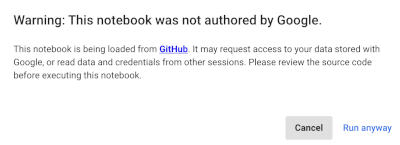

In [2]:
#@title
image = 'iVBORw0KGgoAAAANSUhEUgAAAZAAAACRCAYAAADtlO7dAAARDXpUWHRSYXcgcHJvZmlsZSB0eXBlIGV4aWYAAHjavZppjlu5FYX/cxVZAsnLcTkcgewgy893qCqn7XYDAdKIhZJeqZ443OEMlN351z+v+wf/UmjRpVxb6aV4/qWeehxcNP/5N95z8Ok9v3/9+yr8/L7rXxc+8pbxap9fW/m8hu/3v+/7eg2Dq/yHgdr6+sP8+Q89fY3ffhnoayLTiiIX+3tFXwNZ/PwhfA0wPtvypbf6xy3M83n9+vwnDPw4PZXl30bC119//T1Vorcz81iMx4J5nqPFzwJMP9HZ4CK/58KNwYzrxG+Dq/61EgLyuzj5P6zK/ZoV/xdZyev3SbHyucPxxs/BLD9ef/t+yL8Pvnsh/sPMtr6u4s/vE5j763a+f+7dzd17PrsbqRDS8rWp7y2+K26chNzexwqPyk/mur5H59Ec1btI+fbLTx4r9BA1e0hhhxFuOO91hcUSUzyx8hrjivbea1Zjj8u8I09Jj3BjtW7bGslcpNd4N/5YS3jz9jfdCo2Jd+DOGBgsfNIf/57HXw50r/IdgoKZPwlgXVFFyDKUOT1zFwkJ97uO8gvw9+PXf8qrkcH8wtzY4PDzM8TM4au2VEf2Em3cmHn99Fqo+2sAQsTcmcUEIwO+BMuhBF9jrCEQx0Z+BgO1aClOUhByjptVxmR0S40tam4+U8O7N+b4eRvMIhHZilVS022QqwSwUT81NWpoZMsp51xyzS33PIqVVHIppRaB36hWU8211Fpb7XU0a6nlVlptzbXeRo/dAMfcS6+99d7HYNLByINPD24YY8ZpM808y6yzzT7HonxWWnmVVVdzq6+x47YNTuyy626773HCoZROOvmUU087/YxLqV276eZbbr3t9jt+ZC24T1r/9Pjvsxa+sxZfpnRj/ZE1Plrr9xBBcJKVMzIWUyDjVRmgoKNy5ltIKTqlTjnzPdIVObLKrOTsoIyRwXRCzDf8yN1/MvdT3lxK/1Pe4nfmnFL3d2TOKXV/kbk/5+03Wdtim+XNvQypDRVUb7QfN43YxgHqNgWcwhi255jrlJhnv1Otwd7qpbtOBa5KXN6tm9ad8E7NE/qO3bPXm8Mcva0c8lSWy155E+c75wzE4Vit+yxex62H1Y/k+NDcmWz4xYrD7XPSpNRHi3cJtNj5qe1aaDXfI2Jil4yV121t3GGztRi6G0bXEp/W0jmphFPuuR3+W3MJ7UnhqnZJEsuYWZvrI+/YqZrNfbmPQul016jr3Ouatawb/YEUTTstLDOvsfIYZ/SQqDWLo/L5QTXk4hENLe8b2x57V3MrjgvOHzJ5JjuPpY1ZQXZjf8sy0SmXpVV/9oKFR4fQxQCeyhyXjIYFiAa3g2amOsY5o60ZUgatQmR5g1hRrys32nX3uaCNY1QmsOfr7IeVU+6Uw87RAXgpDsIWLfO8Tkin0HFUOzOVarPGtWZjwzWfnVAW7W06ARB5p0MRhzyWy6ntE2ibMf2difT07WcsdUjajANHnTAvVNdpuDLaJaTpxN3CXpQ14gQBkppLIa0pwuwx2zy8d8Pyp0rUNPa97plGsm/ps7ZJYTHE7MzO/im+XIzOiNO1Y5BgaQro8TG3y6yR0UImAVN9Gfk8U4U+LM627Gzr/MV6UHex390OTYsSqiNOtFPNfdJK0wPtZc1ZyrRC2dS6yu6QSbsH5GorUCCTWqxpjEVHbBDCSSuWQPygdarLX5i8ltiBQSTFIjXNjxptVz4XGQcgiDT+zrS9VXY2WiafzkPuXQimm8Isla6oL8QAj6IFllwPSAU+mjuJLrWtTd9QojWS2kkJ+O6Iip8DrNyd0jGqod9iXS21mPyUSoNFT95TC2Fs8rXGqCdRWteAjblCyWe5IBB+3cSuSSB/ADjmqoCh+dWLhXtOsb0Q0Angr70E8hd6TKMVgK4pFNXZHop318Zp8oz+RYcyLd0RG8vZ5NjofVJbO4GlVugLyjO0c2/bbJdmGm5SrfGAj0wLRAVQevUab/OLbqiIzXbqPGyvHg/CFaatghEbGwSal4KnroY7sfS9Q9qrd0RJGzu31cCIiI5DQzMvjYLGIoQEeqveFqTEti437CCgQ2E4aGlPCrdnVpptU08ZWvGv41/YkIpgbq4hToTfhg7mBT1T60DuHrd3KM67wUi8OUukTiOYntK4C36iegasZKDYsX12T0r2aJBN6CUnXsQaQYzLYp0RL3BwC+8xMP53r+sQ89p6JGPWqdZoJJ84HXvaJ6QLHd1bKXPqBvEaITNYjM7zM0FjQaMA32eV45Vx2mkCkQtSAQNs0a6CFrDWHXAkcH3mzYX4gva9zHJBtkCFgnGAXribYsl0KA3GnV0M2KkQgMOPtLpV1+FkVlgyJUmvbv7ZKOAnHGUEJ5cdoV8akRix8ESdoPJYH4EJ9G44k+mrow0GaR2zoBDYLwwoHiqQLRC0IjWRyDz1t7kDFIXYfIF5AfHZ2TKCMVEfzsRSRDUyfk6bNE1yhaiohbWCGS3R+XgHgKwfxM5dpw+ExIyHRgfGoRFS7Hw//iYonXADLLlUGGjtDoOkQr3THp5GiSlbE7UQofs8TgIz4DAStqbZdJPiG1DLoNBpN83aEAcHXATginI/+y4FYOfWzoi9VGlDlG/zrbLcy7KDEyfxy2QpOJiBCIpFgbAgGpsdEZGhfJmOw8o6CUJMTOQTyGd4/TEpqP7Fa9r0JsmiRJTCblSRv3Qb5ASN9WbsJ1q70MfgFtqBggcJRBurAZHTKZ5+AV/sPEVGjS0Nu3gtBBoZLRDFhC7KhCmRB36SmkUFJgxvRSxhnZkOhEQ/YQhWBAUiNMKY1ghClR0Dp8emYKn1MVAjaRqdeQpcK72IkKTPinotudMBDeLCcDkuaillIT9Z9+AVqdmXMiLB5ZUI8QbAw5rgIzfTf2mVW1BsaIKaFj2CstoSR0TPqPUQUBctx0oZIjZWpdApwVDAGQijzxaOHGmDpFlLdKwQQ8xGMhhwRorPLJFQQzKXMRS7gr69oA+bXL0dRFLOKGSisO3aia3s5Ab4ikTr8PnlIsr0LoRBpJphy0KddrhjF/AgxV4uTYq6PCdKenc7iF5pKNfrpS3RPTFNJC+34lirfnyicBAS5wK/CKzswSWKs6HidkPS9+hVfMKz0txXhyUECHCaKRl2YtASm1+zmEkYI8DRwXA47i8Sxkwez1kq04bYZIfbfeMjhHQEaYtKQxpBblUrhxkGC9w6Hkg0OF06JmPSygFlj1ohogMscUg3ppwXNCa9ohOoGijMoFNHKvpGGGIXDNJFrMvSVTXmfAz2hZqJB37EoVBKOvDd4uY7/Nh+LAwFcIW3YMcLQ4I3Qh0x93lpIMusFqIbfELsTtm6hfdAc7VGxOmiDLsV09ibDzFBAwi1JFAf5KB+EkqHGVCZSGWfAbuqGneeBqGvwR2ojWa7qcWFEALVGp0fM1rltIQ4QC6i8jNii2dZNMRJCbmhv3IVr8EYyK8b9QG765UO2QJsaTZYHrADfSqbv4dPSOPSAUhjlMoGLXE6TOoQrQwe4qaxKF0ZooFuQ8958I2Gwqpg46h3KBVJlhhwCFOl/tCAd5dhqEc0JCQB5SdUO3teW1Zsgaj7YmwabX6QJXg/lMwJrakHkVjoWfzkxNJJbhEZFwXX4DQ1wl5sUuFQiggFHIEo1VYQOJe0tgE6ZJ3SBHCxLtB6+SQouQ6cUu6ANMyXTsvaDqaO9sdYQu4IkLx5Z0nqbR0b6iyV4YjDnpLyEgVQNvPC1KEsMTlvBpwSGzPgRPqjEx6KGCDNn5WYejWL53FBincZMd7hIEsiopM51CzSFnWYD5iIAVVNJ9rokJZmFXEwV/cHLIccYlWXma3na25zzz2m1EFX/IzBrBelH7yOXJIOj7AUG8/69BJ2l26hQDYcQ/CFt2AmIIenBSn8OSBulVttWLJKAUEmAR94PgQvi4Fek9zGFEJd6OM8JIAR0zQMeOIQKomtCpHx2pe9oF8pfzgOTTZxLUBo71vF49EkVHWGGu+yLXcP1g4doC5WtLEHC8CCjwkI917yhAycfuIU5acoZpUiK7fhkcE4DUmMlomc7OhS98NYZKDTG6vzIzQcLA0e7NwIK1C/aPU7NXcQgiwUZAYHdKBRRFjYhLscAg1dF9DUeOKS4FtULGqZ0oCM4MyDQXqcNVuhqGAfMNd3jAfkheS98jp5OfLAdH7rKOjKWoHUGBmSxPRQHCI2buVtbFubX7wIHspG062wu6R8E4zAq3J7aNVbB71Q0f1g9dHxGr3Reno9o1NTlIqE0y1EOmSk4DTkGYI6YdLIGuQQXj8hSmjetzzGNamN9XCoax1MNkGUSHWxLQpOpE91cr3vIP3gSIU5B6nrI1P4pctC6ui1yNXCijpTnipNVn+bDm1QL4LYUMDwd8jiXcAFq2phf2QHiX4auggZZ7PniiSMWLgnJujoqDIFsRGD5AO8jPR2OY7GoXmRryy0NhHOzdpDx01iZqEyDA3ZRo9Szoh9MGAiRTeAQiyRfzYpW+pIJ2LFIqCQjhcsJ9UGjVa5CzOTgS6PlsIdJw2krxTEiKIv0PpAhfOeBowQdlQH0OgHNAbS6jB614hTgMV3uBUBgeLxghu6DZ8N1UJ0OgqhSDCUp0+HCILuKIDysnYmuHRPZXi6A/CFm4UWc/aPRkk6kxHryYsg0CQTNjO4jzXGnADAVAC23zI8Vxo2EyhIaULoMptQH55F+qNjx/AAZCyg3RaJoSQcrhDPAgZcM8qfwgNJcSVVVlgVAJev9zUOICInkrUmtHRCKXGBMEOG5Oo8eirRnVZTWCzCaAaarCbwDEkFbaSZyJN4iS5Tbha9BwGf0FVSoD/NiDwueOdlBJ4mOVW4rLDUSOxBmN3xODAI3AbqJ4Pes3z0bp3aKrsAfzCcR2g9uwyPBnXCHomWxADlA6X2rlQhXBA7ahrQkZZppwypEJ4x9PFKNk/vdCCOdI4PoC9+A/1yc/Zv6/qqrrxzG52Zp+xfeHQ8oBOWOSkqBEXRGQD6CACVcAW12FfV3RgZ5FYHcZMOU5YOKfLBGiHN17WbYVQtfACaCGSKQO4IHYvU0XGqN+E62pyFwOl9FqCUdqeTiBXQEUjAlk4mF9iNjAVBS+R32OYysvqtIgbZC1QAI2VqDG5AVcdBB2Zf5TNIAjxRs0zCLRAvDYwaIy3VokMS65SRGpP4+ho0FWheJwrkHB1CNARYN5qall0igaijGSptoK8WQW1aBIRUSiS/UynjZFnkJGhBbLCMD2WCYzgwmZkQdUJ3xwM0KRhIPSSMn3KhM8P/7dWF/9dAuGAK4ciYRhTTBkU2wIhzgNgxSKZzKUSnu3gVKHeKlrzJmGGbkC+K0QU375P9BUgCaWGofXU24ueSezjp+1Q3O0R10iFVJPexVrlkKh2JQEFlnaXgtijxrU7d82qsNmib1H9evfs74vP7gbIO6MECDBB4H3U2LwRAIeLaks65A2AvYV5WtFOyTutTcDLgG6JCNsCs4Cao7LehgaHtU2kpxMk7BGhIiaXzGlAZEqKYrkpZuAOGu4a50ZHO1BezSyBaKxoJ4V3T7DIH+jpbZ3tn7VMMTZabTqzg9EP/j8/hbHU/prz07QVx6CN0zutckLVeaEzvjIFR1/jj6DxKBAY+MtcCxrD8OqsVOQCWVXKkva96kk6SnqTC1Zp1nJcOJ3A5yFiZC7Qf7p72wDrrtGYvB7xhO5+jKbisTduOoMNF3xBv+nrDN3rM61wJra8vFgpgo8MiIAdvwP7FdQ5NCmIjrdgdSLaRiBhEdsOgKukr5no+rr3/RSDFAPWiOAU30p35BgvD8dsM94JjKIp/A5QmaHcWdM30AAABhWlDQ1BJQ0MgcHJvZmlsZQAAeJx9kT1Iw0AcxV9Ta0UqDnYQcchQxcGCqIijVqEIFUKt0KqDyaUfQpOGJMXFUXAtOPixWHVwcdbVwVUQBD9AHJ2cFF2kxP8lhRYxHhz34929x907QKiXmWZ1jAGabpvpZELM5lbE8CtC6EQUIwjJzDJmJSkF3/F1jwBf7+I8y//cn6NHzVsMCIjEM8wwbeJ14qlN2+C8TxxlJVklPiceNemCxI9cVzx+41x0WeCZUTOTniOOEovFNlbamJVMjXiSOKZqOuULWY9VzluctXKVNe/JXxjJ68tLXKc5iCQWsAgJIhRUsYEybMRp1UmxkKb9hI9/wPVL5FLItQFGjnlUoEF2/eB/8LtbqzAx7iVFEkDoxXE+hoDwLtCoOc73seM0ToDgM3Clt/yVOjD9SXqtpcWOgN5t4OK6pSl7wOUO0P9kyKbsSkGaQqEAvJ/RN+WAvluge9XrrbmP0wcgQ12lboCDQ2C4SNlrPu/uau/t3zPN/n4ALTVyi3puhuAAABCMaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/Pgo8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA0LjQuMC1FeGl2MiI+CiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPgogIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICB4bWxuczppcHRjRXh0PSJodHRwOi8vaXB0Yy5vcmcvc3RkL0lwdGM0eG1wRXh0LzIwMDgtMDItMjkvIgogICAgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iCiAgICB4bWxuczpzdEV2dD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wL3NUeXBlL1Jlc291cmNlRXZlbnQjIgogICAgeG1sbnM6cGx1cz0iaHR0cDovL25zLnVzZXBsdXMub3JnL2xkZi94bXAvMS4wLyIKICAgIHhtbG5zOkdJTVA9Imh0dHA6Ly93d3cuZ2ltcC5vcmcveG1wLyIKICAgIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIKICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIgogICAgeG1sbnM6dGlmZj0iaHR0cDovL25zLmFkb2JlLmNvbS90aWZmLzEuMC8iCiAgICB4bWxuczp4bXA9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8iCiAgIHhtcE1NOkRvY3VtZW50SUQ9ImdpbXA6ZG9jaWQ6Z2ltcDozMDQ2Y2NmOS1kZjgyLTQ1YTAtODdiYi0xNTQ4ZWFhNjBhYjciCiAgIHhtcE1NOkluc3RhbmNlSUQ9InhtcC5paWQ6ZGI1OWM2NDUtNjM4MC00YjUxLWIyMWItZTYxYTMzYzhlYmEwIgogICB4bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ9InhtcC5kaWQ6NzZmMjE5ZjEtN2NlMi00Y2FiLTkyZWUtMzFhN2E5ZWRiNzY4IgogICBHSU1QOkFQST0iMi4wIgogICBHSU1QOlBsYXRmb3JtPSJNYWMgT1MiCiAgIEdJTVA6VGltZVN0YW1wPSIxNjUxODY5NjQyNjI4ODE5IgogICBHSU1QOlZlcnNpb249IjIuMTAuMjIiCiAgIGRjOkZvcm1hdD0iaW1hZ2UvcG5nIgogICBleGlmOlBpeGVsWERpbWVuc2lvbj0iMTIyMiIKICAgZXhpZjpQaXhlbFlEaW1lbnNpb249IjQ0MiIKICAgdGlmZjpPcmllbnRhdGlvbj0iMSIKICAgeG1wOkNyZWF0b3JUb29sPSJHSU1QIDIuMTAiPgogICA8aXB0Y0V4dDpMb2NhdGlvbkNyZWF0ZWQ+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpMb2NhdGlvbkNyZWF0ZWQ+CiAgIDxpcHRjRXh0OkxvY2F0aW9uU2hvd24+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpMb2NhdGlvblNob3duPgogICA8aXB0Y0V4dDpBcnR3b3JrT3JPYmplY3Q+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpBcnR3b3JrT3JPYmplY3Q+CiAgIDxpcHRjRXh0OlJlZ2lzdHJ5SWQ+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpSZWdpc3RyeUlkPgogICA8eG1wTU06SGlzdG9yeT4KICAgIDxyZGY6U2VxPgogICAgIDxyZGY6bGkKICAgICAgc3RFdnQ6YWN0aW9uPSJzYXZlZCIKICAgICAgc3RFdnQ6Y2hhbmdlZD0iLyIKICAgICAgc3RFdnQ6aW5zdGFuY2VJRD0ieG1wLmlpZDo5ZjI5ZjgwOS05YjNlLTQ4OTQtODk1Ny0xMjE4MjRiYmNkY2QiCiAgICAgIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkdpbXAgMi4xMCAoTWFjIE9TKSIKICAgICAgc3RFdnQ6d2hlbj0iMjAyMi0wNS0wNlQxMzo0MDo0Mi0wNzowMCIvPgogICAgPC9yZGY6U2VxPgogICA8L3htcE1NOkhpc3Rvcnk+CiAgIDxwbHVzOkltYWdlU3VwcGxpZXI+CiAgICA8cmRmOlNlcS8+CiAgIDwvcGx1czpJbWFnZVN1cHBsaWVyPgogICA8cGx1czpJbWFnZUNyZWF0b3I+CiAgICA8cmRmOlNlcS8+CiAgIDwvcGx1czpJbWFnZUNyZWF0b3I+CiAgIDxwbHVzOkNvcHlyaWdodE93bmVyPgogICAgPHJkZjpTZXEvPgogICA8L3BsdXM6Q29weXJpZ2h0T3duZXI+CiAgIDxwbHVzOkxpY2Vuc29yPgogICAgPHJkZjpTZXEvPgogICA8L3BsdXM6TGljZW5zb3I+CiAgIDxleGlmOlVzZXJDb21tZW50PgogICAgPHJkZjpBbHQ+CiAgICAgPHJkZjpsaSB4bWw6bGFuZz0ieC1kZWZhdWx0Ij5TY3JlZW5zaG90PC9yZGY6bGk+CiAgICA8L3JkZjpBbHQ+CiAgIDwvZXhpZjpVc2VyQ29tbWVudD4KICA8L3JkZjpEZXNjcmlwdGlvbj4KIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+CiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0idyI/Ps3h94oAAAAGYktHRAD/AP8A/6C9p5MAAAAJcEhZcwAAFiUAABYlAUlSJPAAAAAHdElNRQfmBQYUKCp8i+5DAAAgAElEQVR42uy9d3jV5d34/zore29C9k7YK2GGBMKUISD4gDJKtVW/tdXW0W/l8rG1j7W1SlvFUhEEFEQ2YSoJe8gmCQmZZM+T5OQk55zkzPv3h08+PyJQq8Vq+/28rouLJOcz7vG+3+seRyGEEMjIyMjIyHxNlHITyMjIyMjIBkRGRkZGRjYgMjIyMjKyAZGRkZGRkQ2IjIyMjIyMbEBkZGRkZGQDIiMjIyMjGxAZGRkZGdmAyMjIyMjIBkRGRkZGRkY2IDIyMjIysgGRkZGRkZENiIyMjIyMbEC+Zb7LA4TNZjN1dXUYjcbvXdm+is7OTurq6rDZbPf1uVarlfr6ejo7O+UR9TXbra6ujq6urn/5u7VaLY2NjXf8vaen5+/K97+Dbqivr6ejo0MWsO+rAWlpaeGVV16hsLBQ+tvp06d5/fXXMZvNAFgsFn7/+99z5MiR+1rggoICHn/8cdrb27+VBvnss8/47//+77v+27x5M/X19aSmpvap++2sWbOGDRs2/MsMicVioaurC4fD8ZXXnjt3jszMzPuusHQ6HVOmTOHzzz//jxgUDoeDrq4uLBbLfVdutz9Xp9MxfPhwrl279i9XsuvXr+ell166Q07r6+sZNmwYxcXF/9Q77HY7Z86c4aWXXuLJJ5/krbfeorS09FsfF3a7nfnz53P06FFZu39fDYiHhwcXLlyQBF8IQW5uLhs3bqShoUEaHGvXrsXV1fW+FtjPz4/09PT7/txevL29iYmJISYmhvz8fI4fP050dDQxMTEEBQUB4OTkhEKhuOv9KSkpJCQk3PPz+83ly5dZtGgRra2tX3mtQqFArVZ/K+VQqVT/sjp/2+h0OpYsWcLJkyfv63ONRiMLFy7k+PHjUn84Ozt/J3VUKBT37K/7Uabs7GxWrlxJQEAAs2bNQq/Xs2jRIm7evPmt102lUsma/V/EN9Imbm5uDBs2jKKiIhwOBz09PeTm5iKEoLS0lOjoaOrr61GpVMTGxgJgMBgoLi7GYDAQFRVFZGQkCoWC9vZ26urq6N+/P6WlpSQnJ9PS0oKLiwsuLi6UlZXh4+NDUlISKpUKFxcXhg4dikqloqenh9LSUsLDw2ltbaWxsZH4+Hj69esnlbWpqYny8nKCg4Px9vamtbWVxMRErFYr169fZ/Dgwbi5uUnXp6WlkZaWhhCC8vJyKisrWbZsGUrlF7a2srISAJvNRnFxMVqtlsTERMm4hIWF9VHSOp2OkpIS7HY78fHx0nW3U1dXh8FgIDQ0lJKSEgAGDRqEi4uL5BFXVlZSU1NDcHAwcXFxODk5UV9fT2lpKdXV1RQWFuLk5ISPjw92u52ysjKampqIiIggKipKKn9vKqu0tBQXFxcSExOl9wA0NzdTWlqKm5sb8fHxeHl59UnflZSUoNPpiIqKIiIi4q5KSK/XU11dTUBAAKGhoX28W71eT2JiIiqVitraWoQQREREIITg5s2beHt7079/f8xmM6WlpWi1Wvr3709cXJykGKxWKyUlJX0+u71+vfJWWVlJZGQkDQ0NtLS0kJSU1Kf9W1tbKSkpwcnJibi4OHx9fTGZTBQWFlJTU0NZWRkJCQlERkbeUceGhgbKyspwcXEhKSkJb29vAMrKylAqlZLc96ZTIiMjuXHjBtXV1ZSXlxMfH4+np6fkNZeVld1Vfjs6Orh58yYKhYK4uDgCAgIAaG9vp76+npCQEMrKyhg8eDAeHh5otVpKSkpwc3MjISEBDw8P6Vk1NTVUV1cTGRn5lZGA2WwmLy+Pnp4eEhMT8fHxob6+nvb2dpKTk1Gr1XR3d1NeXk5QUBDBwcHSvW1tbbz55pu88MIL/PCHP0ShUJCVlUV9fT3Z2dkkJyejUCiwWq2UlZXR0tJCWFgYMTExffqxpaVFqktcXJzUxgAmk0kaV7GxsdTX1xMeHo67u/sddTEYDNy8eRObzUZcXByBgYGy5v8uDUivov3973+P1WqltrYWh8PB448/zrVr15g2bRqlpaUMHDgQf39/WlpaePbZZ3E4HISFhXH06FH+8Ic/MHXqVEpKSnjkkUcYNmwYZWVlbN++nTVr1tDS0oLZbEaj0ZCXl8cf//hH5syZQ3FxMfPmzaOkpASLxcKsWbPIzMzEaDTS1taGxWJhx44dhIaGkp+fz49//GO8vLxwcnJCpVIhhGDbtm1UVVXx6KOPsmvXLoYMGfK1vbfVq1cjhKC5uRknJye2bNlCcHAwa9asITQ0lBdffJHq6mqeeOIJQkJC8PHx4eLFi6xZs4ahQ4f2eV5ubi7r168nMjISu93OtWvXWL58Oc8//zxKpZItW7bw5ptvMmTIEEpLS0lPT+fll1/m+vXrZGdnY7FY2LRpE0FBQXh4eLB27Vo2b97M4MGDuXbtGj//+c9ZsmSJlPJ6+umncXV15ebNm8yZM4eXX34ZJycnLl++zNNPP01YWBgmkwlnZ2feeustoqKiMBgM/OY3v+H06dMkJiaSl5fHc889x+LFi+8YrC+//DJGo5E33nijz2eVlZX86Ec/4vz583h5efH666+jUCj485//jMFgYMWKFbz55pv4+fnx3//93+Tn5zNq1CgOHTrEE088wQ9/+ENsNhu/+93vOHnyJBMmTODTTz/lBz/4AY8//ngf5dPY2Mi8efOYNGkSHR0dNDY24ubmxocffkhQUBCFhYX87Gc/w9PTEyEEPT09rF69Gm9vbzZt2oTJZOLIkSP4+fndYUBOnDjB888/T0ZGBnV1dZhMJv72t78REhLCu+++i7+/Py+99BIKhYJTp06xbt06NmzYwIYNG7BarRw5cgQ3NzdmzZolpT17jYLZbOaTTz4hLCyMW7du8dOf/hQAV1dXWlpa+NOf/sSwYcMoLy9n2bJlxMbGUlFRwbFjx6isrOSnP/0pwcHBGAwGfH19Wb16NQEBAZw+fZqnn36ayMhILBYLRqOR+Pj4u6cllEp+85vf4O7uTlNTE/379+edd96hoaGBhQsXcvjwYZKTkyksLGTJkiXs37+/jwGpra2lurqa9PR0ycFwdnbmjTfewG63S3L41ltvsXPnTgYNGkReXh7Lly/n//yf/4NarebKlSs8/fTT9O/fn+7ubtRqNatXryY6Ohqj0ciqVas4fvw4iYmJ9PT0UFJSwo4dO0hOTr4j3f7CCy/Q3NyMr68vjY2NrFmzhpSUFFn736d86DeisLBQxMXFiVu3bom9e/eKF154QVy/fl3MnDlTmEwm8Zvf/Ea88sorQggh8vPzxfr164VOpxN2u1288cYbYtmyZcJsNotz586J6Oho8cknn4j29nZhNpvFT37yE7FkyRKh1+uF2WwWv/rVr8STTz4phBDizJkzIjg4WLS3t4umpiYREREhtmzZIiwWi6ipqRHDhg0Thw4dEna7Xfz4xz8WzzzzjDAYDKKnp0e8/PLLYu7cucJkMgm73S4aGxuF3W6/a/0cDodYtWqVeOSRR/pcc+vWLREVFSW2bdsmrFarqK6uFtHR0eLkyZNCCCF++tOfitdff10IIcTOnTvFxIkThdFoFFarVfz1r38V27Ztu+NdGzduFCNHjhQVFRXCZrOJbdu2iaSkJNHV1SVKS0tFUlKSyMnJEVarVdTU1IjU1FSxd+9eYbfbxYkTJ8SgQYNEfX29cDgc4urVqyI2Nlbk5eUJm80mzpw5IxITE0V9fb04cuSIiIuLE9euXRNWq1VcunRJJCQkiIsXLwqTySRmzpwp3nrrLdHT0yMMBoN4+umnxYsvvihsNpvYvXu3GD58uKiurhY2m03k5uaK5ORkUVZWJpqbm8XAgQPFnj17xG9/+1sxZ84cUV9ff0c9m5ubRVJSkrh+/bpoamoSI0aMEMnJyaKpqUkUFhaKwYMHi4aGBlFbWyvef/99UVNTI+x2u8jOzhajRo0S7e3toqqqSvTr109cunRJ2O12cebMGfHrX/9aGI3GPu8qLS0VcXFxYteuXcJqtYqqqioREREhTpw4Icxms1i5cqVYtWqV6O7uFiaTSbz88sti5cqVwmw2S2U7cODAHfJhs9nE9u3bJRnTarUiNTVVHDhwQAghxDPPPCNeffVV4XA4hBBCbN26VUyaNElYrVbR0dEhBgwYILKzs4XdbhctLS0iLCxMbNy4UVitVlFXVycGDx4sjhw5Iux2u3j22WfFz372M9HV1SXMZrN46623xNy5c4XRaBQXLlwQMTExYvfu3aK9vV0YjUaxdOlS8cYbbwiz2Sz0er1YtGiR+PDDD4XJZBILFiwQv/3tb0VPT4/o7OwUP/zhD8XKlSulcvZSXl4uwsPDxfbt24XVahX19fVi0qRJ4sMPPxRdXV1i6tSp4sMPPxRCCPHuu++KhQsXCovF0ucZx48fF9HR0aKpqUkIIYRWqxVVVVWiqqpK1NbWCrvdLk6fPi3i4+NFQUGBsNls4urVqyI5OVl8/vnnwmQyiVmzZok//vGPkiw+88wz4rnnnhM2m03k5OSI2NhYUVhYKKxWqzh//ryIiYkR+fn5wmq1ijFjxojt27cLh8Mh/vKXv4jFixdLuuS1114Tv/jFL4TNZhMy/zzfeBVWSEgIgYGB1NfXc/HiRcaOHUt0dDRarZaqqipOnDjBqFGjABg4cCCZmZkcO3aMLVu2cOvWLWprayVvRKVSkZaWhq+vr5T+iY2NlSKH0NBQurq6pOu/THx8PBqNBn9/f3x8fOjs7MRgMHDx4kUmT56Mu7s7zs7OREVF9fGyQkJC7kh9/KOTkDExMajVanx8fPDz88NgMNxxXVRUFB0dHbz11lucOXOGefPmsXDhwrs+Mzg4mODgYFQqFSEhIXR1dUlpHIDRo0ejVqsJCwtjxowZnDp1CoVCIZW/dw7iypUr+Pj4UFhYSHZ2NqWlpVgsFpqamr4IOdVqIiMjUavVDBkyBD8/P2pra6mtraWwsJCJEyfi7OyMu7s7s2fP5ujRoxiNRs6ePcvs2bMJDw9HpVIxcuRI/Pz8KCoqkurwzjvvsH79elatWtUnddWLv78/6enplJaWUlxcTFZWFpmZmRQVFVFaWsrgwYMJDg4mLCyMWbNmkZeXx9atW7l8+TJarRabzYafnx8TJkzg7bffZt++fQQFBfGrX/2qTxry9n5KSEhArVYTGBiIk5MTPT09dHZ28umnnzJ16lRcXFxwdXVl8uTJnDhxgo6ODqktlUrlHfKhUqmYO3cu/v7+bN++nT179uBwONBqtV8ZtfY+68vPjY6ORq1W4+3tTb9+/dBqteh0Os6ePUtWVhYeHh44OTkxZcoUiouLaW5ulrz61NRUfH196ejo4Pjx4/T09HDw4EFyc3NRKpVUVFSg0+koLCxkypQpODs74+Hhcc/oozdl2ivfoaGhjBo1ioqKCjw8PJgzZw6HDx/GYDBw4MAB5s+fj0ajuaPdHQ6HlCY7ePAgixcvZvbs2Tz77LNYrVauXLnC4MGDpXTm4MGDiY6OpqSkhPr6egoLC8nIyJBkcdasWeTm5mIwGCgoKGD8+PHExcVJZbzbvIfVamX//v14eXmRm5vLwYMHMZvNXLlyBZPJJEcP39UkOoCvry8DBgzg3LlznDlzhpSUFDw8PMjMzOTgwYNUVlZKeeC8vDzmzZuHwWAgJSXlrjnlrxp8X+c6IQR2ux2Hw4GTk9O/ZELybgwfPpydO3cSERHBunXrmD179jdaqaTRaPrMq7i6ut5zmaLFYkGj0dDd3Y3BYECtVvPrX/8aX1/fu5Zbo9H0Mcy3L07QaDTo9XqEEAghcHFxkeqqUqmk99w+STxkyBAprXa3yc309HTy8vI4fvw4EydOZNasWZw9e5bLly8zdepUlEolDQ0NLF68WJqDuF3ZeXp68re//Y1FixZx4cIF/uu//ovVq1ff07m4l4IUQvRpU7VaLc3nfdW9a9eu5Q9/+AMBAQEMGjTornn3+5Qd6GMY1Wo1drv9rsuwrVar9L/BYMBgMDBz5kxGjBiB3W7Hbrffoei/jvz19PTgcDhIT0/n0qVL5ObmUlVVRWpq6l11g8PhoKWlBYCHH36Yzz77jIceekjqJyEEnp6efcZOr4G/Xd6+LIsOhwOLxYKXl9c/5Pz19PSgUqmkNomNjeWxxx6TJ9q/awOiUChIT09n48aNqFQqwsPDUSqVpKam8sEHHxAeHi7lRU+fPs3QoUNZvHgxw4cP7zMZ9m3h5eVFZGQkN2/elATy9rXtQgisVuu3uqzwwIED1NXVsXTpUjZu3Mi0adPYsWPH13pnaGgoJpNJmrzv7u7mzJkzjBo1SlpJY7fbpWcmJSVhMBiYPHkyS5cu5dFHH2Xy5MlER0dLCrA3WmpqaqKtrQ1/f3+Cg4MJDAyUIgohBFevXmX06NG4uLiQkpLChQsXpHtra2tpamoiJiZGKuuLL77I//zP/7Bnzx4+++yzu9Zn0KBB7N+/X8p9Dxo0iOzsbPbt28fgwYMByM/Px2Aw8Oijj5Kamtonv15aWsrBgwfJzMzkd7/7Ha+//jpr1679h1ah9eLh4cHQoUMpLi6WZKO4uJioqChpkrp3cvtuk8sffPABy5cvJysri6SkpD5K0MPDg7a2NqlPbjf0vf31j/S/t7c3SUlJXL9+XTJ4RUVF+Pr64u/vf8f1AQEBhIeHExMTw6OPPsrSpUt54IEHyMrKwtvbm/DwcKm+DocDnU73d8d271Lv7u5uysrKCA0NRalUEh8fT0pKCr/73e8YOXIkERERd9wfGxtLYmIie/bswWw24+Ligru7u6TwhRAkJSWRn58vlUOr1VJZWUlERATBwcEEBQVRVFQk9c/Vq1dJS0vD1dWVxMRELly4ILVtd3f3XZexq1QqxowZg0aj4eGHH2bp0qU89NBDzJgxAzc3NxwOx33fEyVPon8NEhIS6OnpYfr06dLSv5SUFHp6ehg8eDA+Pj7SdW+//Tbr1q3DZrPxwQcfoNFovlXlrVKpePLJJ/n5z3+O3W7HycmJtWvXEhcXJ03oPvHEE7z99tskJiZ+a2X4+c9/zgsvvICrqyvnz59n5cqVX2u568CBA1m0aBEvvfQSDz74IAUFBRiNRh544AHJ2zOZTGzevJkFCxaQlpbG6NGjef7555kzZw5NTU0cOXKEHTt2SKvHXn31VcaOHcupU6eIjY1lxIgReHl58ctf/pLf//73tLW1YTKZWL9+Pe+++y7Ozs488MAD7Ny5k1deeYWhQ4eyd+9epk+fzqBBg6QNhO7u7iQnJ/PSSy/x6quvkpycLEWhvURGRuLj40NCQgLBwcEolUoGDBjAjRs3JCMXGRmJwWBg/fr1BAQE8NFHH2G1WrHb7bi7u/P+++9TXV3NiBEjyMnJYdy4cV/LKXFzc+NnP/sZzz//PN3d3QgheO+99/if//kf3NzcUKvVhISEsGfPHim9dXsUkJ6ezoYNG9Dr9Vy9epWGhgYpJTJ69GieeeYZ4uPjsVgsbN68WYr+XFxciIyMZN++fajVakaMGHHvgalW88QTT/Dkk0+iUCjw8PDgr3/9K88999xdo0l3d3d+9atf8X//7/9Fp9Ph5+fH3r17efzxx5kxYwYrV67ktddeQ6/X09HRwZEjR+75foVCwZtvvklFRQW3bt2iqKiI3/zmN1Id5s2bx69//WteeOGFuy4L9/T05NVXX+Wpp56ira2NYcOGodVq2bp1Kz/4wQ/QaDSMHTuWpKQkVq1aRXp6OsePH2fAgAGMHTtWksXXXnuN9vZ2enp6WLduHe+88w4uLi6MGTMGHx8fVq1axejRo8nJybmnAVm2bBkrVqzg17/+NSkpKXz++edERETw3HPPcezYMWmBw7cVRf6no3rllVde+aY39y6vGzNmjOQlenp6EhkZSWZmppQHj4qKYsiQIdTX1xMdHc2jjz5KSkqKlPtNSUkhKSlJSp+o1Wri4uKkOQuHw0FsbCzx8fE4HA6GDh1KcnKytEw4MTERb29vhBD4+fkRHx9PSEgIMTExDB06lJaWFqKioggNDaW1tZUFCxagVqvx8vJiwIABd82f93qLycnJxMfHS0rf4XAQHx/f550hISHEx8cTGBiIWq0mJiaGiIgIYmJiGDFiBGVlZej1eh5++GGmTp16R/jc+8zefL3dbmfIkCEkJyfj4uLC2LFj8ff3p7a2lujoaJ599lnCw8OBL/bFJCQkSMsrg4ODyczMxNfXl9raWoKCgvjpT39KSEgIdrudoUOHMmvWLKqrq4mPj+cnP/kJgYGBKBQKkpKSGDJkCM3NzahUKp599llSU1MlBZaVlYXD4aCuro6srCxWrlwpeXLh4eEkJCQQEBBAXFwcISEhWCwWabl2Ly4uLvTv359x48YRERGBUqkkIiKC1NRUUlJSUCgUBAQEMGbMGFpaWvDx8WHZsmWMHDmSfv36ER4ezqRJk9DpdJSXlzNkyBB+9KMf9Vlu/OV+6l1pFR4eTmJiIgEBAURHRzNmzBhpbuXJJ59k4sSJKBQKKSdvNBoJDAzsYwRVKhWpqam4urrS3t7OjBkzyMjIICQkhOjoaKKiokhOTqapqYnExEQWLFjAgAEDpGXoQ4cOpaurC39/f2JiYiT59fPzQwiBr6+vtJQ3PDycCRMm0NHRgcFg4LHHHpPkx2azkZiYSFJSkpTqiYuLY+zYsXR0dKDX65k/fz7p6emoVCqSk5NJSkqiqamJoUOHMn/+fGJiYoiLi+vTPw6Hg4SEBJYuXYpWq8XNzY1nn322z+ompVLJrl27+OUvf3lPwx0WFsa0adOAL5YyBwYG8vjjj/Pggw+i0WhwdnZm0qRJaDQaamtrGTVqFE899ZTkdCYmJjJs2DBaWlpQKBQ888wzpKWloVAocHd3JyMjA5vNht1uZ/z48Rw+fJjFixcTFBSEv78/8fHxUiQzdepULBYL9fX1jBkzhgULFuDs7IwQgsDAQEmXyHyDTJT4Pp+98U9SXl5OZ2cnKSkpdHV18fzzzxMXF8eqVavknpeR+QZzMhaLhY0bN1JQUMCf//zn70Tx9vT0kJOTw8SJE9FoNOzdu5ff//73HD58mJCQELmj/l1SWN93mpubWbVqlbRhccSIEfzwhz+Ue11G5hvQ1tbGY489RnV1NRs2bPjOvHaTycThw4d5+eWX8fb2xmKx8Prrr/eZK5ORI5D7wu2byIKDg/us7JCRkfnH6d2dHhISQnh4+Hd6dE1vSspsNhMUFISfn5/cQbIBkZGRkZH5d0H+PhAZGRkZGdmAyMjIyMjIBkRGRkZGRjYgMjIyMjKyAZGRkZGRkZENiIyMjIyMbEBkZGRkZGQDIiMjIyMjGxAZGRkZGdmAyMjIyMjIyAZERkZGRkY2IDIyMjIysgGRkZGRkZENiIyMjIyMbEBkZGRkZGRkAyLzz+NwOORGkJGR+eYGpK2tjatXr/b5V1lZydWrVykvL+9zbXt7Ow0NDfetwHa7nXt9B1ZXVxfZ2dl80+/IunLlCpWVlXf9rKGhgfb29r97f2VlJZcuXfrK93R2dlJTU/ONynj69GkaGxu/0b1arZbc3NyvvM5kMrF3794+f7NYLGzZsoXt27ffVyPicEBxsY0zZ8zcvGnDbv/ib4cPmamtdeBwgMUCQkB7u4OrVy1YLF/c29rq4OpVKzbbnc8VAnZs7+b8ectXlqGqqoquri6EENjt9v+oAf73xst3wfehjbu7u9mzZ8+30mb3s723bt2K1Wr9h65tbGykra0NIQS2/x0QN27coLS09PsbgdTV1XHw4EHp9+bmZjo6Ou7wWC0Wy30r8Pbt22lpabnrZ1arlRs3bnzjZzc1NdHZ2XnPZ9vupqluQ6/X/0PK/Z9pk5qaGkwm0ze6t6enh1u3bv1DgyA/P/8OJdvZ2cmiRYtQKu9f4Lrt424e+4GR48dtPPG4kQ8/7EYI0HcKrBZBRYWd5Uu70OsFlZUOFswxYTJ9MUDLyuw8NMeI1SruakAuX7ZTX//Vxu6zzz6jqakJvV7Ppk2b+E/6ks5Tp05960rk69De3s5HH330nRvVvLy8e35++PBhamtrv9Gzd+/efd8c5rNnz/7DzprFYsFut9PV1cW6dev+18FqRafTfattqf4mN/n7++Pv74+Pjw96vZ7hw4cDUFxcTEFBAZcvX8bb25sFCxag1+vp7OwkIiKC48ePU1JSQnBwMLNnz8bJyUkyPGfPnqWzsxOTycTixYvx9fXl5s2bnDx5EldXV+bMmUNdXR2HDx+msbGRH//4x3R2dnLgwAFUKhWzZ89GpVLR1tbGli1b6OzsZO7cufTv3x+tVsvevXsRQjBp0iTi4uIwGAzs3r2b7u5uUlNTGTp0aJ8IITs7mwULFuDq6ip5735+fvj4+LB//36am5tJSEhg0qRJfRRqcXExLS0taDQaFixYgIeHB9evX+fChQv4+/sze/ZsDAYDra2thISEcODAAYQQtLW1MX/+fEJDQ7lx4wYnT54kLCwMs9nMggULUKlUdwyCo0ePUl1dTXh4OFOnTkWpVHLmzBlu3ryJl5cX8+bNw9nZmZMnT3Lz5k2pLgC3bt3i6NGjuLm5MXfuXDw9Pblw4QJXr14lMDCwz7sMBgOffPIJbW1tXLt2DaPRSFNTE56enmRlZZGdnU1rayuJiYmkp6dTWVlJXl4e7e3tODk5MXz4cD7//HOcnJxYtGiR9L30bW2CN143s/Z9d9LSNCxcaGPXLgtWK7S3C1rbBHv3mjnxqY0tW0yMTnMGoPeruHv/t9lgzTtGZsx0JjBAxbp1JhYu+qKuVy7bKC83EBOjZt6DLmic7i7TNpuNnTt3kpOTQ3x8PBMmTJCM7o4dO9BoNLS3tzNx4kTy8vLo6Ohg9uzZhIeHU1RUxJkzZ1AqlcybN49bt27h4+NDfHw8ly5dwtfXl7i4OAAuX75MVVUVJpOJRx99lJycHCorK4mPjycjIwOj0cjOnTtxOBx4enoyduxYOlYFUzoAACAASURBVDo6UKlUJCcnU1BQIP188uRJSkpKiIqKIisri56eHvbs2YNer2fUqFF4eXmxb98+/Pz8eOqppwgICJA88IMHD6LVaklOTmbixInYbDb279+PVqslISGBjIwMOjs72b17NxaLhYkTJ5KUlERLSwvZ2dkAzJkzh8DAQM6ePUtBQQG+vr7MnTsXlUpFdnY2LS0tJCUlkZGRgVKplNry5MmTxMXFMWbMGD799FNqamro378/06ZNQ6PRAFBRUYFWq2X06NHSz0OGDGHPnj10dXUxZMgQ0tLSuH79Ol5eXsTGxnLlyhUCAgLQ6XSUl5fT2dnJypUrpT7uHVfe3t5SFFRVVUVOTg42m43Zs2fT1tbGgQMHKCoqknTMkSNHsNlszJo1i/Dw8D4O8/79+7FYLEydOpXu7m4OHTpEVVUVP/nJT9DpdBw4cACFQsGMGTMIDQ1lx44dAMTFxREfH8+ePXswm81kZWURExNDTU0NBw8exNfXt48zLoRg27ZtLFq0iI6ODs6ePcucOXMoKSnBarVisVhwdnbmwoULHD16lKSkJJRKJYWFheTl5eHs7Mx//dd/4ezs/P2JQO6Gs7MzjzzyCHq9nurqavR6PS0tLbS1tZGTk8OKFSvw8vKiqqqqT8rk8uXLPPjggwwcOJDTp0+j1WrZsWMHjz76KOPHj+e9994jOTmZkSNHMm/ePJRKJe+//z4LFiwgKyuLjz/+GIfDgV6vZ9q0acyaNYs1a9ZgtVr585//zAMPPMDChQtZv349XV1dbNq0iZEjR/Loo4/y6aefSpFDR0cHf/7znxk3blwfhdvY2EhnZyclJSV0dnayYsUKWlpa7rDwSqWShx9+mLi4OI4cOUJDQwOnTp1i2bJlBAQEcPbsWQwGAw0NDdhsNj799FOmTJlCeno6Bw8exGAwsHHjRhYvXsyAAQM4d+7cXT3izz//nJ6eHpYvX47dbuf8+fN0dnZiMBhYtmwZGo2GvLw8qquruXz5MkuXLiU+Ph4hBJ2dnWzdupVHHnmEESNGkJ2dTXNzM0eOHGHp0qUkJCSg6NXOgLu7O1OnTmXixIkMGTKEmpoavL29GT9+PIcPHyYgIIDly5dTU1PDjRs30Ov1tLa2smTJEjw8PMjNzeWRRx5Bo9H0iRANBjt15YLwMBVNTQ4sFpg71xmHA/bvtaLTOcjI0ODho2D8eGdQgL5Z8MYfjPz2VQMb1vegVH4RbezPttLZKbBYYcN7VoxG8b+GFtInOPPu22YuX7l3OkCtVvPAAw8wdOhQ0tLS+hjqnJwcpk6dSlZWFi+99BLTpk0jIyODXbt2YbFYKCkpYcmSJQwdOpQDBw4QEBDAsWPHEEJw8OBBSXH3RrlWq5U5c+Zw+fJlLBYLK1asoKqqiqqqKnbv3s2AAQNYvHgxdXV1krPRmz7t/bmgoACtVsuKFSvQ6XSUlJRw6dIlfHx8WL58Ofn5+YSFhZGRkcEDDzyAv79/H+chISGBZcuWcfz4cbRaLSdPnsTHx4cVK1ZQU1NDXV0dmzZtYuLEiSxZsoSdO3fS1dXF2rVrmTdvHjNnzmTjxo20t7ezY8cOli5dSv/+/SkrK6OoqAiTycSKFStoaGhAr9cD4OLiwqxZsxg+fDhpaWl9ZFihUHD27FmpjIGBgZIhPXv2LAEBAXzyySckJSWxbNkyLl68SFVVFS0tLdLzm5qaMBgMtLS0YDKZmD9/vvQ8o9HIBx98wJIlS0hLS8NmsyGE4Nq1a8yfP5/Jkyezfft2UlJSGDduHLNnz8bT05OrV6/y0EMPMWPGDNavX99HZnbu3ElaWhoPPfQQZ8+eJTExkbS0NObOnYtCoeDtt99m3rx5PPjgg7z99tt0d3dz/vx5UlJSSEpKktp34cKFbNq0CaPRyF//+ldmz55NZmZmn4yHQqHAarXS0NBAYWEh27Zto7u7m88//xxfX19aWlro6elh1qxZDBw4kAkTJiCEQKFQsHjxYlQq1bcSiarv9wMTEhLw9PQkIiKCzs5OSRF5e3sTFxfHxo0bSUtLIzY2ts99iYmJ+Pj4EBISQkNDA42NjQwfPhwPDw9cXV0xmUyYzWbUajVOTk4YDAauXr3Ktm3bcDgcVFZWYrPZiImJkQaL2Wymra0NhUJBaGioVL7a2lqqq6uJj49Ho9GQlpYmhayvv/46CxcuJCoq6q71i4yM5NixY3z88ceMGzcOPz+/u9Y/MTGRzz//HD8/PyoqKtiwYQOdnZ3ExsbSr18/6fqYmBgCAgJQq9UcPHiQzs5OYmJi8PPzw8XFpY8Ru52SkhKysrJwcXEhNTWVrVu3MmbMGNRqNZ988gmVlZUEBQVRU1PDuHHj8PDwICIigqKiIlpaWqioqGDTpk3Y7XZ0Oh0DBw4kNTUVT09PYmJi+hgthUKBk5MTGo0GtfoLkYmPj8fDw4Nz587xq1/9ChcXF0aNGsXNmzeJiooiMjISNzc3QkND8fHxwdXVVYqo/n8UoACbHaoq7Gze1MO5U3ZyT3kDoFJBaKgKJycIC1NRVWXH2UPB+AlOeHgouHHDRu6Rv59PT01TM3achhmzVDQ12gDNPa/trV+vF9xLSEgIvr6+uLq6kpiYiL+/P05OTrS2tuLk5ER4eDg7duzAaDTicDiIiIigrKyMuro6vL298fb27vO8pKQkfHx8uHz5Mu3t7VRXV1NfX8+AAQMoKSlh/vz5uLm5ERMTc8+y5uXlUVFRQUtLC83NzQQHB5OSksLmzZvR6XRMmTIFDw8PNBoNGo2mj0MQFhbG4cOHuX79Oo2NjZjNZkpLS5k/fz7Ozs4sWbIEs9lMe3s7kZGRqFQqnnvuOXQ6naS8eqMET09PRo4cycaNGxkxYgQpKSkYjUZOnDjBtm3bGDduHD4+PtK7nZycUKvVqNVqbty4wdSpU3FxcZGMb0ZGBgCenp5ER0dTVVVFRUUFDz30ECUlJSxcuBBXV1dSU1P7OKFfpreNb48WBg0ahK+vL2q1GmdnZxQKBcnJyezbtw+LxYJOp0OpVKLRaHByckKpVJKUlCTNl2i12j7vmDx5Mnv37iU+Pp4ZM2ZIdXNyckKr1RIdHS1F8wkJCWi1WlxdXYmJiUGpVJKbm4tSqUShUFBfX09LSwuenp6EhYUB9HE8AIYMGUJpaSnFxcWsWLGCkpIS6uvrCQ4OpqCg4I72BUhJScHT05OQkJAvjb3vqQG5FwaDgQceeAA3Nzd27NiBSqXqkzb6Mq6urlIIZ7VaMRgMfQa2Wq0mJSWFpUuXolQqsVqt2O12aW7BbrdjNBrx8vKiq6sLu92OSqVCp9Ph6emJi4sLZrMZjUaDTqfD19cXgF/84hcUFBRQXFxMcnLyHeUyGo0sW7YMIQRvv/02jz32GP379++Ti+xNfbi5ueHr68vYsWOZNWuW5BH8vfyqs7OzNA/jcDjumQN1d3fHaDRKUZOvry8lJSW0trayfPlyzpw5gxACDw8PKbrqDdudnJwYMmQIK1askNI3jY2Nkif3VXM9txuWsLAwurq68PLyorOz854G7+6pUCWD05Rcv25hxgwXPD3h8zPGu8w/fRFJALi4w+jRGnx8FKhUIIQZpRJUKgVGo8BsFn0m1U0mgcUCTY2CgQMVX1mfrzP/oVAo0Ov17N27l1deeYXm5mZ27dqFSqVi0qRJbNiwgenTp/dR3rfj4+PD6NGjSUxMxGaz4erqytGjRzGbzXh6ekoTqGq1WvrZbrej0Wjw9vZm6tSpDBkyBJvNhrOzMw0NDTz11FMYDAZ++9vf8rvf/e6u783JySExMZFhw4ZhMBik6KCnpweAlpYWnJ2dpfHk6urKrVu3CAwMJD4+nmXLlkljrqenh8zMTHx8fDh8+DAWi4X4+HhWrFiBw+Fg9erVPPXUU32cpl4CAgIkGTYYDLi5ufVp2wkTJvDRRx8xcOBA3NzccHd3x2w24+7ujl6vl1JRvXL99+TWw8NDMgBCCBwOB93d3XzwwQe8/PLLmM1m1qxZc8dk/+rVq1m9erUUrXy5/5955hnq6+t56623ePXVV6XP3NzcaG9vl+SpublZSt1+4RypiI2NZfHixTg7O7N48WLUajXd3d3YbDZUKtUdiw1iYmLYs2cPUVFRjBw5kvfee4/IyEjJWHwX/FNvFkLcc8B9+e8KhYK//vWvpKWlUVdXx+TJk+95vRCC6OhoDh06xN69e2loaGDhwoU4OTkRGRnJwYMHWbp0KYMGDWL37t1SlJKWlkZxcTHbtm1Dr9cze/ZsXF1dmTZtGhs3bsTT05OgoCD69+/PnDlz2LBhg5R3nDVrFnV1dQQEBLBy5Upee+01fvnLX0qGpbdcFouF9957j7S0NCwWC+7u7ndMyGo0Gq5du8bDDz9MdHQ0R44c4dixY7S0tDBmzJg+iur2ejscDvz8/PD29ubjjz+mo6NDGmBfbqfMzEzWrFnDuHHjuHjxIj/60Y+w2WycO3cOJycnzpw5w/Tp0xk1ahR79uzBbrdTWFiIv78//fv3x9nZmYMHD2K32wkPDyc1NZUdO3awZ8+eu3p2X+6f3t9nzpzJ5s2bGT58OBcuXOCZZ56hrKzsrvX78u8eHgp++5obz/7MxI5PLNyqECxcrMbDA8kIBAUpcPeAN/9oYPYcF4z6L60Y6/oiUsmaouHF50ykDFTRVCmkFV4fbbZyLMdKfZ3ghRedKC4uxmQySfN2t5fJzc2N6upq8vPzGTJkyF3LfLtBdzgcODs7S6t6ioqKJCU4fPhw/vSnP/GLX/zinvWfPHky77zzDhMmTODmzZs88sgjzJ07l7Vr1zJ8+HAOHTrEoEGDiImJ4U9/+hMGg4FDhw6xZMkSxo8fz+rVq+nq6qK0tJSHHnqIzs5Odu3aRUpKCv7+/pKhOX78OOHh4ZIs9+vXj/3791NUVMSxY8eYPn06WVlZbNq0idGjR3PlyhWefvpppk2bxubNmwkJCUGn07F06VKGDRvGrl27JO9+0qRJrF+/npEjR1JRUcGAAQMwm828//77jBo1CofD0ccw9Bqj/Px8xo8fz7vvvkt9fT3nz5/niSeeuCOaz8vLY/ny5QA8+OCDrF+/ngEDBnDjxg2efvppmpubWbduHU1NTWRnZ/Pss8/eVS/5+/vj7u7OJ598gk6nw2KxoNFo8PDwYM+ePVIk53A48PHx4dixYzz88MOEh4eze/dumpubMRqNkhMIUF5ezsmTJ/H395citdDQUI4ePcojjzxCTEwMW7duBSA5OZmAgABJfpycnJg7dy5btmwhNjaWlpYWli1bxrBhw9i4cSOurq53jEMPDw9UKhXDhg3Dx8cHo9HYR057HdDW1lauXLly1/F3v1GIf+INvZM3vUq0u7sbpVKJs7MzJpNJmvh1OBy4urrS3d1NW1sbnp6efcJ6q9WK2WzGw8OjzzNtNhtarRaNRoO/v7+UB2xqaiI0NBSFQiEtXetNW3V3d0vPCAwMRKlUSpPUVquVoKAgqVwdHR0YDAaCgoJwcnKSyuzs7IzRaJRC3d55mt7PDAYDOp0OPz+/PgbEbDZLKyGcnJykAWu1WtFqtbi5ueHj44PFYsFms+Hi4oLBYMDLywuHwyH93NbWhtlsliYdX3jhBUlojUajlE4ymUy0tbXh6+uLh4eHtBLMaDTi4+ODw+HAw8ODnp4e2tvb8fLykgTRbrdLbevr64tSqcRsNtPa2oqPjw92u126/va6ubm59SlDr/eo0+kICAjA1dUVs9ks9XlPTw9CCOnnXm/3i7I6sFgEHR2C1lYHPj4KfHyUqFRfLNl1dVXg5qZAq3XQ0wMBAV9EGX6+SpQq6OkRGAwCf38lFgs0NNjx91ditQg8vZSYjA6UKgUdOgfePkr8/JS4uVmk8tweHTs7O0vRqMPhkOTJ4XDQ1dWFt7e3NH/k7e3dp79MJhPt7e34+flhs9mkPty5cyc/+tGP+kQgt8tRr7y2t7fj7e0t9WF7eztWq5UzZ84wYMAAkpKS0Ol09PT04OnpiVqtliKGtrY2vLy88PT0lPq/q6uLgIAAXFxcsNvtNDY2SjLeq1RaWlpQqVS4uLjg5OQkpYU7Ozvx9/fH2dkZIQQ6nQ6r1UpAQAAqlUoaS71tpFKppHK4u7tLhqWrq4uOjg78/f37GJAvFk+0SUq9u7ub1tbWO8ZSbzT/xz/+kRdffFEas52dnXR2dhIYGCi1YXt7uxS1OTk5YbfbJT30ZX2l1WqltvL09MRsNqPVavH19cVqteLt7Y3NZqOpqYl+/fpJ4+T2z3v7UwghvTswMBCNRnNX/WS32wkKCkKpVKLX6/H09JQW3vT2a29a1OFw0NLSgouLCwqFAi8vrz7yYzQacXZ2Rq1WYzAYcHFxkSKX3jrrdDrsdjseHh4oFArJyblbm3ynBkTm/uNwONi9ezdNTU3odDoeeuihu6bS/hMoKLDS1vav2xPg4qJg9Gjnb/09FRUVvP/++/z4xz++51zaP0J2djZJSUkkJCT8PzcO2traeOedd5g5cyajRo2SFcP3FNmAfA8RQkie6u15U5l/D6xWK1ar9Q7P++vSu2jky0u4/1/AbrfT3d2Nu7v7PeeQZGQDIiMjIyPzb4p8FpaMjIyMjGxAZGRkZGT+TQxIW1sbpaWlNDY23pflYhaLhdzc3O/dWUTl5eX3PEPKbDZz/Pjx76RceXl5d2xu+mcoKir6xmcAdXV13fPcHb1ez+eff/6Vz+jdIX/58uV/WRsajUbOnDnzvZCz3tMJ7jeNjY1UVlZSVVWFVquV9kEcOXLkezXW6uvr79tBi72bNP8TKS0t/bubKP8tDEhBQQFr165Fq9WyZ88ecnJy/unC9B7t8X2jtrb2ngekWa3Wv2tAjh07Rl1d3bdSrps3b97z8Mdvwq1bt76WQWpvb5dO7W1vb7/nvUaj8R8yCrm5uYSGhv7dDab3i48++gij0YjZbO5zhMZ3SUVFxbeyW/i9997j0qVLlJSU8NFHH/Hpp59Kq/2+LwghpHOd/pnxcPHiRUk/dXV1/UcakJqamm98Ivf95htvJNy4cSOrVq3C19eX1NRU9u3bhxACq9XKsWPH0Ov1jBgxgri4OIQQXLx4kcrKSmJjYxkxYgRKpZJr165RUlJCWFgYLi4upKSk9PFoc3NzcTgcZGRk3HFkCHyxhvrYsWMAZGRk4O/vz4kTJ1AoFLi7uzNy5EjJsyktLUWn0zFz5kxKS0spKiqSytJ73k5jYyNJSUkMGTIEh8PBqVOn0Gq1dHZ2kpSUdEcnnjt3TtrDAV8cdXD69GkcDgeZmZlotVoOHDhATEwMy5Ytw2QySYfuTZ48uc9eGJPJxMmTJ9Hr9aSmphITE8PZs2dxcXGhrKyM+Ph4hg8fjsVi4fjx4xgMBurr6+9Y4lhZWcmFCxfw9vYmMzOT+vp6amtraW9vZ86cORQVFVFUVER0dDSpqanYbDZOnDiBXq+nublZOvLl5s2b5OXlER4ezujRoykvL0en01FTU4Ofnx8TJkxg//79nD59moiICGmfjhCCgoICioqKCAoKIj09/a7l8/T0JDMzU1qpVFNTw4kTJ0hISCAlJYX8/HyUSiVBQUHExcWRk5ODyWQiLS2NyMhI8vPzMRgM1NbWEhERgY+PD/n5+YSHh0ubNW+PrPLz8wkODmb8+PFcunSJAwcO4OzsTHp6OkajkZycHFpbW8nKypIO5MvNzUWj0TB58mRsNhuXL19Gr9czefJkab9DW1sbJ06cQAhBRkYGAQEBNDY2cvr0aamOzs7OXL16ldLSUvr378+4ceMkx6N3nMTHx+NwOFAoFJI81tfXS/LY2NhIVVUVTU1NaDQapkyZgpOTkzSuoqKiSEtLu+dJyRkZGQQFBZGZmcmTTz7JpEmT+shebm4uZrOZ9PR0goKCqKur4/z582g0GiZNmoSXlxfl5eXSQakZGRm4urpKf+vXrx/jxo2TdkUbjUZOnz6NyWRi8uTJmEwmTp8+jZeXF5mZmZw7d47Ro0fj6urKxYsXJT2hUCiw2+0cP36ctrY2UlNT8fPzo7i4mLS0NMrLy1GpVERHR3PmzBmGDh2Kh4cHbW1tZGdn09XVJcnwjRs3OH/+PNHR0dL5V71jetSoUX2Oiunp6ZH6Y+TIkcTFxdHT00Nubi5Go5FRo0YRHR3NtWvXCAsLIzAwkGvXrtG/f386OjpoaGjAYDAwffp0Ll++LOm6UaNGYbPZOH78OB0dHYwePZqIiAjpvXa7nZMnT9Lc3MzgwYOljZjHjh2js7OTkSNHEhsbK5W9tbWVjo4OBg0aBEBhYSEFBQVERUWRmpp6X0/K/tYiEJPJhBACT09PhBDSKaTwxXHGnp6eTJ48ma1bt9LS0sKVK1coLy9n+vTpFBUVcf36derq6sjOzmbSpEno9fo+xyvb7XbWrVvHwIEDGTp06B2HmPWmu9asWcOwYcMYMWIEb731FlarlRMnTmA2m/sIR2trKydOnGDEiBFUV1dz8eJFpk+fzvXr16moqKC4uBibzcaUKVP48MMPaWtr48KFCzQ2NpKZmUl3d3efd/f09EgHLvbr1w+z2YwQgsOHD0vCt2XLFqKiohg8eDDjxo3Dzc2N/fv3M27cOEJDQ9m+fXufZ54/f57Q0FDGjx/PX/7yF8xmMxcuXKCpqYmJEyfywQcfSAPdbrczYcIE9Hp9nxREZ2cnmzdvZsqUKXh7e3Po0CHq6+u5evUqo0aN4tatW1y8eJEZM2ZQWFhIaWkpp06dwmAwkJ6eLnlstbW1HD16lOnTp1NTU0NRUZG0Qzs9PZ2CggJqa2sZO3YsiYmJJCUl0dzcTHV1NW1tbRQWFjJ16lRu3bolndHT22d/+ctfGD9+PF5eXn1SRyEhIQwcOJDx48fj7e3NgQMH0Gg0hIWFsWXLFvr160dGRgbr1q1Dp9NRVlZGU1MTkydP5tChQ+Tn55OVlcW+ffv6HPdfXV3NkSNHmDZtGlarlcOHDzNs2DCio6MZO3YsarWaiooKYmJiiI6OZu/evdhsNt59913GjBlDbGwsW7duxWAwsHXrVgYPHtxnee769etJSkpiwIAB7Nu3D6PRyPr165k4cSLe3t7SUfH79+9nypQp1NXVUVFRwalTp7BarUycOJF9+/bR3d3N6dOnsVgsnDlzhtbWVqZNm8a5c+coLi6mvb2dzz77jDFjxtDV1cX169epqanh1KlTTJkyhaKior8b6fYe+VFdXU2/fv0kA+twOPjoo4+IjY0lLS2Nv/3tb/T09HD06FHS09Px9/dn79699PT08Je//IX09HTp1NeWlhb27t3LtGnTaG9vl3Y/946RzZs3M2DAAIQQrFu3joyMDDw8PDhy5Ih0MoLVamXXrl14eHiQk5OD1Wrl008/Ra1WM3nyZDZu3Cj1m8Ph4ODBg+Tk5EinUfdujvT29iYtLY3hw4cTHBwsObMTJ04kOzubtrY2PvvsMxQKBVlZWXzwwQd9Tnk4ffo0drudjIwMPv74YywWC1u3biUoKIiMjAw2bNiATqejqKhIOmKpsLCQjo4OamtrKSwsZNiwYRQUFFBRUcHMmTPJz8+noqKCQ4cO4eHhQUZGBu+//34ffXLixAksFgszZsyQTkj++OOP8fX1ZfLkyWzevBmtVsv58+fRarVkZmZKX+dQVVXFyZMnmT59OiUlJRQXF/97pLAcDoeUqywrK+NPf/oTS5culbzj0aNHExAQQFZWFqWlpZw8eZKsrCx8fHyYOnUq58+f59atW0yZMoWgoCAGDhx4x27dEydOcOnSJc6dO0dZWdkdSlyv1+Ps7ExMTAxRUVH079+flpYWlEolI0eOvCNiSU1NJTIykqtXr9La2srhw4fRarXU19cTFxeHw+EgJycHs9lMZ2cnpaWljB07lsDAQAYOHNjnWc3NzSQlJREeHk58fDyurq4oFAomTZrExYsXuXbtGlqtFicnJ9zc3PDw8ECtVpOVlSUdt/7lL5QaMWIENTU1nD17loaGBimUHzFiBP369SM2NpbOzk4uX77MuHHjpMPzbm+3qqoqRo8ejb+/P2lpaWRlZQEwZswY6djxtrY2Dh06RFtbG+Xl5RQXFzN69GipHwBJYR0+fJiGhv+vvTsNjqu6+zz+7X2TWq3VrcWydtnIyFoswHhDNgY7eYCnHJZMhqkMGYZipsKQqdSkioIKKSoZkpAnrgAeHBIzDxBss40xjrFlYQkRY2Eja7dkrZbUWtqW5Nba3VJv88L0jduywWELJP/PK1stdZ97uvv+7zn33t8ZpqurS2mL3W4nJycHt9tNdHQ0JpMp4q7u2NhYsrKyqKysxOl0RkRS63Q6iouLOXTokHJ0HqbX6zGZTMqd1iaTiZKSEgwGAy0tLZSUlJCUlMT69euV81FLly4lISGB4uJiioqKiI+Pp6ioKGLqoqGhgQ0bNhAbG8vq1av54IMPMJlMGI1GoqOjUalUFBYWkpWVRVZWFrOzs4yMjCg7+aamJk6cOEEoFGLlypXk5uYqO63w56qiogKXy8U999zDyMgIAwMDVFVV0dbWRmtrK1arFYPBwJEjRygrK1OivBsaGmhpaeH73/9+RB9WVFQobd68ebOSwVRcXExycjKFhYWMj48THx+P1+ulpqaGDRs2RESNX+qPf/wj27dvp76+nocfflg5UvX7/ezbt4+mpiaOHj2Kw+HA6/WyZs0aampqOH36NGfPnsVgMLBixQoOHTpEQkICa9asobW1FZfLxaFDhxgYGKC/vz/iNQsLC8nPz2doaIiRkRGqqqpob2+nu7uboqIiPvroI/r6+pQQ0HChq6iooKenh3fffZezZ88yPz9PUlIS/f39SrCqw+EgMzNTeS+0Wi0WiwWLxaKER4b7KyUlBY/Hw9GjR+np6aGyspKxsTHGxsaUtmZnZ1NfX09zczMPPvggGo2GY8eOUVpaqoyke3p6rti/ZWVlpKamP+8R0AAAGWZJREFUcvr0aVatWkVMTAz33nsvKSkp7N27l+7ubo4cORKRrAxQX1/Pddddh81m44c//CFms5mWlhaKi4tJSEhQlkfo6OiI2B+pVCrq6+txuVwcPHgQp9P5pU2Vf+FTWBaLBY1Gw8TEBHl5efzoRz/iwQcfRKVSERUVpYSBhaMewpEBcCG6wWAwKJEg4fnPiEZptSQnJ7Nx40ZUKhW33nrrglvwNRoNPp9PGfa6XC7lQ/hJNx6ZzWbKysooLCwkFAphsViorq7GbDZz5513KtXdYDAoJzQvbd/FbQ8/Pjc3x3PPPadkHz377LMLTrb/7ne/44knniAQCPDb3/424vGXX36ZzZs3k52d/YnnC6KiopTAxkvbpdFolEIbCASUNob7Q6fTsXLlSmXbzWYzIyMjC7bTYDBQUlLCqlWrlNiP2traK85dX3rBQVtbG/feey8nTpyIWDgrPMoLr1HS39/PHXfc8clHOB+no/r9fnQ6nRI9c7Wio6OVPvH5fMpNeZ908lin05GZmal8/m655ZbLnpsIBoPk5uZSWlpKc3Mzzz//PFu3bmXp0qVK8Q7HfzzwwAPMzc3x+uuvs2HDBhITE/nxj3/M4OAgTz75JD//+c+V542JiVH6ze12L0gHvrjvH3roIWZnZ3nppZe4++67lXVHLvXAAw+QlJSkfBYuPlltt9spLy9Ho9GwceNG1Go1f/jDH3j88ceZnp7m5Zdfxufz8e1vfxudTkdVVRVDQ0PYbDaKioqUBN0rxWQYjUby8/OV/DuNRkNcXByzs7NUV1fzrW99S/ldlUpFXFwc69atw2azUV5eTlxcHKWlpbzyyivccsstuN1u3nzzzQV5eld6X1UqlbJvWrduHbGxsZSXl0fk3JnNZuX9+NnPfsZTTz2FTqdTYlGmp6dJTExEq9UqfXe519Lr9RGBquGDqvXr12M2m9mwYUPEwa1arVa+f263G5PJhEajUabFPR4PsbGxGI1G5aDy4uy20tJSSktLle/zN2IEolKpuP/++3n22Wc5ceIElZWVZGZmotPpuOOOO9izZw/Hjx+nrq6OwsJCbrnlFl555RXq6+t5/fXX2bx5M8uWLaOiooLa2lr27t0b8WYYjUbWrVvH0aNHlcAyr9fLwYMHI450ExISqKiooLKykuTk5AXxx5dz/fXXKzuvw4cPMzExgcViobGxkaqqKvbv34/P56OsrIw9e/bw4Ycf8uc//zniORISEpifn6eqqooDBw4oOTPhefI333xTyQsym800Njbi9Xrx+/2cPHmSXbt2LVhVMCoqivr6evbt20ddXd0Vvwg33XQTe/bs4dixY1RWVkb8XnZ2Nk1NTRw/fpw33niDwcHBiMdXrlxJVVUVAwMDyravWrWK3bt3U1tbyzvvvAPAtddeS21tLX19fbz33ntXPDluNpvp7OyMGE0ZDAY6Ojqora3ltddei7iqKDw12d7ejtfrjTiSvxKDwcDGjRt58803qa2tpaura8H5qE9SUlLCoUOHqKur45VXXuGee+5R2t7U1HTZq56SkpKw2Ww0NDTQ3t5+xWWKVSoVBw8e5C9/+Quzs7NKfP3c3Bytra00NTUpa2M888wzDA0NEQwG0Wq1tLe388YbbzA5OankHoXdfvvt/OlPf1I+D+Ed9KUmJyfZvn07TqcTtVqNRqOhp6fnsus+hHeilyuWt912G9XV1coiY1qtFrfbzUcffcSuXbvw+/34/X5+//vf09HRobx3y5cvV2Lljx49esUj4MWLF+PxeGhra1P6FGDt2rV0dHREJPWq1Wq2bNnC4cOHcTgcvP322wSDQfLy8qiuriYvL4+CggIOHjy4YEkIq9VKc3OzkrV1cVFRqVRs2rSJQ4cO4XA42L9/f8R3o7Ozk9dee42JiQkltHDr1q28+uqr1NbW0t3dTX5+Prm5uVRWVnL06NGI/dHFI5G33nqLhoYGduzYwfz8PN/5zneUhbPCi3GFbdq0iVdffZX6+np27NihLD712muv8eGHH9LU1MTSpUu57rrrIvZH4RHx0aNH6evro6qqasF2fxU+153o4+PjDA0NER0dTWpqKnq9nlAoxNDQEC6Xi8zMTCUgbmxsjOHhYZKTk0lMTCQUCjE6Osq5c+eYmZmht7dXmQJIS0tT1vjw+XxkZGQwPDxMY2NjxCIxfr+fM2fOEAgEyM7ORqfTMTw8rASbhc3MzDA/P69U/omJCQYHB4mPj1cC03p7e1GpVMTExGAymZQYdJfLRWJiInq9PuKkt8fjobe3l7i4OEKhECkpKUxPT9PX14fdbsfj8SjrX3R1dZGXl4fX68XhcJCSksLs7GzEybS5uTllfQW1Wk1iYqIyTaHX6xkZGSEuLg69Xo/D4cDj8WCz2bBarRHTH263m76+PqxWK6mpqcqaLOFgxEu3PRQKMTw8zPT0NPHx8crUztTUFA6HA5vNRkpKChMTE2i1WqKjo5WVBqOioujr60Or1WK1WgkEAthsNoaGhpiamlJGCtHR0bhcLux2O7Ozs/T392MwGMjIyIiI6RgdHSUqKgqj0cjQ0BDJycnKEfzAwADT09NkZWVhNpsZGxvDZDJhsVgYHx/HZDJhNpuV57i4T8Jr0NtsNmWtBZfLxfDwMNnZ2bhcLpKTk5mfn+f8+fPY7XZ8Pp9yqeSSJUuUYEG73b7gKry+vj5lLRqDwcDc3BxnzpxR0qM1Gg3nz59naGiIuLg4UlNTCYVCOBwOJicnWbJkCVarleHhYZKSktBqtZw7dw6n00laWppytB4O3QtfPRYXF8fo6ChOp5OEhASSk5OV82IXr4UxNDSkfIYv3qmGL0AIBoMMDAzg8XiUdVzC7Q2f4wt/ZgcGBjAajWRkZKBWq5mZmaG/vx+r1UpaWppSpMLBheET2pfrk7m5OSYnJ5XPyeDgIMnJyajVapxOJ+fPnyc1NVUJBg0HHMKFS5MvPpcTPkAJFySfz4fVasVoNOJ0OomNjcVgMDAyMhLxvJf2x+TkJOnp6Up45sDAgLJGj8ViiVh7KCYmBqvVyvz8PGq1WvmOjY+PK4GKsbGxyndsYmKCtLS0BevDhNuUnp6uBD06HA4mJiaU1wWUxbkSEhIwGAxYrVYmJycZHBwkNjZW6etvTAH5PNxuN88//zxpaWm0tLRw//33f+Icbn9/PzabbUHnCyGE+Pv4u2Zhzc/PK3HUl0Y5CyGEkAIihBDiH5BkYQkhhJACIoQQ4mteQILBIHV1dRHrQ19JOA7g4jvNv+58Pt+Ctcg/i6ampgU3QM7MzHyuvJ+/xejo6BVDIK9Gc3PzgvYLIcTnLiC7d+++quTM2tpaxsbGFlyz/XUzOTmpBEKOjIxERHD8LU6dOqXcsXrgwIEFhaixsfELS9ANBAK89dZbV3wfhoeHP/N2wIU7oi+9X0UIIcI+c5hiIBCgsbGRqakpSkpKlEXn6+rq8Hq9lJSUMDc3x7vvvkteXh4ejwej0UhdXR2zs7MUFhaSmJhIb28vMzMzSlDe6dOnGRwcJD8/P+I+CbgQ1dHV1UVGRgY5OTnU1dVxzTXXoNfrOXnyJGVlZUrya/guzfC9IadOnSIhIYHCwkLOnj1LKBQiNTWVwcFB/H4/zc3NVFRUkJqaSlJSEklJSUxNTdHf369cg3/DDTco15W3trayaNEi/H4/xcXFAJw7d46DBw9iNpu5++67lTY3NDSQnZ1NVlYWixYtwmw2EwwGaWpqYmxsbMG2DgwM4Ha7GR4exmazUVxcjEqlore3l56eHlJSUli2bBmNjY3s3r2b+Ph41q5di8vl4uTJk8TExFBSUgJcSMmtqanBaDRSWlqKVqtlfHychoYGoqKiKCkpQa/X4/V6OXHiBIFAgJKSkojLpWdnZ2ltbWXlypX/lMurCiG+wBEIXMiD8vl8xMXFsW3bNgKBAG+//TY+nw+73c727duxWCzY7XblhsK9e/cyPT1NRkYG27ZtY2pqiubmZo4cOUJ8fDynTp2itraW/Px8XnzxxYjMGIfDwb59+1i6dCn79+/H4XCgVqs5cOAA77//PpOTk/j9fnbs2EFaWhrT09NUVFQwPj7Ozp07ycvLo6uri+PHj3PmzBllaqerq4vBwUEyMjJITEzEbrfjdDppamrC5XLxm9/8hqioKMbGxqiursbtdvPLX/6S1NRUhoaG2L17t9LGqKgo0tLSSE9Px2KxEAqF6O3tJS0tjV//+tfMz89z4sQJzp8/T0tLC8ePHyczM5OdO3dGxLJ3dnayb98+0tLSeOedd+jv76evr4+9e/eSn5/PiRMnqKurU26GysjIwOPx8Nxzz5GVlcXIyAg1NTWoVCqam5tJTk6mt7eXmpoaZmZmeOaZZ1iyZAkej4ddu3YRCATYuXMnBoOBpKQktm3bpsQxeDweduzYQUxMjBQPIcQXU0CSk5MpKyujqKgIk8nE+Pi4EtExMDCAw+FQ7v4O37370UcfsX79erKzs1m7dq0y1bNp0yZyc3P54IMP0Gq1SqrkxREZ4Wjp9vZ2NBoNvb29FBcXMz4+TnV1NeXl5TidTiX2Ohwy19vby+rVq1myZAl33HEHeXl5C7ZFo9Fgt9uJiYmJyMcBKC8vZ/ny5ZSUlOByuXA4HFx//fUsW7aM1atXR8Qnm81mEhMTSUpKighYXLp0KRkZGRFFIiYmBqfTyfj4OA899JByx37Yhg0byMvLo7i4mImJCU6ePMnmzZtJT0/ntttu4/333yc+Pp6oqCjsdjs9PT3MzMzQ3d2N3+9XsqvWr19PXl4eN998M83NzfT19VFQUEBubi7r1q2joaGBiYkJBgYGuP766ykoKCA5OZnR0VFUKhXbtm1j+fLlf1N8iBBCprCuWjhPyGw2k52djUaj4Sc/+UnETjEcihcWDAaVLJpwHEE45z81NZWcnJyIbCu1Wq1MXeXk5CgRAR6PB5/Pp5zQD68fAVBUVITT6VReR61Wo9frlXUrrka4beG/+ax5+5fmEMXHx/Pwww/T29vLr371K376058qMQaXrfQXvW4wGFxwIl6lUin9BnDDDTdEpI2G84DCgZMXv3eXbtPF783atWupqalh9erVC4qcEEJGIJ/J8PAwx44dU4L/4uPj2bJlC93d3QSDQU6ePBkx5RFOeK2qqqKjo4MTJ06Qm5sb8ZzXXXcd9fX1qNVqGhsbI3byZWVlSqz16dOn8Xg8HDt2jJycHLZu3cqBAwew2+243W6mp6eZmpqir6+PnJwc3n//fXp6enjrrbfo6OggPj6e+vp6urq6qKysvFBJtVqcTmfEWhKXk56eTn19Pa2trVRXVy84gW0ymejp6fnUq7haW1s5dOgQNpsNjUbzqRcklJaWsm/fPs6cOcP+/fvZsmULarUao9FIT08PmZmZDA4O4vF4GB8fV4LtDh8+THt7u7IOxpIlS2hqaqK9vZ2qqirWrl1LTEwMGRkZfPDBBzQ1NSk5VqFQiLVr13LXXXexa9cuvF4vtbW1V3X1nRDiH99nuhM9GAzS0dEBXAgOKywsxGq14vf7OXXqFDMzMyxdupT4+Hj6+/uJjY1VHm9ra8PlcnHttdcSFxfH4OAgUVFR2Gw2QqEQfX19OBwOFi9eTEZGRsSR+9DQED09PSxatIicnBza29vJzc1Fq9XS1tbGsmXL8Hq9tLS0oNPpKCgowGQyce7cOTo6OkhKSiIvL49QKERrayuTk5PY7XZsNhsJCQk0Nzej1+tJTk5mZmYGm83G2NgYGRkZTE9Pc/78eZYsWcLo6Cjt7e1YLBb27dvHE088obQxfDL6mmuuUQLSjEYjnZ2dpKenc/bsWeLi4rBYLHR0dOB0OsnJyYnIAXM6nWi1WhISEhgeHsZoNCp91d3dTUpKCrm5uahUKgYGBhgcHOTGG29kcnKS1tZWTCYTBQUFuN1uJiYmOHv2LGazmYKCAiWGP/x7K1asQKvVMj8/T3NzM16vV1nlrauri/T0dPR6PW1tbaSlpTE4OMiyZcu+8pXPhBD/IAXkn1kgEOCFF14gJyeHU6dOUVJSwo033igdI4SQAiI+ncfjweFwYLFYSElJ+cQFrIQQQgqIEEIIcRGZyBZCCCEFRAghhBQQIYQQUkCEEEJIARFCCCGkgAghhJACIoQQQgqIEEIIKSBCCCGkgAghhBBSQIQQQkgBEUIIIQVECCGEFBAhhBBSQIQQQggpIEIIIaSACCGEkAIihBBCCogQQggpIEIIIYQUECGEEFJAhBBCSAERQgghBUQIIYQUECGEEEIKiBBCCCkgQgghpIAIIYSQAiKEEEIKiBBCCCEFRAghhBQQIYQQUkCEEEJIARFCCPHPTStdIIT4KoVCIVwuFx6P5xvVbpPJRGxsLCqVSt5EKSBCiL+HmZkZpqenv3Htnp6eRqfTER0dLW/ix2QKSwjxlfL7/dJ2KSBCCCGkgAghhBBSQIQQQkgBEUIIIQVECCG+joLBIKFQSDriM5DLeIUQX1udnZ3U19ej0WgoLS0lKyvrC3+NJ598kvXr17NmzZov9HnPDPuoafSgAkxGNTdcYyDdrpMRiBBCfNl6e3t59NFHiY2NJTo6mkceeYShoSEAAoEAfr9fGTkEAgGCwSB+v59AIBAxuvD7/QSDQeVnl/7t3NxcxONflNGJACf7/NxQYCTJpuaBP0zgmg4SCIQID3j8H/87EIRgEHz+EIHLNCUYinws+PHfBAIh/P5wH4QIb4byWCD0cT+gPOa/5PWVvw/y1+e/6N8yAhFCfOPU1tZSXl7OrbfeSigUwmQyMT8/T19fH9u3b2d8fJybbrqJ733vezz11FPo9XpOnz5NYmIijzzyCPPz82zfvp3Ozk7WrFnDfffdx+DgIE8//TTj4+Pcdddd3HbbbV/qNsRbVOSl68lK1aE/7GZiOsDv/zzL7avM5KfreeQFF//j9mje/MCDazZIz2iAeJOKJ++zYTZeOL6f9QbZvm+aznMBLFp47D/EcPa8n/9zaBazXkX7WT9PfS+GU/3zqFRw5/oonv5/k6Qmanm3dY5nH4jl0HE3/mCIO9ZE8d+ec/GLe2No6ppjz4dePHNBfrg5inlfiJZ+Hw/9q5XX3pvBbFBx+2qLjECEEN88U1NTpKWlAaBSqVi/fj2ZmZlMTk7y3e9+l8cee4w9e/bgdDrxeDykpqbyi1/8gq6uLgYHB6msrCQ9PZ1t27Zx/vx5Ojs72blzJ+Xl5Tz++OO8+OKLjIyMfKnb0HY2wOvvzfD03inKUjXYE7R454IEgyFCwKz3wmjAOx/i+hwd//5wPDPeEGecf71h0TMXYtU1Bp7+rzaykzSc7JgjEIBQCP73f7bx4HozR1u9lOYZqGicwzUTpKbLx8YiI5pQiNHJAEdOzfFu6xwj437UoRBx0Wo0OhW//E8x/M9/ieKl6lmWZ+l5t20e10yQd1vmWJGtlxGIEOKbyWw2MzExofy/v7+f6OhofD4fu3btIjU1lUAgwPz8PACJiYkkJCRgtVpxu90MDAywcuVKZUTidrtpb29nbGyMY8eOsXjxYmZmZr7UbbAaVKQmaHm73stP/jUao+7KOVq2aA1aDdiiVMrUE4BGDYdPejh1Zp6OET9L7Bd227EWFXqtisQYFd1nQyxO0hIC3mv0ULpYQ5xVQ/k1eqobPGTEafAHQ/ylxcv6pXrUahXOUT9HT80RpQOvL0ScVUNRiob3Gj1o1ZCa+Onna2QEIoT4Wlq+fDk1NTWcOXOGrq4uHnnkEc6dO8fBgwfZsGEDW7duRae7/E5Oo9GQlZVFT08Po6OjPP/88zidTlasWMGmTZt47LHHuO+++8jJyflStyHNpubG5Ub++y0WXj4ySyAIUUYV5yYCzLiDnJv99Ku/WnrniTao+P6t0WQv0sIV/kSnVfHtYgOPH5hl4wojKhUszzTwb9UersvXs6bAwG+OuLk2S49nLsTv/+LhgS3RrLnWeKEYqODmEiOPH5hlS7ERrebTt08KiBDia6moqIg777yTp59+mueee44f/OAH5OXlceutt1JZWcnevXspLi4mEAiQlJSE0XhhR5iZmYler+fmm2/G7XbzxBNPYLVaSU9P5/7776e7u5tHH32U1tZWAoEAixYtwmAwfOHt1+tUJERf2MWuXGbEqIOOgXk2rTTzf6vdPPXGJBkxKjQaFXFRKgwfj07sVjV6zV9HKgWZekang/yvF1zMeoOoQiH0Wkj8+Ln1OhWxlo9fZ6kRixYKMi9sz2K7ljUpGpZl6slfYuAGu4bMFB1mg4r/strEoy9P8F6zl0SzCp8/xLVZBvQaKM2/uv5QheQCaCHEV8jlcjE1NXXVvx8IBFCpVKjVfz3e9fv9aDSaq4pW9/v9aLXaT/3ZVU1JWa3ExsZ+7j7wBy5MTV1tMnz4Sq1PGhX4/CGOt3k5fnqOH99tu6rn9flD6LSqj/sZ2vrmePHILL+6Pw7NVQwvZAQihPha02g0EcUDQKvVXvW6HJcrFJ+leHyRtJqrLx5w4Xc/bUqpc9DHwToP/3Fj1FU/b7h4AAyP+3npyCwPfiv6qoqHjECEEF/7EcjXyRc1AvlHISMQIYQQUkCEEEJIARFCCCEFRAghhBQQIYT4nK5085+0/ZtHokyEEF8pi8VCIBDA6/V+o9ptNBqxWCzyBl5ELuMVQgjxmcgUlhBCCCkgQgghpIAIIYSQAiKEEOIf0f8HuJGCK8/g3BoAAAAASUVORK5CYII='
display.Image(b64decode(image))

### python environment

A python environment is a way to separate different package versions and an environment to store specific packages you may not need in each project. To use the packages, an import statement is required. This tells Google Colab you want to use these specific packages in this notebook environment. 

You can download this notebook for the Keeling Curve GitHub repository and run it on your own computer. It will require setting up a python environment on your computer. Information on how to do this can be found here [find good page to link to]()

#### Running a notebook

At the top of the screen, under the notebook name, click on the menu item "Runtime" and then in the dropdown menu, click on "Run all". This will run all the code for the notebook which access the data,process it, configures the plot properties, creates the plot and creates buttons to push for downloading the image. 

#### Parts of a notebook
Text and code seen in the notebook exist in box areas called cells. There are text cells and code cells. The top of the notebook has buttons for adding a markdown (text cell) or code cell.


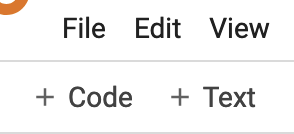

In [3]:
#@title
image = 'iVBORw0KGgoAAAANSUhEUgAAASYAAACGCAYAAABwryeAAAAMa2lDQ1BJQ0MgUHJvZmlsZQAASImVVwdYE0kbni1JSEhogQhICb0JIr1ICaFFEJAq2AhJIKHEmBBUbKgcKnh2EcWKFVH09ATkUBF7ORR7PyyoKOdhQVFU/kkBPe8vz/89z+y8+843X9uZ3R0AtHu5EkkuqgNAnjhfGh8RwhybmsYkPQUYMAMMgAIilyeTsOLiogGUgf7v8v4GQBT9VWeFrX+O/1fR4wtkPACQ8RBn8GW8PIibAcDX8yTSfACICt5qar5EgYsg1pfCACFepcBZKrxLgTNUuEmpkxjPhvgyABpULleaBYDWPcgzC3hZ0I7WZ4hdxXyRGADtYRAH8oRcPsSK2Ifl5U1W4AqI7aG+BGIYD/DJ+M5m1t/sZwza53KzBrEqL6VohIpkklzu9P+zNP9b8nLlAz5sYaMKpZHxivxhDW/lTI5SYCrEXeKMmFhFrSHuFfFVdQcApQjlkUkqfdSEJ2PD+sFnDlBXPjc0CmITiMPFuTHRaj4jUxTOgRiuFnSaKJ+TCLEhxAsFsrAEtc5m6eR4tS+0LlPKZqn5s1yp0q/C1wN5ThJLbf+NUMBR28e0CoWJKRBTILYuECXHQKwFsYssJyFKrTOyUMiOGdCRyuMV8VtDHC8QR4So7GMFmdLweLV+aZ5sIF9ss1DEiVHjA/nCxEhVfbCTPK4yfpgLdlkgZiUN2BHIxkYP5MIXhIapcseeC8RJCWo7vZL8kHjVXJwiyY1T6+OWgtwIBW8JsYesIEE9F0/Oh4tTZR/PlOTHJarixAuzuaPiVPHgy0A0YINQwARy2DLAZJANRK1d9V3wTjUSDrhACrKAADirmYEZKcoRMbwmgELwJ0QCIBucF6IcFYACyH8ZZFVXZ5CpHC1QzsgBTyHOA1EgF97LlbPEg96SwRPIiP7hnQsbD8abC5ti/N/zA+w3hgWZaDUjH/DI1B7QJIYRQ4mRxHCiA26MB+L+eDS8BsPmhvvgvgN5fNMnPCW0ER4RrhPaCbcnieZJf4hyNGiH9sPVtcj4vha4LbTpiYfgAdA6tIwzcGPgjHtAPyw8CHr2hCxbHbeiKswfbP8tg++ehlqP7EpGyUPIwWT7H2dqOWp5DlpR1Pr7+qhizRisN3tw5Ef/7O+qz4d91I+a2ELsIHYGO46dw5qwesDEjmEN2EXsiAIPrq4nytU14C1eGU8OtCP6h7+BJ6uopMy1xrXT9bNqLF8wLV+x8diTJdOloixhPpMFvw4CJkfMcxnGdHN1cwNA8a1Rvb7eMpTfEIRx/hs33xuAgOL+/v6mb1zUdgAOpsLtf+0bZ/cRvqOtADi7kSeXFqg4XHEhwLeENtxpRvBbZgXsYT5uwAv4g2AQBkaBWJAIUsFEGL0QrnMpmApmgrmgBJSBZWA1WAc2ga1gF9gLDoB60ASOg9PgArgMroO7cPV0gJegG7wHfQiCkBAaQkeMEHPEBnFC3BAfJBAJQ6KReCQVSUeyEDEiR2Yi85EyZAWyDtmCVCO/IIeR48g5pA25jTxEOpE3yCcUQ6moPmqK2qLDUR+UhUahiegENAudghaixegStAKtQvegdehx9AJ6HW1HX6I9GMA0MQZmgTljPhgbi8XSsExMis3GSrFyrAqrxRrhc76KtWNd2EeciNNxJu4MV3AknoTz8Cn4bHwxvg7fhdfhJ/Gr+EO8G/9KoBFMCE4EPwKHMJaQRZhKKCGUE3YQDhFOwb3UQXhPJBIZRDuiN9yLqcRs4gziYuIG4j5iM7GN+JjYQyKRjEhOpABSLIlLyieVkNaS9pCOka6QOki9Gpoa5hpuGuEaaRpijXka5Rq7NY5qXNF4ptFH1iHbkP3IsWQ+eTp5KXkbuZF8idxB7qPoUuwoAZRESjZlLqWCUks5RblHeaupqWmp6as5RlOkWaRZoblf86zmQ82PVD2qI5VNHU+VU5dQd1Kbqbepb2k0mi0tmJZGy6ctoVXTTtAe0Hq16FouWhwtvtYcrUqtOq0rWq+0ydo22iztidqF2uXaB7UvaXfpkHVsddg6XJ3ZOpU6h3Vu6vTo0nVH6Mbq5uku1t2te073uR5Jz1YvTI+vV6y3Ve+E3mM6Rreis+k8+nz6Nvopeoc+Ud9On6OfrV+mv1e/Vb/bQM/AwyDZYJpBpcERg3YGxrBlcBi5jKWMA4wbjE9DTIewhgiGLBpSO+TKkA+GQw2DDQWGpYb7DK8bfjJiGoUZ5RgtN6o3um+MGzsajzGearzR+JRx11D9of5DeUNLhx4YescENXE0iTeZYbLV5KJJj6mZaYSpxHSt6QnTLjOGWbBZttkqs6NmneZ080Bzkfkq82PmL5gGTBYzl1nBPMnstjCxiLSQW2yxaLXos7SzTLKcZ7nP8r4VxcrHKtNqlVWLVbe1ufVo65nWNdZ3bMg2PjZCmzU2Z2w+2NrZptgusK23fW5naMexK7SrsbtnT7MPsp9iX2V/zYHo4OOQ47DB4bIj6ujpKHSsdLzkhDp5OYmcNji1DSMM8x0mHlY17KYz1ZnlXOBc4/zQheES7TLPpd7l1XDr4WnDlw8/M/yrq6drrus217sj9EaMGjFvROOIN26Objy3Srdr7jT3cPc57g3urz2cPAQeGz1uedI9R3su8Gzx/OLl7SX1qvXq9Lb2Tvde733TR98nzmexz1lfgm+I7xzfJt+Pfl5++X4H/P7yd/bP8d/t/3yk3UjByG0jHwdYBnADtgS0BzID0wM3B7YHWQRxg6qCHgVbBfODdwQ/Yzmwsll7WK9CXEOkIYdCPrD92LPYzaFYaERoaWhrmF5YUti6sAfhluFZ4TXh3RGeETMimiMJkVGRyyNvckw5PE41p3uU96hZo05GUaMSotZFPYp2jJZGN45GR48avXL0vRibGHFMfSyI5cSujL0fZxc3Je63McQxcWMqxzyNHxE/M/5MAj1hUsLuhPeJIYlLE+8m2SfJk1qStZPHJ1cnf0gJTVmR0j52+NhZYy+kGqeKUhvSSGnJaTvSesaFjVs9rmO85/iS8Tcm2E2YNuHcROOJuROPTNKexJ10MJ2QnpK+O/0zN5Zbxe3J4GSsz+jmsXlreC/5wfxV/E5BgGCF4FlmQOaKzOdZAVkrszqFQcJyYZeILVonep0dmb0p+0NObM7OnP7clNx9eRp56XmHxXriHPHJyWaTp01ukzhJSiTtU/ymrJ7SLY2S7pAhsgmyhnx9+FN/UW4v/0n+sCCwoLKgd2ry1IPTdKeJp12c7jh90fRnheGF22fgM3gzWmZazJw78+Es1qwts5HZGbNb5ljNKZ7TURRRtGsuZW7O3N/nuc5bMe/d/JT5jcWmxUXFj3+K+KmmRKtEWnJzgf+CTQvxhaKFrYvcF61d9LWUX3q+zLWsvOzzYt7i8z+P+Lni5/4lmUtal3ot3biMuEy87MbyoOW7VuiuKFzxeOXolXWrmKtKV71bPWn1uXKP8k1rKGvka9oroisa1lqvXbb28zrhuuuVIZX71pusX7T+wwb+hisbgzfWbjLdVLbp02bR5ltbIrbUVdlWlW8lbi3Y+nRb8rYz2322V+8w3lG248tO8c72XfG7TlZ7V1fvNtm9tAatkdd07hm/5/Le0L0Ntc61W/Yx9pXtB/vl+1/8kv7LjQNRB1oO+hys/dXm1/WH6IdK65C66XXd9cL69obUhrbDow63NPo3HvrN5bedTRZNlUcMjiw9SjlafLT/WOGxnmZJc9fxrOOPWya13D0x9sS1k2NOtp6KOnX2dPjpE2dYZ46dDTjbdM7v3OHzPufrL3hdqLvoefHQ756/H2r1aq275H2p4bLv5ca2kW1HrwRdOX419Orpa5xrF67HXG+7kXTj1s3xN9tv8W89v517+/Wdgjt9d4vuEe6V3te5X/7A5EHVHw5/7Gv3aj/yMPThxUcJj+4+5j1++UT25HNH8VPa0/Jn5s+qn7s9b+oM77z8YtyLjpeSl31dJX/q/rn+lf2rX/8K/uti99jujtfS1/1vFr81ervznce7lp64ngfv8973fSjtNerd9dHn45lPKZ+e9U39TPpc8cXhS+PXqK/3+vP6+yVcKVf5K4DBhmZmAvBmJwA0+O9Ah+c2yjjVWVApiOr8qkTgP2HVeVEpXgDUwk7xG89uBmA/bLZFyqMKUPzCJwYD1N19sKlFlunuprJFhSchQm9//1tTAEiNAHyR9vf3bejv/7INBnsbgOYpqjOoQojwzLA5VIFur5xQBH4Q1fn0uxx/7IEiAg/wY/8vxa2Powu4lUMAAACKZVhJZk1NACoAAAAIAAQBGgAFAAAAAQAAAD4BGwAFAAAAAQAAAEYBKAADAAAAAQACAACHaQAEAAAAAQAAAE4AAAAAAAAAkAAAAAEAAACQAAAAAQADkoYABwAAABIAAAB4oAIABAAAAAEAAAEmoAMABAAAAAEAAACGAAAAAEFTQ0lJAAAAU2NyZWVuc2hvdP1jvtgAAAAJcEhZcwAAFiUAABYlAUlSJPAAAAHWaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA2LjAuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAgPGV4aWY6UGl4ZWxZRGltZW5zaW9uPjEzNDwvZXhpZjpQaXhlbFlEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWERpbWVuc2lvbj4yOTQ8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4K3QvIugAAABxpRE9UAAAAAgAAAAAAAABDAAAAKAAAAEMAAABDAAAPQUve+fcAAA8NSURBVHgB7F0JcFRFGv4nB0kgIZGEBMICsiBgAAmXcriAYAGi6IJyFHIsUAJyCQUCLpRKoVVyiShXCehaWlogoIV4AJ6lAkLJKTdCshwrp1gcUQRm++vd7uoZJm/eXJnHzP9XJa/f63493V/3fP3333/3uNxCKAi5UrSFji8eGtCbyTmVqdaEDQG9w4kZAUYg/hBwBUNM5zf+i86ufZXoxo2AEMv9+3jKatk/oHc4MSPACMQfAq7/rJ7szu0ymRLSMv3W/uq5Ijq16p9UcmSv37TeCZKzc+j28evIlZDoHcX3jAAjwAh4IOA6MKmxO6F8GqUX/I1SazSmlCoFlJyVT0kV8+jq+X/TtQsn6PfjO6mkeDtd3vODx8uB3OT/Yw6l1+8YyCuclhFgBOIUAUlMka57emFbyu8jpn4sjAAjwAjYQCDixJRQvjz9deI6SkjNsFEcTsIIMAKMAFFEicmVmEh/GbaE0mo0ZawZAUaAEbCNQOSIyeWiasKuVKFeB9uF4YSMACPACACBiBFTXs8plNmsJ6PMCDACjEDACISdmBKSk6hq/9lUoW77gAvDLzACjAAjAATCSkzJlbKpar95lJrfkNFlBBgBRiBoBMJGTJmtulFu1ynkSk4NujD8IiPACDACQCBkYkovbE/Z7YZSStUCRpQRYAQYgbAgEBQxYTNuRpOulNWsFyVlVQtLQTgTRoARYAQUAq4rxdvcJUU/yC0nvxfvoeuXLqk4SqxQgRLTK1JiRg6Vy6tDKbm1KbV6IduQNEIcYAQYgUggENTpApEoCOfJCDACjIBCgIlJIRHm6+bNm+nMmTPkEo6mDzzwACUKL3iWmxE4ceIEbdu2TUY0btyYatSocXMifhJ3CMQ9Me3Zs4cuX75su+ErVqxI9evXl+kviWnv6tWrKT09nbp160bJyck6n44dO9LRo0fl/Y8//ki33XabjruVAoHik5SURE2b2t+C9MYbb9ALL7wgIXn66afpySef1PCAtD788EOZX6tWrfRzpwVOnTpFxcXFslho5zvuuMNWEc+dO0c///yzTJuRkUF33nmnDIOov//+e+ratSvVrl3bVl6xlijuialZs2b066+/2m7X/Px8+u6772T6SZMm0fvvvy/DU6dOpcGDB+t8YoWYAsUHABw5ckTj4C9gRUytW7emX375RWbx2WefUd26df1lF5X49957j6ZMmSI/u4Kwy+7cuZMSEhL8lgVEvGrVKpmusLBQDnIgqxYtWshnKSkp9NNPP8Wlts3EFAIxjR49mj7++GPZiTDSo6MpYWJSSFhfrYjJJMV3332XWrZsqTODtjpkyBB536hRI8LAEC2Bxo0yKHnnnXcIpGol169fp4YNG9Iff/whk82aNYseffRROnnyJN1777361X379hEIKt6Eickgprlz51LlypUt+wBUbtUJDx8+TPPmzSOMkhMmTKCcnBz9biwSkx18YEu75557NA7+AlbE9PXXX9Obb75JTZo0oaeeekra61R+p0+f1kRVr149+vTTT1VUVK5Dhw6lzz//XH72I488QsDKSlA3pWFj+gstKy0tTb6ybNkyQnyvXr2kicAqn1iNY2IyiGnTpk2Ul5cXlraORWIKJz4KZCtiUml8XZ1GTN988w0NGjRIFtXOFGzkyJGaTB966CF69VU+SNFsZyamEIjpypUr2j6Vm5sblPEbeezevVsaT6GtNWjQgJCXU8ScToVCTDfED1ccOHBA2kyqVKkitc6srCyyIqbz589TSUmJ1JRg24OoZzA4P/bYY/JZ9erVCVM9CIzP5cXhhGUtqB9WFdVCytKlS6lDB99H/ly9elVO465duyaLCRuVqWXCroapXmpqKmVnZ5daFbt9R2GGjIAjVoq9BVNI/GAS2gQzAG+5cOGCrhsGb2h5ERX8Sko8i1hBcteqVUv+iQ4REBTPP/+8fvejjz7yeFd0Sh0nOoZHnLp5+eWX3WIFR6dT5RCd1C1Ww1SyqF5DwUcVfPny5T7rOWDAALeY8uj6L1y4UL0ir74wbN++vU6v8DKv06dP98ijLG/M/jB8+PBSP/qTTz7RdQC+pgibk44TK5FmlEc4kL7TvXt3nefevXs98sGNWBnU8WPGjLkpHg+E/Uun2bVrl8804XzIGlMIGtO0adPorbfekgMHbE1wGVDibyo3c+ZMWrx4sUru87po0SLq3Lmzz7iyehiqxvTSSy/R66+/bqu43u4CvjC877779NK8r0xht4mWIfzQoUO6vaBRYEWtXLlyNxUTZYQNCSIIjCZOnCjD+AdtSrmjQLPcuHGjjlOBQPuOIHyaPXu2fB2fhc80Zf78+SSITj7CNFSQl4dWBe0NrgzQ8HzFm3mFLRxOlrsV8wpFIzBHyDVr1nhU39dorxJAg1CjvOiE7pUrV7qFKu0WHdktVpp03F133eUWHVW9FpVrKPjs379f1wX17du3r/uLL75w79ixwy1I123mjXg7GpPwbXIfPHjQLfx8dN5t2rSRz/C8NO20rMAzNbq1a9fe9LFiqqfLjToL/yePNP40pmD6DnBR/U1Mfz0+Dzdi8NPxSLd161aPNMIPT8dbaYIeL4V4wxqToTFhVLFalYPjHEYxJcFoTMePH6e2bduqLOirr76imjVr6nsEBg4cSN9++6185u0f5ZGwDG5MjQm+Nr7sD6oYgmho3Lhx6tajHtD8MHKb9o1jx45JJ0Jll7GjManMnWb8VuUybWbt2rWTq4oqDlf4LSm3Emghyt1EpbHSmELpO7B/Xbx4UdqG4IKgdiKcPXuW7r77bvXx8or+99xzz+lnmA3gD4LVRqw6RlxCJLZb/nXvUVuNLL6uQuX1qG8wGpNoYD36lGYPgR1AfT7sMNGUQPARHVYXFZqeqgOu0HR8yZIlS3Q6OxqTykMYv/V7Xbp0UY+jfoXGZtYbGpIpffr00fHC38mMkmErjSmUviPcWfTnbtmyRX/u22+/rZ9DQ0fZmzdvruMRMG1UwgjuERepG9aYDI3J3ygwfvx4wjKvkmA0ph49epCYysgsYEPyHq0QgTm9eo4VJyxFR0tMjQmrhVbOftg2ApsSBN7f999/vwxjpVEsDsiw9z9Tw4gFjQn169evn7YNKcdJPMfKFrRKJViN9dZArTSmUPqOmELTE088IT/atGv17t2bxNRNrtb179+fZsyYIdOsX7+e6tSpI/uisi+Vpb8YE5NBTDBGW03lMOWqVKmS6lcUDDGZ2yx0RhYBGFGFjcAiRWSjTGIKxF0AU1TlmS00GjmN81XSWCSmdevW6T1/2F4i7EKy6vAIf/bZZ2UYrgRwKfAWK2IKpe/A7QIDBEQRDNwN4H0OGTZsGIGYlNc5HFrxh32ePXv2lGnUM3kT4X9MTAYxBfLFQ7sEQ0zwGlc2FbttG8jeM7t52k0XLDEJg75ebULHViOx9+fGIjFh9QrtrLabbN++nTIzM+nhhx+WK3XAAPUWhnJvOCxX5ULtO/D7Uic5YMXwyy+/JOEeIMsAjRbEpVY9sXl4w4YN0qb02muvyTTCzUGvGN5U8DA/YGIqY2LCiARnNgh21WOLi5VAY8KxKdGSYIkJu+MxAkMefPBBUp3bux6xSEyoo7nBW9gSqVOnTtqJEtO30jb6WmlMofYdbHV58cUXZRNAW8MGdGh36IMoD+SVV17RXug4ugdbbYTfkkcamTDS/yJlvLpV8jWNu6E4WNp1FxDbFrSx0XtZ1omYBYuPWHHT9RTHd5RaNfFl0eliwfitKgonRGUEx6KA8OXS91g0KU2sjN+h9h24JqgyPfPMM9rpFWElYv+nTiPIS4fHjh2rkpTJFW7ocS3BfvEAWjCrcsI4rBt7xIgRpWIvpgNuYQMoNb6sIoLFB+VXXwJci4qKfBZZjNA6XSwREyoLz22FgYkj/IpKEytiCkffwa4CVSZ1FU6cHsVRacxdCeLYGY80kb5hYgrTlhS7GhO+oKpD4OqrwbHEjCVadGZfWwgi3SnM/M0vVKAapblEjWVyuBCYYjruAYtAiEmcoaVxFAZcM1vHhMX0VZdRtTkcMK3EipjC0XeEX5xHmUA+GERMEdM9jzQou7fbg5k+EmG2MZWxjQlTc+8tBVgGxmmFcHqDoXTFihX6gDRsc1HObZGe1vvK37QxwfEORlx/ArsENtJiM6p5LhEMqsIvS8YJXxr64IMP5DYHlV8g7gJ4BwfHwdAMefzxx6XhFi4NaqVJRkTxHzYae5+86c9h1srGhKqE2nfguIt2VALHV7itmALDOAz1StQhduq+LK5MTFEgJnQ+MY2TqyJWjYzjMOBpq7x0rdJGKs4kJrufgc5frdr/ftYLJDt58mRbrwZKTMAQJ1uaIjRNmjNnjvkoqmHT9wgF8XfMsj9iCrXvgMgLCgo0oWOfHAZFbzHbXdigtA+Ud7pI3cc9MeFURGxvgGAUNw978wc6VtWwqgRZsGCBx+oZfHeU/5FaLvbOD0u0WCVRn6/ioVnA7X/UqFHqUdSuJj52C4GNp+bWHbhhYKuKWU+sNuIgNIzYagTHShb8aZT4wxD5QQNTOOM9pxETzoTHIYIQsaePhKe1DJf2788//5R+Rog3j3H2Th9K3zEdQKEd+TomBv5W8LuC+No25V2ecN/HPTGFG9Bg8oO/C75cOCcazm/40sai/Pbbb4RTP+HEGq5fQxH2DcKeO0ybcBYTnGDNH4WIRRzNOsVq32FiMluZw4wAI+AIBJiYHNEMXAhGgBEwEWBiMtHgMCPACDgCASYmRzQDF4IRYARMBJiYTDQ4zAgwAo5AgInJEc3AhWAEGAETASYmEw0OMwKMgCMQYGJyRDNwIRgBRsBEgInJRIPDjAAj4AgEmJgc0QxcCEaAETARYGIy0eAwI8AIOAIBJiZHNAMXghFgBEwEmJhMNDjMCDACjkCAickRzcCFYAQYARMBJiYTDQ4zAoyAIxBgYnJEM3AhGAFGwESAiclEg8OMACPgCASYmBzRDFwIRoARMBFgYjLR4DAjwAg4AgEmJkc0AxeCEWAETASYmEw0OMwIMAKOQMCFnyt2REm4EIwAI8AI/B8BJibuCowAI+A4BHgq57gm4QIxAowAExP3AUaAEXAcAkxMjmsSLhAjwAgwMXEfYAQYAcchwMTkuCbhAjECjMB/AQAA//+4pI7vAAAMuUlEQVTtXQWMFEkXfosGDcGDk+Ce4JBwuAcJDsHdXXJH0ODuTpDAHW4B7nALEoK7BAseCM4Fvbuv/r86TW/P7sxQO9sD30vY7q6urq7+3puvX7161UT8858IhQgQASLgIQQiSEwe0ga7QgSIgEKAxERDIAJEwHMIkJg8pxJ2iAgQARITbYAIEAHPIUBi8pxK2CEiQARITLQBIkAEPIcAiclzKmGHiAARIDHRBogAEfAcAiQmz6mEHSICRIDERBsgAkTAcwiQmDynEnaICBABEhNtgAgQAc8hQGLynErYISJABEhMtAEiQAQ8hwCJyXMqYYeIABEgMdEGiAAR8BwCJCbPqYQdIgJEgMT0A9jAmTNn5N69e+pJKleuLEmSJPkBnoqP8DMjQGLyU/ufP3+WEydOyJ07d+TRo0eSJk0ayZkzp+TOnVtSpUrlZysxU61z585y8+ZN1fjUqVOlcOHCMXOjn7zVa9euyYsXL4JCIV68eFKsWLGgrv0ZLyIxRaP1L1++yJw5c2THjh3y6dMn19qlS5eWwYMHS7JkyVzPx3QhiSmmEf5f+82bN5cnT54EfbO9e/cGfe3PdmFYEROGK7///rvSUbNmzSRLliwxqq+3b99K9+7d5f79+9HeJ27cuLJ06VLJlClTtHVNVyAxiRrKxrRthCsxLVu2TA4ePKjMDi/QPHnymDZB4+2FFTFdvXpVJk6cqEAYNGhQjANs/8HjpmXLlpUqVapIwYIF5eXLl3LkyBFZsWKFwKuCpE6dWlavXi0gqVCKvZ8/61AuFLZx+fJlef78eSTVHjhwQPAPgpdlu3bt1L79D4Zy8KxjQwYOHCinT59Wtx42bJj88ssvsdGNgO5JYvIB1/bt2wU/ci19+/aV2rVr60Nr+/jxY2nZsqV8/fpVlWG/TZs21vlQ7JCYREJBTL50uXbtWlmwYIE6Xbx4cRk/fryvqrFSTmKKYdhDaXxNmjSRZ8+eqScqV66cDB8+3OfTLVmyRHlKqJA1a1Y1pHOrjP/C78KFCyqA/vHjR8mXL5/kypVL8Db1Rz58+CCYgbt7964KvOfPn18SJkwo/hLT+/fv5dy5c2rYA++uQIECki5dOn9u7fk6obQNJxjBEpO/+vj7778tTw22kj59emcXBLb14MEDqxz61fY7ZswYuX79ujoHWylTpozEiRNHMmTIYNX32g49JheNPH36VBDD0oLhWVQ/YBhEq1atVHUo/K+//lKK19dju2XLFlm0aJHAyJxSokQJGTFihCIZ5zkcY6gIF/z48eORTtesWVMZXXSzctOmTVMBfO3Z6YYSJ04s48aNUySly8JxG27EFIg+jh07JkOHDrXUMmPGjEj6WrVqlfVChA2CgObNm2dd47YDO/X3peh2fUyWkZhc0N26datA+RAQEogpOsHM3bt37xQh9ezZ8xuS2bVrl0yYMCHKJpB7NHv27EgBfXhWiFkgRcEfcYsxIS4HI4xKBgwYIDVq1IiqiqfPhRMxBaMP+3AM6Slr1qyRiIgIpRPEOxs3bmzFOvXEUHQ2R2IyZNKhMr7Fixdbs38IdE+fPj3oJ0DQEUalpVSpUtKwYUOV+3Ty5EnlRek0hIwZM6pguq6LrX2YiOPy5curADy8qMOHD8vu3btRbImTmGDACxcuVOcRlO/UqZMKwiIfB29UYApJkCCB8uqwDUcJlW24YRPIUC5YfWCGuFGjRoIXFaRjx47StGlTtW8nrbRp06oXKeoh5w4yefJkuXXrltpv3bq1lCxZUk3Q5MiRQ5V58Y/nPCakBLgNdwCev+kCiRIliuR5BAI+hjZ79uxRl1StWlXlKAVyva6LYROGWpp4QEhdu3bVp9X24cOHyiPSdTCdi3tCEFOqW7eudT08pxYtWqhz+g/eenqmEmV2YgJebdu21VUFhJs9e3brGDv2+BSmw9u3b//NeS8deME23PDwl5i+Vx/Igxo7dqzqAl4y69evV8N42IwWNx3biYuzchqpALdwP5Fh+z2CbGy7sgJta+TIkXLo0CF1GYLg8DKCEbSBtiAIUm/bts01lQB5JitXrlT1MmfOLDiGIPdk1KhRah9ki+u1+64K//8Hb0/9RrQT08yZM5UXhGoVKlT4Jk6hr7906ZL06tVLHeINqmeX9Hkvbb1gG254+EtMJvSB2eHz58+rbmAGEL+V169fq2N4VF26dInURRJTJEgCL/CC8dmJyZey/XkyPAviSxB4Tv3793e9DG63ju+AwJBlDlm+fLk1tKtWrZogd8tN7F6PnZgQkNczNYghIcjuFHh1ekiQPHly2bRpk7OKZ469YBtuYPhLTCb0ARJCPEl72Lo/iDv98ccfkSZdcJ7EpFH6ji3cXUyjugnOAXwIfky+Mr8x0+TrnFu7zjL7m61ixYry22+/Oav4dQwiOnv2rKqLIRyGcr4ExIWhG2Tnzp0q5jN69GgrcQ9DLAy13MQXMdWpU0cF5N2ucSvDbI4zZuVWL7bKvGAbbs/uLzGZ0ofbZAo8XV8xIxKTm9YMloUqwGmflUOu0axZs4J6CpCRzh/59ddfpVKlSj7badCggcomRwVkkyMQbic2XwmeqO+LmKpXrx7pzYr6UUm4rucKlW24YecvMZnSBxaU40WmVxxEN3NMYnLTmsGyUBnfxYsXpXfv3qrnKVOmlHXr1kX7FBgqIWiPGNCkSZMEMSH7kLBHjx5Sv359n+3YjRbEiPQBZBBrDwZxLsS73MQXMdWrV0/evHmjLkHgPGnSpG6XW2XIaalVq5Z1HE47obINN0z8JSZT+pgyZYo13Nf9iSrdg8SkUYqhbaiMD/lIcLu1zJ07V33eRB87twhAduvWTRXHjx9f/vzzT7WPgLYOZCOGBONxE0wFY/YNYh9OIX8K6QKQqGYHfRGT3WPDTKNbjEk1/gP8CZVtuEHlLzGZ0AfW6yFPzimYpUM/UqRI4TzFGFMkRAwXhNL4+vTpo5aP4BEKFSokyNT1JXbPxp73hO83YQgHQX4QZtXcMm2RWKmDztmyZbPIyH59VLN69qCqPfhtD77b++V8DgwNEEyFlxeuEkrbcGLkLzF9rz6gJ0zG6Fk4xCyR8a/jmHnz5lVJus7+0WNyImL4OJTGZ19mgsfAEKdfv36RnghJkkOGDLHKnbEkzKDoFeluU/Y3btxQn1bR8QLcQw+nsP4JnhQ8OAgWESPWZBd7MijK7cR0+/Zt6dChg1Xdzd1H23iTY10VhqBYfxeOEkrbcOLjLzF9rz7sQzh8+2vDhg2KpDDE1/bjpmPYJF5yECRY6uVTzufw0rHnEiyjAifUxofFj/v27bO6hG8t4dMV8Grw1jp69KjlVaGS28pyLLq1D+Ewc4JhIqbmEcvauHGj9WUCt8XCWGOHWUIt+JYOPluBFAMYG1x7u9iJCeXO5Q/4iiI+3QLPDX3bv3+/RXxFihQRGH84Sqhtw46Rv8SEa4LVhz3fDO3A+9JfxMRMNdZhQtyGdFguBTuDYMYaX8BADBMpKG4evKoYy3/CipgwXRzTHwNz6gPLNpBhG50gPWH+/PnfrJHT19hjTbrMuQXhYEjnTKCE14Rk0VOnTjkvcT12EhNSEOCF4YcblYCU8KOBYYejxIZtaJwCIaZg9OEcwhUtWvSbbH/0A+vjsPgc4hzSIfkWSbhOAaHhE9FelLAiptgCEJ4JUgbwWVXn6nwEGxH4jioVAP2+cuWKyuLWxqOfBUSAazFEi2qdGkhv8+bN30z/I9AOtxxf2NSLdN1WnuNe8Lww7HPmiGHWER4YZg0pwSGAIRUmSCBYCwlPOzoJRB/whnT+nptHhHvZJ2BwjBUD+LChFqSgIGHXLiQmOxphvo83M1b6Y7EkvKRAPQzEAhCwfPXqlWoDw8NA3GnEvrC+Dmve8M2dQAVvbHhP6De8tEDuHei9WD96BEKpD8QTkVcHG0Q4Ihj7if6JzNSgx2QGR7ZCBIiAQQRITAbBZFNEgAiYQYDEZAZHtkIEiIBBBEhMBsFkU0SACJhBgMRkBke2QgSIgEEESEwGwWRTRIAImEGAxGQGR7ZCBIiAQQRITAbBZFNEgAiYQYDEZAZHtkIEiIBBBEhMBsFkU0SACJhBgMRkBke2QgSIgEEESEwGwWRTRIAImEGAxGQGR7ZCBIiAQQRITAbBZFNEgAiYQYDEZAZHtkIEiIBBBEhMBsFkU0SACJhBgMRkBke2QgSIgEEESEwGwWRTRIAImEGAxGQGR7ZCBIiAQQRITAbBZFNEgAiYQYDEZAZHtkIEiIBBBEhMBsFkU0SACJhBgMRkBke2QgSIgEEESEwGwWRTRIAImEEg4r//AO8fM02xFSJABIiAGQRITGZwZCtEgAgYROBfsfHeAWSAagQAAAAASUVORK5CYII='
display.Image(b64decode(image))

#### To delete a cell

In the right portion of the cell, a menu pops up and to delete the cell, click on a trash can.

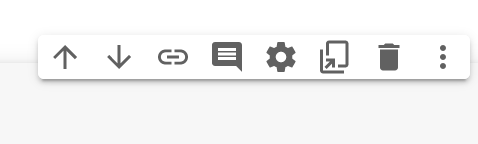

In [4]:
#@title
image = 'iVBORw0KGgoAAAANSUhEUgAAAd4AAACQCAYAAACmuwprAAAMa2lDQ1BJQ0MgUHJvZmlsZQAASImVVwdYE0kbni1JSEhogQhICb0JIr1ICaFFEJAq2AhJIKHEmBBUbKgcKnh2EcWKFVH09ATkUBF7ORR7PyyoKOdhQVFU/kkBPe8vz/89z+y8+843X9uZ3R0AtHu5EkkuqgNAnjhfGh8RwhybmsYkPQUYMAMMgAIilyeTsOLiogGUgf7v8v4GQBT9VWeFrX+O/1fR4wtkPACQ8RBn8GW8PIibAcDX8yTSfACICt5qar5EgYsg1pfCACFepcBZKrxLgTNUuEmpkxjPhvgyABpULleaBYDWPcgzC3hZ0I7WZ4hdxXyRGADtYRAH8oRcPsSK2Ifl5U1W4AqI7aG+BGIYD/DJ+M5m1t/sZwza53KzBrEqL6VohIpkklzu9P+zNP9b8nLlAz5sYaMKpZHxivxhDW/lTI5SYCrEXeKMmFhFrSHuFfFVdQcApQjlkUkqfdSEJ2PD+sFnDlBXPjc0CmITiMPFuTHRaj4jUxTOgRiuFnSaKJ+TCLEhxAsFsrAEtc5m6eR4tS+0LlPKZqn5s1yp0q/C1wN5ThJLbf+NUMBR28e0CoWJKRBTILYuECXHQKwFsYssJyFKrTOyUMiOGdCRyuMV8VtDHC8QR4So7GMFmdLweLV+aZ5sIF9ss1DEiVHjA/nCxEhVfbCTPK4yfpgLdlkgZiUN2BHIxkYP5MIXhIapcseeC8RJCWo7vZL8kHjVXJwiyY1T6+OWgtwIBW8JsYesIEE9F0/Oh4tTZR/PlOTHJarixAuzuaPiVPHgy0A0YINQwARy2DLAZJANRK1d9V3wTjUSDrhACrKAADirmYEZKcoRMbwmgELwJ0QCIBucF6IcFYACyH8ZZFVXZ5CpHC1QzsgBTyHOA1EgF97LlbPEg96SwRPIiP7hnQsbD8abC5ti/N/zA+w3hgWZaDUjH/DI1B7QJIYRQ4mRxHCiA26MB+L+eDS8BsPmhvvgvgN5fNMnPCW0ER4RrhPaCbcnieZJf4hyNGiH9sPVtcj4vha4LbTpiYfgAdA6tIwzcGPgjHtAPyw8CHr2hCxbHbeiKswfbP8tg++ehlqP7EpGyUPIwWT7H2dqOWp5DlpR1Pr7+qhizRisN3tw5Ef/7O+qz4d91I+a2ELsIHYGO46dw5qwesDEjmEN2EXsiAIPrq4nytU14C1eGU8OtCP6h7+BJ6uopMy1xrXT9bNqLF8wLV+x8diTJdOloixhPpMFvw4CJkfMcxnGdHN1cwNA8a1Rvb7eMpTfEIRx/hs33xuAgOL+/v6mb1zUdgAOpsLtf+0bZ/cRvqOtADi7kSeXFqg4XHEhwLeENtxpRvBbZgXsYT5uwAv4g2AQBkaBWJAIUsFEGL0QrnMpmApmgrmgBJSBZWA1WAc2ga1gF9gLDoB60ASOg9PgArgMroO7cPV0gJegG7wHfQiCkBAaQkeMEHPEBnFC3BAfJBAJQ6KReCQVSUeyEDEiR2Yi85EyZAWyDtmCVCO/IIeR48g5pA25jTxEOpE3yCcUQ6moPmqK2qLDUR+UhUahiegENAudghaixegStAKtQvegdehx9AJ6HW1HX6I9GMA0MQZmgTljPhgbi8XSsExMis3GSrFyrAqrxRrhc76KtWNd2EeciNNxJu4MV3AknoTz8Cn4bHwxvg7fhdfhJ/Gr+EO8G/9KoBFMCE4EPwKHMJaQRZhKKCGUE3YQDhFOwb3UQXhPJBIZRDuiN9yLqcRs4gziYuIG4j5iM7GN+JjYQyKRjEhOpABSLIlLyieVkNaS9pCOka6QOki9Gpoa5hpuGuEaaRpijXka5Rq7NY5qXNF4ptFH1iHbkP3IsWQ+eTp5KXkbuZF8idxB7qPoUuwoAZRESjZlLqWCUks5RblHeaupqWmp6as5RlOkWaRZoblf86zmQ82PVD2qI5VNHU+VU5dQd1Kbqbepb2k0mi0tmJZGy6ctoVXTTtAe0Hq16FouWhwtvtYcrUqtOq0rWq+0ydo22iztidqF2uXaB7UvaXfpkHVsddg6XJ3ZOpU6h3Vu6vTo0nVH6Mbq5uku1t2te073uR5Jz1YvTI+vV6y3Ve+E3mM6Rreis+k8+nz6Nvopeoc+Ud9On6OfrV+mv1e/Vb/bQM/AwyDZYJpBpcERg3YGxrBlcBi5jKWMA4wbjE9DTIewhgiGLBpSO+TKkA+GQw2DDQWGpYb7DK8bfjJiGoUZ5RgtN6o3um+MGzsajzGearzR+JRx11D9of5DeUNLhx4YescENXE0iTeZYbLV5KJJj6mZaYSpxHSt6QnTLjOGWbBZttkqs6NmneZ080Bzkfkq82PmL5gGTBYzl1nBPMnstjCxiLSQW2yxaLXos7SzTLKcZ7nP8r4VxcrHKtNqlVWLVbe1ufVo65nWNdZ3bMg2PjZCmzU2Z2w+2NrZptgusK23fW5naMexK7SrsbtnT7MPsp9iX2V/zYHo4OOQ47DB4bIj6ujpKHSsdLzkhDp5OYmcNji1DSMM8x0mHlY17KYz1ZnlXOBc4/zQheES7TLPpd7l1XDr4WnDlw8/M/yrq6drrus217sj9EaMGjFvROOIN26Objy3Srdr7jT3cPc57g3urz2cPAQeGz1uedI9R3su8Gzx/OLl7SX1qvXq9Lb2Tvde733TR98nzmexz1lfgm+I7xzfJt+Pfl5++X4H/P7yd/bP8d/t/3yk3UjByG0jHwdYBnADtgS0BzID0wM3B7YHWQRxg6qCHgVbBfODdwQ/Yzmwsll7WK9CXEOkIYdCPrD92LPYzaFYaERoaWhrmF5YUti6sAfhluFZ4TXh3RGeETMimiMJkVGRyyNvckw5PE41p3uU96hZo05GUaMSotZFPYp2jJZGN45GR48avXL0vRibGHFMfSyI5cSujL0fZxc3Je63McQxcWMqxzyNHxE/M/5MAj1hUsLuhPeJIYlLE+8m2SfJk1qStZPHJ1cnf0gJTVmR0j52+NhZYy+kGqeKUhvSSGnJaTvSesaFjVs9rmO85/iS8Tcm2E2YNuHcROOJuROPTNKexJ10MJ2QnpK+O/0zN5Zbxe3J4GSsz+jmsXlreC/5wfxV/E5BgGCF4FlmQOaKzOdZAVkrszqFQcJyYZeILVonep0dmb0p+0NObM7OnP7clNx9eRp56XmHxXriHPHJyWaTp01ukzhJSiTtU/ymrJ7SLY2S7pAhsgmyhnx9+FN/UW4v/0n+sCCwoLKgd2ry1IPTdKeJp12c7jh90fRnheGF22fgM3gzWmZazJw78+Es1qwts5HZGbNb5ljNKZ7TURRRtGsuZW7O3N/nuc5bMe/d/JT5jcWmxUXFj3+K+KmmRKtEWnJzgf+CTQvxhaKFrYvcF61d9LWUX3q+zLWsvOzzYt7i8z+P+Lni5/4lmUtal3ot3biMuEy87MbyoOW7VuiuKFzxeOXolXWrmKtKV71bPWn1uXKP8k1rKGvka9oroisa1lqvXbb28zrhuuuVIZX71pusX7T+wwb+hisbgzfWbjLdVLbp02bR5ltbIrbUVdlWlW8lbi3Y+nRb8rYz2322V+8w3lG248tO8c72XfG7TlZ7V1fvNtm9tAatkdd07hm/5/Le0L0Ntc61W/Yx9pXtB/vl+1/8kv7LjQNRB1oO+hys/dXm1/WH6IdK65C66XXd9cL69obUhrbDow63NPo3HvrN5bedTRZNlUcMjiw9SjlafLT/WOGxnmZJc9fxrOOPWya13D0x9sS1k2NOtp6KOnX2dPjpE2dYZ46dDTjbdM7v3OHzPufrL3hdqLvoefHQ756/H2r1aq275H2p4bLv5ca2kW1HrwRdOX419Orpa5xrF67HXG+7kXTj1s3xN9tv8W89v517+/Wdgjt9d4vuEe6V3te5X/7A5EHVHw5/7Gv3aj/yMPThxUcJj+4+5j1++UT25HNH8VPa0/Jn5s+qn7s9b+oM77z8YtyLjpeSl31dJX/q/rn+lf2rX/8K/uti99jujtfS1/1vFr81ervznce7lp64ngfv8973fSjtNerd9dHn45lPKZ+e9U39TPpc8cXhS+PXqK/3+vP6+yVcKVf5K4DBhmZmAvBmJwA0+O9Ah+c2yjjVWVApiOr8qkTgP2HVeVEpXgDUwk7xG89uBmA/bLZFyqMKUPzCJwYD1N19sKlFlunuprJFhSchQm9//1tTAEiNAHyR9vf3bejv/7INBnsbgOYpqjOoQojwzLA5VIFur5xQBH4Q1fn0uxx/7IEiAg/wY/8vxa2Powu4lUMAAACKZVhJZk1NACoAAAAIAAQBGgAFAAAAAQAAAD4BGwAFAAAAAQAAAEYBKAADAAAAAQACAACHaQAEAAAAAQAAAE4AAAAAAAAAkAAAAAEAAACQAAAAAQADkoYABwAAABIAAAB4oAIABAAAAAEAAAHeoAMABAAAAAEAAACQAAAAAEFTQ0lJAAAAU2NyZWVuc2hvdP1JGMAAAAAJcEhZcwAAFiUAABYlAUlSJPAAAAHWaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA2LjAuMCI+CiAgIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICAgIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiCiAgICAgICAgICAgIHhtbG5zOmV4aWY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vZXhpZi8xLjAvIj4KICAgICAgICAgPGV4aWY6UGl4ZWxZRGltZW5zaW9uPjE0NDwvZXhpZjpQaXhlbFlEaW1lbnNpb24+CiAgICAgICAgIDxleGlmOlBpeGVsWERpbWVuc2lvbj40Nzg8L2V4aWY6UGl4ZWxYRGltZW5zaW9uPgogICAgICAgICA8ZXhpZjpVc2VyQ29tbWVudD5TY3JlZW5zaG90PC9leGlmOlVzZXJDb21tZW50PgogICAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICAgPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KVuCmyAAAABxpRE9UAAAAAgAAAAAAAABIAAAAKAAAAEgAAABIAAARouaTzjwAABFuSURBVHgB7J1JrA3NG8b7Gj7DXRgTQszEkFhgyRKxwhJLYmVlgcTGsOMuLMRKWGKJnWHJSsJGhMQsVyIhppin7zz9/7/ne0+p6rG6Tp1zn05Oqru6uoZfDU/X1GfgT+tIeJAACZAACZAACQQhMEDhDcKZgZAACZAACZBASoDCy4JAAiRAAiRAAgEJUHgDwmZQJEACJEACJEDhZRkgARIgARIggYAEKLwBYTMoEiABEiABEqDwsgyQAAmQAAmQQEACFN6AsBkUCZAACZAACVB4WQZIgARIgARIICABCm9A2AyKBEiABEiABCi8LAMkQAIkQAIkEJAAhTcgbAZFAiRAAiRAAhRelgESIAESIAESCEiAwhsQNoMiARIgARIgAQovywAJkAAJkAAJBCRA4Q0Im0GRAAmQAAmQAIWXZYAESIAESIAEAhKg8AaEzaBIgARIgARIgMLLMkACJEACJEACAQlQeAPCZlAkQAIkQAIkQOFlGSABEiABEiCBgAQovAFhMygSIAESIAESoPCyDJAACZAACZBAQAIU3oCwGRQJkAAJkAAJUHhZBkiABEiABEggIAEKb0DYDIoESIAESIAE+kJ4//z5w5wkARIgARIggcYIDAwMePO7Z4SX4uotz+kRCZAACZCARwJlRTla4aXQeiwV9IoESIAESCAYgTwhjk54swQ3614wogyIBEiABEiABP5PIEtkXfeiEl6bsJp25jVznwRIgARIgAS6QcAUVvMacbLatYQsipVJZjT0teu8G6AZJgmQAAmQAAmAgBZV17npLr1uiVrXhVdHwXZus0Pk5dD3xY4mCZAACZAACfgioIVV/NR2ci4m3DjPW6LVVeHVwct5UVMSL6Y8J9c0SYAESIAESKAOAS2e2h+xL2ri2bbbllh1TXh10HKuTZyb15JwsZdrmDY7fZ/nJEACJEACJFCGgIilfkbb4Vyu5Vxf4zm5lvOuLa7SIinnMM3z379/J//8808yatQonW6ekwAJkAAJkEAUBKBT379/T3VKxBcRM88lstEIr01wEWmILg8SIAESIAESiJ0AxBdaho6iKbq4lqMrwisii0jIOUz54e0BvwkTJkg8aZIACZAACZBA9AS+fPmSCq8WXxHdttkSu+BzvDpIEVsxIbi/fv1Ke7pjxoyJHjIjSAIkQAIkQAJC4OfPn+mw8+jRozt6vh094JbgdU14JWgRXQguzhHxwcHBjglpSRRNEiABEiABEoiVADTs06dPCTqOEFsIcIfoYjFWy1FXhRfBy096uz9+/EgmTZoUK1fGiwRIYAQQeP36dfLgwYMEZt1j1apVydy5c+t6w+d7hMD79++TsWPHpqJrDjmnIhxaeLXOi+DCFNFFbxe/KVOm9AhiRpMESKDfCDx//jw5duxYgvk6X8fatWuTXbt2+fKO/kRM4O3bt2mPF71e65Bzt4RXBFjEF8PM+Mn4+PTp0yPGyqiRgJvAuXPnkjt37iRv3rxxO/JwZ9q0acm6deuSLVu2ePDNnxdI//Xr160erl+/PtmxY4f1XkyWhw4dSl68eOE9SocPH2bP1zvV+DzEKAl25Ijw/jXc3E3hFdGFiR4vRBfDzN++fUtmzJgRH03GiARyCGSJTs6jlW9v3rw52bp1a+XnfT+4b98+50sHXhaGhoZ8B+ndv507d7b9BN86B4ar8cMRW16hzb1y5Ura7trSiOHSTZs2pb02233a2Qm8evUqGTduXDrcDPH9a7i5JXhB53ghsji06OJcerzYB/X169dk1qxZ9hTRlgQiJrBnzx6vw5NFkhqbmGnRssX/7NmzNuuo7HQa6sb34sWLyeXLl9P0xSS8aHNPnDiR3Lt3L5P9ihUrkr1791J8Myl13nz58mUyfvz4tNeL3q7u8aZzvDEJrwwzQ3hnz57dmZKGrm7cuJG+jfbT3EusFb2hLIzKW91gh4xYXXHwFVfMjWI4NevoheFWnY912cZQH3UcsvKmzL2YXiKy4i1TP3ATampmeHi4Lbwy3Cwrm6MTXgwzo8eLoeYQwgvRlUrVTwsfdCXrlcqRVXF66Z5usEPGW8pxiDAhrpj/xErdiRMndgSp61THDXUBRmgA9fH58+d0XnzOnDlRzIHqfKzLNob6qOOgudc574W2xTb1EyLeEF4MNWOeV1Y3Ry+8WEmICtjkYWsg+kV8dSULUciazKde81s32CHjXlccysRVFh7hy3KrV69ONmzYkD5+/vz59lxmnn9Lly5Ntm/fnjq7du1acvv27XSIHvX+yJEjeY83fl/nY122MdRHHQdf8HqhbbFN/YSYmsGLKeqHU3hb4/xdn+PFwir8ZGEVhpqb3PNmE10pjP0gvrqS9ULlEPb9YOoGW6enbuMtfjXtv4TjMq9evZpcuHDBdduL/bZt25KNGzd68auqJ5pz3bxjfayaC/Wf66bwYo5XFlhhcVXHAquRJrxZoivZ3Ovi26sVHUOYWP2JYUfbgV7SsmXL0lv379939q4w/Am3Tb682eIHO91gazd1G2/xq2n/JRybiXzBimWfe1tt4aCngJXP5jC2zW1dO9QVDAHi0NuyNOe6eRdTfURcfBwxraLPSo9mL+5CdEbQlkUjvLKiGQD0qmb0drHCDourML/bVI/XFF1UcGlE9Dni18viqwtbiEIGXnUODDNimDJv36tOi06jK2wMKWE4E8OhoQ7dYOsw6zbe4lfT/ks4NtM2X2Zz58Mu1H5fzVPnkcu+Stp0WdVluIpfdZ/R6arjl2ZVx58Qz4L/zZs306DQrod4adDCK4urOnq8LbELNtRcRnjnzZvnNU9M0UUGoGGWZf6o6Oht6U3zvSq+MVX0vEws05jrRkunMS8MzEHKfGKe27r3fTVsZePRdEOIDwLs37+/bLTSkQc8JPtYy3hw/PjxpOkP6ej80gxd9mXiL251WdVlWO6HNHW66oSrWdXxp1+fffbsWdrjRa83euGVVc3o8foUXpvoYvuQWSEwr4TPxPW6+JrpCvGGV6UCmfOFeBHCyw6GiG3DjGiEpSGGENi+oYvhULxt4g1X96BDzRu6GjY0uD4OeVE0/Wq6IdRlygzbvMboEV50zJXLqIcY2ZBRJvM58zqESOn80gxd9mYci1xrdiHSlBUnna4sd3n3NKs8tyPxvgivXlzV0eNtiV00PV4tvPPnz/eSXy7Rhee2CoGGu9fF15YuLzA9emL2oJoQRlPYQ/egNC5fDZWr4fTlv46zPke9OHPmTLrlR9ub5xDdAwcOOOfX8VJU5BvI2KqEl2PbC5gZZp1rzVMzdNlXCSum+qjTVSUt8oxmJXY0/yPw9OnT9j5ebCf66+tVrX2z0Qkv5nl9CG+W6AKRq0L0uvi60vVfsej+mR5ibnJI/+TJk22xCDFv6GrYfDVUTfufVzJ02bK5RfzMnq7pzqyX5v0mXsLMMORa89R55LKX58qYmhl7vGXI+XGLtgbfTscR6gMapvD+9UcJ/Sq8ZuW2Ne5ZFSJW8UW6sO8RvQpXbyArXWZRRi8GR+gvd8leUITt6okiHbLiFO7yDr0qVdzqnnWIPaK6wZY4wLTFTd8ven7p0iWrUy0aVgceLc26JV6jt3vq1Cm5zDRdnGCfJ9yZHpe8qeOhGaLsyVF3qqZMfZQwmzJ1euuEoVnV8afpZ/ULvoQV4uUHwmt+QKNjS1Grdxllj3fBggXCqbRpNgw20YWneRUiNvHV6YKIuMQ3L10CFKKrV/uFFF9pALIaa3Ej8c0zXY2B3svncpPnd9H7ZeNc1N88d02nS4ePrVx4WTIPbOFCmSxyYLjZtuAKC7hky1gRf+q60fnVFMOi9bFuWoo8r9NbxL3LTVOsXOFVtdd1X/wI8QGNJ0+edAjvX0PNrYVMUQkv5nmxuGrhwoXCqbSpBcoluvC0SIUwxTfLv9IRLfmAThcedfXgiqRLiy78Cp0uaQBGivD6aqiEG/JMH7781366zim8LjJ2+yL10f6kf1tX+SkbUsjyVjZu2n23hPfx48cdc7x/DTW3VhhGKbyLFi3S/EqfQ6TwRp3ViytaIUR8sdo2y7/SkazwgCm+NsHMS1e3RRfJLjrUXAaRbUgwlqFmXw2Vq+H05X8R3mYZ1M8UjYcrHbCPZag5b5qj6PRBXn3U/Jo+d3EvG27RfC7rr2/3mr34HWKo+dGjR+knI7GwSr7VLKuaU/PTp0/RCK/+d6IlS5YIp8ZMnSl5mQHxdc2pNhZBh8dmw2eKb1a6YhBdJEvPvZjxdyS7kjUXV1XC5nxIly2boyLCaZZf0x9sRZLvP5v3fF9rIdJiou1dYWr3Ljew18zy2pksf3zcK5KuIuEUTXsRv5p2A/56Ss32gu47Dg8fPkx7vE7h/fDhQ5TCG2KeJ6YKUTbjzcZLi5crXbGILtKqe6K4bqKx1RwQhmsRF+75Onw1bGXj03RDiBdPlB9ZHeqKXz9uJ3KltShzXQ4pvC6a/WWP6RjUBezj1R/QkF7vwLt376IQXvmTBPlbwOXLlzeeEzFViCqJdYmvLV0xia6k1dxni0UPGGZ0fUAD9/UHNPQHMsRPCAT2ioKNvh9qi0q/Cq8uU8LaZaLB2bFjR7puQLtBnvTKBzSQXjnwQR3bCweFVwjRNAlAeGVVswgv5nnbfw3Y6nlEJbyyuGrlypVmWrxf68ak22+iVRNnE18IlHzhCOmCAMlQC8LRveOq4fp6Tg855/mp80jnXd5zIfbvShz6VXjNEQpJb56Jlc44bCuY854NPUJhE9KsD37Y3NvSpMuqLsM2t03b+SqfRdPedHpi9f/u3btt4cVwM3q6Irxpr7dfF1cVyZCYKkSR+LrcmOKLHod8lk+f4/mYRFfS009/kmBbRSnpbNIM0RCWeUmqm9ZQL0taiEyGpuiadcl070pzTO2MTq8rvkXsi6a9iF9Nu0G5lRGLUB/QwOIqfKfZNseb9nopvJfTfO/2m2jdwmeKr82/GEVXxxMNHYZoMFxsOzDvL3P/cIef7cAiOLjrxt8C6kbWFrem7EI0hMiXfvtbQC1EmqFNdLFH+fDhw+0s1O6R765V0Cin0uPvdjuj09tOSIUTnfYKjwd7xPayGCIPKLwZWawbyRCZkREVL7eyxDd20fUCIBJPUK7MP2loOmqhGkJzXr6JdEEcQm0p0kIkDF2iixc5m3sw0PZZTCDc3XghlDgVjae4d5nCynU/FnvbCFSID2j0lPDq7UR19/EWyfh+E16k2Sa+FN0ipaE33NjyFzEP2RDKHmwMveK/jmXrDxZOSc8ujybmfuWvGvEJVEw3YHrE9VGYPP+q3tdCBIZZooswTPcSrrYXO9OMoR4WiacZb9t1yPJmC7+oXbeF11zV3F5cFdNQM4W3aHHKdqcb5xgqe3ZsebcsAZ2/8mzIhhDihB9E19zbboubxFFMNP5mjxbD2BBf9AZD9gi1EIEh4iH/ToYXCwwv6/jgZV0OvR9U28t9bYKV9kffC3m+e/fu5NevX7WCxCKh06dP1/Ij1MO6cyVhhhjdlB5vFMKLhP/5879F1DDlh61EejsRPhnJHq8Uk2omGsC8L3dV85lPxUDAFLiQwpuVfgiynge1ue32cKuOkym8uAfxxYdX0COPQSx1fOueHz16NMEH/OscixcvTg4ePFjHi6DPQnxlVwc6IvqFqamIaOGVVc3tPbwDA8lAyB4vEhmT8DYFnf6SQAgCWnxjEV6kW4uZjUOscY0pXjZuPuyGh4eToaGhpPXhpEreTZ48OcEfWcycObPS8yPloZ4QXogxhj+whxc/zPWE6PGOlELAdPYvARHfmEQDK5/1x0s0/RALW3R4eef6JaHot5fz/NT3m/BT+1/l/OPHj8mtW7dKi+/UqVOTNWvWJIODg1WCHVHPQHgxVaG3E7Xnd2Pp8ZrCW/ffiUZUDjOxI54AxNecM+0mFNsWDolPqP25El6e6fp7wrznit6P6YWoaJzprj4B+Xcil/D+CwAA///JAQVWAAAGi0lEQVTt21tuE0kUBuAOhJtASPAOD7ChbItNsKTsAB7gFYGEwp3A8Dc6Q40xGSGCfSi+ljrdttvtU9+Z4afK4eDNmzeflx1unz9//bgcx/309HT58OHDur99+3a5d+/eDqvyUQQI/I0CT548WR48eLB8+XPwtwz/4cOHv+W+btpb4PHjx8vVq1eXS5curfvFixeXg4ODb3un4P348eMavPmfQPD2/g9LdQRmEXj9+vVyfHy8PHv27NyHdHR0dO73dMP+Agnea9euraF7eHi4tA3eT58+/WfGe/fu3bXY/sQqJECAAAECXwWyepuVlHHGe+HChW+z3cx89znjTZm13FxLzZn1Zqn59u3by82bN/WSAAECBAj8MQIvX75cnj9/vgZvZrtZbh5nvBnI3oI3H16hm2NmvAnd9+/fr3uWm+/fv7+kcBsBAgQIEOgukAx79OjRusx8+fLlJXsybO8z3sAlaOtY4Zvgzay3gjez3vwtIUvOwnfl8oMAAQIEmgokdLPEnBzLMnMFb3KsXfDGcJzx1qz33bt365JzZr537txZbt26tU7Zm5oriwABAgT+QoH8a5wXL14sT58+XWe6Cd0rV678O9sdZ7zhWX+7edff8eaDa8Zb5xW8tdycgSR4K3xPTk7WNfNXr16ty9G5rt67nvhBgAABAgR2IJDgzJZZbEL1+vXr6+8k3bhxY53pJnSz57vdCt1xxpv37vw73nzoZvDmuYRpLTfXrDfLzgnfBG7CN8eEsuCNmI0AAQIEdi0wBm/CNcGb0M2xZrr13W4tMyd4s9V79xK8KWAzfPO4Zr4J3uwJ2frON0vOOa+A3rxHHtsIECBAgMDvFKjwTJhmT8jm3+zWd7o1063Zbq6vvepqE7wpKKFa4ZsvqCuA65jnsmcbg3vb4/UiPwgQIECAwC8KVNjWbepxZrTZE7LjXjPdXLc528099ha8+fAxPOt8M3wTtDXLrddybV2f+9S27bl6zZEAAQIECPysQIXs+L48V3vNfHOsIM75D0M3793HL1eNAxjDss4TsNk2A3d8frxHndf767EjAQIECBD4FYFtwZv71Ux2DNmcj8/nuvH9db734E1hY2DWeY6b+3htXTc+l3MbAQIECBA4b4EKzdy3zsdjzsd9vO67833PeFNQtjFIx8cVvutFW66r5x0JECBAgMAuBSp485kVunU+1jFet77eJXhTzGb4bntu2zW5zkaAAAECBHYp8F2gfpn1bm6b1+T1FkvNY6FnBetZr433cE6AAAECBHYhsC1Y63N/9Fq74K2ChWxJOBIgQIDAnyTwo8CtMbQN3iqwjoK4JBwJECBAoJPA/wXtZq1/TPBuFj4+FsqjhnMCBAgQOG+Bnw3Xsz5/iuA9a4BeI0CAAAECnQQEb6duqIUAAQIEphcQvNO32AAJECBAoJOA4O3UDbUQIECAwPQCgnf6FhsgAQIECHQSELyduqEWAgQIEJheQPBO32IDJECAAIFOAoK3UzfUQoAAAQLTCwje6VtsgAQIECDQSUDwduqGWggQIEBgegHBO32LDZAAAQIEOgkI3k7dUAsBAgQITC8geKdvsQESIECAQCcBwdupG2ohQIAAgekFBO/0LTZAAgQIEOgkIHg7dUMtBAgQIDC9gOCdvsUGSIAAAQKdBARvp26ohQABAgSmFxC807fYAAkQIECgk4Dg7dQNtRAgQIDA9AKCd/oWGyABAgQIdBIQvJ26oRYCBAgQmF5A8E7fYgMkQIAAgU4CgrdTN9RCgAABAtMLCN7pW2yABAgQINBJQPB26oZaCBAgQGB6AcE7fYsNkAABAgQ6CQjeTt1QCwECBAhMLyB4p2+xARIgQIBAJwHB26kbaiFAgACB6QUE7/QtNkACBAgQ6CQgeDt1Qy0ECBAgML2A4J2+xQZIgAABAp0EBG+nbqiFAAECBKYXELzTt9gACRAgQKCTgODt1A21ECBAgMD0AoJ3+hYbIAECBAh0EhC8nbqhFgIECBCYXkDwTt9iAyRAgACBTgKCt1M31EKAAAEC0wsI3ulbbIAECBAg0ElA8HbqhloIECBAYHoBwTt9iw2QAAECBDoJCN5O3VALAQIECEwvIHinb7EBEiBAgEAnAcHbqRtqIUCAAIHpBQTv9C02QAIECBDoJCB4O3VDLQQIECAwvYDgnb7FBkiAAAECnQQEb6duqIUAAQIEphcQvNO32AAJECBAoJOA4O3UDbUQIECAwPQC/wD5EiGlDhXUhwAAAABJRU5ErkJggg=='
display.Image(b64decode(image))

To access a cell to make changes, hover over text with your mouse and then double click it, and for code cells, just click inside. If you change text or code in a cell, you can either use the menu option 'Run all' again, or while the cell is selected with your mouse arrow in the cell box, use the key combination shift+enter to run it. This runs that single cell and not the entire notebook.

When shift+enter is pushed on a cell with a function call in it, the cell will run the function call. Running a cell loads information into the Colab memory and tells Colab to display text or what code and the order to run it. 

Text is written using [Markdown](https://www.markdownguide.org/basic-syntax/) which is a set of text symbols used to create headers, bold text, and other format features. There is no color option or font size options with Markdown. 

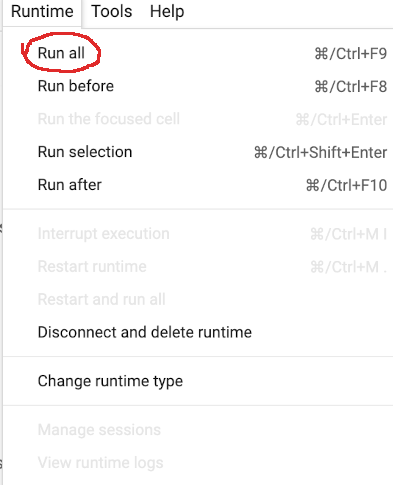

In [5]:
#@title
image = 'iVBORw0KGgoAAAANSUhEUgAAAYkAAAHlCAYAAAAA6wCcAAAd8HpUWHRSYXcgcHJvZmlsZSB0eXBlIGV4aWYAAHjarZtrdls5sqX/YxQ9BLwDGA6ea90Z9PD726DsctquTNftktIikyLPARAR+xGA3Pm//3Pd/+HLis8uF2u11+r5yj33OHjS/OdrvJ/B5/fzfbX+9Sz89XV3ytfTyGPiMX19oH4ew7fXvz7w7TEMnpUfLtTW1y/mX3/R8+cxtp8u9HWjpBFFnuyvC/WvC6X4+UX4usD4TMvX3uzHKczzefz6/GcZ+Of0oy7/JhK+fvvz/2dj9XbhPinGk0Ly/IwpfgaQ9C+6NHhSPj95o0+V5ym197N/jYQF+d06+R9G5X6Oyrrf3/yX178/+ykoqX5ed7zw18Ws3x9/+3oov19895b4hzun9f3Of3ndn7B+ns63f/fu5u49n9mNXFnS+jWpb1N5z3jjZMnT+1jl2/hXeG7vu/PdHNm7CPn2y0++V+ghEpYbcthhhBvOe1xhMcQcTzQeY1wxvddastjjSt4RzKzvcKOlnjbximkR3sSr8ftYwrtvf7dboXHjHXhnDFwsfMIf/zvf//ZC92ptQ/Dts06kBeOKSkKGocjpJ+8iIOF+y6PyFvjb989fimsiguUtc2OCw8/PJWYJX7mlPEov0Ik3giv+U2vB9tcFWCLuXRhMSETA15BKqMFbjBYC69iIz+BCLaYcJyEIpcTNKGNOqRKcFnVvPmPhvTeW+HkZzCIQhWIyQtPTIFYCNvLHciOHRkkll1JqsdJKL6OmmmuptVoV+A1Llq1YNbNm3UZLLbfSarPWXOtt9NgT4Fh67dZb730Mbjq48uDTgzeMMeNMM88y67TZZp9jkT4rr7LqstXc6mvsuNMGJ3bdttvue5xwSKWTTzn12Gmnn3FJtZtuvuXWa7fdfsf3qAX3yi788v3nUQvfohZfpPRG+x41Pmr27RJBcFIUMyIWcyDipgiQ0FEx8y3kHJ1Cp5j5HqmKEhllUXB2UMSIYD4hlhu+x+5fkftL3FzO/19xi98i5xS6/0bknEL3byL3a9x+E7Uttlk+uRchlaEW1SfK79a+8zinzghKLT51z0yLq3sL/c4dx4DE0r4+72p7WuvxOJh0tspAbd9TNCff0ykzhDDHqIGJAmAz3NUsrBvmDquEtStXi4ubxXP2Zo1Az9XqaukSSL+zpcoiW1mrn5rvsD3WuNzoHGultHOiMCUmkrbYjeHAyWCc4wLdSr09l3m61MTkvtyr5jl5eXBhW5NE8I0h13WAi378sbSqZ5grE4pQXSEGOw3fe2YMClo9bVUQIDE182TXqkUgnMUwqcwea7+8lO0U7lB8GhauizPXkc3vSdYD7nbmIn7ceRdj+mPldKrfYP/hdtHfbTF3CgQ+r6H02waDX24DQmd1y8cW5AdN5MILUWxBCM/agwuWM0rPrEwbm+K9KtRMdA7Tpd7sVme7EzbW0PPOcCyzFu3wmW3G+BIxIyr5HgLN0BfZRWypvj1QPKnfssuF41wkT+qG2ubsrdxG9hKaDHXlaGedngIBDoWrc8PjSYE1Uthn5Kb5xXw2iVIcmb/JErK4C2ONjzKBNQj1JsHKodZmTIcsIrkSBdg2gWKpUxkZJGeQ4ZTirFH551FP5465+TFXv1n50ciC5fMNTIgSumR3VxWTBqx+m0SXEZow6LpwLglFDqYztwWbtnq1tDWkO1FJg3mzVJ00iZ3rEl4qpTJsAKWdkmHesYdjaYRI5FjJqzKi3Rvrmj0FD7lMWObkvRZ5WTW0kqPkAZg4K/pzVa6qQTmSvNTQuHMvDJT5MFUACspi2GNq+W/kcgynUq8npsqwc6RSkSNUUmC0OTA10iAG60eJeocHEtOJhTGxqHX6AvGtbX6GloEhVQDpXncHnIhDDaADi+HIf6NEimUyU1kHR3aQduaIpKE6byX3fdtUYrv5ACXkfImHN+xYry/A267FVdIA3Gc5rJNLfIJqRzwQQKrcpLPjAec2wE3k594LbCms8665+CXW4IXgqJoDlALJT62vp4lHsnEHTxJLXg+YWP7pJfdnb/vnl1y2OhfzbCSUBjcPAVxUSTeQOcS9CxXcwVOS3toFJwDX1CAnQV1gOm2w7G5f1vQQ5XsBPcAH+E8R7VhqD4QrrtwHlcLd4I40wbWFUTHYEaSHFEjKvmpy/UR4J+s5lCU27DmODXv0CfqXuzfFeGpHU8Yo9CQnOtpnVgY3eL1Cluc43S+BHqsAHQMUqKip9QgUpAF5L0WfI5lEsdSJiD27HWaKGC3Lhs8LLOzHEXOwrKHCeH8O1UcYG4nVzs69nwSY+roVcF0ZCoRaWLyyAItWWQbSeZhN9BGyuO6GyuVjvoGjNcFHOBqwg8FBMoNBGrmO1iGXQWuqEFA9zOiCmkjrlRzYHVEQo0kATVidDyDyQHa/BF2UNjekGFQ2Ebmyh9UR0Qitpguz7wpA+u5CAyM8PNcCLLJ72PN6vZfhjl0Ip51kVDpYi+nbECJzZzzAyawgtPCOisCvefHUYMQHLAaebYxyV0+LyQMs8H+Exvw9V1xm6O88MDDUB+BLScTGjAeYDTEw6s6nDzQD9MyNwWHIxJ3S3yQgvF7zADHwD6iPkwZG8SwU0B0HndxOcg3MAHcZJW88VjsyeJJVPjLertUP8AlJ1sCYGucQHeoe5M31olJwrdYOZecJ2MIt5GVbWY9tyF3/4yPSCUVwD+A2q+sQFwB0CW4M81x/4BMSTT8ruJaytAExinDlMWE5M8sIEpuXKAbA5C02E25QcAK06rqZe53J3U4FqCC0BBtTXX0oTD1UVGwFkpShIfT9GYXu6sJNAEJdFHnh1qhMsh96P9QX9qTAPk26C2AA5myQptIxE60J1wBilXuAqCoRg48zsYbwYE6ou+8AqiMIFfmQO3LHgyCLdDjIbOtoLdCZYUGztUByMTtqam5yQYyDtM5oUiRepqyY5U5IJBDGSCy7XTnWpGkQPBRVB+7B5l73yctVtAwURMoxKGWmL5lf/YhSHRyWaDsJY2XchCVae30rG9QZ2sjNNakufgdZ+yLNsBbpRoJQQjlBlU2/gxJua4FBG7jCa9wuoKrviEzYm7kg3YL8ZZ6o04PijWsiKVliw7uDzZ0wDHJ9kXhN3CmsKseo0Atil5wN9HQkNdT0JNuTW2eN1aItfEmkUiPV5zsZ0BkMaAG+kULMvQOgpG8H6xr0dlwlrfQvbpLl7NMay2iHRSiIauiJJBjSvLc31rugZK8GivDNCCAk4b7oWJQ/RB0ncNpx+PCbYXFY9aO13acLDJG2WwOlHBK5jpRnfTO1hkVopHA9HhahEnqBijsSHxDDzZzYgJphPT4AYJ37lS2QzRhfPgVNdudEu6zWQ8PYLAe5gDRwKwIIBQ+BBFKPnLabELpUzV1IsAATNlMRFYMuIPTnaiazP9RM2bAIaY02NCwfOv82T8Ftygdzh0tbkCTxIfrUGIBITFtJSOS+YNFIkh6Px9uNqLWwqQVqKkWcESta8CWULDeuU6oNNSieIr2W3qaW20E/HSARQowqRzQk5Mj/Tj5F5PcDG3LVB8ABMP2TR+QQ5sV1hY/IlzawLOhUdM9MeFq8D6EnUVW86hOpCJn2CsjhBT8JOPmXSDTqzWX0ArZ3ve7FIsqStgO7QBFDoCCrR6GjPyZk1kn6jQNSPJkB1mHAYFicFN1AnEnpAvF45t2FjGAjWncJBNH8mMRtiM7MEvIJYge5H4QEthQy5/9Y8CHfn1Vg6apLu5fuS2ruGklFbzMSslkW+YcyRBPIMpGO1Aazh43xrBhCqRGKPKq0zcBeIKfu0o8q5U64IzTJ8cTESbwovXrkR0msrbWugxCDVXO4e5L0VUGDwbGUxTbszwF0kWHIZjwOqwS5rCvoIY0qBo51BzezqUGL/2A1HCt9KfLmZSgkskEh2yDmSPgVePECzwjso+5jSQxoUEu4aDDYFAwUJ0AMQVLqcGwC0LWYWEyPpFID015DLOWFykB+FfhXAcaR1aZ2LS9D+8hkPlmCAyzQ4OppwFOwJUAG1JXEOI5gg1iwGikwx5FJaGQvygiRURvCUg0vccupDhldXjqDtL97xLagJ5ADzwShJTRcFF7pgUqHC1BgsFZzuI6BmYb3sFKnROQHAhO/csNWSvCJ1tsiaNvI7DrSwizI/nBRBgP1srw1skYTxwACNRY6ybAxvVATltRLprbwogeRsdAkAf5GaXMD6nFAjKC3ZD54dIFu7Ru0oJqqgCS6GD0nl9SobxC7M4nQtezMBaQggOjRKyXQEciQNcBGPSJNff2WWH+bV4hEfwnPkHlmIPgYxCniEKF1Q+02mThchMFrkpcT4Sw3w9sX2AMQU6OTmKFcpbKLHzynEHipezIMFnSoV9iaoR8CihHq2C2SRVawyq7jseqQsZgoEcxXYV2QLiiFK/3dZdjJLolRqpx0rQllWzPogIKuGCpQr/IkqXHG+MQUDOACj4QSYMhoEQoxg4skeHRKkqyWwpDmXTvBw01uuFYoHbTh87ax+dzVpyP/zpolLRVMmcSgvNq6i3lzlYAphPyQCdz+bNEhNXU9M+6sqky3l+b6uue/bo5akTLZ2+EnyNGyBOPSYklOm2TFg9gIBwkE4ZBPWH3/JD+EjbpqDxRAoi3vRjzdrxoTkomvUbSLUhzxAw+r6oSMGQEAAudbQ5FWBLxRSeg4t2ZA8bUYxL5EHlWnBgosiYnAj98sYBgzy8JW3E6Qla51TeQgWG+IF9B6OzgdOkZZJVAGRBo4FZiZVMfOoDcpB4DMtJmjFOD6ODXExRAbSoBfCJslcVc7DGoWyDKx3I2FJZIDGwaqZzQJznTPlLc2IUBI/IJyQ5sH4DBwBhj4jjzWvsjBYlKh3Ik8PxPDdvBFsdjjHMQV2NcF1Vgxa/wvTq4fXSMM4Bt4ulwIKCacQnUhlKkFil/BPRYKhCVn+S7yAIcrDIMk8EUZJYz0ye05KNTBdWgBU8QKMKOWLH6M+iUftHeHgCb6XTPHi+Rm01AJIKiacWpGdfQ4rnOt4/gIwE6WNjwncVJ/ECDeHmpEnErrJAgU69rf0EhXXCapQMIn7JrEnDoB7hewIMg/i2Oy6wAWDBaZT92SHZAgCgC7S04KuLuDH3HuHvNeMvdOZKLoHOVpfMW6kONDAInYxutLLGvHiFKUoBKkMgNS0klalky+JVvzTp4NPAxWPiZ8EFIYSlVvntgCVqRDV9sUJ6zVB0vhNDMWEZ09BZGYZ0RHLF2XXMY8UIzACgAw1YxI4K2F+wZP3qFCwYi0IrqKsid73CJpdOGFNs5BooSYqZ2I1smT9yKLJjAn5sXw+CUXLodJQiU1ywPrBmw5arJzIbALAupv/w0O1W4BYgGRvJeMKc+HukGkKy7P1G/M6iVJpqC7mK2jLhqT2XCrXDXUTyEit1RpWMWtfmoj6QYzpGD5QtswNHQqiZvIBFJhaTdraNYouiRPtkz33lY6yMgs5XfApEAFYq/UZ6Qisc9MAo3HwhaUMvowFPCIzBcjYA6C3koetf23AhTPhOJWZ72PkDRQAMPhCOTWAHV14w9XpdQJHj6FBLeZsaLq0s5GBqLViPf00G1BMdYElkALl6A4Su5JL9BuJMjGT+MTOKsVofBzt1yB91N+d9isNjHSLxB1ZCCuvM5Gn87yFmHUEDXmgJBUg8aY6Xl95kidh0CmlkaOI4RRSeAngyJIb08bBYBmdJQKU8zV97soJBwHzAbrsIwYbvAuFAAoNJNvi9G0r0Cyyk5e+Z1ZqOgWjoOGKmJAzad01AoQby0ZLaquS2cE7RdIdWLbJbBx+4TNkOIBC+sHugfTgIZEcyFXWdj8AXr8wPbq0zALZG1oKGq8e9IeNEKu41ClodDbEUNtCIqzMmuE3Ffr1qQSZjraw2QmSdspB3xPMeEGh9AcKab+GcvPIoDGrylcTZUQu2vEebfS0ffSEgt90DKR8AwyqLaDKD523IK8L/YggQ1lCWggMbw5dgSV5PLbU+AZPM5kL8UyZ1CZrih3HCJjRZwu7aTzEiDzdgGXKDVJ38MR6h8FtXTVuF9Ufh7q0bBktYtaWhIj73ixpI9BwPPAtQDt6DFsKi51B7Tz4fITCOEKX7nRF8KqHdvrIDsrUmtSv5diR8htVnY/1VwrS4oowC6DOTDt2vAsViF75JCy67yNa/wnBSCreC7mxEj0G4UaVY3dgu+OHfgrrZV5gXqnfQkEBr4YOgIfCJbXVpUWEFlJhh7UgsZYKykrj/N2KnfaFxifo4IYAJobLcWrYVFCVN98O+kShQwE7iIllsJNjWa417jopyveWqNuoBMuqK1Il7S1dMdz0Pdz0x/WIZ+eSGCUIcgk3tzCNvnqIQvT+27dS9IfBwfAREDA/vb5MO/u8/lA2OtPX3f/6Qf+dxc6FrXMAAQ+paLDKtoPWTUkj8KQwY4Jg1MDRVsMqY/RhdZf/wlzMiwjQgg2HEC6kLOAKHACbaJ0EqjCEmcogo9qLwU8r+5fgf1hjTGQkFq52jWKjI9IZ+SXmqiEs2rDFKyokfDeVTslmhxMpv7uxe/Z2pgJlF26U7u+Xv0rWWGE5Im4vB/S6iup4qBCT7KCXafEuB8SBzpbhkJKnTlvJsKUS0FoFx2DaNKvKOkAMiNOQom6UXnnqfq65rDuF7S5v1nqlrK2V2cHS4EdRALliShEFqsl0IFNsALa5SbFYVUA7InDQbhEMBaZgsYySB3r93wCiMJwimisoVLb29FHRqp1dbcsuYeyeasfbzsDK8qrpiXSArJiYBBgi74tbzevSs2DTg1B4OU0NuIgb+1qpebEC+PK+4ngcpgyrGqSqDNLOlhRXNGmmHN1HicyGu3SBIZ9eW2Yo/wwxyBK8DNCOw8BbgKqjnbQs8CuEAmbPpEvX3lbPjP+5dF9PUH4KOvIN2QZ0cEhZ2FARKyBphgk8A6kEyhjDvDnXt0l7ZdXnQ9IbtbcOyyD69HpBphP78bx4G6BeFmIAy5O0OuqRKoar1NNqa6untD1tXbdL/Aa54OxH1rG8yt8+XElsUWrgZ2xw6Zg1iVJ8nZqH2UkjXYsQSyRJcxenhNHOiD/0aJgd36mHgmQIxq1yLQnrSoOUbNIiIjeKbyMpGlKCIY0ZqtdWyqIswzlzGfgQWvyHtFeUT46WJf7j7rJ/X1HL6ekpu6c0CLqE6IkCUhPULPHzST7WxKkvpPPSDuUstW1QeNjOQ4kdkjKrT5O0vmy+EjrM1x+y+W5xLwkN0GDTGdwXCf8URdC4ytcIaIu8VAIZ49+IO3SjeCXS9qJVItIm/1I/MLiJOxfUmlRqaHr+CG6WO2QT8+peGJ5AQmCob5VV3vFkdUokc95Kl7u2tn4unJGD7K8ws3zdumSmp7d0lTLmHIjtcZLlaJd0f4ZTEopvtYRVH6i6nbYn+38xN/a9fZHtgsjEesu70wEwE4lRjePZCmCGTAaKuxTQLetoyOSv9qwNA/TT/kwtUgpx0J67QAq6UQJpqcfFFsluB2ACJIqHbGk/RWJWZJkVLVR7NNGGWqUQfzbl6qzgFFeJ8SqtpF2s3JGu9f0+giNNc/INlJkIuggd7DtaosHJ6UOftroVVQy8Mj/IMWCjnpoN6O4gH3bB/aAd6IcGe9G6hNwxMZ6XUkgJf3wHLuGglXPc2X0MzmTxw0Yv1ShuoJTbEUdDzRhRZoJAKk2NdjUYcHNQhWkKtSgThYaSR3u85kXTsppi1v7EQHGVMPehJzonVJ0mkaAs147HFBFpCKEl8KABFl475AYOHI9tIZgL3sVCkgg/1kWgqUd7rVnRZeqCQWfV4yDBfE3jvkdKeOlvrH5kSRf3ol3T/baIc9BSa1jEMQ/6DAPtA2XTMT2BO+KTgKNiM3UdgIOCPImy6xUvKJDxwu11FlgoT/NGVj0Ym8Rlgu4jHLoE0s5EI0JdZZJE4rgtloBJUgqw+sOwYoV01C0S19qLE0tDlB9oHQRzUOdPlNT7qBWSUVmMyr6PlOumIPzSGs64Gr0YmL2JQwFkik1P5NvalYVLGqKCMYgO4o1ObeRRW/Xc9e3n9AmrBUciheRgMnDymyMgjYaB36/UThkD9lfECGLRFffEs716gazaAxAHt7DABtB4KSuZTQoA7i7t9cZRFa900c64YaJf2eQk07FIX+hrkMsizpx2qeuWUdBpks1zKNDWCfrdBqrR0C9To1gcVvCc/2eWX98FMa6n0EWk27aFaTWpk7QjW6n3hKelCt1PncilWUyJmQ1phQzGFwX26lVL0vl5WMKKqjCzyzcmDpfoM1EoBrXB/MttTzyOy2Mh5ZJ7gR2XqepqxBun/vloA40qftw1UjLrVEWR8d9KT/r4+oQcMDNpRXV8cPVaZtiX8eoajiEPhrsY7ae4zLh0Tkx4ySQ+uoJULpIpvOBpR9m63VGEuWf7B3tZPTMmDFvbHOQBUuy97wAxI8+vJaG71wwoRA6QPfStMGWvC8+DQk1bcRg/z6773cGnNEoK001CvBhgnQ5OOqI/MXuMgZYbpNPKLYWSC4qt6nTgCJUNwyLfY48ctUY4cCEHQ1zi++CTtaot5HeeYz6mbL7ec5VWycBFwaEFB3HMrXOA1ymAeoMM8Cn4xbkWyDCC1NPRRRH9djSIWJKCmEw1YF+TY6rQ1+euk/q2L4NcdzGtzuG+y3cCAuAq7vyxErEtuILwEX/ovz2drCS0hDxnV/VrkhJ2LYA5puaG11HyJcO7+mAIHSUDFC4vBx0LoFhaH9ko4h/s/bYZQV7wSshoBPUMLScSTeKtqoJhezhE+UsFLCxHkT21I24AcJu1AZyKNoAauQzBIDdqKCAUfmaKCLT/ea2TQcbuXc2nZWDs0AEYqjTjciEpSYO9gOAZr74cuXy2u6XVIWMc7+/Vg4Xfp/4Nx9w/8Ensv0sJz4S+Alg910BMwcKcOjoZ5NCyPovRYgew2XkMJ+8w7Nk6i5LbQ+ZvISNH/FWNGRtRUeEoPsSgUgSjloD2BYrg+DSBrHarldH9gr6RI6r9HfmHfUHIEd1+Nwuau0jPBDbqc/8wneEo6Fq89Dk77Q/i66lttA18+0ojP4OotRtOuJXjqsNvlfPq4zygZEWCdBSBwLsI3A3qq9OEXZtXfI2LhUzz7WrcQOEBx5UV1ghRpvUVApyRtleW2UHa2g1LWePcPwCI++CDkHHjKhg7TB+R7UEAhVMjV2SYjJABCuljMIAXsDvECnz6YGCsN7+FboBrR79xaWDTlXeJSXbtU0b0b3+E05VtlB/M+M3Y0piUEDjok9AMFit6ShGYdZ9FB3FTcBRUDGFt30WEqbmHGWpsKLBaPyDIJD9kDeYDpRknYDRLv/OZ7/ttbGmeuHYLVapge8UnRO55SsAR9UN2LlcyHN22dmntdqXfdyAOhU4UEXHqlrbQa1PlDvBKdstFb1O53QKab9QqCFMxAOCkUvq4NSJReeAdShpvEgudYgRR8gsHVjmy13yg1/V1LN6YvizelPTUWZ7B3n2CSiZrQP9xqpKo8Et76Q12Efygmc6n+GwSGWEoOMOiAPZ53LafOdIoUg1FKv+9IUhsgCg9CMZUhl97LEI+C6UJbd0Bx7Quflacamm/VTAqGjTE9uNaGH9pQhRkfK1+jsdHfDHA5PvUENJGTGHUXNkox8MVFlv2si8/RErSanuCyCsvgj30HZL72r6AlcZmakDZBmlrb+pQrEdbb7rGLwOD3AtNKJ/zU/L4csW/60S+fbovksTr9Zq8PGqL47wswG6zOe+gVes9IWkfrGI8Nfh+dYZrS1PRV4jzNp+x2vItvcXWAnS4hG7KI2ZCBF+KNnpOrFQ3+e/Pt5Zo/JPb/nHdxAfwl/bv4b3+9GNP3qH+29cRO9w/42L/M1i/+FFfjCu7u82DBPGUgpRqTUucJI8FTqllNTwR/OTtmm/5HE69bLVDPr4OlFNhk5y1Y4llKx01U6Amn8f+9xHMj0LICBarnZ5luAgRv1FQtExCb2NaoHG9LcuR+eBkcFR50Uot3NlW4D/zxiQjuh/eABZzMBc/OMjVL995KoRqQWvxaEDrLi7KmUGyAIRCdgDfqGFQNlPZNVvSqO9w/7qnBOLNFwFp3BuvN3P/m1+sAP+jgobaOnC4q8tYmhvhyK1s9Sy4N0vdKgyitIhhHVQFrP/VWXP/rHCpr8wIa5wUdW+lk5j16StC2wk9loH+HSCBN5FpFVnXQfl8UDt23Dq237tWWf3ovoF6rj8I5C4v/E8Fzjs7v8BhbKl/nS5xWkAAAGEaUNDUElDQyBwcm9maWxlAAB4nH2RPUjDQBiG36YWRVo62EHEIUN1siAq4qhVKEKFUCu06mBy6R80aUhSXBwF14KDP4tVBxdnXR1cBUHwB8TRyUnRRUr8Lim0iPGO4x7e+96Pu/cAoVllmtUzDmi6bWZSSTGXXxV7XxGiGYGIqMwsY06S0vAdX/cI8P0uwXv51/05ImrBYkBAJJ5lhmkTbxBPb9oG533iGCvLKvE58ZhJFyR+5Lri8RvnkssC7xkzs5l54hixWOpipYtZ2dSIp4jjqqZTfyHnscp5i7NWrbP2PfkLwwV9ZZnrtIaRwiKWIFFGCuqooAobCdp1Uixk6Dzp4x9y/RK5FHJVwMixgBo0yK4f/A9+Z2sVJye8TuEkEHpxnI8RoHcXaDUc5/vYcVonQPAZuNI7/loTmPkkvdHR4kdAdBu4uO5oyh5wuQMMPhmyKbtSkJZQLALvZ/RNeWDgFuhf83Jrn+P0AchSVukb4OAQGC1R73Wfd/d15/ZvTTu/Hx4VcoV3QbxxAAAQi2lUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4KPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNC40LjAtRXhpdjIiPgogPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgeG1sbnM6aXB0Y0V4dD0iaHR0cDovL2lwdGMub3JnL3N0ZC9JcHRjNHhtcEV4dC8yMDA4LTAyLTI5LyIKICAgIHhtbG5zOnhtcE1NPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vIgogICAgeG1sbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50IyIKICAgIHhtbG5zOnBsdXM9Imh0dHA6Ly9ucy51c2VwbHVzLm9yZy9sZGYveG1wLzEuMC8iCiAgICB4bWxuczpHSU1QPSJodHRwOi8vd3d3LmdpbXAub3JnL3htcC8iCiAgICB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iCiAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyIKICAgIHhtbG5zOnRpZmY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vdGlmZi8xLjAvIgogICAgeG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICB4bXBNTTpEb2N1bWVudElEPSJnaW1wOmRvY2lkOmdpbXA6ZjE4ODVjNmMtZDlkOS00MTU4LWI5OTUtZGQ0N2FhNjkyYTQ4IgogICB4bXBNTTpJbnN0YW5jZUlEPSJ4bXAuaWlkOjExYzUyYzcxLWUwZGItNGNlYy1hNTM1LWU5Y2ViNTBmN2UyZCIKICAgeG1wTU06T3JpZ2luYWxEb2N1bWVudElEPSJ4bXAuZGlkOmNiNzI3YzNlLTRkNWUtNGNiMi05MjcxLTVkMzFhOTk2MjY5MSIKICAgR0lNUDpBUEk9IjIuMCIKICAgR0lNUDpQbGF0Zm9ybT0iTWFjIE9TIgogICBHSU1QOlRpbWVTdGFtcD0iMTY1MTc1NzkyMDY0ODI3MiIKICAgR0lNUDpWZXJzaW9uPSIyLjEwLjIyIgogICBkYzpGb3JtYXQ9ImltYWdlL3BuZyIKICAgZXhpZjpQaXhlbFhEaW1lbnNpb249IjY1NiIKICAgZXhpZjpQaXhlbFlEaW1lbnNpb249IjgwNCIKICAgdGlmZjpPcmllbnRhdGlvbj0iMSIKICAgeG1wOkNyZWF0b3JUb29sPSJHSU1QIDIuMTAiPgogICA8aXB0Y0V4dDpMb2NhdGlvbkNyZWF0ZWQ+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpMb2NhdGlvbkNyZWF0ZWQ+CiAgIDxpcHRjRXh0OkxvY2F0aW9uU2hvd24+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpMb2NhdGlvblNob3duPgogICA8aXB0Y0V4dDpBcnR3b3JrT3JPYmplY3Q+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpBcnR3b3JrT3JPYmplY3Q+CiAgIDxpcHRjRXh0OlJlZ2lzdHJ5SWQ+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpSZWdpc3RyeUlkPgogICA8eG1wTU06SGlzdG9yeT4KICAgIDxyZGY6U2VxPgogICAgIDxyZGY6bGkKICAgICAgc3RFdnQ6YWN0aW9uPSJzYXZlZCIKICAgICAgc3RFdnQ6Y2hhbmdlZD0iLyIKICAgICAgc3RFdnQ6aW5zdGFuY2VJRD0ieG1wLmlpZDo3MzcxM2E3OS0zOTYxLTQ5YjctYjAxMy05NzMxNDk0ZjM5ZmMiCiAgICAgIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkdpbXAgMi4xMCAoTWFjIE9TKSIKICAgICAgc3RFdnQ6d2hlbj0iMjAyMi0wNS0wNVQwNjozODo0MC0wNzowMCIvPgogICAgPC9yZGY6U2VxPgogICA8L3htcE1NOkhpc3Rvcnk+CiAgIDxwbHVzOkltYWdlU3VwcGxpZXI+CiAgICA8cmRmOlNlcS8+CiAgIDwvcGx1czpJbWFnZVN1cHBsaWVyPgogICA8cGx1czpJbWFnZUNyZWF0b3I+CiAgICA8cmRmOlNlcS8+CiAgIDwvcGx1czpJbWFnZUNyZWF0b3I+CiAgIDxwbHVzOkNvcHlyaWdodE93bmVyPgogICAgPHJkZjpTZXEvPgogICA8L3BsdXM6Q29weXJpZ2h0T3duZXI+CiAgIDxwbHVzOkxpY2Vuc29yPgogICAgPHJkZjpTZXEvPgogICA8L3BsdXM6TGljZW5zb3I+CiAgIDxleGlmOlVzZXJDb21tZW50PgogICAgPHJkZjpBbHQ+CiAgICAgPHJkZjpsaSB4bWw6bGFuZz0ieC1kZWZhdWx0Ij5TY3JlZW5zaG90PC9yZGY6bGk+CiAgICA8L3JkZjpBbHQ+CiAgIDwvZXhpZjpVc2VyQ29tbWVudD4KICA8L3JkZjpEZXNjcmlwdGlvbj4KIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+CiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0idyI/Pp4hjmIAAAAGYktHRAD/AP8A/6C9p5MAAAAJcEhZcwAAFiUAABYlAUlSJPAAAAAHdElNRQfmBQUNJigNRJXwAAAgAElEQVR42uy9d3gV1fb//zq9pSckJBAIoYMUBT4gVZEHRSwoCFivVwRURFHUi3pBsaCIiFdFQRS4KF5FEQQRsFxRWpBek0ACIZAQSDsnJ6eX+f1xvzO/HHISEqWzX8+TRzkzs6ftvd5rrb1mRlVRUSG53W7Ky8tp1aoVgvqTk5NDREQEZrMZnU6HVqtFo9GgUqlQqVTiAgkEgksWtSRJSJIkrsRf5PTrKK6pQCAQIiGoUSQEAoHgshAJcQnOvlhcTASDQex2O263+7K4vpWVlVRWVoqOJhCcJ7T1Wdnv95Obm0swGFR+s1gsJCcno9FoUKvPn+YEAgE2bNhAx44diY2NvSTEIz8/H6fTWet6FouF1NTUszaXYbfbGTduHEOGDGHo0KHnbY7E7/dz+PBhjEYjTZo0qbbc4XBw7NgxEhMTiYuLq3O7EyZMIDY2ljfffBONRiNGsEBwMUUSpaWlPPjgg3To0IF27drRrl07mjZtil6vZ8qUKRw9evScHGRhYSEbN24MMbC7du3iuuuu45133rkkLnQgEGDKlCnKdWvXrh1XX301nTt3Dvltzpw5BAKBsxpJ7Nmz54zidLax2WyMHTuWl156KezyQ4cO0a9fP3799dd6tZudnc2JEyfEyBUILsZIQqVSYTKZGDZsmDL4rVYrGzZsYPHixWRnZ/P5559jMBjO6kHu3buXUaNGsX37dsxmMwBXXXUVn3/+Ob17974kLrRGo+GVV15h0qRJALjdbkaPHo1Op2PhwoVKdGaxWC4bD9lgMKDVamvsS3FxcaL6SyC4nERCJjY2lrZt2yr/7t69O36/nylTppCZmUnnzp2x2+34/X5iYmIUQ+D3+7HZbFgsFoxGI16vF7vdTlRUFCqViqysLPR6Penp6Wi1WoLBIFarFZvNRjAYpLy8HIPBQExMDDqdjptuugmLxaK0XVFRoRjZ3NxcVCoVLVq0QK1WI0kSDoeDrKwsGjVqRMOGDasZqGAwyLFjxygpKaFly5ZERUWdtQutUqlo2rSp8m+3243BYMBkMtG6deuw27jdbrKzszEYDLRo0SKswZUkibKyMvLy8khMTKRRo0Z1SvvJ6SC73U56evpFk7KTJImCggKKioqU46pJSCRJwmq1otPpMJvNFBYWUlJSQps2bTAajWJ0CwTnO91UYyNqNS1btsRgMHD48GEAnnvuOe666y6sVquy3v79+0lISOCrr74CYP369SQkJPD222/TsmVLOnToQOvWrRk5ciTFxcWcPHmSHj16cM8992A0Gmnbti2tWrUiEAiQnZ1NQkIC8+fPByAvL4927doxe/ZsOnXqRJs2bWjdujU33ngju3fvZsaMGURGRtKtWzdSUlJ48803cblcyrGVlZXxxBNPkJaWRteuXYmOjubDDz/EbrdfEEP5888/0759ezp37kzbtm1p27Ytq1evxu/3K+t5vV7mzJlDcnIyXbt2pUmTJgwaNIjdu3fXOoG+a9cuBg4cSOvWrenatSsJCQm8++67eL3eC9oZHQ4Hr7zyCqmpqXTr1o34+HjeeOMNysrKwq5vt9u5++67efLJJ3n44YdJTU3l6quvpm3btqxZs0ZUmwkEF4tI+Hw+du/ejVqtJi0tDQCdTlfNm1OpVKSmpiqerlqtplGjRixdupTJkyfzxx9/MGXKFPbs2cN3331HgwYN+OWXX/j000/xeDxs3bqVnTt3olarUalU1SbLExIS+PTTT3n22Wc5dOgQCxYsIC8vjwceeICtW7eydetWDhw4wNixY1mwYAGHDh1Sjn/mzJls27aNVatWcfz4cd5++21mzZrF6tWrz7ux2blzJw8//DA33HADe/bsYf/+/Vx//fU8+eSTrFu3Tllv2bJlvPfee7z88svk5uayfv16NBoNjzzyCCdPnqwxOhk5ciQul4uffvqJvXv38swzzzB9+nQWLVp01s/F5/Nht9ur/TkcjpDrGggE+Oijj1i2bBlffPEFBQUFzJ8/n8WLF7Ns2bKw90ClUmE0Gvn5559p0KABO3fuZM2aNbRo0YKnnnqKvXv3ihEuEFyIdFNBQQE//fSTksLZs2cPS5YsYdSoUXTs2LHeaZh//vOfDBkyBIDmzZuzadMmMjIyFO+wYcOGBAIBUlNTSUpKqrW9yZMnM3LkSKWt7777jr179/LUU0/RtWtXAMaNG8e6devIzc2lY8eObNq0iWnTpvH5559z8803A/D444+Tl5fHkiVLGDJkCHq9/rzcEJfLxRtvvIFOp+Ott94iJiYGgDfeeIOHHnqIhQsXct1111FSUsLo0aO57bbbeOaZZ5Q03auvvsrw4cOZN28ekydPrtZ+YWEhVquVXr16MWDAAACmTp2KwWA4J3MhmzdvZvDgwWHP0+PxKP/Oy8tj6tSpTJ8+nZEjR6JSqXjggQc4cOAAM2bM4G9/+1uN8xvdunVj6tSpilOSmprK4MGDycjI4KqrrjqvVXcCgRCJKukK+N/8REREBC+++CL3339/jQO5tlRVVcNvNpuxWCyUlpaGpF+q/rc2qrYlRy5ZWVkhef/IyEiioqKUVNhvv/1GfHw8Wq2WjRs3VvPqz2ckUVpaSmFhIX/7298UgQCIj4+nR48evP3220rFkkajqSZgXbp0IT4+nnXr1oUVibS0NK6//np+//133n33Xfr3709iYiKvvPLKOTmfpk2b8uijj1b7PS8vj9mzZyv//v333zGZTAQCATZt2qTcP7/fT3Z2Njabjfj4+LD7iI6ODolaGzduTOfOncnJyREpJ4HgQojETTfdxHvvvYckSWzcuJHRo0fjcDiUyqOLibpUz9hsNiIiIvj444+redMNGzY8r8fr9/vxeDwkJydXW2axWCgrK8NqteJwOPD5fGHXS05O5vjx42EfoFOr1cyePZsPPviANWvWsHDhQqKjo7n99tsZN27cWa9Ma9q0KXfccUe133fv3s3HH3+s/Lu4uBiDwcCXX37JypUrQ9bt06cPpaWlNYrE6Wg0GiIiIigqKhIiIRBcCJHQaDSK59avXz+6devG3LlzufXWW2nZsmW1COBiJzExkYKCAlasWEGjRo2qLT9fqSYAk8lEVFQURUVF1ZZVVFQAEBUVpURMp68nSRLHjx9Hr9djNBpDJudl4uLimDJlCuXl5RQXF7N06VJee+01tFotTzzxxAW5B6mpqVRWVvLiiy/SvXv3sNFCfYTWZrPRrl07UWIrEPxF/nKyVqfT8fLLL6NWq/n2228VYWjYsCEVFRUh3mxxcfGfEg75bao+n++cXIQuXbqg0WjYsGEDcXFxxMfHEx8fj9frDWtkzyXR0dE0btyYTz/9lJKSEuX3U6dOsWHDBu677z60Wi2tWrUiKSmJb775JiS3v3nzZsrLy7nlllvCtv/999/Ttm1b9u7dS2xsLK1ateKZZ55Bp9Nx8ODBC1bhdM0116BWq9m3bx8xMTHKPZAkicrKylrnS6xWa8h9Onr0KLt27aJVq1ZiPkIguBCRxOm0bNmSm266iXfffZebbrqJTp060a1bNxYsWMC7777L4MGDyczM5PPPP/9T7RuNRkwmE7Nnz2bo0KHKBPTZom/fvvz9739n7ty5+Hw++vTpQ1ZWFosWLaJp06Z88MEH6HS683JDjEYjEydOZN26dYwfP54xY8ag0WiYO3cuBQUFTJ06Fa1WS0JCAtOnT+fFF19kypQpDB06lJMnTzJr1iw6dOjAmDFjwrbfuXNnNBoNEydO5IEHHqB169b8+OOPGAwG5en5C0Hz5s158sknWbhwIW63m8GDB5OXl8fixYvxer0sW7asxnuwfft2XnzxRYYNG0ZJSQnvvPMOMTEx9O7dW0QSAsH5jiTsdns1j16n0/HII49QVFTErFmzcLvd9OjRg/vuu4+33nqLfv368cILLzBgwACOHz+uPF0sv8/o9Oji9MqXq6++mmuvvZbp06fzf//3f8prKwKBQMh7pMK9riEQCJCXlxfW+5T3q9frmTp1KiNHjmTChAl06dKFe++9l7Zt2/Lqq6+eE4FQqVTYbLawkUrHjh358ssvOXr0KP3796dfv34cOnSIDz/8MCQVM3jwYKZNm8Znn31G9+7due2220hISGDmzJk0aNAgbATXuHFj/vOf/xAdHc3999/P//3f//HPf/6TCRMmMHbs2LN6jk6ns8boT5Ikjhw58v97K1ot48aNY/z48bz22mt07dqVYcOGERsby0cffaTcA4fDEdI3qkYhvXr14vbbb8fpdPLRRx+J76MIBGfDVlmtVsntdmOz2eo0qGRjE85DO32ZJElUVFRQUVFBSkoKGo0m7DqntxVuH4FAgMLCQiwWi/JCuD/bVm2/+3w+Tpw4oRxvXTzRnJwczGYzZrMZvV6PTqdDrVYrz3P8mWspLy8pKcHr9dKwYcMaUy7BYJATJ06g1+tJSEio07nK5culpaU0bNjwrE9Y1/X8wi3z+/0UFhaSlJSEXq+vdtxym3a7nfvvv5/4+Hg++eQTHA4HNpuNlJQUEUEIBBcq3VTb4Dt9mUqlIjo6OmTSMdw6ddmHRqMhNTX1jPur6/HW9LtOpwv71tJzotBnMGQqlSokIqgxHPx/DyXWZz8qlYqIiAgiIiIu6PmF7ZRabY33oLb7ea7PRyAQ6SaB4BJDkqSQlKNAILjAkYRAcLGg1+u54447iIyMFBdDIBAiIRCEYjAYePDBB8WFEAjOISLdJBAIBAIhEgKBQCAQIiEQCASCs4gyJyFJklK3Ll6KVndUKlXIw4FVr6W4jgKB4LIRCfjfO2+qioagbgSDQUUUgsEgwWBQEQ/xUJdAILiUnWCt/PI8nU6nfFVOUD8OHz6sRGCyYMgCIURCIBBc8pGE/HEXwZ8jEAjgcDiorKwUF0MgEFxeIiE83b+OiMAEAsFlKxJWq/WcfafhSuF8vUZcIBAIzjdql8sV9jOXAoFAIBBoU1JS8Hg8lJaWXtIncrR9+3O+j6b794seIxAIriyRuFTfonk+RKEu+xTCIRAILnuRuFSeibgQwlCfYxKCIRAIhEhcAuJwto11Xfd/+npCNAQCwaVOvT9fejEKw4Uwxhf78QkEAsFlJxKXquGty3ELoRAIBEIkzrEwXArGtrbzEUIhEAiESFzmUYMQC4FAcCVxQT5feiWkZ+TjvxgrsgQCgaCuXFQfHWq6f7/yd7kQ7lyEcAgEgkuF855uulLLRMWDeAKBQEQSVQyi/Cc86NojChFVCASCK04kBHUXCoFAIBAiQfg005VoNMUchUAgECJxlpBfGVL172Jh/fr1fPjhhzgcDgKBAN988w1ff/11nV6WKIRCILjwdqW+yy6WYzzfXJAS2LpEENu2bWPcuHHK96K1Wi2tW7emf//+3HDDDTRu3PiCXrh9+/axYMECRowYgV6vZ9OmTbjdbu644w7UanWdrkG4ORuRkhIIzp3h3b17N5s2bUKv13P99dfTvHlzZXl2djbr16/H7XbTu3dvOnXqFPYb9ZIkceDAARISEkhKSlJ+P3nyJEVFRfj9fvR6PampqcTExPyp43z00Ufp1asX999/f5228fl8HDx4MKyTKkkSHTt2BMDv93Ps2DHKy8vRarUkJyfToEGDi08k6oLH46GgoICHH36Yli1b4vP5OHToELNnz2bNmjXMmTOH6OjoC3qMVTuQSqWivp+CDScUAoHg3HDw4EHeffddWrVqhcfj4Y033uDtt98mJiaGgoIC3n//feLi4jAYDMyZM4enn346bMXn8ePHmT17NhMnTiQpKQlJkvjll19YunQparUak8mEy+VCrVYzatQoOnfuDIDdbmf79u20bds2RFzC4XA4cLlcdT43l8vFBx98gCRJGAyGagLy4YcfEggEWLFiBT/++CMRERG43W70ej0TJkygSZMmF1Yk/qwhdLlcDBo0iO7duyu/9enTh8cee4ycnBy6dOlCIBAAQKPRKOsEg0El+pDVU61Wo1arOXXqFACJiYl1OoZTp04RDAZJTEysU4RwNq6ViCYEgrPPhg0baNiwIZMmTcLj8TB+/Hh27NhB//79KSsrQ6fT8dRTT2E2m3nppZfIy8sLKxLZ2dlERkYqhn7v3r0sXryYq666irvvvhuLxYLdbmfevHnMmzePV199lbi4OMrLy/niiy8YO3bsGUWiJvbv309JSQm9e/cOsXmy3RswYADXXXddjdmZb7/9luHDh9OvXz9sNhszZszgww8/5I033qjRyb3kqpvS09OxWCxkZ2cDMHToUG6//faQdd599106deqEzWajrKyMXr168c477zB06FCSkpJISkpi3LhxVFRUhN1HMBhk69atXHfddSQlJZGcnMwtt9xCVlbWBUm9CQSCv06jRo04ceIEubm5WK1WoqKiKC4u5uTJk5SUlKDVaqmsrCQzM5PKykpiY2PD2obVq1fTvn17IiIiCAQCfPXVV+h0OsaMGUNKSgrR0dE0btyYESNGUF5ezoYNG8jLy+PgwYMAHDlyhAMHDhAIBCgqKmL//v0UFBSwefNmNm/eXOtcxPr16/n666/xer1hl0dGRtKgQYNqfwA7duwgJiaGW265hejoaJo0acKIESM4ceIEmZmZNe7znIvE2UynBINB8vPzcblcpKWl/S8U0mrR6/WhJ6VWExERgSRJqFQqTCYTH3/8MX379mXfvn1MmzaNn376iYyMjBrD0rFjx9K9e3dyc3NZt24dXq+X11577Zx8D1wIhUBw7unfvz9XXXUVs2bN4o033sBms/Hf//6XadOmsWTJEsrKypgxYwYff/wxycnJtGvXrlobe/fupaioiFtuuQWA0tJSKioq6NWrF5GRkSHrtmnThvvvv59GjRqRkZHBDz/8gN/vVwy9z+djz549vPPOO7z++ut8/vnn7Nixo1aR+DNpbYBAIIDVaqVhw4Yhv3fs2BFJkmr9fPV5n5Ooj0E0Go2sW7eOEydOKKo7e/ZsevToQYcOHeq13yeffJJx48YBkJCQwNq1a9mzZw8DBw6stm5sbCwfffQRHTp0wGw2k56eTk5ODtOmTVPSWwKB4NJCr9fzxBNPcPLkSbxeLx988AHXXHMNffr0ISsri59//pnRo0djNptJSUlR0tVVndRNmzbRtWtXZT7U7Xbj8/nCFtKo1WoGDRoEwNVXX0337t2ZPn069957L127dlXS18FgkG7dujFo0CDMZnO1tLbVasXn86FSqXA6nQSDQYqLizGZTADEx8cr6xYUFLBv376Q7dPS0oiIiCA6Oprdu3cTCASUfZSWlqJWq3E6nRePSNQHrVbLjz/+yNatW/F4PGRmZnLLLbfw1ltvVYsezkTVmxgZGUlUVBR2uz3suvJk1E8//cSuXbsoKioiNzcXp9N5yXzqVSAQVMdgMNCkSRMkSUKv15OYmEizZs2w2+0YDAbS09NrtC12u52srCyGDx+uzAfIpaoRERG17letVivbaDSaECHQarXceeedivCcbmNmzJjBsWPHlG1VKhWTJ09GkiS0Wi3Tpk3DbDYDsHHjRjZu3Khsq9FoePbZZ2nVqhVdu3YlIyODxYsXM2jQIOx2O++++y5qtVrZ/ryJRE1VO/VNqzidTiZPnkz37t1xu91MmjSJnTt31ulZhL9CTk4O48aNw+fzMWTIEK6++mo2b97M3r17L/qUnEAgqGWsHT3Kzz//TEVFBVarlV9++YXMzEysVislJSW89957REdHc8stt5CcnByy7f79+3E6nSFZDJ1Oh0ajwWq1ht2fbPBrSxGdKX00cuRIKisrAVi7di1FRUWMGDECo9GISqUiJiZGmaO47bbbGDBgQLWMDEDXrl258847+fHHH9m+fTt+v5+mTZuSnZ1da6XoOYskzkZ5ZzAYxGQyKX+jRo2ie/fuzJ8/n8cee0y5ScePH6/XRa8NSZLYsWMHdrudJUuWKBGIx+NhwYIFYpQJBJcox48f57XXXiMmJoa2bdsq85WxsbH4fD7UajUxMTHk5OQwZcoUXnrpJWX8B4NBli9fTo8ePYiKilLatFgs6PV6cnJyuPHGG0P25/P5+Pbbb0lOTqZv375/+riritKePXsoLS2lR48eSroJUETCaDTWGNWo1Wpuv/12unfvTllZGbGxsWRlZXHgwIFaq60uqeqmrl278txzz/HVV19RWFgI/C/flp2dTXZ2Nm63m4KCAr766qu/JBTBYBCr1UpZWRkOh4PCwkJWrVqFz+cT6SaB4BLl119/xWAwMH36dB588EEsFgvXXnstDz74IDfeeCMxMTHce++9vPjii8TExHDo0CFl20OHDmG1WrnppptC2oyKiiI1NZUtW7Yo5fUy27dvZ+XKldVsxrnOhNSGSqUiOTmZ9u3bo9Pp+Pbbb+nZs+eFE4nT00v1iSzCGXm1Ws0999xDcXExCxcuBGDUqFGYTCbGjBnDk08+yX333aeEfn9GKFQqFVdffTUWi4WxY8fy2GOPce+997J161aCwSB5eXmcz2smEAjODiaTCbfbjdVqJTc3l1OnTinGUafTYbPZOH78OA6HA4/Ho6Rp5CesGzVqFDJJLNuLBx98EL1ez6xZs9i2bRvFxcVs2LCBL774giZNmijPeUVGRqLT6cjIyKC0tPRPiYVGo0Gn0/3pa+Byudi+fTtfffUVb731FhqNptojBOct3fSXjWXTpnz55ZfVngTs2LEjs2fPxu/34/V6ad68OStXriQzM5NAIMADDzxAdHQ0p06dwmg0EgwGeemll0hNTVXa0Ol0TJw4EYvFEnbfrVu35osvvmDfvn1UVFTQrFkzGjZsyNGjR5VQrnfv3rRu3VqpRhg+fDjBYPC8PHAnEAjqz8CBA9m5cyfjxo1DpVLRtWtX5XUVaWlpNGvWjMmTJ6NWq0lNTaV169bA/x7G/eWXX7jhhhsU4ahKXFwckyZNYuHChcycOVOxA7169WLo0KHKNrGxsbRv357ff/+drVu3MmfOHCRJCvvMg9vtDltJ+cADD+D3+0NSTbKQeb3eMwpPXl4es2bNIiUlhc6dOzNw4MAzvpbjvHx06Hx8aKguE0QXQ5tnuj4ikhAIzh1ut5sDBw6g1+tp27ZtyFPLfr9fSVt36NBBqXLavn07n3zyCTNmzKi1iikYDOLxeCgpKSEpKQmtVlvNaQwEApw6dQqdTkd8fLxSHXX609OBQACVSlUvp7Mu28hvo1Cr1XV+5uKCiIQwhudXQAUCwZ9HTj/FxcVdked/XnIj4tXYdRdPgUBwcWGxWK5YgThvIiGMZPXzFgIhEAiESJwhmrjShOJM4iBSTQKB4GLjvMxJ1FUYLjcjWR8BFAIhEAiESNTRgF4OBrOuAiHEQSAQCJH4k4b0UjOgInIQCARCJITXfdmLnUAgEMhcFE9cy0b0TMb2YpnLEJVJAoFARBIXsWd+tkTpXB6PiB4EAoEQCeG5C3EQCASXNdpL4SAv5mcshCgIBAIhEpeJ1342REWIgkAgECJxmSIMvEAgENQP8fEDgUAgEAiREAgEAoEQCYFAIBAIkRAIBAKBEInLCPlTqAKBQCBE4iwQDAbxer0hfz6f74wf+j4b7Nmzh8mTJ1NcXPyX2yosLGTSpEk8/PDDrFmzRvQ4geACO2t+v59AIBB2eSAQwO/3X/Dj9Pl8F8VxwEVcArtt2zYefvhhJEkiGAyi1Wpp0aIFPXv25NZbbz2nT4dXVFSwfPlyHnnkkb/UjsfjYcKECRw4cIB77rmHxMREMUoFggsoEOvXrycjIwOdTkf//v3p1KmTsnzr1q1s2LABj8dDjx496Nu3L2q1OqwDu2nTJho3bkxaWpry+9GjR8nNzcXn82E0GmnTpg1JSUl/6jgfffRR+vTpw9/+9rc625o//vijRvG77rrrlGPfuXMnpaWlqFQqkpKS6NChAyqV6tITCZ/PR2lpKRMnTqRNmzb4/X6OHTvGN998w2+//cbChQvP6Xdnw3WO+lJeXs7XX3/NokWLuP/++8UoFQguIPv27WPevHn06dMHp9PJzJkzmTlzJg0aNCA/P5/58+fTqlUroqOj+c9//kNSUhJt27at1k5+fj6LFy/mueeeUwzvypUr+e6774iKiiImJoby8nIcDgejRo3i2muvBcBms7FhwwY6d+5Mo0aNzmj0PR5PvRzSzz//HK1Wi8ViCVnm9/u57rrrCAaDLFq0iPXr19O4cWP8fj9FRUUMHjyYO+64o0ahuKgfpnO73fTq1Yvu3bsrv1111VWMGjWKQ4cO0b17d+VCGgwGZR2v10sgEMBkMiFJEh6PB41Gg1qtprCwEICUlBQ0Gk2t+w8GgzidTo4ePUpaWhpGo7HahfT7/eTn52MwGEhOTlbExefzkZ+fj0qlolGjRrhcrpDtvV4vx44dw2QykZSUFHIscqhpMBg4ceIEgNKp/H4/x48fR6PR1OkcBALB/9iyZQtNmjTh4Ycfxu/38/jjj7N7924GDBiA1WrFbDbz0EMPYTKZePnllzl69GhYkcjMzCQ2NlbJDGzdupXly5fTrVs37rnnHgwGAy6Xizlz5rBgwQKaN29OYmIiNpuNFStW0LBhw7AiUZd5y23btlFYWMjNN9+MVlvdfA8cOJAbbrgh7LZHjhzhl19+YeDAgQwbNgyA+fPns3LlSrp06ULTpk3DO8yX2o1OTk7GZDKRm5sLwLBhwxgyZEjIOu+//z6dOnXCarVSXl5Or169mDp1KoMGDaJJkyY0adKEhx56iNLS0lojmblz52KxWGjXrh1ms5n//Oc/IeFcVlYWt956K82bN6dx48bccsst7NixA4BZs2bRvXt3mjVrxg033EBERAQFBQUAbN68md69e9OiRQsaNWrEwIED2bRpk9JJ/vWvf2E2m3nllVdo3LgxixcvRpIkcnNzGTZsGM2aNaNJkyYMHDiQLVu2iNEvENSB9PR0jh07xrZt28jPz8dsNlNYWMiRI0eUsZUowlQAACAASURBVFlUVMTmzZuxWq1h08OBQIDVq1fTqVMnLBYLfr+fZcuWYTKZ+Pvf/05MTAwmk4m4uDhGjBiB3W5n/fr17Nu3j61btxIMBtmzZw8bNmzA5/Nx5MgR1q9fT3Z2Nj/88AM///xzrWKxbds2fvzxR7xeb9jlBoOBiIiIan8Aubm5BAIBrr/+ekwmEyaTidtuu41AIMDJkydrzqpcSjfZ7/eTnZ2Ny+WiZcuWykUxmUwh62k0GmJjYwFQqVRERkaybNky7r//fg4fPswHH3xARkZGrQbW4/Gwf/9+/vjjD44cOcJzzz3HE088oYhTaWkpzz33HE2bNqWgoID8/HwSExN59dVXsVqtPPnkk6xfv578/HzWrl1LeXk5jRo14ujRozz99NP07NmTY8eOkZ+fT6tWrZg4cSJHjhz5X3in1dKoUSMOHTrEihUruOuuu6ioqOCFF14gNjaW/Px8CgsLadGiBf/85z/PygS7QHC507dvX3r16sVnn33GO++8Q0VFBevXr2fGjBksX74cq9XKv/71L7755hvat29Pu3btqrWxY8cOysvLuemmmxQ7UFlZSc+ePavZofT0dB577DHatGnD4cOH2bdvH8FgkJycHHbu3EkwGOTQoUMsWLCAGTNm8Msvv5Cfn1/rOahUKuWvvrT/f++uy87ORpIkJEli//79qFQqUlNTa9xOGwwGz0vF0J/BbDazdOlSduzYQSAQ4MSJEyxbtoyBAweGvYG1MXHiRO677z5UKhXDhw/n22+/Ze/evdx8881h1zcajbz55pu0bt0agOeff57Fixczb948ZsyYwb59+zhy5AjvvPMOKSkpADzxxBPcd999lJaW0rx5cyIjI/H7/URGRhIVFQXAihUrcDgcTJo0iYYNGwLwwgsvMHz4cFavXs24ceMAKCgoYNasWYo3s2XLFjIyMvjhhx+UGzphwgTuvvtuioqKaNCggbACAkEtaLVaHnroIex2O36/nzfffJMePXrQv39/9u/fz/fff8+ECRMwmUxER0dXS+UGAgEyMjLo0aMHkZGRijPp9/vDpo9UKhV9+vQBoF27dnTs2JE333yTIUOG0KVLFyU1LUkSAwcO5MYbb0Sv11cTgOLiYjweDyqVCrvdTiAQoKCgQElfy3YE4PDhw2RkZIQcQ5s2bYiOjiYlJYVbb72VpUuXkpOTQyAQYOfOnYwYMYLk5OSar9ufVaXzgVqtJjMzk5KSEtxuN1u3buXOO+/k9ddfD5uPq434+HjlPC0WCxaLBafTWWuHksM0gJiYGLp37654++vWrcPr9bJgwQL0ej0AZWVleDweCgsLad68edh2f/zxR1q2bBlyY1NTU0lJSSEjI0MRCfmYZX777Tc0Gg2LFy9W5l8qKipwuVwUFhbSoUMHYQUEgjOg0+mUghetVktUVBQJCQnExsai0+lITExEp9OF3dZut5Odnc19990XYuAlScJsNp8xApC3UavVIYUxOp2Om266SXEkT083zZw5k6NHjyqZE7VazZQpU5AkCZ1Ox/Tp05XJ6q1bt/LHH3+EZFX+8Y9/EB0djUqlIjk5GY/Hw5EjR/B6vWi12jNWYF3UIiF73D169MDtdvP888+zdu1aJk+eHGLAzxdGoxGHwwHAsWPHUKlUBAIBJT8YERHByJEjMRqNNbZRXFwcVkBUKpXSdjiOHz+OSqVSnh+Rj2fYsGHVqhkEAkF4srOzWbVqFVarlbKyMlatWsWmTZtwOBzYbDamTp1KTEwMQ4cOJS0tLcQ27ty5E5/PF+KQ6XQ6tFotZWVlYfcXCARCBKImapuHGDVqlOLQrly5koKCAsaOHavYmbi4OKWAZ9iwYQwcODBkezki2rRpEwsXLmT48OHKOkuXLuWjjz5i/PjxIeXAISJxMd9QSZLQarVoNBosFgtjxozh/fffZ86cOUycOBGVSoVerycnJ6eawf2rnJ6C83q97Nixg759+wLQoUMHdu3axdNPP12v5x86derEnj17cLlcSg6zvLycsrIy7rjjjlrziWvWrGH8+PFnLJ8TCATVyc3N5a233qJRo0Z06NCBU6dOKWWuhYWFZGZm0qFDBzIzM5k2bRovvPACzZo1U4z9ihUr6Nu3b4hTFhERgV6vJzs7m0GDBoXsz+Px8Omnn5KWllZjWrsuyPOvABkZGZw8eZKOHTuGzIHIIqHRaGqMhP744w+MRiM33nijIhyDBw9m3bp1HD58uEaRuKQmrtu3b88rr7zC0qVLOX78OADNmzcnLy+P7du3U1lZSVZWFosWLfrLQuFwOPj0008pLi7Gbrfz9ddfc+LECaV0bMCAAXg8HpYtW4bVasXtdnPgwAEef/zxGr0KgAcffJDS0lKWLVuGw+HA4XCwdu1aTp06pQhQOG644QZMJhNLlixR0lrZ2dmMGzeu1soEgUDwP9avX09kZCSvvPIKd911FyaTia5duzJ06FD69etHVFQUt99+O//4xz+Ii4vj8OHDIRGI0+msVl4aFRVFixYt2L59e7VJ582bN7Np0yZiYmJqdUDPZ6rN5/OFPH8hPy5QW/r+oo0kwhl5lUrFsGHDWLJkCbNnz+bNN99kzJgxrFy5kjFjxpCSkkJpaamipCqV6k+/M0mr1fLrr7/y22+/YTKZOHLkCKNHj1Ymotq0acOYMWOYM2cOy5cvx2g0UlRUxLXXXquEgeHOoUuXLjz00EO89dZbfPnll8D/JpvGjx9Px44dazye9PR0nnjiCT788EPWrl2L2WymqKiIjh07njEfKhAIIDY2FqvVyokTJygpKaG4uFgpOtHpdFitVg4dOkRUVBQOh0OZnJYkiX379pGamqpUTVbl/vvvZ//+/cyaNYs77riD9PR09u/fz/Lly2nVqhXdunUDIDo6Gr1ez7p160hJSal1srgmzGZz2GOoC71792bbtm3Mnj2be++9F7/fz4IFCwgGg7W+wUJltVolt9uNzWY7p6+6qC+lpaUUFBTQuHHjkCer5bKtYDBIu3bt0Gg05Ofnk5ubi9/vp0mTJpjNZmw2G23atEGSJA4ePEh8fLxyUwKBAFlZWRgMBlq0aFFt3yUlJUrFUGFhIfn5+TRp0oSWLVtWmwvJzc2lqKgIl8tFSkoK6enpikjYbDby8vJITU2tdg4HDx6koKAAr9dL06ZNadOmjSIqeXl52Gw2OnbsWE1oDh8+TFFREZWVlTRu3JhmzZpVK70TCAThswOzZs0iMzNTqTx6+OGH0Wg0eDwe5s2bx6ZNm1CpVKSnp/Pss88SFRWF1+tl/Pjx3HbbbQwePDhs2ydOnGD+/PkcOHCAYDCIRqNhwIAB3HbbbSFj/9///jc//fQTOp2O2bNns2HDBr788ktmzZpFdHS0Yh9GjhzJ9ddfX+3VQPJ7p6o+PCzbmqeffpqhQ4fWmtrKyMhg/vz52O12ABo0aMBDDz1E586dLz2REAgEgrONz+cjNzcXnU5Henp6iBMmSRJHjhzB4/HQunVrZbJ569atfPnll7z66qtnjNp9Ph/l5eUkJCTUOFktZzvkaqYLQVlZGWq1uloqTIiEQCAQ1JOqr/m5EtGKLiAQCAQ1Iz8HdaUiPjokEAgEAiESAoFAIBAiIRAIBAIhEgKBQCAQIiEQCAQCIRICgUAgECIhEAgEAiESAoFAIBAiIRAIBAIhEgKBQCAQIiEQCAQCgRAJgUAgEAiREAgEAoEQCYFAIBAIkRAIBAKBEAmBQCAQCJEQCAQCwSXCRftlOkmSCAaD1VVNrQ75Lu35wuPxYLVaiYqKOuufMXS5XFRUVCBJEhaLhcjIyEu2Q0mShNVqJRAIEB8ff07u1en3wm6343K5iI+PR6PRiFF9GSLbgnDfja5t2fkkEAigUqku+HFcMSLhdDqpqKgI+U2lUqHRaLBYLGf8IPnZ2L9Go8FgMCgdMRgMEggEzonBAzAajeh0ustiQAcCASRJOiciITsQsnE4F/dFcPFQUVGBy+VSxkhUVJTSr2QHQZIkdDodsbGxNfY5m82GVqvFYrEovzkcDrxer9JXLRbLn/pcqd/vp7i4GKPRSGxsbL0cqpqIiYm5IA7xJSMSMkajEb1ejyRJBAIBxevW6/Votdpz2jHVajWJiYnn9Pzkzh8TE3PFfmhdIKhtfFRWVipjw+l0YjAYMBqN+Hw+HA4HWq0WjUaDx+PBbrcTFRVVrR2fz4fL5VKWSZJEeXk5Ho9HcT4DgQBut5uIiAglmvf7/VRUVGA2mzEajWfd2XG5XH85+ggEAthsNgwGQ4gAXjEiodfrQ05cq9VSUVGBx+NBq9UqHmTVNEMwGESSJOU3OQwE8Hq9Srvhbszpaa5AIFBtvWAwiMfjQaPRoNPpqql9IBDA6/Wi0WjQarU1doBAIKDsS6fTEQgElGOWj0M+z5rakddRq9XodDplHXn709Nzp4fEkiTh9/vx+XzodDq0Wm2186lpH1WX+3w+xZuTJKlOA8Tr9RIIBNDr9Wg0mpD9yk6Bx+PBYDBUWy64MnC73ajVasWrPnHiBC6XC6PRiCRJSJJEdHQ0Wq2W0tJS/H5/je0ASmbAZrMpfUtuOxgMUlZWRmVlJWazGY1Go/T92qKLM/V3q9VKMBgkLi6uRkc4Jiam2u/h+nu46Fw+RjkSqun4ahs/tUX92kut08hG1OfzAVBcXAxAw4YNlXXKy8vxer0kJiYiSRLFxcWKpyBfDLVaTVxcXLX0js1mw+l0olKpCAQCnDx5MuTmulwu7Ha70o5Go6FBgwYh4W9lZaVyY9RqNVFRUWHTY6dOnar2/ykpKcpxyGG03E5kZGRIJ5CPteo60dHRmEwmKisrsdvtxMXFKR6QfD4Wi4Xo6Gh8Ph9WqxW/3x9yPrGxscp1cbvdSieXO1pUVJRyHB6Ph/LycmXAqlQq5a8mfD4fZWVlipirVCr0ej2xsbGKAMlennxuOp2OuLg4MedwhaHX63G73dhsNsUh8/v9OBwORRA8Hg9OpxO/319jGtrhcKDT6RQ7IDs9VdNTGo0Gs9lMRUUFlZWVaDQaxal0u90EAgEiIyPxeDyKk+jz+VCpVLXOI3o8nrDzq2cSBNmpdTgcmM1m3G43fr8flUqFyWRS5uNkW+jz+SgvL1dET5IkZbk8tqum6srLy5Xx5vP5iI2NDTu+LnqRON27lD0CWdnli1HbdrLBt1gsigF1u924XK5qIhETE0NUVBSnTp1CrVaTkJCAWq1W0kJyRzEYDNhsNnw+nxLiut1uKisr0ev1xMTEEAgEKC8vp7KyEqPRWM0Db9iwIVarFbfbTVJSkrJczrMajUbFmNtsNiXNptPpcDgcSugdHR2t7MtqtdYYFp9uvOWBFhERgdlsxuFwKH8xMTFKp9NqtSQkJCghekVFBUajEY1Go8wbRUVFYTAYlOOqqdMHg0HKy8uVa200GqmoqMDpdOJwOIiMjMRqteLxeJRJfHl+qqKios75XsHlgcViwefzKeO1agpIxm63o1Kp0Ol0REREVGtDdqTkVJM8n2U2m6v1U7PZrETEVY171QyDnLqSHbMzzSP+lQjY7/fjdruViEoWLrfbrUTtVY+xqi2Ux5WcrpeFND4+XnF4ZZtQW7rrohcJu92Ow+EISUFotdp65wdNJpPSSWRvQPYSTqfqBTv94lksFqUjxsbGcvLkScWjcbvdiqetVqtRq9WYTCYcDketQlbVA69682SPQA6JS0tLlc4hh5cxMTFK54mMjFRScfVBFrDIyEg0Go1yzvJ1r+phREdHU1paitPpxGg04vf7Q1KCUVFR+Hy+GieS5UlmWbDlbWTvzGKx4PF40Ol0indmNptxOp2KgyC4soiJiVEM4alTp5QJao/Hg81mU6raaopg3W63krKtaZxXHZPy+DYYDHi9XkpLSzGZTNUEKCIiAovFojihp0cP8piXj71q/61qvzweT0hWQW67alSk0WhISEhApVJRWVlJZWUlDodDcSJLSkqUaFweu06nE7PZrNg9OTvhdruV/atUKuLi4mpNi18S6SZZIYPBIDqdjoSEhHq3cbrh/7PqXnW7qnn9qh2jvLxcWa+q91GXVInf7ycYDGIwGEL2JRtvebnf7682f2A2m5WOJYegZxJOl8tFSUkJOp0OvV6vFArIURNAWVlZNUHz+/1KVcjpgl3btZUFteqAValUSoGAPLchV4vIbcnHIqqYrkzksVbV85XHU1XHJpxT4vF4wkYNfzXDES47IFNWVlZtLqCsrExZnpycXK9ow2KxKPuyWCzY7fZax4I8/nU6nSJOOp2umkhoNJozVnNd9CIhq7UkSZSUlChe6sWYm5YNaFUDKB9nXTvomSbBqi7/q53eYDCQlJRERUUFfr9fSfnI8xryvk6fNNZqtSET1PU5jjPlZmWHQJ70P/06Cq485HlAeQ7L4/FQVFSk9JeTJ08qEYDs2VdNqcp2pD7j+K+Or9jYWKUdm82GJEkhqdKqaXKDwVCvNOqZjkvOuMj7ru8YvCQjCfnCREVFUVZWRnl5eUg0UZdqmvOBXG0VHR39p42abJBPT4XJeVQ5epCjiqpVCXKuNjIyUvG4qlZ7VL1O8qSWXDkiSZIyoex0OjGZTMrEXNUJ5arIxyh7anW5H3L+9nQvyGq1olarFY9Pq9XWWA1SlyhJcHkgF06o1WqMRiMul0v5f3kC2mQyKXODVQVBzsPL1XNVbUm4MSb3aavVqsz1/VmqRtey13++StyrFo/ExcVVG7v1Fb9L6tFAg8GAwWDA5/MpN1i++ZWVlYo3XNNcQ32R0zp1xWQyEQwGFc88EAhQWVnJqVOn6qze8gCQ25HLS2WPQE5DGQwGgsEglZWVBINBvF6vUhEkh5ByHbbP51OqkE4fEA6HQ6mikstjZSMvd/TS0lJ8Ph/BYBCn08mpU6fwer3KsyoejweXy0UgEMDhcNRqxDUaDRqNBpfLhcfjIRAIKBP18nK5Tfnc5An0quG64MoRCTkdKc/R6XQ6oqOjiYiIUCqLEhIS0Gq1IX3P6/USDAarlYXKfUyeAK6K0+kkEAjUK4V6MaLRaELmcOW/uqa9L8lIompuTn5KOTExUZlItdvtiidRU8VTfdI6stdSXFxMdHR0nTqJxWJRKhFOn6SqTyeLiopSyvzkcFmepJbrvOXJ99PXkSfN9Xo9er1emdSSBahqp4+IiMBms4U89SnXWstldj6fD6fTqbQhRwNyHjMyMjKkjTOVv8oT5BUVFSFGX34SVvZ+SkpKQsqJ5XMTXFnIxs7tdiupyKo5dEmScDgc6PV65ZmbqgIjj4XTDb5sN6xWKyaTCb1erzguVfu3PH95+hsY/kx2oCb8fr9iu6pS1xSZXBoslwKbTCYiIyNxuVxKibter1ecV0mS6vXGiotWJORXVJxekWAwGJRyTLlULSEhIeRhLlkkZKMYHx9fbeJaLgOriejoaMVbl72K+Pj4ahOucomsTHx8PD6fL2SCNtwDajLysw+nG/C4uDh8Pp9S46zT6aqV2sXHxysPwqnV6moVHHFxccoEsxxyV53Pka+x/PBfVY+jqmCZTCalc51+T0wmEzqdrtbrHy7i0uv1+P1+pQNXvUZy6bF8brLnJ+9Xr9eHvKdJrgS53N6ZI/jfva366hqdTqdEBjqdTim7djgcqNXqEMMql4iH6xc6nY74+HjKy8txOp04nU7gf8UfcoQij1+dTqekoeQKo/pQU9pUHut+v5/KysqwTmdNkUy40l2Hw6GUwMs2Ti7Br+pEygJR1/NQWa1WSX5YpVWrVqJXCgSCiw65rDucJy+nlapWBDqdTux2OwkJCWdMr1RNy9Tm7ctl7Rcr4d4+AdXfQFFftKL7CQSCi53a0jzhSjjlJ5Lr4i2fXpEY1lBqL35TWZMI/FVhEyIhEAguO8R7vs4eIokrEAgEAiESAoFAIBAiIRAIBAIhEgKBQCAQIiEQCAQCIRICgUAgECIhEAgEAiESAoFAIBAiIRAIBAIhEgKBQCAQIiEQCAQCgRAJgUAgEAiREAgEAoEQCYFAIBAIkRAIBAKBEAmBQCAQCJEQCAQCwSXCRftlOqfTSVlZWcgXprRaLZGRkcqHvC9mPvnkEzZv3sx7770X8kHzs4kkSZw4cQKdTkeDBg1EbxbUm8rKSnw+H5GRkdU+0elyuXC73VgslrCfCD1flJeX4/V6adCgwVn9xrTdbsfpdBIfH1+vz5P6fD5KSkrwer1ER0cTExMjROJCsHv3bkaNGoXBYFC+3Wo2m0lLS2P06NH06dPnor6w5eXlnDhxQvk4+dlgz549eL1errnmGtRqNRUVFYwdO5ZGjRoxZ84cYfEE9WLLli0sX74cj8dDWloajzzyiCIGhw4dYtGiRVRWVtKgQQNGjRpFUlJS2HZ+/fVXioqKuPvuuxXnpaioiB9++IHy8nJ0Oh1t2rRhwIABId9hDgaDqFSqM35qdNmyZRw6dIjJkyfX2UGUJImTJ0/yww8/UFZWhtlspl27dvTo0QOj0QhARkYGq1ev5p///CdxcXFh21m1ahVFRUWMGjVKaXfx4sVs3LgRlUrFkCFDuPnmm+t8LqeLzbx588IKn1qt5qGHHqqzeP2Z/deVizbdFAwGKSsr47nnnuOzzz5j4cKFTJs2Da/Xy6RJkzh58uRFPwjP5g2TJImlS5fy6quvEgwGAYiKiuLll19m4sSJwuIJ6oXL5eLjjz8mPT2d4cOHk5mZyZIlS5Qofs6cOSQnJ3PPPfdQXl7OihUrkCQpbDvfffcdsbGxSj/NyMjgueeeY9u2bVgsFnw+H1988QXTp0/H4/Eo237xxRcsX768TrZA7vN1HSsZGRk8++yz/P777+h0OtxuNwsWLGDOnDnYbDZlvTO1m5OTw6FDh/D5fAAUFhby008/0aZNG6ZMmUKfPn3wer0sWLCAjRs31tvGbdy4kczMTKxWa8hfWVlZvSKiTz/9lK1bt15ZkYSstOnp6bRt21b5zWQycffdd5OVlUVSUhJFRUUANGzYUFmntLQUt9tNw4YNkSSJU6dOYTabCQQC5OXloVKpSEtLq9F7APB4PJw6dYrDhw8THx9Po0aNlIEgY7PZOHr0KBUVFbRo0YKEhIRald/pdFJQUMDx48dp2bIlCQkJilcD4PV6KS4uJicnh9jYWFJTU4mJicHtdlNSUqKkBo4fP05CQgJms5nk5GR0Ol21KObYsWPYbDZatmxJXFyc4iG6XC5KSkqIj4/H6XSSk5NDREQEaWlpRERECOt5hXDy5EkqKyu54447SEhIoLCwkMzMTACsViter5cbb7yR5s2bk52dzfbt28O2k5eXh8/n46qrrgKgrKyMTz75hFatWvH0008rnv/GjRuZN28eX331FQ888ACSJLF//34sFgt33HFHiIFXqVRIkoTX6601zVVcXMxXX33FbbfdRpMmTZTf3W43K1asID09neeffx6DwQDA/v37mTlzJkuXLuXvf/97NWGR91fVuRs/frzi2QPk5+cDcOONN9K4cWNlf1u2bKlx/CxdupSysjJGjx4ddnnfvn258847a3Qy5Wsi20S1Wh0SkbndbrZv305iYmKNdlSlUtVqmzweT7VzvyREIhxyfvTEiRMAPPbYYwQCAb777jtlnUWLFvHZZ5/x3//+F0mSGD58OGlpaRw+fJji4mLcbjcdOnRg7ty5pKamhjXmL7/8Mt9++y0ajQav10uLFi2YOnUqPXv2BODEiROMGzeOnTt3YjAY8Pv9PPXUUzzyyCMhN7DqTZg4cSKrV6/GZDLhdDq55557eP7554mKisLv97Nw4ULefvttVCoVfr+fJk2a8PrrrxMZGcndd9+Ny+VCkiQGDBjAvHnz6N69O6NHj6ZLly688sorAGRmZvL0009z8OBBdDodXq+Xu+66i+eff56YmBgOHjxIt27dGDt2LBs3bsRut+NyuejduzeLFi26oLlnwfkjJSWF6OhoPvnkE3r27ElRURFWq5VNmzZRVlaGz+dj7969HDx4kC1bttCtW7ew7WRkZNCgQQOSk5MB+P777/F6vdx9990hc3E9e/Zk9erV5OTksHXrVrZs2UJZWRk2m40PPviA22+/Hb1ez9KlS7nmmmvYuXMnTqdTSfPUZNh27NjBddddF/J7IBCgvLyc6667DoPBoBi+tm3b0q5dOyoqKpTIQB4zu3btoqKigqioKO68807lfJYsWYLdbmf06NEsX76cHTt2oNfrWbVqFb/99htXXXUVu3fvJhAIsG3bNqxWK3feeWfIHOG+ffs4fvx4jSJRW5ooLy+PFStWMHjwYDZv3kxhYSF6vZ6+fftyzTXXsHbtWvbt24fP52PTpk0cO3aMsWPHotPp8Hg8/PDDDxw6dAi1Wk1KSgpDhw7FYDAgSRIffvghDRo0wOfzceTIEcaPH090dPSlk24Kl7Jxu938/vvveDwexXM5XVXlbap611qtloMHD/L222+TkZHB7NmzycvLY8uWLWH3uWvXLr799ltmzpzJtm3bWLlyJXFxccyfPx+Px4PT6eTRRx9Fq9Wyfv16du/ezeTJk3n88cfZt29fWCV/+eWX2bNnD99//z179+5l/vz5LFu2jA0bNgDw22+/MXHiRF599VV27drFpk2baN++PU888QSNGjVi+/bt3HvvvXTq1Ik9e/bQr18/ADQajeLleDwenn/+eRITE/nll1/YvXs3c+fOZe3atSxZskQJrRs0aEBWVhbz588nIyODF154gVWrVvHjjz8K63mFoNfrefrppwkEAixZsoSdO3dSVlbG4sWLFUO/Zs0a1qxZQ+fOnbn11lurGTK73c5///tfBg4cqIzBI0eOYDKZaNGiRbUc+7hx43jwwQeJjY0lLS0NnU6HXq+nWbNmGAwG3G43O3bs4KOPPiI3N5fY2NhaJ6pl43r6cel0Oho3bsyGDRvYtWuXIggajYZnn32WCRMmKM5QRUUFc+fOxWg0JlFeXQAAIABJREFUEhsby65du/j3v/+tbJOTk8OePXsASExMJCEhgWAwSEpKipKNaNq0qZL+bdKkSTVH60xzBbUtczqd7Nixg9dee43jx4+TmppKTk4O77zzDidPniQhIYHGjRujUqmIiYmhWbNmqFQqgsEgy5cvZ+XKlaSlpZGWlsZvv/3G3LlzlbThtm3bWL16NX/88QdRUVE1XuuLOpKIiIhg2rRpJCYm4vV6OX78OKWlpYwdO5aWLVvWq61nn32Wa6+9FpVKRe/evUlNTSUrK6vGmxYMBomKikKj0dCuXTtef/11HA4HWq2WvXv3kpGRwdq1a4mPjycYDDJ06FBefPFFVq1aRadOnULaKysr448//mDixIk0b94cn89Hr169SE9P5/PPP+fmm2/mq6++4tprr2X48OGoVCpMJhPPPPMMM2fOpLS0lNjYWDQaDRqNBr1eH/aG7tu3j++++44NGzaQlpYGQP/+/bnzzjtZvHgxDz74oJJOeP755+ncuTMA9913H+PGjVNCacGVQZs2bZg0aRKSJPHzzz+zbds2Jk2aRGFhIW+//TZPPvkkTZs2Ra1Wh+1vv//+O1FRUXTp0kVxhnw+X41pj5SUFOX/mzdvzsaNG7FYLAwePBiAo0ePIkmSkibSarXV9ltWVkZBQYGSbpIkiZycHMUBSklJIT4+nhEjRjB37lxmz55NREQEvXr1YsCAAcqYripeEyZMoHPnzgSDQcxmM+vWrcPn81VL4/bs2VOZ7+jXr5+S4mrZsiXff/89rVu3ZtCgQQBkZWUpaZ6KigqCwSD79u1TDLTs5AL89NNPbNu2LWRfd911lzI+JUmic+fOPP7442g0Glq3bs2sWbPYuXMnN910E02aNOHXX3+lXbt2yrXcunUrP/zwA2PGjKFXr16KiC1atIiDBw/SqlUrAJKSkvjHP/5BdHT0pSkSkiQRHx9PSkoKTqeTP/74g5EjR/LUU0+FTemcyXOSFdtoNGIwGEJCzqp07NiRIUOGMGLECAYMGEC3bt3o2bMn3bt3VyavTCYT06dPD/EaLBaLkgYLNxexYMECVqxYoQhRQUEB+fn5uN1u8vPzFRGTSUtL4/3331euxZnYvHkzAF27dlV+02g0pKen89JLL+H3+5VwvOpxm81mJWUmuLKQx5FGo1Hy1nLuWqPR1JjH9ng87Nmzhz59+ih9SZIkJEmqZlzrO+ZvuOGGGtOeWVlZSiWfSqVCo9GwbNkypbpn1KhR9O3bl5YtWzJlyhQyMzP57rvvlEi5f//+jBw5Uhln8nycLIQNGzbk/2PvzOOkqK6+/6vq6n2dnhkWB2GiAoIsBggooA4uJJGoKK4IJFGj0VdUQE2Ux8QlmhgV46OJOj7uCi4oPBAFUQKIKMQFFAVkCfvALD29d9d+3z987327Z3qGYTGCOd/Ph8+Hqa7l1q17z++cc09167reofnWXjQwY8YMqKoqMhkA8Oc//1nMv2effVbsW1ZWJox2oYNcmD6rqakR5znhhBPAGBML8KUikV27dsHpdEJRFKxZswYAEAwGAQBbtmxB7969wRhDt27dWq21HlEikc1mcfXVV2PYsGHCsD3xxBO46qqrirySb2Pd46GHHsL48eOxbt06rFixAnfffTcefvhhTJw4UQzIn/70p0UP87zzzkMoFCo58G3bximnnFIUAZ177rmHvAKqlKBYloVwOPytlMcRRy7btm3DzJkzsX37duEgXH311aKa6N5774XH48GwYcMwduzYorEej8exefPmojHscrngdrvR2NhY8nqGYcC2bbGQfCAMGDAAf/jDHyBJEvbu3YsnnngCEydORM+ePSFJUpHBC4VCGDZsGIYNG4YdO3ZgyZIlWLBgAZxOJy688MJ2RfNg+f3vfw/LsiDLMv7617+iqakJd999t4h4XC6XqPQaPHhwyYXrtpBlWSzul8KyLDQ1NcG2bdTW1hZ95vF4kE6nO5TqOiJEouXD+/Wvf42nn34ajz76KP7whz/A4XDA5/Ph448/blUBcDCGdunSpdi7dy8uuOACDB48GBdeeCEikQhmzZqFiy++GJFIBPl8HieeeCL69+8vjtV1vaQX5XK5UFZWhp49exZVchRWKlRUVGD58uWwbVuEfXV1dZg5cyYuvfRSVFVV7TOi6Nu3LwDgn//8J0499VQAgGma2LJlS1HemCAMw8ADDzyAaDSKSy65BOvWrcO2bdswduxYxGIxLFiwAKNHj4Ysy1i0aBEkScL48ePFHFuwYAGCwaAYc5zKykps3rwZ8Xi8yGAzxvD4448jm83ixhtvhNfrPeAUNBcr3pbOnTsXVTdt2LABS5cuxc9+9jNRgdS9e3dcdtll2LRpE7Zs2QJd17/V/uXzFfimIlOSJNGWbxtZluHz+RCJRPC73/2uqIKS29L9iZSOqK/lqKqqwt1334233noLW7ZsEYYxkUhg7ty5qK+vx8KFC/Hss88esNcsSRLy+TzuvfdevPXWW4jFYti9ezey2ayolBgyZAh69+6NKVOmYPXq1cjn8/jkk09w9dVX45133ml1zs6dO2PYsGH43e9+h8WLFyOfz2PDhg2YPn06nnnmGQDfVGmtWLECzz33HJLJJNatW4c//elPeO211xCNRiFJEkKhEDZu3IgdO3aUHOTDhw/HuHHj8Nhjj2HDhg3IZrOYP38+5syZg3POOeeg0gDE94u6ujo0NTVh8uTJOP3000XaYeTIkRg6dCicTidOPPFEjB07FieddFJRCWwqlcKqVatw0UUXtZpnfIF7zpw5RS+Sbt++HZ999hl8Ph98Pp847tsw1l6vFytWrMDKlSuLjCFjDJlMZr9TSR21G/vzLsehvnZhX0qShIqKCjQ3N2PLli3weDwixb527dr9erv8sI8kmpubix6oJEn4yU9+goceegh33nknXnrpJVx99dVYuXIlJk2aBE3TMGDAAPTr1w/r168XIZmqqq0Ghq7rbb4NPXLkSFx++eWYOnUq6urqIMsyRo4cidtuuw0ejweSJKG2thZ33323SIVVVVVh/PjxwoO3bVuEk06nE3fccQcURcG4ceOQyWQQDofxs5/9DFOmTAEADB06FI8//jj++Mc/4pprroGiKDjnnHPwwgsviFrzkSNH4p577sEJJ5yAV155BaNHjy66D6/Xi7vuugv33XefWIjr1KkTrr/+elx++eViMBW+0FSYY/42Jg9xeFJZWQmfz4eFCxdi6NCheOeddzB06FAA3+SuXS4XFi9eDNu2sW7duqJqpa+//houlwu9e/cu6ciNGTMGb7/9NrLZLIYNGyZexisrK8PEiRPFvj169MDKlSuxZMkSsUi7P7jdbgwbNqzV+wlHHXUURo8ejXnz5mHPnj0YPnw4VFXF3//+d8TjcZx//vmHtNTb4XCguroan3/+OY477jgcf/zxRW3q06dPUWTRkg0bNmDBggWtMhpnnXVWh65fXl4Ov9+P5cuXo3v37hgyZAhGjRqFDz74AI8//jjOP/98dOvWDYsWLcLmzZsRCoVarYG0K0KJRIKpqopkMrlfB37b6LoOVVXh8XhaPdBUKiUGsyRJyOVyqKurg2maqKqqgsPhgGma4kFlMhm4XC4RdnGPQpblNr9XyTRN5HI57Ny5E16vF506dYLf7y/ynPL5PFKpFBoaGnD00UfD5/OJtmazWdi2Db/fL9JHuq4jk8lg165dqKqqgs/nKwq7LctCNpvFzp07UVZWhkgkUvQ1BLZto76+Hnv27EHPnj0RCARK3gdvV11dnXghj3sPhmEgn8+36tdUKgVFUY6I78UiDh7GGJYvX47XX38dpmmiR48eRWmg9evX44knnoCu6wiFQrjxxhtx1FFHgTGGRx99FLquY9q0aSUjdtM0sWrVKsybNw+5XE4UT0ycOLEoBbV792489NBD0DQN11xzDaLRKGbMmIFLLrlEFIkAwEsvvYStW7di2rRpReOTr/XxHH3LNnz66afiq0F4qmrixIno3bs3ZFnG0qVLsXjxYkydOlW06/3338frr7+O+++/Hz6fDw8//DAaGxtx3333iVTuCy+8gNtuu63I8L///vuYPXs2nE4nbrrppqL3r3iE0bJ6SNM03HzzzSUjfF3X8cADD2DHjh147LHHcM0114iKKNM0MXXqVIwaNUqkr1etWoWXX34ZhmHgkUcegcvlQjqdxosvvoivv/5aFAFddtll6NWrFxhjmDZtGvr164crrrjiyBQJgiC+fRKJBFRVLfltAdlsFslkEhUVFcKh0DQN9913Hy666KKiMs624GnatlIchmFA07Rv9W3/fD4PSZJa5eYPNbya6du+TnvXZ4y1Wu8xDAOWZR1wu0gkCILY7yiEKuX+c6DfkyAIYv88SxIIEgmCIAiCIJEgCIIgSCQIgiAIEgmCIAiCRIIgCIIgkSAIgiBIJAiCIAgSCYIgCIJEgiAIgiCRIAiCIEgkCIIgCBIJgiAIgiCRIAiCIEgkCIIgCBIJgiAIgkSCIAiCIJE4krFtG4wx6giCIEgk/l0kEgl8+eWXRf82bdqEZDJ52LRx165duP766+FwONC/f38aTQTxHdPQ0IC9e/fCtu1Wn8ViMdTV1UHX9e/Uody6dSt27tx5xDiWyuHasHXr1uEXv/gFIpEIPB4PGGPQNA2hUAjTpk3DT37yk+/0ZxQNw8ADDzyA9957D4899hgGDRoEAPjoo4+Qy+Vwxhln0IwliH8TlmVh1qxZWLlyJRhj6NWrl3DgAGDp0qV48803YVkWqqqqMHnyZASDwZLnevHFF+F2u3HxxRcDAEzTxFdffYV58+Yhk8nA7/fj5JNPRk1NDZxOJ4BvfvfbNE04HA7Ictu+t2mamDVrFsrKyvCrX/0KirJvE5zP51FbW4tsNtvay5dlTJgwAd26dQMA6LqOeDyOuXPn4qyzzsIxxxzT6lyvv/46vv76a8iyjAEDBuCcc86Bx+M58kSCMYZkMokHH3wQgwcPhm3byGQyePDBB3HHHXdg4MCBOOqoo76z9mUyGWzbtg0TJkzA//k//0dsr62txZo1a7B69WqauQTxb6K+vh5LlizBZZddhoqKCjz++ONYvnw5ampqsHfvXjzzzDO45JJLcNxxx+HBBx/EwoULcdFFF5U8z8KFCzF9+nThDL766qt45513UFVVhR/+8IfYuXMnXn75ZXzxxRe46aab4HA40NjYiGeffRZnnnkmBg8evM9oYn+iCNM0sX37dhiGgV69ehUdK8syZFmGpmlYvHgx1qxZgw0bNkCSJJxyyimtrvvII49gy5YtOPXUU6HrOhYsWIDdu3fjpptuOvJEgndO586dUVVVJbZNnjwZl1xyCdatW4ejjjoKX3/9NQCgd+/eYp8dO3YgnU6jd+/esG0bmzdvRjQaRT6fx9atWwEAxx13HI4++ug2oxH+YLZv3w7btlFdXY3q6mooioJYLIb169cjHo9DURSsXbsWFRUVaG5uRiqVAmMMX331FSoqKtC5c2cRBv/rX/9CfX09evXqhe7du8Pv9wMAtm/fjmw2i0AggI0bN6JTp04YMGAAzXyC2A+RAICTTjoJHo8HJ5xwgkhN79mzB36/H6NGjYLP58Oxxx4r7EZLVq1ahaqqKuGBb9iwAUuWLMHo0aMxYcIEYS8WLVqEmTNnYtmyZTj99NOhaRrWrVuHIUOGtHJ2JUmCYRiwLKvdKOPTTz/F8uXLccUVVyAUCrX6vE+fPrjuuutKHptIJDBv3jwMGTIEXbp0wbJly1rts379eqxduxZXXHGFyHR06dIFr732GjZu3IhevXodeSJRCpfLBUVR0NzcDACYPn06bNvGm2++KfZ58803MWvWLCxatAi2beO6666Dz+dDKpWC2+1GY2MjotEonn76aRx77LGtrqFpGu666y4sXLgQFRUVyOfzSKVSuPXWWzF+/HisX78ed911F/bs2YPZs2dj6dKluPLKK1FbW4udO3fCMAxMnToV119/Pc455xzs2bMHkydPRl1dHcrKyrBz506cfPLJeOyxx+B0OvHGG2+gtrYWZWVl0HUdV155JYkEQewH3bt3h9PpxKOPPooTTzwR9fX1yOfz8Hq92LZtG2zbxuLFi1FfX49NmzZh0qRJJef9mjVrMGTIELjdbgDA3Llz4XK58LOf/azIoRwxYgQWL16Muro6PPHEE9i2bRscDgfmz5+PpUuX4p577sG7776LZcuWYcyYMXjrrbfQs2dPkcIqRS6Xw6ZNm2AYxn7ffygUwowZM+DxeLB27VosWbKk1T6rV6+GJEk49dRTxbaRI0fizTffxPbt249ckSh8MJlMBn//+99hWRYGDhzYoZRV4bG1tbU4+uij8cknn+CGG27Axx9/XFIkPv/8c/ztb3/DG2+8gZNPPhmpVAp//OMf8fTTT+P888/HiBEj8NJLL+HnP/85xo8fj8suuwyKomDcuHG46qqrsHbtWrz99tuQZRmMMfzXf/0XUqkUZs+ejS5duuDjjz/GSSedhFGjRuHSSy8VOdUpU6Zg2LBhiEajNOsJYj+IRqOYPHky/vd//xfvvPMOstksmpqasGfPHmiaBsMw8N5778Hv9+Piiy/G8OHDW51j79692LRpEyZOnAhJksAYw7Zt29C5c2eUlZUV7evz+TBt2jTIsow9e/agqqoKb7zxBvr06SNsUyaTwe7du1FbW4sBAwagurq6Q+uobe3T3rGyLMPn87V73ng8jnA4LNZpAEBRFHi9XuTz+SMz3RQIBPCb3/wGkUgEmqZh69atCIVCuO2221otyOyLm266CX379gUA/PCHP0RVVRU2bdpUct9Bgwahrq4Otm0jl8tBkiQcf/zxeO2112DbNiRJgqIokGUZDocDiqJAkiTxj28HgG3btmHevHn461//Cp/Ph2QyieOOOw7jxo3DqlWrhEj07t0bo0ePRiQSoRlPEAfgTJ5wwgk44YQTYFkWamtr0bVrV5x33nlYvXo1nnvuOdx3330ixVuKuXPn4gc/+AF+8IMfAPhmkZcxJlLGLa/XqVMnAEBFRQXKysowe/Zs9OzZEyeddJLYz7IsXHHFFaipqQGAVpVVmzdvRmNjIwBg48aNMAwDn3zyCYLBICRJQr9+/cS+mzZtwksvvVR0/MiRI1FdXd2hPtJ1HS6Xq9V9OJ1OWJZ1ZIqEbdtCgXO5HHbv3o1zzjkHEyZMKFLDjlC4v8vlgsvlgmmapTtFUTB//nzMnTsXTU1N0HUdsVjsgKqpNm/eDL/fj9raWrz88sti+9atWxEOh6GqqvAEvstqLYL4PmBZFizLAmMMtm2Lf4WflZprTU1N2LRpE6644opWmYj21hH2hWEYOPnkk9vMdHzyySciNWRZFmzbxuzZs4WzOX36dITDYQBAOp3G2rVri+xjRzIqB8thLRK5XA6XX345hg4dKh72ww8/jMsuu6xkmuhQsXLlSkybNg133HEHhg4dimAwiLfeegt33XXXfp+LMQZVVXHdddehS5cuRSkwj8fToRI4giD27VCuXLkSc+bMQVNTkxCB+fPnC4/5xhtvhM/nw4gRIzBu3Dix7sCdNkVR0KNHD7HN7/dDURSxKN5yXufzeciy3G756L6in7PPPhunn346AOCf//wn3nrrLUyZMgWRSASSJCESiQhHctCgQbj22msP3NgrCjRNa3UfvHT3iBSJlmp+zTXX4IUXXsCjjz6KBx54AE6nE8FgEMuXL4dt20Lxc7ncQV1v/fr16N69O8aMGYNOnTqBMQav19vhB18YunXr1k2krQrzoJlMBm63m0SCIA4BTU1NeOaZZzBkyBBcfPHFWLhwIcrKyjB8+HBs3LgRS5cuxaRJk9DY2Ij58+cjEong7LPPFnN+4cKFqK6uRnl5edF5u3Xrhr179yKTySAQCIjt+Xwe99xzD4499lj88pe/POB2h0IhUckUDochyzLKy8uL2sFF4mBfvisvL0cqlYJpmiLtZJomcrlcu0J3RH0tR2VlJe68804sWrQIGzduBAAMGDAAuVwOzz//PLZv346ZM2fihRdeOODUjSRJ6Nq1K3bt2oXZs2fjq6++wiuvvIInn3wSmUymlRK3pE+fPti7dy/Wrl2LTCaD3r17Y8KECXjggQfw9ttvI5VKYdWqVbjmmmvwzDPP0OwmiEPArl27wBjDxIkTceKJJ8Lv9+Poo4/GoEGDcPzxx4MxhgEDBuC8885Dr1698Nlnn4ljt2/fjnXr1mHs2LGtznvhhRdC0zQsWbKkyEivXr0ae/bsQY8ePYpeoGtvAfi7hldMrlixQmz7+OOPYZpmUQR1REUSzc3NRQ9GkiSceeaZuPPOO3HLLbdg3rx5uPLKK7FmzRqRSxw2bBhOOeUULFu2DJIkwbZtpNPpVq/p53K5Ntckhg0bhgsuuEC8JDdw4ECcfvrpWLlyJdatWydeUslms63OO3bsWMyYMQMDBgzAU089hauuugrTp09HIBDAmDFjxH633367KIfjkQZBEAdGVVUVJEnC22+/jfLycnz11VcYNmwYAODoo4+Gpml488030bNnT2zYsAHjxo0T3vkHH3yAXr16ibeWCzn22GMxYsQIzJo1C9u3b0ffvn2xfft2LFu2DH379hXlpF27doXf78d7770Hp9OJ0aNH7/c9dO7cGaNHjy5Kgx1K+vXrhz59+uC1115DLpeDZVmYO3cu+vXrV/SeWSvHOZFIMFVVkUwm26yT/S6wbRumaYoqokIMwwBjDE6nE5IkwTRNNDQ0wDRNdO3aVZSv8VSOaZpFFUf8HLxKqRSWZSEejyOVSqFbt25wOBywLAsOhwMOh0Pk8lqeg78pXl9fjx49eogwzrIsaJqGuro6VFVVweVyifaYpinaS4vXBHFg9uKtt97C8uXLwRjDiSeeiPHjx4v59Nlnn2H27NnQNE2kiLxeL7LZLO655x7U1NTgJz/5SZu2YOnSpVi5cqVIzfTr1w9nn312kUH/6KOPsGDBApimifvuuw+LFy/G8uXLMX36dPH1HYZh4Pnnn0cwGMSFF15YZJO4Q9zSBmSzWdTW1uKoo47CJZdcss++2LBhA1577TWMHz8exx13XNFnmUwGL7zwAvbu3QtJktCjRw9ceuml7ZbPHrYiQRAEsb+k02kwxkQJacvsga7rCIVCwvFsamrCc889h4kTJ5YsdW2Jqqpwu91tOnO6rouy0sOZfTnJJBIEQRBEh6DfkyAIgiBIJAiCIAgSCYIgCIJEgiAIgiCRIAiCIEgkCIIgCBIJgiAIgkSCIAiCIJEgCIIgSCQIgiAIEgmCIAiCIJEgCIIgSCQIgiAIEgmCIAiCRIIgCIL4Tij6xYlMJkM9QhAEQZQWCcuyqEcIgiCI0iIRDoepRwiCIAgBrUkQBEEQJBIEQRAEiQRBEARBIkEQBEGQSBAEQRAkEgRBEASJBEEQBEEiQRAEQZBIEARBECQSBEEQBIkEQRAEQZBIEARBEPshEpZloampiXqCIAiCaC0Sy5Ytw+OPPw5ZpqCCIAiCaCESr7/+OgkEQRAEUVokZFmGw+GgniAIgiBai8TQoUOhquph1zDDMNDc3IxcLkdP6Qgjm82iubkZjDHqDOI7RdM0pFIpaJrW6jPTNJFKpb5z+6dpGpqbm2EYxmHZh8r48ePx2WefHXYT2rZtaJoGWZbh8/k6dAxjDPF4HE6nE8Fg8LAduIwxNDc3w+12IxAIHNGTUFVVZLNZhMNhKIoiBF7TNDDGIEkSWSriOyGdTiOTyYAxhmw2i0AgIOxCLpdDMpkUY9Tj8aCsrKzkeVKpFLLZLLp06QJJksAYQy6XQyaTET/5LMsygsEgfD6fGPOmaYIxBqfT2W47TdOEpmnw+Xz73LdlmxRFQWVlZZvOWiqVgizL6Ny5c8l9mpuboWkaOnXq1GZGSdY0Df369TvivD7GWKs2M8agaVqbilzqmFL7HMhx+3M+7j3oun7A93qwfXWozm9ZFnRdh23bYls4HEaXLl1KrnV15DoHe78EAQCZTAZOpxNdu3aF2+1GNpuFbdtCNBRFQZcuXeDxeKCqaptzX1VVuN1uYfwzmQxSqRQAwO/3IxAIQJZlYbg5yWQSTU1NBzWWeXv3JTBt3f++5hyft+3to9x88824+OKL0a9fv8P6gfPQ0O12Q9d1WJYlPAC/349sNis6yzAMxONxBAIBocypVAq6rkOSJCiKglAoBEmSYFkWUqkUFEWBaZqwLAvBYFB0vsvlEhFNIBBAJpOBz+eD2+0WRjKVSsHpdCIQCCCXy0FVVXi9XuTzedi2DYfDgVAoBIfDgVQqBdM0IUmSaCf/rNQDLNxfURTxO+TpdBqGYSAUCgkPnu/r8/ng8XjAGBPbGGPivguNdy6XQz6fB2NMRG382HQ6Ddu2EQ6HxQTh54tEIkilUkKQ0+m0OH82m4VhGAiHw+Jaqqoil8vBtm3Isgy32w2/3y8GaDKZhMPhgCRJIgpxOp3iORHEgThHfEz5/X7hzMiyDMYYvF4v+Josd0xajjVuE3jEb1kWMpkMZFlGZWWlGN+BQAANDQ3CPvDtpRxZfg1d18XcbcsBa2xshNfrFfO+rWie2yMOtz2HJN3UvXt3LFy4EP379z/sH7imadA0DQ6HAw6HA4ZhQNd1OJ3ONg0JT0Fxgy9JEnK5HDRNQ2VlpTgvz0vyh8ZFgguEy+WCbdutHgj3NPhg4KkWTdNEu1RVFdcr1c5S2xhjSCQS0DQNbrdbhLiWZSEajcLlciGTyaC5uRmVlZUwDAO5XA4OhwMej0d4Mvl8Hi6XC7IsI5/PwzAMEZ7m83lhnJ1OpxCtcDgMr9fbKkLgA5tHQG31uWEYUFVVDGxd15FIJCBJElwulxB8wzAQiUREZMWv5XK5YFkWDMOAJEkIhUJk8Yj9xuv1QlVVNDQ0iDRRPB4XBpg7dKZpCttQKmXDndFC79zv9xc5W9zB4s5QKpWgKCjBAAAgAElEQVSCJEmQJAl79uyB2+1GNBpFfX09ZFkWEQIf/wcSVfP25vP5Vs5UPp8X93zQInH99ddj7ty5R0x473Q6EY1GhbFv6T3X19fD6XSK/CI32n6/H8FgEJIkIZPJIJ1OQ9O0IiXv1KkTZFkWhp0PNP4AOpoe4p4F9z54O/P5PILBIGzbxt69e4vaWSpU1DQN4XAYPp+vSOwsyxLrGZlMBvl8XoS53KCqqop8Pg+Px4NIJAJJkkSONpPJwO/3I5VKweFwoLy8HA6HA6ZpIhaLIZfLwev1tnt/siwjHA6LvGcwGITL5Sq5L5+Y5eXlUBRFrMmoqgrDMIqeQXl5OZxOJ2zbRkNDA3K5HIkEcUBEIhExz7l9K2XnuKfeUiQYY2IOcUGwLAuMsZLrpMFgUKx5eDweJBIJ4ZTx6IWfw+FwwOv1wul0tkoXtZX2KuWYeTweMf+5vbFtG7quw+VywTCMg7btSigUwiWXXIJEInFEPPjCB8Y9ddM02/RsC3OE+Xy+KA9X6CV7PJ6SKZ/C0HF/KPRMeD5zXx54yzC3cJGMG2YuAH6/H36/XyzAcWHiUQ6/V5fLJf7Pj+fpJ9u24fV6xX0rioJIJHJIHQbLsmDbNtxutxADSZLg8/mQSCRgmqbYriiKEBqHw1E0sQhifymMQjVNQzweRzQahSzLaGpqgs/na7dwhNuOwiKYtox1y22Kooj5y//P7Q1PVfH9C0XCsqxWtphXP3GbV+g0+f1+4RD6/X5IkoRsNivSaXyuH5RI7GvR4kiHG+ZCsSg0xG15v4cSHp3wSoiOpNa4B8AXyFq2u9Cbj8fjkGVZ5Pj5YANQ8vjCfmkpjFxkDtWY4Ndp2c/8uoZhiFC+1KQjkSAOBtM0Ydu2mE+6rgvnwzRNsU7ZsqqIp6EVRTnk75Fxe9DW3G+5mFxqG/+/JEnwer3I5XLC4eIpMq/Xi3Q6ffDppv8EbwIAKioqWkUEher+bcIf7P5EJHwgc8+n1D3xxWUeFXFvotDAdurUqdWA5PddOPjaC3UPdkIUihaHX7ejJX8Esb/wNbfCcZ1MJsXcyOfzIq3s8/mKPHQuKNw7b+ncWJbVatHZsqx21zc6ZJAVBeXl5WKONDY2wuPxiLaVOq/H40Eul0M2mxVFJ4cyRfu9/z4O7qUWLnjLsgxVVff7QfKFqMLwkHv1pdIsHMMwYNt2hw0ir2SybVtUR/F284V0Hh2Zpgm/3y8qp3i1EU/F5fN5cbzD4YCmaZAkSVR9FOYsGWOIxWKIxWLCwPMcbEuPZn/SbjxFVihAvA/pbX/i24IXZZSVlQmjGYlEEIlEIMsyvF4votEonE6nSNEUHgugVTqKC0ApDz2RSBySl+JkWW4VbZTaVhj9OxwO5PN55HI5SJLUqtqJIokWaQxe6eN2u+Hz+ZDL5UQ5Jx8QhmHA4XC0W4JW6tx8UZtX6/B8f0tSqRRs24YkSaLSgQuWJEmQZVm0s3CdhcNzjc3NzQgEAlAUpege+EDlpbkejwfNzc1Ip9OIRqMIBoPI5/PiZSJeDcVFwe/3i76Jx+Pwer3IZDIwTVMs8HMDzvO3qqq2igh4/6XTafj9/lapI54XTqVSiMViCAQCIofqcrkokiC+1Qje5XLB7XaLNT5u5Lmxdblc8Hg8RS9/8oVfXiJbiM/nE0UlqqqK8/H3nhwOh3CM+DX4QvW3SSgUEoUtiqLsl1074kVif7x9boh5xU0kEoHH40FFRQWam5vFuoQkSeIzPng6ch2Hw4FIJIJ4PC7Egb+30fJ4bpT5wItEIkV5eZ5HTCaTRQu2HF7FlUgkRNmdLMuIRCJQFEUsZJWVlYkSXV4pkclkEAgEiu6b5yl5tRQfWLIsi3dMuEEv/NyyLGiaJgSJv0/S0ovh767wRfrC/uDnS6fTotLJ7XaLqqv2FgMJ4kBxOp2i7Ns0TRFNc+cmn8/DNE2Ry+fjj0f+ba2VlZWVIRaLIR6PF6WfZFlGNBotmuOapiEWi8Hlcu2z3LVURMHne0cidl5au7/X2addTSQSTFVVJJNJ9OrV63sxOAqrCFp6Fjx9c7DwQdfSsCWTSeRyOUSjUbjd7na9CP5C4L7WKtq6n/3xqPZ13+21k69ftHd8W/1Raj8eOhPEt4llWeKlU14VVPiSG3/BVlGUohdvecqo1Hpe4bnz+byIrHlJa8s5kk6nxTqF3+8XL+IVltDy94q8Xm+HIwAeuRS+r8HbU7iOwtNobVVx8XevWr738b0Xie86D1ooEgRBfPdpp/aqiVp+lkgk4HK5Ovydcd93FOoCgiC+z7QX3Zb67FCna0gkiCICgYB4k5IgCIJEgiiicHGMIAjiSIdWDwmCIAgSCYIgCIJEgiAIgiCRIAiCIEgkCIIgCBIJgiAIgkSCIAiCIJEgCIIgSCQIgiAIEgmCIAiCRIIgCIIgSCQIgiAIEgmCIAiCRIIgCIIgkSAIgiBIJAiCIIjDi8P2R4dUVUU6nS7axn9s3OPxtPuThPsLYwwADtk52/tN3X8HLa+fzWaRzWZRUVHR5o+dE8T3EV3Xkcvl4HK54PV6i+aFYRjI5XJwOBzw+/3tztlSc5rbDc6BznnDMJBIJBAMBuHxePbLZu3ruofCth22ImFZFkzThCzL4gY1TYOmaXC5XCgrKztkBi8ejwMAotHoQZ/Ltm00NzfD4/EgEAh8Z+IaDofhcrlEX1qWBdu2SSSI/xhyuRySyaT4v6qqYo6rqop4PC6Mfz6fR0VFRUljmsvlkEgk0KlTJyjKNyYzk8kgm83CsixhhL1eL8LhsDiHZVkwDANut3ufhtw0TXGujpDNZpFOpyFJEjp16lRyXvN7BICuXbt+/0SCEwgE4Pf7xd+xWAy6rovOb2mg2zOCtm1DkqRWD8w0zVZeQeEDZIy1e97CfRhjMAxDDKZvM4opdb+2bbcacKFQCKFQaL/Ps6++JMEhDmfS6TQcDgcqKyuRzWaRyWSg6zpcLhcymQxkWUanTp2Qz+eRSCRgmmbJ36bPZrNwOp1FAsHPHQgE4HA4oKoq8vk8LMtCeXm52C+Xy6GiouKAf/PeNE1IktTmTyIzxpDP54tsJCeTyXy/001t4ff7oes6VFUVIqFpGlKplPAKPB4PgsGgOEbTNKTTaSESiqIgEokgn88jm83Ctm0wxtDY2ChCPsYYkskkDMMQ5y0MB1VVRSaTgaIoMAwDAOB2u6FpmrhmU1MTwuFwqwESj8dhWRacTic0TRNRRywWK2q7ZVmIx+Nwu90IBoNIp9NQVRXhcBipVErcD29Xc3MzTNMUEySbzaK8vByZTAaqqgpPid+Xy+WCpmlC4MrKypDP55HP50veMw/fC6/t9Xq/k4iJIDqKJEkiqrZtW2zn9oM7aKUcRcMwYFlW0RhPp9OQZRnRaFQIh9/vR1NTE3Rdh67rcDqdwnnk/yRJKrqGruvtOpM8K+F0OlFWVtZu9qClSBiGIezSf5xI8IfMHyzP5wGAz+eDpmlCQYPBIEzTRDweF+JhGAZUVUVzczOCwSDcbjdyuRwkSYLb7RaKHYvFRLQiyzJUVUUikUBlZSUcDgds2xYPwuFwQFEUMTB4mowfWyqVxo9VFEVEIKZpFg1ivo0PJJ6Ci8ViwrPRNA3xeBydO3eGy+UCYwyWZYn2SJIkrscHKv/bNE243W6YpgnDMNDQ0AAAcLlcwjtKJpNwuVyQZRmmaaK5uRmSJIm+5oLRXqRCEN9VFiKVSqG+vl4Y6GQyiXQ6LeaSrutF86Ul3InijlI+nxdzpKWBDwaDYj7s2bNHZC2ampogyzK6dOmC+vp64ZRZloVQKCQErL0sRVvIsgxd14vsBI9++Of7k8Y6IkWCp0946JVKpYQHy71y27ZRWVkJRVEQDAZRX1+PbDaLQCAAXdfBGEMgEBDeQHNzMyzLgsPhQCgUgqqqYIwJQ8cNaiAQEF59KpVCNpttpdo+nw+hUEiIlsvlQi6Xg9PpLIpmShEOh+Hz+Vp5OPvC6/UiEomIe+FrNYFAQAwar9cr+qgtIpGIiJq4KPp8PoTDYdG3vG8ACDGORqNwOp0IBAJoamoS4W5bITFBfFdZB1mWRRqIG01uOHkax+VyFc3hlimbwlSTrutFUUghbrcblZWVAIDOnTsjlUqJdRAuBFysZFmGz+eDx+NpNff5fCsUBx65t0xNB4NBJJNJpFIpsd5i2zY0TRNO6/deJDKZTFFujadFnE4nbNsWuXFVVcU+DodDeMrcO8jlcmCMwefzoaysrN11BqfTiYqKCliWJbwO3tFcsDgul+uAKwf2ZcTb8iwKvXav1wtN01oNhH21iafd+P/dbrcQCTE4/t/nPFoyDAOSJAlRKvRUbNsmkSAOO7izpOu6yB54PB40NTWJtHNb8LRr4Xzjnv2+1hgcDofIEPD/F1JeXi62ceEpTDFzgbBtG7quIxaLifMWpp64gPG0mMPhgK7rsG0bPp+vyC5+b0XC4/GINEomkynKL3KDbdt2q3JZvt3tdiMUColqgHQ6LTyH9sK8VCol0lAOh6PdkO+7zrf+O87N+5oxVrKvCeJwhDuLvDhF0zThXJqmiVwuJ1LDLeeSqqoilVw4JyRJ2q/Iv6000f7Mab6t5XE89ZtKpYQzl0qlRLrtP0IkXC6XSO+Ypol8Po90Oo1gMCg6zO12l1zY4Q/T6/XC5/MJoclms4jH46isrGyzdCyXy8Hj8QhPg3si/6nwKEFRFFRUVPxbxYogDgS+jtgyOuARgmVZouCF2xA+jnnKxuPxFNmIwrRTqepKvmh9oFG1w+EoShs1NTW1WrhuOde8Xi/S6TRSqRRkWRZRxKGak0dUDSPPG+ZyObHYxB8YzzFKkiTEBACSySQaGxthWRZkWUYoFILb7RaLwi3zgDzk46EcPydPr3zbFKaNLMs64AjmUEc+kiSJ1BIvy5MkCYZhiL4miMMJ/h5BeXm5eH8hGAyioqICiqLA4/GgoqJCeNyFcy+Xy8G27VaVe3wNr3CtjpPJZBCPx4vSRwc611qW6pfaVhiVuN1ukR5njB1QKvuIjSRadkYgEEA6nUYul0MwGEQkEkE8HkcsFoPf74dlWcjlcmIQ8LxcLBaDz+eDZVnQNA2yLAuRcTgcsCwLyWQSPp9PpKHS6bTI9fFyspZrEqUesMPhEFVWXq+3Q15F4XHNzc1iwW1/4d4Nr7IoVT99oEQiETQ3NyMWiyEQCMCyLOTzeciy3MrjIojvGp6jdzqdohhFURQoiiKq/PjCNd9fURQwxpDNZktWMPFvfeAl8Nxj13Ud2WxWGGxur/hn/JoH6uzt61scgsEgVFWFrutF99SRdJxlWe2+6X3YzmruubbsGF5Fw5Xe4/GIUIy/D+ByuRCNRsUD4ymjbDYrVv0Lv6IiFAoJo8w/529080XhcDgsQjk+AEq1j1+TD7RSlQX83lpu49fUdV28WV646NXWcYXtcDgcwtvJZDJicBXuU6rtpfq75Ta3243y8nJIkiT6umVfEsThgs/ng2maqK+vF6kYbjx5OXxDQwPi8XiRYeWCUljEUUg4HIbD4UAmk0FjYyMaGxtFmT23O9xWcWezsbHxgJziaDSKYDC4T4HhYlh43Y6QSCQQj8fbzZRIiUSC8Xr4Xr16HdGDoq03qjvyOWOsZIUO9zYOpC38QR+IB1RKgA5lXxyKviZhIA5nGGPi6zgURRFvRxemlFRVhSzL8Pv9wsjyohX+TlRb5+YpKtu24XQ6hVNXCPfuFUURWY2W6aDCktWOflND4XtOhVVSlmUVnbvU9QrhTnDL77X63ooEQRDEwcJL7umbBL5BoS4gCIL4/5A4FEP5AoIgCIJEgiAIgiCRIAiCIEgkCIIgCBIJgiAIgkSCIAiCIJEgCIIgSCQIgiAIEgmCIAiCRIIgCIIgkSAIgiAIEgmCIAiCRIIgCIIgkSAIgiBIJAiCIAgSCYIgCIJEgiAIgiCRIL4L8vk8VFU9Ytqaz+cB/P/fI27vB9kJgvj3c9j+fGk+n0cqlSra5nA44PV64fV6xY9/Hwps24YkSW3+EPh3fb6OwhhDMpmE0+mEx+M57AdfMpkEAHi9XjDGkEql4Ha74Xa7aWYSBEUS+za0tm1/00hZhizLMAwDqVQKsVhMfHYoiMfjiMVih+RclmWhqalJ/Jj6vxvGGI1qgiC+/5EEJxgMwufzFRl0VVWh63orb9myLMiy3KYHb1kWJElqFYVYltWmcWWMwbZtOByOdg0zY0yc17IsWJbVYVFpr81cMLlYthe5HIigtXdfB9PmjvQ7QRAkEofcM/Z6vVBVFaqqCpFQVRXJZBKMMUiSBI/Hg1AoJIwYT13xzxVFQVlZGfL5PDKZjDDC9fX1CIVC8Hq9sG0b8XgcpmmK4woFi59TURSYpgkA8Hg8Yj1AVVU0NDSgrKwMTqez1X3lcjmk0+lWbZJlGYwxNDY2QlEUMMZEGxRFQTQaLRKjWCwm+sjlcrVruHVdRzweh9PphGEYAIDy8nI0NzfD7XYjHA6LfRsaGiBJEiorK8VxHo8HmqYJUfJ6vQiFQm1er2W/O51OlJWV/dvTcARBHDhHnGvHPXTuAeu6jkQiAUmSEAqFoCiKMMAAYJomEokEACAQCMDpdELXdTQ3N8PlciEQCAivmH8OALFYDLquw+12w+/3i5w5vz6PMHRdhyzLcLvd8Hg88Pv936ivoiAQCJT01LPZLJLJpBAeRVGg67rI0fPoQNM0mKYJr9cLh8MBwzDEffE2WpYFl8sFr9cLTdPaTTfxNmuaBkmS4HK5xLVapu9abrNtG7lcDrIsizWEbDbb5iK5pmlIJBKQZVnco6ZpiMfjNOsIgiKJQ4dpmqLixbIspFIp4cXy9BMAVFRUQJZl+Hw+NDQ0IJfLIRgMQtd1AIDf70cgEBDH8JSJ3+9HNpsV+wCAYRhwOBzw+XximyRJSKfTyOfz4jz8mEJvWlEUpNNpKIpSlCZreU8ulwvl5eUAINrcsrJHlmVUVlZClmVYloXGxkYYhiEqgSzLgtfrRSQSEVFWU1PTPvvU4/GgrKxMtKWjuN1uEQl4PB40NzfDMIySi+RcYMPhMBwOB/x+PxoaGmCaJmzbptQTQZBIHBpyuRxyuVyR4SwvL4eiKGItQZKkooViSZLAGINhGMJbzmQysCwLfr8f4XC43eojnhYxDAPJZLJojaHlWkOpVNK+CIfDYIwhk8kIo8//FT0cRRHGVJZlOBwO4d1z8QsGg0X7d+ihKwf22J1Op+izfRn5YDAI27aRz+eh6zps2xb3R4vrBEEiccjw+Xxwu90i3VNo5LjBtm1bRAMt0ys8159Op5HNZpHNZqEoCkKhUJtloowxJBIJqKoq1gsOJaqqIpFIiPbxdYgD4XDN7/PUUst7pPUIgiCROLQNVBRhzHVdRy6XQzKZRDgcFt6s2+1GNBotebxlWVAUBZWVlSKPnslkkEwm4XK5SnrEfGG8MJWjaRqam5sP+n4YY2LBulOnTmLNoqGhocMVUYXicLh65VzQKyoqRLTF01MEQRw5HFGJ4VAoBFmWkc/nYZomFEWBJEnQNK3I+Oi6LtJPqVQKTU1NMAxDLE7zyKQwH19obHlKhxtwxtghe4uZp5UKS0INw9jv9z54Gq1wsftA3lbmi/a6ros+4Kmsg4ELHhczy7IOyXkJgqBIol3vORAIIJVKIZvNIhwOIxKJoLm5GbFYTJSuqqoKp9MJv98Pv98PTdMQi8Xg8XhEdY/D4RAebmHlDU9vAd+sY/B8OheZfXnCkiTB4XCIsly/31+UrpJlGU6nU5TI8morbqD5gvq+8Pl84mssYrEYZFk+ICGTZVlUV/GyW96eg0kNeb1e5HI5xGIxOJ3OIgGjNQmCoEji4Bv2/4xXS4Pp8/mEYbVtG263Wyxk85JRj8eDaDQqyjzLysqE8TNNE263GxUVFcII8tJZwzBEhBKNRsXiOADxd+HCban28RJRWZaLjH8hkUgEXq8XkiSJ9vp8vqJ3LhRFabUW0nJbNBqFy+WCZVkwTRM+nw8ul6vNF+R4m1t+Ho1GhTDyiimn0ymuVepe+XsPbV2Lr/nwe3S73QgGg0X7F94PX/uhqieCOMyc80QiwbjX26tXryP6Zvbl/XKDXWqflm9NF6aeDsRwtXet/dnnUNz3oWzz4XBOgiAo3XTA6agD/bytktgD9Ww7YhQPleE83M7zbZ+TIIh/Y1aHuoAgCIIgkSAIgiBIJAiCIAgSCYIgCIJEgiAIgiCRIAiCIEgkCIIgCBIJgiAIgkSCIAiCIJEgCIIgSCQIgiAIgkSCIAiCIJEgCIIgSCQIgiAIEgmCIAiCRIIgCIIgkSAIgiBIJAiCIAgSCeI/FcYYlixZgo8++qjDx+i6jiVLluCLL74Qv3+9r2t8/PHHWLp0KUzTpE4nCBKJb/j8889x7rnn4txzz8U555yDX/7yl3jsscewY8eOIuOiqiouu+wyPP/88x0yOt9HQ51KpZDP57+Taz/wwAOYM2dOh4/RNA1//etfsWLFig4/r/nz5+PZZ5+Frusd2t+2baRSKWiadtg+t2w2i3Q6Lf42DEOM8f/EcUyQSOw3uVwOq1evRnV1NUaNGoVQKISZM2fivPPOw4svvigmkiRJ6Ny5MwKBwH/kA9Q0Dddeey3mzp17xIjat00ikcCvf/1rfPjhh4dtP/zlL3/B73//exiGIbZVVlYiGAySVSIOK5TDuXG5XA4TJkzA0KFDxeSvra3FQw89hCFDhqBv375wu934y1/+UtIYxWIxeDyeNgUkm80il8uhoqICkiS1+tw0TcTjcZSVlUFRlJLXkCQJpmkimUwiGo0WnYd/DgDpdBq2bSMcDpdsSzKZhCRJCIVCJT9XVRWpVArRaLSoLbZtY+3ataipqSm6Xlskk0kAaNWOQtHN5/NQVRVlZWVtnsPpdMLr9XbY6MfjcXi9Xshy235JOp2GaZptXrdUn6TTaVRWVhZttywLa9euhaqqJfukubkZbrcbfr9/n4ImSRIYY2hqakJlZWVRP5Xat+X/k8kkZFkuMv6MMTQ0NKChoQG2bQMAnE4n/vznP7d5zqamJkQikaJnH4/H4Xa74fP52uxzh8PR5pgiiCM6kijleUYiEVx++eVwuVx45plnhJCce+65eP7558V+a9aswZgxY3DGGWfg1FNPxa233opYLFbkfd9///0YMWIEzjjjDNTU1GDFihVF11y2bBlGjx6NM844AyNHjkRtbS1yuZzY59Zbb8WYMWMwZ84cDB8+HGeeeSYuuugi7Nq1CwDQ0NCA8847D6+88gqmTZuG0047DaNGjcLvfvc7qKoqzpPJZPDb3/4WNTU1OO200/CrX/0Ke/fuLTJ4s2bNwqmnnoozzjgDw4cPx7x582BZFmbOnIlTTjkFmUwGM2bMwOmnn47t27eX7Mf169fj4osvxmmnnYaamhpcccUVqKurE9f4+c9/jltuuQUPPvgghg8fjtNPPx3XXHMN4vG4OEdTUxOuu+461NTUYMSIEXjwwQf3KRJNTU2YNGkSRo0ahZNPPhn33Xdfq9RYPp/HPffcg5EjR6KmpgYXXHAB/vWvf7V5Tsuy8PLLL4vnd+qpp+Ljjz+GZVl49NFH8eMf/xjZbBa33HILxo0bh6amJtGWq666CqNGjcKpp56K2267TYhmKQdi6NCh+O1vf4uf/vSnGDx4MOLxOCZPnozp06cL4w4At99+O04++WRxLz/60Y/wyCOP4Nprr8Vpp52G0047DQ899BB0XUd9fT0GDBiAt99+Gx9//DGGDx+O+fPnQ9d1XHDBBXjkkUcAAJ988glGjhyJBQsW4IwzzsCZZ56JU089FfPnz8fWrVsxbtw4jBo1CjU1NXjyySdhWVaROEyZMkWMqWuuuQbNzc1k7YgDDs3Z3r172ddff80OJz788EMWjUbZypUrW312+eWXs169ejHGGMtms2zUqFHsf/7nfxhjjG3evJn17duXXXbZZeyTTz5hzz33HBs4cCC7+eabmWmajDHGZsyYwU444QT2yiuvsE2bNrEbb7yRde3ala1YsUJcu3fv3uz2229n69atY7NmzWLdu3dn9913HzMMgzHG2A033MCqq6vZBRdcwBYsWMBqa2tZdXU1u/baa5mu62zv3r2spqaG9ejRg02bNo2tWLGCTZs2jXXr1o3Nnz+fMcZYPp9nv/3tb9mwYcPYihUr2KeffspOOeUUNnbsWJZIJJht2+zFF19knTp1Yo8++ijbsmULmzFjBuvVqxdbtGgRq6+vZ2vWrGF9+vRhd911F9uwYQPL5/Ot+mv79u2sX79+bOLEiWz16tVs9uzZbNCgQezKK69kjDFmmia78MILWXV1Nbv66qvZP/7xD/bHP/6R9ejRgz355JPMsizGGGO/+MUvWJ8+fdjMmTPZhx9+yC666CJWXV3NbrnllpLPUNd19qtf/YoNGDCAzZkzh73//vvs/PPPZ9XV1exvf/ubOO+9997LBg0axN555x32xRdfsLFjx7JTTjmFZTIZZts2u+OOO9ikSZNYNptljDH20ksvsR49erBnnnmGbdy4kd1yyy2sf//+bOfOnWzXrl3sww8/ZMcffzx78skn2caNG5mu6ywWi7EJEyaws846i61evZotW7ZMjAtVVVu1PZ1Os6OPPpp1796dXX/99ezFF19kmUyGXXnllWzq1Kmi7YwxNmXKFHbMMccwxhjL5XKsW7durHv37uwPf/gDW7JkCZs8eTKrrq5m77//PlNVla1fv55NmjSJjRkzhn3++eessbGRaZrGRo8ezR588EHGGGOrVq1ivXr1Ysceeyx744032IIFC9jZZ5/NBgwYwE488UR2zz33sNWrV7MpU6awQCDA3n33XdHu6667jg0bNoytXLmSrVq1itXU1LBf//rXJe+TIPbFESkSd911F6uurmaJRKKVSPzjH/9gXbt2ZcuXLxf7v/nmm+zPf9b16UgAACAASURBVP4zMwyD7dmzhwFgjz/+uPhcVVVWU1PD7rzzTmZZFrvwwgvZL37xC5bL5RhjjNm2zZ577jlWXl7OduzYIURi0KBBbPfu3eI806dPZ2PGjGGxWEyIxM033ywMSmNjI+vdu7cwql9//TUrKytjH3zwgTjHV199xfr3789Wr17NYrEYO/vss9mMGTPE54ZhsHPPPZedf/75Qmj69+/PnnrqqTb7cs2aNezll18WRpYxxu68804GgGUyGSESl19+udgnn8+zCRMmsBtvvJHpus4++ugj1qlTJ/baa6+Jc8TjcTZo0KA2ReLTTz9lANirr74qtjU0NLCamhohEmvWrGEA2KJFi8Q+O3bsYIqisJkzZ7YSiT179rDhw4cX3W8ymWR9+/Zld9xxh+jnfv36sQULFoh9lixZwgYPHsy2bt0qtr399tvsuOOOYw0NDW2KxP333y+en6qqHRKJqqoqds899winpKGhgf3oRz8S98MYYzfddBO79NJLmaZpjDFWUiSOOeYYtnTpUnGd9957j3Xt2pVdd9114vpNTU0sFAqJMbJ8+XI2YMAAtmHDBnHcu+++ywCwLVu2kMUj9hvlSIx+VFWFJEkl89s9e/ZEnz59cPPNN+PnP/85zj77bIwePRrnnnsuHA4HvvzySwDA+eefL45xu91YtGgRgG9KNGfPno3a2lp4vV6Rfx45cqRYTD/66KMBAH6/H0cddZQ4z8CBA7Fy5cqiUs2BAweKdlZUVCASiYjU1/vvv49AIIAvv/xSpIl4eqexsRGVlZXYvXu3WJMBAEVRMHv2bJHm6ciawMCBA9GzZ0989tlnWLt2LRobG/H5559DlmXk83l4PB4AQPfu3UV+W1EUHHvssaKarK6uDm63G2eddZY4bygUQufOndu87urVqwEAp59+elFfl5eXi783bNiAyspK7Ny5EzNnzhTppJ49e2L37t2tzhmLxZBIJBCPx8X+kiQhHA7jiy++aLMtH3zwAWRZxj/+8Q9xv9u2bUMulxPrDaVSnT169Gh3HaWtFGn37t3hcDgAAC6XC926dStKbXXkudm2jWOPPVb8ffzxx2PPnj046aSTRJtCoRAGDBggUpibN2+G0+nEsmXL8Omnn4qxFI1GsX79ehxzzDGUPiG+PwvXbbF+/Xq43W4Eg8GidQIA6NatG1544QXMnj0bjz32GP7rv/4LP/7xjzF16lQMGTJEGOiWi3lOpxMAxJpCJBIp+jwUCkGW5aL1gpbwRc72KNznyy+/hCzLePXVV4s+79y5M3K5HCzLQjabFW1r2daOUldXh6lTp2LVqlWYOHEievTogd27dxfl1dtqa+E6Tjgc3i+DyfPg7S1ENzc3w+/344UXXig6d1VVVclraZoGVVUxZ84cYey5YBf+3ZIvvvgCiUQCL730UtH99e7du6gU9duiI2OjI+cA0KpfChfMN27ciGQyiZdeekksckuShIEDBxathRHE91YkNm3ahM2bN2PixIltLpQCwA033IDrr78eX3zxBe69915MnToVixcvFh5jXV2d8NK4pwxARAb8b86uXbugaRqGDBlyyO6Fe3WzZ89GNBpt9fnu3bvh9/tbCWFdXR10XUd1dXWHrjN37lysXLkSy5cvF1GQy+VCbW1th9saCAQQi8WgqmqHq2X4tXbv3o3u3bsLg1UoPlzo582bV/K8LQ0rr6p66qmncMIJJ3S4/ccddxxUVcWrr74qIsQDNdQtn8e+Ksr+XUiShB49euD444/Hiy++2MrRIYgD4bCubuLlpZZlQdd17Nq1C7fddhsCgUCbIvH+++9j0qRJqK+vBwD0798fJ510EpYvXw7bttG/f39UV1ejtrYWpmnCtm2k02lMmjQJc+bMgcvlwnXXXYfFixejvr4etm1D0zS8++676NOnD3r16nXI7m/UqFEAgIULF8IwDPES2H//938jlUohEAigZ8+eeOONN6Cqqmjr5MmT8dRTT4k+8vl84vNS6LqOxsZGKIoiynrfffdduFyuDr/F3Lt3bzidTtTW1sKyLFiWhY0bN4qURilGjBiB8vJyzJkzB4ZhwLIs1NXVYd26dWKffv36weFw4LHHHoNpmmCMQVVVPPvssyUrjyoqKlBRUYGHH34YmqaBMQbTNDF//nzs2LFD9InL5Srqk5qaGmzevBmrV6+GZVmwbRuNjY144oknOvzSndvtRigUwltvvQVVVWFZFhoaGrB69er9Fgqv1wtd18U9HCr69u2Lr7/+GqtWrRL3mclk8Pjjj1MkQXz/Igmfz4enn34aCxYswM6dO7Fs2TIEg0E899xz6NatW8ljfvSjHyGTyeCSSy7Beeedh2Qyiblz52L69OlQFAWVlZV4+OGHMXXqVNi2je7du2POnDlwOBwYN24cJEnCDTfcgPPOOw/XXnstRo8ejS1btuCRRx7BvHnz2qxJPxCOP/54XHnllZg8eTLWr1+Prl274oMPPsC2bdtw4YUX4qijjsL111+PUaNGIZfLYfDgwXj33XexZ88e/OlPfwIAOBwOjBo1CrNnzwYAjBs3Dl27di26zimnnCLeORk5ciQ+++wzfPTRR4hEIti6dWvJfHxLevXqhd/85je4//77EYvF0LlzZ7z++uvtpniqqqpw2223YcaMGdizZw+CwSBmzZqFTCYj9jnxxBNx11134d5770UsFkPv3r3x0Ucf4cMPP8SIESNaRRddu3bF7bffjokTJ0JVVdTU1OCrr77C66+/jlmzZqF79+7wer0YOHAgnnrqKTQ2NuKiiy7CiBEjMGzYMIwdOxZTpkyBz+fDwoULUV5ejssvvxxut7tDz+yss87C3/72N0yaNAmDBw/GRx99hM2bN3f4eM6ZZ56JuXPn4uGHH8aPf/xj/PCHPzwkY2ro0KE499xzcf755+PWW29Fp//b3p0HSVHe/wN/9zn37L3swgK7XMqlqBWjovkGIQoGNYqgJlGD64knpkyJJtGKmmBVjJZljkpFU4mmolKliYYiGsuUBvUPFTFqdIECVpBDZnbn7p6e7n5+f/jrJzu7s7Crxqzk/aqiLGf6fJp93v18nm62tRUbNmxAOBzGihUrDnq9iGrRbrnlljtc10W5XK6aUPxvsywLbW1tGD9+POLxOCZPnoxly5bhrrvuQldXl7xz830fvu9j2rRp6OzsRF1dHc455xxEIhGkUikYhoGzzjoL3d3d8gf5yCOPxLx581AoFNDX14evfOUruOWWW9DW1ibvVpctWwbXdbFnzx40NDRgzZo1WLRokdxvoVDAjBkzcNxxx8ljLhQKaGlpwdFHHw1d16GqKmbMmCFLLcDHL+jNnDkTc+fOhaZp+L//+z/MnTsXhUIBuVwO8+bNww9/+EN5LJ2dnVi2bBls28b+/ftxzDHH4Oabb8a0adNkSDQ3N8N1XTiOg3nz5g15a3f8+PE444wzYBgGXNfFKaecgjVr1qCjowOTJk3ChAkTYNs2pkyZgpkzZ8oyTz6fx4QJEzB37lyoqop58+Zh0qRJcp5k5cqVOPHEEzFp0iTMmjWr5kjwy1/+Mtra2pDL5RAOh3HRRRfhpJNOQmdnp7yOxx57LGbNmgXLstDX14dZs2bh9ttvl+XAXC6HiRMnYs6cOXJCfeHChfA8D/v27cOkSZOwevVqnHTSSbIk1djYCMdxIITAsccei2QyiaVLl2LKlCnIZDIol8uYP38+vvvd79Ysc/m+j2g0ipkzZ8qyGQBMnTpVXnMhBBYuXIglS5Zg9uzZOP744yGEkOsF1933fVQqFUydOlWeczKZRCgUQrFYxNSpU9HR0YFKpYJp06Zh2rRpsCwLra2tmDdvnrwxcV0X48ePx+zZs6uOKZjonzFjBnRdx4IFC3D00Ucjl8uhUCjghBNOwPXXX4/W1lb2eDT6ik4mkxG2bSObzX6mpZSxwHVdKIoinzKpVe/2PK/m29QDt6Gq6qifcBkt3/chhDjosbquO+ykdfAy1XDrDwzUg53vSHieN+zTZZ+mHUdyPUaz/HDX/1BtPdI2OFR7j+Sa+74PTdP+I/Man8V5EumH9ckdorNRFOWQy3zaDnWkDtXhKopy0KeaRtIRfFZh90k6nZG040iux2iWH+67/1Yb/Keuxyf9O0U0or9HbAIiImJIEBERQ4KIiBgSRETEkCAiIoYEERExJIiIiCFBREQMCSIiYkgQERFDgoiIiCFBREQMCSIiYkgQERFDgoiIGBJERDSmVP1WlgMHDrBFiIiodkg0NzezRYiIqHZI/Cd+zy4REX1xcU6CiIgYEkRExJAgIiKGBBERMSSIiIghQUREDAkiImJIEBERQ4KIiBgSRETEkCAiImJIEBERQ4KIiBgSRETEkCAiIoZELUIIlMtlWJYFy7JQLpervt+3bx+uu+46vPXWW7yaI+A4DizLYkMQ0Rc/JMrlMh5//HGcffbZiEajiEajOP/88/HMM8+gUqkAAGzbxoMPPoj+/n5ezUHS6TR6enrgOA4AwHVdrF27FhdeeOHnHhSWZeHdd99FsVjkhSFiSHw2HnnkEdx22204+eST8eKLL+Lll1/G3LlzsXr1arzyyiv/PgmVVbNaNm3ahEsvvVQGqKZpWLBgAS655BIYhvG5Hsv777+POXPmYPPmzbwwRF8g+lg9sJ6eHtx9990499xzsWbNGmiaBgA47rjj8MYbb+CWW27Bq6++KpcXQsBxHGzfvh0NDQ1obm6W6wTfVyoV7Nq1C6qqoqOjA7quy1/ZalkWFEWBrutIpVLI5/OYPHkyTNOsOi7XdbFnzx4AQHt7O3zfh+/7iEQichnP8/Dhhx/Ctm25jVq/GlYIAdu2oSgKVFXFtm3b0NHRgXA4DNd1EY1Gq7Zp2zbC4TBUVZXr6bqOdDqNTCaDzs5OhEIhCCFkaU4IgVKphHK5jFAohOOPPx6+78u2KRaLMAwDiqLgww8/RCQSkW3nui5SqRRKpRI6OjqGtIXnedi/fz+y2Sy6uroQCoVqnqdt2yiVSrKdLcuCrutwHAfhcLjqOhWLRWiaBtM0YVmWbIudO3eitbUVyWSyavngmuzatQtCCEycOPFzD0Ciw1omkxH79u0TPT09YixZt26dGDdunOjt7R3y3dNPPy3WrFkjDhw4IHbs2CFCoZC44YYbxJQpUwQAAUDceeedwrZtIYQQvu+LdevWiSOOOEJ+/5WvfEW89dZbQgghKpWKWLx4sVi+fLm4+OKL5TILFy4UW7dulfvduXOnOOecc+T3p59+urjkkkvEd77zHWFZlhBCiFQqJS699FK5TFdXl3juueeE67pDzqNYLIpvfetbYtmyZeKYY44RAMTf/vY3cdddd4mPM+TfNm7cKACIt99+W1iWJVauXClWrlwpLrroIrmvE044QWzdulWkUilx1FFHCQCis7NTABD33nuvcBxH3HnnnWLFihXCsiyRy+UEAHHNNdeIr371q3I7q1atEhs3bhTf+MY35GennXaaeO+99+TxZLNZce2118rvGxoaxJNPPik8zxtynieeeKIAUHV9XnvtNQFAvPzyy3K53t5eee22bdsmAIif/OQnYvz48XK973//+6JYLMp1PvjgA7FixQr5/bHHHitefPFF4fu+IKJPb0zWaYQQyOVy6OjoQENDw5Dvly5dirvvvhvNzc0AAMMw0NPTg1//+tfYsmULfvCDH+CRRx7BO++8AwB48803sXz5cqxatQqpVAqvv/46hBC45ppr5DYjkQj++c9/4sQTT8T27duxbt067N27Fxs2bIDv+/A8D7feeit2796NF154AXv37sU555yDl156Sd5hW5Yl9/Gvf/0L/f39+Pa3v43Vq1cjlUrVPFfTNPH666/jwgsvxMaNG3HssccOuVMOSmqdnZ3yTt0wDPz973/Hcccdhx07duDJJ5+E4zj4wx/+gIaGBrz88sv405/+hLa2NmzduhWrVq2CqqrQdR2hUEhud+rUqXjllVfwve99D7t378YDDzyAP//5z7j88stx6qmnYteuXXjppZewfft2PPnkk/A8D67r4pZbbsE777yDTZs2IZfLYc2aNVi5ciV27tw55Niff/55uY1nn30WhUIBXV1dmD9/Pn7/+99Xlcfa29tx8cUXw/d9zJgxAxs2bMCjjz6Kffv24cEHH8SvfvUr/Pa3vwUAZLNZrF69GpFIBNu3b8eBAwewYMEC3HHHHcO2NxEdBnMSQggUi0U0NjbWLF8oilL1uW3buO6667Bw4UJMnz4d3d3d0DRNTpJOmjQJW7duxdVXX43GxkYcd9xxWLp0KTZu3IhsNiu3c/bZZ+Oyyy5DV1cXvv71r2P+/PnYunUrfN/H+++/j/Xr1+Oqq67CggUL0NbWhu7ubpxxxhly/S1btuDdd9/FXXfdhSOPPBJ1dXVYtWoV9u/fj+eee27Y812xYgVuvPFGzJ8/H42NjSNup3PPPRdXX301Ojs7ceaZZ+Loo4/G5s2boSgK4vE4YrEYNE1DIpFAOByuuQ3P87BixQosWbIEEyZMwJVXXolQKISjjjoK3d3d6OjowAknnIDFixejt7cXlUoFPT09WL9+PdauXYtjjjkG8Xgc1157LaLRKB577LEh+4hGo4jH4wCAWCyGWCyGpqYmLFq0COvXr8e+ffvgui7efPNNLFy4EC0tLbKMdOONN2LBggUYN24crrrqKpx55pl44YUXUCgU8OGHH2LLli246aab0NnZiaamJnR3d2P37t3o6enhTzfR4TonoSgKwuEwbNuGEOKQy/u+X1W/N00TiURCrtvc3Iy+vj489NBDePvtt/HRRx9h165diMVi8DxPrhePx6HrHzeJrutobm5GKpWCEAJ79uxBoVDAqaeeWnV3H4lE5JNWBw4cgOM4+M1vfoNkMinPJRQK4b333hv2+Ovr6z/R5HsikZDr6bqOZDKJXbt2jTqQB86nGIaB2bNno6mpSbapqqqYMGECenp6ZFuoqoonnngCf/nLX+S6DQ0N6O3tHfG+L774Yvzyl7/Ea6+9hkWLFuGZZ57BVVddVRVoA6+rpmk49dRT8fDDD6NYLGLz5s0ol8t46KGHZHuXSiUZZCeffDJ/wokO15Coq6vDBx98ANd1h3y/Z88epFIpzJgxY0Tb27x5M84991wsXLgQX/va19De3o4NGzbgjTfeGPExeZ4Hz/OqOq3BnW1/fz9UVYVpmlWTp1dccQWmTJnyhfqLMTicB/6/4zhQFAWGYVSd5/nnn4/W1tYR76O9vR2nnXYaNm3ahGg0ijfffBPz58+vOXocGGKe50EIgb1790JVVYRCIXkcdXV1WLlyJdrb2/nTTXS4hgQAdHR0oFwuY8OGDfjmN79Z9d3tt9+OZ555Btu3bx/Rtv76178ikUjgZz/7GRKJhCwN1Qqg4bS2tiKRSGDTpk1YvHhxzWCbMGECDMPANddcg87Ozk987sEcRyaTQX19fc1O+78pHo/D8zx0d3dj+vTpn3g74XAYp5xyCh5++GFs2rQJZ555JmbNmnXQdTZt2oRkMolIJILZs2cjGo3iqquu+sKFMNEXxZh9weCkk07CWWedhbVr1+LVV19FLpdDLpfDs88+i3/84x+49dZbh72rH5KEuo4tW7bgvffeQzqdxubNm/HII4+goaFBPpp5KHPmzMHxxx+PBx54AL29vcjn83jttdfwxBNPyGUmTZoE0zRx7733Yu/evfLRzdWrV+P9998f8blPnz4d0WgU69evRz6fR29vL+6///5RP9ppmiby+TxSqZQsiX0WZs2ahfb2djnZHTyCevvtt+P111+vuU4w19Lb2ytf5FMUBQsWLEBPTw/efvttXH755VWjCF3X8fjjj2Pv3r2oVCp4/fXXce+99+KYY45BXV0dZs2aBU3T8Nhjj+Gjjz6C4zhy7mm0ZTci+oKNJADgzjvvxK233opVq1bJycwDBw5g8eLFuOSSS4YtjQy2fPlyPPXUU+ju7kZzczMsy0JjYyNM08SOHTvQ1tY2og537dq1uOGGG3D++ecjmUyiUChUTTR3dHTgnnvuwR133IHzzjsPjY2NSKVSOPLII0dV/li0aBEWLlyIu+++G7/73e+Qz+dRV1c36vYbP348dF3HlVdeiQsuuABXXHHFZ3JdWlpa8POf/xw333wzli9fLud82tracN1119VcZ8KECVi6dCnuuecePPbYY3j66adlIJ5++unYtm0bZs+ePWS97du344ILLkAikcAHH3yAJUuW4IYbbpChfNNNN+H+++/Hs88+i3g8jlQqhS996UufqL2IaCglk8kI27aRzWZHXOP/PBWLRXz44YfYtWsXwuEwxo0bh8mTJ8u76lKphN7eXowbN0522LZto7e3Fy0tLfKz/fv3Y+fOncjn8+jq6kJDQwP279+PpqYmtLS0YNu2bTBNE5MnT5bB09vbC8/z0NXVJSeIP/jgAzk5O378ePz4xz9GIpHAT3/6UznpvWfPHuzbtw/pdBoTJ05EW1ubLBsN5Hkedu7cCcMwMHHixKq76FQqhR07diCdTmPy5MlobW3FgQMHMGHCBESjUezcuRO6rmPSpElyve3bt8N1XXkdfd9HT08Ptm/fjmnTpmH69OnYvXs3HMdBV1cXhBDYtm0b4vE4Ojo65L63bt0KVVUxdepU2Ra7du2S6wWP6O7duxf79+/HRx99hIkTJ1Zdg1p27dqFd999F/X19TjhhBPk57fddhu2bduGRx99VF7XrVu3YvHixbj//vtxxBFHYMeOHWhpacHkyZPR1NRUtd3du3dj//79yGQymDhxItrb22VZkYgO85AYSzZs2IC2tjbMnTsXuq6jp6cHp5xyCtasWYPVq1ezgT6BLVu24IgjjsC6detw3nnnVQXV4sWL8Ytf/AKnn346G4qI5aaxb9u2bbjtttswa9Ys+fLd3Llzcdlll7FxRqmvrw8/+tGP5IT1kiVL2ChEHEl8sbmui/feew9bt27Fnj17MHv2bBx99NGjegGOPpbJZHDfffehvr4e5513HiZOnFj1fSqVwjPPPIOTTjoJRxxxBBuMiCFBRERjDf+NbSIiYkgQERFDgoiIGBJERMSQICIihgQRETEkiIiIIUFERAwJIiJiSBAREUOCiIiIIUFERAwJIiL6DFT9PgnXddkiRERUOyQymQxbhIiIaodEc3MzW4SIiCTOSRAREUOCiIgYEkRExJAgIiKGBBERMSSIiIghQUREDAkiImJIEBERQ4KIiBgSREREDAkiImJIEBERQ4KIiBgSRETEkCAiorFFH6sH5nkeHMcBAEQikZrL+L6PcrkMAAiHw1AUhVf0U6pUKnBdd9g2JyKGxJhg2zZyudzHwx1VRSgUGrJMuVyWv3K1ubkZhmHwin5KhUIBtm1D0zSYpskGIWJIjH22bdcMiWKxyCv4GUskEohEIgwIIvrihIRlWUgmk1XlJNd1UalUai7veR4qlQocx4Gu6zAMQ44yhBAol8vQNA1CCFnSCoVCVSOR4LtgH4ZhwDTNmsdQqVRgmiY0TYPneTBNE6qqymNxHAeO48A0TRiGAV0fvtmD5SuVypBjDwTbE0LANM0hxxV87/u+/D44nuC4HceB67rQdR2macpj8n1/yDEFZb3hjinYl2EY8thN00QoFBrVcRERQ2LUwuEwbNtGsVhEPB6Xn+fzedm5B/MSwagjm81CCCE7e0VRUF9fj3A4DN/30d/fX9V5CSGQz+fR1NQE0zTh+z7S6TRc15XLCSEQiURQX18vO9p0Og3f96EoCkqlklxu8HY8z5PLqKqKpqammkFRqVSQTqflMQf/TSaTiEajAIBSqSTLcEF5KBQKobGxUbbLwBFWsViEqqpobW2FoiiwLAvZbLbq3FVVRUNDA0zTRLFYhGVZaG9vh6Io8H0fqVRKnkMgGo0imUwCALLZLFzXhaqqst2LxSJM00RTU5NcplQqyW0Ui0Xouo6mpiYGBRFD4pOLRCIol8uwLAuxWEx2XJVKBYZhDOnsi8UihBCor69HKBSSnaJlWQiHw1Xbrqurg2macv4jCArLsuC6LuLxOGKxGDzPQyaTgW3b8H0fqqoin8/D9325jOu6yGQy8DxPbr+vrw+e56GhoUGGXX9/P7LZrOw8B5fPhBCoq6tDOByG4zjIZDIoFouIRqOoVCrIZrPQdR2NjY1QVVUeV3B+QRA1NDRA0zQUi0UUCgUUCgXE43GUSiUIIWQoBKFaKpVqlpiy2Sw8z0Mikahqi1KphGg0WhV2pmkikUhACIF0Oi0nwRVFkfMcDQ0NUFUVhUIBpVIJjuMMuS5ExJAYseAOvlQqwfM86LoOx3HgeZ7sOAOKoqChoUGu57ouNE2DqqpwXVfe5QYdWvAETzQarbo7j0ajiEQiEELI8oumaXBdt2rEoigKEomE3F4sFpPbcV0XruvKUo7rujAMA5qmDVsmG1jeEUIgHA7L8wnKbkIIJJNJCCHgeR7i8Ths20a5XJZPeAXHrWka4vG4LHEpijIkVCORCDRNG/bJsKBzD0Zxuq4jGo0im83Ctu2q0V19fb3cTiQSgWVZ8H2/qpQVjI4SicSQEh8RMSQ+VUgUCgXU19fLjjgWi6G/v3/I8v39/fA8r6rkdKiSxsBOUlEU5HI52LZdtY2BnXjQYQ4n2H+lUkEqlao6vuB7TdOq1kkmk3AcR5aMVFVFNBpFLBaT5ShFUYac88CyWiKRQDabRV9fHzRNg6ZpqKurk8eaTCaRSqXQ398PVVVlANR6MGDgfMxAwbLBfE6tNhzY3qqqIplMIpPJIJ1OVx3X4DYgIobEqEMimBS2LAuhUEiOIgbf/QYB4bouYrGYLEcFj8mOVLFYRKlUQiQSQSgUgqZpKBQKcu5j4DzFoYRCoZplnFp37sHcQVDusiwLuVwOruuirq5OLhePx4esH3S2wZNJtm2jUqnAsiwcOHAAjY2NCIVC0HUd48aNPT6j2QAACuBJREFUq9pHf38/ksmkDKPBHf3g8wxCcjTvpUQiERiGgXK5DMdxYNs2UqkUmpubDxq2RMSQGJFkMinr+YqiyIncWne/QW08uGMf7Ut2juNAURQZNLVGGoqiyNFCrdBQVVXOnwzsfIMOdvDIRgghJ5Tr6urk/lOpFCzLqrrr1nW9qo4fjEo8z0N/f3/V6CMajSKdTsO2bZimif7+fui6Liedo9Go3MfgkAj2V6lUqs4zCMvhrsFgrusim80iFovJP6VSqWbJiojGli/MYyWGYcinZzRNG/buU1VVVCoV5HI5lEolOXk8krt+mZy6Lp94siwLmUxGdoxBJx+Px+XIJSgRFQqFquMNHgkNyl+2bSOdTiOdTtccWQgh5ER7cJcfTJQDkMGXyWRgWRY8z0M2m8WBAwdQKBTk3EtQrnJdVz7pFHTwvu/LJ6Rc15UT2cOV4xKJBHzfRyaTkcsXi0Vomjaq+YSB16RSqcj2ZLmJiCOJT1VqGnhXaxgGbNuuKjUJIeRyQU0+l8vJDnvgxHWt7Q78LPg8EonAtm35R1EU6LouO7dg8jYom9i2LYNh4H4aGxvR398Py7JgWZYMoOAx2lqjpaATDx6p1TRN3vUHTwdls1k5L6EoCsLhsLwbr6+vRyaTkaMSRVFgmqYsUSWTSWSzWfnEU3DcQQANFo1GZWAF56BpGurr66uC5WBtGoxc8vl8VekvHA7XnAshorFDyWQyIngMcsaMGWMyIAaXcwY/oVPrM8dx5ATpJ9lO8PRQ8HLc4Lv+4K48mJw2TVM+1tnY2Fi1TvDIrq7rsgx1qPMeePy15l48z5MvsNX6Pthn8KLd4HMN2igYoR2sbQa2qaqq8kmpQ12DWp/5vi+f9OL7EUQcSXzy9KrRkY7ms4PdoY5kO8HoYbiyVjC5nUwm5TsQwctig9cZ7t+eOtixHer4DzbZqyjKkIAc/H0wAhlJ2xyqTUdzXQ52XETEkDhsGIYhXxobWBKrq6vjHTIRMST+15mmiZaWFriuC9u2YRjGkH+riIiIIfE/TFGUmv8AHxHR4YJ1ESIiYkgQERFDgoiIGBJERMSQICIihgQRETEkiIiIIUFERAwJIiJiSBAREUOCiIiIIUFERAwJIiJiSBAREUOCiIgYEjS2DPw940TEkBgzXNdFPp+Hbds1v69UKigUCnAcB57nIZ/Pw3Xdw/IC+b6PfD4Px3E+1/16nod9+/Yhl8vxp4SIITHGDkpVUSgUUCwWa97NZrNZ5PN5eJ6HcrmMQqEAy7IOiwuSyWRQKpXk/zuOg0KhUPUZEdHnZUz++lJFUWCaJhzHge/70DSt6g7XdV0oioJIJAIhBAzDgK4fHr+J1bIsuK6LaDQKAAiFQmhubq5qAyKizy0kXnzxRUyePBmRSGRMhoRlWYjH4/K7crkMIQQSiYQMjXK5DADyd037vg/LslCpVKBpGgzDQDgchhACpVIJmqYhHA5XLWuaply/UqmgXC4jEokM6Zwdx4HjODAMQ+43Ho/DsiwYhgHTNAFA7ktVVUQiEfi+j1KpBMMw4HkeKpUKFEVBKBRCKBSCbduyZOb7PgqFAqLRKIQQKJfLME1TtklwXq7rwnVd6LqOaDQKz/Oqvg+Hw1W/f3twu5imiVAoNOLrIoSAZVlwHAeKosj9KopScxld1xEKhVAul6HrumzzoH0rlQp0XZfXh4jGYEg89dRTiMfjuOGGG8bUgcViMVlyGhgStm3LzhX49/yFoigwDANCCPT19cmOUAgB3/eRSCQQi8VgWRZ830coFIKiKKhUKsjlcgiFQmhsbJRBlM/nEQqFhoREUN4KwkzTNESjUeRyOcRiMRkSwVyCYRiIRCJy7iRYT1EU+L6PYrGI5uZm2LYt5x2CQAmHw/B9H7lcDvF4HKZpwrZtFItFAB+X5YLRR1CaC7bteR5KpRJaW1uhKAqEEEin03BdV7ZLoVBAIpGoat+DBUQ2m4VlWbJNSqUSLMtCU1OT3EcqlYLrulBVVbaVEAKhUAjhcBiu6yKdTsvjD0K/rq5Ojp6IaOxQu7u7x+RTLKqqIhQKwfd92XkGd9Wapg1bXioUCqhUKqivr0dLS4ss1QQdq67r8DxPnnNQ6w9GBUEQaZp20BKPrutoamqSwTJSmqahqakJLS0tSCaTspMPjjfYdmtr60FLaIlEAi0tLWhqaoJhGPB9H6qqorm5GS0tLTBNE77vy/MKJveTySRaW1vR1NQEXddRLBbh+/4hj7tYLMKyLMRiMdmu0WgUlUpFhl8wGopEInKZwSPUIMzi8bg8fkVR5DaIaIz1xTNnzsTy5cvHZFDEYjFZ4gkCAAAikUhViWPg3W65XIaqqlBVFZVKBZ7nVQVD0GkF4WDbtrz7Dz4LRiHBnfpwnbRhGKOaKwjuqA3DgKqqssQStH2tcxquHBcKhaCqqizXAEB9fT00TZPzNcG5BOepqioMw5BzPbquw/f9EYVEpVKBqqqIx+NQFAWqqqKurg6KosggCspQ0WgUqqpC0zR5DQeGZDACrFQqMAwDTU1NaGho4E8j0VgsN23cuBFHHXWU7EzGkqAzLZVKiMVi8pHYwR3PQK7rQgiB/v7+qs45KC0FZaaBZZO6ujr09fXJz4QQn1vpY6TBMJJtDAwsVVUhhJAB5HkeAKCvr6+qXUYabkFIDD7eIIB935f7OFi4RqNR2LYt/wShMpKSFxH9F0Lij3/8I55//vkxNycRdDaGYcgOxfO8YUcRgzuuYGJ7cOgAQDgchm3bMhSC0lYwF6EoymE5kRrc/dcqgY00iILADfi+L+dBRhJ4QUnMcRy4rotisShLhKMt3RHR59BvXH/99WP6zdpkMglFUZDL5SCEkKWhgwWE7/vyiZlwOCwnoIM73OBJp3K5LEcrpmnKp45M0xz1Hb6iKFUv9I21Ng2CYGC7mKYpy1OHOjdd1+G6rhwtBKO2YJJ64IMDA9th4PIAkE6nkU6nYZomotEoWlpa5ChvJGUvIvqcQ2LcuHFj+q45mKQO7lgPVgYKavG+7yOdTqNcLsO2baRSKaTTadkJDewYg6ekBk6wjuax0ODuOHhSJ5vNolgsor+//xMFRRA2wVM/n5V4PC7bxXEc2LaNdDqNvr6+IR15LUGJr6+vT47s+vr6oCiKHJ0EpbxMJoNisYhisYhMJjOkrRzHQV9fn3xRcLRzMkT0OZab7r///qone8aaoPSTz+eHDYiBnWksFoMQAvl8vupRy/r6ejmSMAxDPrI5MByCMtShRiuDO29VVZFIJGTnGIxoRjKiGPx9NBpFsVhEOp1GY2Njzfp+rW0O/izocIP/BuGZz+eRSqWq2mW4ctPAOQ3TNFFfX49sNivnNYL1gzKeYRhIJpPI5XLIZrNyvYEjhLq6OjmKC+aYdF1HfX09Q4JoLPbB9913n5gzZw4mT56M6dOnH1YnF7yZ/Xm+rRy8RHawyduRHHfwJvlYbJfg+HRdH9KxBy/3BS/K2baNTCaDeDw+ZJ7IcZxDPmpMRP/lkOjv7xdBmWTGjBlsEfpUAdnf349wOIxEIiFf4PM8Dy0tLYfNP51C9L9E5xCfPrO/TP//n94I5iOAj8tdiUSCAUH0Rf25ZhPQZyV4xDaZTMr5huClPyJiSBDJ0cNY+gcjiehT3PyxCYiIiCFBREQMCSIiYkgQERFDgoiIGBJERMSQICIihgQRETEkiIiIIUFERAwJIiIihgQREY3Y/wO/hlaLKiMloAAAAABJRU5ErkJggg=='
display.Image(b64decode(image))


### Saving a notebook and opening it later

To save any changes made to the notebook, click on "Save a copy in Drive" in the File dropdown menu to save the notebook file to your Google drive. You can also save it to your GitHub repository. If you save to your Google Drive, the notebook will be stored on your drive in the folder called "Google Colab". To open it again in Google Colab, double click on the file link in the Google Colab folder. 


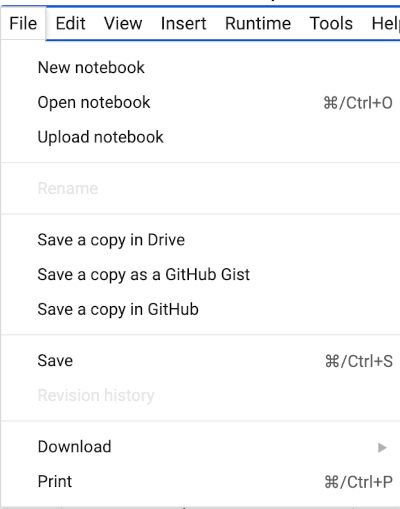

In [6]:
#@title
image = 'iVBORw0KGgoAAAANSUhEUgAAAZAAAAH9CAYAAAA01SpIAAAcN3pUWHRSYXcgcHJvZmlsZSB0eXBlIGV4aWYAAHjarZtpdpu5kkT/YxW9BMzDcjCe0zvo5fcNkJJFlWTL9V6pLFL8JiCHyIgEaPb//e8x/8N/pRRvYio1t5wt/8UWm++8qfbxX7+/nY339/2vvb1zr5+bs55vPa+B1/A4UPPj1b19/rzg7dV13qUPN6rzeWC8Hmjx8errpxs9HxQ0Is+b9bxRe94o+McB97xBf0zL5lbLxymM/Xh9Xv8wA/+MfuVp70Tc8+jnv2PBeivxnOD9Di5YfvvgHwMI+udN6LxJj9+caEPhfbyfuNCeI8EgX9nJfhiV+eyV2d5Pfvn8/d0np4T8+Nzwwasx8/vrl5+79LXxzTXxhyeH+f7kl89dc+vzdN7+nbOqOWc/ZtdjxqT5Oam3qdx3nDgwebiXZX4K/xLvy/1p/FRD9E5cvuy0g5/Jkz1uOS665bo7bt/X6SZDjH77wqv304f7WQ3FNz+DNfgm6scdX0ILK1ScOXFv4FP/PhZ3n9vu46arPHg5zvSOm7mH+/1/5+fbG52jkHfO1oedCAvG5RWEDEOe02/OwiHuvMVRugZ++/n8n/wa8GC6Zq5MsNvxuMVI7hlbiqNwHR04MfH6yDVX1vMGmIhnJwbjAh6w2YXksrPF++Icdqz4p3Oj6kP0Axe4lPxilD6GkHFO9Xo21xR3z/XJPz4Gs24SZdKp4qCOryLARvyUWImhnkKKKaWcSqqppZ5DjjnlnEsW+PUSSiypZBCxllZ6DTXWVHMttZraam++BcAxtdxKq6213nlo586dqzsn9D78CCOONPIoo442+iR8Zpxp5llmNbPNvvwKC5xYeZVVV1t9u00o7bjTzrvsutvuh1A74cSTTj7l1NNOf/eaMzft3D9+fu419+Y1fz2lE8u717i0lLdbOMFJks/wmI8Ojxd5gID28pmtLkZv5Dr5zDZPViTPKJOcs5w8hgfjdj4d9+67X5578ZuJ8T/ym3/znJHr/hueM3LdN577p9++8NpStZk2mOshpaGMagPpd4onJfaodvszmNIuOmEmd3Ie65xuazkbq3eGvFabpwxrdksu+kqdTBMzhMkAR7fp+B7PmFzEBzuMkyamS3O6PlJPa+2wWhplLsuUpzWLR40EdgrRMLvdBYwE+ecRCFLF4t6YokTnpyu7uTD8vuXJTVGGWE7ofRs/T1oE1NmrjXyOJgzM8Bc52uqBaOQ6BnGN/ZNPwya8O/LCsJnppV24lhTpvWzvq4Afe6bEzEMqZZ2x59o7xTLHzARhDaeu5NtIPG363HdqZ7g9CPLomnkdRcRjI12DzjWKKszR8TzxdE4r9izXnjnGIK5TY9w+5DGy8ZUyDgy1MoiizcBcA4gUsNgguDTadqPu3YkPQiKM2fJmAi0fxUUelSqA13hUCqRZ8GPE3hz3bbNAI8rm9jkpGIrvmHmmvjW6ZXNeQ++sLYcAUVx4swoTqGDi0qFKJFGBsATPDqXllYfNRHdZhDTJkTLG3y4PAsu1lUhYP6higL9Psp7dJCs+CnYTJnFpVCPnE4Iyo3OTOBxTKWEnPDHx+twEWzy2tB2qMxHblNXKmlglOXyS/dejrPgoP330KVAaU8vHBdwKYgAHeTI+MnZGbJgXgRgzMTh99zbXSUzNNU+ci0l+GgF49GkIdwCY9MMQVJHuIO4QMIMGsYK/lmrBjdy82YBXZJqQC2BrQEJP62MkEiN5MBPkidOd0oUPG8xJcW2P8XtbMU1/5s5ujWFAy3lgGo7wiUADGQQeKcui62H1sOfYvJ+9rv6tlWIx30dyt62vufLMZfQxx0rB8Xev8rztFToAaBDUIecdKEd5HiC1W4KUq18GkX+TMuEZoc/4NOeGJ4UFaHa5h5x4OqECIjdilnu3nWWHUpvdQJvQxVWeblMoOfLn5u0xgBQJOI+za6W5Tlw5rjLIsQgSzDjyJhCib8018WeKjt1tgCYVdKjxBG6Jg03GySBqg1200b4NhQb4F4Le9a30Jw8ZtctwvnsG5Qh4APTSrn0DknvtNPDzybUtpfhWlauVu4OhhMsgLJtPwDQWP5tZgWIEdTQko58Z31MsXAOe+wIkKFdzxDha5dGtUJDAaMv0BlaMwHgKi/l8mI5huv8mu3KIiUNlgTB57LLMQfvgsdohX6MUgrSJCrTFJA4oVZBPVJpENVuBarKqJ91Wq3F53k0ydBR4syGM8RoonEGI9ZKJMfwezML7PDhifk1kuNZ3wewyUk243VOi+6yALGaCG+IApAhFGiwqs629yClmABwdA2BRDVKzo7jCGIBESGWGDwSGdoCyCKVnntXWJVgnouDo4OcBSfJ7IpibCes8M0F6+Fcu8O9DLnw1QQIKfkDBWwZHZR4IGlMAfYI8TWlKu+pGdRSmOznDr5GgNWeDMYBfpESEXioO2OgYT0ExE0OPWtJ0O5Z+IAIv9mZwr0b9LjjMS3TUPosKGUAL6hHBx1OUidhEWfVAB2kUqWLBtT2ITgJ82yy6sYVHFxgahOdMDA7KvYQsQAjNoCxGhryWAxp1foB8ndnb4IoOrBKQMYU9YJVV9YpwLUQkhGe0BD0jISCm4BlsFIzO4sLY1Aq/YUkH3tDxWmkmLxtA2yVdkSdYwQQDlKUi/NLAMivD/TKRLqo0T2Dujxm83s7Ubw+NCCRApHYccLwG43y/z/NUWbdeWNweEvH9Qd9PgKOBniR2D75TFfJNXrGsqnQkRgIlZ0QD4W3+7AGYZoj2XIszyWboKlf4W8dOrf37I0OFm5INRe8EGAQrEz5QFLSBGANyYVs51sHT3Jcz/GgO87DHHywVGu4vIEmwpDZxtgnUE3bLd1zIiPMISHD+q4PPY7iMeP+DCcyfbQBRg9ZRhsisMiG4CApI/01xSmIS6bbRhPtcguiLg2/H4FnxGzO9+9p8cPbvAuE3piIYsIdhBtccTOODqR4HX499byoeBYl4mMReo8jI7+bS4S+OfmMyg1lejMLTMYoriLX2QEUk2rzs4Mz15seZXgcHYX+igLiEYIAa+Pzg/tmhfgFihWrCcJCVNMMaczaLhAA0K7dwI0yXzZoEM3ysqRVEIVvRdlgtiLKI6hWQLBPo2ZASVYjpAggHxz/wiNnVHgFufLWmwZKYDennR4feA6SSGxY4CzE2FNEuArSybOyQkSxiWkkq0li0rnkog4QfCOkCkhGPlSqlkjeqpkH0l6RQBms5wy87kQtINwRIgkp46h1sEDUM1m2ca+ruuSK/NJeDIOvQDbyDMMrIuYGY9Ex1qC1TK7R1hAqvh++v1kSxZnDMskGP+3KALwV8joC4gwnAu2PsEjARS2ZUq1PBOX7shGxA6SZxA9JH5mjXHOg11CeADv1ChEG00KNe5MhSrYOeFgFiVA01JaL8T4hoO+q2LSA6lh7wTx49DSaAEqP1vYuahaoiCQIjSmrb8utnr+abA5MqhcwrZ3TGGT/9CdBOZsbnFEAQFyGApo2LYi++Ae8Gky0VLSE+a2mIO6pi865JBxCFJB78OvcZilMm486IFPNxL+MoYK1DdHVphZNElSX1GKk+t/HRdoMHuLSqxkrsKHulJfKGLPrjt5cW8USux65wA7IVkYDhhu6OHefeRAycPcNqSRMndO9gPVUQBUMUeEhFbTuK1hAdEKexRPE6rIQUYKTwECqvCO4dRYcybh9tU7p26gH4YOVRamycHJ5GhCtbeOze65BOmfoPfUcZo9ThlVxekZTQtTHWhCrtyGCw1k6kCDQYEg0RL4Zj5IGSHGUNCyKp7hjQfmGizrc4FQjWPXw/XCG6KBGRp+YidnP8caMMc3ZgOtNLA5fcILfkCjK2OvRtJ67g1HhCHRBcgdXrrkW1T+2r7KUwupYYDAF+3/z+lYFMGCOZuGbuGDyjtUizPCPFtW/rzfDbHa9sGAc7D2hym3ULcoAQxgzcxwX+wvYGFMWm3uGF5OCQW7IQ2RVLirhY1Yw7Q8qL02u/QwCJaz6KlcCddhlwT/Q7tBbWbwncreTlgStT0lGQdmNoqMWVcxhqApsSjClEOwBUUAzpSipTNCJOLYkAkxAGFq/BApRlKfvXujgAJteKsgmDCYxZ1IqeFi5GBiDo4ZOLxIJer9sVc+oJA4h5KzupXsZ7jQUajmaCVyHC+eDXn2LKeaRCFOeGGlOUEZPUXPWQszpCAOfYkRTpwHqoHXoHO97zKALLxNv4IGc5i+IhrdVAFjcU+JAeYp9UDz2pl4B31PZxEV7UbSK/URWUoE39AIApAxYeDUMl4tclxjyneBT4hrXjEwUBsQarTgYYBWjRjSQ8wVXwhENJgSUrga6oHIj3CQxzIDzR6+q7+mBh3BDeLt4cJhXKPMqAw8Tetl1vnJJOm/xofaxOOVS6dcrTcGAUY4i368rdKqmLyYsLOxtIvKv2ih2oQi/UrgONSFhAN19IWwCfOoKsQirMYeHoTrDdAHBvYTmo020NArKRl9wCp7xlbEQ/gIALoGcGzSFJXO7Ixm65+ICBTU03ZEX0Ce2PaDMQCphvaAmnVwW2w3IC5EDN8U5pSYrflmem0ji1aXYStyco7QTgYGEAj4G6VvccCXQZ66Gm5NC8PYZGsU9NISR0BfCstg75UtU6KOQl7HjccmF+XnBeX2V0ND2xgtDASUZQPmzpGHgdbPM50qWDQFVC4aBMlvt4rhpFcEu14o/ZQ20ovIU4vpQPUZcJAVgEsQmzYtY9fLgVaHnSBDipCsTVodhx/23EfXqf1FbHPeFrC0EEJd0HwM8fbpZQXQ3sBtkQpdUSer8GV5f5cNllR5+O//iw+c8u/3XY/GeX/zps/vry9om+guaQ0GYiUA/HCA+annZbYsoUq02sL1KPUCAxCB3gMV0mdUl0QQIQKRRjdy8wjyvg07oGp3h1auAukcwpEL7X24arA9ZWR/v2LaA4dmuNzlhADmTTY54P4cjbYz6Mq/zhLPOz0/58lvn5M39/lvm7CXx/lvl7a3x9lvn6tPgHLho7JIYatvZpfoEmzXRIebvMi5yHR3l4f9tFjGmpk8zpXEYRz23OQfldh7KCrFAzslW0ZHXwzGMicHLFPaDsOswK3OV2sQX1XdQBjzaKJtQ8gdjbaC3dqf+QoB4WNCuekmuoqHqPyiixVZCKmVsYKOwVUpRBIZhbFjuARK7o5y7wZqgxfBNxAdJ3l9AOpk3o4hHhP+oPeVIJ9ePKiBklM2aFIHZifXkUggq1umKbzw8cAIjio+xGigYCUzdM2eYN+UKdkCOzQHIh10t9OjhAl0Pi4FlwlmIpJBO5sXuCW6elueSIXN8Osw8oTA697K2G+vHAr7yD9LrLBEEbRjpmxI5cXV3wZG/PFg7JQ8LdgMID0bIR1pPSrVnruLXXQFBSujVMFHWFnR5Yki1UzT7vQpQvJ+/lN66q2WwR/IH0SkwVDyLHg3Y2bC2/TItxZhVOl1VCUAMuRGIK/nXKvn1DB/eakXI0gbAc3F1mXSLgQE2Ca0K8tV0BykRpiY06zHBvG3qFhaS2c8G0iT7xqOrNXjUGDLSJ7YTu3QUVUqVIezxd3bpTel6bCWWrugQbYNweTqutFVyHIl2Vkq1FplOLXx0H5J21ooOrqVprtIKAhpBSVsuteqiXcRpCsxMhWsVdCz4F44CxgYqI2Yj+IOrQ41Whit4JyCQJ+c2slKQRAcX7AKlxCBK7gV7wtKSWtC5nThCLJninVvAQdqiZCsPOK18dJpHk/V3FoQJArnwqVAHkN4aHLaPpkeWDgPQiYU4MnkAkpjPqhDx3HoZJ7a/HwTi0BFFh4W0VHnrc7bIyrkLRIcPQTWaMoo4ILqcqxwdpdn/5KkptzieK/cpEkiJ8z70guRh1E921J62EiQRYmKFXv4pCRxWBCUPSMrmDhocJQ0YSrkr9NLFWuDXiQIv1lruoh7ytVqigd1ppQwY1rR5CRlGORHtvVv3x1nd28QTY5qJ8BdGpKofBqBygJJKNam5IjZa0AHhZ8OxoEVwmDZtPnwpfbQ2QBCFzZ4Ow51jEzVtOajIwHMrhPjzAqlhbb4lC9RuMvAQzIsAkTQOJg4xf+JH4J/og1xK6jIEUUWMhJZJfchoXQ8gJqAD398MAp7nMEDqR3gb8cokHBE+Uthiz98gjvEqWcuLCIRbBRcZozcDdlplFJtZmZCFBP1gDtsDqoa/w+umaSj9BPrNWkzF5i2g+LTqSrHyIJI5WiwcYRNs91F9I89HKrKUkOzpuw/8ri7VqPSugeEhHksm24xl1JQXRVGrxzXWK9lgk87jB0NreAYwQWxJ5CIXu8Qwhr4XOmiEcBS2EyokUCqgsMa2WmDgS/jnZlKzyp1Vqq90MzndP4Kut4BpwhmtwEVku5GkgComHGKXM+G2VaFnIicIgsjcZSBlYgSrMtZvsAzf8fCyEZXUksQ1VrSCziQL4GeoCu8D7d0xZnbyaDDetDS3mVdya7wOscqLitmohPBCelFJKnBJfG2fUTCQGta2B+6B4oHHEsZZ8iHlHnIS7Lw20vrsW1CFUghUCeziGEkPT/pGCxG2tETEoMZsW9YJiDB5pLdUur8LIj38sy0deKQjZz+hqPdT0mNV6qdrqkbMWDrk5kZoIMnTaotKq84zgRZNnIm0gqSCKU/QB8iqRrR0wGCkUEV5kdaWYqpJOOQQXxbvJxRrHNDAgrrHirWsPnTtBZG04GzuoB4xQW1IjTatnU8vS1aW7DokCPPzeyajDVrGxJfYc2avtINK4BHauRCMwHZVySR00q7LtZmDKc6nd27TM08C2apQSGKkRRFghEh+MG3f9BTheMDTfdiCcQpZ8Uf8JWaW1tFJcqgRrrkg4MbHOg2/iBmcknpIKHzwd+82KhYgAi/MefX8PDCGypf1VutGkN+kAxG1n31NQmRdT6wFg0eIXYLVEMsnyzFzJHxTA7mruke79gHGHcOUo0RpJ8NVGgpesJIlpWhWbIcy1q2ZoEViM8QRQ6oQDKVHnG3ShkA2h2TjVxv5Y9ohQ0amdDtN2sVq1H7Y/Wq7H1wutf9f7HdVqZqJ33NTRlL2oJo7ZicpxWm6b4KTGnFYMz3FkqrZVlKTtVGIsuR6IGTwHflnVzlb/mVQmYogkdezz8hP/zraBOY9gNaKZ1Ag/tKKv9qHK0fFxZDgi8AofqgOXcXJuami6AvJgLu2pAlUw6nbStEnx1jEbIhkueRe+CU1F08SjVd0OpfzEDmAhlLzyKSzZqsdDfEbVo5YN5oHgLmhzPgxN+xDsjKrujqlMABMcEFbDOBa+i2hA6OUSni8Kg9paSXotULcmnPoyUlVW7ET6EuFFG/BQ9LaQjkXkgGkTkWurt5csVLLCaKmBlGBvQiVVgNiqVpyDJBPfFKUQDqVzqMeCxrf9djZ/92pePnCf1mn0lDK1S+Z9rVcLvBDJo53lUMUWstfZxdwWTlKGHSo4zBqTaDV5absVteWr61Q7yqcLzY+u/Od1/7jM/PSJf3qg+ekT//RA85Mr7xN6CjoG+YY7ffxTC3onmQ65LgMs6AsicYb2AlUSQCtMas3PA0umZiftSaOwZUdJ8pI05ICYRkItBIQf5TgliC0cTWUWECar1ZacknaiP/Ah7krVSouEIZMoYyTo0NcJSF6nrQYD8KcCgRzaX0aGLlJRfQ0KboHRjYOAKipyCnPyEwWaqRDJ6U6gxa8YND+J2pfX4EI6EhsjSmEDGSBGg0OSMBNuBWVSr7XAH+DobbeZYoB9NQol1nPiZ/3u5MnUbrQTkK4t3jAn6ZFiikgAxMLyRvilDYUV5jTHslyLK9HXHoMzrSh+QK1IKFZIwdEqJdTV1eQ3XoMEWHS5VoIG3FD6gnwmQDZ1haiJ+S7LJcFYfiy59kPBomrePZMZX8fIiPaEXsOmp7akq0GPut8q4gowiBQzlDJnQNrIU5d2nIqsB/0SNqAD4jFI+aIVV22C7MVO9ChyTbuItEQ0L8kZFSrKDAJ8uG0Lu00halun14Z8SC4UykzF1IfS+23ljelDH1Qty1HFfiiPGIqS7ZKCjDLoF1ePrVZlzfl+60KKCo7NE0iIYKXQJictVTPUYEEkwnMHQXG8QVQ3pg2SMuSGlTvDbWq+130wyt3YQlFWyzm0QEFAL5AcFKz7dAJga0ut0dYNdGe+W2S0IgYP68B41c4bGWhXqhzprhRevkVicoubufrsIv1+MfMHTWjc0n/ttzEf2463ifipB8Vnf+huddRhHwZhT8VoTAYXRdu001Wr5QliPrVTdmorbyTwV9wetcqLuv3Qc4wIjyF9Rg5euWahxvNYPablQ81CQWor35cd0A9jx6bahodigeQY7TdFou0gZabVdfgL5ECepxLfW63bYZWMXBVG42LO+25n0PKEJyEI8W2iXYye2YE+2kyhrSy4A2T79Hx1V996q/02g2D1twu2RP9wPzWcQg3pWSQZ/4NhJIRESNAiiG5zImkgdqwVgJcbxse+l4Hux9BvfeNLU7858U/nmZ+e+KfzzN8++bvzzL+dyufzzD1xoc9iFTesGygIFBHwQimh89/OTvsfsSVG/9geYH7fk20LmqN2qdNm1abWHeAJ19amDwfFy2rGaseeeewnadPtBQsFpRFLe6nh0DIJQ9lQFYSGDmDNVwd2BC3I2QLPt0c74CP1exoelouWjBBokl/T71O1mB24TmUgwPmPk2Drm8KEllSr0q0jEKhDu02k9oz2usYG5UvaSYcI5+nVaUtPn/CKADqQLss/dEnQ8uCsrYyi/gvCYHFZvrofni/IvyuI0UGO+3MVmRKonfMj9Gt9JM2r+FU3VtvBcBYfmzUh3FabFfxGCI09QFavTVSSflB3J8avnZGz6PsoYW9t8dztU0E3P6/82h2tHh7BhPZEayOHmIbLKZVijb7YqN0IVowpLq/vS6BiHPS7SxUB7DXCp1XgMuVH/j1LPWvqjc8UdypA8sdkbSTekVLn4A4Yr9RAMUO0DYUBh8rOsLCp1hDKIu8K9qKxtOMOVKx77t4RNTNpyV4LdOthxGNlw1ueqmrS6qBl9hRtfCh0CQlbFkbCLXZXq1JLugbPNSAX/ItSklA8p15ViVstvGcJ/lVxEUxoH2I3pKSetr49BkkZ26zx2G8cltYDscvWnmf0CuEXZl1HWxFsROagJgI5hj0LTpuHezUQmtvpCx1G6wCcqpV2Usfpm3kZpsI9hNsOzQz0Lm1k0HZbLk/6ZsuvPwjTfuzapuqLJTCqOTCdXT5qLw6FKmCAAq/UvCEh4pCtiQ1ooOi3MAasQfMZkIhB7XfEhlpFDfQnRIO2F3844afHzbcnaKkQFq82NZka4biE3ABJqtP3i4o2twXVGxghFNQ8Hqdlnqkdvr9upAWce8rPzjD/+iY5lloHcdsJw5kNw43qD2rhZJLjEPKu74BNddwA2n4oyohzv6GiKHTSR6zSHqY0HAzRRyh0s0abTEAPomNIxW8ieCR1IBReN7g+ObuOdft66IWdCjiqZX27DDlZkcBRC1e4YC9U+pCNK/KlTW1v6DEv7ZEBHIsYiBpWB+c39WDVRo0xdtO0ahX0XYwzRf4siARP9Tw+vY5F3xsDhhZ435o2D5QGIVz65s3ARquS/lGrSmpzDg8xPxChcZd5P9wobKZ5HsmkOkd5AsEBtP8HykZvrRrdedsAAAGEaUNDUElDQyBwcm9maWxlAAB4nH2RPUjDQBiG36YWRVo62EHEIUN1siAq4qhVKEKFUCu06mBy6R80aUhSXBwF14KDP4tVBxdnXR1cBUHwB8TRyUnRRUr8Lim0iPGO4x7e+96Pu/cAoVllmtUzDmi6bWZSSTGXXxV7XxGiGYGIqMwsY06S0vAdX/cI8P0uwXv51/05ImrBYkBAJJ5lhmkTbxBPb9oG533iGCvLKvE58ZhJFyR+5Lri8RvnkssC7xkzs5l54hixWOpipYtZ2dSIp4jjqqZTfyHnscp5i7NWrbP2PfkLwwV9ZZnrtIaRwiKWIFFGCuqooAobCdp1Uixk6Dzp4x9y/RK5FHJVwMixgBo0yK4f/A9+Z2sVJye8TuEkEHpxnI8RoHcXaDUc5/vYcVonQPAZuNI7/loTmPkkvdHR4kdAdBu4uO5oyh5wuQMMPhmyKbtSkJZQLALvZ/RNeWDgFuhf83Jrn+P0AchSVukb4OAQGC1R73Wfd/d15/ZvTTu/Hx4VcoV3QbxxAAAQi2lUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4KPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNC40LjAtRXhpdjIiPgogPHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj4KICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgeG1sbnM6aXB0Y0V4dD0iaHR0cDovL2lwdGMub3JnL3N0ZC9JcHRjNHhtcEV4dC8yMDA4LTAyLTI5LyIKICAgIHhtbG5zOnhtcE1NPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vIgogICAgeG1sbnM6c3RFdnQ9Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9zVHlwZS9SZXNvdXJjZUV2ZW50IyIKICAgIHhtbG5zOnBsdXM9Imh0dHA6Ly9ucy51c2VwbHVzLm9yZy9sZGYveG1wLzEuMC8iCiAgICB4bWxuczpHSU1QPSJodHRwOi8vd3d3LmdpbXAub3JnL3htcC8iCiAgICB4bWxuczpkYz0iaHR0cDovL3B1cmwub3JnL2RjL2VsZW1lbnRzLzEuMS8iCiAgICB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyIKICAgIHhtbG5zOnRpZmY9Imh0dHA6Ly9ucy5hZG9iZS5jb20vdGlmZi8xLjAvIgogICAgeG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIgogICB4bXBNTTpEb2N1bWVudElEPSJnaW1wOmRvY2lkOmdpbXA6NDBhYjc2ZGMtOGVkYi00YmYzLTkzMDEtMDkxYWZlYThhMTEzIgogICB4bXBNTTpJbnN0YW5jZUlEPSJ4bXAuaWlkOmI5MDJlMjY0LThjYmYtNGI3OS1hNWVmLTQ1OTBkZjkwOGU4OCIKICAgeG1wTU06T3JpZ2luYWxEb2N1bWVudElEPSJ4bXAuZGlkOjVkNGVjZTFmLTc3ZmQtNDY0MS1hYjc2LWZlMjUxMGU5OGE2MSIKICAgR0lNUDpBUEk9IjIuMCIKICAgR0lNUDpQbGF0Zm9ybT0iTWFjIE9TIgogICBHSU1QOlRpbWVTdGFtcD0iMTY1MTc2MTkyMTA1Njk0OSIKICAgR0lNUDpWZXJzaW9uPSIyLjEwLjIyIgogICBkYzpGb3JtYXQ9ImltYWdlL3BuZyIKICAgZXhpZjpQaXhlbFhEaW1lbnNpb249IjYyMiIKICAgZXhpZjpQaXhlbFlEaW1lbnNpb249Ijc5MiIKICAgdGlmZjpPcmllbnRhdGlvbj0iMSIKICAgeG1wOkNyZWF0b3JUb29sPSJHSU1QIDIuMTAiPgogICA8aXB0Y0V4dDpMb2NhdGlvbkNyZWF0ZWQ+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpMb2NhdGlvbkNyZWF0ZWQ+CiAgIDxpcHRjRXh0OkxvY2F0aW9uU2hvd24+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpMb2NhdGlvblNob3duPgogICA8aXB0Y0V4dDpBcnR3b3JrT3JPYmplY3Q+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpBcnR3b3JrT3JPYmplY3Q+CiAgIDxpcHRjRXh0OlJlZ2lzdHJ5SWQ+CiAgICA8cmRmOkJhZy8+CiAgIDwvaXB0Y0V4dDpSZWdpc3RyeUlkPgogICA8eG1wTU06SGlzdG9yeT4KICAgIDxyZGY6U2VxPgogICAgIDxyZGY6bGkKICAgICAgc3RFdnQ6YWN0aW9uPSJzYXZlZCIKICAgICAgc3RFdnQ6Y2hhbmdlZD0iLyIKICAgICAgc3RFdnQ6aW5zdGFuY2VJRD0ieG1wLmlpZDoyNWMyMGYyMS1jYzAxLTQ4MDctOTA2YS1iNmQ1OTJmNmVmMzIiCiAgICAgIHN0RXZ0OnNvZnR3YXJlQWdlbnQ9IkdpbXAgMi4xMCAoTWFjIE9TKSIKICAgICAgc3RFdnQ6d2hlbj0iMjAyMi0wNS0wNVQwNzo0NToyMS0wNzowMCIvPgogICAgPC9yZGY6U2VxPgogICA8L3htcE1NOkhpc3Rvcnk+CiAgIDxwbHVzOkltYWdlU3VwcGxpZXI+CiAgICA8cmRmOlNlcS8+CiAgIDwvcGx1czpJbWFnZVN1cHBsaWVyPgogICA8cGx1czpJbWFnZUNyZWF0b3I+CiAgICA8cmRmOlNlcS8+CiAgIDwvcGx1czpJbWFnZUNyZWF0b3I+CiAgIDxwbHVzOkNvcHlyaWdodE93bmVyPgogICAgPHJkZjpTZXEvPgogICA8L3BsdXM6Q29weXJpZ2h0T3duZXI+CiAgIDxwbHVzOkxpY2Vuc29yPgogICAgPHJkZjpTZXEvPgogICA8L3BsdXM6TGljZW5zb3I+CiAgIDxleGlmOlVzZXJDb21tZW50PgogICAgPHJkZjpBbHQ+CiAgICAgPHJkZjpsaSB4bWw6bGFuZz0ieC1kZWZhdWx0Ij5TY3JlZW5zaG90PC9yZGY6bGk+CiAgICA8L3JkZjpBbHQ+CiAgIDwvZXhpZjpVc2VyQ29tbWVudD4KICA8L3JkZjpEZXNjcmlwdGlvbj4KIDwvcmRmOlJERj4KPC94OnhtcG1ldGE+CiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0idyI/Pq2KBuoAAAAGYktHRAD/AP8A/6C9p5MAAAAJcEhZcwAAFiUAABYlAUlSJPAAAAAHdElNRQfmBQUOLRW0nr5zAAAgAElEQVR42uydd3hVxfa/31PSe++FQEihBZASilKkKSLgxUJRFFEBQSmiKNcCKKBIUYpRQVFEEVEREFFyCb2FZkiAJCSE9J6TnJOcnLZ/f/jN/nlMQFDAcO+8z8Oj2XVm9p71mVlrzT4KSZIkBAKB4Do5cOAAQ4YMwcPDgz179tCyZUvRKP9jKISACASCv4JOp6O2thYAHx8f0SBCQAQCgUAguDbUALejhigUCvH0BAKB4J8UkAbxkO2xJEGztM2KK/y/QCAQCP4RATGZLZzJrGF9YikXsrWYjZZmOuVo+I/id38qkBT/f9uVkITeCAQCwY03y5lZeVLKhapmPPNoSksUfJGkZ0uBBcX/iYiYlQgEAsEtnoFYTLV0jHFGqVTeNoWur9dzZ6lEhD8oFEo5HiLiIoJmh0hREfw3C4gkSQQEBGBra3vbFDojI4NH7w/Fwd4epUqFUqn4P/EQAiIQCAS3TEDg9szCMplMmMxmVAD8JiIgiVmIQCAQ3CKUt2vBzWYzZrMZSZLkfwKBQCAQAvKnWCwW+Z9AIBAIhIBcM7+fdYjZh0AgEAgB+UsCIkREIBAIhIBcl4A0JSQCgUAg+C8REI1GQ2ZmJjqd7rZsoIqKCjIzM6mrqxNvi0AguCoWi4VLly6Rk5PzX1UvSZK4dOkSly5dstquvtYLpKamUlpaesX9wcHBtGrVilOnTpGdnc29996LnZ0dhw4dYubMmXzxxRd07NjxHxGAlJSUK85SVCoVvXv3vuL533zzDe+99x7r16+nc+fOVFZW8sMPP9CvXz9CQkJuatm1Wi2nTp1CrVbTrVu3Jhd7NhyjUqno3r07mZmZJCcnc//99+Pk5HTbvKCHDh3CaDRy5513/s+lYptMJs6cOUNNTY3VexkUFISLiwseHh6o1epbWia9Xs/27duJjo6mbdu2t1V7FhUVcf78+T89ztPTk7Zt297QRdRGo5ExY8bQvn173n///Vv+3Kqqqjh16hR+fn7ExsY2+VxPnDiBo6Mj7du3R6VSXXO9xo4dS1RUFAkJCXK9rrl2W7duZfny5VfMfHr77bdp2bIlK1eu5Pjx40RHRxMbG4skSTdt9nEtrqvCwkLGjh2LXq/HYrE0Osfd3Z2srKyrjihqa2vl886fP8+rr76KSqVizJgxKBQKioqK2LNnD3FxccTExNy46aFSydtvv8327dvJysqiRYsWjY45d+4cjz76KKNHj+aOO+7gp59+Ys6cOXTv3p2IiIjbptM///zzZGVlUVhYiI2NTbMrX1ZWFsePH6d79+6EhYXd0GvX19fz0Ucf8d1332EymeR3zWg0EhUVxYMPPsjzzz9/0xb7JiUlkZ+fz6hRo+R7ZGRkMGXKFAYOHMjnn39+WwnI6dOnGT58OI6OjnI/UqlUSJKEyWSSj5s6dSrR0dE3tF0lSaK+vh6z2fyP1D07O5vBgwcze/Zs5s+f3+SAc/r06dx5551ER0fj4OBwzdc2GAyN6nXNAqJQKNDr9ezYsYPg4OBG+93c3FAoFLzwwgvk5uYSGRnZbF4oBwcHZs+ezT333NNotHG9o4/Y2FhWrVrFHXfcIY+US0tLmT59OqtXr76hAuLo6MiIESM4dOgQ27ZtY9q0aY3Ebd++fdjZ2XHvvfdia2vLfffdR2RkJAEBAbdVp7e1tcXZ2bnZlu/y5cu8+uqrfPLJJzdcQBrew5iYGJYtW4a7uztGo5FLly6xZcsWli9fjpOTE5MnT74ps7OffvqJxYsXM2LECNmYxsTE8Nlnn92WvzLYu3dv0tLS5LYqKChg4MCBjB8/nhdeeEEWaAcHh2Y5WPk7KBQKPD09r/qe2NjYoFQqb8i7dF3zq5qaGsLCwggNDb3iMUFBQfj4+Pzp1MhisVBaWkp2djbBwcEEBgbe1O9x+fn5ERERcdVGkyQJo9HI+fPnsbe3b3IE7+DgQPfu3XFycsJisVBZWUlZWRkqlQqNRkNZWRlubm437MUcPnw4r7zyCsePH6empgYXFxerEcFHH31EaGgorVq1An77ZThXV9dGoyqLxUJJSQmXLl0iNDQUf39/ub21Wi11dXV4enpaPbfS0lLs7e2t7nmlY280BoOB6upqHB0dsbOzo7CwkIKCAiIjI3F3d7d6jpIkUVdXR2ZmJgaDgVatWskDmj8+37KyMrKysvDz8yMkJMSqDlqtFr1ej5ubG1VVVVy8eJH27dtTW1tLRUUFkiRRWVlJeXk57u7uN7z+Dg4OhIWF4enpCUDr1q3p2LEjJ0+e5OjRo4wbNw5nZ2eqqqpQqVS4urrKdTSZTFRVVeHg4ICTkxNms5mKigocHR1xdHSksLCQ/Px8wsLC8PHxkQeEv/9VwfLycurr6/Hw8ECpVNK5c2fs7e3ltquqqkKSJDw8PKioqODixYu0bNlSNlgN71hOTg4RERF4eXk16tMWi0V+BkFBQQQGBt7wdnRycrLqu7a2ttTW1uLh4UF4ePgVXTTp6enU1tYSHR2Ns7Nzk7bCYrGQk5NDcXEx4eHh+Pr6XpPdarB3OTk5uLq6Eh4eLrdtc0CSJAwGg+z6a926Nfb29le0l5IkodFobmwQXZIk5s6dS79+/cjPz7/icbW1tbz77rv4+/sTHx9PSEgIY8aMITMz8x9twL1799KpUyc6dOhAVFQUQ4YM4cKFC1YvyKlTp4iJieHAgQNUVVXh7e1Nv379sLOz47nnnsPHx4eUlJQbVi4XFxcmTpzI2bNnKSoqstq3Z88eiouLiY+Px9fXF4CvvvqK6OhoCgsL5eN0Oh0LFy4kICCA+Ph4goKCeOKJJ8jOzpbP8fX15ejRo1Yj7ujoaJ555hmre/773//G19f3qvGwG8H58+eJi4tj/fr1jB07lpCQEHr27ElYWBjffvutPJW2WCxs27ZNfm5dunTBw8ODNWvWoNfrG7mJWrRoQffu3WnRogUPPvggZ8+eBX77ssH69euJj49nypQpclvt27cPHx8fHn74YUwmE/fddx89evRoFEy8Wbi4uBAdHU1ZWRm1tbWUlpYyYsQIFi9ejMFgkI9LS0ujXbt2JCQkAJCZmYmvry+vv/46s2fPJigoiG7dutGxY0c2btwIwI4dO/D29mbLli1EREQQGhpKfHw8ZrOZrKwsfHx8eOutt+T2ufvuu7n//vtZuHAh3t7edOvWDW9vb5YsWUJaWhpjx44lICCA7t274+vrS0JCAvX19XIZ6+rqWL58OX5+fsTHxxMaGsrDDz9MRkbGP2o8T548yYABA2jbti1du3bF1dWVRYsWUVlZaXVccXEx06ZNIyIigvj4eAICAnj00UfJzMy8qju9srKShQsXEh4eTrdu3YiJiWHAgAHs37+/WWSQSpLE8ePH6dOnD3FxccTFxeHs7Mx3332H0Wi8ott1wYIF1ycgCoUCs9mMxWKRPyXS8Pfvp0dXC95aLBY2bNjAJ598wjvvvENGRgZfffUVaWlpPPfcc1cs8N/FZDJhMBga/Wt4gJcuXeKpp57C1dWVL7/8kqNHj9K5c2e2bdtmJSAKhQJvb28UCgUuLi6kp6fz3XffYTAYWLBgAefPnycqKuqGldvGxobevXuj1Wo5cuSIVTv+8ssvGAwGxo0bZ+UKaShfQ8f/5JNP2LhxIytWrCAzM5PPP/+c48ePM2PGDEwmEwMGDABg165dVkLp7u7OsWPH5MGARqMhOzubhx9+GG9v75v+Ynt4ePDuu+/i6enJnj17WLlyJbGxsSxatIiqqioAzp49y7Rp02jRogVJSUkkJSUxevRoFi9ezPfffy+31ffff8/y5cuZPXs2Fy5c4IcffiA7O5tp06bJhkKpVGI2mzl27BizZs2SEycuXLjAhx9+iFqtZsOGDWzfvp2goKBb0rmrq6s5efIknp6e8ojVwcGh0ai9wXXRsL3h7++//x6NRsPu3bv59NNPCQoKYu7cuZw7d45+/fpx4cIFhgwZQm5uLidPnmTHjh2yeyMsLMzqPo6OjhQUFJCdnc3u3bs5ePAgw4cPZ/Xq1UyYMAFXV1dOnjzJvn37GDJkCO+//74stJIksXHjRj766CMWLVpERkYGmzdvJjMzk6lTp1qJ4a0kIyODSZMmoVQq+fHHHzl//jyvv/46a9eu5fXXX5ftg0aj4ZVXXiExMZE1a9aQnp7Ol19+SVpamtU71JRx/vzzz0lISGD27NmcOHGCTz/9FICXX35ZHsTdaCwWS5M2z2g0NhKtixcvMnXqVHx9fTl06BBnzpzhscceY+bMmVcdDKtUqutzYQUEBPDZZ5/h5eVltT06Opq77777mq5x7tw5nn76aWbOnMn06dNRqVS0atUKSZKYOnUqu3fvZsiQITe8QZctW8YXX3xhNSVzcXHh/fffx9vbm3Xr1pGXl8eHH35Inz59AOjYsSMmk0k2RE0Z98jISPR6PWazmeDg4BsqHg3ExcXh6enJunXrGD16NCqVisLCQlJSUhg1atRVs8FSUlKYOnUqr7zyCs8++yxKpZKWLVtisVh4+eWX2bdvH3369OHee+/l9OnT6PV6VCoVZ8+eRaH47SvHycnJBAUFyW6k559//qa6r37PQw89xKuvvoqdnR19+vRBkiReeOEFKioq8PLy4sSJE2g0GkaMGMFdd90FQGRkJP/+97+5fPkyACUlJTz66KM8/vjjzJ49G3t7e1q3bo2TkxMTJkzg4MGD3HPPPQDY29vz1ltvyX83uAULCwtRKpWEh4fftPieTqcjLS0NNzc32QW1Zs0azp8/z8svv4y7uzvFxcXXfD2z2Uy3bt145513cHNzk0Vg0qRJXLhwgZiYGDw8PPDx8cFoNF5TULVVq1YsWLAAPz8/4LfkmSFDhmBnZ8fChQvx8PCQR93PPfccly5dIioqivPnz/Pkk0/y/PPPM2vWLKt+/9RTT/Hzzz8zdOjQWyoeBoOBpUuXkpOTw+7du+Vss1deeYW6ujo2btzIgw8+SM+ePTl48CB79uxh/vz5jB49Wn7PVCoVU6ZMYdOmTUyaNKnRPerq6rh48SL29vY8//zzeHh40KlTJ0JDQ/nyyy+tZmg3CrVazbZt2zh9+nSTdS4pKbH6e/78+Wg0GjZv3iyHJ9566y169uzJ22+/zVdffXVjYiA2NjYkJyfj5ORkpWJ2dnbXfI39+/fj4eFBz549KS4ulq8TFRWF0Wi8quvr7xAcHEx0dLSVgNjb26NSqairqyM3N5cuXbrQvXt3q/q2atXqH//elo+PDwMHDmTNmjWcOHGCrl27cvnyZTIzM3nmmWeumkWyZ88eXFxc6NatG0VFRXJ7R0dHYzKZKCoqQqFQMHLkSBISEsjJycHf359du3YxYsQIysvLSU1N5Z577qG8vJy6ujpat259y1Jt77jjDqv6eXl5YWNjQ0lJCZGRkXTu3BlXV1c2b95MVFQUnTp1wsvLiw8++EAu44EDB7C1taVNmzZyLKPBV+7i4kJlZaX8jF1cXOR40h9Hkr//780gPz+fKVOmoFQq5biOo6Mj27dvZ+DAgX/JQEZFRcni0eDb1uv1VinD11M3d3d3OUYD4OzsjK+vLwMHDrRKgvDz88Pe3l52dR46dAgvLy969erVZL9vEPtbSUMsZuTIkVaDArVazTPPPMO6deu4ePEi8fHx7NmzB19fX7p06dIoRjl16lR++umnJgXEwcGBli1bUl9fz8KFC5k4cSIBAQH07NmT3r1737S4r5ubGx06dGj0TOvq6qzauqioiNzcXLp3744kSVb2NyoqiosXL17VK3RdAlJQUMCPP/7YaMR7PWlwGo0Gd3d3/vWvfzUyzN7e3mi12pvSoKNHj2bUqFFXfJGqq6sJCgpqtmsQHnvsMVauXMn+/fvp0qULX375JW5ubrRt2/aqZW4YqQ8bNqzRPm9vb2pra1EoFHTo0AGdTkdpaSk1NTXs37+flStXkpSUxLZt25g0aRKHDx/Gz8/vqkkUN5o/1u2Pf7dt25aEhARee+01+vTpQ2RkJCNHjmTw4MHy+p6CggLc3d157bXXGmWyeXl5UVRUJMdUGmZd/wSBgYG8+eabuLm5YTKZmDhxIv7+/nTu3Pkvz/j+rP1uBA1psn/cplAorFxArq6uPPTQQ41SQb29va0E7VbOQGpqaggODm5kyO3s7PD29kaj0WA2m8nPz8fR0dEqoaRhkBkVFUVJSUmTswmFQsGYMWOQJIm33nqLd955h379+jF06FDuvfdeWrdufVPc9X379uWNN95o0h4cP37cSlC0Wi2JiYmsX7/e6lhPT098fHwoLy+3GjT8ZQExGo04Ozs3asTrwd7enqqqKrZs2dKk68Xd3f2mBYokqenfC7Gzs8PBwaFZrzYPCAhg2LBhnDhxgvPnz7Nx40aGDBnypy4zR0dHKioq2LZtW5OpvQ3uyICAAAICAuSFoL1796Zdu3bodDpmzJjBpUuX2LlzJ1FRUXLAvjmgVCoZPHgw/fv3Jzk5maNHj5KYmMjGjRt57733GD58OC4uLtTU1DBv3jx69erVaFTm4eFxy1xyV8PZ2Zm2bdvi6emJxWLhhRde4N///jf79u3jgQceaJR5djthb29PdXU1X3/9dZNp0L+fJd0qbGxscHZ2brLfWywWampq5JTXgIAACgoKrNaRNDyH4uJivL29sbGxaTKW4+XlxXPPPce4ceM4cOAAJ06c4Msvv2T79u2sXbv2iplhf9feXSk28vt9arUaW1tbBg8ezMSJE5uMrXl5eV3xeupb/dAaRKOsrIzhw4c38tn+Ex3Z2dkZNzc39u7dS0VFhZWhNRgMzWJW4ujoSL9+/Vi0aBFvv/02RqORp5566k/PCw8Px2KxUFFR0cjH/Pv2DggIICIigi1btpCfn89LL72EQqGgc+fOtGvXjiVLlnDs2DGmT5/erAzTl19+iVar5fHHHyc+Pp74+HgGDRrEgAEDWLt2LcOHDyc2NhadTkdNTQ2dOnVqNCiysbH5xxZ+XU0Y+/fvz0cffSQLX0PqtZ2dHVqt1qpT/34BYnOkYe1YaWkpI0eObDb93tfXl6SkJF566SWr1PvDhw9jsVjkVOTY2Fh++uknCgsLrdbBpaSkUFVVdUV3lEaj4euvvyY8PJy7776bYcOGMXToUKKjo3nllVfIysq6KQJyrTS4JHNycujQoYNVOKLhfVIoFFdMcrjlH1Ps168fcXFxrFmzhqNHj6LRaKioqODIkSP06tXrmj5B8FfQaDQUFxc3+ldSUoJCoeD++++nrKyMRYsWUVhYSHl5OUeOHGHZsmV/+nLb29tjsVgoKChAo9HclEwyhUJBt27dMJlM7N27ly5dutC+ffs/PW/QoEHExcWRkJAgB5zLy8s5cOAAffr0kVOnFQoF/fv359y5c6jVajkWZGtryxNPPMHBgwdxc3O76mdf/glycnKYPHkyu3btorS0lKqqKjnTpCEgHBcXx6hRo9i6dSt79+6lqqpKnsoPGTKEU6dOXdMI2mAwUFhYSHV1daOR6M3A19eXZ555htzcXD766CPMZjOOjo74+/uzZ88esrOzqaysJCcnh6+//lpez3G92NnZYWtry6+//nrTXEl33XUXHTt2ZM2aNRw+fFju98eOHaNnz56kpqbe8nfHzc2Ne+65h5MnT7J8+XJKS0uprq4mJSWF+fPnExcXR8+ePVEoFPTu3RtHR0fee+89cnJyqKmpITc3l48//hg/Pz8mTpx4xfskJSXx3nvvkZaWRlVVFWVlZRiNRhQKxS3/1ElTs6NBgwZx7NgxqzbIy8tj6tSpfPDBB1c9/5aX3t3dncWLFzN9+nQmTZpE27Zt0ev1pKWl0bt3bwIDA2/KfT/++GO2bt3aaDahUqnYsGEDffv25aWXXuKLL77g/PnzuLm5kZmZibOz859mSjTk6q9du5bk5GSmT59Ohw4dbngdoqKi6NKlC4cPH2bo0KHXtHLb09OTRYsWMXPmTJ5++mnatGlDbW0tqampDBgwAH9/f/nYu+++m+rqaqt1JQD9+/fn/fffZ+jQoc1q8RPAxIkTSU1NZcaMGcTExODk5MS5c+fw8fHh5Zdflg3k7NmzmTp1KlOmTCEuLg6TySSnXF9LTMfDwwNvb2/efvttfvnlF+bMmXNLRo733HMPgwYNYtu2bYwZM4aIiAgGDBjA7t27eeKJJ2jRogUFBQVWmTXXS/fu3fH09GTGjBnExsbKa0lutLFevHgxzz33HJMnT6Zdu3bU19eTlpZGjx49mvy6xa3ggQceID09nc8++4xjx47h4eFBWloaHh4eLFu2TLZHkZGRvPDCC8yZM4dx48bRsmVLioqKyMrKYt68edxxxx1NXt/V1ZWnnnqKSZMmMW7cOGJiYtDpdFy4cIGuXbvetO+MXY/XZPz48WRmZrJ27VoOHTqEp6cnFy9epLa2lieeeOLq97lw4YIUFhb2p5lUBw8epKCggLvvvltO1WvK77Znzx6qq6vp06cP7u7unD9/ntTUVOLj463EIScnh+TkZAoKCnB1dSUwMJD4+PhrMooZGRk4OTnh4OCAnZ0darUalUrV5PL8oqIiDh48eNWGbvjwY21tLUlJSeTk5GBra0tERAQBAQGkpqbSrVs3goODuXz5MsnJybRv317O1rFYLBw9epRTp06hVCoZMmTITfncBcCZM2fIyMigTZs2TX425cSJE+Tk5NCvXz+reFJWVhanTp0iPz8fDw8PORPk92mbJpOJH3/8EXt7e6usn6qqKvbu3UtwcDCdOnW6KS69rVu3YjKZGDFiBEqlkoKCAo4cOUJ0dDQxMTHyPc+ePcv58+fp0qWL3Mbl5eUcPXqUwsJCtFot/v7+dOzYkcjISKuyFhcXc+jQIQoKCnB0dJTbwMXFBUmSSE5OJi8vj169euHj49PIzbJ3715SU1NxcHBg2LBhNywWZDAY2Lt3L3V1dfTv399qHZUkSfz6669kZmbSokUL2QV34MABzp07R319PUFBQbRs2ZLMzEwCAwPp3r07paWlJCUlERAQQK9evaz6w/79+4mMjCQuLk6u248//sjFixdxd3fn0UcfpbKykqSkJLy9vbnrrrswm81s374dtVrN4MGD5Vl5dXU1//nPf/Dx8aF79+7y9tzcXI4fP07Lli2tBlMN/Sc/Px8XFxe53/+duOqfUV1dza5du/D19ZVTvf/Y/vv37yc3N5eqqip8fX3p1KkT0dHRjY5NSUkhLS2NwsJCXF1dad26tVX7mkwmtm3bhqOjIwMHDpTfv4yMDM6ePUt+fj42NjYEBwfTq1evGx77KSgo4NChQ/j4+DRZV61Wy+7du3Fzc6NXr16y206v17Nv3z7y8/PRarWEhIQQFRUl2xiTycT27dtl22AwGHjttdeuXUBuFiaTCaVSeV3pbNcjIH8Fs9mMQqG47hS7Bj96cwjIXq29VSrVf+UXbxs+9Pln9furz7e5PeOGgOiNKIskSZjN5uvui7e6jzWH9+fvtFVztxHX+k7p9Xpee+011P90gf9pH2BT/NWH25yFozm3943iWjv033lOzekZ30jje6v98c2xr1zr+/N32qq524jrfaeUCAQCgUBwndjY2AgBEQgEAsH1YWtry8SJE4WACAQCgeD6UCqVhIWF3d4C8r/206cCgUDQrIRENIFAIBAIhIAIBAKB4JbRKBetuX+kreGnMxUKUCChUIDy//4fJPFEBQKB4OZb4v8vIAUFBXI84fb4yqdEwqZsUvNBpVKjUKpRKP5vEaGIiwgEAsEtkA9Q1xkUBAQG4OJsf9sU/sPPD7L/Qh3/KVGCwgxKEyiU/yceQkAEAoHgVqB2sAVbm9vL6Pa6w5tedyDEQiAQCP5JAbkd4wYhwYHiyQkEAsE/LyC3Hzfzy50CgUAguDZEGq9AIBAIhIAIBAKBQAiIQCAQCISACAQCgUAIiEAgEAgEQkAEAoFAIAREIBAIBEJABAKBQCAERCAQCARCQAQCgUAgEAIiEAgEAiEgAoFAIBACIhAIBAIhIAKBQCAQAiIQCAQCgRAQgUAgEAgB+Z9Fp9Oxfft2Tp48ecvueebMGb7//nuqq6vFAxAIBM1fQNLS0njggQf47rvvkCTrn93V6/W88cYbzJ07l7q6utu28bVaLbW1tdctIMuWLbulAnL06FHmzZtHVVWV6DECgUCm2f6krdFoJDk5mfT0dNq2bUtkZKS8z2KxUFpaSnV1dSNxuV2QJIlFixZhZ2fHyy+/jEqluq5z/4nyCgQCwW0xAwFQKBRotVrmzZuHTqe7rpG9wWC4JiN4rdua2ldfX3/VGYQkSVctS3p6Ounp6U3ez2KxoNVqMZlMV61rfX09er3+T2ctf3aM2WympqYGs9ksREUgENzeMxAApVJJYGAgx48fJzExkfvuuw+FQnHF43Nzc1m3bh05OTk4ODjQtm1bJkyYgFqtZtu2bSQnJzN58mQCAgIA2LNnDz/++CMzZ87E398fgJ9++omdO3cyffp0wsPDra5fVlbGvHnzGDx4MEVFRZw4cQKj0Uj79u15/PHHcXJyko+9ePEin3zyCYWFhTg4OBAbG8u4ceNwcXFh165d7Nq1iwsXLqBUKpk9ezajRo0iPj4egIyMDNatW0dRURHu7u707duXe++912qWUllZyZo1a0hJScFisdCmTRuefvppbG1t5WOKior46KOPyMnJwcbGhrCwMCZNmoSbm5tVvRITE9mxYwcVFRW4u7vTvXt3/vWvf6FWN/161NXVsXTpUiorKxkzZgwdO3YUPUkgEDOQZqZuajVTp04lJiaG6dOnk5OTc8Vjy8vLmT9/Pnv37qVv3760atWK9957j3fffRez2Yy3tzdbt26lqKhIPueTTz7h22+/5dSpU/K27du3s3//foKDgxvdw2Qy8f777/Pcc8+xa9cuYmNj0el0zJ8/nx9++EE+7tKlS0yYMIHTp0/Tq1cvWrVqxeuvv86zz44zywsAACAASURBVD5LTU0Nvr6+dOzYEWdnZ1xcXIiLi8Pd3R2A7OxsHnnkES5evMjAgQNxc3Pj/vvv55NPPrEqy5IlS/jPf/5Du3bt8PT05OWXX2bu3LnybKe4uJjnnnuOzZs30717d9q3b88333zD2LFjKSkpka9z8OBBZs6ciUajYdCgQdjb2zNr1ixWrVp1xRnPypUr+eKLL+jWrZsQD4Hgf5kLFy5Ier1eam6cPn1aioyMlPbv3y+lpqZKwcHB0rRp0ySdTifpdDppypQp0rhx4ySdTidJkiTNnTtX8vPzky5evChZLBbJZDJJy5cvl/z9/aX8/HwpKytL6tmzp/Tll19KFotFysvLkyIjI6VWrVpJS5YskYxGo1RZWSkNHjxYWrRokWQ2mxuVqbCwUAKkhx56SCorK5NMJpNUVlYmRUdHS/fcc48kSZJkMpmkmTNnSnfddZeUnp4umc1myWg0Svv27ZPCwsLk+5vNZmnUqFHS2LFjJYPBIFksFkmn00kzZsyQhg0bJpWUlEgWi0Wqra2V3nzzTWngwIFSXl6eVFxcLPXt21caNWqUVFpaKplMJqm2tlZasWKFFBcXJ9/znXfekaKjo6WLFy9KZrNZMplM0v79+6U2bdpIq1evliRJkmpra6UOHTpIDzzwgKTVaiWLxSIZDAZp/vz5kr+/v3TkyBFJkiQpISFBiouLkzIzM6V58+ZJERER0qpVq5psI4FA8L9Ds0/jlSSJqKgoXn75ZXbs2EFSUlIjN1Z9fT2nTp1iwIAB1NfXk56eTmZmJiEhIZSVlXHu3DnCw8MJDQ1l165dSJLE8ePHiYiIYNCgQfzyyy/o9Xry8vIoKyujV69eKJVXbpoBAwbg5eWFSqXCy8uLzp07k5WVJccuvv32W3r06EFkZCRKpRK1Wk27du3o2bMnv/76KwaDQa6DQqFAqVSiUCjQ6XSkpKTQqVMnysvLSU9P5/Lly/j7+1NQUIBWq5XLMHDgQLy9vVGpVDg4ONCtWzf0ej2lpaVotVpSU1MZNWoUQUFBKJVKVCoV8fHxtG7dmq+++gqAs2fPcu7cOaZOnYqTkxMKhQIbGxsmTpyIra0tx44dk++n1+v58MMP2bBhAy+++CLPPPPMVdtIIBCIGEizQKVS8fDDD/PDDz8wY8YMtm7daiUihYWFVFVVkZmZyRNPPCEbZqPRSFhYGHl5eSgUCvr378+TTz7Ju+++S1paGl26dGHUqFF06NCB3NxcysrKsLe3l2Mk18rvYx+5ublkZ2fTqlUrq2McHBwIDg7m8uXLGI1Gq1hFAwaDgfPnz5Ofny8LXcN2k8l01QC3q6srdnZ2XL58mZYtW5Kenk6PHj2ws7OzasfIyEi2bt2K2WzmwoULGAwGYmJirK7l6OhIZGQkGo3GKu6xefNmVCoVAQEBV41FCQQCISDNCg8PDxYuXMiIESNYsmQJGo0Ge3v73wI5SiVKpZKRI0cyZsyYRiPjhvjCkCFDANi2bRv79+9n/PjxtG/fnnvvvZeNGzfi5uZGaGgooaGhf7mcrq6uAI2ys8xmM7W1tfLM5UrY2toyfvx4hg4d2mhfcHDwFde9GI1GLBYLzs7OKJVKnJycMBgMWCwWq/bQaDS0a9cOpVKJo6MjCoWi0TUlSUKj0eDg4CBvUygUPPXUUxw5coQ5c+YQHh5Ou3btRA8SCP6Hua18EG3atGHatGkkJiZy4sQJebuPjw/u7u6kp6cTERFBTEwMMTExREdH4+fnJ2dYeXh48MADD/DBBx/w66+/0rNnTwDGjRvHV199xQ8//ECPHj2umH10Lbi7u9O5c2eOHDlilb5bUVHB6dOniYmJsZoV/H5WYWtrS0REBHq9npYtW8r1aNmyJX5+fri4uFgJwe/Pzc3Npa6ujrCwMBwcHAgPD+fo0aNWbq/y8nJSUlIYMGAACoWCli1b4uTkxI8//mhVh/T0dE6cOGE1i3J3d+eRRx5hxYoVuLq6Mn/+fMrLy0UPEgiEgNwe2NjYMH78ePz9/a3WIDg4ODBhwgR27tzJsmXLyMvLo6SkhA0bNjB69Gg5PmFra8vAgQMpKiqiX79+cqZVhw4dcHJyYv/+/U2O/K/X3TZnzhxOnTrF2rVrKSsrIzs7m6VLl1JQUEDPnj3lmIefnx+//vormZmZ6PV6PD09GTRoEJ9//jnr1q2jvLycS5cukZCQwOTJkykoKJDvs27dOjZu3EhOTg6HDh0iISGBNm3a4O/vj7OzM/fccw+JiYl88MEHlJSUkJeXx4oVK9BqtYwaNUoW5Keffpo1a9awY8cOdDodR48e5dVXX6V///706dPHqm4KhYLQ0FBee+01UlJS+OCDD8RaEIHgf5nmmoV16tQpyd3dXdq7d2+jfYcPH5ZCQ0OlRx55RM7CMhgMUkJCghQbGysBEiDFxcVJn3zyiWQwGORzExMTJUdHR2nbtm3ytqqqKmnkyJHSwIEDr9oWDVlYH374odX2CRMmSL6+vvLfGo1GWrFihRQaGiqXpXfv3lJSUpLVeT///LPk6OgoAdKmTZvksrz55ptW5/bo0UPaunWrZLFYpOLiYik+Pl566KGHpAEDBkiApFarpb59+0p79uyRr20ymaQPP/xQiouLs2qPTZs2SRaLxapOM2fOlJydneXjHnzwQSkrK0s+5oMPPpAiIiKknJwcSZIkyWKxSEuWLJEAafPmzVbXEwgE/zsoLly4IIWFhVm5VZoD9fX1aLVaHB0drXzx8Nt6jOrqahQKBW5ubrKP32QyodFoKC4uRqlU4uvri4uLCzY2NvK5er0enU6Hs7OzVZ0rKytlV82VAsQmk4mqqirs7Oys3EmVlZVYLBa8vLysjtVoNOTl5aFSqQgODsbV1dUqHmEymcjNzaWkpITWrVvj4eEB/BY0r6mpIT8/H1dXV9zd3XFzc0OhUGA2m6mqqsLGxgaLxUJxcTFms5mgoKBGCwTNZjMajYaioiKMRiNBQUF4eHg0isHU1tZSU1PDpUuX8PLyktutoR1qamowGAy4ubnJ7r36+npqampQq9Vy2QQCwf8WzVZABAKBQNC8EYn8AoFAIBACIhAIBAIhIAKBQCAQAiIQCAQCISACgUAgEAgBEQgEAoEQEIFAIBAIAREIBAKBEBCBQCAQCAERCAQCgUAIiEAgEAiEgAgEAoFACIhAIBAIhIAIBAKBQAiIQCAQCARCQAQCgUAgBEQgEAgEQkAEAoFAIAREIBAIBEJABAKBQCC4rQXEYrFQU1NDRUUFFRUVVFdXYzabxZP7AwcOHOCpp57i0qVLt+R+tbW1vPTSS6xatUo0vuC/CovFQl1dHXq9HkmSGu03Go3U1tZiNBqbRXm1Wi1arfYfube6OT9Is9nMxo0b2bhxIz///DMWi4W77rqLMWPGMHr0aJycnP7rXl69Xk9mZiaBgYF4enpe83k6nY7Dhw9TX19/yzpZamoq9vb2SJKEQqEQlkdw22M0Gvnll184efIkKpWKnj170rNnT1QqFQC5ubns2LGDgoICgoKCGD58OH5+fle8VmJiIq1btyYiIkLeXlhYyJkzZ6irq0OtVuPv70/Hjh1Rq/+aOX7rrbdQKBQsWLDguvuh2WzmzJkz5ObmYrFYcHBwIC4uDn9//9t7BmI2m3n77bd58cUXiYqK4ptvvmHr1q3Ex8fzxhtv8MYbb2Aymf7rXuCsrCzuvPNOkpKSrvtchUIhDLlA8Dc4ceIEmzZtwtvbGwcHB9atW0dOTo4sCOvXrycjI4MWLVqQkZHBihUrmpylAJw9e5YtW7ZYCcOhQ4d444032Lp1KydPnuTAgQOsXr2apUuXUltbKx934cIFtm7dSl1d3TWJ3l8ZOOp0Oj744ANWrlxJYmIiR44cYcuWLbz++uucPHny9p6BZGVl8e233/LMM88wffp0XFxcABg4cCC+vr689957DB06lDvvvBNJkjCZTKhUKhQKBSUlJVgsFvz9/Zs0qEajkby8PFxdXfH09LQ6xmg0olAoUKvV6HQ6iouLCQoKws7O7qpiZzabsbGxQZIkLl++jLu7O+7u7o2OlSSJsrIytFotoaGh8sim4ToGg4G6ujqMRiMmk6nRqKSsrIyamhpCQkKaHLE0tEVubi6+vr5XnKVptVqKiooICAi44jEWi4XS0lL0ej3BwcFWZb3aywygVquFmAluO/bt20d4eDhPPfUUJpOJGTNmkJycTEREBCaTidTUVGbMmEGXLl04c+YMS5cupaysDB8fn0Y2ISUlhbCwMLy8vAA4f/48H3/8MZ6enjz77LN4enpisVg4ffo0n376KT/88AOjRo1CpVJx9uxZNm/eTI8ePXBwcPhLdampqeHYsWOEhIQQGRlp1R/NZjObNm3i2LFjDBo0iIEDB6JSqSgrK+O9995j9erVvPjii0RGRt5+MxBJkjhz5gy1tbUMGTJEFg8Ae3t7/vWvf+Hl5UVKSgpms5nc3Fx69erFe++9x/Dhw/H39yckJIQHHniAy5cvW133yJEj3HnnnURERODt7c1jjz1GXl6e7D4aNmwYs2bNYtGiRTg7O9OmTRvatWvHoUOHrjjS+Pzzz/Hz82Pjxo3ExcXRokULYmNjWb16tVW8pqSkhMmTJ+Pv709ERATh4eFs2rRJHnkMHjyYjh07EhAQwOTJk7GxsZH3VVdX8/rrr+Pj40NERAStW7dm586dGAwGK4P/ww8/EB4eTkREBD4+PqxcudLKP1pfX8/q1avx8/MjMjISV1dXXnnlFUpLS63qlJuby/jx4/H39yc8PJzY2Fi2bNlidb8/dpiffvoJW1tb3njjjWsaOQkEzY2QkBByc3PJyclBo9Hg6upKRUUFZWVllJaWIkkSDg4OFBYWcuLECWxtba3sUwO1tbUkJycTGxuLk5MTFouFHTt2APD8888THh6Oq6sr7u7udOvWjdatW3Pq1Cm0Wi0XLlygpKQEGxsbMjMzuXjxIgD5+fmkp6dTVFTEyZMn2bt371XrUlVVxXfffUdGRkajfcXFxZw4cYI77riDUaNG4e3tjYeHB5GRkbzwwgsA7N+/H4vFcnu6sJKTk3F3dycoKKjRPicnJ1q2bMnFixflEa+trS0rVqyge/fupKSksHbtWs6dO8ebb74pG+H09HRmzJhBhw4dyMzM5ODBg+Tk5DB//nz5GBsbG7Zt28bZs2c5ePAga9euxcvLi2XLlqHT6a5YXmdnZxISEnjllVfYt28fPXr0YO7cuRw9ehQAjUbD66+/zrFjx9i5cyfZ2dlMmDCBWbNmsXbtWgA+/fRTdu3aRVVVFQsWLCAnJwd7e3uMRiNvvfUWX3zxBdu3bycnJ4dx48Yxffp0jhw5IpdBr9ezdu1ali5dypkzZ5gxYwbLly/np59+ksVv9erVLFmyhPnz53P58mW+/vprduzYwbx589Dr9bJYzZkzh5ycHBITE8nKymLYsGHMmDGDTZs2NSn4Bw8eZM6cOcyePZsXX3wRR0dHYY0Etx1DhgwhMDCQxYsXs3jxYkpKSjh16hSLFy9m+fLlODg48PHHH7No0SKOHDnC448/jr29faPrnD59moqKCvr27Ssb85KSEmJiYvD19bU61sHBgf79+xMfH4/FYmHJkiWcPHkSGxsbPvvsMzZs2ABAUlISixcvZtGiRaxevZqdO3decVD7e7d2UxQWFlJXV0fHjh2xsbGx2ufj40NkZCRZWVlXtXnN2oVVXFyMvb19k4FkOzs7PD09qaiosFLIsWPH8tJLL6FQKGjTpg1VVVXMmjWL6dOnEx0dzeLFi7G1teWdd97BxcWFli1bMm3aNP71r38xc+ZMQkNDAYiOjub999/Hw8OD+Ph4cnJyWLFixVVjLiqVinnz5tGnTx8A3Nzc2LJlCykpKfTo0YOMjAy2bNnCunXrGDhwIABz587FYrHw/fffM2LECIKDg9FoNGi1Wnx9feXyHDt2jG3btrFy5UoGDRokj2LS0tL45ZdfiI+Pl8vw/vvvM2DAAABatGhBTk4On332GUOHDiU3N5fPPvuMSZMmMWPGDHnEpdPpeOyxx3j44Yfp2bMnu3btYtOmTezevZu77roL+C1QV1NTw7p16xg0aJAsEGazmSNHjjBy5EhGjhzJrFmzmhyRCQS3A+7u7syePZuMjAzq6+vZvHkzPj4+9OvXj7q6OtauXcvdd9+Nj48Pfn5+hIeHNzkb37lzJ/Hx8bIbu76+nrq6Ovz8/Jp0BXfr1k3+/zVr1vDtt9/y/fffs2DBAqsgvcViISQkhEGDBuHh4dFIIAwGgxwP0el0ckZZdXU1SqUSpVKJo6MjhYWFKJXKJu2rra0tXl5e5OXl/WnGa7MVEIvFgiRJ15Wy+/uHqVAo6NOnD2azmbS0NAIDAyksLMTLy4tdu3ahVP42+crLy8PFxYXz588TFhYGQKtWrXB1dZWvExAQQHFx8VXvrVKp5PMBWrZsiY2NDdXV1bJv1dXVlZ49e/7/xler6dWrF998881V0/DKy8uRJInMzEx5RCBJEvX19Vy4cEFuIzs7O6syuLi40KZNGxYuXIjFYqGwsBCDwcCQIUOsrj9ixAgee+wxDh8+TM+ePdm/fz+tW7emV69e8jE2NjY8/PDDTJ8+naKiIjmr5JdffiEpKYkuXbqwYMGCRr5ggeB2w9XVlc6dOwPw888/ExwcTPfu3amtrWX16tV06tSJwMDAK56fkZFBRUUFY8eOlQ28xWLBbDbj7Oz8p7FBtVotxzdtbGysBEetVvPoo49esZ/t37+fnTt3Ar/FI/V6vRwgBwgICOCZZ55Bp9OhUChwdnZu0pbZ29tjMBj+1IXVbAUkODiYjIwMKisrGwV59Xo9ZWVlhIaGykJwpdEEQFFREeXl5VRXV5ORkWHlE1SpVERERMiGvqmp318JBisUCquypaSkoFKpGgXWHRwcMBqNV8wpN5vN5Ofno9frWb16tdXLZGtrS0hIyFXL4ezsTHV1NSaTCZ1Oh1qtbjRldXR0xNHRkfz8fNnVFxIS0qhtnZycMBgMsqurYaZYXl5OixYtuHTpUqPpuUBwu1FRUcHFixepr6+nurqa3NxcDh48iF6vx87OjuTkZLy9vfHx8aFVq1ZW9sFisXD+/PlG7neVSoVKpbri2pLrsStXS/f18/OjU6dOwG9u85MnT8rxToVCgaurK2q1Gjs7OyRJssr8+n0dDAbDNSXCNEsBUSgUdO3alW+//Zbs7GyCg4Ot9ldXV5Oens6AAQOwtbW9oqEvLS1FoVAQGBiIo6MjdnZ2TJgwgZkzZzYyjgqF4qYuDGrZsiUHDhygsrISDw8PebtOp8PJyalJPyqAUqnEy8sLPz8/PvvsM1q0aNHkiOVKaDQavLy8UKvVcjzlj4Hw6upqamtriYmJkd1ahw8fxmw2W11bo9Hg5ORk5aKKiYlh3rx5zJo1S46RNBW3EghuF/FYtGgRWq1WHnzV1tbyww8/YLFYsLGxISkpCUmS0Ol0jB07ljvvvNPKhbRv3z7at2+Pm5ubvN3e3h4nJyc5Q/SPbqyCggJ0Oh3h4eGNBnjXQ5s2bYiNjZW9K6mpqdxxxx0MGTJEto9KpRJ/f38sFgtVVVWNrmEwGKisrMTFxeVPMy+bbRC9ffv2eHp68uWXX1pVsq6ujo8//hitVktcXJyVEGRmZlqp6N69e1Gr1bRr1w5vb298fX357rvvqKiosJomHjx48E+nan+X3r17o9Pp2Ldvn7ytYaFRYGCgbJQb/JQNfkyFQoG3tzeVlZUkJyfL5Var1aSkpMgZZA0zs3Pnzsl/V1ZWcvr0afr164dSqSQwMBA7Ozu2bt1qNQr6+uuvAWT3Wr9+/cjKymLPnj1WL9X69evx8PCwmr537dqVO+64gyVLlqDT6VixYsUVM7UEgubOzp07qaiokJNB/Pz86NixIy+99BLPP/88tbW1PPnkk7z00kv07t2b9evXW2UcpqamUlBQwODBgxt5Atzd3UlLS2vkrq6vr2fjxo2sWrXqb2cvNng+lEqlvC7s99sa7GVQUBA2NjakpqY2iu02eGrCw8P/NBmm2bqwWrRowZNPPsn8+fPJyspiwoQJ2NrasnnzZg4dOsTkyZPp2rWr1TmfffYZjo6ODB8+nOTkZBISEpgyZQqBgYGoVCrmzJnDmDFjeOKJJ3jppZfkhUKnTp1iw4YNjWY6N5KOHTsybNgwXnzxRcxmM61bt2b9+vV89dVXvPvuu/LKz4iICEJCQvjmm29o0aIFXbp0IT4+nv79+/PCCy9QVlbG3XffzdGjR1m1ahWPPPII06ZNk91dU6ZMobCwkDZt2vD111+TnJzMypUrsbOzIyoqikcffZR3330Xs9nMqFGjOH78OCtWrGDevHlyzvd9993H/fffzyuvvEJtbS0RERGsWrWK5ORkli5dipubm1UnkCSJzp078+yzz8oJC+PHj7+qe1EgaI4UFhYSGBhIcHAwJpOJiooK4uLi8PDwwN7eHqVSiUajITY2lrZt27J79260Wi0ODg5IksTOnTvp3LlzoxiFWq3mnnvu4Z133uGjjz5i4sSJODs7YzKZSE9PJy0tjd69e8sG28nJCYVCQWlpKZ6ente0BqspGmLJf8TX15fY2Fj2799Pq1at6NSpEzY2NtTU1PDBBx+g1+vp2rXrn66Ob9afMhk3bhwREREsWLCAWbNmARAYGMjSpUsbBYIBJkyYwLlz51i1ahW2trYMGDCAOXPmyAtx2rdvz4YNG5g7dy6jR49GqVTSpUsXVq5cSUREBAaDAaVS2ehhNbXtj/ub8hc6OTnJRtTV1ZU333yTlStXMnv2bOrq6uR1GkOHDpXPsbW1Zc6cOSxatIgePXqg0+lwdHRk/vz5REZGsnz5chYuXIifnx+PPvooTz/9tHxvX19fnnzySdauXcvly5dxcXHhzTffpH///nLZnnnmGfz8/HjnnXdISEjAwcGB8ePHM336dNkd6OTkxIoVK1i4cCHTp0+XFxIuW7ZMziBr6BQN9VMoFIwZM4asrCzef/99OnfuTIcOHYRFEtxW9O3blxUrVpCQkIBer5cNacP7HhcXx6ZNm0hNTSU1NZUWLVrg7e0N/LZ2qri4mNGjRzdpL9q2bcsjjzzCli1bWLhwIcHBwdTW1pKRkYGHhwcjR46UDXaXLl3YsGEDn3zyCVFRUTz55JPXXRcvLy8mTZrUaLE0/JZwM27cOMrKyli/fj2JiYk4OzuTn5+PVqtl9OjRdOzY8c9nPBcuXJDCwsKuutK6OVBWVobFYsHb27vRyPby5cuMGTOGxx9/nMcffxyNRoMkSVaxhj+i0WjkoNKtxmAwUF5ejre39xX9nWVlZXLQ/fcPv2FU5OPjc8UAlyRJlJSU4OHhYRUj+uPIpLi4GFdX16t+U6yuro6qqip8fX3/8ihIILhdMJlM7Nmzh9OnT6NSqejWrRvdu3eX3/2CggJ++uknCgsLCQgIYNiwYXh7eyNJEnv27OG7777j1VdfvWo24smTJ8nOzqasrAxnZ2d8fX3p3bu3VRzUbDaTlJREZmYmHh4ePPjggxw7doy8vDwGDRpk1We3bdsGwNChQ6874Uen03Ho0CEKCgqoq6vDw8NDjqNciwfhthGQq9EgIOPHj+eJJ54Qn9AQCAR/mYYUeYVC0aRdNJlMGI1GbGxs5BmDJEls374dhUJh5VG4GkajEZVKdVVDfS3H3AjMZjMWi+W6P0Gk/m954H83PU4gEAjgN3fslbIiwXqdxu/Pue+++67rPteSbfV3MrKuh4Y04+vlv0JAfH19WblyJX5+fmL2IRAIBLeI/woBcXBwsPoUgEAgEAhuPiLPUiAQCARCQAQCgUAgBEQgEAgEQkAEAoFAIAREIBAIBAIhIAKBQCAQAiIQCAQCISACgUAgEAIiEAgEAiEgAoFAIBAIAREIBAKBEBCBQCAQCAERCAQCgRAQgUAgEAgBEQgEAoFACIhAIBAIhIBcN2azmbq6Okwm0y25nyRJ1NXVYTAYmm2b/BNlrK+vFz8/LBAIAbm5pKam8p///AetVttoX1paGrt376a6uvqar3f27Fn69+/PqVOnbkn56+rqiImJYd26dc324Ws0GmJjY/n4449v2T2XLVvGoEGDqKurE71PIBACcnNGxomJicydO5fy8vJG+3fv3s20adMoKSm55mtaLBa0Wu0tHfnm5OSg1+tvyexqz549/PLLL1gslutq55KSkltSxt/PQKqqqsQMRCD4L6BZ/yb6lYyhJEmYzWbx9P4Pk8nE+vXrUalU3HXXXdja2opGEQgE/9sCcq2j6NzcXACcnZ3Jz8+noqKCVq1a4efnh1qtvqpAlZeXk5OTQ0VFBZGRkfj4+ODs7Gx1nEajoaKigoyMDLy9vQkKCsLHxwel8v9P4HQ6HUVFRVy8eJHw8HDc3d2vWm6dTkdxcTGenp7U1dVx+fJljEYjERERBAQEoFAo5GNra2spKioiMzMTb29vAgIC8Pf3R6FQoNFoKCwsRKfToVKpyMrKwtvbG29vb/k+eXl5ZGdnExISgp+fn7zvjzORS5cuIUkSYWFh+Pr6WtWvvr6egoICsrOzcXZ2Jjg4GF9f30btW11dTW5uLnl5eYSHh+Pj44Onp+dVn0F+fj4Gg4GAgAAcHR1FrxQIhIDcGsxmM7NmzSIzM5Pw8HBOnDiBJEm4uLgwefJkpkyZcsVzz507x4wZM0hLS8PGxgaDwcDw4cN58cUXCQkJAX5zQ73++uskJiaiVqvR6/W0bduWt99+m7i4OFlgFi9ezKeffoqdnR1Go5GBAwcSFBR0xXtnZWXx8MMP07t3b06fPk1hYSEmk4nQ0FDeffddevToAYDBYGDp0qWsXbsWhUKByWQiMDCQF154gfvvv59ff/2VsWPHolKpALj77rt58803eeyxx9Bqtbzzzjvy7KSuro6uXbuyaNEioqOjAbC3+f7gYgAAIABJREFUtycxMZGtW7dy+fJlTCYTYWFhLFiwgL59+8pl+PDDD1m1ahX19fVYLBa8vLx46qmnePrpp2WxKysrY+bMmezZswe1Wo3RaKRr1648//zz9O7du8l2SExMZNasWdx555289dZbokcKBLcR/xVZWCqVCrPZzKhRozh+/Dg///wzvXr1YtmyZZw+fbrJc/Lz8xk9ejS+vr78/PPPpKWl8emnn3L48GESEhJkF9nbb7/NgQMH2LRpE2lpaXz11VdUV1ezfPn/Y+/O46Kq/v+Bv+6sDDPDvoiigAJiKgiayuaSouFumhmYC27l1sdcslxyy0r7an4sW/yoWX3cd01NQU3TABMVNxAB2UGWYZl9O78/Pj/utxFwKT99rd7Px8PHo2bOPXebOa97zrmX+YQvc/bsWWzbtg0LFy5ESkoKfvzxR7i5uT1yPkIqlSItLQ0rV65ESkoKvvjiC+h0Opw+fRomkwkA8OWXX2LdunVYvXo1rl+/jgsXLiA8PBxz585FTk4OIiIikJ6ejujoaPTq1Qs3b95EfHw8AGDXrl3YtWsXvvzyS2RkZODUqVOorq7Ghx9+yG+7QCBAXl4e5s2bhytXruDIkSNQKBSYNWsWf5NCYmIiNmzYgDfffBNpaWm4dOkS4uLiMHv2bCQmJvI9ncWLF6OwsBDfffcdbt26hWPHjkEqlWLt2rWoqKhosP8XLlzA7NmzERkZieXLl0OpVNI3kpA/k8zMTKbX69mzxGq1svXr17Nu3bqxe/fuNXj/k08+YYGBgSwrK4uZTCY2evRo9uqrrzKz2cyXycrKYkFBQezbb79ljDGWlpbGOnbsyFJSUhhjjO3evZv5+vqyzMxMm7o/+ugjJhQKWXZ2NmOMscLCQlZcXMwsFgszm83MbDazSZMmsdatWzOTycQYY6xHjx4sIiKCGQwGvp7KykoGgK1bt67RfUxPT2ehoaHs6NGjzGq1MsYYq62tZZMmTWKTJk1iarWaVVZWstjYWPbuu+/y62KMseLiYubq6srmzZvHGGNMr9ezCRMmsMmTJ/PbYDabWfPmzdn8+fP57bZarezrr79mANi9e/dYVVUVUygUbMWKFTbblpiYyCQSCTt27BhjjLFhw4ax/v372+yfSqVigwYNYrNnz2Y6nY7l5OSw0NBQtmPHDn5/GGPs5MmTzMfHh505c4YxxtjSpUtZ586d2dmzZ1nXrl3ZK6+8wkpKShgh5M9H9FcJQqFQyA/jAICjoyMCAgJQVlbW4NkPi8WCoqIiPPfcc3B1dbV5LyYmBm+//Tbu3LmD1q1bw93dHWlpafj666+Rk5OD2tpa3Lx5EwaDARzH8XMMo0aNspm8trOze6ztdnR05IeAJBIJXFxcUFpaCsYYysrKUF5ejl69etnMNXh5eSE6OhrXr19/2IUBzGYz7ty5gxUrVvB3PRUWFsLFxQUFBQVo3749rFZrg3mHsLAwGI1GFBcXQ61W48SJE1i8eLHN/snlckRERODKlSvQarUoLy+HWq2Gr6+vzfxNhw4dYGdnh+vXr6NXr14AgOrqasTHx0Or1eKjjz5Cs2bN6EqOEBrCeno4jgNjrNHbPeuHhn7dUDXYMYGAn7N4sA6r1QqNRgOxWNygjvpGsv7W1k8//RSTJk1CSUkJ+vTpgylTpiAoKIiv02g0gjEGmUz21I+B0WiE0WhsNIzs7OxgMBiaXLaiogIikQhGoxHV1dX8P4VCgfj4+IcGHMdx/LJ1dXWQSCQNyv+6jNVqRU1NDQQCgU2I1wc7x3HQarX8a2azGb6+vvDz88M333zzRM/zEEKeHc9kD4TjOLRq1Qo6nQ4qlQq+vr4279+6dQsikcjmbqIHg6D+CnrgwIEN7hQSi8Xw8PBAQUFBg6ew6+dMQkNDoVKpsHbtWowaNQoff/wxf1fSsWPHcOHCBTDG4OzsDLlcjoyMjAb78HsplUoolUpkZGQgMjKSX79Op8O1a9cQGxvb5LItW7ZEdXU1Bg8ejNdff73RMiqVCgAaBGxRURHMZjPc3Nzg6ekJBwcH3Lp1y6aMyWTie2lKpRLe3t4wmUx8nfXy8/Oh1+sRHh5uEypfffUVMjIysGDBAmzfvr3JbSSEUA/kiQUEBPAPFNbW1sJsNsNgMCA1NRVJSUno0aMHHB0dbRq9rKwsvtzJkydRWlqKli1bNtqYt2/fHpWVldixYwf0ej2sVivKysqwfft2vPjii/D29obZbIZEIkFOTg70ej30ej1u3ryJS5cuwWAw8A1vXFwcUlJScPHiRRiNRuj1euzdu/eht68+Dm9vbwQFBWHdunUoLi6GxWKB0WjEnj17UFNTg5iYGD6s5HI5NBoNtFotrFYrWrVqhf79+/NDb2azGUajEXfv3sXmzZv5YT2ZTIbDhw/ztxFrNBr885//RMuWLdG5c2cIBAJMmzYNycnJSElJgdlshslkQnp6Ovbs2YO2bdtCKpXC2dkZ7dq1w4EDB1BVVQWLxQK1Wo2kpCS4urqidevW/H4pFAr4+PhgyJAhGDZsGFasWIGTJ0/Sw4WEUA/k6QXImDFj8M477+DatWvo1KkTVCoVjh49isDAQLz77rs25bOzs/GPf/wDvXv3RlVVFTZt2oTBgwejR48ejdZffyfT8uXLce/ePfj7++P8+fOoqKjApk2bIBQK4e7ujjFjxmDr1q1444034OnpiXPnzqGoqAi1tbV8QI0dOxZnzpzB3LlzERsbC5VKhd27d0Mul/+uYyCRSPDOO+8gLi4Oo0ePxssvv4zy8nLs3bsXM2fOxAsvvMD3qKKiorB8+XKsWbMGvXv3Rt++fbFs2TIkJCRg6tSpiI2NhUajwe7duzF06FD+Li+O41BYWIjJkyejZ8+euHv3LpKSkvDuu+/yjf748eNx8eJFvPXWWxgyZAjMZjP+9a9/Ydq0afwdX82aNcOMGTMwbNgw1NTUIDw8HFlZWfjiiy+wa9cueHl5NfzwiURYsGABSkpKsGbNGjz33HPw9vambyUhfxLCmTNnLnVycnroA3f/JxsmFCIiIgK9evWC0Wjk/2xJv3798Pbbb/PPWFitVhw4cAAeHh6YPn068vLyYDKZMHLkSMybN49vxDUaDezs7BAcHAw3NzdwHIewsDB06NABtbW1KCsrQ5s2bfCPf/yDf74DAJ5//nm4u7vDZDJBJpPhlVdewdChQ9G+fXv4+fnB3d0dDg4O/HMbVVVV8PDwwNKlS+Hh4YHAwEAEBgY22D+dTgexWIwOHTrAw8ODH0qqqqqCl5cXQkJCIBaL4eLigv79+0MoFKKkpAQCgQDDhg1DQkICPy/BcRwcHBz4/fTx8UFAQAA8PT0RExMDi8WC8vJyiMViDBkyBAkJCZDL5bBYLBCJRJg+fToCAwNRWloKpVKJV199FfHx8fx8hlKpxIABAwD8Z27FYDBg6NChmDx5Mr9eAGjTpg2GDh0KjUaD4uJiODs7Y/78+Rg4cCA//FZZWQkfHx9069YNIpEIMpkMfn5+4DgOVVVVCA4Opm8lIX8SXGZmJvPx8YFUKn2mN1Sv10MgEDT4Mx1msxmvvfYaxGIxvvnmG1gsFlgslif6cx5WqxVGoxFSqbTJuQuj0chPzD9qOx/3DqwnZTQawXEcxGJxo+9bLBZ+2K2xOSGRSGTzdPmDzGYzGGNN1g/8Z+6DMfbI46vX6yEWixtMqhNCaAjrD/eoRrl+/PzB23kfh0AgeGT9jxtI/63weJxteNi+P872P04v9GHh8kcdB0IIBchTI5PJ6EqXEEL+YH+aIayH9TwqKipgtVrh6elJZ5QQQqgH8pgJyHFwd3enM0kIIX8w+k10QgghFCCEEEIoQAghhFCAEEIIoQAhhBBCKEAIIYRQgBBCCKEAIYQQQgFCCCGEAoQQQgihACGEEEIBQgghhAKEEELInytAmvoFPkIIIeRhRACgUqnoB5kIIYQ8eYA4Ojo+0W+IE0IIISLGGAQCAfVACCGEPBGaRCeEEEIBQgghhAKEEEIIBQghhBAKEEIIIYQChBBCCAUIIYQQChBCCCEUIIQQQihACCGEEAoQQgghFCCEEEIoQAghhFCAEEIIoQAhhBBCKEAIIYQ8PaJneeMYY42+Tr/jTgghFCBN0ul0qK6ubhAcYrEYcrkcdnZ2dPYIIeT/0DM/hCUSiSCVSiGVSiEUCmEymaBSqWA0GunsEUII9UCaZm9vD7lczv+/RqNBbW0tampq4O7ublPWYrHAarVCLBY/tE6TyQShUAiBoPH8tFqtsFgsEIlEDx0us1gsAGDze/KMMVgsFgiFwiaXNZvNfDgSQggFyH/Jg/MgcrkctbW1fCNc35CrVCqYTCYA/xnqcnBwgL29PQCgqqoKBoMBjo6OqK2tBWMMHMdBKpXCycmJb+jNZjNUKhUsFgtfRiaTwcHBARzHwWQyoaKiAlKpFGazGRaLBRzHQSgUwsnJCWq1GgaDgV9WqVTahF9976k+eAQCAZycnCCVSumTSAj50/nT3YVlMBj4xrc+YOrDw97eHo6OjhAIBKipqWkwzFVTUwOJRMI36nq9nq+PMYaqqiqYzWbY2dnxoaHVaqHVahtsg1AohFKphEAggNlsRmVlJQwGA2QyGRQKBQCgtraWD4v6kLNarVAqlXBwcOC33Wq10ieREEIB8rRZLBYYjUYYjUbo9Xp+Yr2+kdZqtTbhYW9vDycnJz4wfs3e3h4uLi5wcHDgl9fr9fx6hEIh5HI5nJycIJfL4ejoCOA/E/o23TaRCK6urlAoFHB1deUDSKlUwtHREUqlkh9Gq69frVbDYrHw666vnzHWYDsJIeTP4JkfwmqsB+Do6AiZTGbTQHMch7q6Ov6/60OhHmOMDw0AkEqlqKur48uIRCK4uLjAYrHwr9cPn/26h8AYs5m7qJ9LsVqtNsNVMpkMRqORr7++p1Nff31dAGyG4wghhALkKZFKpZBIJPxVPGMMUqm0QUhoNJoGyzb1HElTampqoNPpwHEcBALB737e5Nfrr99OtVpNnzpCCAXIH0EikfA9B47j+DuwXFxcbHobbm5uTd5V9Tj0ej10Oh3EYrFN3aWlpU9lPziOA2MMHh4e9KkjhPwl/Kkm0WUyGYRCIYxGI3/H1a/nGoRCIf/vSYeF6oeYpFIpBAIBBALBU33WpH7Yq/4W4vp/JpPpdwUfIYRQgDzOxgoEsLe3t5l4rr9bSq1Wo7a2FiaTCTU1NVCpVFCpVE/U0wH+MxRWV1fH1wHgqdwl5eDgAACorq6GRqOB0WhEVVUVVCoVTaITQihA/ggKhYK/ctfpdBAIBHBxcYFQKIRarUZ5eTk0Go3NUFRjcyH1Q0q/7t3Uh1NdXR00Gg0fKoyxJ55PeXD+RCKR2NwdVlFRwd/2W3+3FyGE/JlwmZmZzMfH55l8mK3+gbzHfc9qtcJsNkMsFjd4r7HyTdVhMpkgFoshEAj44Kgv11Q9jYVGU2WtViusVusjn3QnhJBn2TM9if6wxrWx9wQCAd9reJzyTdXx6zB9sMzj1vOwsvXzH4QQ8mdGs7eEEEIoQAghhFCAEEIIoQAhhBBCAUIIIYRQgBBCCKEAIYQQQgFCCCGEAoQQQggFCCGEEEIBQgghhAKEEEIIBQghhBAKEEIIIRQghBBCCAUIIYSQpxwg9Kt4hBBCnpSI4zio1WqIRCI6GoQQQp6sB1L/m96EEELIY/dAGGNQKpVN/pY4IYQQQj0QQgghTzdACCGEEAoQQgghFCCEEEIoQAghhFCAEEIIIRQghBBCKEAIIYRQgBBCCKEAIYQQQgFCCCGEUIAQQgihACGEEEIBQgghhAKEEEIIBQghhBBCAUIIIeSpeKZ/CN1sNuOHH37A9evXodPp4O3tje7du6NDhw7gOI7O3lO2fft21NTUYMqUKRAKhb+pjry8PBw8eBAWiwUcx0EikaB58+Z44YUX4ODg8Fjn7fDhw8jNzcXrr78OqVRKJ4YQ6oE8merqarz++usYNGgQEhMTUVdXhyNHjiA4OBj79u2DyWSis/eUJScnY/fu3b/rFyqrq6vx1Vdf4eTJk0hLS8P333+PsWPHIjAwEIcOHYLZbH5kHdevX8f27dthsVjopBDyLMvMzGR6vZ49S6xWK9u/fz8LDAxkBw8eZHV1dUyn07Hq6mr2/vvvM39/f3bjxo0Gy1ksFmaxWH7Xui0WC7NarX/IMo/a1sfdn9+y/sZoNBpWV1fX5Dl5nG25evUqa9++PTt58iTTaDRMrVaz4uJi9vrrrzN/f392/PjxR9av1WpZXV3db9qnp3UsCCGP9swOYSUnJ8PZ2RmdOnWCQqEAANjZ2WHIkCHYuHEjzp07h/bt2wMAKisrcePGDdy7dw9isRi+vr7o3LkzpFIp8vLykJmZiQ4dOqB58+YA/vMb8FevXkVVVRW6d+8OuVyO2tpapKamIjc3F66urvDz80NISAgEgqY7affv38fNmzeRm5sLuVyO1q1bIyws7KHDP1qtFr/88guys7MhFArh5+eHLl26QCaT8WXUajUuX76M7OxsyGQytGrVCl27doVYLAYAlJSU4Nq1awgODsbdu3eRk5MDpVKJgIAABAcHw2Qy4dKlS9Dr9YiMjOSHgaqrq3Hp0iUolUp07969wbalpaXBZDKhZ8+eEAgEOH36NKRSKVq2bIkbN26gqKgIvr6+6NKlC5ydnR96/qRSKezt7QEAcrkcq1evxsiRI7F48WKEh4fDwcEBmZmZKCoqgouLC/Ly8qBWqzFmzBjcuHEDtbW1iI6ORk5ODgoLCxEWFgYXFxcAgNVqRXJyMvR6PaKjoyEWi6HT6ZCcnIycnBw4OjqidevWCAkJ+c1DcYSQR3tmA+S5557DgQMHcO3aNTRr1oxvBJ977jlkZ2fzDXtpaSmmTp2KsrIytGnTBiqVCvn5+ZgyZQqmT58OnU6H+fPnY/ny5Rg8eDA4joNGo8Gnn34KmUyG7t27Q6vV4r333sOFCxcQFBSEmpoa3Lt3D8uWLcOwYcMa3b7bt29j9uzZ0Gq1aNWqFSoqKpCbm4uFCxdi7NixjS5jMpnw6aef4ptvvkHHjh3BcRxu376NPn36YMWKFZDJZDAajXj//fdx9OhRdOjQARaLBRkZGYiJicHSpUuhVCpRUFCAhIQEBAQEQCwWw8PDA/fu3YPRaMSGDRvQvXt3pKamYtmyZbh69Sp8fHwAALdu3cKsWbOwZs2aRrdv69atyM/PR3R0NAQCAVasWAGVSgUXFxc4OTlBp9MhOzsb8fHxWLRo0RM1zkqlEnPmzMH06dNx7do1REdH49q1a1i0aBHkcjmUSiVat26NMWPG4MiRIzh9+jROnjyJ8vJyzJo1C1u3bkW3bt34C4bVq1ejc+fOiI6OhslkwpIlS3D69Gm0a9cOWq0WmZmZmDNnDhISEuhbTsjfaQiLMcaKi4tZbGwsc3V1ZfPmzWOHDx9mubm5DcqtXLmSAWDp6enMYDCwwsJCNnPmTBYVFcXu37/P6urqWFxcHJs2bRozGAyMMcYKCwuZt7c327ZtG2OMsa+//pp16NCBJSUlMZPJxCorK9nMmTNZYGAgKy0tbbBOk8nEPv74YxYVFcWuXLnCDAYDKyoqYv3792fdunVjKpWq0X3au3cvEwgE7NixY0yr1TKdTse+++47FhgYyC5dusSsVivbvHkzc3NzY4mJiUyn07G6ujr27bffssDAQHbo0CHGGGMpKSnM09OTjRs3juXn5zOdTseuX7/OQkND2YABA5jRaGRXrlxhTk5ObO3atfzQzubNm1n37t1ZTk5Oo9uXkJDA+vbty0wmE2OMsV69ejFfX1+2d+9eplKpWGlpKRs9ejQD0ORQV/0Q1o8//tjgvczMTObn58eOHj3KrFYr27lzJ/Px8WHr1q1j2dnZrLy8nDHG2OLFi1lkZCTTaDSsqqqKRUdHs3fffZcfmrpx4wZr27Yt++GHH5jFYmG7d+9mISEh7MSJE8xgMPBDne3atWN3796lcQZC/kue2Ul0Ly8vbN++HQsWLMCdO3fw1ltvYejQoVi0aBHKy8v5crNnz0ZdXR1at24NnU4He3t7PPfcc8jLy4PZbIZCoUBUVBQ2btyI2tpaAMCJEyeg1+vRu3dvMMawfft2tG3bFl27doVOp4NEIsFrr72GvLw8pKenN+y2iUR44403cPz4cQQEBECr1cLOzg4DBgyA0Wi02b56FosF6enpGDVqFKKjoyGTyWBnZ4f+/fsjLi4OFRUV0Gg0uHTpEuLj4xEREQE7OzsoFAqMHDkSLVu2xObNm/n6VCoVxowZg5YtW8LOzg4dOnTAhAkT8OOPPyI7OxudOnVCREQE9u/fD71eD5PJhKNHjyI4OJgfynscHTp0wIgRI+Dk5ARPT0/ExMQAAIqKip74nAqFQshkMpuJ9FatWmHo0KFo3bo13NzcGizj7OyMmJgYbNy4ERqNhj9/CoUCoaGhsFgsOHPmDNq3b48uXbrAYDBAIBBg4MCBMJvNyMrKoqtEQv5uQ1gA4OTkhDlz5mDcuHEoKSnBnj17sGXLFmRlZWHjxo1wdXWFnZ0dDh06hLNnz6KwsBC1tbWoqKiwqeell17CtGnTcOTIEYwbNw579+7FqFGj0LJlS6hUKiQnJ8Pf3x+zZs3i70AyGo1wd3dHWVlZk9t38OBBpKSkoKCgAGq1GlVVVU3eplpXV4ecnBy0bdsWEomEf93NzQ3vvfceP6eSkZGBV199FXZ2dnwZOzs7dOzYEdu3b4fVauXncR5cV5cuXaDX61FYWIigoCC88cYbmDdvHq5fvw5XV1ccOHAA33777RPdGisS2X5EXF1dAeCx7qZ6kNlshlartalTIBA8dJ4JAMaMGYMlS5YgKSkJAwYMwLZt2zBkyBC4u7vDYDDwczXz5s3jz59Go4HVauVDhxDyNwkQi8WCkpIS2NnZwc3NDe7u7nB3d0fHjh3RqVMnzJgxA8nJyRg4cCA2bdqE5cuXY/bs2Rg6dChcXFxw8uRJfPrppzaN9OzZs3Hq1Cl07NgRhYWFWLJkCQBAr9fDarXC19cXPXr0sLmFtW/fvmjbtm2j2/fNN9/gyy+/xNixY/Hyyy/DwcEBJ0+exM6dO5vcr8Ya/Qfft1qtjZaxWCw2ofK4vQdnZ2fcuXMHpaWlcHZ2xoABA37Xufk9t/jevn0bYrEYTk5OT7Scp6cnxo8fj9TUVDg4OKC4uBhjxozh36+oqMDzzz/f4PzFxsbCz8+PvuWE/N0CZNCgQYiMjMRnn33Gv85xHEJCQiAWi5GWlobevXvj/Pnz6NOnD2bMmME3sLdv324wdDJo0CC8++67+PLLL9GiRQv4+voCADw8PODs7AylUonx48c/VoNvNBpx4MABREZGYubMmfwV9YPr/TWZTAYvLy9kZmbCaDTyvRCNRoODBw8iKCgIbdq0gbe3N27dugW9Xs/fmaXT6XDr1i3079+fv1rnOK5BY56amgo7Ozu0aNECANC8eXN06tQJe/bsQXFxMaZMmQJHR8f/k3OqUqnw4YcfwtXVFSEhIU+0rEwmQ9++ffHNN98gOzsbMTEx/DAcx3Ho3r07PDw8EBcXZ9O7e1RgE0J+n2dyDkQsFmPgwIE4c+YMDh8+jKqqKhgMBlRUVODYsWPQ6XTo2rUrhEIhBAIBLl++jNzcXFRWViI9PR179+6F0Wi0eRAtICAAEokEp06dQlhYGDw9PfkhlHnz5iElJQVHjhyBRqOBRqPB5cuXMXv27EaHsDiOg729PXJzc3H79m1UVlbi8uXL+OCDD2C1WmEwGBosI5VK0bVrV+zcuRM//fQTtFotVCoVvv/+eyxbtgwA4ODggOjoaOzYsQMXL16ETqdDXV0d9u/fj6KiIgwZMoSvz9nZGXv27EFJSQlMJhMyMjLwzTffoE+fPvD39wcASCQS9OrVCykpKaiurkZsbOwfdltr/VBiQUEB0tLSMGvWLJSUlGDlypX8bdmPi+M4hIWFIS8vDykpKejRowdfh0gkwvDhw5GSkoLjx49DrVZDq9UiLS0NM2fORGFhIX3LCfk79UA4jsO8efNgMBiwdOlS+Pj4QKFQoKamBvn5+Zg0aRKioqIglUoxatQopKamYuLEifDw8EB5eTn/lHpubi68vb0BAC1btkRISAhu3LiBmJgYmyv5V155BVevXsXixYuxfft2AEBOTg569erV6HBL/ST7e++9h+nTp8PFxQXFxcVwdHREeXk5VCpVo/s1bNgwzJ49G/PmzUOHDh1gMBiQm5uL+Ph4tG/fHgKBAK+99hofXvW38d6+fRujR49Gv379/jf5BQJcuXIFCQkJ8PT0RHZ2NkQiERYtWsQ/LwIAAwYMwMyZM+Hl5fWHDuesWbMGTk5O0Gg0qK6uhlKpxOeff47evXv/pvqCgoIQHByM1NRUdO3alT9/AoEAw4cPx4ULF7Bo0SLs2LEDAoEA9+7dQ3Bw8COfVyGE/I62OjMzk/n4+DyTf3PIbDbjypUrqKqqQlFREdzd3dGsWTN06tTJppG8evUqsrKyYDKZ4OfnBzc3N+Tn56Nly5YIDAzky925cwd5eXno1auXzfLAfx7wu3TpEoqLiyGVSuHl5YWQkBD+YbjGtu3y5cvIyckBAPj5+cHHxwe3bt1CmzZt+CGyB+n1eqSlpaGoqAgcx8Hb2xvPP/+8Tc+g/gq6qKgIZrOZf5Cw/hylpqaiZ8+e2L17N5ycnJCXlwe5XA5/f3907NjRZn1WqxUDBw6En58fNm7c+NDjffHiRZhMJv45kLNnz0IoFCI6Opovk52djZycHISGhjZ619T9+/dx48YNfniN4zjIZDIEBgbyE/D1w0tZWVkoLi5GaGiozdDaL7/8ArVajcjISJvzdPPmTZSWlqJ3794NJt4NBgMuXbqEkpISCAQCNGvWDGFhYTYPaBJC/kYB8mBDyHFck2PajDEwxh55R8/vXU9JVjXsAAAgAElEQVRj5euvhJ/ErxvYh5VpbJ9SU1MRFRWF48ePo0+fPg/d5vPnz6NHjx44e/Ysevbs+Zf/QD/OcSWE/IWHsBrzqAb6SRr937Oe31v+19v7OGUep1xj23Dnzh2kpqZi69atiIuLQ9euXf8eV0QUHIRQgJCm2dnZYdSoUZDL5U2Wyc3NxXfffQd/f3/MnDmThnIIIU//gu3PMoRF/pfFYoFGo4FMJmswl1NPp9OhpqYGCoXiie96IoQQ6oH8RQmFQjg4ODy0jEwmo14HIeS/in7SlhBCCAUIIYQQChBCCCEUIIQQQihACCGEEAoQQgghFCCEEEIoQAghhFCAEEIIoQAhhBBCKEAIIYRQgBBCCKEAIYQQQgFCCCGEAoQQQgihACGEEPI3DBDGGJ2tv7FHnf//i8+H1WpFUlIS9uzZA51O95fbP0L+1AGSn5+PVatWoVu3bnB3d8fYsWOxZ88e1NXV0Zn7GzAajTh16hQmTpyINm3aoG3btpg4cSKuXr0Ki8XCl7t27RrCwsKQmprKv1ZTU4Oamhqb+lasWIHevXvDarU2uq6oqCj885//fKIAuXTpEnbs2AGDwfDE+1dWVoYvvvgCAwcOhIuLCyIjI7F27VqUlpbygWGxWLBlyxa89NJLKC8vf+y6a2trUVNTQ8FD/p4BkpOTg4SEBHz77bfo1q0b1q9fD29vb8yfPx+rVq2iEPmLM5vNWLt2LaZNm4bq6mosXrwY8+bNQ1FREV599VWcPHmSL2tnZwc/Pz/Y2dnxry1cuBCLFy9u0GCfPXu2ySv8CxcuoLKy8g/Zv9zcXMyePRtr1qxBcHAwPv/8cwwYMABbtmzB5MmTUVVVBQDgOA5KpRKenp4QCoWP3ZvZunUrlixZAq1WSx8m8l/zTP4mOmMMp06dQllZGbZt24auXbvyrz/33HN488030b9/f/Tq1ctmubq6OggEAsjl8gb1cRzX6Hp+/TpjDLW1tbCzs4NUKn2iqz2xWPxEv0FeW1sLgUAAhULx0DIikQj29vYP3fa6ujpIJBKbbX7cfW5KTU0NpFKpTaP84BW7VquFQqGASPR4HyOr1Yra2lrI5XKIxeKHlk1PT8fOnTsxYcIEzJ07FxKJBAAwbNgwTJo0CfPnz0f37t3h7OyMtm3bYv/+/Tb7mJWV9dgN7q89zrFp7BhyHAeLxQK1Wg0HB4eH1mO1WnHixAncvn0bX3zxBWJiYvj3oqOjMWDAAKxfvx7Lly+HQCDAyy+/jJdffrlBPSaTCWq1GgqFwuZ4MsZQVVWFnJycRntbhPylAwQACgoKYG9vDzc3N5svaXR0NGJjY1FQUMB/WW7evIlNmzahuLgYAoEAQUFBmDVrFlxdXZGSkoKvvvoK06dPR1hYGD8s8PXXX+PatWtYunQpXFxckJOTg08++QSFhYWQyWTo1q0bJk2a1GjjXd8IXL16FZs2bUJ5eTnEYjFCQ0Mxbdq0h4ZCcXEx1q9fj+zsbAgEAvj5+WH27Nlo1qyZzb5/8sknyMvLg0gkgp+fH+bNmwcXFxd+yGb16tWYMWMG9uzZg4KCAojFYvTq1QsTJkyAxWLBP//5T34I0MHBAQCQl5eHVatWoUOHDpgxY0aDRs5iseDHH3/Ezp07UVlZCalUisjISCQkJPDhaDQasWvXLpw8eRJqtRqOjo546aWXMGjQIAgEgibD5sCBA/jhhx+gUqlgb2+P2NhYvPLKK40GidVqRWJiIsRiMYYPH86HBwC4ublhxowZ+OKLL5CdnY0uXbrg6tWr2LBhA+bOnYuysjJs3boVeXl5AIBx48Zh1KhRGDhw4BN9/lQqFRYvXozw8HDEx8fz23XgwAH8+OOPWLBgATw8PPjP5d69e3H27FlotVq4urpi7ty5CAwMbLJ3tWrVKsTExDS4CIqMjMSECRNQUlICo9EIoVCIXbt24ZdffsE777wDd3d3WCwWHD16FAcOHEBNTQ2USiVefPFFjBo1Cqmpqfjqq69w69Yt1NXV4Y033sDw4cMxfPjwJs8PIX+pISyO4xAZGYmKigrs2rULubm5/Hs+Pj747rvv8NprrwEA0tLSMGDAAJSXl+PVV19FWFgYdu/ejZUrV0Kr1cLDwwOZmZm4fv06fzWm0Whw6NAhODo6QqFQoLi4GDNmzEBpaSkmTJiA8PBwrF69GuvXr29yGy9cuICBAwdCKBQiPj4e7du3x6pVq7Bq1aomx53v37+Pd955B8eOHcPIkSP5L/zEiRP58e2CggJMnz4dZ8+exahRozBo0CCcOXMGcXFxKC0tBQAYDAacPXsW/fr1g1gsxssvvww7OzusXLkSe/bsgZ2dHTw8PLB582bcvXuXX//du3dx5swZdO7cudEr5P3796NPnz5wdHTE2LFj0bJlS3z44YfYsmULzGYzAGDTpk0YO3YsAgICEBcXB6FQiNdeew2HDx9ucr//9a9/YerUqfD19cX48eOhVCqxZMkSHD9+vMllbty4AXd3d/j6+jZ4r2/fvti7dy+6dOnCH4+ff/4ZRqMR3t7eGDlyJJRKJZRKJV5++WW0bt3a9kPfSEP64GtWqxXXr19HdXV1g17hzZs3beZgLl++jDVr1iA8PBwDBw5Eeno6JkyYwIfYgyoqKlBYWIiQkJAGASoUCrFhwwZs2rSJD87q6mpkZmbyn9+9e/di2LBhaNasGeLj4+Hk5IT4+Hhs3boVXl5eGDFiBPz9/eHk5IShQ4ciICDgsXpWhPxleiDR0dGIi4vD9u3bcejQIYSEhGD06NHo2rUr7O3t+S/E+fPnERMTg/Xr10Mul8NoNMJqtfKT7S1btkRwcDAOHjyI0aNHQyqVoqSkBElJSZgyZQokEgk2btwIlUqFzz77jG+wGGNYuXIlhg8fjqCgoAZDB+np6Rg7dizmzZsHV1dXDB48GHl5eTh9+jTKyspsehT1du/ejXPnziExMZFv1Jo3b46JEyfi5s2biI6Oxrfffou8vDwcPXoU3t7eYIwhICAAEydOxO7duzFr1iz+qn7u3LlYtGgRBAIBYmNjMXr0aCxduhRDhgxB37594eTkhH//+98ICwuD2WzG5cuX4efnBx8fn0Z7CWlpaVi8eDEWLlwIiUSCHj164P79+/jpp58wduxYcByHpKQk9O/fH/Pnz4dUKsULL7wAmUyG27dvIzY2tsHQn0ajwdWrV7Fw4UK89dZbEAgECAsLQ3Z2NpKSkjBgwIAGQ2CMMdy+fRstW7bkez5Wq7XBRLVYLLZZljEGf39/+Pv749NPP4VQKMSgQYNslvH29ub35cHeV4sWLX7TZ1UsFmPnzp0IDg4GALRv3x6TJ09GYmIiEhISGqzr3r17AGCzPpPJxId0vcaGD/V6PX7++WdERUVhwYIFcHR0RGxsLOzt7ZGRkYHRo0dj4MCB+OWXX1BXV4cXX3wRSqWSWjry9woQhUKBJUuWYMSIEThy5Ai2bduGbdu24cUXX8TcuXMRGRkJjuMwa9YsMMaQm5uL8vJy6PV61NXVoby8HFarFSKRCP3798ewYcOQm5uLoKAg7Nq1C82aNUPPnj3BGMP3338PPz8/qNVqpKenAwD8/f1hMBiQlZXVIEDEYjHeeOMNWCwW3Lt3D5mZmTAYDHB1dYXRaERtbW2DADEYDMjLy8OLL74ILy8vvlEJCwvDzp074eTkBLVajYyMDIwcORKenp7gOA4cx+H5559HUFAQ9uzZwwdITU0NoqOj+XF+pVKJ8ePHY8yYMcjKykJoaChGjBiBH3/8EeXl5VAqldi/fz8iIyPh5eXV4HhLJBKsXLkSFosFd+/eRVVVFQwGA0QiESorK2GxWODo6Ah3d3ecOHECR48eRUhICNq0aYP333+fr+NBcrkcn3/+OUwmE27evInq6moYjUZwHIfi4uImz79Go7EJh6KiIixdupS/8hcIBJgyZQq6d+/+RPMZVqsVbdq0afCe2WxGUlLSb/qsBgcHw9fXl+/FdOrUCd7e3rh48SImTJjQYF1Go5H/HNU7fvy4zTyOQqHABx980GAIVSqVwsPDA3l5eThy5Ag6d+6Mtm3bYtGiRTCZTJDL5fznpv4fIX+7AKn/gnXq1AkhISGYPXs2Tp48ia1bt2Lq1Kn4/vvv4evri5qaGqxYsQKnTp2Cn58fHB0dUVhYaPPFiYmJgb+/Pw4cOIB//OMfOHbsGKZOnQqlUomSkhLk5uZCrVZj7NixNlezzZs3bzCEUa+kpASLFi1CWloa2rRpA7lczq+3sS+tVqtFfn4+OnbsaNMw2tnZISQkBABQWlqKu3fvolevXjaNsUAgQOvWrXHw4EGboZMHh398fX1hNpv5oa4xY8bg1KlTuHnzJuzt7ZGSkoL333+/ybHwgoICzJs3D9nZ2fDz84NcLkdWVhZ/BctxHFatWgUnJyesW7cO5eXl8Pf3x8yZM9G7d+8mG6ubN29i/vz5qK6uRsuWLWFvb4/i4mI4OTk12fC3bNkSWq0WRqMREokEMpkMISEhYIyhpKQE+/btQ1xc3BN/poqLi/le24MBv2LFit/0OX3wPEilUshkMmRnZzda3tXVlQ/FX78WGhoKxhiOHDkCi8XSoEdSf2xmzpwJg8GALVu2YPny5fD29sb06dMRGxsLgUBAt+6Sv3eAGAwGHDp0CM2bN0dUVBQ4joNCocBLL72E5s2bY8SIETh79izGjx+Pjz/+GAcPHsTu3bvRqlUrSCQS7N+/H0uXLrVppN944w2cO3cOJ0+ehFar5SdVZTIZ1Go1Jk2ahDfffLPBXSuNdf+NRiM+++wz5OfnY/PmzfDx8YFYLMaBAwewYcOGRvdJKBRCoVBAq9U2+QUXCoVQKpXQ6XSwWq02jVxVVRVCQ0MfOhFafxda/SS+j48P/Pz8kJ6ejpycHHTq1AkRERFNLrtgwQLU1NRg9+7dcHJyglgsxoYNG3Du3Dmbhm758uWoqKhAUVERtm/fjrFjx2LNmjV47bXXGtz5VF5ejsmTJ8PX1xdfffUV5HI5RCIR3njjjUYbyHqdOnXC+fPnUVhYiNatW8PNzY3vfd2+fRs7d+78zZ+vxkL+aV+pm81mmxtAfq1+CPHWrVv8eY6MjERkZCQfLJcuXWqybqVSiUWLFqG8vBxlZWXYt28fJkyYgEWLFmHOnDm/6e4zQn6LZ3ISXSgUYv78+VizZk2DJ3zlcjmEQiFKSkqgVquRk5ODiIgIhISEwMPDAw4ODjAajTaNtEAgQFRUFAoKCrBx40a0a9eOH8ZxdHRE165dkZGRAVdXV/j4+MDHxwfe3t6QSCT8nU8PjpdfuHAB7dq1Q2hoKNzd3eHg4MA/m9JYQNjb26NFixb45ZdfbO7NLysrw5tvvokzZ85AJpPB19cXFy5cgFqttilz/fp19O3bl2/oJBJJgwflfvjhB0gkEn4ep1mzZggNDcU333yDY8eOISEhocnbk8vLy1FUVITY2Fi0adMGbm5usLe3h16v5/ensLAQK1aswC+//IIWLVqga9euWLZsGWJiYnDu3LlGn8bOzc1FRUUFhg4dilatWsHV1RVisRgmkwmMsUaPlUAgwKBBg1BZWYlz587Z9LqA/8wXPKrB5zjuoQH1yC/G/w/ioqIim7mX+uczfk2tVtuc0/rh1Po5kcY+C/PmzUNqaiquXLnS6AVUU1QqFT766COcOHECXl5eCA0NxZIlSzBu3DhcuHABVVVV/LF58LgR8rcJkJUrV+LOnTtYunQp0tPTUVFRgcuXL2PdunUAgMGDB8Pe3h5OTk64cOECdu7ciWvXrmHz5s3YvHkz9Ho99Ho9X2dAQADc3d2RkZGBzp0788HAcRyWLl2KrKwsfPTRRygoKEBBQQE+++wzjB07FtevX2+0cQkICEBqair27NmDa9euYf369fj0009hNpuh0WgadvVEIsTGxuLGjRv8em7cuIH/+Z//wfnz59G8eXMoFAoMHjwYP/30E1avXo3i4mLk5OTgo48+gtlsxiuvvMLX5+DggM8++wynT59GdXU1du3ahcOHD2PatGn85CzHcYiNjcW9e/cgFovRrVu3JnswDg4OcHR0xK5du3D06FFcunQJH3/8Mfbu3YuKigowxuDg4ICrV69i1apV+OGHH1BWVoaff/4ZhYWF8PDwaPR5EA8PD8hkMmzZsgWnT5/GxYsXsXz5cly7ds1mCOdBnTt3RkREBD788EOsWbMGt27dQklJCRITE7FmzRrY29s3OudSLywsDCUlJbh27Rpqa2uf+DMolUrh7++PxMREHDlyBHfv3sWWLVvwr3/9q0HZO3fuYOXKlUhLS8OtW7ewbt061NXVYcCAAY0eb5FIhPj4eAgEAixcuBD79+9HYWEhsrKy8NVXX+Gnn36CTCZr9BZnOzs7lJSUYO3atTh48CBKS0uRnJyMu3fvwtnZmZ94d3FxQUZGBm7cuPGb9p+Qx5KZmcn0ej171phMJnb48GEWGxvLAPD/+vfvz44cOcKMRiNjjLFbt26xESNG8O+Hh4ezmTNnMgDs6NGjNnWuXLmSAWC3b9+2eV2tVrPvvvuOtWnThq8nIiKC7du3r8ntS0tLY/369ePL9+zZky1fvpwBYImJiU0ut2/fPtatWzd+uaioKPbDDz8wi8XCGGPMYrGw7du3s7CwML5M586dbfYlJSWFubu7s5kzZ9ps87hx41hBQYHN+oxGIwsPD2f9+vVjlZWVDz3mp06dYpGRkXx9I0aMYPHx8QwAKyoqYowxlp6ezhISEmzOSUJCArtx40aT9e7Zs4e1b9+eLz9t2jQWExPDALC6uroml6usrGSrV69mvr6+/LJSqZTFxcWxpKQkvtzPP//MHBwcWFpaGv9acnIy8/T0ZADYxo0bGWOMTZ06lQHgj/Wv6fV6BoAtXLjQpo5fH49u3bqxiRMnsm7durH8/HxmMpnYihUrWM+ePdmUKVP4ch4eHmzbtm2P/F6lpKSwyZMn2xzL9u3bsyVLlvDn0Ww2sw0bNrDevXuzkpISxhhjWVlZbNasWTbLjRo1iiUnJ/N1X716lbm7uzMAbO3atcxsNjNCnjYuMzOT+fj4PNGT138Uxhh0Oh0MBgPy8/Ph6ekJBwcHyGQymyEMnU6H0tJSmEwmtGjRAkKhEGazGWKx2Ga/9Ho9TCYTFApFgyEQq9UKrVaLkpIS2NnZwcXFBTKZrMkrdsYYtFotioqKwHEcmjdvDolEAoPBAIlE0uTVsdVqhU6nw/3798FxHH+F/uvtqd+WsrIymM1meHl5QaFQ8NuSmpqK6OhoHD16FOHh4SgoKIBSqYSrq2uDp+GNRiMiIiIwePBgvPfee4883hqNhn+Ysv5BOYvFAplMxo+t6/V6aLVaFBQUwNPTE05OTk0+sV6/PxqNBnl5eXB1dYWzszOsViusVivs7e0fOq9jMpmg1+v53kqLFi0gEolgZ2fHHzOTyQSDwQCpVMpftVssFpSVlaG8vBytW7eGUqmEVquF1Wpt9EFPxhjUajWEQiF/51P98SgoKIBUKuX/nIjZbOaPR/18lVAo5I+dr68vFArFY81F6PV6qNVq/lg6OjpCLBbbfH50Oh0sFovNsTIYDNDpdMjPz4erqyv/ef31Ma+srERhYSF8fHwaHYol5Pd6pgOENC41NRVRUVE4fvw4+vTp02Q5i8WCbdu2YeLEibhz5w4CAgLo4BFCnhoRHYI/p0f9jaMzZ85g9erVyMvLw3vvvdfow4OEEEIB8jfTvHlzbNq0qdE/81HPwcEBwcHBGDduHPr37//QCWdCCPktaAjrT+px/qpu/S2y9DQyIYR6IOR/k/8xQoGCgxDy30R/35kQQggFCCGEEAoQQgghFCCEEEIoQAghhBAKEEIIIRQghBBCKEAIIYRQgBBCCKEAIYQQQihACCGEUIAQQgihACGEEEIBQgghhAKEEEIIoQAhhBDyNwqQ6upqlJaWori4GOXl5dBqtXTW/ksqKytx//59/pcMfw+LxYKqqiqUlZWhuLgY9+/fh06nsynDGENZWRmqqqoeWpdOp0NZWVmj554xhqqqKpSXlz/yd+J/LSkpCYMGDUJZWRmdeEL+agFitVqxd+9eTJkyBZGRkWjfvj2GDx+OBQsW4O7du3TmnjLGGN5++23ExMTAYrH87vDYsWMHxo4di/DwcHTs2BH9+vXD4sWLce/ePb5cRUUFXn75ZSxevJgPrbKyMqSlpdmETXp6Ojp16oSffvqpwbrMZjNWrlyJWbNmoa6u7rG3sba2FidPnvzd+0oIBcgz6PLly1iyZAk8PT2xZs0aJCUlYf78+SgoKMCsWbPoyvEp4zgOr776KpYtWwaB4Pd9LDZs2IBZs2YhODgYW7ZswenTp/H222/j9OnTmDx5MlQqFQDAxcUFM2fORHx8PP/zu2fPnkVcXBzy8/NtAqm0tBRms7nR9RmNRphMpifqOXEcB6FQSCeekN/hmfxNdMYYfvjhB9jb22PGjBlo27YtACAsLAxyuRzjxo3DmTNnMHr0aL68xWJBQUEBRCIRmjVrBrFYzDc+JpMJEonEpmE0Go2wWq2QSqXgOA6MMeh0OhQUFMDFxQWurq6PbEjr13vv3j3Y29vD09PzkY0SYwxmsxn5+fkQCoVo0aIFRCKRze+XM8ZgMpmQl5cHe3t7NGvWzKZeq9UKg8EAqVTK77dSqeS3mTEGo9EIAJBIJHzdjDEYDAYIBAJIJJIG2xYdHf2fq4r/v98GgwEcx0EsFkOtVqOoqAg+Pj6ws7Nr8vfWc3JysG/fPowfPx4LFy6EXC4HAISEhMDLywsJCQlITk5GbGwshEIhBg8ezG+zwWCA0WiEUCiEwWDg9/FJGY1GMMZs9t1qtcJoNEIsFjc4R0ajEXl5eXBzc4Ojo+PvDlBCqAfyf51sIhEsFgsMBoPN6507d8bnn38Of39/vpHbs2cP2rVrh9atW6NVq1YYNGgQrly5AgC4dOkSmjVrhnPnzvF1GAwGLFu2DCNGjIBKpYLVasWpU6fQpUsXBAUFwcPDAwkJCTbDLY0NgXz77bdwcnJCQEAAWrRogdGjR+POnTsP3a/k5GT06NED/v7+8PPzQ48ePfDTTz/ZjN//+OOPCA8PR2BgILy9vdGjRw8kJyfzV+CXLl2Cvb09Nm/ejJCQELRp0wYeHh6YMWMGysvLYTKZ8N577yEoKMhmfuHmzZsICAjAZ5991ujV+sSJE9GrVy9+PVFRURg+fDg++eQTODg4oF27dmjbti1OnTrV5NX+/fv3cf/+fbz00kt8eNQLCQnBJ598Ai8vLzDGUFNTg6ioKCxbtgxlZWWQyWSYMmUKdDodQkJCMHDgwN8UHsuWLUN8fLzNkFZycjKaN2+O9PR0/jUnJyccPXoULVq0QGBgIFxcXPDee++hpqaGWgZC/qwBwnEcPxb/9ttv48SJE9BqtbBYLHBycsLgwYPRpUsXAMCRI0fw1ltvYeLEicjLy8Px48dhNBrx4YcfQqVSwcfHBxEREbh06RLfMGo0Gpw+fRovvPACnJ2dcfXqVbz77rsYOXIkiouLcf78eWRmZuLtt99udIycMYbExER89NFHWLNmDfLz83H48GFcuXIFb7/9NkwmU6P7lZ6ejhkzZsDf3x937txBTk4OOnTogDlz5iAnJwcA8NNPP2HWrFkICQnB3bt3cfPmTbRp0wYzZsxAVlYWf3y8vLzwxRdfYNGiRbh79y7Wrl2LU6dO4dNPP4VYLEZERASqq6vx888/89t87949KJVKxMTENNqDkEgkNo2+QqFARkYGbt++jZSUFBw9ehTe3t6YM2dOo/vIGENRUREUCgWcnJwavO/s7IwhQ4agU6dO/PoVCgVEIhFcXV1RWlqKdevWwc7ODufPn8eOHTtsljeZTDAajXzvpP7fg+dIJBI16LlwHIdmzZrZ7LdUKsVXX32FjRs3IisrC2vWrMHu3buxb9++p3IjASF/eZmZmUyv17NnjclkYomJiSwyMpIBYF26dGEff/wxS01NZRaLhS934cIFduLECWa1WvnXPv/8cxYYGMhKSkoYY4y98847rEuXLkyr1TLGGDt37hwTiUTs559/ZowxNmHCBNa/f3+mVqv5Oo4fP84kEglLSUlpsG1ms5ldvHiRJSUl2Ry7999/n3Xp0oXdu3ev0X364IMPWGRkJCsvL+dfy8jIYB4eHmzfvn3MYDCw+fPns8GDBzOVSsWXycvLY2FhYWzOnDmMMcZSUlKYg4MD27ZtG1/GYrGw6dOnM7lczkpKSlhtbS3z9/dno0ePZowxZjQa2Zw5c9iIESNYZWVlo9uXkJDA+vbty0wmE2OMsV69erHIyEhWUVFhs48AWEFBQYPlLRYLW79+PYuIiGDZ2dn865mZmSw9PZ3/l5+fz6xWK6uurmY9e/ZkS5Ys4c/frl27WPv27VlmZqbNOXZ0dGTe3t6sVatWDf75+PiwESNGMJVKxQwGA1uyZAmLi4tjNTU1fB0XL15k7dq1Y1euXGGMMXbgwAHm6urKkpKS+DIGg4HFxcUxPz8//hgQQpomelaDTSQS4YUXXkD37t2RmJiIxMREHDlyBFu3bsXrr7+OqVOnQiwWIzw8nL+j5s6dO6iqqkJ6ejp0Oh1/FTl06FB88MEHSE1NRc+ePfHdd98hIiICXbt2hclkwokTJ9CpUyccOnSIX6ampgZOTk7Iz89H165dbbZNKBSiW7duqK6uRlJSEjIzM1FbW4vr16/zY+0P0mg0KCgoQHh4OBQKBf96YGAgCgsLwXEcampqkJWVhRdeeAFKpZIv06pVKwQHB9sMHel0OrRo0eJ/u5ICAYYOHYovvvgCubm5CA8Px5QpU7B9+3ZkZ2fDw8MD//73vzFjxgy4uLg89nlwc3ODq6sr///t2rXjj4+3t3ejvUer1WrTK1ixYgWysrL4uZnJkydj6tSpj5wrenBoavz48ejcubPN62azGV9//WRaBygAACAASURBVPVv+oxpNBoEBQXZ9MB69OiB7du3o6yszOb4EkIaaaef5Y3jOA5yuRxDhw7FoEGDkJ+fj82bN2PlypWIiopCp06dkJaWhnfffRcZGRmIi4uDt7c3nJ2dbeoJDQ1Fv379cOjQIQQFBSE1NRULFiyAQCBAUVERdDod7t69iw0bNvANF8dxCAgIaHIIKzk5GXP/X3t3Hh9Vdf9//HXv7JPJvhGWJIQEAySIUEhBBURAYisoBSqlWFcsLrTUvdZq/aKCWG3Rqvi1IlatKxUREDWoKBW0LGFNQJZANsky2WZJZube3x/+5n4TkrCJluXzfDz6qBlm7jaZ877nc87J3H47TU1NTJw4kaSkpA7LNq3HXaqqqjj33HPbDNKGB6nDJZry8nKio6PbDfQmJiayZcuWI651iI2NRdd16urqAMjPz+fFF1+kuLiY7du3U1lZyRVXXHHc78GRfj7831JSUvB6vTQ1NRmP33///QQCAQ4dOsS99957QlNnfT4fw4YNIz8/v12AfPLJJ1RWVp6U37no6GgAamtrJUCEOB0DxO/3M3v2bAYOHMgNN9xg3PX37NmTX/7ylyxevJjVq1eTm5vLs88+i9frZcOGDcTHx6MoCq+99hoffPBBm97MVVddxeLFi3n99dexWCwMHjzYuMP2eDzcdNNNPPTQQ8dU+25paWHhwoV0796dZ555xrijf+ONN9i4cWOHr7HZbCQkJFBVVdWmAdU0Dbfbjc1mw2Kx0KVLF6qqqggGg5jN//f2HDhwwJi51FljHp6FlpCQAEDXrl3Jyclh7dq1FBcXM2HCBHr37v29Bn56ejrNzc3s2bPHGOsIT3iIjo7G6XSe8PY7em86ekxRlHbTeo8UfK2VlZUBkJycLK2DEEdxSg6iW61WduzYwUsvvURpaWmbf6uoqDAaZJ/Ph8fjwel0EhkZiaIo+P1+tm/f3uZOXVVV+vfvj9vtZtGiRQwYMICUlBQA7HY7EydO5NNPP+XAgQMoioKiKPh8Pt5///0OGyhN0zh48CAul8uY0trc3Mzq1auNfz+c0+kkLS2NDz74gJqaGuPxoqIipk+fzsaNG3G5XJxzzjksW7aszXO2bdvGjh07uPjii43HXC4X27dvbxNqr7/+ujErDL5dZ/GjH/2IN998k02bNvHLX/7ye1/70LNnT7Kysvjzn//Mzp072/UWDl+NfjiTyYSmaZ1ORDgai8VCVFQUhYWFRilR0zT27dvXbpuxsbGsXLnS+Lm+vp7Vq1czbNiwNmU7IcRp1ANRVZVHH32U22+/nWnTpnHzzTfTo0cP9uzZw1//+lcyMjK4/PLLcblc9OvXjyeeeIK7776bvLw8PvnkE2MWTW1trREUWVlZpKen88UXXzB06FAcDodxZ3rvvfcyffp0br31VmbNmoWiKLzwwguUlJSQkZFhrENp3aMZMWIE//jHP3jkkUfIzc3lrbfe4pNPPiEpKanDaaCKonDllVeydOlSfv7zn/Pggw/idrt57rnnsFqtZGZmYrPZmDZtGqtWrWLKlCn86U9/wu/3M3/+fNLS0pg6daqxPYfDwZ///Gd0XWfYsGEsWbKE9evXM2fOnDaltAkTJvDAAw+QnZ1Ndnb2Md+Jn6j4+Hjuvvtu7rjjDqZNm8aNN95ITk4OZWVlLFiwgOrqarKysjo9jr59+9LS0sLSpUtpbGxk6NChx90LysrKwu1285vf/IYrr7yS3bt3M2/evDZjT+GbkPvvv59vvvmGIUOG8K9//YuioiIWLFgga0GEOF0DBGDIkCH885//ZMGCBSxYsACPx4PVamXEiBH85je/oWvXrgDMmjWLUCjE8uXL+eyzzxg0aBDz5s1j4cKFfP311/Tr18/oaYwfP56tW7cyfvz4do3Wa6+9xr333stdd90FfLve5IUXXjDu5g+/y73pppuoq6tj5cqVrFy5kqFDh/Lyyy/z4IMPtqn/t5aWlsbLL7/MQw89xF133YXJZGLgwIH88Y9/pEuXLgDk5ubyxhtvMGfOHG677TYAcnJy+NOf/mScM3w7ADx37lw+/vhjXnzxRUwmEzfffDO//OUv2+wzIyODMWPGoKpqh+fSmsPhICoqyvg5JiamXaNrNpvJzs4+Yk9m2LBhLF68mKeeeornn3+eUChEREQEAwYMYNasWWRmZqKqKoqiEB0d3WZRY9euXRkzZgxLlixh27ZtDB06FFVVyc3N7XSfDoeDiIgII5QuueQSHn74YZ5//nkeeOABkpKSuPPOO3nvvfeMYDCZTHTt2pU5c+bw2GOP8dZbb2G327nvvvsYO3bs9x60QpwJlOLiYj0tLe2EVvz+UHRdp7q6ul1j01pTUxOhUMgYBD1RDQ0NWCwWo4dyNPX19SiK0qbhPRZNTU3GJIHONDY2GmtfWvvyyy+54IILeP/99xk1ahRutxuHw4Hdbm+3jfDd9X333cf111//g793Pp+PpqYmEhISjrlRDr/fUVFR3+n30ufz4fV6j6kcVVNTQ1RUlDGhQQhxGvdADi9LJCYmHvE5h98pn6jjDYITDaxjOd7WU3k7a2iBdrPO4NvxhsbGRubPn4/NZmPixIn/lffO4XAccxgfz/t9svctYx5CnKEBItoHx9H+eOCKFSuYMGECUVFRPPvss9+5ZyaEEBIgZ4C+ffvy1VdfkZGR0elzzj33XF555RVycnLIycmRQWEhxEl3WoyBCCGEOPXIbakQQggJECGEEBIgQgghJECEEEJIgAghhBASIEIIISRAhBBCSIAIIYSQABFCCCEBIoQQQkiACCGEkAARQgghASKEEOL0CxD5+k4hhBDHy6woCnV1dZjN8tUgQgghjiNAAOx2u3wXtBBCiOMLEF3Xsdls8oVSQgghjosMogshhJAAEUIIIQEihBBCAkQIIYQEiBBCCCEBIoQQQgJECCGEBIgQQggJECGEEBIgQgghhASIEEIICRAhhBASIEIIISRAhBBCSIAIIYQQEiBCCCEkQIQQQvyXndJfhF5fX89rr73GRx99hNvtZsCAAeTn53PhhRditVrl3RNCfC+CwSDbtm1j586dZGVl0b9/f6PN0XWduro6vvjiC1paWhgyZAgpKSkoitLhtpqbm2lpaSEiIgJVVY1t+P1+AoEAoVAIs9mMzWY74XatpKSEF154gcsvv5zzzjvvuF6r6zper5dgMAiAyWTCbrdjNh89Hk7ZACkrK+Omm25i5cqVTJo0ifHjx7Nt2zZGjx7N448/zq9//WscDof8pgshTrq3336bFStWYLFYeP/99xk9ejRTp07FbDZTX1/PI488wqFDhwD44IMPuP3228nIyOhwW8uXL2fDhg3cc889uFwudF3nyy+/ZOXKlezdu5dgMIjL5SInJ4crrriCHj16GCFWUlJCVFQUiYmJRzxen8/HwYMHaWxsPK7zbG5upqCggE8++YTKyko0TSM5OZm+ffsyZcoUIiMjj/j6U7KEpes6BQUF7N69mw8//JBXXnmFW2+9laeffppnnnmGuXPnsmXLlk6TvqPtdbafw3/2+XxGEgshzj4ej4cPP/yQyy+/nOeff54rrriCjz76iEAgAMCXX35JVVUV8+bNY+HChaiqyooVKzrcVlNTE1u2bKFv3744nU4A1q9fz9NPP00wGGTatGncc889jBs3juLiYubPn099fT0AtbW1PPHEE3z00UedtmGtKYrSYS/I5/NRW1trHH/r9m7t2rW8/fbbxMXFMXXqVG677TYGDx7Mxo0befrpp/H5fKdnD2Tnzp1ERUWRlpZmXBSz2czo0aN5+eWX2bJlC3l5eQDs27ePZcuWUVpaislkIjMz00jPwsJC3n//fcaPH0+fPn0A0DSNZcuWsXfvXq655hpiYmKoqKjgtdde4+DBg0RGRpKTk8OECROkVCbEWSYUCqHrunH3PXjwYF599VVCoRAAVVVVpKSkkJSUBIDFYun0pvPQoUOUlJQwefJkVFXF7Xbz1ltvERMTw+zZs4mPjwcgNzeX7t278+yzz/Kf//yHkSNHEggE0DSNYDBIMBjEbDajKArBYNAIi/Ly8qP2TjZv3sy//vUvbr75ZtLS0toEyIcffojL5WLmzJlER0cDMGDAAFRVZfny5ZSWlpKVlXX6BcjgwYN58803jTuB8EXKzMzk888/N55XXFzMpEmTSE1NZcyYMZSUlPDoo4+yf/9+/vCHP+ByuViyZAlpaWmcc845qKqKx+PhlVdeIT09HbvdTk1NDb/97W+pr6/npz/9KeXl5dx2223U1tZy4403yidKiLNIVFQUP/7xj3nppZfYsGEDdrsdh8PBSy+9hM1mo6ioiMbGRp5//nl27txJU1MTY8aM6bR8lZCQQL9+/QCoqKigvr6eSZMmERcX1+a5GRkZ9OnTB4/Hw8MPP0xRURE2m42CggKWL1/O/PnzMZvNPPjgg2RmZlJSUkJVVRV33HEHERERRwzExsZGIwA7qsK07uEoisKQIUOwWCxHHQc5JQNEURRGjRrFRRddxLx581i5ciWDBg1i3LhxDBgwAJPJZDz3rbfeIjY2lkWLFhEfH4/X6yUyMpJVq1Zx66230r17d3Jzc1m2bBkTJ07EarVSXV1NQUEBCxcuxG63s2DBAvbs2cOiRYvo168fwWAQp9PJww8/zJgxYzqtbQohzkzTp08nLS2NzZs3U11djaqqVFdXYzab8fl8hEIhDh06REZGBqNGjSI7O7vdNqqqqigsLOTaa681HvN6vei6TlJSUrtyU3x8PLfccguqqjJs2DDKysp49tln6d+/P5dddhmJiYnU1tZiMpnYvn07mZmZjBs3jrS0NKqqqjoMhvB/dxYUI0eO5M033+TJJ59k8uTJZGVloaoq6enppKenH/U6nbI9kJiYGJ588kk+/vhj3n//fZ588kn++Mc/Mn36dO6880769OmDoijcdddd3HXXXVRXV7Nnzx4CgQARERGUl5cTCoWw2WyMGjWKadOm8fDDD5OWlsaSJUtwOBxcdNFF6LrOO++8Q1paGjExMRw8eBCACy+8kHnz5lFUVCQBIsRZxm63M3bsWMaOHcs333zDLbfcwu23347T6eTVV1+lqKiIe++994jb2LhxIy6Xi969exuNt8fjQVVVbDZbhzfO4YlBNpsNTdNQVZXo6Gi6d+/e5rmDBg3i17/+tXEz3TpAQqEQn3/+OQ0NDQDs2bOHYDDIp59+yvbt2wHo2bMnOTk5DB8+HI/Hw4oVK5gzZw5dunRh1KhR5OTkkJqaevoGSPhNHDduHBdffDF/+MMfWLJkCYsWLWLGjBm88cYbdO3alWAwyF/+8hc++eQT4NspaFVVVW3S/bLLLiM2NpZ33nmHm266iaVLl3LttdcSHx/PoUOH2LFjB263m6uvvtp4TTAYJCUlhZqaGvk0CXEWCo9B+P1+VFXF5/NhNpuNqbd+vx9FUTCbzW2qIgB+v5/CwkIyMzOJjY39zsei63qbNq1nz57t9tk6QDZu3EhJSQnw7eQiTdPYsGGDUZK6+OKLycnJwel0cvnllzNy5EgKCgrYuHEjS5cuZfny5UyZMoXhw4d3Oj35lA2QQCDA+vXriYuLo2/fvlitVhITE7nxxhvp3bs306ZNY82aNVx55ZU8/vjjPPnkk/z9738nMzOTiIgI3n33XR555BFje06nk9mzZ/PZZ5/Rr18/3G43EydOBDB+MUaOHMl1112HpmltjiU5OVk+SUKcZcrKynjttdcoKioiGAwSERHB7bff3qa3MHPmTCIjIzn//PO54oor2ky4qa2tZdu2bcyaNcto6BVFISYmBk3TaG5u7jAkvF4vqqp+pyUKVquVq6++2hjz+PLLL42b5nCvovX2TSYT8fHxTJkyhQkTJrBr1y7eeOMNXn31VXJzc9uN1ZzyAaIoCldddRV5eXm8/PLLbZI2JSUFs9nM119/TVNTE9u2beOSSy5h9OjRWK1WdF3H4XC0qfWZTCYuvvhili5dytNPP01mZibdunUDvq07ZmdnU1VVxbnnnovFYgG+nanl9XpxuVzyaRLiLKLrOk888QSKojBp0iR0Xefll19mxowZOJ1OCgoKqKioYOrUqezatYtVq1YRGxvL2LFjjW2sWLGC6Ojodov67HY7qqpSXl7OgAED2tzdHzp0iD//+c/k5uYyderU73QOrXs9UVFRqKpKTEwMCQkJxuMHDhzgzTff5MILL2TIkCFG6Sw3N5eamhoWLVrEnj17jhggp+Q6EJPJxO9+9zs2bNjAk08+yd69e2lsbGTXrl288MIL+P1+xo4di8PhwOFw8Pnnn/Pxxx+zZ88e3nvvPRYvXtxuTUhmZiYxMTFs2LCBgQMHGrO6FEXhvvvuo7CwkOeee47q6mqqq6t5++23ueaaa9i1a5d8ooQ4i9TU1FBbW8u0adO45JJLyMrKoqWlhUGDBvGjH/2I1NRUVFUlLy+P6dOnk5qayoYNG4zXu91uNm3axGWXXdauzJSamkpCQgIrVqygvLy8zb9t3bqV6upqunfvbkzZBWhpaTliGelEuVwuNm3axPLly9ut9wgvSAyvnD/teiDXX389VquVl19+mSeeeAKTyUQgECA9PZ2HH36Yc889F5PJxIwZM9i/fz/XXnstZrOZ5ORkMjIy+Oyzz9i1a5cx7zkpKYm8vDwKCgr4yU9+0mZ/Y8aMYe/evTz55JM89thjaJpGUlIS11133RHnQAshzjzR0dFERETw0UcfkZCQwLJly0hOTjbCICsrixUrVrB27VoSEhLYv39/mzalqKgIRVE6nJnlcDi48soree6555g7dy4//elP6d69O//5z3/4+OOP6dWrl7G+LSEhgYiICL766ityc3M73N6xBkW/fv3aDdzHxsby85//nHfffZe5c+eSn59PVFQUO3fu5P3336dLly5Hbf+U4uJiPS0trcNZAf9tmqZRVVWFx+PhwIEDJCcnExcXR0JCQptkP3ToEKWlpQQCAXr06IHD4aCpqQmXy9WmK+d2u2lsbKR79+7tkjUQCHDo0CHKysqw2+0kJiaSkJBglLSEEGePLVu28Mwzz+Dz+bBYLFxzzTUMHToURVFobm5m0aJFrF+/HoBevXpx6623Eh0dTTAYZOHChbjdbu6+++4O11Hous6+fft48cUXKS0tRdd1o8yen59PTEyM8dw1a9bw4osvEgwGeeihhzCbzTzyyCPk5+eTn59vPC+8iv3qq6/mggsuaNeOhv/e1uE9mVAoxI4dO3jjjTcoKytD0zRMJhODBw9m4sSJxmLJ0zJAhBDiv8XtdlNeXk6XLl2MFeOtQ6CkpISWlhZ69uxp3Gh6vV7+8Ic/MHHixHYNeUf8fj9NTU3Ex8d3WqZqamqipaWF2NjY76WU1fomur6+ntjY2E5neEmACCHE91g18Xq9OByOY26ET2dmecuFEOLkUFX1rJq5KV8oJYQQQgJECCGEBIgQQggJECGEEBIgQgghhASIEEIICRAhhBASIEIIISRAhBBCSIAIIYQQEiBCCCEkQIQQQkiACCGEkAARQgghASKEEEJIgAghhJAAEUIIIQEihBDidHTKfqWtruvout7ucUVRTvoXy4f3dTzbDr9GVdXv/TrU1NSgKArx8fEn9RyEEOKMDBC/309dXV278DCbzTidTpxO50nfV2Rk5DF9n7Gu67jdblpaWoiLi8NqtX6vARIMBjGZTEd8XlNTE01NTcTGxmK3249p26FQiEAggNVq/d6DUAhx5jnlWw2z2YzD4cBut2M2mwkGg9TX19Pc3HzS9mEymbBYLJjNx5aniqJgtVqxWCxHbdh/yOt0vMfj8XiMIBRCiDOmBxLmdDqJiIgwfvb5fNTV1dHQ0EBiYmK7O+pQKHTcPQKr1UpCQkKnd//hnk9rLper095KS0sLqqoeNZCCwaDR+B8rTdMIBoNYLJY2pSqHw4HD4ejwHAKBACaT6bjCJXzuqqoe9XUtLS2YzWbpxQghAXJqOXwcxOFwUFdXZzS+4eCora1t81hUVBROpxOv10tDQwNRUVFGEOm6Tm1tLYFAgISEBILBIG632yhh6bqOx+OhqanJ2L+qqsTExGCz2dB1nbq6Opqbm4mPj8disRjhVl9fb7xGURRiYmKMkpLH46GhoYGIiAh8Ph+aphk9oLi4uCMGiaZp1NbWGj0vRVGIjo42QqOxsbFNCUvXdRobG/F4PG16WrGxsVgsFioqKozH3W43iqKQlJSEqqrtzqP1uQM0NzfjdruxWCwEAgF0XcdisRAMBrFarcTGxhrhVldXh8/nIy4uzni9EOLMcNrdMoYb0PDdbjgMgsEgERERxMbGYjKZaGhooKWlxbhTb25uNhpETdMIBAKdlnx8Ph+NjY2oqmoEkaZpuN1uAoFAh8cVbnQBYmJiiIqKMhrQw0tEHo8Hk8lEVFQUJpOJUChEU1PTUXsegUAAl8tlBER9fb0RQocLh4fZbCY6Ohq73U4oFMLtdhMKhYiNjTUa9PB1UxTF6OEBREdHExUVZYSXz+dr1/NQFAW73Y7L5UJV1Q6v87H0YoQQ0gM56YLBIH6/32iQGhsbAYiMjATA6/UaDWu40TaZTFRXVxtlLpPJREtLizFLKdzIWa3WDmcshXsykZGRxh2+2WzG5/MRCoXa9RTCPRaAhIQE499NJhNut5uGhoY2JTKLxWL8bLVaqampOeqYjqqqxMfHG9uurq4mEAjQ0tLS4aB5OOiio6OxWq04nU4jVDVNw26309LSQnNzM1ar1ehZeTweY8ZXuGdlNptxu914vd42+zKZTCQmJhrX0O/34/P58Pl8REREGOU2q9V6XGU6IYQEyEkRbpBai4mJMRp2v9+Poijouk5DQ0Ob54VCIaPs1dDQYDRs4bv9zsYwwnfLDQ0NNDc343K5cDqdOByODgOn9dhL6zttu92Oqqrtei2tSznhRrqjKcuHB0jrRthmsxnlo45YLBZaWlqoq6vDbrcTERFhhG5n03xbz/gKH1c45EwmU5v9dRTAkZGR+Hw+PB4PEREReL1e4/oLISRAfnB2u91ocBsaGox6++EhEW6sDm8QwyWaxsZGvF4vNpuNUCiE3W7vtCENj5V4vV7jf2az2QiSwxttXdfRNA1VVdttM/zz0QLiZIuKijJKUuEpvhaLhcjIyCNO89U0rV1v4VjPIRw8wWCQQCCAz+dDURQJECEkQP47LBZLmzUf9fX1NDQ0EBcXZzRuuq4bA8AdCdfpm5ubjRLYkdaR6LqOw+Ewxj48Ho8xGG8ymdrN8gov3tM0zSiTtd7Wf2Nxn67rxkyx8BhLeJzGbDZ3WlIKX8+OgvhYZlk5nU7q6+tpbGw0rqMsbBTizHRaDaKH14K0tLQYZaHwILnX60VVVeN/4Vp/65KPruv4/X5MJlOnDWh4hlVNTQ2hUMgY7A7PzupoED08SHz4Ppubmzu8o/++hQe9a2pq0HUds9lslP3C4xIdBUR4unJ4gWFYS0sLoVCo3dThzgK/9TiTzLwSQgLk1DhYVTVKSK1nCqmqisfjob6+3qj7u91uY1ZUOEDCd9Bms7nTWUHhRjQYDFJbW4vX6zWm9IZfe6Tjqqqqwufz4fV6qaurQ1EUY+zhh7xO4bGXmpoaY1ZZeLwofO7hxr2pqcmYqBA+j/CsK6/Xi9vtBjim3kTrmW2qqrYpNwohziyn3dSY8OBsMBjE6/XidDqJi4ujrq4Oj8djzCKy2WzExMQYrwvX5/1+f7sG/fCSTXgMpKmpyQghRVGIiooyptB2dFzw7fTZ8LqK8FqN1nfhh5e4jqckdTzCwRoOAEVRjGnJ4UbdZrMZYel2u0lOTsbpdKIoCg0NDUZwqKraZs3J0bhcLurq6k6plfpCiJNPKS4u1tPS0s6IUoOmacY025NVdw8EAh2uRD+SYDDYbrD/v+lo59DZWo0TPY+GhgaamppITEyUHogQ0gM5PYRLNyfTiTSAp9qah6OdQ2f/fiLn0dzcbMxak7UfQkiACHFMqqqq2izClNlXQkiACHFMwgsOXS7X9/on7oUQEiDiDBMdHS0XQYiziPz9bSGEEBIgQgghJECEEEJIgAghhJAAEUIIISRAhBBCSIAIIYSQABFCCCEBIoQQQgJECCGEkAARQgghASKEEEICRAghxOkXIPK9DUIIIY6XWVEUGhsb5dvjhBBCHF+AwPfzVbBCCCHO8ADRdR2n04nNZpOrIYQQ4phJt0MIIYQEiBBCCAkQIYQQEiBCCCEkQIQQQggJECGEEBIgQgghJECEEEJIgAghhJAAEUIIISRAhBBCSIAIIYSQABFCCCEBIoQQQgJECCGEkAARQgghAXLKaGxsZOfOndTW1v4g+2tubqa4uJiKigq5+EKI/6pT9ovQv/76a1566SUAFEXB6XTSq1cvxowZQ1RUFIqinBLHuXv3bq688koWLlzIRRdd9L3vr66ujhkzZnDddddx1VVXyW+wEEJ6IIfzeDwsXryYzZs3U15ezpo1a5g8eTLnnXceH3zwAcFg8JQ4Tl3X8Xq9aJr2g+2vpaXlB9ufEEKcdgECYLPZmD17Nn/7299YsmQJ5eXljBw5klmzZrFly5YOXxMMBgmFQp02vsf7WOv/DgaDx9Vwa5pGMBjscB+thUKhTo85fAzHsh0hhOjI93XTaT6VT1pRFCwWC1arFYCUlBTmzZvHxRdfzD333MPy5csxm81Gj2X16tXs27cPm81Geno6F154IU6nE03T+Oijj/D7/YwbN87Y3po1azh06BA/+9nPjJLYJ598QmVlJZMnT6awsJCSkhLOO+88Nm3axP79+4mJiWHQoEH079//iMGxbt06du7cSX19PampqZx77rlkZWW1ed6hQ4dYt24dJSUlWK1WMjIyGD58ODabrc1zPv30Uw4ePEhKSgopKSmoqgxdCSGO3ebNm1EUhaysLGJiYs6OAOlIYmIiM2fO5PHHq1G7bQAAEwlJREFUH2fHjh30798fn8/HXXfdxZo1azj//PMBWLBgAeeddx5PP/00LpeLyspKnn/+eXJzc+nZsyeapvHHP/6RiooKcnJyyM7ORtM0nnnmGTRNY/LkyWzbto05c+bgcrnIyMggMjKSLVu2EB0dzd///nd69uzZYW+hoKCAO+64g969e9O9e3dWrFiBx+Nh4cKFRvDs2bOHmTNnEgwG6devH9XV1Tz66KPccsstzJ49G4Dy8nJmzJhBWVkZgwcPZvPmzWzcuBGfzyefCCHEcSkvL6eyspLMzEwyMjLa3KieNQEC0K9fP1paWqipqUHTNN555x3WrFnDo48+ysiRIwFYu3Ytv/71r1myZAlXXXUVffr0ob6+npqaGnr27Mn27ds5cOAAiqKwbds2srOzKSsro7KykhtvvNG4y/f7/Vx33XVcf/31WK1WCgoKuP322ykpKekwQPbs2cPNN99Mfn4+DzzwANHR0Rw8eJCpU6dyzz338Prrr+N0Olm9ejV1dXUsXLiQnJwcPB4PM2fOZMGCBfziF78gKSmJVatWUVJSwvz58xk+fDjBYJCVK1dyxx13yKdBCHHcNE2juLiY0tJSevXqRc+ePb/ThKTTshYSHx9PKBSiubkZTdNYvXo1/fr1Y+TIkdjtdux2Oz/+8Y8ZM2YMH3/8MT6fjx49ehAfH8/mzZvRNI1NmzbRv39/cnJy2LRpE83NzVRWVtLY2Ejfvn2NixodHc2vfvUr4uPjiYyMpE+fPsTHx1NRUdHhmMTatWvZvXs3v/vd74iNjUVVVdLS0rjvvvvYunUrhYWFqKrKr371Kz799FN69eqF2+3G7/czatQodF2nsrLSCMbevXszcuRInE4nUVFRjBgxgm7dusknQQhxQhRFwev1snXrVtasWUNtbe0Jj4+clgFSWlqK2WzG6XSi6zrvvfceqamp2O124zkRERH06NGDr7/+mlAoRJcuXejduzfvvfceXq+XzZs3c+GFF/KLX/yCZcuW4fP52Lt3L0lJSaSkpPzfBTpsvMFms2G1WjudBbZjxw4GDRpEcnJym8dzcnLQdZ2qqirg2wH5f/7zn8yePZtrr72WadOmsXDhQiwWi1EK27hxI127dm1zXkIIcbLU1dWxdu1atmzZckIhcloGyPr167FarUZDbzKZOpzFFAqFsNvtRm8iPz+fpUuXsm/fPj788EPOPfdcRo8ezdatW/nqq69Ys2YNWVlZ7Rr/4033jsJF0zRCoRBmsxld13nrrbd4/PHHGThwIPfddx9/+9vfmDFjRpvXOhwOmXklhPjeqKpKt27dyMrKOqHJOafdGMj27dt55ZVXGDhwIJmZmYRCIYYNG8aBAwfweDxEREQAUF9fz549exg4cKBxVz9ixAji4uJ48MEHqampYdiwYTgcDm6++Waef/55Nm3axGOPPfadji81NZXCwkJKS0vJzMw0Hl+3bh02m42MjAw0TePNN98kOzubGTNmGMdXXFxs3AUoisLAgQMpKytrc166rssaECHEd6IoCi6Xi4EDBxIdHX3C4yCndA9E0zRqamqoqKiguLiYgoICZs+eTXR0NPfffz+KomAymZg6dSrbt2/nnXfeoaGhgYaGBlatWsXHH3/M0KFDjdkGDoeDSZMm8dVXX3HdddfhdDpRFIWf/exnrF+/noaGBoYPH/6djnn8+PFkZ2fz0EMPceDAAQKBAIWFhcydO5eRI0caoRIbG0t5eTnr1683pvP+z//8DxaLBa/Xi6qqTJ48meLiYpYuXUptbS3l5eW8/vrrlJeXyydACHHcdF3H5XIxYMAARo4cSUxMzHcaRD+leyCBQMCYRuvz+QiFQqSmpjJv3jyys7ONJB0zZgzr1q1j/vz5/OMf/wCgrKyMG264gcsvv9y4QFarlZEjR7Jq1SomTJhg7Cc9PZ3u3bvTv39/nE7nCb0pYd26deMvf/kLc+bMYdq0acTGxlJWVkbv3r155JFHsFqt6LrOjBkzuO2225g1axaxsbE0NjbSrVs3amtr+eabb1AUhYsuuojhw4czZ84cFi1aRCAQAMDlcsknQQhxfI292UxaWhrnnHOOUfX4zj2Z4uJiPS0t7aTMCT6Zamtr2bNnT5sul8PhID093SjntBYMBtmxYwdlZWU0NzeTlpZGv379jEWDYRUVFZSVlXHOOecQGRkJfPsHCnfu3ElkZCQZGRlG4Ozfv5/q6mr69u1rBEtjYyO7du0iPj6e9PR0ampq2Lt3Lz169KBLly7Gfr7++mvKy8spLy+ne/fu9OrVq83gfCgUYteuXezbt49AIEB6ejppaWns3r2bxMRE0tPTAWhqajKmHHfr1o2uXbvidruJiYnpcBqxEEIcrrS0lKioKKKiok7qdk/ZAPkuXbRw4Jwqx3OkYznW4z3adoQQ4gfv1ZxpJ3SqNbJHO55jPV4JDyHEqUb+qJIQQggJECGEEBIgQgghJECEEEJIgAghhBASIEIIISRAhBBCSIAIIYSQABFCCCEBIoQQQkiACCGEkAARQgghASKEEEICRAghhASIEEIIIQEihBBCAkQIIYQEiBBCCAkQIYQQZ41T9jvRdV1H1/U2j4W/F/xYvx88FAqhqqp8n7gQ4oTaoM7amyP926l2rGdlgGzfvp2ZM2ei6zqapgGQlJRETk4OEydOpH///pjNnR9+SUkJI0aM4JlnniE/P/+Y9+t2uwkEAiQmJkrwCHEW0jSNLVu2sG7dOpxOJ0OHDiUrK6tNG7F27Vr27t1Lnz59yMvLIyoqqsNtBQIBDhw4QFRUFImJicbjDQ0NVFZWEggEMJlMuFwuunfvfkLH29zczMKFCwkEAtxyyy3YbLZjep3P5+PgwYNtHlNVFYfDQVJSEhaL5fQNkFAoRFlZGRMmTCAzMxOAqqoq/v3vf7NkyRIeeOABpkyZ0unrbTYbI0aMIDY29rj2+8QTT1BYWMiSJUswmUzyaRLiLPPFF1+wePFiYmNjaW5u5quvvuK3v/0tvXr1IhAI8NRTT1FWVkZiYiLbtm3j4MGDTJ8+vcMGt6qqirlz5zJz5kwjQHbu3MmiRYuoq6vDZDKh6zoWi4ULLriAK664AqvViq7r7N27l/r6enJycrBarUcNg1AoZNxsH4uKigoeeeQRLBZLm5txs9lMcnIy06dPJzU19fQMEACLxcKkSZM4//zz27wht956K/fccw/Dhw+nS5cu6Lpu9BZqampwuVx06dKFxYsXt+vmhZ9XV1eH2WzG5XK164Fs374dTdMkQIQ4y4RCIXbt2kXPnj2ZPXs2jY2NzJ07l/3799OrVy8OHjxIeXk5N9xwA4MGDeLtt9/m008/ZdKkSR0GyKpVq3A4HPTv3x+AAwcOsGDBAiIiIrj++utJSUnB7/fz4YcfsmLFCrp06cKIESPQNI3PPvuMLVu2cO+99xIfH3/CvamdO3cSFxdHSkpKu/YwGAySl5fHqFGj0HWdQCDAwYMHeffdd/n73//OnXfeSURERKfbP+UH0Q8fB0lMTGTKlCnous6+ffsIBAJcdtll3Hnnnfz+979n8uTJFBUVUVpaymWXXcaqVasA+PLLL5kyZQrLli3jhhtuYPLkyUycOJGnnnqKQCBAYWEh+fn5rF69Gk3TuOKKK3j22WflEyXEWURRFGw2Gz6fj8bGRmw2G1FRUTQ3N9Pc3ExTUxMmk4moqCj8fr/xnI7K3Y2NjXzxxRf85Cc/wWw2o2kaBQUFhEIhfvWrXzFkyBB69OhBVlYW1157LU6nkyVLltDc3Ex9fT3Nzc0A1NfX4/F4AGhqaqKuro7m5mb27t3LgQMH2rWRh5fQ5s2bR0FBQafta3JyMr179+acc84hJyeHcePGMWrUKPbv388333xz+vZAOlNTU4Oqqka3a9u2bWzZsoXevXuTn59PdHQ0mqaxdetWWlpaAAgGg2zevJl//etf3HvvvYwePZp3332XuXPnkpmZyaBBg7j77rtZsGABGzZs4He/+x1dunSRT5QQZxFVVRkyZAgffvghf/rTn0hJSaG8vJyCggIKCwtpbGzE5/Px0ksvEQqFKC0tZdKkSTidznbb2rBhAxaLhQEDBhiN9RdffEFsbCx9+vRp81y73c7ll1/O/v37+fe//81zzz2H1WpFVVV+//vfM2zYMGbNmsUTTzzB7t276dOnD9u2bWP06NH8/Oc/P+I5BQIBQqHQcYVoeDympKSEjIyM0zNAdF2nqamJ+vp6ozu2e/duHnvsMXr16kXfvn2N55533nk899xzJCUloSgKBw4c6PDC/O1vf+P6669HVVWGDRvGpZdeyr59+xg7diwjRozgrbfeYsuWLQwfPvyIg/RCiDNTZmYmjz76KJ999hn19fVUVFQQHR1N9+7dqa6upqqqiuTkZOLi4pg8eTIDBgxo1wNpaWlh69atZGVlERcXB3w72O3xeMjKyuqwbRk7dqxRRhs4cCCvv/46RUVFPPDAAyQlJX3bYJvNRm/mxhtvJCMjA1VV25WtgsGgcRyKohAKhQgGg2iahqIoRxwg1zSNkpISgKMO7J/SLWS4+xV+A9xuN8XFxWRnZ/P4448TERFBIBBA0zSys7NJTk4+4vZsNht5eXnG2IbT6SQ7Oxu3221M+W0dNkKIs1NiYiITJ06kpaWFsrIy8vLyGDNmDEVFRezdu5fx48cfcYC5sbGRjRs3cs011xiNtdfrBeh0Yk+4zQmPzdpsNlRVxeVy4XA4jOdZrVZuvvlmYmJijGBqraioiIKCAiM4rFYrW7duNUryDoeD6667ztjnvn37WLduHbqu4/f7OXDgAOvWrSMjI4OuXbuevgES7iX07t3bCIDk5GTy8vI67DKeyPbDsyCOVEcUQpxd/H4/brcbv9+P3++ntraW0tJSvvnmG0KhEJWVlZhMJpxOZ4eBUFBQgMViIS8v7/8a2//f6wgEAt/p2BRFITo6+og9iHBYhXscoVAIr9fb4dq67du3U1xcDIDJZCI6OpqBAwdy6aWXHnEA/ZQPELPZTH5+PhdccIH8RgshfhB1dXU899xz7Nu3zyj9VFZWUlBQgKZpaJrG//7v/6KqKrGxsUyePJlBgwYZr/d4PPz73/9m3LhxbdZkREZGYrFYqKqq6nC/DQ0N+P3+E55xFdanTx969epl9E5uuukmzj//fKZPn46maW0qLZqmcdFFF3HppZcas1TNZjMRERHHNAtVivwdpLvP55MLIcRZSNd1CgoKKCsrY8qUKaSkpPDSSy/Rt29fhg4dyt69e1myZAnTpk0jOjqad955h/fee48+ffoYVZGioiJaWlo477zz2rUtqamp1NTUUFtba5Tmw/7617+yf/9+HnvssU4XJh4Lk8lklLxUVTXWmXS2wDAiIqLdsRxzFUd+ZdrKycmhurqagoICampq5IIIcRYJhULU1tbSs2dPLrjgArp27YqqqiQnJ9OrVy9SU1NRFIXk5GRyc3MZNGgQhw4dMspSoVCIwsJCkpOT240fqKrKT3/6UzweD6tXryYQCBh/aWPr1q3s3buXzMxMoyRmsVgIhULG805Fp2yA6LrOrl27junCHTx40Jh10Pr1JSUlxspMTdMoKytrs73woFHr11566aWkpqZyySWXMH/+fPlECXEWMZlMpKSkUFxcTEFBAatWraKystIoK6WkpGAymVi2bBlr165l3bp19OjRw7i793q9fP755wwePLjDO/6cnBzy8vJYsmQJCxYsYOXKlbz66qs89dRTxMXFGYPbJpOJtLQ0GhsbWbZsGV9++eUJn8/UqVPJzc39Xq7XKVvCys3Nxe/3H3UqrcViwe/3t5s11aNHD/x+v1HHGzp0KBUVFW22FxsbyxtvvNFmWlu3bt346quvKC0tpUePHvKJEuIsoigKo0ePZt++faxatQpVVRk3bpxRjoqKiuKWW25h8eLFvPnmm7hcLiZPnozdbgfg008/RdM0Ro4c2eH2nU4nV199Nenp6XzxxRd89tlnWCwWfvSjHzFlypQ2g+N9+vQhMzOTPXv24HQ6ycvLIyEhoc1f1Agfc0JCAqFQqF07aDabueyyyzptO3v27HnUgfIjXq/i4mI9LS3tmP8AlxBCnOk0TaOmpgaz2dzhLCuv10tDQwMxMTFGeOi6zrPPPktKSgrjx49vtz6jIx6PB7vd3umAta7reL1eHA7HMW3vBw9cCRAhhDh5waMoylmzjkxmYQkhxElyKvYSvtfzlbdcCCGEBIgQQggJECGEEBIgQgghJECEEEIICRAhhBASIEIIISRAhBBCSIAIIYSQABFCCCEkQIQQQkiACCGEkAARQgghASKEEEICRAghhOiIWVEU3G73Wfd37IUQQnzHADGZTDQ1NQHffn1i6/8/E2maRlNTEy6XS0LzDNfY2EgoFCI6Ovqs+YY4cXoJhULouo7ZfPp8t1/4s6QoCqrL5cJut2M2m8+KBlXTNPx+P5qmyW/vGUxRFN5++20eeugh/H6/XBBxSnK73VRVVZ12x62qKmazmf8HBtqFDpget+QAAAAASUVORK5CYII='
display.Image(b64decode(image))

[TOC](#toc)

<a id="Data-Sources-and-Citations"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.15em">3. Data Sources and Citations</h2>

### Mauna Loa CO<sub>2</sub> Data
Mauna Loa carbon dioxide data from the most recent month is preliminary and subject to subsequence updates to account for retrospective calibration and quality control. See scrippsco2.ucsd.edu for data that has passed these routine quality checks and updates. The datasets are archived once a month on the [scrippsco2.ucsd.edu](https://scrippsco2.ucsd.edu) website and the [Scripps CO<sub>2</sub> Program library archive](https://library.ucsd.edu/dc/collection/bb3381541w) at UCSD.

**CO<sub>2</sub> data from 1958 onward are from the Scripps CO<sub>2</sub> program**

Site: [http://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record](http://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record)

DOI: [http://doi.org/10.6075/J08W3BHW](http://doi.org/10.6075/J08W3BHW)

Citation: C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and H. A. Meijer, Exchanges of atmospheric CO2 and 13CO2 with the terrestrial biosphere and oceans from 1978 to 2000. I. Global aspects, SIO Reference Series, No. 01-06, Scripps Institution of Oceanography, San Diego, 88 pages, 2001. [http://escholarship.org/uc/item/09v319r9](http://escholarship.org/uc/item/09v319r9)



### Icecore Data

**CO<sub>2</sub> data before 1958 going back 2000 years**

Site: [https://www.ncei.noaa.gov/access/paleo-search/study/9959](https://www.ncei.noaa.gov/access/paleo-search/study/9959)

DOI: [https://doi.org/10.1029/2006GL026152](https://doi.org/10.1029/2006GL026152)

Dataset: [https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2006.txt](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/law/law2006.txt)

Citation: MacFarling Meure, C., D. Etheridge, C. Trudinger, P. Steele, R. Langenfelds, T. van Ommen, A. Smith, and J. Elkins. 2006. The Law Dome CO2, CH4 and N2O Ice Core Records Extended to 2000 years BP. Geophysical Research Letters, Vol. 33, No. 14, L14810 10.1029/2006GL026152.

**CO<sub>2</sub> data before 1958 going back 800,000 years**

Site: [https://www.ncei.noaa.gov/access/paleo-search/study/6091](https://www.ncei.noaa.gov/access/paleo-search/study/6091)

DOI: [https://doi.org/10.1038/nature06949](https://doi.org/10.1038/nature06949)

Dataset: [https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-co2-2008.txt](https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-co2-2008.txt)

Citation: Lüthi, D., M. Le Floch, B. Bereiter, T. Blunier, J.-M. Barnola, U. Siegenthaler, D. Raynaud, J. Jouzel, H. Fischer, K. Kawamura, and T.F. Stocker. 2008. High-resolution carbon dioxide concentration record 650,000-800,000 years before present. Nature, Vol. 453, pp. 379-382, 15 May 2008.


[TOC](#toc)

<a id="Notebooks-GitHub-Repository"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.15em">4. Notebooks GitHub Repository</h2>

The Keeling Curve Google Colab Notebooks can be found at the GitHub repository [keelingcurve_notebooks](https://github.com/sio-co2o2/keelingcurve_notebooks)

This repository contains Jupyter notebooks that open in Google Colab, a UCSD/SIO logo used in the MLO plots, and MLO data used to create the plots. The data is updated when there is a tweet from the [Keeling Curve twitter](https://twitter.com/Keeling_curve) account which occurs nearly daily. Icecore data is fetched from [https://www.ncei.noaa.gov](https://www.ncei.noaa.gov). The last month of MLO data is preliminary and is subject to corrections due to factors discussed in the [data sources](#Data-Sources) section.

[TOC](#toc)

<a id="Overview-of-python"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.15em">5. Overview of python</h2>

- [Python code basics](#Python-code-basics)
- [Python functions](#Python-functions)
- [Importing code packages](#Importing-code-packages)
- [requests package to fetch data files](#requests-package-to-fetch-data-files)
- [NumPy package to work with numbers](#NumPy-package-to-work-with-numbers)
- [pandas package to read in and manipulate data](#pandas-package-to-read-in-and-manipulate-data)
- [matplotlib package for plotting](#matplotlib-package-for-plotting)


### Python code basics

Python code basics include numbers, strings (characters enclosed in quotes), collections of numbers and strings (lists and dicts), looping and true/false conditions, and functions. 

With Google Colab notebooks, python works right away and doesn't have to be installed. The Google Colab environment includes python and multiple packages.

An overview of python is at [https://www.knowledgehut.com/tutorials/python-tutorial](https://www.knowledgehut.com/tutorials/python-tutorial) and [https://www.codecademy.com/learn/learn-python-3](https://www.codecademy.com/learn/learn-python-3) along with many YouTube videos and online courses.  

#### lists

In python, keeping track of a series of numbers can either be done with a "list" or a "NumPy array". The NumPy array is better for math, and the list is good for basic use. The NumPy package is discussed below. A python list is a way of representing a collection of comma separated values inside a pair of square brackets '[]'. For example, [1, 2, 3, 4, 5] and ['one', 'two', 'three']. And a list can contain both numbers and strings at the same time. The first element is at index 0 since python starts at 0 instead of 1. To get the first element in a list, type the following:

    a_list = [1, 2, 3, 4, 5]
    variable = a_list[0]
    
where variable = 1.

To get a part of a list, use a colon ':' to separate contiguous indices. A bit tricky is that python does not include the last index when selecting it with a ':'. So the following code for a slice of a list results in one number in a list and not two. 

    a_value = a_list[2:3]
    
The variable a_value = [3]. The number 3 is at index = 2. Python list selections are thus [start_index: end_index] where the value at end_index is not included in the result. Notice that a list is returned when a colon ':' is used, and that a single value of 3 is returned if you type a_list[2]. 

    b_value = a_list[2]
    
Lists are great for collecting similar items together.


#### dicts

It's helpful to use names associated with numbers and strings. There are variables of course, but there are also dicts, short for dictionaries. A dict is represented with a pair of curly braces '{}' and is a collection of names (called keys) and their associated values. These values can be numbers, strings, lists, more dicts, etc. An example of a dict is:

    a_dict = {'x': 5}
    b_dict = {'x': 5, 'y': 7}
    
where the names called keys and their values are separated by a colon ':'. Dicts are a helpful way of collecting a lot of variable names and values into one identifier. To get the value of a key, type the following:

    variable = a_dict['x'] 
    
where variable is the value 5. So a variable dict is enclosed in curly brackets composed of keys and values, where the key is associated with its value using a colon ':' and the key/value pairs are separated by commas ','. 

    variable = {key1: value1, key2: value2, key3: value3}



#### tuples

Tuples are another way of representing a collection. Tuples are different than lists and use double parenthesis '()'. Tuples are ordered, unchangeable, and allow duplicate values. You can read more about tuples here [https://www.geeksforgeeks.org/python-tuples/](https://www.geeksforgeeks.org/python-tuples/).

#### true/false conditions

In programming, there are many times where a decision has to be made, and to represent these, a True result means the decision was 'yes' and a False result means the decision was 'no'. To represent this decision, the words 'if', 'else', and 'elif' are used. And to separate the decisions to be made, a colon ':' is added after the decision statement. For python to know what code is associated with an if statement, it is indented. Usually 4 spaces. For example:

    if True:
        print('The decision is yes')
    else:
        print('The decision is no')
        
And if there are more decisions, add in an elif statement.

    variable = 10

    if variable == 5:
        print('The decision is yes, the variable is equal to 5')
    elif variable == 10:
        print('The decision is yes, the variable is equal to 10')   
    else:
        print('The decision wasn't made, so do this instead')

The double equal sign '==' stands for checking if the value on the left is the same as the value on the right. 

And in python, code is indented by 4 spaces after a statement that ends in a colon ':'. The 'print' statement means display the result.



#### loops

Python represents looping with a 'for' statement. 

To do something for each element of a list, use the following code:

    a_list = ['a', 'b', 'c']
    
    for elem in a_list:
        print(elem)

This will look at each element in the list, set the value to a variable named 'elem' and then do something with that variable. In this case, display it. 

The for statement also works with dicts, but in a different way to get to the keys and values inside.

    a_dict = {'key1': value1, 'key2': value2}
    
    for a_key, a_val in a_dict.items():
        print(a_key)
        print(a_val)
        
This will look at each key/value item pair, and then extract out the keys to a variable a_key and the values to a variable a_val. And for each loop, both the key and the value are printed to the display.  



There is also another way to do looping called list comprehension. 

The following for loop

    y = []
    for x in [1,2,3]:
       x=x*2
       y.append(x)
       
is the same as

    y = [x*2 for x in [1,2,3]]

For both, y = [2, 4, 6]



#### python functions

In python, you can type commands without a function, but if you want to contain them and be able to use the same code in many places, functions are necessary. Functions are created using the 'def' keyword followed by the function name and a pair of parentheses '()', and finally a colon ':'. All code of the function is indented so that python knows which code is part of the function. 

    def function_name():
        print("I'm inside a function")
        
and then to call the function elsewhere, type the function name followed by a pair of parentheses '()'.

    function_name()

If there are values to pass to the function, place them inside the parentheses. And to return a calculated value from the function, use the keyword 'return'. If nothing is being returned, then you can skip writing a return statement. You can think of 'def' as standing for 'definition' since a function is being defined.

    def function_name(x):
        y = x + 2
        return y
       
and to call it,

    answer = function_name(5)
    
with the value of answer is 7.

In python, a function has to be written before you call it. And if you have two functions in the program, the order of the functions is important. Imagine reading the program from the top to the bottom, you can't use a function that hasn't been written yet. So if you have one function that calls another, the called function must appear first.

    def function_being_called():
        print('I'm being called')
        
    def function_calling_another():
        function_being_called()
        
and the result is "I'm being called" printed to the console.


### Importing code packages

The import statement at the top of every notebook is to make external python packages of code created by someone else available to use in the notebook. Google Colab makes this easy to do with import statement. If you were to download the Jupyter notebook and use it on your own computer, it is necessary to create a "python environment" which is like a container that holds downloaded code packages. Even though the packages have been downloaded, it is required to use the import statement in a notebook to let python know you will be using them. Google Colab notebooks create the python environment automatically and so packages don't need to be downloaded and installed first, but just imported. 


[TOC](#toc)

<a id="requests"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.15em">6. Requests package to fetch data files</h2>

The [requests package](https://docs.python-requests.org/en/latest/) enables data to be downloaded from a website link, and saved into a variable instead of a file. Well formatted data can also be read into a variable using the pandas package which is described below. The notebook uses the requests package instead of pandas because the icecore data files are text based with many comments and unneeded data mixed in. The notebook uses the pandas package for the MLO data because it is well formed with clear comment lines and column names. To use reqeusts to fetch data, use the following code:

    variable = requests.get('file location')
    
But the code doesn't know if the data is to be formatted as text or json, so you have to tell it with the following code:

    variable_text = variable.text
    
[TOC](#toc)

<a id="numpy"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.15em">7. NumPy package to work with numbers</h2>

With the NumPy package, you can work with arrays. Lists are one dimensional (only rows or only columns). And arrays can hold multiple dimensions (rows and columns at the same time along with other dimensions like time, etc.). NumPy arrays can also just be one dimensional. NumPy is used because it is much faster than working with lists. 

As a shortcut, NumPy is imported such that an abbreviation of 'np' can be used.

    import numpy as np
    
    
A python list can be turned into a numpy array by the following

    a_list = [1, 2, 3, 4]
    
    a_numpy_array = np.array(a_list)
    
    
For a two dimensional array, type the following (notice the square brackets '[]' enclosing everything):

    arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
    
With a numpy array, there are functions that are included with it. You call a function by placting a dot (.) after np and followed by the function name. For example: 
    
    variable = np.shape(arr)

This gives the shape of the array which is (2,4) which means there are two rows and 4 columns. The first dimension = 2 and the second dimension = 4.


[TOC](#toc)

<a id="pandas"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.15em">8. Pandas package to read in and manipulate data</h2>

The [pandas package](https://pandas.pydata.org/) can be thought of as a python representaion of an Excel worksheet. Data is stored in rows and column cells with column headers. Data stored in a variable represented by a combination of columns and rows is referred to as a dataframe. This makes it easy to work with one column at a time or multiple. And it's intuitive to work with data having a label rather than just the numbers themselves. 

In the notebooks, the pandas package is called by abbreviating it as pd using the statement: 

    import pandas as pd

Functions associated with the pandas package are called using the format pd followed by a dot (.) and the function name. An example function call is "pd.read_csv(filename)" where filename is the name of a file you want to read in data from. This file can either be found locally or remotely. The function read_csv 'reads' or extracts data from the file and stores it in a varaible. To avoid having functions with the same name conflicting with each other, the 'pd' part is used in front of the function name. You'll also notice the variable itself can call pandas functions by using a dot (.) and a function name after it. And example is 

    df = pd.read_csv('filename.txt')
    df.head()
    
The first code line reads in the data from the file filename.txt into the variable df (called a dataframe if the data is more than one dimension meaning rows and columns), and the next code line tells the notebookk to display to the screen the first 5 lines of the dataframe. A file with the extension '.csv' means the file is a text file containing values separated by commas. Each value separated by a comma in a row is placed in a "column", meaning you can think of it like a spreadsheet column. If there are header lines, the columns are named using them. To get all the data in this column as a variable, use the following code:

    variable = df['column name']
    
To get a subset of a dataframe such as two columns, use the following code (notice the double square brackets):

    variable = df[['column name 1', 'column name 2']]

A single set of square brackets for one column, represents a "Series" or a one dimensional representation of the data. For two columns, a double set of square brackets is used which represents a "DataFrame" or a two dimensional representation of the data.

The row numbers of a dataframe are referred to as the index. As an aside, the index number is not the same as the line number. An index is a way to label each row so it is unique. It is possible for there to be 4 rows and instead of referring to the rows as 0, 1, 2, 3, the index is 0, 1, 3, 4. Note that in python, an index starts at 0 and not at 1. To get back to rows that start at 0 again and increase by 1, use the reindex function. 

To convert a pandas dataframe into a numpy array, run
    
    x = df['column_name'].to_numpy()

This is a nice introduction to pandas [https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/).


[TOC](#toc)

<a id="matplotlib"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.15em">9. Matplotlib package for plotting</h2>

Matplotlib is plotting package that enables plots to display when run in a Jupyter code cell. 

#### Setup

For matplotlib commands, the package is imported with the abbreviation 'plt' and then all functions follow with a dot '.' and the function name. The import command is

    import matplotlib.pyplot as plt

To display plots inside the notebook, the next line is needed and place it at the top of the notebook

    %matplotlib
    
This command will make your plot outputs appear and be stored within the notebook.


#### Plotting
There are two attributes associated with a plot, the Figure and the axes. 

The Figure refers to the plot that is created. To create a plot, one way to plot and keep track of the plot (figure) to save later is to set a variable fig equal to the output of calling plt.Figure(), e.g. fig = plt.Figure(). The variable fig is referred to as a 'handle'. A handle is a way to keep track of the plot so that you can save it later.

    fig = plt.Figure()
    
    x = [1,5]
    y = [3,4]
    
    plt.plot(x,y)
    
    fig.savefig(filename)
    
The axes refers to the graphic settings of the plot. When a plot is created, use a variable to keep track of the axes, called a handle, so that configurations of the plot can be set to customize the graphic. As an example of getting an axes handle are the statements following where 'ax' is the axes handle and fig is the figure (plot) handle. To apply a function to the axes, such as creating a label for the axis or setting the limits of the plot, type the name of the axes handle, ax, followed by dot '.' and then the function name. Below is a function call to set the plot limits of the x axis from 0 to 5.

    fig, ax = plt.subplots()
    
    x = [1,5]
    y = [3,4] 
    
    ax.set_xlim(0, 5)

Notice that 'subplots' is used. In the previous discussion about figures, plt.Figure() creates a plot with no handle to configure the plot properties. To get an axes handle, you can either define it right away with fig, ax = plt.subplots() or use fig = plt.Figure() followed by ax = fig.add_subplot(111) where the 111 refers the figure size and position.

The x and y axes have many configurations that can be set using functions on the axes handle. Some options include setting the limits of the plot, including labels for the x and y axis, and adding a title to the plot.

Along with properties, the plot function is called using the axes handle. 

    ax.plot(x, y)
    
You can plot directly without using an axes handle, plt.plot(x, y), but then you won't be able to customize the plot. 

Another feature of matplotlib is to set font and linewidth information for all plots created so that the options are set once and not each time a plot is created. The property to do this is rcParams. To set the font family, type the following:

    plt.rcParams.update({
        "font.family": "sans-serif"
        })

A great instroduction to plotting with Matplotlib is [https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).


[TOC](#toc)

<a id="Overview-of-functions-defined-in-the-notebooks"></a>
<h2 style="font-size: 2em; background:#87bcf5; padding:0.15em">10. Overview of functions defined in the notebooks</h2>

### Functions to fetch data

Two methods are used to fetch data.

1. One is using Pandas and it's function read_csv which can read in a csv file or text file locally and remotely from a computer. Here a web address, url, will be used since the notebook is both on Google Colab and the data is located in a remote GitHub repository.

    df = pd.read_csv(url)

2. Two is using the requests package. It's a python package to call a url and retrieve multiple file formats. Since multiple types can be retrieved, the response needs to know what kind, so the response is followed by a dot '.' and 'text' here because the file to be fetched is a text file. 

    response = requests.get(icecore_2K_url)
    file_text = response.text




### Examples of functions used in the plotting notebooks

This line gets the decimal date of the seasonal adjusted data out of the pandas data frame and converts it to a numeric numpy array. The plots can actually use pandas dataframes, but numpy arrays were used for consistency since on some occasions, the data are used in the numpy numeric format outside of plotting.

    mlo_date = df_mlo['date_seas_adj'].to_numpy()

This line takes the file that was read into a string and splits it on the return character and this results in a list of strings representing the lines of the file. This is to get the data into a list form that can be read into a pandas dataframe. A pandas dataframe is a very convenient form to hold and transform the data such as removing any lines with NaN CO2 values.

    text_lines = file_text.split('\n')

This line is using a list comprehension (a type of for loop) to iterate over each line of a text file to find the header at the start of icecore data to be extracted. 

    start_section = [i for i in range(len(text_lines)) if text_lines[i].startswith('2. CO2 by Core')][0]

This line gets a range of data from a text file starting at the row of the start of data to be retrieved and the end of the data section. 

    data_lines = section_lines[start_data: end_section]

This line creates a regular expression to retrieve numeric values (\d represents a numeric digit).

    r = re.compile('(.+\d+.*\d+.*\d)\s.*')

These lines convert a list of strings into a pandas dataframe and then names the column 'data'.

    df_icecore_2K = pd.DataFrame(data_list)
    df_icecore_2K.columns = ['data']

This line removes any lines with a NaN value of CO2.

    df_icecore_800K = df_icecore_800K.dropna()

This line filters the data to find icecore data going back 800K years up to 2K years back.

    df_icecore_800K = df_icecore_800K[df_icecore_800K['date_ce'] < min_2K]

This line combines two dataframes horizontally so there are 4 columns.

    df_combined = pd.concat([df_combined_icecore, df_mlo], ignore_index=True)

This function converts a datetime (a string representation of a date) into a decimal.

    dt2t(adatetime)


### Functions to configure plot properties

The gradient_fill function is used to apply a color gradient underneath a line.

The function below sets font and line width settings of the plots.

    set_matplotlib_properties

The function below sets properties of the plot like ticks, tick labels, and axes labels.

    set_website_plot_props

The function below customizes how tick labels are displayed such as shifting their position to be centered between ticks when labeling the x-axes dates as days where the left and right ticks represent the start and end of a day and not noon.

    create_xtick_labels

The function below applies a title at a custom distance from the top axis and sets its font properties.
    
    add_plot_title

The function below adds arrows at specific years by finding the CO2 value at specific years and pointing to those CO2 values. 

    apply_arrow_annotations

The function below adds a high resolution png UCSD/SIO logo to the plot.

    add_sio_logo



### Functions to save the plot

The function below saves the plots created by matplotlib into PDF and png formats. It saves them at a specified size and resolution.

    save_plot_for_website

The function below makes use of Google Colab's ability to download plot files saved in the Google Colab virtual environment. It uses ipywidgets to create a clickable button. 
    
    download_files



[TOC](#toc)